In [1]:
import string

import spacy
from spacy.lang.en.stop_words import STOP_WORDS

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


from nltk import word_tokenize

import re

C:\Users\Usuario\anaconda3\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
nlp=spacy.load('en_core_web_sm')   # modelo preentrenado, ingles

# stopwords
stop_words_en=set(stopwords.words('english') + list(STOP_WORDS) + list(nlp.Defaults.stop_words) + ['edit', 'plot'])

stop_words=stop_words_en 

In [3]:
def spacy_tokenizer(frase):
    
    tokens=word_tokenize(frase)  # lista de palabras
    
    filtrado=[]
    
    for palabra in tokens:
        
        lemma=nlp(str(palabra))[0].lemma_.lower().strip()
        
        if lemma not in stop_words and re.search('^[a-zA-Z]+$', lemma):
            filtrado.append(lemma)
            
    return filtrado

In [6]:
import pandas as pd
df_letras = pd.read_excel('./Letras_2002_2022_(19.09.2022).xlsx')

In [5]:
bag_letras = list(df_letras['Lyrics translation'])
bag_songs = list(df_letras['Song'])

In [6]:
df_letras['Lyrics translation'][44]

"(Don't ever stop)\nAll right, girls\n(Are you shaking?)\n\nSurrounded by sharp-looking eyes\nDancing in a fever\nForgetting all the words of advice\nMoving in and closer\n\nWhat a life we have\nWhat a life we live\nAnd it's smiling right at us\nWhat a life we share\nGonna get it there\n\nSo, never let it go\nNever stop till you know\nWe'll be reaching for the top tonight\nSurrender to the beat up and down\nIn the heat we'll be shaking, shaking\n\nSo, never let it go\nNever stop till you know\nWe'll be reaching for the top tonight\nAnd when the night is over\nI'll take you in my arms now\n\nBlinded by the scent of your love\nSailing on this feeling\nAnd my mind is high up above\nI don't know if I'm dreaming\n\nWhat a life we have\nWhat a life we live\nAnd it's smiling right at us\nWhat a life we share\nGonna get it there\n\nSo, never let it go\nNever stop till you know\nWe'll be reaching for the top tonight\nSurrender to the beat up and down\nIn the heat we'll be shaking, shaking\n(We'

In [7]:
spacy_tokenizer(df_letras['Lyrics translation'][44])

['stop',
 'right',
 'girl',
 'shake',
 'surround',
 'sharp',
 'eye',
 'dancing',
 'fever',
 'forget',
 'word',
 'advice',
 'close',
 'life',
 'life',
 'live',
 'smile',
 'right',
 'life',
 'share',
 'gon',
 'na',
 'let',
 'stop',
 'till',
 'know',
 'reach',
 'tonight',
 'surrender',
 'beat',
 'heat',
 'shake',
 'shake',
 'let',
 'stop',
 'till',
 'know',
 'reach',
 'tonight',
 'night',
 'arm',
 'blind',
 'scent',
 'love',
 'sailing',
 'feel',
 'mind',
 'high',
 'know',
 'dream',
 'life',
 'life',
 'live',
 'smile',
 'right',
 'life',
 'share',
 'gon',
 'na',
 'let',
 'stop',
 'till',
 'know',
 'reach',
 'tonight',
 'surrender',
 'beat',
 'heat',
 'shake',
 'shake',
 'shake',
 'let',
 'stop',
 'till',
 'know',
 'reach',
 'tonight',
 'reach',
 'surrender',
 'beat',
 'heat',
 'shake',
 'shake',
 'life',
 'life',
 'live',
 'night',
 'life',
 'share',
 'gon',
 'na',
 'arm',
 'let',
 'stop',
 'till',
 'know',
 'reach',
 'tonight',
 'surrender',
 'beat',
 'heat',
 'shake',
 'shake',
 'shake',

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
tfidf=TfidfVectorizer(min_df=0.15, tokenizer=spacy_tokenizer)

In [10]:
bag_lyr_prueba = df_letras['Lyrics translation'][0:10]

In [11]:
import tqdm 
from tqdm import tqdm

In [12]:
%%time

tfidf_matrix=tfidf.fit_transform(tqdm(bag_letras))

100%|██████████| 815/815 [55:16<00:00,  4.07s/it] 

CPU times: total: 48min 28s
Wall time: 55min 16s


In [13]:
tfidf_matrix.shape, len(bag_letras)

((815, 43), 815)

In [14]:
(str(tfidf_matrix[0]).split('\n'))[:10]

['  (0, 31)\t0.4374081337313686',
 '  (0, 8)\t0.37510202409715826',
 '  (0, 20)\t0.8172959048373215']

In [15]:
df=pd.DataFrame(tfidf_matrix)

In [16]:
df.head()

0
0    (0, 31)\t0.4374081337313686\n  (0, 8)\t0.375...
1    (0, 13)\t0.1318108880760026\n  (0, 23)\t0.18...
2    (0, 27)\t0.10684643518862705\n  (0, 42)\t0.2...
3    (0, 18)\t0.09613289878991231\n  (0, 17)\t0.4...
4    (0, 2)\t0.1379328353037983\n  (0, 25)\t0.147...

In [17]:
terms=tfidf.get_feature_names_out()

terms[:15]

array(['away', 'baby', 'break', 'bridge', 'chorus', 'come', 'day',
       'dream', 'eye', 'fall', 'feel', 'find', 'gon', 'heart', 'hold'],
      dtype=object)

In [18]:
len(terms)

43

In [19]:
tfidf_df=pd.DataFrame(tfidf_matrix.toarray(), columns=terms)

tfidf_df.head()

away  baby     break    bridge    chorus      come       day     dream  \
0  0.000000   0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.332587   0.0  0.000000  0.000000  0.000000  0.000000  0.164933  0.000000   
2  0.000000   0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.292816   
3  0.000000   0.0  0.000000  0.000000  0.000000  0.509805  0.305320  0.000000   
4  0.000000   0.0  0.137933  0.144008  0.128136  0.051173  0.061295  0.061801   

        eye  fall  ...     think      time  try  turn     verse  wan  \
0  0.375102   0.0  ...  0.000000  0.000000  0.0   0.0  0.000000  0.0   
1  0.343297   0.0  ...  0.000000  0.275851  0.0   0.0  0.000000  0.0   
2  0.000000   0.0  ...  0.000000  0.161910  0.0   0.0  0.000000  0.0   
3  0.000000   0.0  ...  0.112063  0.000000  0.0   0.0  0.214156  0.0   
4  0.000000   0.0  ...  0.000000  0.051258  0.0   0.0  0.128980  0.0   

       want  way    world      yeah  
0  0.000000  0.0  0.00000  0.000000  
1  0.638967  0.0  0.00000  0.000000  
2  0.000000  0.0  0.00000  0.226844  
3  0.000000  0.0  0.10661  0.000000  
4  0.415560  0.0  0.00000  0.287261  

[5 rows x 43 columns]

In [20]:
tfidf_df.shape

(815, 43)

### Distancias

In [21]:
from sklearn.metrics.pairwise import cosine_similarity as cos

In [22]:
distancias=1-cos(tfidf_matrix)

distancias.shape

(815, 815)

In [23]:
pd.DataFrame(distancias).head()

0         1             2         3             4         5    \
0  0.000000  0.871229  1.000000e+00  0.748514  8.485372e-01  0.877068   
1  0.871229  0.000000  7.583814e-01  0.793410  6.444500e-01  0.825365   
2  1.000000  0.758381 -2.220446e-16  0.975996  8.957452e-01  0.897499   
3  0.748514  0.793410  9.759963e-01  0.000000  6.150663e-01  0.715034   
4  0.848537  0.644450  8.957452e-01  0.615066 -2.220446e-16  0.837590   

        6         7         8         9    ...       805       806       807  \
0  0.906016  0.767735  0.710874  1.000000  ...  0.974906  1.000000  0.913280   
1  0.857533  0.706172  0.645399  0.789048  ...  0.880927  0.721992  0.872317   
2  0.887719  0.917283  0.786566  0.711482  ...  0.743669  0.787535  0.874182   
3  0.746129  0.961814  0.726612  0.806457  ...  0.933606  0.814963  0.862929   
4  0.666011  0.835116  0.667734  0.812195  ...  0.685880  0.860962  0.917177   

        808       809       810       811       812       813       814  
0  0.842953  0.721092  1.000000  0.848923  0.623938  0.947333  0.949393  
1  0.863997  0.816467  0.808737  0.943586  0.957649  0.796130  0.411470  
2  0.785024  0.897356  0.587947  0.877845  0.965813  0.960694  0.701861  
3  0.820468  0.777936  0.899903  0.816826  0.817250  0.544278  0.631604  
4  0.748696  0.603971  0.854262  0.944812  0.899206  0.460326  0.626549  

[5 rows x 815 columns]

### Clustering

In [24]:
import warnings
warnings.simplefilter('ignore')

import pylab as plt
from IPython.display import set_matplotlib_formats

%matplotlib inline
set_matplotlib_formats('svg')

import numpy as np

In [25]:
from umap import UMAP

In [26]:
umap=UMAP(n_neighbors=5, random_state=42)

emb=umap.fit_transform(distancias)

In [27]:
emb[:5]

array([[3.3544505 , 5.7836356 ],
       [1.0871212 , 4.015041  ],
       [3.280506  , 3.3781    ],
       [8.757019  , 0.79900634],
       [5.5281744 , 1.457016  ]], dtype=float32)

In [28]:
emb.shape

(815, 2)

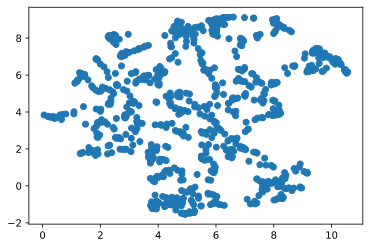

In [29]:
plt.scatter(emb[:, 0], emb[:, 1]);

In [30]:
# DBSCAN

from sklearn.cluster import DBSCAN

In [31]:
dbscan=DBSCAN(eps=0.8, min_samples=7)

In [32]:
dbscan.fit(emb)

DBSCAN(eps=0.8, min_samples=7)

In [33]:
dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [34]:
# HDBSCAN

from hdbscan import HDBSCAN

In [35]:
hdbscan=HDBSCAN(min_cluster_size=5)

clusters=hdbscan.fit_predict(emb)

In [36]:
np.unique(clusters)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=int64)

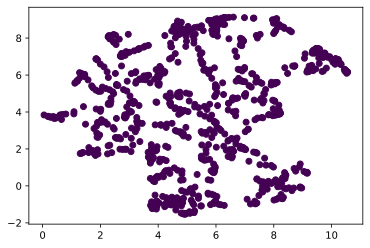

In [37]:
plt.scatter(emb[:, 0], emb[:, 1], c=dbscan.fit_predict(emb));

In [38]:
def get_titles_from_cluster(c):
    return pd.Series(bag_songs)[clusters==c]

In [39]:
get_titles_from_cluster(0)

1                        Et s'il fallait le faire
10                                          O mie
25                                Probka (Пробка)
82                                   In the Disco
206                                      Illusion
214                                       Firefly
265                                Watch My Dance
334                                       Amazing
356                               Hunter of Stars
364                              I Want Your Love
548                                        Prison
550                                     Attention
559                                          Amen
616                            Chacun pense à soi
628    Dancing Lasha Tumbai (Данцінґ Лаша Тумбай)
652                                  La mia città
654                         Jugarem a estimar-nos
718                                      Stefania
722                               Cipela (Ципела)
750                                     Moustache


In [40]:
def get_df_from_cluster(c):
    return tfidf_df[clusters==c]

In [44]:
get_df_from_cluster(3).describe()

away  baby     break    bridge    chorus      come       day  \
count  8.000000   8.0  8.000000  8.000000  8.000000  8.000000  8.000000   
mean   0.041015   0.0  0.035783  0.022355  0.059673  0.014959  0.035977   
std    0.063049   0.0  0.052155  0.047151  0.125861  0.028618  0.053152   
min    0.000000   0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
25%    0.000000   0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
50%    0.000000   0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
75%    0.070033   0.0  0.071576  0.011795  0.031484  0.011595  0.069460   
max    0.159408   0.0  0.124981  0.131660  0.351446  0.073294  0.120484   

       dream       eye      fall  ...     think      time       try  turn  \
count    8.0  8.000000  8.000000  ...  8.000000  8.000000  8.000000   8.0   
mean     0.0  0.022959  0.099527  ...  0.017731  0.032708  0.029697   0.0   
std      0.0  0.044532  0.137447  ...  0.050151  0.075592  0.063431   0.0   
min      0.0  0.000000  0.000000  ...  0.000000  0.000000  0.000000   0.0   
25%      0.0  0.000000  0.000000  ...  0.000000  0.000000  0.000000   0.0   
50%      0.0  0.000000  0.036964  ...  0.000000  0.000000  0.000000   0.0   
75%      0.0  0.016759  0.154096  ...  0.000000  0.011552  0.014909   0.0   
max      0.0  0.116641  0.382473  ...  0.141848  0.215458  0.177941   0.0   

          verse  wan      want       way     world  yeah  
count  8.000000  8.0  8.000000  8.000000  8.000000   8.0  
mean   0.081630  0.0  0.006689  0.039031  0.028980   0.0  
std    0.131005  0.0  0.018921  0.076047  0.061898   0.0  
min    0.000000  0.0  0.000000  0.000000  0.000000   0.0  
25%    0.000000  0.0  0.000000  0.000000  0.000000   0.0  
50%    0.000000  0.0  0.000000  0.000000  0.000000   0.0  
75%    0.122342  0.0  0.000000  0.027962  0.014549   0.0  
max    0.332689  0.0  0.053515  0.200398  0.173641   0.0  

[8 rows x 43 columns]

In [45]:
get_df_from_cluster(3).describe().T

count      mean       std       min       25%       50%       75%  \
away      8.0  0.041015  0.063049  0.000000  0.000000  0.000000  0.070033   
baby      8.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
break     8.0  0.035783  0.052155  0.000000  0.000000  0.000000  0.071576   
bridge    8.0  0.022355  0.047151  0.000000  0.000000  0.000000  0.011795   
chorus    8.0  0.059673  0.125861  0.000000  0.000000  0.000000  0.031484   
come      8.0  0.014959  0.028618  0.000000  0.000000  0.000000  0.011595   
day       8.0  0.035977  0.053152  0.000000  0.000000  0.000000  0.069460   
dream     8.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
eye       8.0  0.022959  0.044532  0.000000  0.000000  0.000000  0.016759   
fall      8.0  0.099527  0.137447  0.000000  0.000000  0.036964  0.154096   
feel      8.0  0.154203  0.142845  0.000000  0.033781  0.126835  0.274225   
find      8.0  0.063086  0.116038  0.000000  0.000000  0.000000  0.072578   
gon       8.0  0.005866  0.016593  0.000000  0.000000  0.000000  0.000000   
heart     8.0  0.071675  0.088915  0.000000  0.000000  0.057280  0.092916   
hold      8.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
know      8.0  0.129971  0.114223  0.000000  0.037324  0.103556  0.209701   
leave     8.0  0.013397  0.025230  0.000000  0.000000  0.000000  0.011242   
let       8.0  0.045128  0.078700  0.000000  0.000000  0.000000  0.058372   
life      8.0  0.048712  0.070691  0.000000  0.000000  0.000000  0.099529   
light     8.0  0.035547  0.084449  0.000000  0.000000  0.000000  0.010802   
like      8.0  0.100532  0.203103  0.000000  0.000000  0.000000  0.099625   
live      8.0  0.007795  0.022046  0.000000  0.000000  0.000000  0.000000   
look      8.0  0.055121  0.116501  0.000000  0.000000  0.000000  0.028849   
lose      8.0  0.076412  0.216126  0.000000  0.000000  0.000000  0.000000   
love      8.0  0.545227  0.092801  0.452377  0.478797  0.534547  0.575245   
mind      8.0  0.009690  0.027408  0.000000  0.000000  0.000000  0.000000   
na        8.0  0.004578  0.012948  0.000000  0.000000  0.000000  0.000000   
need      8.0  0.012112  0.034258  0.000000  0.000000  0.000000  0.000000   
night     8.0  0.034709  0.051279  0.000000  0.000000  0.000000  0.067012   
oh        8.0  0.574295  0.104062  0.398734  0.506759  0.585825  0.625326   
right     8.0  0.018074  0.051121  0.000000  0.000000  0.000000  0.000000   
sky       8.0  0.013318  0.037668  0.000000  0.000000  0.000000  0.000000   
tell      8.0  0.048758  0.090800  0.000000  0.000000  0.000000  0.044228   
think     8.0  0.017731  0.050151  0.000000  0.000000  0.000000  0.000000   
time      8.0  0.032708  0.075592  0.000000  0.000000  0.000000  0.011552   
try       8.0  0.029697  0.063431  0.000000  0.000000  0.000000  0.014909   
turn      8.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
verse     8.0  0.081630  0.131005  0.000000  0.000000  0.000000  0.122342   
wan       8.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
want      8.0  0.006689  0.018921  0.000000  0.000000  0.000000  0.000000   
way       8.0  0.039031  0.076047  0.000000  0.000000  0.000000  0.027962   
world     8.0  0.028980  0.061898  0.000000  0.000000  0.000000  0.014549   
yeah      8.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

             max  
away    0.159408  
baby    0.000000  
break   0.124981  
bridge  0.131660  
chorus  0.351446  
come    0.073294  
day     0.120484  
dream   0.000000  
eye     0.116641  
fall    0.382473  
feel    0.360225  
find    0.330514  
gon     0.046932  
heart   0.266316  
hold    0.000000  
know    0.323604  
leave   0.062205  
let     0.220611  
life    0.157430  
light   0.241169  
like    0.587891  
live    0.062356  
look    0.325572  
lose    0.611298  
love    0.736021  
mind    0.077521  
na      0.036622  
need    0.096896  
night   0.116237  
oh      0.712717  
right   0.144593  
sky     0.1

In [90]:
top_words=get_df_from_cluster(42).T.sum(axis=1).sort_values(ascending=False)

top_words.head() # NO PARECE HABER NINGÚN GRUPO CLARAMENTE DIFERENCIADO

hold     4.904874
time     1.343052
mind     1.182909
right    0.778248
lose     0.647434
dtype: float64

In [92]:
from collections import Counter

Counter(bag_letras)

Counter({'\nPure and white, her skin is so inviting\nLike a new, unbeaten snow\nEyes of blue, so beautiful and blinding\nLike the sky over Moscow\nI’m a Macedonian, she’s a Russian girl\nI’m welcomed like the music, music\nMusic which I don’t understand\nNeither “kakalin” nor “kamaja”\nI just don’t understand any of it\nNeither “kakalin” nor “kamaja”\nI’ll learn it all for her\nNeither “kakalin” nor “kamaja”\nI just don’t understand any of it\nNeither “kakalin” nor “kamaja”\nI’ll learn it all for her\nI’m a Macedonian, she’s a Russian girl\nGive her a vodka, and me a rakia\nMusic, music which I don’t understand\nNeither “kakalin” nor “kamaja”\nI just don’t understand any of it\nNeither “kakalin” nor “kamaja”\nI’ll learn it all for her\nLаlа, lаlа, lаlа, lаlа…\nNeither “kakalin” nor “kamaja”\nI just don’t understand any of it\nNeither “kakalin” nor “kamaja”\nI’ll learn it all for her\nNeither “kakalin” nor “kamaja”\nI just don’t understand any of it\nNeither “kakalin” nor “kamaja”\nI’ll

In [103]:
dict(Counter(spacy_tokenizer(df_letras['Lyrics translation'][44])))

{'stop': 9,
 'right': 3,
 'girl': 1,
 'shake': 20,
 'surround': 1,
 'sharp': 1,
 'eye': 1,
 'dancing': 1,
 'fever': 1,
 'forget': 1,
 'word': 1,
 'advice': 1,
 'close': 1,
 'life': 9,
 'live': 3,
 'smile': 2,
 'share': 3,
 'gon': 3,
 'na': 3,
 'let': 8,
 'till': 7,
 'know': 8,
 'reach': 8,
 'tonight': 7,
 'surrender': 5,
 'beat': 5,
 'heat': 5,
 'night': 3,
 'arm': 3,
 'blind': 1,
 'scent': 1,
 'love': 1,
 'sailing': 1,
 'feel': 1,
 'mind': 1,
 'high': 1,
 'dream': 1}

In [127]:
dict_prueba = {k: v for k, v in sorted(dict(Counter(spacy_tokenizer(df_letras['Lyrics translation'][802]))).items(), key=lambda item: item[1], reverse=True)}

In [130]:
list(dict_prueba)[:10]

['le',
 'witchcraft',
 'look',
 'soul',
 'love',
 'cure',
 'like',
 'dominate',
 'body',
 'ley']

In [136]:
list(dict_prueba.values())[:10]

[11, 8, 8, 7, 7, 7, 5, 4, 4, 4]

In [126]:
df_letras[df_letras['Lyrics translation'].index == 802]

Unnamed: 0 Country      Artist      Song Language  Eurovision_Number  \
802         802   Spain  Son de Sol  Brujería  Spanish                 50   

     Year Host_Country Host_City  \
802  2005      Ukraine      Kiev   

                                                Lyrics  \
802  En cada esquina de mi casa\nEn cada cosa que m...   

                                    Lyrics translation  Lyrics_Long  \
802  Witchcraft\nIn every corner of my home\nIn eve...         2060   

     Lyrics_words     key  Vecinos_Participantes  
802           125  522005                      3

In [141]:
lista_topwords = []
lista_counter = []

for i,pais in tqdm(enumerate(df_letras['Country'])):
    dict_palabras = {k: v for k, v in sorted(dict(Counter(spacy_tokenizer(df_letras['Lyrics translation'][i]))).items(), 
                                           key=lambda item: item[1], reverse=True)}
    top10 = list(dict_palabras)[:10]
    count10 = list(dict_palabras.values())[:10]
    
    lista_topwords.append(top10)
    lista_counter.append(count10)
    
df_letras['top10_wrods'] = lista_topwords
df_letras['cuenta_top10words'] = lista_counter

df_letras

815it [50:08,  3.69s/it]


Unnamed: 0          Country           Artist  \
0             0  North Macedonia  Vlatko Ilievski   
1             1           France    Patricia Kaas   
2             2            Spain             Rosa   
3             3       Montenegro          Who See   
4             4  North Macedonia     Karolina (2)   
..          ...              ...              ...   
810         810          Albania    Jonida Maliqi   
811         811  North Macedonia    Esma & Lozano   
812         812           France             Amir   
813         813           Serbia   Nevena Božović   
814         814           Latvia     Bonaparti.lv   

                                        Song                      Language  \
0                          Rusinka (Русинкa)  Macedonian/English (Russian)   
1                   Et s'il fallait le faire                        French   
2              Europe's Living a Celebration       Spanish (title English)   
3                          Igranka (Игранка)                   Montenegrin   
4                    Mojot svet (Мојот свет)            Macedonian/English   
..                                       ...                           ...   
810                             Ktheju tokës                      Albanian   
811  Pred da se razdeni (Пред да се раздени)             Macedonian/Romani   
812                             J'ai cherché                French/English   
813                            Kruna (Круна)             Serbian (English)   
814                             Questa notte                       Italian   

     Eurovision_Number  Year Host_Country   Host_City  \
0                   56  2011      Germany  Düsseldorf   
1                   54  2009       Russia      Moscow   
2                   47  2002      Estonia     Tallinn   
3                   58  2013       Sweden       Malmö   
4                   52  2007      Finland    Helsinki   
..                 ...   ...          ...         ...   
810                 64  2019       Israel    Tel Aviv   
811                 58  2013       Sweden       Malmö   
812                 61  2016       Sweden   Stockholm   
813                 64  2019       Israel    Tel Aviv   
814                 52  2007      Finland    Helsinki   

                                                Lyrics  \
0    Кожа бела, нежна како снегот\nНов, неизгазен\n...   
1    S'il fallait le faire\nJ'arrêterais la Terre\n...   
2    (Celebration, celebration)\n\n(Celebration, ce...   
3    [Intro: Nina Žižić]\nVodim te na igranku, na-n...   
4    Najna najna, nanana najna\nNajna najna, nanana...   
..                                                 ...   
810  [Verse 1]\nTi këndon edhe qan\nNë duar lotët m...   
811  [Verse 1: Lozano]\nNe e ko porano\nDobrite vre...   
812  [Couplet 1]\nYou, you\nJ’ai cherché un sens à ...   
813  [Verse 1]\nPogled mili\nJedini dušu smiri\nO v...   
814  Il sorriso dolce da bambina che mi canta\nE mi...   

                                    Lyrics translation  Lyrics_Long  \
0    \nPure and white, her skin is so inviting\nLik...          789   
1    & If I had to do it\nI would stop the earth\nI...         1208   
2    (Celebration, celebration) (Celebration, celeb...         1355   
3    (I'm taking you to the dance, to-to-to-to the ...         2058   
4    [Intro]\nPlay this record as frequently as pos...          896   
..                                                 ...          ...   
810  You sing and cry,\nIn hands, tears are gathere...          690   
811  You will be a good housewife to someone else,\...          932   
812  You-ou-ou-ou-ou\nYou-ou-ou-ou-ou I was looking...         1727   
813  Your dear eyes\nAre the only thing that calms ...          544   
814  Your smile of a little girl is what enchants m...          851   

     Lyrics_words     key  Vecinos_Participantes  \
0              44  412011                      4   
1             122  262009                      5   
2             102  522002               

In [154]:
get_titles_from_cluster(10)

103                       In My Dreams
190                    Peace Will Come
307    L'amore è femmina (Out of Love)
632      Ovo je Balkan (Oво je Балкан)
673                Party for Everybody
736                Water (Voda) (Вода)
737     Samo shampioni (Само шампиони)
762                        Cvet z juga
769                   Hatrið mun sigra
dtype: object

In [153]:
top_words=get_df_from_cluster(10).T.sum(axis=1).sort_values(ascending=False)
top_words.head(10)

come     7.997605
dream    1.050507
love     0.820532
life     0.751393
world    0.544383
time     0.491619
let      0.246935
wan      0.223161
like     0.222179
na       0.177296
dtype: float64

In [159]:
palabras_canc = list(map(spacy_tokenizer, tqdm(df_letras['Lyrics translation'])))


  0%|          | 0/815 [05:03<?, ?it/s]3.75s/it]

 38%|███▊      | 309/815 [19:38<29:40,  3.52s/it]


 76%|███████▌  | 617/815 [40:56<14:48,  4.48s/it]


100%|██████████| 815/815 [54:53<00:00,  4.04s/it]


In [168]:
df = pd.DataFrame(palabras_canc)
df

0            1            2            3            4    \
0           pure        white         skin       invite         like   
1           stop        earth       switch        light         stay   
2    celebration  celebration  celebration  celebration  celebration   
3          dance        dance           ce        dance        dance   
4          intro         play       record   frequently     possible   
..           ...          ...          ...          ...          ...   
810         sing          cry         hand         tear       gather   
811         good    housewife      eternal        maker       silken   
812         look        sense    existence         lose    innocence   
813         dear          eye        thing         calm           oh   
814        smile       little         girl      enchant        shake   

             5            6            7            8            9    ...  \
0            new     unbeaten         snow          eye         blue  ...   
1         asleep      inverse         wind         blow     lifeless  ...   
2    celebration  celebration  celebration  celebration  celebration  ...   
3          dance        dance           ce        dance        dance  ...   
4           easy         yeah         play       record          day  ...   
..           ...          ...          ...          ...          ...  ...   
810         hold          day         live          die     nostalgy  ...   
811        linen     somebody         fall         life        right  ...   
812       finish        heart      defense         look         love  ...   
813         love        night         long          sad         hand  ...   
814        heart          sea          big        green          eye  ...   

      270   271   272   273   274   275   276   277   278   279  
0    None  None  None  None  None  None  None  None  None  None  
1    None  None  None  None  None  None  None  None  None  None  
2    None  None  None  None  None  None  None  None  None  None  
3    None  None  None  None  None  None  None  None  None  None  
4    None  None  None  None  None  None  None  None  None  None  
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
810  None  None  None  None  None  None  None  None  None  None  
811  None  None  None  None  None  None  None  None  None  None  
812  None  None  None  None  None  None  None  None  None  None  
813  None  None  None  None  None  None  None  None  None  None  
814  None  None  None  None  None  None  None  None  None  None  

[815 rows x 280 columns]

In [4]:
len(bag_songs)

NameError: name 'bag_songs' is not defined

In [180]:
len(palabras_canc)

815

In [199]:
palabras_canc[814]

['smile',
 'little',
 'girl',
 'enchant',
 'shake',
 'heart',
 'sea',
 'big',
 'green',
 'eye',
 'feel',
 'love',
 'dark',
 'sun',
 'want',
 'stay',
 'live',
 'night',
 'immensity',
 'love',
 'end',
 'future',
 'night',
 'forever',
 'scent',
 'skin',
 'encourage',
 'discover',
 'know',
 'star',
 'moon',
 'sing',
 'love',
 'lose',
 'hope',
 'hand',
 'want',
 'stay',
 'live',
 'night',
 'immensity',
 'love',
 'end',
 'future',
 'reason',
 'know',
 'night',
 'immensity',
 'love',
 'end',
 'future',
 'night',
 'forever',
 'night',
 'forever']

In [181]:
dict_words = dict(zip(bag_songs, palabras_canc))

In [198]:
bag_songs[700]

'Fulenn'

In [197]:
list(dict_words.keys())[700]

'Vjerujem u ljubav'

In [182]:
pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in dict_words.items() ]))

Rusinka (Русинкa) Et s'il fallait le faire Europe's Living a Celebration  \
0                pure                     stop                   celebration   
1               white                    earth                   celebration   
2                skin                   switch                   celebration   
3              invite                    light                   celebration   
4                like                     stay                   celebration   
..                ...                      ...                           ...   
275               NaN                      NaN                           NaN   
276               NaN                      NaN                           NaN   
277               NaN                      NaN                           NaN   
278               NaN                      NaN                           NaN   
279               NaN                      NaN                           NaN   

    Igranka (Игранка) Mojot svet (Мојот свет) Contigo hasta el final  \
0               dance                   intro                   blue   
1               dance                    play                    sky   
2                  ce                  record                    win   
3               dance              frequently                  storm   
4               dance                possible               threaten   
..                ...                     ...                    ...   
275               NaN                     NaN                    NaN   
276               NaN                     NaN                    NaN   
277               NaN                     NaN                    NaN   
278               NaN                     NaN                    NaN   
279               NaN                     NaN                    NaN   

          Dime Samo ljubezen   Mall Jas ja imam silata (Јас ја имам силата)  \
0         calm         heart   long                                     new   
1          sea           big   wait                                     day   
2    afternoon         world  sweet                                    wake   
3         play         smile  fiery                                    rain   
4         sand       sparkle   step                                    come   
..         ...           ...    ...                                     ...   
275        NaN           NaN    NaN                                     NaN   
276        NaN           NaN    NaN                                     NaN   
277        NaN           NaN    NaN                                     NaN   
278        NaN           NaN    NaN                                     NaN   
279        NaN           NaN    NaN                                     NaN   

     ... Nešto što kje ostane (Нешто што ќе остане) Echo (You and I)  \
0    ...                                       yeah             hear   
1    ...                                       yeah             echo   
2    ...                                        god             step   
3    ...                                   sweetest             sync   
4    ...                                      thing         marching   
..   ...                                        ...              ...   
275  ...                                        NaN              NaN   
276  ...                                        NaN              NaN   
277  ...                                        NaN              NaN   
278  ...                                        NaN              NaN   
279  ...                                        NaN              NaN   

    L'enfer et moi La forza  Origo Ktheju tokës  \
0            knock     know   need         sing   
1            begin    night  close          cry   
2             love     star    eye         hand   
3          leather    clear   need         tear   
4              tie      way   know       gather   
..             ...      ...    ...          ...   
275    

In [201]:
print(palabras_canc)

[['pure', 'white', 'skin', 'invite', 'like', 'new', 'unbeaten', 'snow', 'eye', 'blue', 'beautiful', 'blind', 'like', 'sky', 'moscow', 'macedonian', 'russian', 'girl', 'welcome', 'like', 'music', 'music', 'music', 'understand', 'kakalin', 'kamaja', 'understand', 'kakalin', 'kamaja', 'learn', 'kakalin', 'kamaja', 'understand', 'kakalin', 'kamaja', 'learn', 'macedonian', 'russian', 'girl', 'vodka', 'rakia', 'music', 'music', 'understand', 'kakalin', 'kamaja', 'understand', 'kakalin', 'kamaja', 'learn', 'kakalin', 'kamaja', 'understand', 'kakalin', 'kamaja', 'learn', 'kakalin', 'kamaja', 'understand', 'kakalin', 'kamaja', 'learn', 'learn'], ['stop', 'earth', 'switch', 'light', 'stay', 'asleep', 'inverse', 'wind', 'blow', 'lifeless', 'desert', 'find', 'sea', 'stop', 'rain', 'rest', 'live', 'listen', 'night', 'speak', 'love', 'speak', 'watch', 'deep', 'inside', 'eye', 'great', 'great', 'fire', 'hand', 'stick', 'skin', 'want', 'day', 'fly', 'away', 'follow', 'winter', 'away', 'big', 'blow', '

In [203]:
with open('lista_palabras.txt', 'w') as f:
    for line in palabras_canc:
        f.write(f"{line}\n")

In [206]:
cancion_orde = list(df_letras['Song'])

In [218]:
palabras_canc[440]

['verse',
 'standing',
 'mirror',
 'lane',
 'wonder',
 'day',
 'gravity',
 'hold',
 'dream',
 'happen',
 'come',
 'fall',
 'fall',
 'hard',
 'start',
 'believe',
 'pre',
 'daydream',
 'amazed',
 'thorn',
 'jean',
 'deep',
 'high',
 'extreme',
 'fantasy',
 'like',
 'alchemy',
 'oh',
 'feel',
 'ready',
 'chorus',
 'skeleton',
 'trick',
 'bad',
 'boy',
 'lung',
 'million',
 'talk',
 'cheap',
 'speak',
 'tongue',
 'bad',
 'boy',
 'drum',
 'drum',
 'drum',
 'bring',
 'gun',
 'drum',
 'drum',
 'drum',
 'bring',
 'gun',
 'bad',
 'boy',
 'curse',
 'fuss',
 'fight',
 'win',
 'ton',
 'bad',
 'boy',
 'verse',
 'world',
 'spin',
 'fast',
 'minute',
 'longing',
 'save',
 'bitter',
 'sweet',
 'sensation',
 'hold',
 'pre',
 'stick',
 'daydream',
 'surround',
 'thorn',
 'jean',
 'deep',
 'high',
 'extreme',
 'hook',
 'fantasy',
 'like',
 'alchemy',
 'ready',
 'chorus',
 'skeleton',
 'trick',
 'bad',
 'boy',
 'lung',
 'million',
 'talk',
 'cheap',
 'speak',
 'tongue',
 'bad',
 'boy',
 'drum',
 'drum',


In [217]:
cancion_orde[440]

'Skeletons'

In [209]:
with open('canciones_ordenadas.txt', 'w', encoding='utf-8') as f:
    for line in cancion_orde:
        f.write(f"{line}\n")

In [227]:
len(cancion_orde), len(palabras_canc)

(815, 815)

In [229]:
dict_canc_palab = dict(zip(cancion_orde, palabras_canc))

In [230]:
len(dict_canc_palab)

789

In [235]:
len(list(dict_canc_palab.keys())) # Ojo, canciones que se llaman igual! Clave debe ser única!

789

In [237]:
cancion_orde

['Rusinka (Русинкa)',
 "Et s'il fallait le faire",
 "Europe's Living a Celebration",
 'Igranka (Игранка)',
 'Mojot svet (Мојот свет)',
 'Contigo hasta el final',
 'Dime',
 'Samo ljubezen',
 'Mall',
 'Jas ja imam silata (Јас ја имам силата)',
 'O mie',
 'Rak bishvilo (רק בשבילו)',
 'Milim (מילים)',
 'Verjamem',
 'Ding Dong (דינג דונג)',
 "Loin d'ici",
 "Il pleut de l'or",
 'Light a Candle (Nadlik beyakhad ner) (נדליק ביחד נר)',
 "Occidentali's Karma",
 'Zemrën e lamë peng',
 'När jag blundar',
 "'Ajde, kroči ('Ајде, крочи)",
 'Dança comigo (Vem ser feliz)',
 'I Love You Mi Vida',
 'Il était temps',
 'Probka (Пробка)',
 'Baila el chiki chiki',
 'For You (Sheni gulistvis) (შენი გულისთვის)',
 'Qami (Քամի)',
 "Ne ver', ne boysya (Не верь, не бойся)",
 'Do It for Your Lover',
 'De Diepte',
 'Fai Rumore',
 'Loco Loco',
 'Pokušaj',
 'Lejla',
 'Rijeka bez imena (Ријека без имена)',
 'Gimme',
 'Come Back',
 'Say a Word',
 'S.A.G.A.P.O.',
 'Everything I Want',
 'Northern Girl',
 'Runaway',
 'Neve

In [241]:
canc_cant = []
for i,e in enumerate(df_letras['Song']):
    canc_cant.append(df_letras['Song'][i] + " " + df_letras['Artist'][i])
    
canc_cant

['Rusinka (Русинкa) Vlatko Ilievski',
 "Et s'il fallait le faire Patricia Kaas",
 "Europe's Living a Celebration Rosa",
 'Igranka (Игранка) Who See',
 'Mojot svet (Мојот свет) Karolina (2)',
 'Contigo hasta el final ESDM',
 'Dime Beth',
 'Samo ljubezen Sestre',
 'Mall Eugent Bushpepa',
 'Jas ja imam silata (Јас ја имам силата) Gjoko Taneski',
 'O mie Aliona Moon',
 'Rak bishvilo (רק בשבילו) Moran Mazor',
 'Milim (מילים) Harel Skaat',
 'Verjamem Eva Boto',
 'Ding Dong (דינג דונג) Dana International (2)',
 "Loin d'ici Zoë",
 "Il pleut de l'or Michael von der Heide",
 'Light a Candle (Nadlik beyakhad ner) (נדליק ביחד נר) Sarit Hadad',
 "Occidentali's Karma Francesco Gabbani",
 'Zemrën e lamë peng Olta Boka',
 'När jag blundar Pernilla',
 "'Ajde, kroči ('Ајде, крочи) Stevan Faddy",
 'Dança comigo (Vem ser feliz) Sabrina',
 "I Love You Mi Vida D'Nash",
 'Il était temps Virginie Pouchain',
 'Probka (Пробка) Intars Busulis',
 'Baila el chiki chiki Rodolfo Chikilicuatre',
 'For You (Sheni guli

In [242]:
dict_canc_palab = dict(zip(canc_cant, palabras_canc))

In [243]:
len(dict_canc_palab)

815

In [250]:
print(dict_canc_palab)

{'Rusinka (Русинкa) Vlatko Ilievski': ['pure', 'white', 'skin', 'invite', 'like', 'new', 'unbeaten', 'snow', 'eye', 'blue', 'beautiful', 'blind', 'like', 'sky', 'moscow', 'macedonian', 'russian', 'girl', 'welcome', 'like', 'music', 'music', 'music', 'understand', 'kakalin', 'kamaja', 'understand', 'kakalin', 'kamaja', 'learn', 'kakalin', 'kamaja', 'understand', 'kakalin', 'kamaja', 'learn', 'macedonian', 'russian', 'girl', 'vodka', 'rakia', 'music', 'music', 'understand', 'kakalin', 'kamaja', 'understand', 'kakalin', 'kamaja', 'learn', 'kakalin', 'kamaja', 'understand', 'kakalin', 'kamaja', 'learn', 'kakalin', 'kamaja', 'understand', 'kakalin', 'kamaja', 'learn', 'learn'], "Et s'il fallait le faire Patricia Kaas": ['stop', 'earth', 'switch', 'light', 'stay', 'asleep', 'inverse', 'wind', 'blow', 'lifeless', 'desert', 'find', 'sea', 'stop', 'rain', 'rest', 'live', 'listen', 'night', 'speak', 'love', 'speak', 'watch', 'deep', 'inside', 'eye', 'great', 'great', 'fire', 'hand', 'stick', 'sk

In [253]:
palabras_canc

UsageError: Line magic function `%%time` not found.


In [254]:
import itertools
all_words = list(itertools.chain(*palabras_canc))

In [260]:
from collections import Counter

most_repeated_words = dict(Counter(all_words))
most_repeated_words

{'pure': 9,
 'white': 52,
 'skin': 49,
 'invite': 7,
 'like': 1163,
 'new': 136,
 'unbeaten': 1,
 'snow': 19,
 'eye': 325,
 'blue': 82,
 'beautiful': 116,
 'blind': 29,
 'sky': 215,
 'moscow': 1,
 'macedonian': 2,
 'russian': 3,
 'girl': 229,
 'welcome': 12,
 'music': 87,
 'understand': 76,
 'kakalin': 10,
 'kamaja': 10,
 'learn': 75,
 'vodka': 15,
 'rakia': 1,
 'stop': 259,
 'earth': 46,
 'switch': 1,
 'light': 441,
 'stay': 261,
 'asleep': 12,
 'inverse': 1,
 'wind': 98,
 'blow': 46,
 'lifeless': 1,
 'desert': 13,
 'find': 388,
 'sea': 111,
 'rain': 145,
 'rest': 32,
 'live': 317,
 'listen': 93,
 'night': 526,
 'speak': 50,
 'love': 2197,
 'watch': 56,
 'deep': 125,
 'inside': 203,
 'great': 35,
 'fire': 223,
 'hand': 265,
 'stick': 32,
 'want': 709,
 'day': 461,
 'fly': 244,
 'away': 492,
 'follow': 99,
 'winter': 23,
 'big': 98,
 'spring': 28,
 'long': 206,
 'clear': 41,
 'morning': 74,
 'time': 780,
 'word': 190,
 'yesterday': 34,
 'lose': 317,
 'hair': 19,
 'wrong': 114,
 'believ

In [261]:
dict_prueba = {k: v for k, v in sorted(most_repeated_words.items(), key=lambda item: item[1], reverse=True)}
dict_prueba

{'love': 2197,
 'oh': 1423,
 'know': 1251,
 'na': 1201,
 'like': 1163,
 'let': 1079,
 'come': 1039,
 'feel': 931,
 'heart': 792,
 'time': 780,
 'want': 709,
 'life': 665,
 'yeah': 582,
 'night': 526,
 'way': 510,
 'chorus': 509,
 'baby': 507,
 'wan': 505,
 'away': 492,
 'gon': 487,
 'dance': 480,
 'tell': 472,
 'day': 461,
 'light': 441,
 'dream': 440,
 'la': 418,
 'look': 406,
 'world': 403,
 'find': 388,
 'verse': 387,
 'hey': 372,
 'fall': 368,
 'try': 365,
 'need': 362,
 'break': 346,
 'right': 344,
 'hold': 342,
 'eye': 325,
 'leave': 321,
 'live': 317,
 'lose': 317,
 'run': 316,
 'think': 303,
 'tonight': 303,
 'believe': 281,
 'sing': 277,
 'hand': 265,
 'stay': 261,
 'stop': 259,
 'mind': 257,
 'high': 253,
 'wait': 253,
 'lie': 245,
 'fly': 244,
 'cry': 244,
 'thing': 236,
 'hear': 232,
 'girl': 229,
 'forever': 227,
 'fire': 223,
 'turn': 221,
 'shake': 219,
 'walk': 218,
 'sky': 215,
 'shine': 212,
 'pre': 212,
 'ooh': 211,
 'soul': 208,
 'long': 206,
 'cause': 205,
 'inside

In [264]:
# !pip install langdetect

  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=acbcd5f48113429cb0302a5e69c0ed8fd6dd71870d837b82a4f310c2e7747c9d
  Stored in directory: c:\users\usuario\appdata\local\pip\cache\wheels\d1\c1\d9\7e068de779d863bc8f8fc9467d85e25cfe47fa5051fff1a1bb
Successfully built langdetect


In [265]:
# !pip install wordcloud

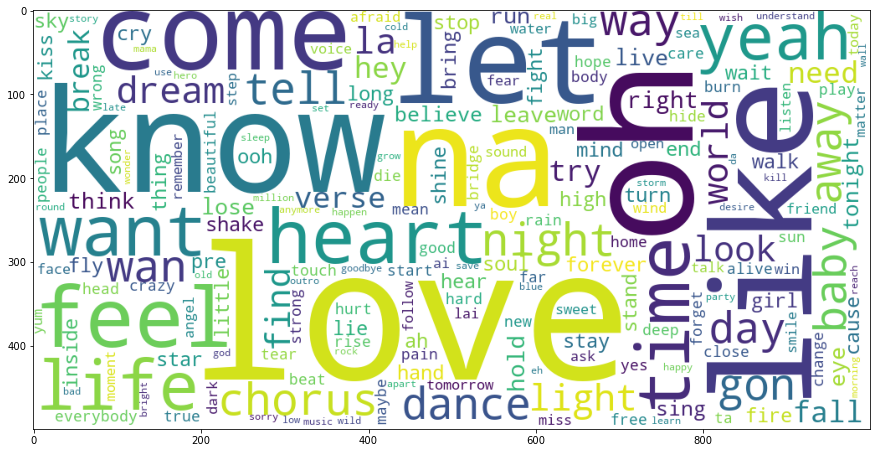

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
 
wordcloud = WordCloud(width = 1000, height = 500, background_color='white').generate_from_frequencies(dict_prueba)
 
plt.figure(figsize=(15,8))
plt.imshow(wordcloud);

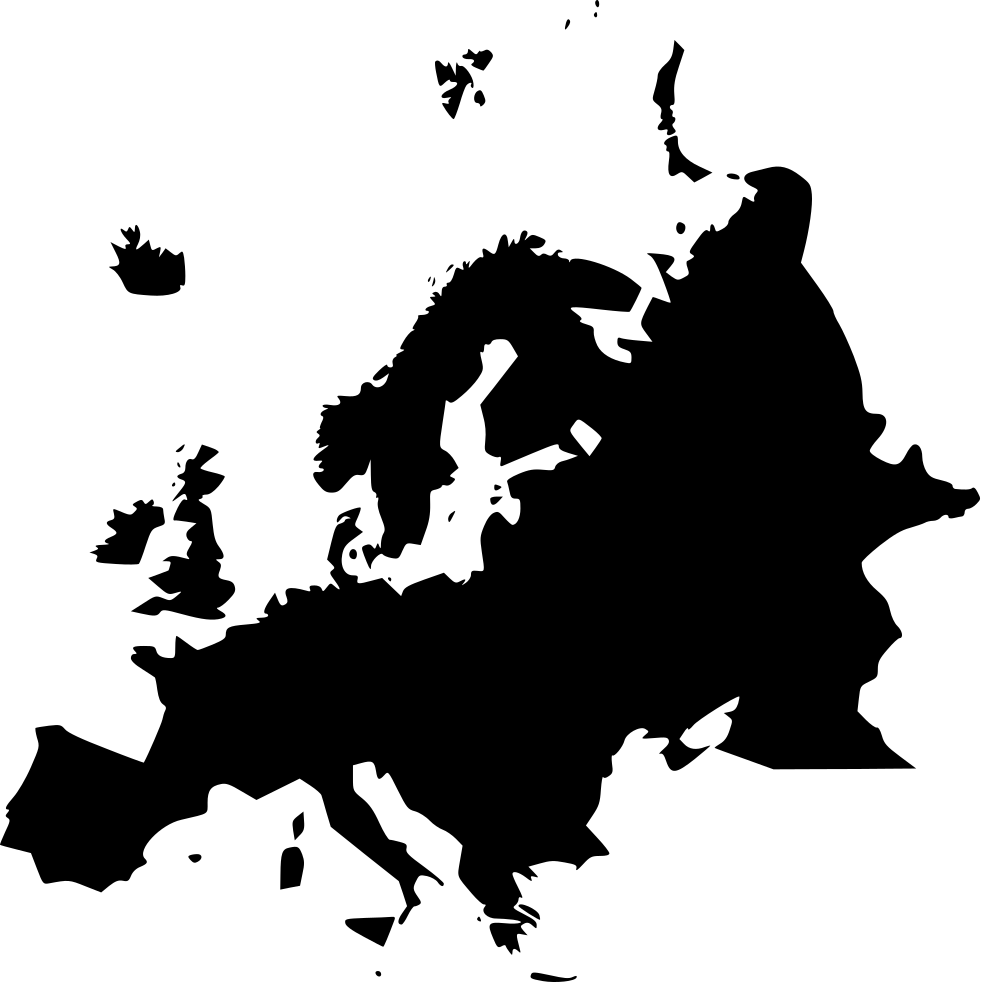

In [269]:
# imagen con mascara
from PIL import Image

Image.open('./europe_silhouette.png')

In [277]:
UE_mask=np.array(Image.open('./europe_silhouette.png'))

UE_mask.shape

(982, 981, 4)

In [ ]:
# !pip install opencv-python

In [44]:
import cv2

img = cv2.imread('./europe_silhouette.png')

gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

cv2.destroyWindow(img)

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:1261: error: (-27:Null pointer) NULL window: './europe_silhouette.png' in function 'cvDestroyWindow'


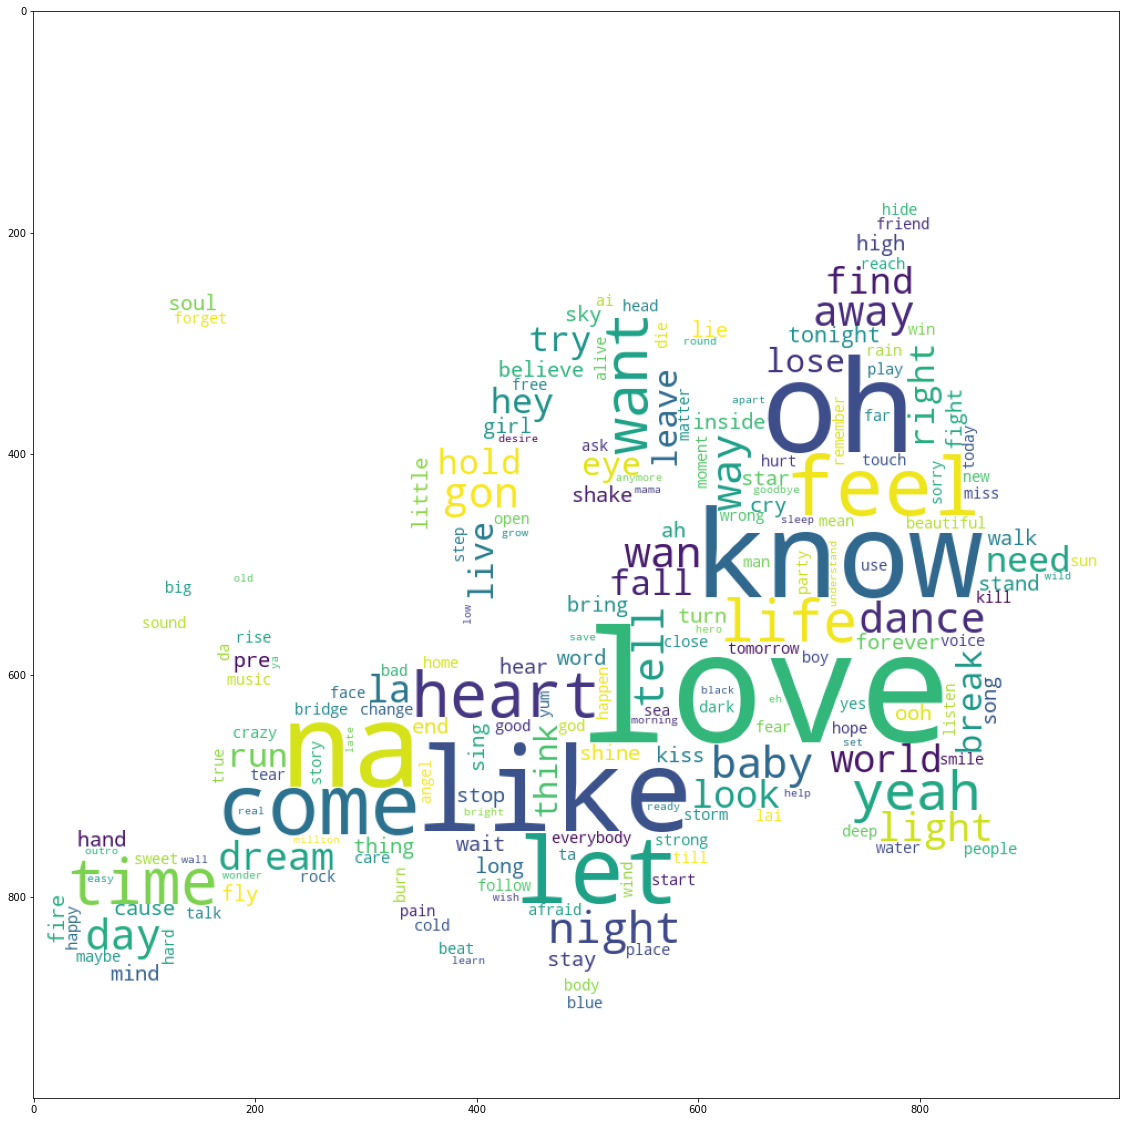

In [36]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width = 1000, height = 500, background_color='white', mask=gray_img).generate_from_frequencies(dict_prueba)
 
plt.figure(figsize=(40,20))
plt.imshow(wordcloud);

In [37]:
wordcloud.to_file('palabras_UE(2).png')

In [2]:
dict_prueba = {'love': 2197,
 'oh': 1423,
 'know': 1251,
 'na': 1201,
 'like': 1163,
 'let': 1079,
 'come': 1039,
 'feel': 931,
 'heart': 792,
 'time': 780,
 'want': 709,
 'life': 665,
 'yeah': 582,
 'night': 526,
 'way': 510,
 'baby': 507,
 'wan': 505,
 'away': 492,
 'gon': 487,
 'dance': 480,
 'tell': 472,
 'day': 461,
 'light': 441,
 'dream': 440,
 'la': 418,
 'look': 406,
 'world': 403,
 'find': 388,
 'hey': 372,
 'fall': 368,
 'try': 365,
 'need': 362,
 'break': 346,
 'right': 344,
 'hold': 342,
 'eye': 325,
 'leave': 321,
 'live': 317,
 'lose': 317,
 'run': 316,
 'think': 303,
 'tonight': 303,
 'believe': 281,
 'sing': 277,
 'hand': 265,
 'stay': 261,
 'stop': 259,
 'mind': 257,
 'high': 253,
 'wait': 253,
 'lie': 245,
 'fly': 244,
 'cry': 244,
 'thing': 236,
 'hear': 232,
 'girl': 229,
 'forever': 227,
 'fire': 223,
 'turn': 221,
 'shake': 219,
 'walk': 218,
 'sky': 215,
 'shine': 212,
 'pre': 212,
 'ooh': 211,
 'soul': 208,
 'long': 206,
 'cause': 205,
 'inside': 203,
 'little': 203,
 'ah': 199,
 'fight': 196,
 'bring': 194,
 'word': 190,
 'kiss': 187,
 'end': 180,
 'stand': 180,
 'star': 178,
 'song': 177,
 'everybody': 173,
 'sun': 172,
 'hope': 170,
 'crazy': 169,
 'beat': 167,
 'tear': 166,
 'close': 166,
 'rise': 164,
 'free': 163,
 'play': 163,
 'true': 163,
 'good': 162,
 'alive': 162,
 'burn': 157,
 'yes': 157,
 'change': 155,
 'die': 155,
 'care': 151,
 'rain': 145,
 'bridge': 145,
 'start': 142,
 'hard': 140,
 'hide': 137,
 'hurt': 137,
 'new': 136,
 'head': 136,
 'place': 135,
 'people': 133,
 'boy': 133,
 'forget': 132,
 'home': 129,
 'strong': 128,
 'body': 128,
 'deep': 125,
 'ta': 125,
 'touch': 123,
 'far': 120,
 'pain': 119,
 'maybe': 117,
 'beautiful': 116,
 'wrong': 114,
 'mean': 113,
 'tomorrow': 112,
 'friend': 112,
 'fear': 112,
 'smile': 112,
 'sea': 111,
 'open': 110,
 'miss': 110,
 'afraid': 109,
 'sound': 109,
 'voice': 108,
 'step': 108,
 'man': 108,
 'ask': 106,
 'dark': 106,
 'face': 103,
 'moment': 102,
 'angel': 101,
 'talk': 100,
 'follow': 99,
 'wind': 98,
 'big': 98,
 'lai': 98,
 'sweet': 97,
 'today': 95,
 'ai': 95,
 'remember': 94,
 'water': 94,
 'yum': 94,
 'listen': 93,
 'win': 92,
 'matter': 90,
 'happen': 90,
 'da': 90,
 'rock': 90,
 'use': 89,
 'happy': 88,
 'music': 87,
 'kill': 87,
 'party': 86,
 'bad': 86,
 'cold': 85,
 'god': 85,
 'storm': 84,
 'story': 84,
 'reach': 84,
 'till': 84,
 'sorry': 83,
 'blue': 82,
 'goodbye': 82,
 'round': 80,
 'desire': 79,
 'anymore': 79,
 'wish': 77,
 'wall': 77,
 'real': 77,
 'understand': 76,
 'grow': 76,
 'save': 76,
 'learn': 75,
 'bright': 75,
 'morning': 74,
 'old': 74,
 'late': 74,
 'mama': 74,
 'eh': 74,
 'set': 73,
 'low': 73,
 'wonder': 73,
 'ready': 73,
 'ya': 73,
 'apart': 72,
 'sleep': 72,
 'help': 71,
 'wild': 71,
 'hero': 71,
 'million': 71,
 'outro': 70,
 'easy': 69,
 'black': 69,
 'wing': 68,
 'darkness': 68,
 'game': 68,
 'power': 67,
 'celebrate': 67,
 'silence': 66,
 'je': 66,
 'search': 65,
 'rhythm': 65,
 'drop': 65,
 'dawn': 64,
 'bye': 64,
 'wake': 64,
 'summer': 64,
 'line': 64,
 'scare': 64,
 'ley': 64,
 'shadow': 63,
 'bear': 63,
 'kind': 63,
 'breathe': 63,
 'mamma': 63,
 'worry': 61,
 'ground': 61,
 'moon': 60,
 'land': 60,
 'heaven': 60,
 'mother': 58,
 'lonely': 58,
 'different': 58,
 'slow': 58,
 'boom': 58,
 'year': 57,
 'begin': 57,
 'breath': 57,
 'watch': 56,
 'faith': 56,
 'truth': 56,
 'chance': 56,
 'rimi': 56,
 'pass': 55,
 'child': 55,
 'stone': 55,
 'honey': 55,
 'sure': 55,
 'loud': 54,
 'lover': 54,
 'gim': 54,
 'lo': 54,
 'ey': 54,
 'piece': 53,
 'hop': 53,
 'memory': 53,
 'write': 53,
 'belong': 53,
 'trouble': 53,
 'white': 52,
 'throw': 52,
 'fast': 52,
 'hi': 52,
 'drink': 51,
 'road': 51,
 'reason': 51,
 'sad': 51,
 'speak': 50,
 'miracle': 50,
 'lock': 50,
 'air': 50,
 'survive': 50,
 'secret': 50,
 'skin': 49,
 'push': 49,
 'magic': 49,
 'colour': 49,
 'feeling': 49,
 'catch': 49,
 'fade': 49,
 'lip': 48,
 'yay': 48,
 'post': 47,
 'promise': 47,
 'choose': 47,
 'thank': 47,
 'door': 47,
 'drive': 47,
 'mountain': 47,
 'peace': 47,
 'hate': 47,
 'earth': 46,
 'blow': 46,
 'ba': 46,
 'pray': 46,
 'thunder': 46,
 'young': 46,
 'rule': 46,
 'drum': 46,
 'ela': 46,
 'hell': 46,
 'work': 45,
 'cloud': 45,
 'past': 45,
 'arm': 45,
 'fun': 45,
 'roll': 45,
 'lady': 45,
 'universe': 44,
 'trust': 44,
 'shout': 44,
 'meet': 44,
 'thousand': 44,
 'steal': 44,
 'share': 44,
 'control': 44,
 'cool': 44,
 'fool': 44,
 'ho': 44,
 'cep': 44,
 'carry': 43,
 'clap': 43,
 'pull': 43,
 'de': 43,
 'floor': 43,
 'chain': 43,
 'woman': 42,
 'fantasy': 42,
 'cross': 42,
 'blood': 42,
 'river': 42,
 'hot': 42,
 'clear': 41,
 'lead': 41,
 'money': 41,
 'destiny': 41,
 'sorrow': 41,
 'mistake': 41,
 'passion': 40,
 'heat': 40,
 'winner': 40,
 'return': 40,
 'answer': 40,
 'sense': 40,
 'spirit': 40,
 'flame': 40,
 'deny': 40,
 'space': 40,
 'breathing': 40,
 'green': 39,
 'happiness': 39,
 'wound': 39,
 'got': 39,
 'hit': 39,
 'heartbeat': 39,
 'uh': 39,
 'street': 39,
 'wolf': 39,
 'foot': 38,
 'warm': 38,
 'flower': 38,
 'freeze': 38,
 'ay': 38,
 'ra': 38,
 'war': 37,
 'tight': 37,
 'darle': 37,
 'scream': 37,
 'point': 37,
 'euro': 37,
 'escape': 37,
 'gold': 36,
 'melt': 36,
 'nana': 36,
 'king': 36,
 'number': 36,
 'freaky': 36,
 'great': 35,
 'remain': 35,
 'doubt': 35,
 'tired': 35,
 'act': 35,
 'flow': 35,
 'sign': 35,
 'alright': 35,
 'lala': 35,
 'amambanda': 35,
 'yesterday': 34,
 'bed': 34,
 'forgive': 34,
 'able': 34,
 'build': 34,
 'laugh': 34,
 'finally': 34,
 'straight': 34,
 'sister': 34,
 'rich': 34,
 'future': 34,
 'lot': 34,
 'boonika': 34,
 'ring': 34,
 'shut': 33,
 'silent': 33,
 'singe': 33,
 'surrender': 33,
 'ocean': 33,
 'raise': 33,
 'nice': 33,
 'middle': 33,
 'bate': 33,
 'bit': 33,
 'house': 33,
 'bone': 33,
 'gwena': 33,
 'con': 33,
 'non': 33,
 'oyda': 33,
 'rest': 32,
 'stick': 32,
 'imagine': 32,
 'guide': 32,
 'seven': 32,
 'thought': 32,
 'queen': 32,
 'whisper': 32,
 'somebody': 32,
 'pay': 32,
 'e': 32,
 'li': 32,
 'room': 31,
 'golden': 31,
 'perfect': 31,
 'brother': 31,
 'spend': 31,
 'northern': 31,
 'babe': 31,
 'fine': 31,
 'soon': 31,
 'demon': 31,
 'el': 31,
 'overcome': 31,
 'small': 31,
 'diamond': 31,
 'neuro': 31,
 'sow': 31,
 'pa': 31,
 'celebration': 30,
 'strength': 30,
 'pretend': 30,
 'dry': 30,
 'wear': 30,
 'red': 30,
 'hallelujah': 30,
 'tick': 30,
 'guy': 30,
 'limit': 30,
 'healthy': 30,
 'blind': 29,
 'emotion': 29,
 'bang': 29,
 'toy': 29,
 'pride': 29,
 'jump': 29,
 'glow': 29,
 'sit': 29,
 'nanana': 29,
 'joy': 29,
 'taste': 29,
 'tall': 29,
 'movin': 29,
 'dancin': 29,
 'bum': 29,
 'spring': 28,
 'reality': 28,
 'eat': 28,
 'draw': 28,
 'heal': 28,
 'flag': 28,
 'dare': 28,
 'mi': 28,
 'animal': 28,
 'oooh': 28,
 'disappear': 28,
 'embrace': 28,
 'proud': 28,
 'beauty': 28,
 'cuz': 28,
 'path': 27,
 'calm': 27,
 'lay': 27,
 'awake': 27,
 'garden': 27,
 'crowd': 27,
 'loco': 27,
 'pretty': 27,
 'fill': 27,
 'waste': 27,
 'dirty': 27,
 'whatchya': 27,
 'dai': 27,
 'near': 26,
 'shame': 26,
 'question': 26,
 'remind': 26,
 'everyday': 26,
 'dear': 26,
 'magical': 26,
 'sunrise': 26,
 'hello': 26,
 'single': 26,
 'attention': 26,
 'minute': 26,
 'rush': 26,
 'safe': 26,
 'wildest': 26,
 'pour': 26,
 'vote': 26,
 'hour': 25,
 'spread': 25,
 'candle': 25,
 'sailing': 25,
 'tree': 25,
 'hasta': 25,
 'vista': 25,
 'ride': 25,
 'spin': 25,
 'gravity': 25,
 'planet': 25,
 'mess': 25,
 'count': 24,
 'chase': 24,
 'ice': 24,
 'wave': 24,
 'freedom': 24,
 'climb': 24,
 'send': 24,
 'refrain': 24,
 'danger': 24,
 'weather': 24,
 'le': 24,
 'chest': 24,
 'ohhh': 24,
 'chucka': 24,
 'bake': 24,
 'winter': 23,
 'stare': 23,
 'club': 23,
 'paradise': 23,
 'choice': 23,
 'mad': 23,
 'addict': 23,
 'enjoy': 23,
 'ghost': 23,
 'wonderful': 23,
 'blame': 23,
 'doba': 23,
 'popular': 23,
 'mo': 23,
 'stupid': 23,
 'supergirl': 23,
 'smell': 22,
 'intro': 22,
 'seek': 22,
 'trumpet': 22,
 'freak': 22,
 'wine': 22,
 'sight': 22,
 'knock': 22,
 'admit': 22,
 'twist': 22,
 'color': 22,
 'drip': 22,
 'replay': 22,
 'city': 21,
 'shoot': 21,
 'prayer': 21,
 'suppose': 21,
 'lovin': 21,
 'fair': 21,
 'guess': 21,
 'someday': 21,
 'slowly': 21,
 'eurovision': 21,
 'bird': 21,
 'ease': 21,
 'check': 21,
 'crime': 21,
 'irlande': 21,
 'douze': 21,
 'oho': 21,
 'self': 21,
 'diablo': 21,
 'sin': 20,
 'realise': 20,
 'glass': 20,
 'field': 20,
 'madness': 20,
 'daylight': 20,
 'noise': 20,
 'instead': 20,
 'hug': 20,
 'password': 20,
 'brand': 20,
 'ago': 20,
 'devil': 20,
 'vibe': 20,
 'gun': 20,
 'cake': 20,
 'half': 20,
 'join': 20,
 'language': 20,
 'unbreakable': 20,
 'mercy': 20,
 'edge': 20,
 'yodeleeii': 20,
 'shalalie': 20,
 'shalala': 20,
 'snow': 19,
 'hair': 19,
 'whoa': 19,
 'second': 19,
 'shelter': 19,
 'cover': 19,
 'okay': 19,
 'moonlight': 19,
 'dancing': 19,
 'phone': 19,
 'eighty': 19,
 'dust': 19,
 'anytime': 19,
 'bitter': 19,
 'button': 19,
 'mirror': 19,
 'crystal': 19,
 'bout': 19,
 'ship': 19,
 'michele': 19,
 'groove': 18,
 'smoke': 18,
 'pick': 18,
 'sadness': 18,
 'window': 18,
 'melody': 18,
 'si': 18,
 'worth': 18,
 'strike': 18,
 'chiki': 18,
 'aha': 18,
 'mystery': 18,
 'tough': 18,
 'pearl': 18,
 'lucky': 18,
 'rainbow': 18,
 'stranger': 18,
 'wide': 18,
 'bind': 18,
 'key': 18,
 'early': 18,
 'dress': 18,
 'vegas': 18,
 'beg': 18,
 'chill': 18,
 'undo': 18,
 'lord': 18,
 'fake': 18,
 'funny': 18,
 'wiggle': 18,
 'amazing': 18,
 'weapon': 18,
 'lalala': 18,
 'anita': 18,
 'champion': 18,
 'ouch': 18,
 'outside': 17,
 'swear': 17,
 'ahead': 17,
 'decide': 17,
 'caress': 17,
 'naked': 17,
 'finger': 17,
 'float': 17,
 'kinda': 17,
 'grab': 17,
 'circle': 17,
 'beneath': 17,
 'bailar': 17,
 'crash': 17,
 'imagination': 17,
 'las': 17,
 'sexy': 17,
 'twice': 17,
 'bu': 17,
 'et': 17,
 'zone': 17,
 'guest': 17,
 'death': 17,
 'soldier': 17,
 'yodeleioo': 17,
 'bleed': 16,
 'hang': 16,
 'problem': 16,
 'ha': 16,
 'book': 16,
 'longing': 16,
 'arrive': 16,
 'glory': 16,
 'karma': 16,
 'se': 16,
 'amor': 16,
 'simple': 16,
 'sunshine': 16,
 'price': 16,
 'shi': 16,
 'hmm': 16,
 'te': 16,
 'regret': 16,
 'flesh': 16,
 'maria': 16,
 'cleopatra': 16,
 'eastern': 16,
 'bom': 16,
 'arrow': 16,
 'haba': 16,
 'map': 16,
 'swim': 16,
 'tryna': 16,
 'release': 16,
 'varada': 16,
 'lyu': 16,
 'brotherhood': 16,
 'balkans': 16,
 'zaleilahleilalei': 16,
 'vodka': 15,
 'vein': 15,
 'europe': 15,
 'exist': 15,
 'stage': 15,
 'buy': 15,
 'ball': 15,
 'travel': 15,
 'cage': 15,
 'tu': 15,
 'heavy': 15,
 'prison': 15,
 'wander': 15,
 'banana': 15,
 'thinking': 15,
 'anybody': 15,
 'singing': 15,
 'guitar': 15,
 'read': 15,
 'shoulder': 15,
 'enemy': 15,
 'standing': 15,
 'history': 15,
 'drown': 15,
 'kid': 15,
 'vampire': 15,
 'drama': 15,
 'vie': 15,
 'plan': 15,
 'superstar': 15,
 'battle': 15,
 'surely': 15,
 'european': 15,
 'grandma': 15,
 'human': 15,
 'teardrop': 15,
 'uni': 15,
 'huh': 15,
 'spark': 15,
 'echos': 15,
 'amen': 15,
 'suffer': 14,
 'dong': 14,
 'journey': 14,
 'clock': 14,
 'grey': 14,
 'dead': 14,
 'liar': 14,
 'livin': 14,
 'confuse': 14,
 'fact': 14,
 'sail': 14,
 'weak': 14,
 'page': 14,
 'ohh': 14,
 'casa': 14,
 'tale': 14,
 'mood': 14,
 'mile': 14,
 'carve': 14,
 'mamba': 14,
 'ti': 14,
 'track': 14,
 'loose': 14,
 'sell': 14,
 'blackbird': 14,
 'sunlight': 14,
 'numb': 14,
 'belarus': 14,
 'cut': 14,
 'rage': 14,
 'tek': 14,
 'ne': 14,
 'blindfold': 14,
 'u': 14,
 'che': 14,
 'solayoh': 14,
 'scooba': 14,
 'scar': 14,
 'ree': 14,
 'forest': 14,
 'unana': 14,
 'slavic': 14,
 'desert': 13,
 'illusion': 13,
 'feed': 13,
 'pressure': 13,
 'harmony': 13,
 'school': 13,
 'father': 13,
 'cure': 13,
 'state': 13,
 'truly': 13,
 'treasure': 13,
 'slip': 13,
 'ven': 13,
 'invincible': 13,
 'damn': 13,
 'un': 13,
 'shiver': 13,
 'hook': 13,
 'energy': 13,
 'speed': 13,
 'aven': 13,
 'fix': 13,
 'sweetheart': 13,
 'curse': 13,
 'leap': 13,
 'force': 13,
 'tiny': 13,
 'warrior': 13,
 'tie': 13,
 'quickly': 13,
 'lighthouse': 13,
 'allay': 13,
 'cheap': 13,
 'apollo': 13,
 'taboo': 13,
 'alcohol': 13,
 'casse': 13,
 'hora': 13,
 'nightingale': 13,
 'welcome': 12,
 'asleep': 12,
 'yo': 12,
 'bag': 12,
 'unite': 12,
 'horizon': 12,
 'style': 12,
 'person': 12,
 'laughter': 12,
 'grant': 12,
 'shoe': 12,
 'guilty': 12,
 'united': 12,
 'knee': 12,
 'luck': 12,
 'simply': 12,
 'natural': 12,
 'cos': 12,
 'prove': 12,
 'disguise': 12,
 'disco': 12,
 'realize': 12,
 'cu': 12,
 'fairytale': 12,
 'news': 12,
 'difference': 12,
 'trip': 12,
 'stormy': 12,
 'nananinananajna': 12,
 'lightning': 12,
 'maja': 12,
 'grass': 12,
 'congratulation': 12,
 'tornerai': 12,
 'treat': 12,
 'situation': 12,
 'steady': 12,
 'cruel': 12,
 'duty': 12,
 'toi': 12,
 'conquer': 12,
 'romale': 12,
 'killer': 12,
 'corner': 12,
 'ego': 12,
 'message': 12,
 'tide': 12,
 'dadadam': 12,
 'son': 12,
 'erase': 12,
 'imma': 12,
 'ohhhh': 12,
 'kuuku': 12,
 'ashe': 12,
 'paper': 12,
 'mark': 12,
 'mira': 12,
 'hurray': 12,
 'confess': 12,
 'snap': 12,
 'belgrade': 12,
 'uhh': 12,
 'yaloma': 12,
 'ce': 11,
 'ref': 11,
 'flash': 11,
 'ass': 11,
 'cast': 11,
 'bell': 11,
 'lesson': 11,
 'westerner': 11,
 'sex': 11,
 'vain': 11,
 'scent': 11,
 'em': 11,
 'warn': 11,
 'lean': 11,
 'til': 11,
 'guard': 11,
 'sweep': 11,
 'spell': 11,
 'lift': 11,
 'endless': 11,
 'sir': 11,
 'heel': 11,
 'butterfly': 11,
 'motion': 11,
 'surprise': 11,
 'pillow': 11,
 'tare': 11,
 'machuca': 11,
 'mare': 11,
 'di': 11,
 'action': 11,
 'dangerous': 11,
 'bo': 11,
 'solo': 11,
 'mia': 11,
 'train': 11,
 'final': 11,
 'conmigo': 11,
 'casanova': 11,
 'combination': 11,
 'scene': 11,
 'gipsy': 11,
 'movie': 11,
 'unknown': 11,
 'sway': 11,
 'hee': 11,
 'ok': 11,
 'satellite': 11,
 'echo': 11,
 'country': 11,
 'bury': 11,
 'figure': 11,
 'rockefeller': 11,
 'stream': 11,
 'sink': 11,
 'glorious': 11,
 'rose': 11,
 'alex': 11,
 'verona': 11,
 'offer': 11,
 'useless': 11,
 'kakalin': 10,
 'kamaja': 10,
 'destroy': 10,
 'explode': 10,
 'hungry': 10,
 'explain': 10,
 'separate': 10,
 'softly': 10,
 'courage': 10,
 'que': 10,
 'castle': 10,
 'surround': 10,
 'runnin': 10,
 'degree': 10,
 'fiction': 10,
 'haunt': 10,
 'south': 10,
 'slave': 10,
 'judge': 10,
 'hip': 10,
 'inner': 10,
 'wipe': 10,
 'insane': 10}

In [3]:
dict_prueba

{'love': 2197,
 'oh': 1423,
 'know': 1251,
 'na': 1201,
 'like': 1163,
 'let': 1079,
 'come': 1039,
 'feel': 931,
 'heart': 792,
 'time': 780,
 'want': 709,
 'life': 665,
 'yeah': 582,
 'night': 526,
 'way': 510,
 'baby': 507,
 'wan': 505,
 'away': 492,
 'gon': 487,
 'dance': 480,
 'tell': 472,
 'day': 461,
 'light': 441,
 'dream': 440,
 'la': 418,
 'look': 406,
 'world': 403,
 'find': 388,
 'hey': 372,
 'fall': 368,
 'try': 365,
 'need': 362,
 'break': 346,
 'right': 344,
 'hold': 342,
 'eye': 325,
 'leave': 321,
 'live': 317,
 'lose': 317,
 'run': 316,
 'think': 303,
 'tonight': 303,
 'believe': 281,
 'sing': 277,
 'hand': 265,
 'stay': 261,
 'stop': 259,
 'mind': 257,
 'high': 253,
 'wait': 253,
 'lie': 245,
 'fly': 244,
 'cry': 244,
 'thing': 236,
 'hear': 232,
 'girl': 229,
 'forever': 227,
 'fire': 223,
 'turn': 221,
 'shake': 219,
 'walk': 218,
 'sky': 215,
 'shine': 212,
 'pre': 212,
 'ooh': 211,
 'soul': 208,
 'long': 206,
 'cause': 205,
 'inside': 203,
 'little': 203,
 'ah': 

In [7]:
df_letras = pd.read_excel('./Letras_2002_2022_(19.09.2022).xlsx')

In [19]:
df_letras['Lyrics translation'][234]

"I'm gonna tell you what 's inside my soul\nWe are so fragile, just like melting snow\nWe've got to come to see the beauty of love\nAnd imagine, and imagine, just imagine\n\nAnd we're like butterflies flying to the sun\nThe sun will never let us look inside\nI believe that this'll be opened up\nBut at the right time\nHeartfully just wait for it, it will come\n\nAnd even if you often were so wrong\nAnd you denied the miracle's possible\nBut you have got to see it anyway\nAnd imagine, and imagine, just imagine\n\nAnd we're like butterflies flying to the sun\nThe sun will never let us look inside\nI believe that this'll be opened up\nBut at the right time\nHeartfully just wait for it, it will come\n\nAnd we're like butterflies flying to the sun (The sun)\nThe sun will never let us look inside (Look inside, I believe)\nI believe that this'll be opened up\nBut at the right time\nHeartfully just wait for it\nAnd all the secrets will come, come out"

In [71]:
love_song = []

for i,letra in enumerate(df_letras['Lyrics translation']):
    if 'love' in df_letras['Lyrics translation'][i] or 'Love' in df_letras['Lyrics translation'][i] or 'LOVE' in df_letras['Lyrics translation'][i]:
        love_song.append('Yes')
    
    elif 'heart' in df_letras['Lyrics translation'][i] or  'Heart' in df_letras['Lyrics translation'][i]:
        love_song.append('Yes')
        
    elif 'feel' in df_letras['Lyrics translation'][i] or  'Feel' in df_letras['Lyrics translation'][i]:
        love_song.append('Yes')
        
    elif 'baby' in df_letras['Lyrics translation'][i] or  'Baby' in df_letras['Lyrics translation'][i]:
        love_song.append('Yes')
        
    elif 'for her' in df_letras['Lyrics translation'][i] or  'For her' in df_letras['Lyrics translation'][i]:
        love_song.append('Yes')
        
    elif 'for him' in df_letras['Lyrics translation'][i] or  'For him' in df_letras['Lyrics translation'][i]:
        love_song.append('Yes')
        
    elif 'heaven' in df_letras['Lyrics translation'][i] or  'Heaven' in df_letras['Lyrics translation'][i]:
        love_song.append('Yes')
        
    elif 'with you' in df_letras['Lyrics translation'][i] or  'With you' in df_letras['Lyrics translation'][i]:
        love_song.append('Yes')  

    else:
        love_song.append('No')
        
df_letras['love_song'] = love_song

In [77]:
df_letras[df_letras['love_song'] == 'No']['Lyrics translation'] #Utilidad nula, casi todas hablan de amor... Cambio de estrategia

53     Unfortunately, we are not licensed to display ...
98     Ta na na na... na na...\nNa na na... na na...\...
146    The world is full of terror\nIf someone makes ...
163    The curtain has been raised\nThe wall no longe...
199    Way down in Memphis, Tennessee\nThere’s a guy ...
205    There must be another\nMust be another way\n\n...
228    Siren in my head, is making awful sound\nIt's ...
250    When as a little girl my grandma told me\nThat...
307    Ma che caldo fa oggi la città\nHa un martello ...
312    [Verse 1]\nThe sky is red tonight\nWe're on th...
320    [Intro]\n\n[Chorus]\nHere we go, here we go\nS...
339    Someone’s selling garden roses down the square...
352    Even human bound, people rolling dice\nImage o...
381    We Suffer, silently\nAlways fighting to break ...
481    [Verse 1]\nWild joker on a gold throne\nBlood ...
512    [Verse 1]\nI noticed her when she arrived\nKin...
556    When I'm sad\nI am unreasonable\nJust like a l...
609    Gonna take my body down\

Columna1      Country                             Artist  \
18         18        Italy                  Francesco Gabbani   
32         32        Italy                            Diodato   
43         43      Estonia                            Sahlene   
70         70      Belarus             Alexandra & Konstantin   
71         71  Switzerland  Piero Esteriore & The Music Stars   
..        ...          ...                                ...   
778       778  Switzerland                    Paolo Meneguzzi   
781       781       Poland                     Donatan & Cleo   
785       785      Ukraine                         GreenJolly   
791       791       Greece                               Argo   
801       801  Switzerland                       Gjon's Tears   

                                                  Song  \
18                                 Occidentali's Karma   
32                                          Fai Rumore   
43                                             Runaway   
70                                          My Galileo   
71                                          Celebrate!   
..                                                 ...   
778                                       Era stupendo   
781                       My Słowianie – We Are Slavic   
785  Razom nas bahato (Nas ne podolaty) (Разом нас ...   
791                                       Utopian Land   
801                                       Répondez-moi   

                                      Language  Eurovision_Number  Year  \
18   Italian (English/ Sanskrit/Ancient Greek)                 62  2017   
32                                     Italian                 65  2020   
43                                     English                 47  2002   
70                                     English                 49  2004   
71                                     English                 49  2004   
..                                         ...                ...   ...   
778                                    Italian                 53  2008   
781                             Polish/English                 59  2014   
785                Ukrainian/English (6 other)                 50  2005   
791               Greek/English (Pontic Greek)                 61  2016   
801                                     French                 65  2020   

        Host_Country   Host_City  \
18           Ukraine        Kiev   
32   The Netherlands   Rotterdam   
43           Estonia     Tallinn   
70            Turkey    Istanbul   
71            Turkey    Istanbul   
..               ...         ...   
778           Serbia    Belgrade   
781          Denmark  Copenhagen   
785          Ukraine        Kiev   
791           Sweden   Stockholm   
801  The Netherlands   Rotterdam   

                                                Lyrics  \
18   [Strofa 1]\nEssere o dover essere\nIl dubbio a...   
32   Sai che cosa penso?\nChe non dovrei pensare\nC...   
43   Did somebody dare to tell what's right\nWhich ...   
70   I'm no stay-at-home, and heady\nIs my quest an...   
71   Everybody, shake it, shake it\nCome on, oh yea...   
..                                                 ...   
778  C'e` una parte di me\nChe tacere non sa quando...   
781  Cleo, Donatan\n\nMy Słowianie wiemy jak nasze ...   
785  Разом нас багато, нас не подолати\nРазом нас б...   
791  We’re the rise in the rising sun\nDance with u...   
801  Pourquoi la pluie\nEt les nuages aussi\nEt les...   

                                    Lyrics translation  Lyrics_Long  \
18   Be or must be-\nHamletic doubt\ncontemporary l...         1553   
32   Do you know what I think?\nThat I shouldn’t th...         1052   
43   Did somebody dare to tell what's right\nWhich ...         1148   
70   I'm no stay-at-home, and heady\nIs my quest an...          874   
71   Everybody, shake it, shake it\nCome on, oh yea...         2141   
..                                                 ...          ...   

### Categorizando por palabra más usada

In [78]:
topPalabas_cancion = {'Rusinka (Русинкa) Vlatko Ilievski': ['pure', 'white', 'skin', 'invite', 'like', 'new', 'unbeaten', 'snow', 'eye', 'blue', 'beautiful', 'blind', 'like', 'sky', 'moscow', 'macedonian', 'russian', 'girl', 'welcome', 'like', 'music', 'music', 'music', 'understand', 'kakalin', 'kamaja', 'understand', 'kakalin', 'kamaja', 'learn', 'kakalin', 'kamaja', 'understand', 'kakalin', 'kamaja', 'learn', 'macedonian', 'russian', 'girl', 'vodka', 'rakia', 'music', 'music', 'understand', 'kakalin', 'kamaja', 'understand', 'kakalin', 'kamaja', 'learn', 'kakalin', 'kamaja', 'understand', 'kakalin', 'kamaja', 'learn', 'kakalin', 'kamaja', 'understand', 'kakalin', 'kamaja', 'learn', 'learn'], "Et s'il fallait le faire Patricia Kaas": ['stop', 'earth', 'switch', 'light', 'stay', 'asleep', 'inverse', 'wind', 'blow', 'lifeless', 'desert', 'find', 'sea', 'stop', 'rain', 'rest', 'live', 'listen', 'night', 'speak', 'love', 'speak', 'watch', 'deep', 'inside', 'eye', 'great', 'great', 'fire', 'hand', 'stick', 'skin', 'want', 'day', 'fly', 'away', 'follow', 'winter', 'away', 'big', 'blow', 'spring', 'long', 'clear', 'morning', 'stop', 'time', 'word', 'yesterday', 'stay', 'watch', 'blue', 'eye', 'hand', 'lose', 'hair', 'great', 'wrong', 'time', 'want', 'want', 'believe', 'heart', 'want', 'bleed', 'shadow', 'night', 'shadow', 'follow'], "Europe's Living a Celebration Rosa": ['celebration', 'celebration', 'celebration', 'celebration', 'celebration', 'celebration', 'celebration', 'celebration', 'celebration', 'celebration', 'happy', 'today', 'ask', 'emotion', 'run', 'vein', 'illusion', 'bear', 'inside', 'feel', 'new', 'inside', 'lead', 'path', 'path', 'hide', 'europe', 'live', 'celebration', 'sing', 'europe', 'live', 'celebration', 'dream', 'reality', 'hear', 'voice', 'stop', 'step', 'passion', 'exist', 'light', 'shine', 'inside', 'time', 'change', 'forever', 'hesitate', 'heart', 'europe', 'live', 'celebration', 'sing', 'europe', 'live', 'celebration', 'dream', 'reality', 'love', 'leave', 'goodbye', 'grow', 'grow', 'strength', 'illusion', 'oh', 'celebration', 'celebration', 'oh', 'hoh', 'yeah', 'hey', 'yeah', 'hey', 'celebration', 'celebration', 'ooh', 'celebration', 'celebration', 'celebration', 'celebration', 'europe', 'live', 'celebration', 'sing', 'europe', 'live', 'celebration', 'dream', 'reality', 'europe', 'live', 'celebration', 'new', 'time', 'need', 'europe', 'live', 'celebration', 'party', 'celebration', 'celebration'], 'Igranka (Игранка) Who See': ['dance', 'dance', 'ce', 'dance', 'dance', 'dance', 'dance', 'ce', 'dance', 'dance', 'party', 'end', 'beat', 'beat', 'verse', 'verse', 'world', 'shake', 'universe', 'come', 'free', 'nasty', 'stress', 'year', 'long', 'paranoid', 'smell', 'like', 'good', 'party', 'dance', 'stop', 'outside', 'stage', 'near', 'bar', 'day', 'dawn', 'wasteland', 'big', 'deal', 'need', 'stunt', 'kick', 'bass', 'infect', 'destroy', 'come', 'establish', 'bazaar', 'tomorrow', 'trodden', 'path', 'hang', 'friend', 'think', 'money', 'ref', 'let', 'night', 'day', 'trust', 'bear', 'come', 'come', 'night', 'end', 'dance', 'need', 'party', 'end', 'woman', 'shake', 'piece', 'meat', 'heat', 'like', 'microwave', 'brain', 'explode', 'stroboscope', 'flash', 'beat', 'sick', 'bang', 'head', 'wallet', 'drink', 'grill', 'clove', 'parsley', 'fish', 'feed', 'clear', 'head', 'music', 'play', 'loud', 'stop', 'groove', 'night', 'tuna', 'pressure', 'suffer', 'cope', 'struggle', 'explode', 'open', 'life', 'miracle', 'let', 'dance', 'ref', 'let', 'night', 'day', 'trust', 'bear', 'come', 'come', 'night', 'end', 'dance', 'let', 'beat', 'bang', 'like', 'everybody', 'matter', 'thin', 'wallet', 'let', 'beat', 'bang', 'like', 'everybody', 'money', 'help', 'music', 'dance', 'dance', 'ce', 'dance', 'dance', 'dance', 'dance', 'ce', 'dance', 'dance'], 'Mojot svet (Мојот свет) Karolina (2)': ['intro', 'play', 'record', 'frequently', 'possible', 'easy', 'yeah', 'play', 'record', 'day', 'need', 'yah', 'verse', 'stare', 'club', 'yo', 'club', 'constantly', 'high', 'fly', 'bro', 'fly', 'bro', 'ass', 'tell', 'come', 'ask', 'pretend', 'green', 'pocket', 'earn', 'money', 'bro', 'earn', 'money', 'bro', 'throw', 'pocket', 'bro', 'bro', 'want', 'relationship', 'want', 'relationship', 'fuck', 'bye', 'bye', 'hoe', 'fuck', 'trap', 'hop', 'count', 'time', 'yah', 'money', 'run', 'chase', 'smoke', 'muratti', 'drink', 'xannie', 'latte', 'play', 'glock', 'fuck', 'karate', 'want', 'buy', 'villa', 'mother', 'bag', 'woman', 'imagine', 'bag', 'inside', 'imagine', 'imagine', 'bridge', 'push', 'marijuana', 'karolina', 'night', 'earn', 'money', 'earn', 'month', 'girlfriend', 'athen', 'ass', 'like', 'kim', 'lip', 'like', 'angelina', 'chorus', 'gon', 'na', 'high', 'know', 'mean', 'talk', 'business', 'know', 'mean', 'friend', 'know', 'mean', 'thing', 'let', 'gon', 'na', 'high', 'know', 'mean', 'talk', 'business', 'know', 'mean', 'friend', 'know', 'mean', 'thing', 'let', 'let', 'post', 'yeah', 'skrt', 'skrt', 'let', 'yeah', 'yeah', 'verse', 'hand', 'pgp', 'yah', 'blackberry', 'money', 'concert', 'city', 'greece', 'little', 'didntn', 'bro', 'swear', 'dream', 'bar', 'embed', 'bag', 'bag', 'play', 'mind', 'mind', 'play', 'cap', 'want', 'chicanery', 'whore', 'play', 'want', 'toy', 'moustaka', 'work', 'black', 'money', 'shine', 'night', 'break', 'ball', 'break', 'ball', 'swear', 'shame', 'chick', 'love', 'want', 'certification', 'want', 'eat', 'stay', 'hungry', 'tell', 'love', 'honest', 'answear', 'promise', 'eat', 'bridge', 'push', 'marijuana', 'karolina', 'night', 'earn', 'money', 'earn', 'month', 'girlfriend', 'athen', 'ass', 'like', 'kim', 'lip', 'like', 'angelina', 'chorus', 'gon', 'na', 'high', 'know', 'mean', 'talk', 'business', 'know', 'mean', 'friend', 'know', 'mean', 'thing', 'let', 'gon', 'na', 'high', 'know', 'mean', 'talk', 'business', 'know', 'mean', 'friend', 'know', 'mean', 'thing', 'let', 'let'], 'Contigo hasta el final ESDM': ['blue', 'sky', 'win', 'storm', 'threaten', 'heart', 'come', 'mean', 'light', 'universe', 'invite', 'travel', 'end', 'illusion', 'life', 'ahead', 'start', 'right', 'let', 'fear', 'let', 'shout', 'end', 'love', 'winner', 'light', 'universe', 'invite', 'travel', 'end', 'light', 'universe', 'invite', 'travel', 'end'], 'Dime Beth': ['calm', 'sea', 'afternoon', 'play', 'sand', 'foot', 'unresistingly', 'draw', 'time', 'night', 'time', 'look', 'return', 'memory', 'lose', 'faith', 'tell', 'life', 'let', 'forget', 'yesterday', 'start', 'lie', 'tell', 'life', 'tell', 'feel', 'bad', 'like', 'let', 'pride', 'decide', 'know', 'love', 'tell', 'true', 'leave', 'fear', 'want', 'try', 'tell', 'life', 'let', 'forget', 'yesterday', 'start', 'lie', 'tell', 'life', 'know', 'live', 'like', 'come', 'tell', 'life', 'let', 'forget', 'yesterday', 'start', 'lie', 'tell', 'life', 'tell', 'tell'], 'Samo ljubezen Sestre': ['heart', 'big', 'world', 'smile', 'sparkle', 'eye', 'word', 'know', 'path', 'life', 'look', 'happiness', 'listen', 'heart', 'tell', 'gift', 'love', 'hope', 'look', 'eye', 'worry', 'know', 'feel', 'wish', 'sin', 'love', 'eye', 'know', 'think', 'shut', 'eye', 'look', 'search', 'long', 'time', 'think', 'right', 'end', 'pick', 'thing', 'gift', 'love', 'hope', 'look', 'eye', 'worry', 'know', 'feel', 'whoa', 'gift', 'love', 'hope', 'look', 'eye', 'worry', 'look', 'eye', 'worry', 'feel', 'heart', 'oh', 'feel', 'heart'], 'Mall Eugent Bushpepa': ['long', 'wait', 'sweet', 'fiery', 'step', 'beat', 'like', 'heart', 'tonight', 'follow', 'rhythm', 'hand', 'guide', 'feel', 'warmth', 'yearn', 'burn', 'know', 'boundary', 'distance', 'world', 'explain', 'feel', 'heart', 'unite', 'beat', 'like', 'want', 'hush', 'tonight', 'lay', 'bed', 'divine', 'dream', 'heal', 'wound', 'portrait', 'moment', 'pass', 'second', 'forgive', 'hour', 'stop', 'feel', 'magic', 'moon', 'gaze', 'stare', 'bring', 'vision', 'undried', 'tear', 'enlighten', 'night', 'resound', 'today', 'silent', 'soul', 'moment', 'pain', 'stop', 'undried', 'tear', 'drain', 'day', 'fiery', 'kiss', 'dream', 'moment', 'pain', 'stop', 'sweet', 'life', 'know', 'boundary', 'caress', 'separate', 'far', 'away', 'fight', 'power', 'dream', 'awake', 'magic', 'moon', 'gaze', 'stare', 'eye', 'meet', 'fantasy', 'life'], 'Jas ja imam silata (Јас ја имам силата) Gjoko Taneski': ['new', 'day', 'wake', 'rain', 'come', 'gravestone', 'touch', 'lip', 'leave', 'dream', 'dream', 'dream', 'strength', 'spread', 'wing', 'fly', 'heavens', 'look', 'feel', 'warm', 'wind', 'face', 'good', 'free', 'free', 'strength', 'spread', 'wing', 'fly', 'heavens', 'day', 'wake', 'new', 'day', 'new', 'problem', 'lonely', 'run', 'run', 'little', 'woman', 'need', 'want', 'dream', 'want', 'dream', 'dream', 'dream', 'strength', 'realise', 'ha', 'strength', 'spread', 'wing', 'fly', 'heavens', 'strength', 'spread', 'wing', 'fly', 'heavens'], 'O mie Aliona Moon': ['thousand', 'sunset', 'lose', 'sea', 'lose', 'inside', 'eyelashe', 'thousand', 'ray', 'sun', 'bring', 'morning', 'light', 'thousand', 'burn', 'shoot', 'star', 'enchant', 'sky', 'thousand', 'secular', 'night', 'vanish', 'stay', 'strong', 'chorus', 'sun', 'rain', 'birth', 'thousand', 'colour', 'cloud', 'memory', 'write', 'destroy', 'thousand', 'tear', 'wash', 'away', 'suffer', 'lose', 'thousand', 'night', 'fall', 'silent', 'silence', 'want', 'forget', 'ask', 'think', 'belong', 'past', 'thrill', 'feel', 'want', 'new', 'begin', 'chorus', 'believe', 'love', 'hope', 'dry', 'believe', 'great', 'dream', 'choose', 'away', 'think', 'belong', 'past', 'thrill', 'feel', 'want', 'new', 'begin', 'chorus'], 'Rak bishvilo (רק בשבילו) Moran Mazor': ['night', 'rain', 'stop', 'drop', 'try', 'capture', 'smile', 'lip', 'silence', 'speak', 'hide', 'truth', 'remain', 'ponder', 'able', 'forget', 'cold', 'thank', 'find', 'darkness', 'light', 'walk', 'cross', 'boundary', 'know', 'answer', 'question', 'able', 'forget', 'cold', 'thank', 'find', 'darkness', 'light', 'walk', 'cross', 'boundary', 'know', 'answer', 'question', 'day', 'shall', 'hold', 'warm', 'envelop', 'gaze', 'attempt', 'caress', 'face', 'silence', 'tear', 'pass', 'remain', 'hope', 'build', 'break', 'able', 'forget', 'cold', 'thank', 'find', 'darkness', 'light', 'walk', 'cross', 'boundary', 'know', 'answer', 'question', 'able', 'forget', 'cold', 'thank', 'find', 'darkness', 'light', 'walk', 'cross', 'boundary', 'know', 'answer', 'question', 'day', 'shall', 'hold', 'warm', 'envelop', 'gaze', 'attempt', 'caress', 'face', 'silence', 'able', 'forget', 'cold', 'thank', 'find', 'darkness', 'light', 'walk', 'cross', 'boundary', 'know', 'answer', 'question', 'able', 'forget', 'cold', 'thank', 'find', 'darkness', 'light', 'walk', 'cross', 'boundary', 'know', 'answer', 'question'], 'Milim (מילים) Harel Skaat': ['sadness', 'fear', 'arise', 'end', 'weave', 'window', 'crack', 'glass', 'silence', 'exhaust', 'throw', 'mind', 'light', 'asleep', 'tear', 'blood', 'burn', 'throat', 'scratch', 'door', 'handle', 'fall', 'ceiling', 'sing', 'song', 'leave', 'word', 'shelter', 'shadow', 'organize', 'book', 'room', 'leave', 'word', 'bouquet', 'lock', 'god', 'leave', 'word', 'wall', 'silent', 'run', 'away', 'yes', 'war', 'win', 'leave', 'leave', 'leave', 'word', 'shelter', 'shadow', 'organize', 'book', 'room', 'leave', 'word', 'bouquet', 'lock', 'god', 'leave', 'word', 'ice', 'cold', 'remember', 'today', 'lit', 'shadow', 'fall', 'apart', 'word', 'leave'], 'Verjamem Eva Boto': ['ah', 'ah', 'ah', 'longing', 'heart', 'draw', 'sun', 'sky', 'dream', 'cast', 'shadow', 'bid', 'farewell', 'memory', 'hole', 'palm', 'hand', 'sand', 'time', 'drain', 'believe', 'reconcile', 'yesterday', 'return', 'good', 'light', 'song', 'find', 'rhyme', 'hold', 'ah', 'ah', 'ah', 'ah', 'sense', 'draw', 'close', 'silent', 'voice', 'singe', 'minor', 'scale', 'wind', 'blow', 'air', 'white', 'flag', 'believe', 'reconcile', 'yesterday', 'return', 'good', 'light', 'new', 'day', 'shine', 'real', 'oh', 'surrender', 'end', 'surrender', 'end', 'surrender', 'end', 'survive', 'way', 'long', 'oh'], 'Ding Dong (דינג דונג) Dana International (2)': ['maybe', 'day', 'arrive', 'short', 'moment', 'change', 'love', 'love', 'dream', 'afraid', 'heart', 'close', 'eye', 'hear', 'bell', 'soul', 'ding', 'dong', 'hear', 'silent', 'prayer', 'high', 'fly', 'know', 'come', 'maybe', 'close', 'come', 'turn', 'good', 'moment', 'pain', 'heart', 'turn', 'leave', 'ding', 'dong', 'hear', 'silent', 'prayer', 'high', 'fly', 'know', 'come', 'praise', 'day', 'bring', 'night', 'praise', 'time', 'light', 'bring', 'redemption', 'praise', 'day', 'bring', 'night', 'praise', 'time', 'light', 'bring', 'redemption', 'ding', 'dong', 'hear', 'silent', 'prayer', 'high', 'fly', 'know', 'come', 'ding', 'dong', 'hear', 'silent', 'prayer', 'high', 'fly', 'know', 'come'], "Loin d'ici Zoë": ['sing', 'yes', 'sing', 'jump', 'fly', 'yes', 'flight', 'jump', 'land', 'far', 'away', 'search', 'paradise', 'land', 'far', 'away', 'sing', 'sing', 'land', 'far', 'away', 'search', 'paradise', 'land', 'far', 'away', 'sing', 'road', 'end', 'undoubtedly', 'undoubtedly', 'lose', 'undoubtedly', 'land', 'far', 'away', 'search', 'paradise', 'land', 'far', 'away', 'sing', 'sing', 'land', 'far', 'away', 'search', 'paradise', 'land', 'far', 'away', 'sing', 'sing', 'sing', 'dance', 'laugh', 'rise', 'drunken', 'recklessness', 'land', 'far', 'away', 'search', 'paradise', 'land', 'far', 'away', 'sing', 'sing', 'land', 'far', 'away', 'search', 'paradise', 'land', 'far', 'away', 'sing', 'sing', 'land', 'far', 'away', 'land', 'search', 'paradise', 'land', 'far', 'away', 'land', 'sing', 'sing', 'land', 'far', 'away', 'sing', 'sing', 'dance', 'dance', 'land', 'far', 'away', 'sing', 'sing', 'dance', 'dance', 'sing', 'far', 'away', 'far', 'away', 'search', 'paradise', 'land', 'far', 'away', 'sing', 'sing'], "Il pleut de l'or Michael von der Heide": ['horizon', 'touch', 'silver', 'like', 'storm', 'drift', 'cloud', 'summer', 'night', 'forget', 'dream', 'thank', 'perfume', 'find', 'way', 'rain', 'gold', 'talk', 'love', 'rain', 'gold', 'rain', 'gold', 'let', 'start', 'big', 'journey', 'starry', 'sky', 'destiny', 'golden', 'rain', 'gold', 'morning', 'secret', 'exchange', 'glance', 'accomplice', 'summer', 'day', 'hunt', 'magic', 'eye', 'shine', 'rain', 'gold', 'talk', 'love', 'rain', 'gold', 'rain', 'gold', 'let', 'start', 'big', 'journey', 'starry', 'sky', 'destiny', 'golden', 'rain', 'gold', 'night', 'dawn', 'rain', 'gold', 'dance', 'fly', 'speak', 'softly', 'speak', 'rain', 'gold', 'rain', 'gold', 'rain', 'gold', 'let', 'start', 'big', 'journey', 'starry', 'sky', 'destiny', 'golden', 'rain', 'gold', 'night', 'dawn', 'rain', 'gold'], 'Light a Candle (Nadlik beyakhad ner) (נדליק ביחד נר) Sarit Hadad': ['time', 'like', 'hope', 'look', 'gloomy', 'uncertain', 'flower', 'garden', 'field', 'bloom', 'wind', 'blow', 'night', 'let', 'light', 'candle', 'candle', 'light', 'candle', 'light', 'candle', 'thousand', 'candle', 'dark', 'open', 'heart', 'time', 'tomorrow', 'bring', 'consolation', 'stop', 'cry', 'upset', 'long', 'night', 'drag', 'confidence', 'darkness', 'sharp', 'razor', 'let', 'light', 'candle', 'candle', 'light', 'candle', 'light', 'candle', 'thousand', 'candle', 'dark', 'open', 'heart', 'light', 'candle', 'let', 'light', 'candle', 'look', 'hand', 'heat', 'love', 'glow'], "Occidentali's Karma Francesco Gabbani": ['hamletic', 'doubt', 'contemporary', 'like', 'neolithic', 'man', 'comfortable', 'cage', 'intellectual', 'coffee', 'bar', 'internetologist', 'honorary', 'associate', 'anonymous', 'meeting', 'selfie', 'intelligence', 'easy', 'answer', 'worthless', 'dilemma', 'seek', 'seek', 'yes', 'grand', 'finale', 'story', 'hope', 'hope', 'yes', 'happen', 'panta', 'rhei', 'singe', 'rain', 'chorus', 'nirvana', 'lesson', 'buddha', 'indian', 'style', 'line', 'ricreation', 'time', 'glory', 'time', 'crowd', 'shout', 'mantra', 'evolution', 'stumble', 'naked', 'ape', 'dance', 'westerner', 'karma', 'westerner', 'karma', 'naked', 'ape', 'dance', 'westerner', 'karma', 'rain', 'drop', 'chanel', 'aseptic', 'body', 'save', 'smell', 'kind', 'person', 'know', 'thank', 'web', 'community', 'cocaine', 'poor', 'people', 'opium', 'seek', 'seek', 'yes', 'virtual', 'humanity', 'sex', 'appeal', 'sex', 'appeal', 'happen', 'panta', 'rhei', 'singe', 'rain', 'chorus', 'nirvana', 'lesson', 'buddha', 'indian', 'style', 'line', 'ricreation', 'time', 'glory', 'time', 'crowd', 'shout', 'mantra', 'evolution', 'stumble', 'naked', 'ape', 'dance', 'westerner', 'karma', 'westerner', 'karma', 'naked', 'ape', 'dance', 'westerner', 'karma', 'life', 'distract', 'man', 'fall', 'westerner', 'karma', 'westerner', 'karma', 'ape', 'namaste', 'yeah', 'chorus', 'nirvana', 'lesson', 'buddha', 'indian', 'style', 'line', 'ricreation', 'time', 'glory', 'time', 'crowd', 'shout', 'mantra', 'evolution', 'stumble', 'naked', 'ape', 'dance', 'westerner', 'karma', 'westerner', 'karma', 'naked', 'ape', 'dance', 'westerner', 'karma'], 'Zemrën e lamë peng Olta Boka': ['clock', 'like', 'heart', 'beat', 'cock', 'madness', 'fleet', 'pointer', 'steal', 'time', 'life', 'snow', 'voice', 'heart', 'fall', 'cover', 'shelter', 'love', 'ahhhhhh', 'naaaaaa', 'pointer', 'stop', 'right', 'ref', 'day', 'day', 'beat', 'beat', 'search', 'vain', 'perfect', 'clock', 'heart', 'night', 'night', 'beat', 'beat', 'depart', 'coz', 'leave', 'hostage', 'heart', 'ahhhhh'], 'När jag blundar Pernilla': ['close', 'scent', 'turn', 'shirt', 'blue', 'scent', 'sense', 'like', 'ocean', 'water', 'like', 'lantern', 'light', 'life', 'colour', 'close', 'eye', 'like', 'angel', 'help', 'fly', 'forget', 'beloved', 'feeling', 'laughter', 'sound', 'life', 'colour', 'forget', 'worry', 'woman', 'courage', 'understand', 'feel', 'speak', 'word', 'sit', 'hold', 'hand', 'tell', 'exist', 'memory', 'like', 'ocean', 'water', 'like', 'lantern', 'light', 'life', 'colour', 'close', 'eye', 'like', 'angel', 'help', 'fly', 'forget', 'beloved', 'feeling', 'laughter', 'sound', 'life', 'colour', 'forget', 'worry', 'woman', 'courage', 'understand', 'feel', 'speak', 'word', 'like', 'ocean', 'water', 'like', 'lantern', 'light', 'life', 'colour', 'close', 'eye', 'like', 'angel', 'help', 'fly', 'forget', 'beloved', 'feeling', 'laughter', 'sound', 'life', 'colour', 'forget', 'worry', 'woman', 'courage', 'understand', 'feel', 'speak', 'word'], "'Ajde, kroči ('Ајде, крочи) Stevan Faddy": ['come', 'step', 'step', 'jump', 'catch', 'eye', 'belong', 'beautiful', 'girl', 'kiss', 'black', 'eye', 'belong', 'beautiful', 'girl', 'kiss', 'black', 'eye', 'oh', 'beautiful', 'like', 'sea', 'oh', 'dawn', 'wake', 'eye', 'love', 'come', 'step', 'step', 'jump', 'catch', 'eye', 'come', 'step', 'step', 'jump', 'seven', 'kiss', 'beautiful', 'girl', 'fly', 'like', 'grey', 'falcon', 'kiss', 'beautiful', 'girl', 'fly', 'like', 'grey', 'falcon'], 'Dança comigo (Vem ser feliz) Sabrina': ['come', 'dance', 'pelea', 'wave', 'adventure', 'promise', 'ocean', 'tenderness', 'wind', 'tell', 'pair', 'eat', 'ceu', 'conspire', 'want', 'love', 'dance', 'que', 'eu', 'dou', 'ceu', 'que', 'ha', 'em', 'mim', 'dance', 'desire', 'yes', 'dance', 'arm', 'dream', 'dance', 'moon', 'sun', 'sea', 'dance', 'song', 'rythm', 'hapiness', 'mim', 'melody', 'light', 'logic', 'harmony', 'strenght', 'paixao', 'dance', 'que', 'eu', 'dou', 'ceu', 'que', 'ha', 'em', 'mim', 'dance', 'desire', 'yes', 'dance', 'arm', 'dream', 'dance', 'moon', 'sun', 'sea', 'dance'], "I Love You Mi Vida D'Nash": ['come', 'discover', 'love', 'come', 'feel', 'passion', 'come', 'like', 'scorpion', 'sweetens', 'wound', 'kiss', 'stolen', 'lyrics', 'listened', 'come', 'heart', 'stay', 'inside', 'look', 'dare', 'away', 'heart', 'love', 'life', 'set', 'life', 'free', 'divide', 'let', 'day', 'die', 'lie', 'lose', 'love', 'lose', 'love', 'love', 'life', 'seduce', 'life', 'feel', 'passion', 'come', 'day', 'dance', 'dance', 'love', 'dance', 'love', 'dance', 'hey', 'hey', 'hey', 'come', 'fearing', 'pain', 'feel', 'feeling', 'come', 'like', 'scorpion', 'kill', 'byte', 'look', 'dare', 'away', 'heart', 'love', 'life', 'set', 'life', 'free', 'divide', 'let', 'day', 'die', 'lie', 'lose', 'love', 'lose', 'love', 'love', 'life', 'seduce', 'life', 'feel', 'passion', 'come', 'day', 'dance', 'dance', 'love', 'dance', 'love', 'dance', 'love', 'life', 'love', 'dance', 'love', 'life', 'set', 'life', 'free', 'seduce', 'life', 'que', 'se', 'hundan', 'mis', 'si', 'todo', 'es', 'mentira', 'pierdo', 'tu', 'amor', 'si', 'pierde', 'mi', 'amor', 'love', 'life', 'seduce', 'life', 'feel', 'passion', 'come', 'day', 'dance', 'dance', 'love', 'dance', 'love', 'dance'], 'Il était temps Virginie Pouchain': ['come', 'reason', 'withstand', 'hang', 'raise', 'voice', 'alive', 'sing', 'easily', 'chorus', 'today', 'time', 'heaven', 'finally', 'remember', 'time', 'finally', 'respite', 'chance', 'time', 'time', 'run', 'ideal', 'worth', 'trouble', 'suffer', 'hurt', 'dream', 'end', 'sing', 'easily', 'chorus', 'today', 'time', 'heaven', 'finally', 'remember', 'time', 'finally', 'respite', 'chance', 'time', 'time', 'believe', 'anymore', 'believe', 'anymore', 'incidentally', 'hard', 'believe', 'time', 'heaven', 'finally', 'remember', 'time', 'finally', 'respite', 'chance', 'time', 'provide', 'happy', 'tell', 'child', 'strike', 'lifetime', 'time'], 'Probka (Пробка) Intars Busulis': ['cork', 'tired', 'like', 'grey', 'face', 'nerve', 'enter', 'got', 'box', 'steel', 'suddenly', 'jump', 'roof', 'girl', 'jumping', 'ahead', 'straight', 'merc', 'volvo', 'rub', 'eye', 'maybe', 'mirage', 'eye', 'hurt', 'hey', 'upstairs', 'tired', 'trumpet', 'want', 'walk', 'bumper', 'screw', 'tightly', 'know', 'want', 'wind', 'bend', 'bush', 'clog', 'roundabout', 'window', 'fist', 'rastak', 'jumping', 'gallop', 'pant', 'shre', 'leave', 'god', 'bless', 'far', 'strength', 'breathe', 'head', 'dizzy', 'fun', 'uneasy', 'merc', 'volvo', 'silhouette', 'swing', 'far', 'hey', 'wait', 'tired', 'trumpet', 'want', 'walk', 'bumper', 'screw', 'tightly'], 'Baila el chiki chiki Rodolfo Chikilicuatre': ['dance', 'doggystyle', 'dance', 'chiki', 'chiki', 'great', 'dance', 'china', 'mulatta', 'chiki', 'chiki', 'chiki', 'chiki', 'drive', 'crazy', 'luis', 'dance', 'hugo', 'dance', 'mariano', 'dance', 'know', 'love', 'brother', 'dance', 'brother', 'dance', 'mulatta', 'dance', 'pantie', 'hand', 'chiki', 'chiki', 'dance', 'way', 'breakdance', 'cross', 'step', 'michael', 'jackson', 'robocop', 'dance', 'chiki', 'chiki', 'dance', 'chiki', 'chiki', 'heavy', 'dance', 'freak', 'dance', 'prison', 'dance', 'school', 'mother', 'dance', 'grandmother', 'puma', 'sing', 'stripe', 'costume', 'juan', 'carlos', 'shut', 'father', 'damien', 'wake', 'play', 'chiki', 'chiki', 'dead', 'man', 'start', 'dance', 'dance', 'dance', 'dance', 'chiki', 'chiki', 'dance', 'way', 'breakdance', 'cross', 'step', 'michael', 'jackson', 'robocop', 'dance', 'doggystyle', 'dance', 'doggystyle', 'luis', 'dance', 'hugo', 'dance', 'mariano', 'dance', 'know', 'love', 'brother', 'dance', 'brother', 'dance', 'mulatta', 'dance', 'pantie', 'hand', 'chiki', 'chiki', 'dance', 'way', 'breakdance', 'cross', 'step', 'michael', 'jackson', 'robocop'], 'For You (Sheni gulistvis) (შენი გულისთვის) Ethno-Jazz Band Iriao': ['day', 'long', 'melt', 'snow', 'warm', 'feel', 'cold', 'night', 'shine', 'heart', 'feel', 'joyful', 'happiness', 'sun', 'rise', 'time', 'grant', 'people', 'warmness', 'earth', 'turn', 'love', 'let', 'understand', 'feeling', 'share', 'heart', 'break', 'piece', 'wind', 'carry', 'rest', 'away', 'share', 'day', 'break', 'night', 'end', 'come', 'new', 'start', 'kindness', 'live', 'forever', 'earth', 'love', 'flash', 'way', 'share'], 'Qami (Քամի) Sevak Khanagyan': ['deaf', 'dumb', 'wind', 'soul', 'deep', 'abyss', 'friend', 'lonely', 'value', 'love', 'simple', 'question', 'cloud', 'image', 'crazy', 'wound', 'open', 'love', 'closing', 'wind', 'wind', 'warm', 'memory', 'wind', 'wind', 'wing', 'follow', 'wind', 'close', 'eye', 'path', 'lead', 'star', 'liar', 'innocent', 'love', 'soul', 'look', 'light', 'wind', 'wind', 'warm', 'memory', 'wind', 'wind', 'wing', 'follow', 'wind', 'wing', 'wing', 'wind', 'wind', 'wing', 'wing', 'wind', 'wing', 'wing', 'wind', 'wing', 'wing'], "Ne ver', ne boysya (Не верь, не бойся) t.A.T.u.": ['different', 'night', 'different', 'people', 'want', 'love', 'jump', 'tiring', 'stop', 'want', 'roll', 'wire', 'open', 'new', 'theme', 'maniac', 'like', 'like', 'turn', 'turn', 'believe', 'afraid', 'ask', 'calm', 'calm', 'believe', 'afraid', 'ask', 'believe', 'afraid', 'ask', 'believe', 'afraid', 'believe', 'afraid', 'believe', 'afraid', 'ask', 'thing', 'little', 'place', 'bur', 'road', 'raid', 'risk', 'understand', 'help', 'away', 'come', 'find', 'new', 'sun', 'hide', 'bush', 'like', 'like', 'turn', 'turn', 'believe', 'afraid', 'ask', 'calm', 'calm', 'believe', 'afraid', 'ask', 'believe', 'afraid', 'ask', 'believe', 'afraid', 'believe', 'afraid', 'believe', 'afraid', 'ask', 'ask'], 'Do It for Your Lover Manel Navarro': ['lover', 'hard', 'thing', 'want', 'life', 'harm', 'warn', 'remind', 'melody', 'lose', 'frustrate', 'let', 'daylight', 'lover', 'lover', 'baby', 'clap', 'hand', 'lover', 'lover', 'lover', 'baby', 'clap', 'hand', 'lover', 'lover', 'lover', 'care', 'love', 'love', 'love', 'hold', 'hand', 'close', 'door', 'let', 'pain', 'sorrow', 'away', 'shout', 'fly', 'worth', 'love', 'lover', 'lover', 'baby', 'clap', 'hand', 'lover', 'lover', 'lover', 'baby', 'clap', 'hand', 'lover', 'lover', 'lover', 'care', 'love', 'love', 'lover', 'lover', 'lover', 'lover', 'lover', 'lover', 'baby', 'clap', 'hand', 'lover', 'lover', 'lover', 'baby', 'clap', 'hand', 'lover', 'lover', 'lover', 'care', 'love', 'love', 'oh', 'baby', 'oh', 'baby'], 'De Diepte S10': ['know', 'feel', 'dream', 'come', 'true', 'feel', 'afraid', 'thing', 'change', 'everyday', 'rain', 'right', 'suppose', 'forever', 'tadada', 'dadadadada', 'dada', 'dadadadadada', 'tadada', 'dadadadadada', 'oeoeo', 'aha', 'deep', 'hear', 'oeoeo', 'aaah', 'oh', 'dear', 'suppose', 'deep', 'want', 'let', 'hide', 'table', 'hope', 'find', 'wait', 'night', 'long', 'oh', 'act', 'like', 'child', 'hold', 'pull', 'know', 'yo', 'god', 'choice', 'tadada', 'dadadadada', 'dada', 'dadadadadada', 'tadada', 'dadadadadada', 'oeoeo', 'aha', 'deep', 'hear', 'oeoeo', 'aaah', 'oh', 'dear', 'suppose', 'deep', 'want', 'let', 'let', 'tadada', 'dadadadada', 'dada', 'dadadadadada', 'tadada', 'dadadadadada', 'oeoeo', 'aha', 'deep', 'hear', 'oeoeo', 'aaah', 'oh', 'dear', 'suppose', 'deep', 'want', 'let'], 'Fai Rumore Diodato': ['know', 'think', 'think', 'cause', 'think', 'animal', 'think', 'soul', 'maybe', 'storm', 'bring', 'know', 'shield', 'run', 'away', 'come', 'cause', 'noise', 'know', 'good', 'noise', 'suit', 'noise', 'yeah', 'bear', 'unnatural', 'silence', 'wander', 'talk', 'place', 'reach', 'wear', 'shoe', 'maybe', 'shoe', 'know', 'cause', 'find', 'place', 'place', 'avoid', 'pretend', 'remember', 'pretend', 'forget', 'run', 'away', 'come', 'cause', 'noise', 'know', 'good', 'noise', 'suit', 'noise', 'yeah', 'bear', 'unnatural', 'silence', 'noise', 'yeah', 'bear', 'unnatural', 'silence', 'wan', 'na', 'anymore', 'beautiful', 'noise'], 'Loco Loco Hurricane': ['angry', 'gather', 'courage', 'girl', 'like', 'ask', 'promise', 'eye', 'vein', 'easily', 'smile', 'want', 'lie', 'sweet', 'choco', 'moco', 'come', 'loco', 'ram', 'ba', 'cute', 'nice', 'know', 'know', 'know', 'wild', 'wild', 'wild', 'come', 'loco', 'loco', 'baby', 'baby', 'baby', 'fuss', 'girl', 'like', 'ask', 'promise', 'baby', 'baby', 'baby', 'dance', 'flaw', 'smile', 'want', 'lie', 'sweet', 'choco', 'moco', 'come', 'loco', 'girl', 'come', 'loco', 'loco', 'loco', 'loco', 'loco', 'loco', 'eye', 'vein', 'easily', 'come', 'loco', 'loco', 'cute', 'nice', 'know', 'know', 'know', 'wild', 'wild', 'wild', 'come', 'loco', 'loco', 'cute', 'nice', 'know', 'know', 'know', 'wild', 'wild', 'wild', 'come', 'loco', 'loco'], 'Pokušaj Laka': ['come', 'castle', 'laka', 'singer', 'tell', 'personally', 'clap', 'wooden', 'slipper', 'pretend', 'lady', 'come', 'castle', 'laka', 'tell', 'personally', 'come', 'castle', 'untill', 'love', 'strong', 'favourite', 'tactic', 'like', 'tactic', 'cheat', 'fauna', 'animal', 'world', 'flora', 'plant', 'world', 'life', 'come', 'sea', 'love', 'love', 'love', 'love', 'day', 'spend', 'lay', 'eat', 'banana', 'fall', 'low', 'branch', 'love', 'love', 'love', 'love', 'try', 'kiss', 'pretend', 'crazy', 'like', 'notice', 'try', 'kiss', 'pretend', 'mad', 'try', 'wake', 'pretend', 'awake', 'come', 'castle', 'laka', 'singer', 'personally', 'tell', 'clap', 'wooden', 'slipper', 'pretend', 'lady', 'come', 'castle', 'laka', 'tell', 'personally', 'come', 'castle', 'untill', 'love', 'strong', 'try', 'kiss', 'pretend', 'crazy', 'try', 'kiss', 'pretend', 'crazy', 'try', 'wake'], 'Lejla Hari Mata Hari': ['field', 'wind', 'smell', 'pain', 'follow', 'like', 'shadow', 'breathe', 'hide', 'hair', 'place', 'rosemary', 'flower', 'fountain', 'lejla', 'love', 'tomorrow', 'ask', 'hand', 'marriage', 'know', 'easy', 'forgive', 'sorrow', 'love', 'love', 'ref', 'dove', 'dove', 'bring', 'tear', 'instead', 'song', 'leave', 'like', 'guilty', 'love', 'allow', 'dove', 'dove', 'bring', 'tear', 'instead', 'song', 'leave', 'like', 'guilty', 'love', 'allow', 'love', 'love', 'lejla'], 'Rijeka bez imena (Ријека без имена) Marija Šestić': ['nameless', 'river', 'like', 'wave', 'sorrow', 'flow', 'find', 'rise', 'wind', 'know', 'path', 'water', 'day', 'day', 'night', 'night', 'build', 'pain', 'like', 'bridge', 'river', 'flow', 'love', 'like', 'touch', 'soul', 'like', 'sorrow', 'infidelity', 'trouble', 'hug', 'time', 'spread', 'gold', 'river', 'tear', 'sorrow', 'infidelity', 'let', 'pain', 'die'], 'Gimme One': ['yeah', 'gim', 'gim', 'gim', 'gim', 'gim', 'gim', 'gim', 'gim', 'lovin', 'thought', 'easy', 'thought', 'close', 'lose', 'mind', 'lose', 'control', 'gim', 'lovin', 'want', 'let', 'sign', 'oh', 'gim', 'gim', 'gim', 'far', 'away', 'like', 'dyin', 'leave', 'stand', 'dark', 'oh', 'gim', 'gim', 'gim', 'gim', 'gim', 'chance', 'girl', 'let', 'win', 'heart', 'gim', 'thought', 'okay', 'live', 'gim', 'lovin', 'want', 'let', 'sign', 'gim', 'gim', 'gim', 'far', 'away', 'like', 'dyin', 'leave', 'stand', 'dark', 'oh', 'gim', 'gim', 'gim', 'gim', 'gim', 'chance', 'girl', 'let', 'win', 'heart', 'gim', 'gim', 'gim', 'gim', 'gim', 'gim', 'gim', 'gim', 'gim', 'gim', 'gim', 'gim', 'nana', 'nana', 'nanana', 'nana', 'na', 'nana', 'nana', 'nanana', 'nana', 'nana', 'nana', 'nana', 'nana', 'na', 'oh', 'gim', 'gim', 'gim', 'far', 'away', 'like', 'dyin', 'leave', 'stand', 'dark', 'leave', 'stand', 'dark', 'oh', 'gim', 'gim', 'gim', 'lovin', 'gim', 'gim', 'gim', 'chance', 'girl', 'girl', 'let', 'win', 'heart', 'gim', 'gim', 'gim'], 'Come Back Jessica Garlick': ['mistake', 'believe', 'know', 'come', 'depend', 'eye', 'hurt', 'let', 'want', 'know', 'come', 'love', 'survive', 'baby', 'come', 'need', 'baby', 'strong', 'try', 'pretend', 'heart', 'know', 'want', 'come', 'tomorrow', 'day', 'believe', 'tell', 'big', 'mistake', 'hour', 'day', 'oh', 'day', 'long', 'miss', 'bad', 'break', 'heart', 'come', 'love', 'survive', 'baby', 'come', 'need', 'baby', 'strong', 'try', 'pretend', 'heart', 'know', 'want', 'come', 'break', 'heart'], 'Say a Word Manuel Ortega': ['sunshine', 'today', 'help', 'way', 'sweet', 'moonlight', 'guide', 'night', 'warm', 'rain', 'happy', 'break', 'heart', 'mend', 'easy', 'understand', 'word', 'word', 'word', 'word', 'care', 'word', 'word', 'word', 'word', 'care', 'feel', 'lose', 'help', 'carry', 'feel', 'blue', 'need', 'friend', 'lend', 'help', 'hand', 'feel', 'like', 'lose', 'pride', 'place', 'hide', 'feel', 'like', 'life', 'wrong', 'lean', 'word', 'word', 'word', 'word', 'care', 'word', 'word', 'word', 'word', 'care', 'life', 'open', 'eye', 'life', 'stand', 'life', 'change', 'world', 'life', 'oh', 'yeah', 'word'], 'S.A.G.A.P.O. Michalis Rakintzis': ['hey', 'hey', 'hey', 'hey', 'hey', 'time', 'need', 'love', 'love', 'love', 'love', 'love', 'enter', 'world', 'world', 'world', 'world', 'world', 'world', 'password', 'password', 'password', 'password', 'password', 'hey', 'hey', 'hey', 'hey', 'hey', 'wan', 'na', 'love', 'love', 'love', 'love', 'love', 'pray', 'hope', 'hope', 'hope', 'hope', 'hope', 'hope', 'password', 'password', 'password', 'password', 'password', 'magic', 'word', 'agapo', 'magic', 'word', 'agapo', 'magic', 'word', 'agapo', 'magic', 'word', 'agapo', 'hey', 'hey', 'hey', 'hey', 'hey', 'sad', 'sad', 'sad', 'sad', 'sad', 'mind', 'mind', 'mind', 'mind', 'mind', 'mind', 'password', 'password', 'password', 'password', 'password', 'hey', 'hey', 'hey', 'hey', 'hey', 'baby', 'turn', 'password', 'password', 'password', 'password', 'password', 'magic', 'word', 'agapo', 'magic', 'word', 'agapo', 'magic', 'word', 'agapo', 'magic', 'word', 'agapo'], 'Everything I Want Vesna Pisarović': ['come', 'life', 'touch', 'happiness', 'feel', 'love', 'loneliness', 'thing', 'true', 'know', 'love', 'love', 'want', 'love', 'need', 'thinking', 'day', 'meet', 'sign', 'destiny', 'love', 'want', 'believe', 'let', 'feel', 'love', 'real', 'girl', 'leave', 'incomplete', 'insecure', 'mind', 'feel', 'like', 'cure', 'thing', 'true', 'know', 'love', 'love', 'want', 'love', 'need', 'thinking', 'day', 'meet', 'sign', 'destiny', 'love', 'want', 'believe', 'let', 'feel', 'love', 'real', 'ah', 'ah', 'ah', 'whoa', 'love', 'want', 'love', 'need', 'thinking', 'day', 'meet', 'sign', 'destiny', 'love', 'want', 'believe', 'let', 'feel', 'love', 'real', 'love', 'want', 'love', 'need', 'thinking', 'day', 'meet', 'sign', 'destiny', 'thinking', 'day', 'love', 'want', 'believe', 'let', 'feel', 'love', 'real', 'love', 'real'], 'Northern Girl Prime Minister': ['wandering', 'world', 'meet', 'kind', 'pretty', 'girl', 'like', 'precious', 'stone', 'sparkle', 'find', 'fiery', 'tender', 'bright', 'sweet', 'rome', 'paris', 'lisbon', 'madrid', 'girl', 'remain', 'real', 'mystery', 'thinkin', 'northern', 'girl', 'lady', 'ice', 'melt', 'baby', 'northern', 'girl', 'cry', 'tough', 'like', 'pearl', 'northern', 'girl', 'frosty', 'eye', 'wan', 'na', 'melt', 'baby', 'northern', 'girl', 'drink', 'sunset', 'like', 'ruby', 'wine', 'head', 'hold', 'line', 'look', 'aside', 'admire', 'pride', 'stand', 'closely', 'skin', 'skin', 'look', 'forbid', 'snow', 'queen', 'hear', 'secret', 'fortress', 'wall', 'thinkin', 'northern', 'girl', 'lady', 'ice', 'melt', 'baby', 'northern', 'girl', 'cry', 'tough', 'like', 'pearl', 'northern', 'girl', 'frosty', 'eye', 'wan', 'na', 'melt', 'baby', 'northern', 'girl', 'northern', 'girl', 'lady', 'ice', 'melt', 'baby', 'northern', 'girl', 'cry', 'tough', 'like', 'pearl', 'northern', 'girl', 'frosty', 'eye', 'wan', 'na', 'melt', 'baby', 'northern', 'girl', 'ask', 'tonight', 'search', 'love', 'far', 'hold', 'whisper', 'northern', 'star', 'guide', 'star', 'baby', 'northern', 'girl', 'lady', 'ice', 'melt', 'baby', 'northern', 'girl', 'cry', 'tough', 'like', 'pearl', 'northern', 'girl', 'frosty', 'eye', 'wan', 'na', 'melt', 'baby', 'northern', 'girl', 'northern', 'girl', 'lady', 'ice', 'melt', 'baby', 'northern', 'girl', 'northern', 'girl', 'cry', 'tough', 'like', 'pearl', 'guide', 'star', 'northern', 'girl', 'frosty', 'eye', 'wan', 'na', 'melt', 'baby', 'northern', 'girl', 'northern', 'girl', 'northern', 'girl'], 'Runaway Sahlene': ['somebody', 'dare', 'tell', 'right', 'colour', 'wear', 'laugh', 'cry', 'want', 'fair', 'maybe', 'right', 'let', 'burn', 'finger', 'stop', 'fight', 'drive', 'red', 'light', 'babe', 'everybody', 'stop', 'run', 'away', 'star', 'run', 'away', 'high', 'wait', 'happen', 'try', 'hard', 'lucky', 'statement', 'fine', 'think', 'find', 'drive', 'red', 'light', 'babe', 'everybody', 'stop', 'run', 'away', 'star', 'run', 'away', 'high', 'wait', 'happen', 'try', 'hard', 'run', 'away', 'star', 'run', 'away', 'high', 'wait', 'happen', 'try', 'hard', 'somebody', 'gon', 'na', 'easy', 'til', 'belong', 'newly', 'open', 'mind', 'explain', 'reason', 'carry', 'run', 'away', 'star', 'run', 'away', 'high', 'wait', 'happen', 'try', 'hard', 'run', 'away', 'star', 'run', 'away', 'high', 'wait', 'happen', 'try', 'hard'], 'Never Let It Go Afro-Dite': ['stop', 'right', 'girl', 'shake', 'surround', 'sharp', 'eye', 'dancing', 'fever', 'forget', 'word', 'advice', 'close', 'life', 'life', 'live', 'smile', 'right', 'life', 'share', 'gon', 'na', 'let', 'stop', 'till', 'know', 'reach', 'tonight', 'surrender', 'beat', 'heat', 'shake', 'shake', 'let', 'stop', 'till', 'know', 'reach', 'tonight', 'night', 'arm', 'blind', 'scent', 'love', 'sailing', 'feel', 'mind', 'high', 'know', 'dream', 'life', 'life', 'live', 'smile', 'right', 'life', 'share', 'gon', 'na', 'let', 'stop', 'till', 'know', 'reach', 'tonight', 'surrender', 'beat', 'heat', 'shake', 'shake', 'shake', 'let', 'stop', 'till', 'know', 'reach', 'tonight', 'reach', 'surrender', 'beat', 'heat', 'shake', 'shake', 'life', 'life', 'live', 'night', 'life', 'share', 'gon', 'na', 'arm', 'let', 'stop', 'till', 'know', 'reach', 'tonight', 'surrender', 'beat', 'heat', 'shake', 'shake', 'shake', 'shake', 'shake', 'shake', 'let', 'stop', 'till', 'know', 'reach', 'tonight', 'night', 'arm', 'let', 'stop', 'till', 'know', 'reach', 'tonight', 'surrender', 'beat', 'heat', 'shake', 'shake', 'shake', 'shake', 'shake', 'shake', 'let', 'stop'], 'Addicted to You Laura': ['know', 'break', 'pride', 'steal', 'live', 'little', 'lie', 'hurt', 'inside', 'livin', 'emptiness', 'love', 'guard', 'heart', 'wall', 'high', 'come', 'confidence', 'sweep', 'away', 'ground', 'teach', 'fly', 'hold', 'time', 'mind', 'drug', 'addict', 'time', 'die', 'little', 'inside', 'fall', 'hard', 'addict', 'addict', 'addict', 'addict', 'addict', 'oh', 'simple', 'live', 'like', 'people', 'far', 'away', 'miss', 'constant', 'heartache', 'sparkle', 'eye', 'wish', 'stay', 'like', 'want', 'far', 'away', 'fantasize', 'arm', 'jump', 'hear', 'phone', 'hold', 'time', 'mind', 'drug', 'addict', 'time', 'die', 'little', 'inside', 'fall', 'hard', 'addict', 'addiction', 'hit', 'hard', 'hold', 'oh', 'let', 'hold', 'time', 'mind', 'drug', 'addict', 'time', 'die', 'little', 'inside', 'fall', 'hard', 'addict', 'hold', 'time', 'mind', 'drug', 'addict'], 'Tell Me Who You Are Malene': ['morning', 'light', 'break', 'darkness', 'bring', 'dawn', 'feel', 'restless', 'afraid', 'day', 'begin', 'mind', 'runnin', 'free', 'tell', 'let', 'hold', 'open', 'heart', 'let', 'look', 'inside', 'baby', 'wrong', 'try', 'hide', 'tell', 'word', 'whisper', 'confuse', 'feelin', 'low', 'dream', 'sweet', 'surrender', 'arm', 'like', 'river', 'flow', 'mind', 'runnin', 'free', 'tell', 'let', 'hold', 'open', 'heart', 'let', 'look', 'inside', 'baby', 'wrong', 'try', 'hide', 'tell', 'tell', 'mind', 'runnin', 'free', 'oh', 'tell', 'tell', 'let', 'hold', 'let', 'hold', 'open', 'heart', 'let', 'look', 'inside', 'open', 'heart', 'let', 'look', 'inside', 'baby', 'wrong', 'try', 'hide', 'baby', 'wrong', 'hide', 'tell', 'let', 'hold', 'open', 'heart', 'let', 'look', 'inside', 'baby', 'wrong', 'try', 'hide', 'tell'], 'Sister Sergio & The Ladies': ['sister', 'sister', 'sister', 'sister', 'time', 'look', 'girl', 'like', 'like', 'thunder', 'night', 'fire', 'burn', 'brand', 'new', 'young', 'learn', 'tell', 'sister', 'come', 'body', 'sister', 'come', 'day', 'love', 'feel', 'way', 'wan', 'na', 'oh', 'yeah', 'wan', 'na', 'honey', 'come', 'boy', 'man', 'guess', 'know', 'chance', 'play', 'game', 'fast', 'cause', 'break', 'heart', 'price', 'pay', 'let', 'try', 'cause', 'tell', 'sister', 'come', 'body', 'sister', 'come', 'day', 'love', 'feel', 'way', 'wan', 'na', 'oh', 'baby', 'sister', 'right', 'time', 'sister', 'wait', 'day', 'love', 'feel', 'way', 'wan', 'na', 'sister', 'let', 'day', 'wait', 'sister', 'day', 'walk', 'away', 'sister', 'let', 'stick', 'maky', 'day', 'night', 'day', 'baby', 'way', 'sister', 'oh', 'yeah', 'come', 'body', 'oh', 'sister', 'come', 'day', 'love', 'feel', 'way', 'hey', 'hey', 'come', 'everybody'], "I Can't Live Without Music Corinna May": ['song', 'morning', 'rhythm', 'heartbeat', 'night', 'sound', 'love', 'hear', 'voice', 'touch', 'deep', 'inside', 'air', 'breathe', 'gentle', 'tune', 'whisperin', 'tree', 'melody', 'soul', 'mind', 'time', 'live', 'music', 'goin', 'live', 'music', 'power', 'deep', 'song', 'thing', 'wan', 'na', 'sing', 'dance', 'shout', 'live', 'music', 'live', 'music', 'rainbow', 'night', 'turn', 'darkness', 'light', 'need', 'live', 'music', 'lose', 'everybody', 'everybody', 'start', 'blue', 'live', 'music', 'freedom', 'let', 'music', 'touch', 'heart', 'time', 'man', 'world', 'apart', 'love', 'heal', 'dream', 'hide', 'soul', 'hand', 'hand', 'walk', 'united', 'peaceful', 'song', 'live', 'live', 'live', 'live', 'live', 'live', 'music', 'live', 'music', 'live', 'music', 'live', 'music', 'live', 'music', 'anybody', 'anybody', 'ask', 'music', 'feel', 'like', 'flyin', 'hope', 'believe', 'die'], '7th Wonder Ira Losco': ['seven', 'degree', 'knee', 'wait', 'man', 'spell', 'walk', 'sight', 'eye', 'lift', 'spirit', 'high', 'passion', 'burn', 'luck', 'turn', 'reborn', 'alive', 'love', 'survive', 'good', 'bad', 'simply', 'mad', 'fiction', 'fact', 'lose', 'tact', 'magical', 'logical', 'natural', 'wonder', 'making', 'wonder', 'seventy', 'kiss', 'whisper', 'silence', 'feeling', 'softly', 'dips', 'cherry', 'lip', 'essence', 'hope', 'love', 'float', 'passion', 'burn', 'luck', 'turn', 'reborn', 'alive', 'love', 'survive', 'good', 'bad', 'simply', 'mad', 'fiction', 'fact', 'lose', 'tact', 'magical', 'logical', 'natural', 'wonder', 'making', 'wonder', 'seven', 'sail', 'dream', 'turn', 'virtual', 'reality', 'good', 'bad', 'simply', 'mad', 'fiction', 'fact', 'lose', 'tact', 'magical', 'logical', 'natural', 'wonder', 'making', 'wonder', 'weak', 'strong', 'arm', 'belong', 'climb', 'mountain', 'high', 'love', 'learn', 'fly', 'magical', 'logical', 'natural', 'wonder', 'wonder'], 'Tell Me Why Monica Anghel & Marcel Pavel': ['behave', 'like', 'stranger', 'gloomy', 'night', 'lose', 'feeling', 'endless', 'fight', 'want', 'away', 'obey', 'remain', 'heart', 'tell', 'goodbye', 'love', 'foolish', 'lie', 'tell', 'eye', 'cold', 'dry', 'tear', 'fear', 'share', 'want', 'away', 'obey', 'remain', 'heart', 'tell', 'goodbye', 'break', 'wing', 'flight', 'tell', 'try', 'forgive', 'believe', 'reach', 'sky', 'tell', 'goodbye', 'love', 'foolish', 'lie', 'tell', 'eye', 'cold', 'dry', 'tear', 'fear', 'share', 'tell'], 'I Wanna Marie N': ['like', 'away', 'easy', 'stay', 'know', 'trick', 'stay', 'ready', 'support', 'art', 'game', 'play', 'know', 'fee', 'later', 'later', 'pay', 'today', 'think', 'winner', 'today', 'think', 'king', 'sweat', 'emotion', 'fly', 'fly', 'wing', 'wan', 'na', 'sun', 'arm', 'wan', 'na', 'light', 'shoot', 'star', 'wan', 'na', 'queen', 'sweet', 'lie', 'wan', 'na', 'love', 'eye', 'like', 'simple', 'game', 'easy', 'rule', 'crazy', 'crazy', 'way', 'like', 'remember', 'find', 'stray', 'today', 'think', 'winner', 'today', 'think', 'king', 'sweat', 'emotion', 'fly', 'fly', 'wing', 'wan', 'na', 'sun', 'arm', 'wan', 'na', 'light', 'shoot', 'star', 'wan', 'na', 'queen', 'sweet', 'lie', 'wan', 'na', 'love', 'eye'], 'Happy You Aivaras': ['wan', 'na', 'world', 'high', 'low', 'glowing', 'star', 'dance', 'moon', 'happy', 'happy', 'close', 'eye', 'wish', 'scorch', 'kiss', 'sweetest', 'mountain', 'dew', 'happy', 'happy', 'dream', 'come', 'true', 'watch', 'sunrise', 'beautiful', 'red', 'sky', 'hope', 'day', 'end', 'singing', 'love', 'song', 'perfect', 'rhyme', 'song', 'love', 'compose', 'love', 'bring', 'passion', 'love', 'bring', 'joy', 'love', 'bring', 'rich', 'enjoy', 'wonder', 'new', 'happy', 'happy', 'dream', 'come', 'true', 'watch', 'sunrise', 'babe', 'look', 'great', 'singing', 'love', 'song', 'babe', 'sound', 'great'], 'Open Your Heart Birgitta': ['unfortunately', 'license', 'display', 'lyric', 'song', 'moment', 'hopefully', 'able', 'future', 'random', 'page'], "We've Got the World Mickey Harte": ['stand', 'moonlight', 'touch', 'hair', 'smile', 'add', 'emotion', 'love', 'fill', 'air', 'know', 'tomorrow', 'know', 'world', 'tonight', 'let', 'hold', 'love', 'right', 'open', 'heart', 'tonight', 'close', 'hope', 'eye', 'love', 'answer', 'hurt', 'lie', 'know', 'tomorrow', 'know', 'world', 'tonight', 'let', 'hold', 'love', 'right', 'open', 'heart', 'world', 'tonight', 'let', 'hold', 'love', 'right', 'open', 'heart', 'ask', 'sun', 'moon', 'round', 'ask', 'foot', 'touch', 'ground', 'tell', 'truth', 'breath', 'away', 'world', 'tonight', 'world', 'tonight', 'let', 'hold', 'love', 'right', 'open', 'heart', 'cos', 'world', 'tonight', 'let', 'hold', 'love', 'right', 'open', 'heart', 'cos', 'tonight'], 'Everyway That I Can Sertab Erener': ['verse', 'feel', 'different', 'course', 'way', 'distant', 'cause', 'love', 'roll', 'eye', 'turn', 'stare', 'sky', 'think', 'pass', 'pass', 'frame', 'number', 'come', 'want', 'like', 'let', 'let', 'love', 'chorus', 'way', 'try', 'love', 'way', 'love', 'way', 'cry', 'try', 'verse', 'hold', 'close', 'oh', 'good', 'feel', 'like', 'know', 'think', 'uhuh', 'good', 'rest', 'world', 'overrule', 'tell', 'girl', 'come', 'close', 'tell', 'find', 'come', 'want', 'miss', 'let', 'let', 'love', 'chorus', 'way', 'try', 'love', 'way', 'love', 'way', 'cry', 'try', 'bridge', 'love', 'want', 'want', 'huhuh', 'want', 'huhuhuh', 'love', 'want', 'want', 'huhuh', 'want', 'huhuhuh', 'interlude', 'world', 'stop', 'sir', 'world', 'stop', 'sir', 'world', 'stop', 'sir', 'world', 'stop', 'sir', 'chorus', 'way', 'try', 'love', 'way', 'love', 'way', 'cry', 'try'], 'To Dream Again Lynn Chircop': ['lay', 'eye', 'feel', 'set', 'free', 'vision', 'love', 'heart', 'life', 'word', 'dream', 'dream', 'let', 'fall', 'apart', 'break', 'heart', 'love', 'kiss', 'miss', 'smile', 'caress', 'love', 'winter', 'summer', 'come', 'like', 'love', 'find', 'helpless', 'drift', 'away', 'miss', 'dream', 'dream', 'let', 'fall', 'apart', 'break', 'heart', 'love', 'kiss', 'miss', 'smile', 'caress', 'love', 'winter', 'summer', 'come', 'like', 'love', 'find', 'let', 'fall', 'apart', 'break', 'heart', 'love', 'kiss', 'miss', 'smile', 'caress', 'love', 'let', 'fall', 'apart', 'break', 'heart', 'love', 'let', 'fall', 'apart', 'kiss', 'miss', 'smile', 'caress', 'love', 'let', 'fall', 'dream', 'let', 'let', 'let', 'fall', 'apart', 'let', 'fall', 'apart', 'love', 'baby', 'dream'], 'Feeling Alive Stelios Constantas': ['hand', 'smile', 'kiss', 'baby', 'need', 'love', 'need', 'tonight', 'wait', 'baby', 'life', 'life', 'feel', 'alive', 'look', 'feel', 'alive', 'stand', 'close', 'feel', 'alive', 'oh', 'tell', 'baby', 'feel', 'feel', 'alive', 'feel', 'alive', 'chance', 'time', 'prove', 'baby', 'tell', 'lie', 'play', 'heart', 'play', 'mind', 'wait', 'baby', 'life', 'life', 'feel', 'alive', 'look', 'feel', 'alive', 'stand', 'close', 'feel', 'alive', 'oh', 'tell', 'baby', 'feel', 'feel', 'alive', 'feel', 'alive', 'swear', 'tell', 'lie', 'need', 'tonight', 'feel', 'feel', 'feel', 'alive', 'look', 'feel', 'alive', 'stand', 'close', 'feel', 'alive', 'tell', 'baby', 'feel', 'feel', 'alive', 'look', 'feel', 'alive', 'feel', 'alive', 'stand', 'close', 'feel', 'alive', 'feel', 'feel', 'alive', 'tell', 'baby', 'feel', 'feel', 'alive', 'look', 'feel', 'alive', 'feel', 'alive', 'stand', 'close', 'feel', 'alive', 'tell', 'baby', 'feel', 'feel', 'feel', 'alive'], "Let's Get Happy Lou": ['doob', 'doo', 'doobn', 'da', 'dap', 'da', 'doob', 'doo', 'doobn', 'da', 'dap', 'da', 'doob', 'doo', 'doobn', 'da', 'dap', 'da', 'whoa', 'night', 'discotheque', 'friend', 'look', 'wait', 'lookin', 'trouble', 'drivin', 'mad', 'yeah', 'drivin', 'mad', 'fun', 'smilin', 'face', 'heart', 'way', 'hey', 'baby', 'sad', 'let', 'happy', 'let', 'friend', 'tomorrow', 'end', 'world', 'new', 'let', 'happy', 'let', 'gay', 'trouble', 'fade', 'away', 'promise', 'send', 'hit', 'brand', 'new', 'day', 'doob', 'doo', 'doobn', 'da', 'dap', 'da', 'yeah', 'yeah', 'day', 'okay', 'girl', 'high', 'heel', 'shoe', 'wan', 'na', 'know', 'blue', 'ya', 'stop', 'ball', 'tonight', 'yeah', 'ball', 'tonight', 'kinda', 'cool', 'stress', 'got', 'ta', 'miss', 'ta', 'right', 'let', 'happy', 'let', 'friend', 'tomorrow', 'end', 'world', 'new', 'let', 'happy', 'let', 'gay', 'trouble', 'fade', 'away', 'promise', 'send', 'hit', 'brand', 'new', 'day', 'doob', 'doo', 'doobn', 'da', 'dap', 'da', 'brand', 'new', 'day', 'doob', 'doo', 'doobn', 'da', 'dap', 'da', 'way', 'doob', 'doo', 'doobn', 'da', 'dap', 'da', 'lot', 'fun', 'right', 'let', 'happy', 'let', 'friend', 'tomorrow', 'end', 'world', 'new', 'let', 'happy', 'let', 'gay', 'trouble', 'fade', 'away', 'promise', 'send', 'hit', 'brand', 'new', 'day', 'let', 'stop', 'feelin', 'sad', 'let', 'ground', 'whoa', 'let', 'happy'], 'One More Night Esther Hart': ['night', 'fire', 'burn', 'flame', 'die', 'like', 'river', 'run', 'right', 'river', 'old', 'wise', 'power', 'stop', 'oh', 'love', 'rise', 'love', 'night', 'day', 'forever', 'baby', 'come', 'night', 'day', 'let', 'hold', 'stay', 'night', 'bright', 'light', 'shine', 'light', 'old', 'time', 'flower', 'grow', 'long', 'rhyme', 'power', 'stop', 'oh', 'love', 'love', 'rise', 'love', 'night', 'day', 'forever', 'baby', 'come', 'night', 'day', 'let', 'hold', 'stay', 'night', 'hand', 'lead', 'way', 'need', 'bright', 'day', 'yeah', 'stand', 'okay', 'need', 'delay', 'come', 'gon', 'na', 'stay', 'night', 'day', 'forever', 'baby', 'come', 'night', 'day', 'forever', 'baby', 'come', 'night', 'day', 'let', 'hold', 'stay', 'yeah', 'night', 'day', 'forever', 'baby', 'come', 'night', 'day', 'let', 'hold', 'let', 'hold', 'stay', 'night'], 'Cry Baby Jemini': ['love', 'love', 'need', 'trust', 'try', 'anymore', 'hon', 'turn', 'love', 'wan', 'na', 'cry', 'anymore', 'think', 'love', 'forever', 'bye', 'bye', 'baby', 'lie', 'baby', 'crazy', 'baby', 'bye', 'bye', 'cry', 'cry', 'baby', 'lie', 'baby', 'survive', 'baby', 'baby', 'bye', 'baby', 'bye', 'bye', 'live', 'lie', 'win', 'goodbye', 'hang', 'life', 'live', 'got', 'love', 'got', 'life', 'know', 'look', 'gon', 'na', 'settle', 'bye', 'bye', 'baby', 'lie', 'baby', 'crazy', 'baby', 'bye', 'bye', 'turn', 'cry', 'cry', 'cry', 'baby', 'lie', 'baby', 'survive', 'baby', 'baby', 'bye', 'baby', 'bye', 'bye', 'bye', 'bye', 'baby', 'lie', 'baby', 'crazy', 'bye', 'bye', 'baby', 'bye', 'bye', 'turn', 'cry', 'cry', 'cry', 'baby', 'lie', 'baby', 'survive', 'baby', 'baby', 'bye', 'baby', 'bye', 'bye', 'baby', 'love', 'need', 'love', 'strong', 'tough', 'hold', 'thing', 'rough', 'need', 'love', 'big', 'bye', 'baby', 'lie', 'baby', 'crazy', 'baby', 'bye', 'bye', 'cry', 'cry', 'baby', 'lie', 'baby', 'survive', 'baby', 'baby', 'bye', 'baby', 'bye', 'bye', 'baby', 'bye', 'bye', 'cry', 'cry', 'baby', 'lie', 'crazy', 'baby', 'turn', 'cry', 'cry', 'cry', 'baby', 'oh', 'cry', 'cry', 'baby', 'wan', 'na', 'cry', 'cry', 'cry', 'baby', 'baby', 'bye', 'baby', 'bye', 'bye', 'oh', 'baby', 'bye', 'bye', 'oh', 'yeah', 'wan', 'na', 'cry', 'oh', 'baby', 'bye', 'bye', 'cry', 'baby', 'cry', 'baby', 'cry', 'baby', 'cry', 'baby', 'cry', 'baby'], 'Hasta la vista Olexandr': ['try', 'deny', 'eye', 'love', 'like', 'hide', 'away', 'cry', 'goodbye', 'lie', 'know', 'come', 'someday', 'hasta', 'la', 'vista', 'baby', 'baby', 'long', 'hasta', 'la', 'vista', 'baby', 'oh', 'hasta', 'la', 'vista', 'baby', 'baby', 'long', 'hasta', 'la', 'vista', 'baby', 'oh', 'wrong', 'sign', 'sayin', 'goodbye', 'know', 'try', 'rely', 'voice', 'heart', 'tear', 'eye', 'bright', 'star', 'hasta', 'la', 'vista', 'baby', 'baby', 'long', 'hasta', 'la', 'vista', 'baby', 'oh', 'wrong', 'want', 'goodbye', 'like', 'fly', 'sky', 'know', 'know', 'tell', 'tell', 'cry', 'cry', 'tell', 'hasta', 'la', 'vista', 'hasta', 'la', 'vista', 'hasta', 'la', 'vista', 'baby', 'baby', 'long', 'hasta', 'la', 'vista', 'baby', 'oh', 'hasta', 'la', 'vista', 'baby', 'baby', 'long', 'hasta', 'la', 'vista', 'baby', 'oh', 'wrong', 'goodbye', 'hasta', 'la', 'vista', 'hasta', 'la', 'vista'], 'Never Let You Go Mando': ['know', 'close', 'eye', 'sight', 'remind', 'let', 'hide', 'feeling', 'love', 'hard', 'know', 'fall', 'let', 'cry', 'lie', 'lay', 'life', 'line', 'hide', 'die', 'let', 'share', 'alive', 'deny', 'know', 'want', 'let', 'cry', 'lie', 'lay', 'life', 'line', 'hide', 'reach', 'sky', 'let'], "I'm Not Afraid to Move On Jostein Hasselgård": ['moment', 'time', 'find', 'secret', 'wait', 'know', 'end', 'glory', 'end', 'story', 'good', 'divine', 'heart', 'listen', 'beat', 'gon', 'na', 'stop', 'doubt', 'speak', 'know', 'ghost', 'hide', 'cos', 'love', 'beautiful', 'girl', 'magical', 'world', 'hold', 'rain', 'start', 'fall', 'afraid', 'lay', 'strange', 'dare', 'time', 'slowly', 'seek', 'end', 'glory', 'worry', 'deep', 'inside', 'cos', 'love', 'beautiful', 'girl', 'magical', 'world', 'hold', 'rain', 'start', 'fall', 'afraid', 'afraid', 'ghost', 'start', 'haunt', 'know', 'love', 'beautiful', 'girl', 'magical', 'world', 'hold', 'rain', 'start', 'fall', 'afraid', 'afraid'], 'Hello from Mars F.L.Y.': ['time', 'pass', 'ask', 'eye', 'open', 'wide', 'day', 'cry', 'kind', 'girl', 'dream', 'pearl', 'wing', 'love', 'real', 'cause', 'afraid', 'blade', 'need', 'cross', 'today', 'scare', 'share', 'cause', 'gon', 'na', 'day', 'meet', 'heaven', 'come', 'earth', 'hello', 'mars', 'emotion', 'high', 'reach', 'sky', 'believe', 'try', 'hit', 'ground', 'fly', 'life', 'mystery', 'like', 'perfect', 'harmony', 'know', 'day', 'love', 'come', 'set', 'free'], 'Eighties Coming Back Ruffus': ['think', 'come', 'know', 'deal', 'far', 'big', 'outta', 'aha', 'think', 'yeah', 'think', 'hear', 'state', 'thing', 'whoa', 'know', 'eighty', 'come', 'feel', 'eighty', 'come', 'yeah', 'know', 'eighty', 'come', 'eighty', 'come', 'eighty', 'come', 'eighty', 'come', 'let', 'let', 'dance', 'night', 'deep', 'synthesizer', 'sound', 'freak', 'whoa', 'wake', 'middle', 'night', 'terror', 'cry', 'cold', 'sweat', 'cup', 'tea', 'help', 'night', 'god', 'feel', 'like', 'eighty', 'come', 'feel', 'eighty', 'come', 'yeah', 'know', 'eighty', 'come', 'eighty', 'come', 'eighty', 'come', 'eighty', 'come', 'yeah', 'think', 'come', 'look', 'like', 'know', 'everybody', 'wear', 'hair', 'way', 'year', 'ago', 'wan', 'na', 'cry', 'oh', 'feel', 'like', 'eighty', 'come', 'feel', 'eighty', 'come', 'yeah', 'know', 'eighty', 'come', 'eighty', 'come', 'eighty', 'come', 'eighty', 'come'], "Don't Break My Heart Nicola": ['know', 'friend', 'listen', 'heart', 'lie', 'wan', 'na', 'count', 'let', 'break', 'heart', 'wan', 'na', 'cry', 'know', 'friend', 'listen', 'heart', 'lie', 'wan', 'na', 'count', 'let', 'break', 'heart', 'wan', 'na', 'cry', 'fail', 'try', 'listen', 'heart', 'find', 'way', 'ta', 'learn', 'live', 'understand', 'oh', 'baby', 'know', 'friend', 'listen', 'heart', 'lie', 'wan', 'na', 'count', 'let', 'break', 'heart', 'wan', 'na', 'cry', 'ta', 'learn', 'smile', 'young', 'let', 'deal', 'waste', 'time', 'ta', 'learn', 'fight', 'understand', 'oh', 'baby', 'understand', 'baby', 'break', 'heart', 'wan', 'na', 'cry', 'listen', 'heart', 'lie', 'wan', 'na', 'count', 'let', 'break', 'heart', 'wan', 'na', 'cry', 'know', 'friend', 'listen', 'heart', 'lie', 'wan', 'na', 'count', 'let', 'break', 'heart', 'wan', 'na', 'cry', 'break', 'heart'], 'Give Me Your Love Fame': ['ooooooooo', 'aaaaaaaaa', 'love', 'love', 'forever', 'dream', 'heart', 'single', 'moment', 'think', 'wish', 'feel', 'way', 'love', 'love', 'try', 'belive', 'wan', 'na', 'love', 'love', 'morning', 'come', 'wait', 'tonight', 'feel', 'right', 'love', 'turn', 'winter', 'summer', 'wonder', 'day', 'time', 'wan', 'na', 'hold', 'wish', 'feel', 'way', 'love', 'love', 'try', 'belive', 'wan', 'na', 'love', 'love', 'morning', 'come', 'wait', 'tonight', 'feel', 'right', 'love', 'think', 'angel', 'plain', 'rescue', 'rescue', 'love', 'love', 'try', 'belive', 'wan', 'na', 'love', 'love', 'morning', 'come', 'wait', 'tonight', 'feel', 'right', 'love', 'grrreat', 'song', 'teh', 'eurovision', 'song', 'contest'], 'Nanana Karmen': ['warm', 'midsummer', 'night', 'come', 'feel', 'alright', 'look', 'yeah', 'look', 'touch', 'want', 'grab', 'old', 'guitar', 'begin', 'play', 'sing', 'nana', 'nanana', 'naturally', 'set', 'heart', 'fire', 'truly', 'desire', 'oh', 'baby', 'nana', 'nanana', 'sing', 'nana', 'nanana', 'god', 'high', 'suppose', 'liar', 'babe', 'nana', 'nanana', 'warm', 'midsummer', 'night', 'want', 'hold', 'real', 'tight', 'look', 'yeah', 'look', 'touch', 'want', 'grab', 'old', 'guitar', 'begin', 'play', 'sing', 'nana', 'nanana', 'naturally', 'set', 'heart', 'fire', 'truly', 'desire', 'oh', 'baby', 'nana', 'nanana', 'sing', 'nana', 'nanana', 'god', 'high', 'suppose', 'liar', 'babe', 'nana', 'nanana', 'look', 'touch', 'grab', 'old', 'guitar', 'begin', 'play', 'sing', 'nanana', 'sing', 'nana', 'nanana', 'naturally', 'set', 'heart', 'fire', 'truly', 'desire', 'oh', 'baby', 'nana', 'nanana', 'sing', 'nana', 'nanana', 'god', 'high', 'suppose', 'liar', 'babe', 'nana', 'nanana', 'suppose', 'liar', 'baby'], 'Takes 2 to Tango Jari Sillanpää': ['time', 'leave', 'time', 'feel', 'harp', 'horn', 'music', 'bear', 'world', 'meet', 'hungry', 'share', 'fantasy', 'tail', 'wing', 'soon', 'swing', 'dusk', 'till', 'dawn', 'let', 'begin', 'place', 'pardon', 'stand', 'feast', 'sacred', 'land', 'angel', 'devil', 'meet', 'night', 'hallelujah', 'dance', 'caress', 'hold', 'tight', 'angel', 'demon', 'hallelujah', 'dance', 'morning', 'light', 'sight', 'tango', 'tango', 'purify', 'justify', 'time', 'lust', 'time', 'trust', 'praise', 'dark', 'moment', 'paradise', 'passion', 'flow', 'eager', 'grow', 'time', 'run', 'end', 'morning', 'hand', 'time', 'come', 'stand', 'angel', 'devil', 'meet', 'night', 'hallelujah', 'dance', 'caress', 'hold', 'tight', 'angel', 'demon', 'hallelujah', 'dance', 'morning', 'light', 'sight', 'tango', 'angel', 'fall', 'hear', 'demon', 'rise', 'disguise', 'heart', 'beat', 'secret', 'meet', 'moment', 'love', 'angel', 'devil', 'meet', 'night', 'hallelujah', 'dance', 'caress', 'hold', 'tight', 'angel', 'demon', 'hallelujah', 'dance', 'morning', 'light', 'sight', 'tango'], 'My Galileo Alexandra & Konstantin': ['stay', 'heady', 'quest', 'venture', 'mode', 'road', 'tread', 'road', 'round', 'desperate', 'reach', 'new', 'horizon', 'circle', 'grow', 'pier', 'centre', 'life', 'galileo', 'rotate', 'wind', 'high', 'branch', 'rattle', 'shutter', 'window', 'pane', 'dust', 'settle', 'leavin', 'round', 'desperate', 'reach', 'new', 'horizon', 'circle', 'grow', 'pier', 'centre', 'life', 'galileo', 'rotate', 'hey', 'la', 'la', 'hey', 'la', 'la', 'hey', 'la', 'hey', 'la', 'la', 'hey', 'la', 'la', 'hey', 'la', 'galileo', 'hey', 'la', 'la', 'hey', 'la', 'la', 'hey', 'la', 'hey', 'la', 'la', 'hey', 'la', 'la', 'hey', 'la', 'pier', 'centre', 'life', 'hey', 'la', 'la', 'hey', 'la', 'la', 'hey', 'la', 'galileo', 'rotate', 'hey', 'la', 'la', 'hey', 'la', 'la', 'hey', 'la'], 'Celebrate! Piero Esteriore & The Music Stars': ['everybody', 'shake', 'shake', 'come', 'oh', 'yeah', 'clap', 'hand', 'oh', 'clap', 'hand', 'everybody', 'clap', 'hand', 'clap', 'hand', 'oh', 'clap', 'hand', 'wonderful', 'time', 'celebrate', 'oh', 'celebrate', 'everybody', 'let', 'celebrate', 'celebrate', 'oh', 'celebrate', 'world', 'beautiful', 'place', 'know', 'future', 'bring', 'worry', 'know', 'thing', 'friend', 'right', 'gon', 'na', 'alright', 'clap', 'hand', 'oh', 'clap', 'hand', 'everybody', 'clap', 'hand', 'clap', 'hand', 'oh', 'clap', 'hand', 'wonderful', 'time', 'celebrate', 'oh', 'celebrate', 'everybody', 'let', 'celebrate', 'celebrate', 'oh', 'celebrate', 'world', 'beautiful', 'place', 'tomorrow', 'deep', 'teach', 'philosophy', 'mind', 'listen', 'day', 'long', 'want', 'clap', 'hand', 'oh', 'clap', 'hand', 'everybody', 'clap', 'hand', 'clap', 'hand', 'oh', 'clap', 'hand', 'wonderful', 'time', 'celebrate', 'oh', 'celebrate', 'everybody', 'let', 'celebrate', 'celebrate', 'oh', 'celebrate', 'world', 'beautiful', 'place', 'clap', 'hand', 'clap', 'hand', 'yeah', 'come', 'celebrate', 'celebrate', 'oh', 'world', 'beautiful', 'place', 'shake', 'shake', 'shake', 'hahaha', 'clap', 'hand', 'clap', 'hand', 'clap', 'hand', 'oh', 'clap', 'hand', 'ah', 'clap', 'hand', 'everybody', 'clap', 'hand', 'clap', 'hand', 'oh', 'clap', 'hand', 'wonderful', 'time', 'wonderful', 'time', 'celebrate', 'oh', 'celebrate', 'ooh', 'celebrate', 'everybody', 'let', 'celebrate', 'celebrate', 'oh', 'celebrate', 'oh', 'yeah', 'world', 'beautiful', 'place', 'clap', 'hand', 'oh', 'clap', 'hand', 'everybody', 'clap', 'hand', 'clap', 'hand', 'oh', 'clap', 'hand', 'wonderful', 'time', 'celebrate', 'oh', 'celebrate', 'everybody', 'let', 'celebrate', 'celebrate', 'oh', 'celebrate', 'world', 'beautiful', 'place', 'clap', 'hand', 'oh', 'clap', 'hand', 'everybody', 'clap', 'hand', 'clap', 'hand', 'oh', 'clap', 'hand', 'wonderful', 'time', 'time', 'celebrate', 'oh', 'celebrate', 'everybody', 'let', 'celebrate', 'celebrate', 'oh', 'celebrate', 'world', 'beautiful', 'place', 'world', 'beautiful', 'place', 'world', 'beautiful', 'place', 'shake'], 'On Again... Off Again Julie & Ludwig': ['look', 'need', 'attention', 'girl', 'intention', 'like', 'butterfly', 'wing', 'high', 'touch', 'piece', 'sky', 'fly', 'away', 'play', 'cool', 'run', 'away', 'choose', 'hold', 'love', 'night', 'mean', 'love', 'north', 'south', 'disagree', 'understand', 'anymore', 'common', 'like', 'rhythm', 'rain', 'need', 'decide', 'find', 'end', 'game', 'wonderful', 'time', 'natural', 'high', 'love', 'flame', 'tame', 'oh', 'live', 'oh', 'reach', 'inside', 'love', 'justify', 'simply', 'want', 'fantasy', 'mystery', 'destiny', 'ride', 'tell', 'air', 'love', 'breathe', 'sound', 'good', 'magic', 'flow', 'feel', 'come', 'close', 'far', 'away', 'stay', 'like', 'rhythm', 'rain', 'need', 'decide', 'find', 'end', 'game', 'wonderful', 'time', 'natural', 'high', 'love', 'flame', 'tame', 'river', 'need', 'come', 'reach', 'heart', 'feel', 'alive', 'love', 'grow', 'survive', 'like', 'rhythm', 'rain', 'need', 'decide', 'find', 'end', 'game', 'wonderful', 'time', 'natural', 'high', 'love', 'flame', 'tame', 'like', 'flicker', 'flame', 'die', 'wind', 'light', 'wonderful', 'time', 'natural', 'high', 'love', 'flame', 'tame'], 'Shake It Sakis Rouvas': ['verse', 'time', 'wan', 'na', 'play', 'turn', 'way', 'come', 'ride', 'skin', 'skin', 'pure', 'delight', 'givin', 'passion', 'burnin', 'heart', 'gon', 'na', 'rock', 'till', 'drop', 'baby', 'reason', 'feelin', 'hot', 'want', 'stop', 'pre', 'trade', 'life', 'night', 'drive', 'desire', 'time', 'world', 'fire', 'chorus', 'shake', 'shake', 'shake', 'shake', 'shake', 'mi', 'amor', 'crazy', 'love', 'shake', 'shake', 'shake', 'shake', 'shake', 'mi', 'amor', 'crazy', 'love', 'shake', 'shake', 'shake', 'shake', 'shake', 'mi', 'amor', 'crazy', 'love', 'forever', 'verse', 'everyday', 'resist', 'need', 'taste', 'lip', 'darlin', 'body', 'drivin', 'nut', 'let', 'touch', 'pre', 'trade', 'life', 'night', 'drive', 'desire', 'time', 'world', 'fire', 'chorus', 'shake', 'shake', 'shake', 'shake', 'shake', 'mi', 'amor', 'crazy', 'love', 'shake', 'shake', 'shake', 'shake', 'shake', 'mi', 'amor', 'crazy', 'love', 'shake', 'shake', 'shake', 'shake', 'shake', 'mi', 'amor', 'crazy', 'love', 'forever', 'shake', 'shake', 'shake', 'shake', 'shake', 'mi', 'amor', 'crazy', 'love', 'shake', 'shake', 'shake', 'shake', 'shake', 'mi', 'amor', 'crazy', 'love', 'shake', 'shake', 'shake', 'shake', 'shake', 'mi', 'amor', 'crazy', 'love', 'forever', 'shake', 'shake', 'shake', 'shake', 'shake', 'mi', 'amor', 'crazy', 'love', 'shake', 'shake', 'shake', 'shake', 'shake', 'mi', 'amor', 'crazy', 'love', 'shake', 'shake', 'shake', 'shake', 'shake', 'mi', 'amor', 'crazy', 'love', 'forever', 'outro', 'shake', 'shake', 'shake'], 'Wild Dances (Dyki tantsi) (Дикі танці) Ruslana': ['hey', 'hey', 'hey', 'hey', 'hey', 'hey', 'hey', 'hey', 'hey', 'hey', 'hey', 'hey', 'hey', 'hey', 'hey', 'maybe', 'crazy', 'world', 'spin', 'round', 'round', 'round', 'shi', 'shi', 'shi', 'shi', 'want', 'want', 'dance', 'round', 'round', 'round', 'shi', 'shi', 'shi', 'shi', 'forever', 'wild', 'dancer', 'day', 'wan', 'na', 'love', 'day', 'gon', 'na', 'wild', 'chance', 'day', 'freedom', 'day', 'wild', 'dance', 'hey', 'napevno', 'daremno', 'bula', 'ya', 'nadto', 'chemna', 'hey', 'shi', 'shi', 'hey', 'shi', 'shi', 'dlya', 'tebe', 'dlya', 'sebe', 'zastelyu', 'tsile', 'nebo', 'hey', 'shi', 'shi', 'hey', 'shi', 'shi', 'bez', 'zhalyu', 'zapalyu', 'wild', 'dancer', 'day', 'wan', 'na', 'love', 'day', 'gon', 'na', 'wild', 'chance', 'day', 'freedom', 'day', 'wild', 'dance', 'dance', 'forever', 'come', 'dance', 'till', 'end', 'time', 'dance', 'wild', 'dancer', 'day', 'wan', 'na', 'love', 'day', 'gon', 'na', 'wild', 'chance', 'day', 'freedom', 'day', 'wild', 'dance', 'hey', 'hey', 'hey', 'hey', 'hey', 'hey', 'hey', 'hey'], "What's Happened to Your Love? Linas & Simona": ['happen', 'love', 'happen', 'love', 'long', 'feel', 'happen', 'love', 'happen', 'love', 'long', 'feel', 'feel', 'try', 'cry', 'yes', 'mistake', 'hand', 'let', 'oh', 'baby', 'come', 'eye', 'shine', 'like', 'flame', 'think', 'forget', 'touch', 'love', 'happen', 'love', 'happen', 'love', 'long', 'feel', 'happen', 'love', 'happen', 'love', 'long', 'feel', 'feel', 'remember', 'word', 'silence', 'break', 'heart', 'want', 'dream', 'sky', 'blue', 'darle', 'stay', 'let', 'walk', 'time', 'wavy', 'sea', 'shore', 'line', 'smile', 'oh', 'baby', 'tell', 'feel', 'happen', 'love', 'happen', 'love', 'long', 'feel', 'happen', 'love', 'happen', 'love', 'long', 'feel', 'feel'], 'The Image of You Anjeza Shahini': ['strange', 'feel', 'soul', 'love', 'invade', 'tell', 'life', 'mean', 'day', 'day', 'motion', 'stumble', 'way', 'life', 'blur', 'slave', 'love', 'emotion', 'eye', 'heart', 'kiss', 'heartbeat', 'time', 'kiss', 'moment', 'close', 'eye', 'breathe', 'queen', 'world', 'believe', 'feel', 'little', 'crazy', 'tear', 'true', 'day', 'night', 'hazy', 'feel', 'image', 'choir', 'feel', 'soloist', 'little', 'crazy', 'choir', 'soloist', 'tear', 'true', 'choir', 'feel', 'soloist', 'image', 'know', 'dream', 'feel', 'l', 'love', 'life'], 'Stronger Every Minute Lisa Andreas': ['matter', 'think', 'hard', 'need', 'understand', 'feel', 'straight', 'heart', 'love', 'grow', 'strong', 'minute', 'die', 'want', 'stay', 'day', 'life', 'look', 'eye', 'tell', 'wrong', 'hold', 'tear', 'bear', 'lose', 'feeling', 'clear', 'love', 'grow', 'strong', 'minute', 'die', 'believe', 'life', 'oh', 'stay', 'love', 'grow', 'strong', 'minute', 'die', 'want', 'stay', 'day', 'life', 'oh', 'stay'], 'Life Toše Proeski': ['id', 'identity', 'need', 'prove', 'judge', 'sanity', 'roam', 'old', 'emotion', 'find', 'new', 'feeling', 'misery', 'bet', 'soul', 'truth', 'face', 'reality', 'life', 'book', 'ta', 'read', 'life', 'story', 'ta', 'tell', 'life', 'song', 'ta', 'sing', 'know', 'live', 'life', 'book', 'ta', 'read', 'life', 'story', 'ta', 'tell', 'life', 'song', 'ta', 'sing', 'know', 'live', 'walk', 'thought', 'mind', 'search', 'place', 'free', 'hard', 'find', 'inside', 'life', 'book', 'ta', 'read', 'life', 'story', 'ta', 'tell', 'life', 'song', 'ta', 'sing', 'know', 'live', 'life', 'book', 'ta', 'read', 'life', 'story', 'ta', 'tell', 'life', 'song', 'ta', 'sing', 'know', 'live', 'know', 'ta', 'try', 'cry', 'find', 'way', 'let', 'life', 'book', 'ta', 'read', 'life', 'story', 'ta', 'tell', 'life', 'song', 'ta', 'sing', 'know', 'live', 'life', 'book', 'ta', 'read', 'life', 'story', 'ta', 'tell', 'life', 'song', 'ta', 'sing', 'know', 'live', 'life', 'book', 'ta', 'read', 'life', 'story', 'ta', 'tell', 'life', 'song', 'ta', 'sing', 'know', 'live'], 'Stay Forever Platin': ['ooh', 'hey', 'yeah', 'yeah', 'come', 'let', 'fly', 'away', 'girl', 'cloud', 'number', 'wish', 'flow', 'precious', 'pearl', 'hmm', 'wait', 'need', 'know', 'wait', 'gon', 'na', 'hold', 'hand', 'let', 'bird', 'feather', 'flock', 'time', 'tell', 'people', 'stay', 'forever', 'baby', 'stay', 'forever', 'hurt', 'cry', 'stay', 'forever', 'matter', 'happen', 'let', 'catch', 'fall', 'sunny', 'dark', 'life', 'feeling', 'like', 'survive', 'rest', 'world', 'think', 'matter', 'know', 'stay', 'forever', 'baby', 'stay', 'forever', 'hurt', 'cry', 'stay', 'forever', 'matter', 'happen', 'let', 'catch', 'fall', 'stay', 'forever', 'baby', 'baby', 'stay', 'forever', 'hurt', 'cry'], 'You Are the Only One Ivan Mikulić': ['eurovision', 'croatia', 'hold', 'let', 'feel', 'breathe', 'softly', 'kiss', 'face', 'love', 'need', 'lonely', 'moment', 'year', 'finally', 'love', 'true', 'hold', 'dear', 'let', 'passion', 'heart', 'harmony', 'close', 'dream', 'need', 'feel', 'forever', 'love', 'true', 'refrain', 'love', 'timeless', 'truly', 'bless', 'happiness', 'live', 'die'], 'Shame on You Tomas Thordarson': ['long', 'time', 'think', 'read', 'mind', 'lately', 'like', 'actor', 'wonder', 'love', 'use', 'know', 'hope', 'right', 'forever', 'feeling', 'luck', 'use', 'share', 'care', 'fire', 'desire', 'shame', 'far', 'leave', 'deceive', 'shame', 'want', 'know', 'love', 'cheat', 'try', 'hide', 'plain', 'mind', 'anymore', 'turn', 'tell', 'wait', 'fire', 'desire', 'shame', 'far', 'leave', 'deceive', 'shame', 'want', 'fire', 'desire', 'shame', 'far', 'leave', 'deceive', 'shame', 'want', 'fire', 'desire', 'shame', 'far', 'leave', 'deceive', 'shame', 'want', 'fire', 'desire', 'shame', 'far', 'leave', 'deceive', 'shame', 'want'], 'In the Disco Deen': ['lie', 'late', 'lose', 'weight', 'want', 'dance', 'night', 'want', 'stay', 'night', 'disco', 'disco', 'wait', 'shoe', 'straight', 'want', 'dance', 'want', 'stay', 'disco', 'disco', 'music', 'want', 'music', 'need', 'kiss', 'turn', 'slow', 'music', 'want', 'music', 'need', 'kiss', 'turn', 'slow', 'lie', 'late', 'lose', 'weight', 'want', 'dance', 'night', 'want', 'stay', 'night', 'disco', 'disco', 'music', 'want', 'music', 'need', 'kiss', 'turn', 'slow', 'music', 'want', 'music', 'need', 'kiss', 'turn', 'slow', 'music', 'oooh', 'music', 'oooh', 'music', 'music', 'want', 'music', 'need', 'kiss', 'turn', 'slow', 'music', 'want', 'music', 'need', 'kiss', 'turn', 'slow', 'music'], 'Without You Re-Union': ['ooh', 'ooh', 'ooh', 'hey', 'yeah', 'ooh', 'ooh', 'ooh', 'oh', 'yeah', 'spend', 'life', 'search', 'know', 'find', 'wonder', 'pull', 'mind', 'friend', 'tell', 'good', 'wrong', 'feel', 'strong', 'turn', 'right', 'lie', 'awake', 'night', 'life', 'miracle', 'face', 'forget', 'face', 'forget', 'feel', 'bind', 'moment', 'meet', 'wait', 'like', 'come', 'way', 'believe', 'true', 'hope', 'stay', 'turn', 'right', 'lie', 'awake', 'night', 'oh', 'yeah', 'life', 'oh', 'yeah', 'listen', 'heart', 'fill', 'dear', 'desire', 'kind', 'try', 'long', 'find', 'set', 'soul', 'fire', 'turn', 'right', 'lie', 'awake', 'night', 'oh', 'yeah', 'life', 'oh', 'yeah', 'lie', 'awake', 'night', 'oh'], 'High Knut Anders Sørum': ['try', 'way', 'heart', 'soul', 'cause', 'deny', 'let', 'know', 'wan', 'na', 'heal', 'wound', 'finally', 'believe', 'high', 'rain', 'sun', 'ease', 'pain', 'try', 'hold', 'heart', 'bring', 'high', 'try', 'light', 'sorrow', 'grow', 'deep', 'mind', 'seize', 'day', 'ask', 'find', 'wan', 'na', 'bring', 'wing', 'fly', 'break', 'oh', 'high', 'rain', 'sun', 'ease', 'pain', 'try', 'hold', 'heart', 'bring', 'high', 'wan', 'na', 'open', 'closing', 'mind', 'life', 'worth', 'sacrifice', 'light', 'let', 'high', 'rain', 'sun', 'ease', 'pain', 'try', 'hold', 'heart', 'bring', 'high', 'oh', 'high', 'rain', 'sun', 'ease', 'pain', 'try', 'hold', 'heart', 'bring', 'high', 'bring', 'high'], "Can't Wait Until Tonight Max": ['wan', 'na', 'talk', 'way', 'try', 'understand', 'affection', 'true', 'heart', 'start', 'thumpin', 'meet', 'wait', 'tonight', 'baby', 'baby', 'wait', 'tonight', 'baby', 'time', 'knock', 'way', 'smile', 'turn', 'life', 'think', 'catch', 'head', 'cause', 'want', 'know', 'wait', 'tonight', 'baby', 'baby', 'wait', 'tonight', 'baby', 'true', 'love', 'afraid', 'true', 'love', 'lead', 'day', 'head', 'want'], '1 Life Xandee': ['lift', 'turn', 'world', 'hear', 'people', 'matter', 'alike', 'brother', 'sister', 'tonight', 'life', 'live', 'life', 'let', 'free', 'life', 'trouble', 'away', 'light', 'day', 'come', 'night', 'worry', 'mind', 'eye', 'beneath', 'skin', 'feel', 'pain', 'alike', 'brother', 'sister', 'tonight', 'life', 'live', 'life', 'let', 'free', 'life', 'trouble', 'away', 'light', 'day', 'life', 'live', 'life', 'let', 'free', 'life', 'trouble', 'away', 'light', 'day'], 'Believe Me Julia Savicheva': ['believe', 'care', 'look', 'away', 'stare', 'choose', 'stay', 'believe', 'pray', 'head', 'day', 'oh', 'talk', 'sound', 'colder', 'heart', 'care', 'cry', 'cry', 'big', 'shoulder', 'believe', 'care', 'look', 'away', 'stare', 'choose', 'stay', 'believe', 'pray', 'believe', 'care', 'look', 'away', 'stare', 'choose', 'stay', 'believe', 'pray', 'far', 'away', 'like', 'man', 'moon', 'dear', 'wave', 'lie', 'face', 'voice', 'tune', 'brings', 'start', 'cry', 'believe', 'care', 'look', 'away', 'stare', 'choose', 'stay', 'believe', 'pray', 'believe', 'care', 'look', 'away', 'stare', 'choose', 'stay', 'believe', 'pray', 'believe', 'care'], 'Heaven Jónsi': ['miss', 'feel', 'blue', 'lose', 'colour', 'think', 'straight', 'wan', 'na', 'blend', 'blue', 'colour', 'help', 'oh', 'journey', 'blend', 'colour', 'blue', 'lay', 'cry', 'river', 'dry', 'oh', 'unveil', 'heart', 'kiss', 'goodbye', 'set', 'sail', 'fair', 'wind', 'way', 'farewell', 'mmm', 'blend', 'blue', 'colour', 'oh', 'help', 'oh', 'journey', 'oh', 'blend', 'colour', 'blue', 'know', 'find', 'love', 'tonight', 'feel', 'reachin', 'feel', 'deep', 'inside', 'head', 'heart', 'know', 'love', 'tonight', 'know', 'know', 'help', 'oh', 'blend', 'colour', 'blue'], 'If My World Stopped Turning Chris Doran': ['future', 'loke', 'eye', 'sense', 'security', 'life', 'little', 'voice', 'inside', 'head', 'angel', 'disguise', 'feel', 'hopeless', 'deprive', 'wish', 'describe', 'love', 'feel', 'inside', 'maybe', 'find', 'word', 'realize', 'life', 'near', 'perfect', 'arm', 'feel', 'wholesome', 'world', 'stop', 'turn', 'morning', 'god', 'away', 'stop', 'warn', 'stand', 'tall', 'winner', 'lie', 'touch', 'come', 'surprise', 'spend', 'long', 'apart', 'survive', 'speak', 'frankly', 'thing', 'fall', 'baby', 'fall', 'far', 'day', 'world', 'stop', 'turn', 'morning', 'god', 'away', 'stop', 'warn', 'stand', 'tall', 'winner', 'world', 'stop', 'turn', 'morning', 'god', 'away', 'stop', 'warn', 'stand', 'tall', 'winner'], 'Love Song Blue Café': ['day', 'feel', 'need', 'somebody', 'night', 'wan', 'na', 'feel', 'body', 'day', 'wait', 'night', 'sing', 'way', 'sweet', 'song', 'love', 'song', 'sweet', 'song', 'wan', 'na', 'song', 'sweet', 'song', 'love', 'song', 'sweet', 'song', 'day', 'wan', 'na', 'love', 'somebody', 'night', 'feel', 'need', 'body', 'day', 'feel', 'night', 'sing', 'way', 'sweet', 'song', 'love', 'song', 'sweet', 'song', 'wan', 'na', 'song', 'sweet', 'song', 'love', 'song', 'sweet', 'song', 'te', 'quiero', 'como', 'ere', 'quiero', 'ser', 'tu', 'muchacha', 'tu', 'das', 'alegria', 'de', 'sentirme', 'muchacha', 'te', 'busco', 'en', 'la', 'manana', 'porque', 'soy', 'tu', 'muchacha'], 'Hold on to Our Love James Fox': ['maybe', 'foolish', 'let', 'little', 'selfish', 'lose', 'helpless', 'inside', 'got', 'ta', 'hold', 'love', 'tonight', 'find', 'believe', 'feel', 'complete', 'time', 'love', 'somebody', 'baby', 'life', 'ta', 'hold', 'love', 'tonight', 'know', 'hurt', 'pain', 'eye', 'promise', 'change', 'feel', 'inside', 'know', 'pass', 'ta', 'hold', 'love', 'tonight', 'find', 'believe', 'feel', 'complete', 'time', 'love', 'somebody', 'baby', 'life', 'ta', 'hold', 'love', 'tonight', 'thing', 'life', 'treasure', 'find', 'love', 'let', 'realise', 'want', 'know', 'find', 'believe', 'feel', 'complete', 'time', 'love', 'somebody', 'baby', 'life', 'ta', 'hold', 'love', 'tonight', 'find', 'believe', 'feel', 'complete', 'time', 'love', 'somebody', 'baby', 'life', 'ta', 'hold', 'love', 'tonight', 'ta', 'hold', 'love', 'tonight'], 'For Real Athena': ['ohh', 'comin', 'comin', 'comin', 'wait', 'ohh', 'time', 'push', 'break', 'rush', 'let', 'life', 'pass', 'know', 'want', 'crowd', 'realize', 'feel', 'sayin', 'meanin', 'hide', 'soul', 'real', 'real', 'come', 'wan', 'na', 'bring', 'wan', 'na', 'bring', 'wan', 'na', 'bring', 'wan', 'na', 'bring', 'want', 'want', 'wan', 'na', 'bring', 'wan', 'na', 'bring', 'question', 'answer', 'runnin', 'circle', 'know', 'way', 'let', 'sky', 'real', 'real', 'come', 'wan', 'na', 'bring', 'wan', 'na', 'bring', 'wan', 'na', 'bring', 'wan', 'na', 'bring', 'want', 'want', 'wan', 'na', 'bring', 'wan', 'na', 'bring', 'wan', 'na', 'bring', 'wan', 'na', 'bring', 'wan', 'na', 'bring', 'wan', 'na', 'bring', 'want', 'want', 'wan', 'na', 'bring', 'wan', 'na', 'bring', 'come', 'come', 'risin', 'risin'], 'I Admit Sanda': ['dream', 'love', 'appear', 'sweep', 'away', 'lose', 'control', 'like', 'dream', 'love', 'touch', 'feel', 'touch', 'soul', 'know', 'find', 'key', 'heart', 'hope', 'ai', 'dream', 'reality', 'admit', 'fall', 'badly', 'admit', 'sense', 'wild', 'know', 'look', 'foolish', 'admit', 'admit', 'fool', 'long', 'yes', 'good', 'love', 'touch', 'sky', 'thousand', 'time', 'good', 'admit', 'heart', 'start', 'race', 'walk', 'door', 'know', 'key', 'heart', 'hope', 'dream', 'admit', 'fall', 'badly', 'admit', 'sense', 'wild', 'know', 'look', 'foolish', 'admit', 'admit', 'fool', 'long', 'yes', 'admit', 'fall', 'badly', 'feel', 'good', 'admit', 'sense', 'wild', 'know', 'act', 'look', 'foolish', 'admit', 'admit', 'fool', 'long', 'yes', 'shine', 'light', 'life', 'admit', 'fall', 'badly', 'feel', 'good', 'admit', 'sense', 'wild', 'know', 'look', 'foolish', 'admit', 'admit', 'fool', 'long', 'yes', 'admit', 'fall', 'badly', 'feel', 'good', 'admit', 'sense', 'wild', 'oh', 'yeah', 'know', 'act', 'look', 'foolish', 'admit', 'admit', 'fool', 'long', 'yes', 'right', 'yes'], 'It Hurts Lena Philipsson': ['know', 'way', 'feel', 'stand', 'roof', 'cry', 'look', 'answer', 'somebody', 'blame', 'linger', 'mind', 'oohh', 'hurt', 'oh', 'hurt', 'hurt', 'middle', 'night', 'light', 'day', 'know', 'hurt', 'oh', 'hurt', 'hurt', 'wish', 'strong', 'long', 'afraid', 'know', 'way', 'feel', 'hurt', 'oh', 'hurt', 'try', 'forget', 'love', 'pain', 'feel', 'inside', 'cling', 'pillow', 'tear', 'hide', 'wish', 'start', 'anew', 'oohh', 'hurt', 'oh', 'hurt', 'hurt', 'middle', 'night', 'light', 'day', 'know', 'hurt', 'oh', 'hurt', 'hurt', 'wish', 'strong', 'long', 'afraid', 'know', 'way', 'feel', 'hurt', 'ooohh', 'easy', 'remember', 'hard', 'forget', 'surrender', 'ohh', 'mind', 'hurt', 'oh', 'hurt', 'hurt', 'middle', 'night', 'light', 'day', 'know', 'hurt', 'oh', 'hurt', 'hurt', 'wish', 'strong', 'long', 'afraid', 'know', 'way', 'feel', 'hurt', 'oh', 'hurt', 'oh', 'hurt', 'wish', 'strong', 'mmm', 'hurt', 'hurt', 'oh', 'hurt', 'oh', 'hurt'], 'Y así Global.Kryner': ['know', 'girl', 'come', 'cuba', 'love', 'music', 'song', 'come', 'austrians', 'dance', 'slow', 'shake', 'hip', 'inspiration', 'change', 'rhythm', 'song', 'chance', 'dance', 'bailar', 'como', 'latina', 'el', 'ritmo', 'puro', 'de', 'la', 'alpina', 'bailar', 'como', 'latina', 'el', 'ritmo', 'puro', 'de', 'la', 'alpina', 'baila', 'la', 'chica', 'del', 'caribe', 'baila', 'la', 'chica', 'del', 'caribe', 'second', 'story', 'girl', 'cuba', 'fall', 'love', 'boy', 'adore', 'dance', 'sing', 'master', 'yodel', 'hodl', 'unique', 'oh', 'smart', 'dance', 'win', 'heart', 'bailar', 'como', 'latina', 'el', 'ritmo', 'puro', 'de', 'la', 'alpina', 'bailar', 'como', 'latina', 'el', 'ritmo', 'puro', 'de', 'la', 'alpina', 'hodl', 'canta', 'el', 'cantante', 'de', 'los', 'alpes', 'hodl', 'canta', 'el', 'cantante', 'de', 'los', 'alpes', 'hodl', 'baila', 'la', 'chica', 'del', 'caribe', 'canta', 'el', 'cantante', 'de', 'los', 'alpes', 'hodl', 'hodl', 'hodl', 'hodl'], 'Little by Little Laura & The Lovers': ['night', 'shadow', 'fall', 'hear', 'finally', 'talk', 'word', 'touch', 'soul', 'long', 'time', 'inside', 'mind', 'know', 'easy', 'baby', 'kind', 'ooh', 'little', 'little', 'close', 'heart', 'look', 'like', 'start', 'little', 'little', 'look', 'eye', 'time', 'touch', 'want', 'reach', 'confusion', 'ai', 'illusion', 'fusion', 'body', 'mind', 'mean', 'baby', 'come', 'hold', 'tight', 'fly', 'night', 'ooh', 'little', 'little', 'close', 'heart', 'look', 'like', 'start', 'little', 'little', 'look', 'eye', 'time', 'touch', 'want', 'reach', 'mmm', 'little', 'little', 'little', 'little', 'close', 'heart', 'look', 'like', 'start', 'little', 'little', 'look', 'eye', 'time', 'touch', 'want', 'reach'], 'Boonika bate doba Zdob și Zdub': ['jump', 'jungle', 'little', 'like', 'break', 'beat', 'hit', 'bunica', 'beat', 'da', 'drum', 'big', 'mallet', 'hand', 'high', 'hat', 'beat', 'scream', 'like', 'hawkin', 'old', 'big', 'mama', 'bunica', 'beat', 'da', 'drum', 'like', 'hear', 'slap', 'miss', 'blackman', 'gim', 'check', 'let', 'kick', 'wan', 'na', 'dance', 'turn', 'hammer', 'tick', 'rhythm', 'boonika', 'bate', 'doba', 'boonika', 'bate', 'tare', 'boonika', 'bate', 'doba', 'cu', 'machuca', 'casa', 'mare', 'boonika', 'bate', 'doba', 'boonika', 'bate', 'tare', 'boonika', 'cu', 'machuca', 'bate', 'doba', 'casa', 'mare', 'love', 'doba', 'boom', 'body', 'follow', 'tune', 'real', 'magic', 'big', 'mama', 'play', 'drum', 'fly', 'trance', 'like', 'indian', 'shaman', 'beatle', 'peter', 'pan', 'gypsy', 'jimmy', 'hendrix', 'care', 'miss', 'l', 'smile', 'cry', 'crazy', 'baba', 'dizzy', 'tempo', 'dizzy', 'let', 'music', 'mama', 'boonika', 'bate', 'doba', 'boonika', 'bate', 'tare', 'boonika', 'bate', 'doba', 'cu', 'machuca', 'casa', 'mare', 'boonika', 'bate', 'doba', 'boonika', 'bate', 'tare', 'boonika', 'cu', 'machuca', 'bate', 'doba', 'casa', 'mare', 'people', 'da', 'place', 'feel', 'body', 'shake', 'boonika', 'beat', 'da', 'drum', 'tap', 'break', 'pop', 'dat', 'beat', 'rid', 'rotten', 'meat', 'dig', 'soul', 'deep', 'inside', 'rock', 'roll', 'drum', 'machine', 'know', 'mean', 'wan', 'na', 'play', 'jumparale', 'spin', 'drain', 'bottle', 'wine', 'need', 'roll', 'leave', 'end', 'dat', 'blow', 'bit', 'boonika', 'bate', 'doba', 'boonika', 'bate', 'tare', 'boonika', 'bate', 'doba', 'cu', 'machuca', 'casa', 'mare', 'boonika', 'bate', 'doba', 'boonika', 'bate', 'tare', 'boonika', 'cu', 'machuca', 'bate', 'doba', 'casa', 'mare', 'boonika', 'bate', 'doba', 'boonika', 'bate', 'tare', 'boonika', 'bate', 'doba', 'cu', 'machuca', 'casa', 'mare', 'boonika', 'bate', 'doba', 'boonika', 'bate', 'tare', 'boonika', 'cu', 'machuca', 'bate', 'doba', 'casa', 'mare', 'real', 'drum', 'machine', 'wan', 'na', 'dance', 'slap', 'queen', 'state', 'drink', 'juice', 'grape', 'deep', 'music', 'space', 'boonika', 'bate', 'doba', 'boonika', 'bate', 'tare', 'boonika', 'bate', 'doba', 'cu', 'machuca', 'casa', 'mare', 'boonika', 'bate', 'doba', 'boonika', 'bate', 'tare', 'boonika', 'bate', 'doba', 'cu', 'machuca', 'casa', 'mare', 'boonika', 'bate', 'doba', 'boonika', 'bate', 'tare', 'boonika', 'cu', 'machuca', 'bate', 'doba', 'casa', 'mare'], 'The War Is Not Over Walters & Kazha': ['ta', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'slowly', 'walk', 'night', 'dream', 'people', 'die', 'gently', 'fall', 'window', 'crash', 'ground', 'like', 'glass', 'sorry', 'helpless', 'angry', 'world', 'change', 'day', 'war', 'know', 'reason', 'believe', 'loser', 'winner', 'believe', 'way', 'wan', 'na', 'believe', 'story', 'tell', 'fairy', 'tale', 'far', 'step', 'dare', 'free', 'beautiful', 'star', 'start', 'believe', 'dream', 'believe', 'war', 'know', 'reason', 'believe', 'loser', 'winner', 'believe', 'way', 'wan', 'na', 'believe', 'wan', 'na', 'believe', 'wan', 'na', 'believe'], 'Love Me Tonight Angelica Agurbash': ['wish', 'near', 'seek', 'eye', 'thrill', 'chance', 'feel', 'ready', 'dream', 'close', 'baby', 'place', 'mind', 'baby', 'time', 'wait', 'baby', 'time', 'life', 'love', 'tonight', 'love', 'forever', 'sin', 'crime', 'want', 'love', 'tonight', 'need', 'feel', 'right', 'love', 'tonight', 'love', 'tonight', 'hesitation', 'infatuation', 'touch', 'obsession', 'addict', 'dream', 'close', 'baby', 'place', 'mind', 'baby', 'time', 'wait', 'baby', 'time', 'life', 'love', 'tonight', 'need', 'feel', 'right', 'love', 'tonight', 'time', 'time', 'life', 'time', 'life', 'love', 'tonight', 'need', 'feel', 'right', 'love', 'tonight', 'love', 'tonight', 'love', 'tonight', 'love', 'forever', 'stay', 'night', 'love', 'tonight'], 'My Impossible Dream Glennis Grace': ['dream', 'driftin', 'far', 'apart', 'story', 'tell', 'write', 'wall', 'come', 'cold', 'follow', 'dream', 'fight', 'big', 'wide', 'world', 'odd', 'breakin', 'free', 'gauntlet', 'throw', 'colour', 'seek', 'impossible', 'dream', 'time', 'hold', 'head', 'high', 'find', 'identity', 'follow', 'dream', 'fight', 'big', 'wide', 'world', 'odd', 'breakin', 'free', 'gauntlet', 'throw', 'colour', 'seek', 'impossible', 'dream', 'dream', 'fight', 'big', 'world', 'odd', 'breakin', 'free', 'gauntlet', 'throw', 'colour', 'seek', 'impossible', 'dream'], 'If I Had Your Love Selma (2)': ['love', 'inspire', 'sacred', 'soul', 'fantasy', 'bright', 'light', 'guide', 'wing', 'heart', 'inside', 'wish', 'star', 'love', 'live', 'dream', 'fly', 'high', 'love', 'light', 'world', 'love', 'oh', 'hold', 'close', 'feel', 'heart', 'beat', 'fast', 'asleep', 'wide', 'awake', 'step', 'love', 'live', 'dream', 'fly', 'high', 'love', 'light', 'world', 'love', 'love', 'live', 'dream', 'fly', 'high', 'oh', 'yeah', 'love', 'live', 'dream', 'fly', 'high', 'love', 'light', 'world', 'love'], "Let's Get Loud Suntribe": ['hot', 'like', 'indian', 'spice', 'like', 'boil', 'water', 'mood', 'stop', 'tonight', 'turn', 'power', 'gim', 'guitar', 'time', 'misery', 'alright', 'bass', 'loud', 'drum', 'sound', 'like', 'thunder', 'spin', 'round', 'record', 'right', 'come', 'let', 'raise', 'roof', 'wake', 'neighbour', 'open', 'window', 'scream', 'shout', 'angel', 'sky', 'play', 'harp', 'fly', 'high', 'rock', 'crowd', 'let', 'loud', 'come', 'girl', 'sing', 'song', 'shake', 'house', 'till', 'early', 'morning', 'boring', 'yesterday', 'let', 'loud', 'come', 'girl', 'rock', 'crowd', 'dance', 'night', 'turn', 'party', 'wan', 'na', 'hear', 'shout', 'let', 'loud', 'let', 'loud', 'yeah', 'turn', 'tv', 'soap', 'bore', 'bold', 'beautiful', 'ai', 'theme', 'tonight', 'let', 'rule', 'heart', 'leader', 'wake', 'guy', 'feel', 'alive', 'angel', 'sky', 'play', 'harp', 'fly', 'high', 'turn', 'crowd', 'let', 'loud', 'come', 'girl', 'sing', 'song', 'shake', 'house', 'till', 'early', 'morning', 'boring', 'yesterday', 'let', 'loud', 'come', 'girl', 'rock', 'crowd', 'dance', 'night', 'turn', 'party', 'wan', 'na', 'hear', 'shout', 'let', 'loud', 'let', 'loud', 'let', 'loud', 'let', 'loud', 'let', 'loud', 'come', 'girl', 'sing', 'song', 'shake', 'house', 'till', 'early', 'morning', 'boring', 'yesterday', 'let', 'loud', 'come', 'girl', 'rock', 'crowd', 'dance', 'night', 'turn', 'party', 'wan', 'na', 'hear', 'shout', 'let', 'loud', 'come', 'girl', 'sing', 'song', 'shake', 'house', 'till', 'early', 'morning', 'boring', 'yesterday', 'let', 'loud', 'come', 'girl', 'rock', 'crowd', 'dance', 'night', 'turn', 'party', 'wan', 'na', 'hear', 'shout', 'let', 'loud'], 'In My Dreams Wig Wam': ['come', 'come', 'come', 'love', 'know', 'real', 'fantasy', 'aim', 'fairytale', 'come', 'true', 'come', 'come', 'come', 'love', 'livin', 'fantasy', 'dream', 'scare', 'wake', 'face', 'truth', 'baby', 'let', 'groove', 'dirty', 'come', 'come', 'come', 'love', 'livin', 'fantasy', 'dream', 'come', 'come', 'come', 'love', 'livin', 'fantasy', 'dream', 'dream', 'ai', 'real', 'wake', 'wan', 'na', 'stop', 'come', 'come', 'come', 'love', 'livin', 'fantasy', 'dream', 'come', 'come', 'come', 'love', 'livin', 'fantasy', 'dream', 'come', 'come', 'come', 'love', 'ooh', 'livin', 'fantasy', 'dream'], 'Let Me Try Luminița Anghel & Sistem': ['find', 'dream', 'try', 'run', 'away', 'look', 'breath', 'away', 'try', 'ask', 'try', 'find', 'let', 'try', 'let', 'try', 'wan', 'na', 'goodbye', 'find', 'way', 'stay', 'let', 'try', 'look', 'realise', 'learn', 'mistake', 'eye', 'feel', 'heartbeat', 'break', 'try', 'ask', 'try', 'find', 'let', 'try', 'let', 'try', 'wan', 'na', 'goodbye', 'find', 'way', 'stay', 'let', 'try', 'let', 'try', 'let', 'try', 'wan', 'na', 'goodbye', 'find', 'way', 'stay', 'let', 'try', 'let', 'try', 'let', 'try', 'wan', 'na', 'goodbye', 'find', 'way', 'stay', 'let', 'try', 'let', 'try', 'find', 'way', 'stay', 'let', 'try'], 'Why Geir Rönning': ['night', 'candle', 'burn', 'little', 'light', 'ache', 'yearn', 'child', 'return', 'love', 'leave', 'morning', 'break', 'news', 'violence', 'haze', 'silence', 'deep', 'inside', 'feel', 'like', 'riot', 'oh', 'find', 'peace', 'mind', 'trouble', 'begin', 'tell', 'tell', 'lose', 'win', 'tear', 'dry', 'ask', 'find', 'answer', 'love', 'matter', 'try', 'understand', 'faith', 'hope', 'slip', 'hand', 'tell', 'secret', 'thing', 'thread', 'hold', 'find', 'key', 'let', 'open', 'heart', 'mind', 'wind', 'faith', 'blow', 'past', 'limit', 'spend', 'live', 'search', 'forgiveness', 'voice', 'difference', 'know', 'try', 'trouble', 'begin', 'tell', 'tell', 'lose', 'win', 'tear', 'dry', 'ask', 'find', 'answer', 'love', 'matter', 'try', 'understand', 'faith', 'hope', 'slip', 'hand', 'tell', 'tear', 'fall', 'like', 'rain', 'flood', 'question', 'come', 'healing', 'pain', 'love', 'hard', 'find', 'ask', 'find', 'answer', 'love', 'matter', 'pray', 'understand', 'faith', 'hope', 'slip', 'hand', 'tell'], 'Make My Day Martin Vučić': ['ley', 'lala', 'ley', 'la', 'day', 'day', 'time', 'time', 'try', 'cry', 'hand', 'hand', 'tear', 'eye', 'pretend', 'fly', 'honestly', 'plain', 'man', 'cuddly', 'toy', 'boy', 'break', 'free', 'day', 'away', 'baby', 'try', 'play', 'way', 'find', 'love', 'ley', 'lala', 'ley', 'la', 'day', 'day', 'time', 'time', 'try', 'cry', 'boy', 'break', 'free', 'day', 'away', 'baby', 'try', 'play', 'way', 'find', 'love', 'day', 'shake', 'baby', 'day', 'away', 'baby', 'try', 'play', 'way', 'find', 'love', 'day', 'away', 'baby', 'try', 'play', 'way', 'find', 'love', 'day'], 'Cool Vibes Vanilla Ninja': ['want', 'lead', 'dark', 'need', 'tear', 'heart', 'apart', 'people', 'enemy', 'know', 'set', 'free', 'want', 'come', 'close', 'need', 'blow', 'fantasy', 'know', 'livin', 'far', 'lie', 'danger', 'rise', 'eye', 'cool', 'vibe', 'kill', 'cool', 'vibe', 'turn', 'eye', 'away', 'free', 'die', 'cool', 'vibe', 'fight', 'pray', 'cool', 'vibe', 'thrill', 'cool', 'vibe', 'kill', 'shadow', 'destiny', 'want', 'feel', 'afraid', 'need', 'away', 'hate', 'know', 'break', 'seal', 'mystery', 'leave', 'fantasy', 'cool', 'vibe', 'kill', 'cool', 'vibe', 'turn', 'eye', 'away', 'free', 'die', 'cool', 'vibe', 'fight', 'pray', 'cool', 'vibe', 'thrill', 'cool', 'vibe', 'kill', 'shadow', 'destiny', 'stay', 'close', 'infinity', 'enigma', 'share', 'care', 'cool', 'vibe', 'kill', 'cool', 'vibe', 'turn', 'eye', 'away', 'free', 'die', 'cool', 'vibe', 'fight', 'pray', 'break', 'hero', 'cool', 'vibe', 'thrill', 'cool', 'vibe', 'kill', 'shadow', 'destiny'], 'Lorraine Kaffe': ['standing', 'wait', 'moment', 'share', 'love', 'matter', 'lie', 'matter', 'mile', 'walk', 'away', 'lorraine', 'wait', 'moment', 'know', 'know', 'hard', 'rain', 'sweet', 'pain', 'remember', 'lorraine', 'rain', 'wait', 'remember', 'lorraine', 'rain', 'whispering', 'prayer', 'star', 'sweet', 'lorraine', 'great', 'time', 'try', 'imagine', 'fly', 'far', 'away', 'love', 'wait', 'moment', 'share', 'know', 'know', 'hard', 'rain', 'sweet', 'pain', 'remember', 'lorraine', 'rain', 'wait', 'remember', 'lorraine', 'rain'], 'Love? Donna & Joe': ['love', 'build', 'love', 'tear', 'love', 'change', 'world', 'find', 'love', 'happy', 'love', 'cry', 'love', 'pass', 'love', 'love', 'love', 'wan', 'na', 'wan', 'na', 'wan', 'na', 'fall', 'love', 'need', 'feel', 'think', 'strong', 'high', 'low', 'handle', 'love', 'throw', 'love', 'build', 'love', 'tear', 'love', 'change', 'world', 'find', 'love', 'happy', 'love', 'cry', 'love', 'pass', 'love', 'love', 'love', 'want', 'come', 'know', 'score', 'love', 'hate', 'love', 'handle', 'love', 'handle', 'pain', 'handle', 'sayin', 'love', 'build', 'love', 'tear', 'love', 'change', 'world', 'find', 'love', 'happy', 'love', 'cry', 'love', 'pass', 'love', 'love', 'love', 'love', 'capture', 'body', 'soul', 'love', 'control', 'sense', 'love', 'guilty', 'try', 'love', 'alibi', 'love', 'break', 'defence', 'love', 'love', 'sorry', 'love', 'weep', 'love', 'sleep', 'love', 'heaven', 'love', 'high', 'love', 'cheat', 'love', 'lie', 'love', 'build', 'love', 'tear', 'love', 'change', 'world', 'find', 'love', 'happy', 'love', 'cry', 'love', 'pass'], 'Talking to You Jakob Sveistrup': ['eurovision', 'denmark', 'nail', 'floor', 'look', 'sail', 'ocean', 'devotion', 'open', 'eye', 'attention', 'brand', 'new', 'dimension', 'connect', 'inner', 'line', 'tell', 'talk', 'heart', 'talk', 'girl', 'tell', 'start', 'wan', 'na', 'right', 'away', 'wan', 'na', 'wait', 'day', 'hope', 'find', 'feel', 'like', 'wonder', 'feel', 'imagination', 'sweet', 'temptation', 'desperate', 'desperate', 'love', 'talk', 'heart', 'talk', 'girl', 'tell', 'start', 'wan', 'na', 'right', 'away', 'wan', 'na', 'wait', 'day', 'hope', 'find', 'feel', 'like', 'talk', 'talk', 'wan', 'na', 'wan', 'na', 'talk', 'heart', 'talk', 'girl', 'tell', 'start', 'wan', 'na', 'right', 'away', 'wan', 'na', 'wait', 'day', 'hope', 'find', 'feel', 'like', 'know', 'talk'], 'Touch My Fire Javine': ['wan', 'na', 'feel', 'flow', 'oh', 'oh', 'oh', 'know', 'way', 'kinda', 'guy', 'flare', 'yeah', 'groove', 'whoa', 'whoa', 'yeah', 'touch', 'fire', 'feel', 'heat', 'crazy', 'rhythm', 'gon', 'na', 'knock', 'foot', 'come', 'touch', 'fire', 'break', 'away', 'burn', 'trouble', 'goodbye', 'yesterday', 'easy', 'come', 'easy', 'whoaa', 'come', 'let', 'music', 'grab', 'ya', 'head', 'toe', 'need', 'rush', 'nice', 'slow', 'feel', 'beat', 'groove', 'whoa', 'yeah', 'come', 'touch', 'fire', 'touch', 'fire', 'feel', 'heat', 'crazy', 'rhythm', 'gon', 'na', 'knock', 'foot', 'come', 'touch', 'fire', 'breakaway', 'burn', 'trouble', 'goodbye', 'yesterday', 'touch', 'fire', 'feel', 'heat', 'crazy', 'rhythm', 'gon', 'na', 'knock', 'foot', 'come', 'touch', 'fire', 'breakaway', 'burn', 'trouble', 'goodbye', 'yesterday', 'touch', 'fire', 'touch', 'fire', 'come', 'touch', 'come', 'touch', 'fire', 'touch', 'fire', 'touch', 'fire', 'feel', 'heat', 'crazy', 'rhythm', 'gon', 'na', 'knock', 'foot', 'come', 'touch', 'fire', 'breakaway', 'burn', 'trouble', 'goodbye', 'yesterday', 'touch', 'fire', 'feel', 'heat', 'crazy', 'rhythm', 'gon', 'na', 'knock', 'foot', 'come', 'touch', 'fire', 'breakaway', 'burn', 'trouble', 'goodbye', 'yesterday'], 'Angel Chiara (2)': ['far', 'away', 'lose', 'world', 'hear', 'voice', 'heaven', 'cast', 'away', 'catch', 'believe', 'love', 'come', 'angel', 'dark', 'night', 'destiny', 'wait', 'sunshine', 'feel', 'blue', 'come', 'day', 'heart', 'fire', 'faith', 'miss', 'way', 'find', 'land', 'hope', 'land', 'dream', 'angel', 'dark', 'night', 'destiny', 'wait', 'sunshine', 'feel', 'blue', 'lose', 'right', 'hold', 'angel', 'dark', 'night', 'destiny', 'wait', 'sunshine', 'feel', 'blue'], 'Tomorrow I Go Ledina Çelo': ['sad', 'like', 'dream', 'wear', 'white', 'veil', 'oh', 'mother', 'bless', 'pleaaaaase', 'cry', 'tomorrow', 'night', 'fall', 'oh', 'recall', 'imagine', 'white', 'wedding', 'dress', 'finally', 'time', 'time', 'know', 'miss', 'sweet', 'word', 'singe', 'maybe', 'cry', 'hope', 'sing', 'sing', 'di', 'di', 'da', 'di', 'di', 'da', 'lift', 'drum', 'beat', 'raise', 'voice', 'di', 'di', 'da', 'di', 'di', 'da', 'world', 'shake', 'let', 'song', 'begin', 'celebrate', 'dance', 'tomorrow', 'walk', 'door', 'star', 'night', 'time', 'goodbye', 'golden', 'tear', 'sweet', 'word', 'singe', 'maybe', 'cry', 'hope', 'sing', 'sing'], 'Ela ela (Come Baby) (Έλα έλα) Constantinos Christoforou (2)': ['ela', 'ela', 'ela', 'ela', 'ela', 'la', 'ela', 'ela', 'ela', 'ela', 'ela', 'la', 'need', 'fear', 'feel', 'desire', 'search', 'body', 'reach', 'fire', 'cross', 'line', 'time', 'persistence', 'outrageous', 'contagious', 'come', 'baby', 'come', 'baby', 'feel', 'come', 'baby', 'come', 'baby', 'mean', 'ela', 'ela', 'ela', 'la', 'heart', 'bang', 'bang', 'come', 'baby', 'come', 'baby', 'feel', 'come', 'baby', 'come', 'baby', 'mean', 'ela', 'ela', 'ela', 'la', 'king', 'night', 'let', 'tonight', 'ela', 'ela', 'ela', 'la', 'ela', 'ela', 'ela', 'ela', 'ela', 'la', 'ela', 'ela', 'ela', 'ela', 'ela', 'la', 'mysterious', 'delirious', 'let', 'key', 'passion', 'ela', 'word', 'action', 'come', 'baby', 'come', 'baby', 'feel', 'come', 'baby', 'come', 'baby', 'mean', 'ela', 'ela', 'ela', 'la', 'heart', 'bang', 'bang', 'come', 'baby', 'come', 'baby', 'feel', 'come', 'baby', 'come', 'baby', 'mean', 'ela', 'ela', 'ela', 'la', 'king', 'night', 'let', 'tonight', 'ela', 'come', 'baby', 'come', 'baby', 'come', 'baby', 'come', 'baby', 'come', 'baby', 'come', 'baby', 'come', 'baby', 'come', 'baby', 'come', 'baby', 'feel', 'yeah', 'come', 'baby', 'come', 'baby', 'mean', 'ela', 'ela', 'ela', 'la', 'heart', 'bang', 'bang', 'come', 'baby', 'come', 'baby', 'feel', 'yeah', 'come', 'baby', 'come', 'baby', 'ela', 'ela', 'ela', 'la', 'king', 'night', 'let', 'tonight', 'ela', 'ela', 'ela', 'la', 'king', 'night', 'let', 'tonight', 'come', 'baby', 'come', 'baby'], 'Las Vegas Martin Stenmarck': ['verse', 'room', 'mandalay', 'bay', 'shower', 'way', 'bring', 'friend', 'pick', 'fight', 'las', 'vegas', 'tonight', 'close', 'midnight', 'hit', 'strip', 'maiden', 'voyage', 'vegas', 'trip', 'night', 'young', 'right', 'las', 'vegas', 'tonight', 'pre', 'dancing', 'girl', 'cabaret', 'spend', 'money', 'million', 'way', 'let', 'ball', 'winner', 'chorus', 'las', 'vegas', 'neon', 'light', 'star', 'right', 'las', 'vegas', 'ooh', 'hold', 'tight', 'las', 'vegas', 'believe', 'eye', 'luck', 'turn', 'throw', 'dice', 'las', 'vegas', 'ooh', 'hold', 'tight', 'las', 'vegas', 'tonight', 'verse', 'leave', 'million', 'dollar', 'smile', 'hotel', 'manager', 'check', 'file', 'fred', 'limo', 'driver', 'ask', 'polite', 'leave', 'las', 'vegas', 'tonight', 'pre', 'dancing', 'girl', 'cabaret', 'spend', 'money', 'million', 'way', 'let', 'ball', 'winner', 'chorus', 'las', 'vegas', 'neon', 'light', 'star', 'right', 'las', 'vegas', 'ooh', 'hold', 'tight', 'bridge', 'hey', 'yeah', 'yeah', 'las', 'vegas', 'las', 'vegas', 'chorus', 'las', 'vegas', 'neon', 'light', 'star', 'right', 'las', 'vegas', 'ooh', 'hold', 'tight', 'las', 'vegas', 'believe', 'eye', 'luck', 'turn', 'throw', 'dice', 'las', 'vegas', 'ooh', 'hold', 'tight', 'las', 'vegas', 'tonight'], 'Run & Hide Gracia': ['run', 'hide', 'dollar', 'waste', 'got', 'trouble', 'soon', 'come', 'try', 'friend', 'know', 'crook', 'place', 'eye', 'convey', 'lie', 'run', 'hide', 'girl', 'cry', 'oh', 'feel', 'sorry', 'run', 'hide', 'dream', 'die', 'oh', 'worry', 'run', 'run', 'hide', 'reason', 'leave', 'feel', 'kinda', 'blue', 'inside', 'watch', 'world', 'collide', 'baby', 'ta', 'wipe', 'rest', 'yearn', 'heart', 'try', 'goodbye', 'yeah', 'yeah', 'yeah', 'run', 'hide', 'girl', 'cry', 'oh', 'feel', 'sorry', 'run', 'hide', 'dream', 'die', 'oh', 'worry', 'yeah', 'yeah', 'worry', 'run', 'hide', 'hide', 'run', 'hide', 'run', 'hide'], 'My Number One Helena Paparizou': ['verse', 'lover', 'undercover', 'sacred', 'passion', 'delicious', 'capricious', 'find', 'want', 'vicious', 'love', 'arm', 'forever', 'forget', 'miss', 'come', 'kiss', 'heaven', 'regret', 'chorus', 'number', 'treasure', 'number', 'love', 'post', 'lover', 'undercover', 'sacred', 'passion', 'verse', 'fire', 'desire', 'kiss', 'lip', 'know', 'high', 'addiction', 'conviction', 'passion', 'relief', 'crucifixion', 'leave', 'believe', 'sun', 'rain', 'season', 'leave', 'believe', 'life', 'reason', 'chorus', 'number', 'treasure', 'number', 'love', 'post', 'lover', 'undercover', 'sacred', 'passion', 'chorus', 'number', 'treasure', 'number', 'love', 'post', 'lover', 'undercover', 'sacred', 'passion'], 'Nobody Hurt No One Natalia Podolskaya': ['hello', 'sweet', 'america', 'dream', 'disappear', 'look', 'little', 'erica', 'learn', 'today', 'fear', 'deny', 'truth', 'fun', 'till', 'child', 'shoot', 'gun', 'hurt', 'hurt', 'anybody', 'hurt', 'hurt', 'yeah', 'yeah', 'wan', 'na', 'school', 'wan', 'na', 'face', 'pain', 'oh', 'mummy', 'stay', 'home', 'scare', 'boy', 'insane', 'dare', 'reaction', 'dumb', 'place', 'run', 'hurt', 'hurt', 'anybody', 'hurt', 'hurt', 'yeah', 'hurt', 'deny', 'truth', 'hurt', 'till', 'child', 'shoot', 'gun', 'hurt', 'hurt', 'hurt', 'deny', 'truth', 'fun', 'till', 'child', 'shoot', 'gun', 'dare', 'reaction', 'dumb', 'place', 'run', 'hurt', 'hurt', 'anybody', 'hurt', 'hurt', 'yeah', 'yeah', 'yeah', 'hurt', 'hurt', 'hurt', 'anybody', 'hurt', 'hurt', 'hurt', 'yeah', 'yeah', 'hurt'], 'Call Me Feminnem': ['use', 'think', 'million', 'heart', 'beat', 'miracle', 'hard', 'find', 'time', 'doubt', 'stormy', 'weather', 'come', 'sun', 'world', 'different', 'yeah', 'singer', 'singer', 'remember', 'different', 'flag', 'nation', 'gather', 'north', 'south', 'stand', 'laughter', 'cry', 'deny', 'happy', 'time', 'life', 'time', 'feel', 'lonely', 'great', 'wish', 'sing', 'rest', 'live', 'reach', 'united', 'song', 'candle', 'cake', 'year', 'happiness', 'time', 'doubt', 'stormy', 'weather', 'come', 'sun', 'world', 'different', 'yeah', 'laughter', 'cry', 'deny', 'happy', 'time', 'life', 'time', 'feel', 'lonely', 'great', 'wish', 'sing', 'rest', 'live', 'reach', 'united', 'song', 'candle', 'cake', 'year', 'happiness', 'laughter', 'cry', 'deny', 'happy', 'time', 'life', 'reach', 'united', 'song', 'candle', 'cake', 'year', 'happiness', 'united', 'song', 'year', 'happiness', 'happiness'], 'Without Your Love André': ['drum', 'heart', 'silent', 'word', 'love', 'remain', 'shade', 'night', 'save', 'storm', 'soul', 'need', 'know', 'live', 'die', 'love', 'smile', 'cry', 'love', 'fall', 'fly', 'love', 'live', 'breathing', 'lose', 'find', 'love', 'hide', 'love', 'mind', 'love', 'tell', 'love', 'fly', 'wing', 'dream', 'away', 'star', 'lead', 'heavens', 'way', 'sure', 'thousand', 'way', 'goodbye', 'decide', 'live', 'die', 'love', 'smile', 'cry', 'love', 'fall', 'fly', 'love', 'live', 'breathing', 'lose', 'find', 'love', 'hide', 'love', 'mind', 'love', 'tell', 'love', 'live', 'die', 'love', 'smile', 'cry', 'love', 'fall', 'fly', 'love', 'live', 'breathing', 'live', 'die', 'love', 'smile', 'cry', 'love', 'fall', 'fly', 'love', 'live', 'breathing', 'lose', 'find', 'love', 'hide', 'love', 'mind', 'love', 'tell', 'love'], 'Let Me Cry Mariana Popova': ['honey', 'honey', 'honey', 'honey', 'honey', 'honey', 'honey', 'honey', 'let', 'cry', 'let', 'cry', 'tell', 'aware', 'feeling', 'share', 'good', 'honey', 'honey', 'honey', 'honey', 'love', 'passion', 'cheerful', 'mood', 'honey', 'honey', 'truth', 'let', 'goodbye', 'let', 'cry', 'want', 'want', 'lie', 'know', 'happen', 'way', 'yeah', 'honey', 'honey', 'honey', 'honey', 'honey', 'honey', 'honey', 'honey', 'let', 'cry', 'let', 'cry', 'oh', 'learn', 'obey', 'honey', 'honey', 'honey', 'honey', 'lose', 'heart', 'face', 'honey', 'honey', 'soul', 'let', 'goodbye', 'let', 'cry', 'want', 'want', 'lie', 'know', 'happen', 'way', 'yeah', 'oh', 'oh', 'oh', 'yeah', 'let', 'goodbye', 'let', 'cry', 'want', 'want', 'lie', 'know', 'happen', 'way', 'let', 'goodbye'], 'Mr Nobody Anžej Dežan': ['come', 'night', 'like', 'ray', 'light', 'think', 'forever', 'clear', 'history', 'leave', 'sorrow', 'deeply', 'badly', 'hurt', 'tell', 'lucky', 'hero', 'sleep', 'tightly', 'pillow', 'ah', 'tell', 'forever', 'look', 'mister', 'game', 'play', 'let', 'walk', 'away', 'like', 'stranger', 'pass', 'tear', 'dry', 'leave', 'sorrow', 'deeply', 'badly', 'hurt', 'tell', 'lucky', 'hero', 'sleep', 'tightly', 'pillow', 'ah', 'tell', 'forever', 'look', 'mister', 'game', 'play', 'let', 'walk', 'away', 'tell', 'lucky', 'hero', 'sleep', 'tightly', 'pillow', 'ah', 'tell', 'forever', 'look', 'mister', 'game', 'play', 'let', 'walk', 'away'], 'Mum Polina Smolova': ['tell', 'heart', 'fire', 'arrant', 'liar', 'feel', 'safe', 'know', 'good', 'guy', 'sort', 'junk', 'food', 'mama', 'mama', 'mama', 'miss', 'mama', 'mama', 'mama', 'yes', 'need', 'mama', 'mama', 'mama', 'love', 'doubt', 'know', 'sure', 'dream', 'beg', 'mama', 'comprehension', 'like', 'stranger', 'tension', 'remember', 'teen', 'year', 'mean', 'mama', 'mama', 'mama', 'miss', 'mama', 'mama', 'mama', 'yes', 'need', 'mama', 'mama', 'mama', 'love', 'doubt', 'know', 'sure', 'mama', 'dangerous', 'love', 'break', 'fly', 'let', 'love', 'mama', 'sigh', 'cry', 'friend', 'oh', 'mama', 'passion', 'right', 'mama', 'mama', 'mama', 'miss', 'mama', 'mama', 'mama', 'yes', 'need', 'mama', 'mama', 'mama', 'love', 'doubt', 'know', 'sure', 'mama', 'mama', 'mama', 'mama', 'mama', 'mama', 'mama', 'mama', 'mama', 'doubt', 'know', 'sure', 'mama', 'mama', 'mama', 'miss', 'mama', 'mama', 'mama', 'yes', 'need', 'mama', 'mama', 'mama', 'love', 'doubt', 'know', 'sure', 'know', 'sure', 'know', 'sure', 'dream'], "Je t'adore Kate Ryan": ['sum', 'fantasy', 'come', 'sense', 'fly', 'shake', 'sky', 'think', 'high', 'je', 'conceal', 'je', 'little', 'wait', 'je', 'heart', 'je', 'break', 'fall', 'floor', 'anywhereyou', 'want', 'ooh', 'je', 'bye', 'bye', 'lie', 'hear', 'different', 'kind', 'girl', 'spin', 'sense', 'fly', 'shake', 'sky', 'think', 'high', 'je', 'conceal', 'je', 'little', 'wait', 'oeeh', 'yeah', 'je', 'heart', 'je', 'break', 'fall', 'floor', 'want', 'oeeh', 'rush', 'miss', 'wish', 'feel', 'kiss', 'like', 'je', 'yeah', 'feel', 'je', 'mean', 'little', 'wait', 'je', 'heart', 'je', 'baby', 'break', 'fall', 'floor', 'want', 'ooh', 'je'], 'Every Song Is a Cry for Love Brian Kennedy': ['song', 'cry', 'love', 'song', 'cry', 'love', 'voice', 'rise', 'afraid', 'sing', 'song', 'cry', 'love', 'day', 'brand', 'new', 'start', 'night', 'fall', 'apart', 'anytime', 'doubt', 'truth', 'heart', 'sing', 'song', 'cry', 'love', 'strong', 'tough', 'tender', 'rough', 'dead', 'night', 'love', 'hold', 'tight', 'sing', 'song', 'cry', 'love', 'kiss', 'home', 'touch', 'mean', 'sing', 'song', 'cry', 'love', 'strong', 'tough', 'tender', 'rough', 'dead', 'night', 'love', 'hold', 'tight', 'sing', 'song', 'cry', 'love', 'sing', 'song', 'cry', 'love', 'sing', 'song', 'cry', 'love', 'song', 'cry', 'love'], 'Why Angels Cry Annet Artani': ['feel', 'world', 'madness', 'comfort', 'sadness', 'soothe', 'away', 'pain', 'try', 'time', 'fill', 'sorrow', 'wonder', 'tomorrow', 'bring', 'bright', 'day', 'angel', 'cry', 'love', 'survive', 'pretend', 'angel', 'cry', 'innocent', 'child', 'die', 'end', 'end', 'close', 'eye', 'dream', 'visualise', 'rainbow', 'oh', 'place', 'pray', 'peace', 'harmony', 'search', 'heart', 'find', 'high', 'mean', 'let', 'start', 'brand', 'new', 'begin', 'oh', 'talk', 'peace', 'harmony', 'oh', 'angel', 'cry', 'cry', 'love', 'survive', 'pretend', 'pretend', 'angel', 'cry', 'innocent', 'child', 'die', 'end', 'end'], 'Ninanajna (Нинанајна) Elena Risteska': ['come', 'boy', 'afraid', 'boy', 'gon', 'na', 'tell', 'want', 'babe', 'tell', 'need', 'tell', 'wish', 'feel', 'sweet', 'open', 'fantasy', 'dream', 'come', 'true', 'wan', 'na', 'ninanaj', 'tell', 'dance', 'nananinananajna', 'sing', 'nananinananajna', 'wan', 'na', 'wan', 'na', 'dance', 'nananinananajna', 'sing', 'nananinananajna', 'wan', 'na', 'wan', 'na', 'love', 'wish', 'wildest', 'dream', 'come', 'true', 'beyonce', 'shakira', 'dance', 'dangerously', 'love', 'die', 'kiss', 'wan', 'na', 'ninanaj', 'gon', 'na', 'dance', 'nananinananajna', 'sing', 'nananinananajna', 'wan', 'na', 'wan', 'na', 'dance', 'nananinananajna', 'sing', 'nananinananajna', 'wan', 'na', 'wan', 'na', 'love', 'find', 'way', 'touch', 'heart', 'soul', 'open', 'mind', 'let', 'like', 'live', 'life', 'incomplete', 'dance', 'nananinananajna', 'sing', 'nananinananajna', 'wan', 'na', 'wan', 'na', 'dance', 'nananinananajna', 'sing', 'nananinananajna', 'wan', 'na', 'wan', 'na', 'love'], 'Follow My Heart Ich Troje (2) feat. Real McCoy': ['follow', 'heart', 'follow', 'heart', 'espera', 'need', 'talk', 'cema', 'girl', 'know', 'true', 'candela', 'love', 'believer', 'quisiera', 'night', 'love', 'entera', 'wan', 'na', 'candela', 'come', 'love', 'ven', 'toma', 'mi', 'gazolina', 'mi', 'dotknac', 'choc', 'rak', 'zloze', 'w', 'nich', 'prosbe', 'spotkal', 'sie', 'wzrok', 'wbije', 'w', 'twe', 'oczy', 'namietnosc', 'chec', 'dotre', 'serca', 'czy', 'chcesz', 'posluchaj', 'dzis', 'serca', 'w', 'nim', 'milosc', 'sie', 'tli', 'wyprosi', 'okrutna', 'samotnosc', 'za', 'drzwi', 'niech', 'obydwa', 'zaplona', 'nie', 'zgasi', 'ich', 'nikt', 'podazaj', 'za', 'sercem', 'od', 'dzis', 'jestem', 'w', 'nim', 'espera', 'need', 'talk', 'cema', 'girl', 'know', 'true', 'candela', 'love', 'believer', 'quisiera', 'night', 'love', 'entera', 'wan', 'na', 'candela', 'come', 'love', 'ven', 'toma', 'mi', 'gazolina', 'po', 'prostu', 'badz', 'przytul', 'jak', 'nikt', 'az', 'serca', 'kiedys', 'przestana', 'nam', 'bic', 'co', 'zostanie', 'milosc', 'bo', 'wiem', 'ze', 'smierc', 'nie', 'wie', 'czym', 'milosc', 'jest', 'w', 'sercu', 'jak', 'w', 'sercu', 'w', 'nim', 'milosc', 'sie', 'tli', 'zaufaj', 'mu', 'zawsze', 'dla', 'ciebie', 'chce', 'bic', 'plonie', 'w', 'nim', 'milosc', 'po', 'kre', 'naszych', 'dni', 'bo', 'dzieki', 'niej', 'wiecznie', 'gdzie', 'ja', 'tam', 'ty', 'follow', 'heart', 'day', 'confide', 'way', 'fall', 'let', 'know', 'allright', 'follow', 'heart', 'cause', 'love', 'light'], 'Never Let You Go Dima Bilan': ['verse', 'heavy', 'cloud', 'rain', 'cause', 'pain', 'ready', 'kiss', 'love', 'feel', 'tear', 'half', 'ardent', 'look', 'heat', 'need', 'pre', 'baby', 'happen', 'dance', 'break', 'glass', 'stand', 'chorus', 'let', 'search', 'flesh', 'flesh', 'bone', 'bone', 'love', 'carve', 'stone', 'let', 'return', 'day', 'soul', 'soul', 'blood', 'blood', 'love', 'carve', 'heart', 'verse', 'gentle', 'word', 'aim', 'play', 'game', 'easy', 'smile', 'fun', 'sweet', 'music', 'close', 'embrace', 'cold', 'champagne', 'forget', 'pour', 'pre', 'baby', 'happen', 'dance', 'break', 'glass', 'stand', 'chorus', 'let', 'search', 'flesh', 'flesh', 'bone', 'bone', 'love', 'carve', 'stone', 'let', 'return', 'day', 'soul', 'soul', 'blood', 'blood', 'love', 'carve', 'heart', 'love', 'carve', 'heart', 'bridge', 'baby', 'happen', 'dance', 'break', 'glass', 'stand', 'chorus', 'let', 'search', 'flesh', 'flesh', 'bone', 'bone', 'love', 'carve', 'stone', 'let', 'return', 'day', 'soul', 'soul', 'blood', 'blood', 'love', 'carve', 'heart', 'let', 'search', 'flesh', 'flesh', 'bone', 'bone', 'love', 'carve', 'stone', 'let', 'return', 'day', 'soul', 'soul', 'blood', 'blood', 'love', 'carve', 'heart', 'outro', 'love', 'carve', 'heart'], 'Show Me Your Love Tina Karol': ['hi', 'baby', 'feel', 'like', 'bear', 'eye', 'heart', 'fire', 'hide', 'love', 'away', 'wait', 'day', 'love', 'care', 'talk', 'heart', 'whisper', 'love', 'need', 'air', 'come', 'love', 'way', 'shine', 'love', 'cross', 'line', 'sign', 'desire', 'hide', 'love', 'away', 'wait', 'day', 'love', 'care', 'talk', 'heart', 'whisper', 'love', 'need', 'air', 'come', 'love', 'care', 'talk', 'heart', 'whisper', 'love', 'need', 'air', 'come', 'love', 'care', 'talk', 'heart', 'whisper', 'love', 'need', 'air', 'come', 'love', 'care', 'talk', 'heart', 'whisper', 'love', 'need', 'air', 'come', 'hide', 'love', 'away', 'feeling', 'everyday', 'love', 'care', 'talk', 'heart', 'whisper', 'love', 'need', 'air', 'come'], 'Hard Rock Hallelujah Lordi': ['intro', 'hard', 'rock', 'hallelujah', 'hard', 'rock', 'hallelujah', 'hard', 'rock', 'hallelujah', 'hard', 'rock', 'hallelujah', 'verse', 'saint', 'cripple', 'sinner', 'night', 'lose', 'lamb', 'guide', 'light', 'wall', 'come', 'like', 'thunder', 'rock', 'roll', 'arockalypse', 'bare', 'soul', 'pre', 'need', 'lightning', 'power', 'strike', 'prophet', 'false', 'moon', 'rise', 'sign', 'let', 'rise', 'awe', 'chorus', 'rock', 'roll', 'angel', 'bring', 'thyn', 'hard', 'rock', 'hallelujah', 'demon', 'angel', 'arrive', 'rock', 'roll', 'angel', 'bring', 'thyn', 'hard', 'rock', 'hallelujah', 'god', 'creation', 'supernatural', 'high', 'verse', 'true', 'believer', 'thou', 'shall', 'save', 'brother', 'sister', 'strong', 'faith', 'day', 'rockoning', 'dare', 'win', 'joker', 'soon', 'new', 'king', 'pre', 'need', 'lightning', 'power', 'strike', 'prophet', 'false', 'moon', 'rise', 'sign', 'let', 'rise', 'awe', 'chorus', 'rock', 'roll', 'angel', 'bring', 'thyn', 'hard', 'rock', 'hallelujah', 'demon', 'angel', 'arrive', 'rock', 'roll', 'angel', 'bring', 'thyn', 'hard', 'rock', 'hallelujah', 'god', 'creation', 'supernatural', 'high', 'bridge', 'wing', 'horn', 'head', 'fang', 'sharp', 'eye', 'red', 'angel', 'fall', 'choose', 'join', 'straight', 'hell', 'hard', 'rock', 'hallelujah', 'hard', 'rock', 'hallelujah', 'hard', 'rock', 'hallelujah', 'hard', 'rock', 'yeah', 'chorus', 'rock', 'roll', 'angel', 'bring', 'thyn', 'hard', 'rock', 'hallelujah', 'demon', 'angel', 'arrive', 'rock', 'roll', 'angel', 'bring', 'thyn', 'hard', 'rock', 'hallelujah', 'god', 'creation', 'supernatural', 'high', 'rock', 'roll', 'angel', 'bring', 'thyn', 'hard', 'rock', 'hallelujah', 'rock', 'roll', 'angel', 'bring', 'thyn', 'hard', 'rock', 'hallelujah', 'outro', 'hard', 'rock', 'hallelujah', 'hard', 'rock', 'hallelujah'], 'Amambanda Treble': ['amambanda', 'amambanda', 'amambanda', 'gwena', 'mambanda', 'amambanda', 'amambanda', 'gwena', 'mamba', 'gwena', 'mamba', 'con', 'galapa', 'con', 'galapei', 'con', 'galapa', 'con', 'galapei', 'con', 'galapa', 'con', 'galapei', 'elele', 'con', 'galapa', 'con', 'galapei', 'con', 'bitele', 'con', 'bite', 'le', 'leina', 'con', 'bitele', 'con', 'bite', 'le', 'leina', 'way', 'understand', 'language', 'afraid', 'word', 'find', 'place', 'hide', 'speak', 'mind', 'explain', 'today', 'amambanda', 'amambanda', 'amambanda', 'gwena', 'mambanda', 'amambanda', 'amambanda', 'gwena', 'mamba', 'gwena', 'mamba', 'con', 'galapa', 'con', 'galapei', 'elele', 'con', 'galapa', 'con', 'galapei', 'con', 'bitele', 'con', 'bite', 'le', 'leina', 'con', 'bitele', 'con', 'bite', 'le', 'leina', 'stay', 'body', 'everybody', 'shame', 'word', 'find', 'place', 'hide', 'know', 'way', 'trust', 'today', 'amambanda', 'amambanda', 'amambanda', 'gwena', 'mambanda', 'amambanda', 'amambanda', 'gwena', 'mamba', 'gwena', 'mamba', 'amambanda', 'amambanda', 'amambanda', 'gwena', 'mambanda', 'amambanda', 'amambanda', 'gwena', 'mamba', 'gwena', 'mamba', 'con', 'goelapoe', 'lei', 'toendaja', 'con', 'goelapoe', 'lei', 'toendaja', 'maja', 'gwena', 'maja', 'gwena', 'maja', 'gwena', 'maja', 'gwena', 'con', 'goelapoe', 'lei', 'toendaja', 'con', 'goelapoe', 'lei', 'toendaja', 'maja', 'gwena', 'maja', 'gwena', 'maja', 'gwena', 'maja', 'gwena', 'lama', 'coe', 'toele', 'toendei', 'lama', 'coe', 'toele', 'toendei', 'maja', 'gwena', 'maja', 'gwena', 'maja', 'gwena', 'maja', 'gwena', 'con', 'galapa', 'con', 'galapei', 'con', 'galapa', 'con', 'galapei', 'con', 'galapa', 'con', 'galapei', 'elele', 'con', 'galapa', 'con', 'galapei', 'amambanda', 'amambanda', 'amambanda', 'gwena', 'mambanda', 'amambanda', 'amambanda', 'gwena', 'mamba', 'gwena', 'mamba', 'amambanda', 'amambanda', 'amambanda', 'gwena', 'mambanda', 'amambanda', 'amambanda', 'gwena', 'mamba', 'gwena', 'mamba', 'amambanda', 'amambanda', 'amambanda', 'gwena', 'mambanda', 'amambanda', 'amambanda', 'gwena', 'mamba', 'gwena', 'mamba'], 'We Are the Winners LT United': ['winner', 'winner', 'winner', 'eurovision', 'winner', 'eurovision', 'ta', 'vote', 'vote', 'vote', 'vote', 'vote', 'winner', 'vote', 'vote', 'vote', 'vote', 'vote', 'winner', 'vote', 'winner', 'eurovision', 'de', 'vilnius', 'city', 'paris', 'lt', 'united', 'ici', 'winner', 'eurovision', 'chanton', 'la', 'meme', 'chanson', 'goin', 'everyday', 'hear', 'radio', 'radio', 'everyday', 'news', 'right', 'matter', 'mono', 'stereo', 'stereo', 'represent', 'truth', 'winner', 'eurovision', 'winner', 'eurovision', 'baby', 'violin', 'solo', 'winner', 'eurovision', 'winner', 'eurovision', 'winner', 'eurovision', 'winner', 'eurovision', 'winner', 'eurovision', 'winner', 'eurovision', 'ta', 'vote', 'vote', 'vote', 'vote', 'vote', 'winner', 'vote', 'vote', 'vote', 'vote', 'vote', 'winner', 'winner', 'eurovision', 'vote'], 'Invincible Carola (3)': ['gon', 'na', 'run', 'away', 'gon', 'na', 'hide', 'know', 'feel', 'inside', 'gon', 'na', 'change', 'forever', 'mind', 'invincible', 'love', 'supreme', 'unbreakable', 'land', 'dream', 'heart', 'unite', 'insatiable', 'love', 'tonight', 'invincible', 'love', 'like', 'miracle', 'invade', 'heart', 'strike', 'know', 'comin', 'let', 'mind', 'invincible', 'love', 'supreme', 'unbreakable', 'land', 'dream', 'heart', 'unite', 'insatiable', 'love', 'tonight', 'invincible', 'mind'], 'Through My Window Sandra Oxenryd': ['life', 'road', 'goin', 'gon', 'na', 'right', 'baby', 'life', 'road', 'goin', 'hold', 'lookin', 'window', 'sun', 'shine', 'rain', 'cry', 'pillow', 'lookin', 'window', 'tell', 'rainbow', 'maybe', 'somebody', 'someday', 'turn', 'home', 'gon', 'na', 'long', 'way', 'long', 'day', 'maybe', 'somebody', 'someway', 'high', 'low', 'thing', 'lookin', 'window', 'sun', 'shine', 'rain', 'cry', 'pillow', 'lookin', 'window', 'tell', 'rainbow', 'find', 'word', 'lose', 'nerve', 'grass', 'turn', 'stone', 'grass', 'turn', 'stone', 'hope', 'high', 'pride', 'like', 'inside', 'lookin', 'window', 'sun', 'shine', 'rain', 'cry', 'pillow', 'lookin', 'window', 'tell', 'rainbow', 'lookin', 'window', 'tell', 'rainbow', 'rainbow'], 'Congratulations Silvia Night': ['okay', 'hey', 'lookin', 'talkin', 'silvia', 'night', 'shinin', 'light', 'know', 'want', 'bear', 'different', 'league', 'damn', 'eurotrash', 'vote', 'fuck', 'win', 'bad', 'congratulation', 'arrive', 'silvia', 'night', 'shine', 'bright', 'eurovision', 'nation', 'dream', 'come', 'true', 'wait', 'wait', 'save', 'wham', 'bam', 'boom', 'song', 'totally', 'cool', 'yesterday', 'news', 'hot', 'okay', 'gay', 'come', 'stay', 'want', 'piece', 'listen', 'carefully', 'boy', 'girl', 'world', 'let', 'meet', 'year', 'iceland', 'congratulation', 'arrive', 'silvia', 'night', 'shine', 'bright', 'eurovision', 'nation', 'dream', 'come', 'true', 'wait', 'forever', 'save', 'congratulation', 'congratulation', 'oh', 'congratulation', 'congratulation', 'congratulation', 'congratulation', 'congratulation', 'congratulation', 'whoa', 'oh', 'ring', 'ring', 'ring', 'hello', 'god', 'ring', 'ring', 'ring', 'dog', 'favourite', 'person', 'world', 'ring', 'ring', 'ring', 'silvia', 'night', 'ring', 'ring', 'ring', 'save', 'end', 'world', 'bye', 'congratulation', 'arrive', 'silvia', 'night', 'shine', 'bright', 'eurovision', 'nation', 'dream', 'come', 'true', 'wait', 'forever', 'save', 'congratulation', 'arrive', 'silvia', 'night', 'shine', 'bright', 'eurovision', 'nation', 'dream', 'come', 'true', 'vote', 'hero', 'love'], 'If We All Give a Little six4one': ['everybody', 'dream', 'come', 'hope', 'soon', 'reality', 'dream', 'ta', 'overcome', 'bitter', 'blue', 'know', 'hand', 'rock', 'stone', 'little', 'little', 'world', 'home', 'little', 'dry', 'million', 'tear', 'hope', 'grow', 'fear', 'everybody', 'strength', 'spend', 'weak', 'let', 'life', 'game', 'hide', 'thing', 'carry', 'help', 'overcome', 'learn', 'word', 'touch', 'heart', 'stone', 'little', 'little', 'world', 'home', 'little', 'little', 'dry', 'million', 'tear', 'hope', 'grow', 'fear', 'little', 'love', 'believe', 'worth', 'million', 'heart', 'beat', 'earth', 'little', 'little', 'world', 'home', 'little', 'dry', 'million', 'tear', 'hope', 'grow', 'grow', 'forever', 'fear', 'stand', 'little', 'little', 'little', 'love', 'little', 'love', 'little', 'little', 'love', 'little', 'little', 'love'], 'Loca Arsenium feat. Natalia Gordienko & Connect-R': ['night', 'need', 'loca', 'night', 'need', 'boca', 'night', 'need', 'loco', 'need', 'crazy', 'un', 'poco', 'hey', 'loca', 'boca', 'girl', 'loca', 'break', 'heart', 'hey', 'loco', 'espera', 'un', 'poco', 'choco', 'want', 'time', 'loca', 'feel', 'crazy', 'un', 'poco', 'sexy', 'hot', 'night', 'break', 'heart', 'time', 'loco', 'realize', 'crazy', 'un', 'poco', 'dance', 'night', 'long', 'boy', 'feel', 'hey', 'loca', 'boca', 'girl', 'loca', 'break', 'heart', 'wowowowo', 'hey', 'loco', 'espera', 'un', 'poco', 'choco', 'want', 'wan', 'na', 'taste', 'love', 'tonight', 'need', 'kiss', 'boca', 'time', 'fly', 'away', 'reach', 'star', 'time', 'drown', 'eye', 'wan', 'na', 'taste', 'love', 'tonight', 'hold', 'loco', 'tight', 'fly', 'reach', 'star', 'time', 'look', 'eye', 'hey', 'loca', 'boca', 'girl', 'loca', 'break', 'heart', 'hey', 'loco', 'espera', 'un', 'poco', 'choco', 'want', 'little', 'bit', 'loco', 'little', 'bit', 'choco', 'little', 'bit', 'tall', 'yo', 'little', 'bit', 'small', 'yo', 'little', 'latino', 'little', 'europeo', 'little', 'bit', 'choco', 'exotic', 'marocco', 'good', 'girl', 'little', 'mean', 'nice', 'body', 'cover', 'magazine', 'eye', 'like', 'deep', 'green', 'lip', 'like', 'angeline', 'beautiful', 'girl'], 'I Hear Your Heart Vocal Group Cosmos': ['world', 'beep', 'blaring', 'grow', 'loud', 'day', 'cover', 'ear', 'noise', 'away', 'away', 'siren', 'bark', 'dog', 'thank', 'god', 'sound', 'turn', 'right', 'hear', 'heart', 'whisper', 'matter', 'happen', 'yeah', 'send', 'love', 'shine', 'hear', 'heart', 'hear', 'hear', 'heart', 'whisper', 'matter', 'happen', 'yeah', 'send', 'love', 'shine', 'hear', 'heart', 'hear', 'oh', 'sensitive', 'people', 'trample', 'day', 'die', 'die', 'stranger', 'tell', 'hope', 'shadow', 'melt', 'away', 'like', 'sound', 'turn', 'hear', 'heart', 'whisper', 'matter', 'happen', 'send', 'love', 'shine', 'hear', 'heart', 'hear', 'hear', 'heart', 'whisper', 'matter', 'happen', 'send', 'love', 'shine', 'hear', 'heart', 'hear', 'hear', 'heart', 'hear', 'heart', 'violin', 'summer', 'night', 'moon', 'mountain', 'sound', 'sweet', 'stop', 'stop', 'hear', 'heart', 'whisper', 'matter', 'happen', 'send', 'love', 'shine', 'hear', 'heart', 'hear', 'hear', 'heart', 'whisper', 'matter', 'happen', 'send', 'love', 'shine', 'hear', 'heart', 'hear'], 'I Do Fabrizio Faniello (2)': ['love', 'like', 'fool', 'love', 'like', 'fool', 'laugh', 'cry', 'piece', 'heart', 'breakup', 'day', 'leave', 'know', 'choice', 'wait', 'day', 'stop', 'piece', 'heart', 'love', 'like', 'fool', 'love', 'like', 'fool', 'live', 'tear', 'apart', 'know', 'brand', 'new', 'start', 'world', 'decide', 'lay', 'love', 'time', 'wait', 'day', 'stop', 'piece', 'heart', 'need', 'stop', 'piece', 'heart', 'love', 'like', 'fool', 'love', 'like', 'fool', 'wait', 'day', 'hear', 'love', 'stay', 'stop', 'stop', 'piece', 'heart', 'oh', 'yes', 'need', 'stop', 'piece', 'heart', 'yes', 'yes', 'love', 'like', 'fool', 'love', 'like', 'fool'], 'No No Never Texas Lightning': ['verse', 'love', 'strong', 'know', 'let', 'love', 'wide', 'ocean', 'deep', 'deep', 'blue', 'sea', 'love', 'high', 'mountain', 'rise', 'eye', 'love', 'tough', 'rough', 'believe', 'pre', 'tryin', 'babe', 'holdin', 'place', 'belong', 'thing', 'good', 'love', 'strong', 'chorus', 'gon', 'na', 'leave', 'cry', 'gon', 'na', 'pick', 'phone', 'gon', 'na', 'let', 'chill', 'bone', 'gon', 'na', 'leave', 'lose', 'storm', 'gon', 'na', 'safe', 'warm', 'desert', 'heart', 'tear', 'verse', 'love', 'shine', 'bright', 'twinklin', 'star', 'baby', 'matter', 'love', 'burnin', 'like', 'eternal', 'flame', 'feel', 'callin', 'pre', 'tryin', 'babe', 'holdin', 'place', 'belong', 'thing', 'good', 'love', 'strong', 'chorus', 'gon', 'na', 'leave', 'cry', 'gon', 'na', 'pick', 'phone', 'gon', 'na', 'let', 'chill', 'bone', 'gon', 'na', 'leave', 'lose', 'storm', 'gon', 'na', 'safe', 'warm', 'desert', 'heart', 'tear', 'oh', 'gon', 'na', 'leave', 'cry', 'gon', 'na', 'pick', 'phone', 'gon', 'na', 'let', 'chill', 'bone'], 'Twist of Love Sidsel Ben Semmane': ['time', 'guy', 'johnny', 'kinda', 'shy', 'love', 'connie', 'play', 'cool', 'king', 'party', 'oh', 'fool', 'fool', 'know', 'twist', 'know', 'girl', 'insist', 'know', 'feel', 'groove', 'know', 'twist', 'twist', 'know', 'twist', 'know', 'feel', 'groove', 'know', 'twist', 'night', 'guy', 'johnny', 'kinda', 'high', 'dance', 'honey', 'queen', 'party', 'proclaim', 'king', 'poor', 'ol', 'leave', 'ring', 'know', 'twist', 'know', 'girl', 'insist', 'know', 'feel', 'groove', 'know', 'twist', 'twist', 'know', 'twist', 'know', 'feel', 'groove', 'know', 'twist', 'hit', 'johnny', 'twist', 'love', 'twist', 'pain', 'twist', 'twist', 'thing', 'explain', 'dream', 'come', 'true', 'sure', 'know', 'twist', 'sure', 'know', 'girl', 'insist', 'sure', 'know', 'sure', 'feel', 'groove', 'sure', 'know', 'twist', 'oh', 'twist', 'yeah', 'twist', 'sure', 'know', 'sure', 'feel', 'groove', 'sure', 'know', 'twist', 'sure', 'know', 'sure', 'feel', 'groove', 'sure', 'know', 'twist'], 'Tornerò Mihai Trăistariu': ['verse', 'smile', 'mind', 'day', 'feel', 'touch', 'face', 'away', 'pre', 'like', 'dream', 'right', 'yeah', 'like', 'dream', 'right', 'chorus', 'tornero', 'tornero', 'la', 'mia', 'vita', 'ti', 'daro', 'tornerai', 'tornerai', 'mia', 'sempre', 'tu', 'sarai', 'tornero', 'tornero', 'la', 'mia', 'vita', 'ti', 'daro', 'tornerai', 'tornerai', 'mia', 'sempre', 'tu', 'sarai', 'verse', 'wonder', 'feel', 'day', 'wonder', 'fall', 'away', 'pre', 'dance', 'dream', 'right', 'yeah', 'dance', 'dream', 'right', 'chorus', 'tornero', 'tornero', 'la', 'mia', 'vita', 'ti', 'daro', 'tornerai', 'tornerai', 'mia', 'sempre', 'tu', 'sarai', 'bridge', 'smile', 'mind', 'feel', 'touch', 'face', 'miss', 'wan', 'na', 'kiss', 'wonder', 'know', 'wonder', 'know', 'oh', 'oh', 'oh', 'oh', 'oh', 'chorus', 'tornero', 'tornero', 'la', 'mia', 'vita', 'ti', 'daro', 'tornerai', 'tornerai', 'mia', 'sempre', 'tu', 'sarai', 'tornero', 'tornero', 'la', 'mia', 'vita', 'ti', 'daro', 'tornerai', 'tornerai', 'mia', 'sempre', 'tu', 'sarai'], 'Teenage Life Daz Sampson': ['hear', 'learn', 'school', 'today', 'teacher', 'use', 'know', 'understand', 'advice', 'nice', 'think', 'twice', 'long', 'time', 'teenage', 'life', 'learn', 'school', 'today', 'teacher', 'use', 'know', 'understand', 'advice', 'nice', 'think', 'twice', 'long', 'time', 'teenage', 'life', 'dwelling', 'past', 'young', 'thinking', 'school', 'day', 'try', 'write', 'song', 'classroom', 'scheme', 'dream', 'man', 'save', 'cos', 'day', 'number', 'sign', 'avy', 'teenage', 'kick', 'run', 'respect', 'boy', 'tell', 'mr', 'life', 'signal', 'sunshine', 'shade', 'girl', 'serenade', 'thinking', 'sixth', 'form', 'chick', 'misbehave', 'hope', 'day', 'forever', 'day', 'new', 'friend', 'run', 'suddenly', 'school', 'end', 'teenage', 'life', 'mate', 'grow', 'look', 'tell', 'know', 'listen', 'teacher', 'think', 'learn', 'school', 'today', 'teacher', 'use', 'know', 'understand', 'advice', 'nice', 'think', 'twice', 'long', 'teenage', 'life', 'treat', 'kid', 'fine', 'shine', 'ooh', 'ooh', 'ooh', 'shine', 'kid', 'time', 'crime', 'crime', 'bad', 'old', 'way', 'school', 'day', 'messing', 'grade', 'life', 'haze', 'struggle', 'kick', 'lock', 'flow', 'lace', 'track', 'oh', 'yeh', 'feel', 'pain', 'whilst', 'chase', 'fame', 'tell', 'player', 'game', 'walk', 'tall', 'stand', 'proud', 'drive', 'fast', 'car', 'star', 'learn', 'school', 'today', 'teacher', 'use', 'know', 'understand', 'advice', 'nice', 'think', 'twice', 'long', 'teenage', 'life'], 'Everything Anna Vissi (3)': ['verse', 'hear', 'heart', 'break', 'open', 'door', 'feel', 'tear', 'face', 'burn', 'like', 'fire', 'look', 'eye', 'know', 'love', 'chorus', 'love', 'hate', 'fear', 'baby', 'baby', 'love', 'hate', 'fear', 'hate', 'fear', 'verse', 'feel', 'life', 'end', 'whisper', 'goodbye', 'know', 'chorus', 'love', 'hate', 'fear', 'hate', 'fear', 'bridge', 'believe', 'need', 'believe', 'want', 'believe', 'life', 'mean', 'baby', 'love', 'love', 'love', 'chorus', 'hate', 'fear', 'hate', 'fear', 'love'], 'Push the Button Teapacks': ['world', 'terror', 'error', 'gon', 'na', 'blow', 'biddy', 'biddy', 'kingdom', 'come', 'crazy', 'ruler', 'hide', 'try', 'fool', 'demonic', 'technologic', 'willingness', 'harm', 'gon', 'na', 'push', 'button', 'push', 'button', 'push', 'bu', 'push', 'bu', 'push', 'button', 'push', 'button', 'push', 'button', 'push', 'bu', 'push', 'bu', 'push', 'button', 'il', 'plein', 'de', 'souffrance', 'dan', 'la', 'rue', 'trop', 'et', 'beaucoup', 'de', 'chance', 'vivant', 'pas', 'avancement', 'tactique', 'de', 'fanatique', 'situation', 'tragique', 'qui', 'meet', 'les', 'larme', 'aux', 'yeux', 'wan', 'na', 'die', 'wan', 'na', 'flower', 'bloom', 'wan', 'na', 'kaput', 'kaboom', 'wan', 'na', 'cry', 'wan', 'na', 'lot', 'fun', 'sit', 'sun', 'gon', 'na', 'push', 'button', 'push', 'button', 'push', 'bu', 'push', 'bu', 'push', 'button', 'push', 'button', 'push', 'button', 'push', 'bu', 'push', 'bu', 'push', 'button', 'gon', 'na', 'push', 'button', 'push', 'button', 'push', 'bu', 'push', 'bu', 'push', 'button', 'push', 'button', 'push', 'button', 'push', 'bu', 'push', 'bu', 'push', 'button'], 'Work Your Magic Koldun': ['welcome', 'night', 'magic', 'power', 'way', 'key', 'tower', 'serve', 'somete', 'hot', 'love', 'madness', 'work', 'magic', 'wan', 'na', 'lose', 'feel', 'able', 'willing', 'yes', 'willing', 'work', 'magic', 'set', 'beat', 'heart', 'motion', 'cast', 'love', 'potion', 'love', 'potion', 'work', 'magic', 'wan', 'na', 'lose', 'feel', 'able', 'willing', 'yes', 'willing', 'work', 'magic', 'set', 'beat', 'heart', 'motion', 'cast', 'love', 'potion', 'baby', 'spell', 'makin', 'slow', 'steady', 'maybe', 'solve', 'mystery', 'ready', 'stand', 'closely', 'skin', 'skin', 'playin', 'old', 'game', 'game', 'love', 'win', 'work', 'magic', 'wan', 'na', 'lose', 'feel', 'able', 'willing', 'yes', 'willing', 'work', 'magic', 'set', 'beat', 'heart', 'motion', 'cast', 'love', 'potion', 'cast', 'love', 'potion', 'work', 'magic', 'baby', 'work', 'magic', 'heart', 'forever', 'bind', 'work', 'magic', 'wan', 'na', 'lose', 'feel', 'able', 'willing', 'yes', 'willing', 'work', 'magic', 'set', 'beat', 'heart', 'motion', 'cast', 'love', 'potion'], 'Valentine Lost Eiríkur Hauksson': ['let', 'music', 'play', 'love', 'lie', 'softly', 'bleed', 'heavy', 'hand', 'shadow', 'land', 'thunder', 'cloud', 'roll', 'sunset', 'recede', 'summerwine', 'valentine', 'tiger', 'trap', 'inside', 'cage', 'actor', 'stage', 'come', 'rock', 'roll', 'heal', 'soul', 'break', 'heart', 'lose', 'control', 'river', 'run', 'dry', 'jungle', 'burn', 'ember', 'gold', 'autumn', 'day', 'fade', 'gray', 'reason', 'haunt', 'man', 'remember', 'freeze', 'night', 'dark', 'day', 'tiger', 'trap', 'inside', 'cage', 'actor', 'stage', 'come', 'rock', 'roll', 'heal', 'soul', 'break', 'heart', 'lose', 'control', 'passion', 'kill', 'acid', 'rain', 'rollercoaster', 'brain', 'know', 'satin', 'silk', 'lace', 'time', 'place', 'tiger', 'trap', 'inside', 'cage', 'actor', 'stage', 'come', 'rock', 'roll', 'heal', 'soul', 'break', 'heart', 'lose', 'control', 'love', 'loose', 'paint', 'black', 'train', 'stick', 'break', 'track', 'let', 'rock', 'roll', 'heal', 'soul', 'stage', 'set'], 'Visionary Dream Sopho': ['dream', 'tale', 'rhyme', 'visionary', 'dream', 'precious', 'moment', 'life', 'hold', 'excite', 'fly', 'away', 'reach', 'height', 'dream', 'beneath', 'sun', 'sense', 'time', 'space', 'dissipation', 'light', 'hold', 'excite', 'cloud', 'contain', 'lake', 'haze', 'morning', 'light', 'feel', 'embrace', 'sailing', 'story', 'share', 'history', 'sailing', 'story', 'share', 'history', 'ah', 'ah', 'ah', 'sailing', 'story', 'share', 'history', 'sailing', 'story', 'share', 'history', 'precious', 'moment', 'life', 'hold', 'excite', 'meditation', 'dream', 'hold', 'delight', 'fly', 'away', 'reach', 'ambience', 'dream', 'beneath', 'sun', 'sailing', 'story', 'share', 'history', 'sailing', 'story', 'share', 'history'], 'Vampires Are Alive DJ BoBo': ['vampire', 'alive', 'vampire', 'alive', 'legend', 'survive', 'come', 'undo', 'forever', 'young', 'vampire', 'alive', 'vampire', 'slave', 'sleep', 'daylight', 'grave', 'darkness', 'shadow', 'want', 'forever', 'end', 'time', 'like', 'nightmare', 'end', 'let', 'change', 'world', 'vampire', 'alive', 'legend', 'survive', 'come', 'undo', 'forever', 'young', 'vampire', 'alive', 'forever', 'young', 'vampire', 'vampire', 'alive', 'forever', 'young', 'tonight', 'night', 'live', 'thousand', 'year', 'scare', 'drown', 'tear', 'free', 'spirit', 'midnight', 'sell', 'soul', 'let', 'heaven', 'hell', 'enjoy', 'ride', 'surrender', 'life', 'precious', 'victim', 'desire', 'live', 'eternally', 'vampire', 'alive', 'legend', 'survive', 'come', 'undo', 'forever', 'young', 'vampire', 'alive', 'forever', 'young', 'vampire', 'vampire', 'alive', 'forever', 'young', 'vampire', 'alive', 'vampire', 'alive', 'vampire'], 'Fight Natalia Barbu': ['obsession', 'hide', 'devotion', 'find', 'way', 'highness', 'exist', 'people', 'pray', 'day', 'like', 'start', 'ups', 'tear', 'laugh', 'stop', 'fight', 'let', 'step', 'right', 'dream', 'wan', 'na', 'trip', 'fight', 'face', 'cruel', 'world', 'ta', 'fight', 'forever', 'believe', 'forfeit', 'past', 'onfall', 'adapt', 'heart', 'people', 'gnaw', 'wish', 'day', 'like', 'start', 'ups', 'tear', 'laugh', 'stop', 'fight', 'let', 'step', 'right', 'dream', 'wan', 'na', 'trip', 'fight', 'face', 'cruel', 'world', 'ta', 'fight', 'forever', 'fight', 'face', 'cruel', 'world', 'ta', 'fight', 'forever'], 'On Top of the World Edsilia Rombley (2)': ['try', 'let', 'think', 'strong', 'love', 'hold', 'mistake', 'learn', 'past', 'second', 'chance', 'gon', 'na', 'world', 'reach', 'world', 'sing', 'loud', 'promise', 'break', 'heart', 'forever', 'world', 'promise', 'goodbye', 'know', 'forever', 'people', 'come', 'need', 'stay', 'deep', 'know', 'find', 'way', 'world', 'reach', 'world', 'sing', 'loud', 'promise', 'break', 'heart', 'forever', 'world', 'promise', 'goodbye', 'know', 'forever', 'know', 'try', 'sure', 'blind', 'strong', 'love', 'stay', 'need', 'day', 'world', 'reach', 'world', 'sing', 'loud', 'promise', 'break', 'heart', 'forever', 'world', 'promise', 'goodbye', 'know', 'forever', 'yeah', 'know', 'forever'], 'Hear My Plea (Balada e gurit) Frederik Ndoci': ['farewell', 'final', 'turn', 'walk', 'away', 'leave', 'find', 'life', 'regain', 'glow', 'journey', 'long', 'slow', 'million', 'mile', 'later', 'crave', 'love', 'great', 'home', 'ha', 'hear', 'plea', 'longing', 'heartbeat', 'melody', 'hear', 'plea', 'quiver', 'tear', 'drop', 'shed', 'beg', 'hear', 'plea', 'longing', 'heartbeat', 'eternity', 'hear', 'plea', 'longing', 'heartbeat', 'melody', 'hear', 'plea', 'quiver', 'tear', 'drop', 'shed', 'beg', 'hear', 'plea', 'longing', 'heartbeat', 'eternity', 'beg', 'hear', 'plea', 'pain', 'suffer', 'today', 'tomorrow', 'memory'], 'Drama Queen DQ': ['sun', 'set', 'end', 'day', 'city', 'fill', 'shade', 'grey', 'streetlight', 'moonlit', 'snow', 'place', 'drama', 'queen', 'tonight', 'trouble', 'sight', 'light', 'shine', 'star', 'drama', 'queen', 'tonight', 'gon', 'na', 'alright', 'stage', 'tonight', 'space', 'time', 'dream', 'come', 'true', 'tomorrow', 'sorrow', 'reality', 'fantasy', 'believe', 'drama', 'queen', 'tonight', 'trouble', 'sight', 'light', 'shine', 'star', 'drama', 'queen', 'tonight', 'gon', 'na', 'alright', 'stage', 'tonight', 'use', 'pretend', 'reason', 'run', 'hide', 'let', 'dream', 'come', 'true', 'tonight', 'drama', 'queen', 'tonight', 'trouble', 'sight', 'light', 'far', 'shine', 'star', 'drama', 'queen', 'tonight', 'gon', 'na', 'alright', 'stage', 'tonight', 'drama', 'queen', 'tonight'], 'Time to Party The Jet Set': ['come', 'time', 'party', 'let', 'party', 'right', 'party', 'let', 'party', 'right', 'party', 'hey', 'guy', 'know', 'like', 'like', 'know', 'fine', 'like', 'rain', 'bad', 'news', 'tv', 'crazy', 'let', 'party', 'right', 'party', 'hey', 'guy', 'know', 'turn', 'come', 'let', 'baby', 'let', 'baby', 'let', 'know', 'mind', 'blow', 'uh', 'lose', 'night', 'crazy', 'know', 'right', 'party', 'come', 'time', 'party', 'join', 'let', 'party', 'come', 'everybody', 'right', 'party', 'crazy', 'crazy', 'crazy', 'come', 'time', 'party', 'oh', 'yeah', 'join', 'let', 'party', 'know', 'ta', 'come', 'party', 'party', 'yeah', 'little', 'moment', 'special', 'little', 'bit', 'crazy', 'crazy', 'like', 'baby', 'uh', 'goin', 'baby', 'rain', 'bad', 'news', 'tv', 'crazy', 'let', 'party', 'right', 'party', 'hey', 'guy', 'know', 'like', 'like', 'know', 'hot', 'yeah', 'yeah', 'yeah', 'crazy', 'know', 'right', 'party', 'come', 'time', 'party', 'yeah', 'join', 'let', 'party', 'come', 'everybody', 'right', 'party', 'crazy', 'party', 'alive', 'come', 'time', 'party', 'oh', 'yeah', 'join', 'let', 'party', 'uh', 'uh', 'think', 'goin', 'crazy', 'right', 'come', 'party', 'party', 'time', 'party', 'true', 'love', 'baby', 'yes', 'true', 'lovin', 'need', 'baby', 'yeah', 'yeah', 'yeah', 'baby', 'yeah', 'yeah', 'let', 'come', 'time', 'party', 'join', 'let', 'party', 'come', 'everybody', 'right', 'party', 'crazy', 'baby', 'ready', 'party', 'alive', 'come', 'time', 'party', 'oh', 'yeah', 'join', 'let', 'party', 'uh', 'uh', 'know', 'ta', 'come', 'party', 'crazy', 'come', 'party', 'party', 'yeah'], 'Ven a bailar conmigo Guri Schanke': ['wan', 'na', 'dance', 'wan', 'na', 'feel', 'body', 'feel', 'touch', 'skin', 'feel', 'beat', 'breath', 'feel', 'rhythm', 'heart', 'hear', 'music', 'start', 'want', 'oh', 'ven', 'bailar', 'conmigo', 'come', 'dance', 'tonight', 'let', 'feel', 'beat', 'feel', 'heat', 'ven', 'bailar', 'conmigo', 'let', 'dance', 'night', 'away', 'foot', 'beat', 'dance', 'ven', 'bailar', 'conmigo', 'way', 'way', 'dance', 'feel', 'alive', 'wan', 'na', 'stay', 'arm', 'eye', 'look', 'feel', 'rhythm', 'heart', 'hear', 'music', 'start', 'want', 'oh', 'ven', 'bailar', 'conmigo', 'come', 'dance', 'tonight', 'let', 'feel', 'beat', 'feel', 'heat', 'ven', 'bailar', 'conmigo', 'let', 'dance', 'night', 'away', 'foot', 'beat', 'dance', 'ven', 'bailar', 'conmigo', 'ven', 'bailar', 'conmigo', 'let', 'dance', 'oh', 'ven', 'bailar', 'conmigo', 'come', 'dance', 'tonight', 'let', 'feel', 'beat', 'feel', 'heat', 'ven', 'bailar', 'conmigo', 'let', 'dance', 'night', 'away', 'foot', 'beat', 'dance', 'oh', 'ven', 'bailar', 'conmigo', 'let', 'dance', 'night', 'away', 'foot', 'beat', 'dance', 'foot', 'beat', 'dance', 'ven', 'bailar', 'conmigo'], 'Vertigo Olivia Lewis': ['spinnin', 'round', 'holdin', 'lovin', 'vertigo', 'losin', 'ground', 'givin', 'heart', 'kissin', 'vertigo', 'lose', 'find', 'run', 'hide', 'turn', 'yes', 'lovin', 'vertigo', 'big', 'mistake', 'gave', 'z', 'come', 'lovin', 'vertigo', 'liftin', 'high', 'takin', 'low', 'feelin', 'like', 'vertigo', 'colour', 'blue', 'turn', 'passion', 'red', 'feelin', 'like', 'indigo', 'big', 'mistake', 'gave', 'z', 'come', 'lovin', 'vertigo', 'crazy', 'maybe', 'solo', 'way', 'lose', 'find', 'run', 'hide', 'turn', 'yes', 'lovin', 'vertigo', 'big', 'mistake', 'gave', 'z', 'come', 'lovin', 'vertigo'], 'Unsubstantial Blues Magdi Rúzsa': ['verse', 'time', 'fool', 'deny', 'love', 'sure', 'try', 'sober', 'leave', 'question', 'unasked', 'remember', 'laugh', 'break', 'past', 'god', 'chorus', 'casual', 'man', 'oh', 'wavin', 'hand', 'helpless', 'lonely', 'yes', 'casual', 'man', 'lendin', 'hand', 'leave', 'breathless', 'lose', 'verse', 'use', 'dream', 'nice', 'easy', 'job', 'settle', 'jameson', 'town', 'think', 'twice', 'leavin', 'forever', 'time', 'gon', 'na', 'spend', 'leave', 'believe', 'goodbye', 'oh', 'oh', 'leave', 'chorus', 'casual', 'man', 'oh', 'wavin', 'hand', 'helpless', 'lonely', 'casual', 'man', 'lendin', 'hand', 'leave', 'breathless', 'lose', 'casual', 'man', 'lendin', 'hand', 'leave', 'breathless', 'lose', 'evanescent', 'unsubstantial', 'blue'], 'Partners in Crime Gerli Padar': ['stand', 'rain', 'sip', 'cold', 'champagne', 'night', 'angel', 'sin', 'demon', 'pleasure', 'pain', 'whisper', 'ear', 'hold', 'tear', 'word', 'burn', 'way', 'heart', 'hold', 'hostage', 'year', 'wild', 'look', 'eye', 'light', 'fire', 'inside', 'night', 'deny', 'partner', 'crime', 'kiss', 'lip', 'sweet', 'mmm', 'feel', 'heat', 'wrong', 'hungry', 'love', 'follow', 'passion', 'deep', 'wild', 'look', 'eye', 'light', 'fire', 'inside', 'night', 'deny', 'partner', 'crime', 'wild', 'look', 'eye', 'light', 'fire', 'inside', 'night', 'deny', 'partner', 'crime', 'late', 'turn', 'time', 'flow', 'story', 'wild', 'look', 'eye', 'light', 'fire', 'inside', 'night', 'deny', 'partner', 'crime', 'wild', 'look', 'eye', 'light', 'fire', 'inside', 'night', 'deny', 'partner', 'crime', 'partner', 'crime', 'partner', 'crime'], "LovePower The KMG's": ['feel', 'love', 'power', 'feel', 'love', 'wake', 'morning', 'day', 'eye', 'storm', 'feel', 'notice', 'sunshine', 'sunshine', 'summer', 'breeze', 'air', 'dream', 'sweet', 'smile', 'fall', 'despair', 'feel', 'love', 'power', 'come', 'way', 'feel', 'love', 'power', 'day', 'feel', 'love', 'power', 'come', 'way', 'feel', 'love', 'power', 'today', 'bad', 'day', 'gon', 'na', 'turn', 'stone', 'pressure', 'feel', 'feel', 'temperature', 'rise', 'rise', 'new', 'air', 'bird', 'singe', 'low', 'fall', 'despair', 'feel', 'love', 'power', 'come', 'way', 'feel', 'love', 'power', 'day', 'feel', 'love', 'power', 'come', 'way', 'feel', 'love', 'power', 'feel', 'love', 'power', 'feel', 'love', 'power', 'feel', 'love', 'power', 'feel', 'love', 'feel', 'love', 'power', 'come', 'way', 'feel', 'love', 'power', 'feel', 'love', 'power', 'come', 'way', 'feel', 'love', 'power', 'day', 'feel', 'love', 'power', 'come', 'way', 'feel', 'love', 'power', 'time', 'come', 'come', 'way', 'feel', 'love', 'power', 'come', 'way', 'feel', 'love', 'power', 'feel', 'love', 'power'], 'Shake It Up Şekerim Kenan Doğulu': ['smile', 'like', 'sweet', 'low', 'know', 'place', 'nice', 'slow', 'know', 'think', 'stop', 'need', 'sweet', 'thing', 'tell', 'real', 'shake', 'know', 'feelin', 'shake', 'needin', 'shake', 'tell', 'thinkin', 'shake', 'sweet', 'thing', 'sexy', 'lazy', 'low', 'key', 'right', 'trust', 'night', 'wait', 'sure', 'understand', 'crave', 'shake', 'know', 'feelin', 'shake', 'needin', 'shake', 'tell', 'thinkin', 'shake', 'sweet', 'thing', 'lovey', 'lovey', 'time', 'lot', 'candy', 'lovey', 'lovey', 'time', 'lot', 'candy', 'lovey', 'lovey', 'time', 'lot', 'candy', 'lovey', 'lovey', 'time', 'lot', 'candy', 'shake', 'know', 'feelin', 'shake', 'needin', 'shake', 'tell', 'thinkin', 'shake', 'sweet', 'thing', 'shake', 'shake', 'shake', 'sweet', 'thing', 'shake', 'tell', 'thinkin', 'shake', 'sweet', 'thing', 'shake'], 'Get a Life – Get Alive Eric Papilaya': ['livin', 'world', 'little', 'let', 'strut', 'ooh', 'chance', 'hold', 'hand', 'promise', 'break', 'oh', 'try', 'upside', 'got', 'find', 'way', 'turn', 'life', 'time', 'life', 'open', 'mind', 'life', 'way', 'knowin', 'going', 'life', 'life', 'outta', 'way', 'compromise', 'hold', 'dream', 'realise', 'understand', 'grant', 'open', 'mind', 'life', 'let', 'turn', 'heat', 'start', 'ripple', 'water', 'wake', 'soul', 'sleep', 'particular', 'order', 'wastin', 'precious', 'time', 'free', 'mind', 'willin', 'afraid', 'dance', 'start', 'livin', 'vision', 'mind', 'doin', 'time', 'livin', 'life', 'open', 'mind', 'time', 'life', 'open', 'mind', 'life', 'way', 'knowin', 'going', 'life', 'life', 'outta', 'way', 'compromise', 'hold', 'dream', 'realise', 'understand', 'grant', 'way', 'knowin', 'going', 'time', 'life', 'time', 'life', 'open', 'mind', 'life', 'way', 'knowin', 'going', 'life', 'life', 'outta', 'way', 'compromise', 'hold', 'dream', 'realise', 'understand', 'grant', 'time', 'life', 'time', 'life', 'time', 'time', 'life'], "They Can't Stop the Spring Dervish": ['curtain', 'raise', 'wall', 'long', 'stand', 'lisadell', 'latvia', 'singe', 'clan', 'curtain', 'raise', 'europe', 'stage', 'archipelagic', 'icicle', 'melt', 'like', 'cage', 'need', 'party', 'party', 'band', 'continental', 'choir', 'singing', 'hand', 'hand', 'scare', 'blackbird', 'stop', 'sing', 'steal', 'honey', 'steal', 'sting', 'crush', 'flower', 'trample', 'live', 'thing', 'stop', 'spring', 'scare', 'blackbird', 'stop', 'sing', 'steal', 'honey', 'steal', 'sting', 'crush', 'flower', 'trample', 'live', 'thing', 'stop', 'spring', 'scare', 'blackbird', 'stop', 'sing', 'steal', 'honey', 'steal', 'sting', 'crush', 'flower', 'trample', 'live', 'thing', 'stop', 'spring'], 'Leave Me Alone Hanna': ['leave', 'sleep', 'time', 'run', 'bed', 'seek', 'care', 'wan', 'na', 'wan', 'na', 'wake', 'leave', 'wan', 'na', 'home', 'wan', 'na', 'leave', 'leave', 'feel', 'like', 'dyin', 'leave', 'wan', 'na', 'home', 'day', 'come', 'cry', 'leave', 'stay', 'wait', 'till', 'come', 'home', 'know', 'love', 'vain', 'lie', 'tell', 'turn', 'sorrow', 'ta', 'crazy', 'stay', 'sane', 'wan', 'na', 'wan', 'na', 'break', 'leave', 'wan', 'na', 'home', 'wan', 'na', 'leave', 'leave', 'feel', 'like', 'dyin', 'leave', 'wan', 'na', 'home', 'day', 'come', 'cry', 'leave', 'ta', 'ta', 'hate', 'leave', 'wan', 'na', 'home', 'wan', 'na', 'leave', 'leave', 'feel', 'like', 'dyin', 'leave', 'wan', 'na', 'home', 'care', 'love', 'lie', 'die', 'goodbye', 'leave'], 'Love or Leave 4Fun': ['star', 'sky', 'shadow', 'fall', 'sunlight', 'die', 'street', 'fill', 'pale', 'lamplight', 'lonely', 'shade', 'walk', 'night', 'word', 'lose', 'sense', 'feel', 'near', 'touch', 'hand', 'try', 'think', 'break', 'dawn', 'lose', 'numb', 'morning', 'come', 'leave', 'live', 'day', 'joy', 'sadness', 'morning', 'come', 'time', 'break', 'dawn', 'weak', 'unwise', 'betray', 'fear', 'disguise', 'melt', 'arm', 'fail', 'realise', 'morning', 'change', 'colour', 'eye', 'morning', 'come', 'time', 'break', 'dawn', 'love', 'leave', 'come', 'senseless', 'game', 'stop', 'think', 'love', 'leave', 'play', 'heart', 'love', 'leave', 'come', 'senseless', 'game', 'stop', 'think', 'hey', 'yeah', 'love', 'leave', 'play', 'heart'], 'Yassou Maria (Γειά σου Μαρία) Sarbel': ['verse', 'lady', 'lady', 'world', 'man', 'drive', 'crazy', 'dancing', 'like', 'cheeky', 'girl', 'eye', 'maria', 'lie', 'bomb', 'oh', 'wan', 'na', 'wan', 'na', 'lucky', 'chorus', 'shake', 'shake', 'oh', 'oh', 'yassou', 'maria', 'turn', 'bring', 'slow', 'head', 'lord', 'mercy', 'shake', 'shake', 'oh', 'oh', 'yassou', 'maria', 'ay', 'ay', 'ay', 'maria', 'yassou', 'maria', 'verse', 'like', 'aphrodite', 'high', 'rest', 'smooth', 'like', 'cleopatra', 'angel', 'devil', 'dress', 'hip', 'lust', 'motion', 'lip', 'red', 'like', 'wine', 'heart', 'attention', 'probably', 'mention', 'chorus', 'shake', 'shake', 'oh', 'oh', 'yassou', 'maria', 'turn', 'bring', 'slow', 'head', 'lord', 'mercy', 'shake', 'shake', 'oh', 'oh', 'yassou', 'maria', 'ay', 'ay', 'ay', 'maria', 'chorus', 'shake', 'shake', 'oh', 'oh', 'yassou', 'maria', 'turn', 'bring', 'slow', 'head', 'lord', 'mercy', 'shake', 'shake', 'oh', 'oh', 'yassou', 'maria', 'ay', 'ay', 'ay', 'maria', 'outro', 'maria', 'maria', 'yassou', 'maria', 'maria', 'maria'], 'The Worrying Kind The Ark': ['like', 'groove', 'like', 'shake', 'shake', 'troublesome', 'mind', 'find', 'mind', 'baby', 'worry', 'kind', 'word', 'like', 'break', 'word', 'like', 'shake', 'shake', 'troublesome', 'mind', 'turn', 'nose', 'joke', 'suppose', 'baby', 'worry', 'kind', 'glassy', 'ol', 'stare', 'panic', 'fear', 'eye', 'aid', 'fire', 'brigade', 'local', 'police', 'care', 'silly', 'old', 'boy', 'head', 'mortal', 'potential', 'superman', 'sense', 'feel', 'like', 'fake', 'good', 'goodness', 'sake', 'word', 'like', 'break', 'word', 'like', 'shake', 'shake', 'troublesome', 'mind', 'heaven', 'know', 'joke', 'suppose', 'baby', 'worry', 'kind', 'glassy', 'ol', 'stare', 'panic', 'fear', 'eye', 'aid', 'fire', 'brigade', 'local', 'police', 'care', 'silly', 'old', 'boy', 'head', 'mortal', 'potential', 'superman', 'sense', 'feel', 'like', 'fake', 'good', 'goodness', 'sake', 'oh', 'word', 'like', 'shake', 'word', 'like', 'break', 'shake', 'troublesome', 'mind', 'heaven', 'know', 'joke', 'suppose', 'baby', 'worry', 'kind', 'turn', 'nose', 'pose', 'baby', 'worry', 'kind', 'yeah', 'blind', 'mind', 'baby', 'worry', 'kind'], 'Song #1 Serebro': ['dirty', 'money', 'track', 'yeah', 'girl', 'kick', 'flow', 'listen', 'girl', 'ready', 'easy', 'catch', 'pickin', 'chill', 'boy', 'wan', 'na', 'killin', 'pill', 'way', 'dress', 'flashy', 'skin', 'listen', 'know', 'place', 'slow', 'slow', 'boy', 'wan', 'na', 'let', 'stop', 'know', 'oh', 'funny', 'bunny', 'blow', 'money', 'money', 'bad', 'ass', 'spinnin', 'oh', 'easy', 'honey', 'money', 'yummy', 'bitch', 'standin', 'come', 'check', 'come', 'check', 'come', 'check', 'bad', 'ass', 'spinnin', 'come', 'check', 'come', 'check', 'come', 'check', 'bad', 'ass', 'spinnin', 'watch', 'takin', 'kinda', 'gettin', 'free', 'baby', 'boy', 'know', 'got', 'sexy', 'freak', 'got', 'ta', 'tease', 'nasty', 'guy', 'shy', 'cherry', 'cake', 'taste', 'cherry', 'pie', 'slow', 'slow', 'boy', 'wan', 'na', 'let', 'stop', 'know', 'oh', 'funny', 'bunny', 'blow', 'money', 'money', 'bad', 'ass', 'spinnin', 'oh', 'easy', 'honey', 'money', 'yummy', 'bitch', 'standin', 'maybe', 'tonight', 'maybe', 'way', 'find', 'reason', 'stay', 'tell', 'feel', 'vibration', 'oh', 'funny', 'bunny', 'blow', 'money', 'money', 'bad', 'ass', 'spinnin', 'oh', 'easy', 'honey', 'money', 'yummy', 'bitch', 'standin', 'come', 'check', 'come', 'check', 'come', 'check', 'bad', 'ass', 'spinnin', 'come', 'check', 'come', 'check', 'come', 'check', 'bad', 'ass', 'spinnin'], 'Flying the Flag (For You) Scooch': ['captain', 'speak', 'like', 'welcome', 'aboard', 'eurovision', 'flight', 'duration', 'minute', 'exactly', 'sit', 'relax', 'enjoy', 'flight', 'ba', 'ba', 'ba', 'ba', 'ba', 'ba', 'duty', 'free', 'madam', 'yeah', 'yeah', 'yeah', 'yeah', 'ba', 'ba', 'ba', 'ba', 'ba', 'ba', 'fly', 'flag', 'world', 'fly', 'flag', 'london', 'berlin', 'way', 'paris', 'tallinn', 'helsinki', 'prague', 'matter', 'yeah', 'yeah', 'ye', 'fly', 'high', 'amsterdam', 'catch', 'cruise', 'sky', 'singe', 'ba', 'ba', 'ba', 'ba', 'ba', 'ba', 'salt', 'nut', 'sir', 'yeah', 'yeah', 'yeah', 'yeah', 'ba', 'ba', 'ba', 'ba', 'ba', 'ba', 'fly', 'flag', 'world', 'fly', 'flag', 'like', 'complimentary', 'drink', 'meal', 'sir', 'fly', 'flag', 'world', 'fly', 'flag', 'lady', 'gentleman', 'exit', 'fasten', 'seatbelt', 'insert', 'fit', 'use', 'life', 'vest', 'slip', 'head', 'pull', 'firmly', 'red', 'cord', 'blow', 'mouthpiece', 'ba', 'ba', 'ba', 'ba', 'ba', 'ba', 'yeah', 'yeah', 'yeah', 'yeah', 'ba', 'ba', 'ba', 'ba', 'ba', 'ba', 'fly', 'flag', 'world', 'fly', 'flag', 'fly', 'flag', 'world', 'yes', 'fly', 'world', 'fly', 'flag', 'like', 'suck', 'land', 'sir', 'fly', 'flag', 'world', 'yes', 'fly', 'world', 'fly', 'flag', 'like', 'thank', 'fly', 'today'], 'Liubi, Liubi, I Love You (Люби, Люби, I love you) Todomondo': ['world', 'love', 'mean', 'day', 'night', 'touch', 'flame', 'heart', 'soul', 'baby', 'italy', 'non', 'devi', 'essere', 'speciale', 'io', 'ti', 'amo', 'sempre', 'uguale', 'lo', 'puoi', 'dire', 'come', 'vuoi', 'sei', 'da', 'solo', 'con', 'tuoi', 'e', 'qui', 'non', 'esistono', 'frontiere', 'non', 'ha', 'barriere', 'campagna', 'lo', 'stesso', 'spagna', 'por', 'todo', 'el', 'mundo', 'te', 'quiero', 'es', 'lo', 'mismo', 'cada', 'cada', 'noche', 'solo', 'das', 'amor', 'es', 'mi', 'sol', 'te', 'lo', 'doy', 'todo', 'lo', 'que', 'soy', 'si', 'te', 'vas', 'te', 'en', 'rusia', 'se', 'locomondo', 'mademoiselle', 'partout', 'au', 'monde', 'un', 'je', 'la', 'choose', 'chaque', 'jour', 'chaque', 'nuit', 'toi', 'tu', 'rest', 'seule', 'rise', 'prend', 'mon', 'coeur', 'prend', 'mon', 'vie', 'vas', 'appelle', 'que', 'tu', 'sois', 'en', 'roumanie', 'yo', 'undeva', 'cineva', 'te', 'nu', 'uita', 'spune', 'da', 'iubita', 'mea', 'cum', 'e', 'cu', 'dragostea', 'oriunde', 'ai', 'fi', 'oricat', 'ai', 'sta', 'te', 'voi', 'inima', 'spune', 'ea', 'e', 'casa', 'ta', 'world', 'io', 'ti', 'amo', 'sempre', 'uguale', 'cada', 'dia', 'cada', 'noche', 'prend', 'mon', 'coeur', 'prend', 'mon', 'vie', 'inima', 'spune', 'ea', 'e', 'casa', 'ta', 'ho', 'hey', 'hey', 'world', 'io', 'ti', 'amo', 'sempre', 'uguale', 'hey', 'cada', 'dia', 'cada', 'noche', 'hey', 'prend', 'mon', 'coeur', 'prend', 'mon', 'vie', 'hey', 'inima', 'spune', 'ea', 'e', 'casa', 'ta', 'hey', 'hey', 'locomondo', 'hey', 'everybody', 'viva', 'hey', 'sing', 'baby', 'hop', 'hop', 'hey'], 'Anytime You Need Hayko': ['baby', 'tell', 'goodbye', 'doubt', 'watch', 'wan', 'na', 'guard', 'beat', 'gentle', 'heart', 'look', 'count', 'depend', 'anytime', 'need', 'place', 'way', 'wan', 'na', 'friend', 'day', 'day', 'end', 'cry', 'blue', 'anytime', 'need', 'place', 'way', 'dry', 'tear', 'cry', 'need', 'reason', 'anavart', 'khosqer', 'anavart', 'houyser', 'artsoukner', 'ou', 'ser', 'ou', 'haverzh', 'kez', 'het', 'anytime', 'need'], 'A Century of Love Geta Burlacu': ['rain', 'touch', 'step', 'rain', 'touch', 'smile', 'depth', 'sky', 'star', 'fall', 'reach', 'rainbow', 'hold', 'hand', 'come', 'way', 'need', 'remember', 'dream', 'mean', 'live', 'forever', 'need', 'find', 'little', 'place', 'live', 'heart', 'want', 'find', 'word', 'find', 'word', 'word', 'need', 'touch', 'world', 'life', 'breathe', 'soul', 'century', 'love'], 'Day After Day Elnur & Samir': ['peace', 'pray', 'save', 'fear', 'oh', 'lord', 'save', 'feel', 'mind', 'breath', 'burn', 'earth', 'flame', 'sin', 'feel', 'dismay', 'feeling', 'play', 'control', 'search', 'resolve', 'ready', 'toll', 'right', 'way', 'day', 'day', 'fear', 'forget', 'world', 'great', 'aim', 'soul', 'heart', 'dream', 'play', 'think', 'control', 'horror', 'world', 'salvation', 'love', 'love', 'earth', 'flame', 'share', 'blame', 'look', 'inside', 'day', 'day', 'day', 'day', 'day', 'day', 'day', 'fear', 'forget', 'world', 'world', 'world', 'world'], 'Hold on Be Strong Maria Haukaas Storeng': ['love', 'hard', 'yes', 'catch', 'guard', 'like', 'bad', 'crime', 'yes', 'depressed', 'angry', 'anybody', 'try', 'ooh', 'wan', 'na', 'lonely', 'ooh', 'wan', 'na', 'ooh', 'wan', 'na', 'lonely', 'ai', 'anybody', 'lovin', 'care', 'true', 'true', 'true', 'hold', 'hold', 'strong', 'love', 'away', 'forever', 'push', 'remember', 'rush', 'ai', 'right', 'wrong', 'cry', 'anybody', 'try', 'ooh', 'wan', 'na', 'lonely', 'ooh', 'wan', 'na', 'ooh', 'wan', 'na', 'lonely', 'oh', 'ai', 'anybody', 'lovin', 'care', 'true', 'true', 'true', 'hold', 'hold', 'strong', 'yes', 'care', 'true', 'true', 'true', 'hold', 'hold', 'strong', 'hold', 'hold', 'strong', 'child', 'hold', 'hold', 'strong'], 'For Life Isis Gee': ['choice', 'perfectly', 'clear', 'start', 'hear', 'voice', 'fall', 'space', 'daylight', 'kiss', 'moonlit', 'sky', 'place', 'write', 'eye', 'oh', 'finally', 'find', 'way', 'celebrate', 'stand', 'today', 'let', 'heart', 'way', 'ocean', 'mountian', 'love', 'wrong', 'right', 'heed', 'life', 'choice', 'perfectly', 'clear', 'start', 'rejoice', 'embrace', 'space', 'daylight', 'kiss', 'moonlit', 'sky', 'hear', 'voice', 'know', 'life', 'let', 'heart', 'way', 'ocean', 'mountian', 'love', 'ou', 'wrong', 'right', 'heed', 'life', 'life'], 'Irelande douze pointe Dustin the Turkey': ['oh', 'come', 'nation', 'know', 'write', 'song', 'oh', 'europe', 'oh', 'wrong', 'come', 'irlande', 'douze', 'point', 'drag', 'act', 'bad', 'act', 'terry', 'wogan', 'wig', 'mad', 'act', 'sad', 'act', 'johnny', 'logan', 'gig', 'shake', 'feather', 'bop', 'beak', 'shake', 'west', 'east', 'wave', 'euro', 'hand', 'euro', 'foot', 'wiggle', 'air', 'turkey', 'beat', 'irlande', 'douze', 'point', 'irlande', 'douze', 'point', 'irlande', 'douze', 'point', 'funky', 'beat', 'come', 'b', 'double', 'b', 'l', 'e', 'yeah', 'hello', 'abba', 'hello', 'bono', 'hello', 'helsinki', 'ola', 'prague', 'hello', 'sailor', 'la', 'vie', 'auf', 'wiedersehen', 'mama', 'mia', 'god', 'save', 'queen', 'bonjour', 'serbia', 'good', 'day', 'austria', 'know', 'mean', 'shake', 'feather', 'bop', 'beak', 'shake', 'west', 'east', 'wave', 'euro', 'hand', 'euro', 'foot', 'wiggle', 'air', 'turkey', 'beat', 'shake', 'feather', 'bop', 'beak', 'shake', 'west', 'east', 'wave', 'euro', 'hand', 'euro', 'foot', 'wiggle', 'air', 'turkey', 'beat', 'irlande', 'douze', 'point', 'irlande', 'douze', 'point', 'irlande', 'douze', 'point', 'irlande', 'douze', 'point', 'irlande', 'douze', 'point', 'irlande', 'douze', 'point', 'funky', 'beat', 'come', 'chance', 'sorry', 'riverdance', 'sure', 'flately', 'yank', 'danube', 'flow', 'france', 'block', 'vote', 'shock', 'vote', 'today', 'invite', 'dublin', 'ireland', 'party', 'shamrock', 'way', 'irlande', 'douze', 'point', 'irlande', 'douze', 'point', 'irlande', 'douze', 'point', 'irlande', 'douze', 'point', 'irlande', 'douze', 'point', 'irlande', 'douze', 'point', 'irlande', 'douze', 'point', 'funky', 'beat', 'come', 'irlande', 'douze', 'point', 'irlande', 'douze', 'point', 'eastern', 'europe', 'love', 'like', 'irish', 'stew', 'goulash', 'irlande', 'douze', 'point', 'irlande', 'douze', 'point', 'listen', 'bulgaria', 'love', 'belarus', 'georgia', 'montenegro', 'moldovia', 'albania', 'croatia', 'poland', 'russia', 'ukraine', 'macedonia', 'love', 'turkey', 'hungary', 'estonia', 'slovakia', 'armenia', 'bosnia', 'forget', 'swiss'], 'Casanova Gisela': ['intro', 'oh', 'casanova', 'verse', 'thousand', 'star', 'shine', 'light', 'night', 'sky', 'magical', 'moment', 'eye', 'casanova', 'lose', 'love', 'wait', 'lifetime', 'find', 'star', 'burn', 'bright', 'remind', 'casanova', 'pre', 'boom', 'boom', 'boom', 'heart', 'crazy', 'think', 'chorus', 'oh', 'casanova', 'feel', 'love', 'forever', 'let', 'stay', 'feel', 'heart', 'oh', 'casanova', 'fairy', 'tale', 'find', 'alive', 'live', 'apart', 'verse', 'sing', 'song', 'bring', 'past', 'remind', 'long', 'good', 'time', 'casanova', 'pre', 'boom', 'boom', 'boom', 'heart', 'crazy', 'think', 'chorus', 'oh', 'casanova', 'feel', 'love', 'forever', 'let', 'stay', 'feel', 'heart', 'oh', 'casanova', 'fairy', 'tale', 'find', 'alive', 'live', 'apart', 'bridge', 'vull', 'escoltar', 'que', 'tu', 'want', 'dream', 'dream', 'chorus', 'oh', 'casanova', 'feel', 'love', 'forever', 'let', 'stay', 'feel', 'heart', 'oh', 'casanova', 'fairy', 'tale', 'find', 'alive', 'live', 'apart', 'oh', 'casanova'], 'Your Heart Belongs to Me Hind': ['time', 'love', 'fool', 'step', 'heart', 'bruise', 'break', 'golden', 'rule', 'time', 'tell', 'weak', 'strong', 'voice', 'head', 'long', 'wrong', 'know', 'heart', 'belong', 'clear', 'mean', 'memory', 'remain', 'oh', 'yes', 'heart', 'belong', 'set', 'free', 'cause', 'mean', 'learn', 'lesson', 'know', 'stand', 'time', 'heal', 'wound', 'break', 'heart', 'mend', 'read', 'sign', 'carousel', 'turn', 'life', 'know', 'heart', 'belong', 'clear', 'mean', 'memory', 'remain', 'oh', 'yes', 'heart', 'belong', 'set', 'free', 'cause', 'mean', 'wish', 'wind', 'sun', 'rain', 'hold', 'time', 'hand', 'dream', 'fly', 'high', 'reach', 'star', 'sit', 'mountain', 'scream', 'hear', 'know', 'heart', 'belong', 'clear', 'mean', 'memory', 'remain', 'oh', 'yes', 'heart', 'belong', 'set', 'free', 'cause', 'mean', 'know', 'heart', 'belong'], 'Believe Dima Bilan (2)': ['verse', 'thunder', 'storm', 'begin', 'stand', 'strong', 'like', 'tree', 'wind', 'gon', 'na', 'mountain', 'change', 'direction', 'fall', 'sky', 'courage', 'inside', 'gon', 'na', 'break', 'fall', 'gon', 'na', 'dim', 'light', 'pre', 'impossible', 'today', 'chorus', 'cause', 'believe', 'long', 'breathing', 'limit', 'dream', 'cause', 'believe', 'mission', 'climb', 'stop', 'believe', 'believe', 'verse', 'world', 'try', 'pull', 'tell', 'try', 'turn', 'win', 'let', 'fire', 'pre', 'impossible', 'today', 'chorus', 'yes', 'believe', 'long', 'breathing', 'limit', 'dream', 'cause', 'believe', 'mission', 'climb', 'stop', 'believe', 'believe', 'bridge', 'open', 'door', 'turn', 'unthinkable', 'reality', 'post', 'believe', 'long', 'breathing', 'limit', 'dream', 'outro', 'believe', 'mission', 'climb', 'stop', 'believe', 'believe'], 'Secret Combination Kalomira': ['discover', 'wrong', 'cry', 'want', 'smile', 'feel', 'feel', 'little', 'girl', 'misunderstand', 'way', 'rule', 'like', 'play', 'secret', 'combination', 'mystery', 'use', 'imagination', 'easy', 'true', 'secret', 'combination', 'boy', 'try', 'hard', 'win', 'destination', 'center', 'heart', 'secret', 'combination', 'mystery', 'use', 'imagination', 'easy', 'true', 'secret', 'combination', 'boy', 'try', 'hard', 'win', 'destination', 'center', 'heart', 'open', 'book', 'open', 'book', 'sorry', 'act', 'like', 'lady', 'woman', 'baby', 'secret', 'combination', 'mystery', 'use', 'imagination', 'easy', 'true', 'secret', 'combination', 'boy', 'try', 'hard', 'win', 'destination', 'center', 'heart', 'secret', 'combination', 'mystery', 'use', 'imagination', 'easy', 'true', 'secret', 'combination', 'boy', 'try', 'hard', 'win', 'destination', 'center', 'heart', 'secret', 'combination', 'mystery', 'use', 'imagination', 'easy', 'true', 'secret', 'combination', 'boy', 'try', 'hard', 'win', 'destination', 'center', 'heart', 'win', 'destination', 'center', 'heart'], 'This Is My Life Euroband': ['spend', 'day', 'vain', 'wait', 'happiness', 'come', 'way', 'grant', 'open', 'eye', 'finally', 'realise', 'life', 'wan', 'na', 'change', 'thing', 'life', 'pain', 'joy', 'bring', 'year', 'blood', 'sweat', 'tear', 'hope', 'fear', 'mean', 'life', 'deny', 'heartache', 'mmm', 'blessing', 'disguise', 'oh', 'single', 'mistake', 'oh', 'plan', 'believe', 'life', 'wan', 'na', 'change', 'thing', 'life', 'pain', 'joy', 'bring', 'year', 'blood', 'sweat', 'tear', 'hope', 'fear', 'mean', 'life', 'find', 'key', 'set', 'free', 'amazed', 'power', 'change', 'way', 'life', 'life', 'wan', 'na', 'change', 'thing', 'life', 'pain', 'joy', 'bring', 'year', 'blood', 'sweat', 'tear', 'hope', 'fear', 'mean', 'life', 'life'], 'Hero Charlotte Perrelli (2)': ['begin', 'come', 'end', 'leave', 'believe', 'lover', 'friend', 'try', 'deny', 'feel', 'know', 'heart', 'love', 'long', 'grow', 'strong', 'strong', 'stay', 'let', 'oh', 'line', 'like', 'star', 'like', 'hero', 'love', 'survive', 'oh', 'fight', 'life', 'hero', 'stay', 'alive', 'story', 'love', 'compassion', 'hero', 'tell', 'oh', 'line', 'like', 'star', 'like', 'hero', 'love', 'survive', 'heaven', 'earth', 'collide', 'love', 'world', 'oh', 'fake', 'break', 'find', 'oh', 'line', 'like', 'star', 'like', 'hero', 'love', 'survive', 'oh', 'fight', 'life', 'hero', 'stay', 'alive', 'story', 'love', 'compassion', 'hero', 'tell', 'oh', 'line', 'like', 'star', 'like', 'hero', 'love', 'survive', 'oh', 'survive', 'hero', 'live', 'hero', 'die', 'oh', 'line', 'like', 'star', 'like', 'hero', 'love', 'survive', 'oh', 'fight', 'life', 'hero', 'stay', 'alive', 'story', 'love', 'compassion', 'hero', 'tell', 'oh', 'line', 'like', 'star', 'like', 'hero', 'love', 'survive', 'oh', 'line', 'like', 'star', 'like', 'hero', 'love', 'survive'], 'Shady Lady Ani Lorak': ['verse', 'superstar', 'superhero', 'live', 'shade', 'step', 'bring', 'zero', 'verse', 'stayin', 'alive', 'changin', 'life', 'burn', 'desire', 'know', 'damn', 'gon', 'na', 'set', 'fire', 'chorus', 'shady', 'lady', 'gon', 'na', 'strike', 'like', 'thunder', 'ready', 'wan', 'na', 'wonder', 'rollin', 'steady', 'gon', 'na', 'shiver', 'heart', 'burn', 'shady', 'lady', 'gon', 'na', 'strike', 'like', 'thunder', 'ready', 'wan', 'na', 'wonder', 'rollin', 'steady', 'gon', 'na', 'shiver', 'heart', 'burn', 'verse', 'look', 'deep', 'inside', 'cover', 'thing', 'bet', 'regret', 'long', 'lover', 'verse', 'turn', 'page', 'belong', 'stage', 'baby', 'baby', 'chorus', 'shady', 'lady', 'gon', 'na', 'strike', 'like', 'thunder', 'ready', 'wan', 'na', 'wonder', 'rollin', 'steady', 'gon', 'na', 'shiver', 'heart', 'burn', 'bridge', 'shady', 'lady', 'shady', 'lady', 'wan', 'na', 'light', 'leave', 'brand', 'new', 'star', 'know', 'wan', 'na', 'light', 'leave', 'brand', 'new', 'star', 'know', 'shady', 'lady', 'ready', 'chorus', 'shady', 'lady', 'gon', 'na', 'strike', 'like', 'thunder', 'ready', 'wan', 'na', 'wonder', 'rollin', 'steady', 'gon', 'na', 'shiver', 'heart', 'burn'], 'Nomads in the Night Jeronimas Milius': ['pass', 'day', 'close', 'eye', 'feel', 'silk', 'burn', 'skin', 'gorgeous', 'lip', 'kiss', 'long', 'ago', 'tonight', 'try', 'rip', 'ache', 'heart', 'fill', 'fill', 'lonely', 'pain', 'obey', 'oh', 'moon', 'follow', 'darkness', 'nomad', 'night', 'cold', 'turn', 'heartless', 'sunrise', 'burn', 'light', 'brings', 'sky', 'blue', 'shine', 'eye', 'hollow', 'day', 'like', 'day', 'walk', 'thousand', 'smile', 'try', 'find', 'look', 'heal', 'wound', 'inside', 'world', 'edge', 'fall', 'like', 'stone', 'shine', 'high', 'like', 'oh', 'moon', 'follow', 'darkness', 'nomad', 'night', 'cold', 'turn', 'heartless', 'sunrise', 'burn', 'light', 'oh', 'moon', 'follow', 'darkness', 'nomad', 'night', 'cold', 'turn', 'heartless', 'sunrise', 'burn', 'light', 'bring', 'sky', 'blue', 'shine', 'eye'], 'Have Some Fun Tereza Kerndlová': ['open', 'door', 'hope', 'baby', 'hopin', 'door', 'close', 'look', 'future', 'stand', 'future', 'like', 'sun', 'sunshine', 'like', 'grape', 'grapevine', 'think', 'blink', 'bad', 'wan', 'na', 'fun', 'run', 'turn', 'away', 'wan', 'na', 'know', 'real', 'love', 'fun', 'hmm', 'baby', 'run', 'know', 'history', 'shy', 'oh', 'babe', 'mystery', 'fly', 'like', 'girl', 'girl', 'come', 'solo', 'like', 'star', 'starshine', 'like', 'ring', 'bell', 'chime', 'stay', 'think', 'pull', 'away', 'wan', 'na', 'fun', 'run', 'turn', 'away', 'shake', 'cloud', 'away', 'rainy', 'day', 'insane', 'wan', 'na', 'fun', 'run', 'walk', 'away', 'summer', 'sun', 'wan', 'na', 'know', 'real', 'love', 'fun', 'hmm', 'baby', 'run', 'walk', 'moon', 'walk', 'beach', 'afternoon', 'wan', 'na', 'friend', 'fun', 'fun', 'fun', 'wan', 'na', 'fun', 'run', 'turn', 'away', 'shake', 'cloud', 'away', 'rainy', 'day', 'insane', 'wan', 'na', 'fun', 'run', 'walk', 'away', 'summer', 'sun', 'wan', 'na', 'know', 'real', 'love', 'fun', 'hmm', 'baby', 'run'], 'Hasta la vista Ruslan Alehno': ['shine', 'like', 'blind', 'star', 'light', 'far', 'day', 'like', 'fairy', 'tale', 'beg', 'look', 'love', 'eye', 'cold', 'arctic', 'ice', 'laugh', 'kill', 'love', 'story', 'close', 'final', 'cut', 'end', 'run', 'start', 'upset', 'ask', 'goodbye', 'hasta', 'la', 'vista', 'baby', 'gon', 'na', 'miss', 'maybe', 'happy', 'fair', 'hasta', 'la', 'vista', 'baby', 'gon', 'na', 'miss', 'maybe', 'hasta', 'la', 'vista', 'blame', 'care', 'way', 'repair', 'break', 'glass', 'share', 'discuss', 'cast', 'away', 'desert', 'shore', 'shatter', 'heart', 'score', 'rest', 'story', 'close', 'final', 'cut', 'end', 'run', 'start', 'pretend', 'goodbye', 'hasta', 'la', 'vista', 'baby', 'gon', 'na', 'miss', 'maybe', 'happy', 'fair', 'hasta', 'la', 'vista', 'baby', 'gon', 'na', 'miss', 'maybe', 'hasta', 'la', 'vista', 'blame', 'care', 'hasta', 'la', 'vista', 'hasta', 'la', 'vista'], 'Wolves of the Sea Pirates of the Sea': ['chorus', 'hi', 'hi', 'ho', 'hi', 'hi', 'hey', 'hoist', 'flag', 'free', 'steal', 'jolly', 'roger', 'wolf', 'sea', 'verse', 'try', 'run', 'set', 'treasure', 'inside', 'rob', 'blind', 'hope', 'mind', 'tonight', 'pre', 'walk', 'away', 'conquer', 'pirate', 'stand', 'loser', 'fall', 'chorus', 'hi', 'hi', 'ho', 'hi', 'hi', 'hey', 'bind', 'close', 'sea', 'captain', 'stand', 'bridge', 'sing', 'pirate', 'hi', 'hi', 'ho', 'hi', 'hi', 'hey', 'hoist', 'flag', 'free', 'steal', 'jolly', 'roger', 'wolf', 'sea', 'verse', 'core', 'come', 'sword', 'close', 'hand', 'scary', 'bold', 'chest', 'gold', 'steal', 'sight', 'land', 'pre', 'hook', 'captain', 'look', 'peter', 'pan', 'chorus', 'hi', 'hi', 'ho', 'hi', 'hi', 'hey', 'bind', 'close', 'sea', 'captain', 'stand', 'bridge', 'sing', 'pirate', 'hi', 'hi', 'ho', 'hi', 'hi', 'hey', 'hoist', 'flag', 'free', 'steal', 'jolly', 'roger', 'wolf', 'sea', 'bridge', 'cry', 'storm', 'pirate', 'stand', 'tall', 'skull', 'crossbone', 'flag', 'closing', 'fall', 'hum', 'hi', 'ho', 'hi', 'hum', 'hi', 'hey', 'hum', 'hi', 'ho', 'hi', 'hey', 'hum', 'hi', 'ho', 'hi', 'hum', 'hi', 'hey', 'chorus', 'hi', 'hi', 'ho', 'hi', 'hi', 'hey', 'hoist', 'flag', 'free', 'steal', 'jolly', 'roger', 'wolf', 'sea', 'hi', 'hi', 'ho', 'hi', 'hi', 'hey', 'bind', 'close', 'sea', 'captain', 'stand', 'bridge', 'sing', 'pirate', 'hi', 'hi', 'ho', 'hi', 'hi', 'hey', 'hoist', 'flag', 'free', 'steal', 'jolly', 'roger', 'wolf', 'sea', 'wolf', 'sea'], 'DJ, Take Me Away Deep Zone & Balthazar': ['night', 'fall', 'want', 'dj', 'away', 'light', 'need', 'dj', 'away', 'away', 'away'], 'All Night Long Simon Mathew': ['sun', 'feel', 'great', 'enjoy', 'life', 'right', 'shade', 'let', 'ride', 'right', 'away', 'easy', 'easy', 'life', 'celebrate', 'good', 'time', 'night', 'long', 'night', 'long', 'celebrate', 'good', 'time', 'come', 'night', 'long', 'tell', 'come', 'know', 'tomorrow', 'today', 'bed', 'blue', 'suede', 'shoe', 'dance', 'celebrate', 'good', 'time', 'night', 'long', 'night', 'long', 'celebrate', 'good', 'time', 'come', 'night', 'long', 'night', 'long', 'night', 'long', 'celebrate', 'good', 'time', 'come', 'night', 'long', 'life', 'like', 'sad', 'song', 'maybe', 'try', 'celebrate', 'celebrate', 'night', 'long', 'night', 'long', 'celebrate', 'good', 'time', 'come', 'night', 'long', 'night', 'long', 'night', 'long', 'celebrate', 'good', 'time', 'come', 'night', 'long', 'night', 'long', 'night', 'long', 'celebrate', 'good', 'time', 'come', 'night', 'long'], 'Peace Will Come Diana Gurtskaya': ['look', 'sky', 'cry', 'cold', 'bitter', 'tear', 'weeping', 'people', 'lose', 'fear', 'fight', 'eye', 'run', 'dry', 'blind', 'ask', 'loud', 'peace', 'come', 'everybody', 'shout', 'peace', 'come', 'stop', 'tame', 'rage', 'ta', 'change', 'ta', 'change', 'loud', 'peace', 'come', 'everybody', 'shout', 'peace', 'come', 'blow', 'trumpet', 'beat', 'drum', 'peace', 'come', 'word', 'kill', 'fast', 'bullet', 'face', 'war', 'true', 'kid', 'gun', 'young', 'die', 'deaf', 'ask', 'loud', 'peace', 'come', 'everybody', 'shout', 'peace', 'come', 'stop', 'tame', 'rage', 'ta', 'change', 'ta', 'change', 'loud', 'peace', 'come', 'everybody', 'shout', 'peace', 'come', 'blow', 'trumpet', 'beat', 'drum', 'peace', 'come', 'land', 'cry', 'tear', 'half', 'world', 'slowly', 'die', 'heart', 'cry', 'peace', 'love', 'oh', 'loud', 'peace', 'come', 'everybody', 'shout', 'peace', 'come', 'stop', 'tame', 'rage', 'ta', 'change', 'ta', 'change', 'loud', 'peace', 'come', 'everybody', 'shout', 'peace', 'come', 'blow', 'trumpet', 'beat', 'drum', 'peace', 'come', 'blow', 'trumpet', 'beat', 'drum', 'peace', 'come'], 'Candlelight (Szívverés) Csézy': ['week', 'summer', 'scent', 'expire', 'autumn', 'leave', 'memory', 'untold', 'desire', 'burn', 'wait', 'patiently', 'sleep', 'tire', 'grow', 'hour', 'come', 'wake', 'lonely', 'place', 'want', 'star', 'know', 'dream', 'true', 'fly', 'tonight', 'forever', 'heart', 'feel', 'right', 'love', 'sweet', 'candlelight', 'hold', 'till', 'morning', 'shine', 'fear', 'subside', 'look', 'eye', 'step', 'inside', 'place', 'hand', 'blessing', 'life', 'istenem', 'velem', 'el', 'nem', 'mennyi', 'olyan', 'fly', 'tonight', 'forever', 'heart', 'feel', 'right', 'love', 'sweet', 'candlelight', 'hold', 'till', 'morning', 'shine', 'fear', 'subside', 'look', 'eye'], 'Vodka Morena': ['hey', 'hey', 'hey', 'hey', 'hey', 'hey', 'hey', 'hey', 'hey', 'hey', 'hey', 'hunt', 'gorky', 'park', 'danger', 'zone', 'pitch', 'dark', 'run', 'away', 'blanket', 'snow', 'spy', 'spy', 'decipher', 'code', 'yeah', 'vodka', 'secret', 'word', 'vodka', 'want', 'bad', 'vodka', 'decipher', 'code', 'got', 'rush', 'head', 'vodka', 'transparent', 'word', 'hey', 'hey', 'hey', 'hey', 'hey', 'hey', 'hey', 'hey', 'hey', 'hey', 'hey', 'cold', 'blood', 'drum', 'breathe', 'neck', 'spy', 'spy', 'connect', 'footstep', 'near', 'closing', 'kill', 'pulse', 'dead', 'heart', 'chill', 'yeah', 'vodka', 'secret', 'word', 'vodka', 'want', 'bad', 'bad', 'bad', 'vodka', 'decipher', 'code', 'got', 'rush', 'head', 'yeah', 'vodka', 'transparent', 'word', 'vodka', 'secret', 'word', 'yeah', 'vodka', 'want', 'bad', 'bad', 'yeah', 'hey', 'hey', 'hey', 'hey', 'hey', 'hey', 'vodka', 'yeah', 'secret', 'word', 'vodka', 'transparent', 'word', 'hey', 'hey', 'hey', 'hey', 'hey', 'hey'], 'Let Me Love You Tamara, Vrčak & Adrijan': ['let', 'let', 'let', 'gon', 'na', 'let', 'know', 'dream', 'feel', 'love', 'like', 'let', 'let', 'let', 'moon', 'light', 'low', 'slow', 'kiss', 'slow', 'dawn', 'break', 'ride', 'solo', 'know', 'cry', 'feel', 'helpless', 'start', 'lose', 'mind', 'wan', 'na', 'tonight', 'star', 'glow', 'like', 'love', 'run', 'moonlight', 'sleepless', 'night', 'right', 'let', 'love', 'let', 'love', 'unfold', 'angel', 'wing', 'fly', 'wildest', 'dream', 'let', 'love', 'let', 'love', 'kiss', 'let', 'die', 'goodbye', 'let', 'let', 'let', 'gon', 'na', 'let', 'know', 'dream', 'feel', 'love', 'like', 'let', 'let', 'let', 'moon', 'light', 'low', 'slow', 'kiss', 'slow', 'dawn', 'break', 'ride', 'solo', 'know', 'cry', 'need', 'smile', 'tear', 'love', 'inside', 'strong', 'pride', 'let', 'love', 'let', 'love', 'unfold', 'angel', 'wing', 'fly', 'wildest', 'dream', 'let', 'love', 'let', 'love', 'kiss', 'let', 'die', 'goodbye'], 'Even If Andy Abraham': ['fascinate', 'know', 'runnin', 'town', 'feel', 'intoxicate', 'strugglin', 'foot', 'ground', 'playin', 'girl', 'game', 'time', 'look', 'love', 'come', 'baby', 'listen', 'want', 'ya', 'believe', 'world', 'stop', 'lovin', 'stop', 'lovin', 'sun', 'stop', 'risin', 'wan', 'na', 'wake', 'yeah', 'heart', 'breakin', 'break', 'heart', 'word', 'lose', 'mean', 'understand', 'love', 'yes', 'sensuality', 'thrill', 'strip', 'soul', 'reality', 'cure', 'lovin', 'hold', 'barely', 'control', 'pretendin', 'girl', 'goin', 'room', 'lie', 'room', 'come', 'baby', 'listen', 'want', 'ya', 'believe', 'world', 'stop', 'lovin', 'stop', 'lovin', 'sun', 'stop', 'risin', 'wan', 'na', 'wake', 'heart', 'break', 'break', 'heart', 'word', 'lose', 'mean', 'understand', 'love', 'yes', 'break', 'break', 'girl', 'ta', 'know', 'yes', 'time', 'break', 'break', 'time', 'floor', 'hey', 'yeah', 'break', 'break', 'girl', 'ta', 'know', 'help', 'break', 'time', 'break', 'break', 'time', 'floor', 'ooh', 'yeah', 'world', 'stop', 'lovin', 'stop', 'lovin', 'stop', 'lovin', 'sun', 'stop', 'risin', 'wan', 'na', 'wake', 'wake', 'baby', 'heart', 'breakin', 'break', 'heart', 'aha', 'aha', 'aha', 'baby', 'baby', 'word', 'lose', 'mean', 'understand', 'love'], 'Disappear No Angels': ['try', 'stop', 'try', 'find', 'strength', 'turn', 'stop', 'away', 'time', 'break', 'promise', 'ease', 'pain', 'need', 'fair', 'disappear', 'stop', 'forever', 'disappear', 'crash', 'break', 'memory', 'mind', 'stop', 'close', 'right', 'stop', 'good', 'time', 'life', 'wash', 'away', 'star', 'know', 'spell', 'cause', 'need', 'fair', 'disappear', 'stop', 'forever', 'disappear', 'cause', 'heart', 'stone', 'use', 'cause', 'need', 'fair', 'disappear', 'stop', 'forever', 'disappear'], 'Divine Sébastien Tellier': ['verse', 'look', 'band', 'today', 'chiver', 'eye', 'chorus', 'oh', 'oh', 'oh', 'life', 'love', 'chiver', 'chiver', 'look', 'divine', 'look', 'away', 'try', 'find', 'milky', 'way', 'love', 'drink', 'day', 'verse', 'like', 'chiver', 'look', 'fine', 'chorus', 'oh', 'oh', 'oh', 'life', 'love', 'chiver', 'chiver', 'look', 'divine', 'look', 'away', 'try', 'find', 'milky', 'way', 'break', 'life', 'chiver', 'eye', 'verse', 'oh', 'oh', 'oh', 'look', 'band', 'today', 'chiver', 'chiver', 'guy', 'day', 'mind'], 'Just Get Out of My Life Andrea Demirović': ['everybody', 'sayin', 'love', 'like', 'prison', 'everybody', 'tryin', 'help', 'come', 'free', 'everybody', 'talkin', 'thing', 'missin', 'reason', 'agree', 'dangerous', 'touch', 'love', 'life', 'babe', 'head', 'bed', 'belief', 'true', 'slave', 'dream', 'scene', 'lose', 'drive', 'fight', 'survive', 'life', 'life', 'like', 'moonbeam', 'feel', 'lonely', 'like', 'mountain', 'afraid', 'fall', 'time', 'certain', 'know', 'leave', 'lose', 'overwhelming', 'perfect', 'life', 'head', 'bed', 'belief', 'true', 'slave', 'dream', 'scene', 'lose', 'drive', 'fight', 'survive', 'life', 'love', 'know', 'hard', 'let', 'life', 'life', 'belief', 'true', 'slave', 'dream', 'scene', 'lose', 'drive', 'fight', 'survive', 'life', 'way', 'hey', 'stay'], 'Aven Romale Gipsy.cz': ['use', 'gipsy', 'hello', 'mean', 'problem', 'care', 'till', 'microphone', 'act', 'love', 'gipsy', 'rat', 'word', 'ai', 'key', 'think', 'easily', 'energy', 'gipsy', 'sound', 'like', 'symphony', 'hate', 'love', 'baby', 'speed', 'null', 'eighty', 'second', 'music', 'turn', 'slave', 'aven', 'romale', 'wan', 'na', 'understand', 'sing', 'dadada', 'aven', 'romale', 'think', 'like', 'gipsy', 'da', 'da', 'da', 'aven', 'romale', 'wan', 'na', 'understand', 'sing', 'dadada', 'aven', 'romale', 'feel', 'like', 'gipsy', 'music', 'miracle', 'rhytm', 'mirror', 'right', 'truth', 'gipsy', 'mean', 'problem', 'care', 'listen', 'song', 'free', 'freeze', 'mind', 'let', 'colour', 'feel', 'like', 'gipsy', 'let', 'color', 'free', 'gipsy', 'inside', 'music', 'soul', 'like', 'oh', 'wonder', 'truth', 'inside', 'aven', 'pivo', 'come', 'aven', 'romale', 'ker', 'man', 'listen', 'matter', 'jump', 'aven', 'romale', 'praha', 'brno', 'normale', 'gee', 'everybody', 'rock', 'aven', 'romale', 'wan', 'na', 'understand', 'sing', 'dadada', 'aven', 'romale', 'think', 'like', 'gipsy', 'da', 'da', 'da', 'aven', 'romale', 'wan', 'na', 'understand', 'sing', 'dadada', 'aven', 'romale', 'feel', 'like', 'gipsy', 'music', 'miracle', 'rythm', 'mirror', 'right', 'feel', 'wrong', 'separate', 'world', 'piece', 'eye', 'stay', 'blind', 'aven', 'romale', 'wan', 'na', 'understand', 'sing', 'dadada', 'aven', 'romale', 'feel', 'like', 'gipsy', 'music', 'miracle', 'rythm', 'mirror', 'right'], 'Copycat Copycat': ['way', 'memphis', 'tennessee', 'guy', 'look', 'like', 'wear', 'blue', 'suede', 'shoe', 'singing', 'old', 'blue', 'way', 'guy', 'thing', 'way', 'comb', 'greasy', 'hair', 'hug', 'teddy', 'bear', 'copycat', 'try', 'steal', 'soul', 'fat', 'rock', 'n', 'roll', 'copycat', 'try', 'steal', 'soul', 'fat', 'rock', 'n', 'roll', 'way', 'deep', 'deep', 'south', 'guy', 'girly', 'mouth', 'eat', 'banana', 'sandwich', 'dress', 'kind', 'kitsch', 'way', 'mississippi', 'river', 'guy', 'voice', 'quiver', 'drive', 'cadillac', 'car', 'chase', 'lucky', 'star', 'copycat', 'try', 'steal', 'soul', 'fat', 'rock', 'n', 'roll', 'copycat', 'try', 'steal', 'soul', 'fat', 'rock', 'n', 'roll', 'way', 'america', 'guy', 'rich', 'arrogant', 'date', 'fair', 'priscilla', 'want', 'hire', 'killer', 'way', 'land', 'brave', 'guy', 'lie', 'grave', 'cause', 'duplicate', 'jive', 'away', 'alive', 'copycat', 'try', 'steal', 'soul', 'dead', 'rock', 'n', 'roll', 'copycat', 'try', 'steal', 'soul', 'dead', 'rock', 'n', 'roll'], 'Eyes That Never Lie Petr Elfimov': ['wander', 'turn', 'stone', 'insane', 'come', 'life', 'chase', 'sorrow', 'away', 'change', 'night', 'day', 'cure', 'pain', 'eye', 'lie', 'life', 'wait', 'thinking', 'fly', 'look', 'wing', 'eye', 'lie', 'desert', 'heaven', 'hell', 'reason', 'love', 'song', 'battle', 'cry', 'know', 'soul', 'light', 'shine', 'eye', 'lie', 'life', 'wait', 'thinking', 'fly', 'look', 'wing', 'eye', 'lie', 'oh', 'darle', 'angel', 'guide', 'despair', 'sky', 'lose', 'way', 'eye', 'lie'], 'La voix Malena Ernman': ['oho', 'secret', 'bis', 'love', 'promise', 'bis', 'stay', 'forever', 'true', 'ho', 'ho', 'ohoo', 'forever', 'je', 'amour', 'quand', 'la', 'voix', 'je', 'vie', 'jamais', 'san', 'toi', 'je', 'vis', 'vie', 'pour', 'toi', 'et', 'pour', 'moi', 'je', 'amour', 'quand', 'la', 'voix', 'tell', 'feel', 'bis', 'wan', 'na', 'know', 'tell', 'dream', 'bis', 'let', 'feeling', 'ho', 'ho', 'ohoo', 'stay', 'let', 'je', 'amour', 'quand', 'la', 'voix', 'je', 'vie', 'jamais', 'san', 'toi', 'je', 'vis', 'vie', 'pour', 'toi', 'et', 'pour', 'moi', 'je', 'amour', 'quand', 'la', 'voix', 'je', 'amour', 'quand', 'la', 'voix', 'je', 'vie', 'jamais', 'san', 'toi', 'je', 'vis', 'vie', 'pour', 'toi', 'et', 'pour', 'moi', 'je', 'amour', 'quand', 'la', 'voix'], 'Jan jan (Nor par) (Ջան ջան (Նոր պար)) Inga & Anush': ['stay', 'away', 'ya', 'gon', 'na', 'tell', 'nothin', 'smile', 'ya', 'free', 'fix', 'like', 'tree', 'holy', 'ground', 'sound', 'ta', 'wan', 'na', 'dance', 'ya', 'stand', 'sister', 'hand', 'everybody', 'body', 'dance', 'everybody', 'ready', 'jumpin', 'everybody', 'body', 'dance', 'everybody', 'ready', 'jumpin', 'jumpin', 'jumpin', 'jane', 'jane', 'dari', 'darida', 'fari', 'dari', 'pari', 'dan', 'deri', 'da', 'taktuk', 'taktuk', 'taktuk', 'taktuk', 'taktuk', 'taktuk', 'tak', 'digdig', 'da', 'digdig', 'tak', 'digdig', 'da', 'ombombe', 'dednde', 'dednde', 'dednde', 'dednde', 'dednda', 'dududududu', 'dududududu', 'let', 'music', 'raise', 'hand', 'sister', 'everybody', 'body', 'par', 'par', 'everybody', 'ready', 'jumpin', 'everybody', 'body', 'dance', 'everybody', 'ready', 'jumpin', 'jumpin', 'body', 'dance', 'everybody', 'ready', 'jumpin'], 'The Highest Heights Lovebugs': ['climb', 'tree', 'mighty', 'high', 'world', 'beneath', 'sky', 'dream', 'dream', 'high', 'air', 'thin', 'thought', 'clear', 'feel', 'atmosphere', 'dream', 'dream', 'frontier', 'time', 'excuse', 'know', 'hope', 'like', 'news', 'time', 'come', 'curtain', 'catch', 'fall', 'oh', 'yeah', 'high', 'height', 'oh', 'yeah', 'climb', 'tree', 'high', 'height', 'beneath', 'star', 'little', 'light', 'dream', 'dream', 'demand', 'right', 'head', 'height', 'time', 'stop', 'tease', 'attention', 'time', 'come', 'curtain', 'catch', 'fall', 'high', 'height', 'know', 'ta', 'know', 'catch', 'catch', 'fall', 'high', 'height', 'know', 'ta', 'know', 'catch'], 'Düm tek tek Hadise': ['verse', 'baby', 'perfect', 'gift', 'heaven', 'greastest', 'story', 'time', 'meet', 'like', 'movie', 'mean', 'forever', 'feel', 'fine', 'pre', 'angel', 'wake', 'live', 'dream', 'endlessly', 'crazy', 'chorus', 'feel', 'rhythm', 'heart', 'beat', 'tek', 'tek', 'like', 'limit', 'feel', 'like', 'way', 'feel', 'rhythm', 'heart', 'beat', 'tek', 'tek', 'like', 'limit', 'feel', 'like', 'way', 'verse', 'baby', 'read', 'answer', 'exotic', 'movement', 'great', 'dancer', 'time', 'feel', 'special', 'kiss', 'like', 'profession', 'feel', 'fine', 'pre', 'angel', 'wake', 'live', 'dream', 'endlessly', 'crazy', 'chorus', 'feel', 'rhythm', 'heart', 'beat', 'tek', 'tek', 'like', 'limit', 'feel', 'like', 'way', 'feel', 'rhythm', 'heart', 'beat', 'tek', 'tek', 'like', 'limit', 'feel', 'like', 'way', 'interlude', 'feel', 'rhythm', 'heart', 'chorus', 'feel', 'rhythm', 'heart', 'beat', 'tek', 'tek', 'loud', 'like', 'limit', 'feel', 'like', 'way', 'feel', 'rhythm', 'heart', 'beat', 'tek', 'tek', 'loud', 'like', 'limit', 'feel', 'like', 'way', 'loud', 'like', 'limit', 'feel', 'like', 'way', 'loud', 'like', 'limit', 'feel', 'like', 'tek', 'tek'], 'There Must Be Another Way (Einaikh) (עינייך) Noa & Mira Awad': ['way', 'way', 'way', 'way', 'way', 'way', 'cry', 'cry', 'pain', 'cry', 'cry', 'merciless', 'sky', 'way', 'way', 'way', 'way'], 'Illusion Krassimir Avramov': ['time', 'time', 'want', 'touch', 'want', 'touch', 'baby', 'need', 'baby', 'need', 'wrong', 'feel', 'wrong', 'afar', 'lip', 'solve', 'know', 'know', 'time', 'want', 'touch', 'want', 'touch', 'baby', 'need', 'baby', 'need', 'time', 'want', 'touch', 'want', 'touch', 'baby', 'need', 'baby', 'need', 'time', 'want', 'touch', 'want', 'touch', 'baby', 'need', 'need', 'time', 'want', 'touch', 'want', 'touch', 'baby', 'need', 'baby', 'need', 'time', 'want', 'touch', 'baby', 'need'], 'Is It True? Yohanna': ['verse', 'know', 'afraid', 'eye', 'tell', 'rumour', 'rumour', 'lie', 'pre', 'fall', 'perfect', 'dream', 'come', 'blue', 'chorus', 'true', 'true', 'throw', 'away', 'tell', 'leave', 'way', 'verse', 'know', 'friend', 'lie', 'use', 'try', 'need', 'pretend', 'pre', 'fall', 'perfect', 'dream', 'come', 'blue', 'chorus', 'true', 'true', 'throw', 'away', 'tell', 'leave', 'way', 'true', 'true', 'throw', 'away', 'tell', 'leave', 'way', 'true', 'dream', 'wake', 'pain', 'true', 'true', 'baby', 'throw', 'away', 'outro', 'true'], 'The Balkan Girls Elena': ['balkan', 'girl', 'like', 'party', 'like', 'like', 'time', 'unwind', 'gon', 'na', 'start', 'weekend', 'tonic', 'lime', 'girl', 'ride', 'ready', 'party', 'look', 'fine', 'wonder', 'feel', 'good', 'tonight', 'wan', 'na', 'end', 'night', 'balkan', 'girl', 'like', 'party', 'like', 'like', 'groovy', 'light', 'shine', 'night', 'balkan', 'girl', 'like', 'party', 'like', 'like', 'groovy', 'light', 'shine', 'night', 'hip', 'ready', 'glow', 'record', 'hot', 'find', 'boy', 'kiss', 'know', 'maybe', 'prince', 'wonder', 'feel', 'good', 'tonight', 'wan', 'na', 'end', 'night', 'balkan', 'girl', 'like', 'party', 'like', 'like', 'groovy', 'light', 'shine', 'night', 'balkan', 'girl', 'like', 'party', 'like', 'like', 'groovy', 'light', 'shine', 'night', 'ta', 'live', 'life', 'find', 'love', 'lonely', 'baby', 'open', 'mind', 'kind', 'live', 'life', 'balkan', 'girl', 'like', 'party', 'like', 'like', 'groovy', 'light', 'shine', 'night', 'balkan', 'girl', 'like', 'party', 'like', 'like', 'groovy', 'light', 'shine', 'night', 'balkan', 'girl', 'like', 'party', 'like', 'like', 'groovy', 'light', 'shine', 'night', 'balkan', 'girl', 'like', 'party', 'like', 'like', 'groovy', 'light', 'shine', 'night'], "Lose Control Waldo's People": ['intro', 'wan', 'na', 'lose', 'control', 'fall', 'fall', 'verse', 'panic', 'emotion', 'describe', 'world', 'tumbelle', 'gon', 'na', 'deny', 'deny', 'fight', 'fight', 'look', 'truth', 'pre', 'wan', 'na', 'live', 'lie', 'check', 'sanity', 'maybe', 'baby', 'fantasy', 'wan', 'na', 'live', 'lie', 'reality', 'spin', 'round', 'round', 'day', 'night', 'chorus', 'wan', 'na', 'lose', 'control', 'fall', 'believe', 'think', 'fall', 'wan', 'na', 'lose', 'control', 'fall', 'believe', 'think', 'fall', 'verse', 'critical', 'mission', 'destiny', 'hand', 'like', 'peter', 'piper', 'control', 'spell', 'mass', 'cause', 'hysteria', 'worry', 'roll', 'drill', 'real', 'man', 'control', 'pre', 'wan', 'na', 'live', 'lie', 'check', 'sanity', 'maybe', 'baby', 'fantasy', 'wan', 'na', 'live', 'lie', 'reality', 'spin', 'round', 'round', 'day', 'night', 'chorus', 'wan', 'na', 'lose', 'control', 'fall', 'believe', 'think', 'fall', 'wan', 'na', 'lose', 'control', 'fall', 'believe', 'think', 'fall', 'bridge', 'fall', 'fall', 'believe', 'fall', 'fall', 'chorus', 'wan', 'na', 'lose', 'control', 'fall', 'believe', 'think', 'fall', 'wan', 'na', 'lose', 'control', 'fall', 'believe', 'think', 'fall'], 'What If We Chiara (3)': ['word', 'wisdom', 'prophet', 'quote', 'wise', 'man', 'talk', 'tale', 'old', 'reach', 'star', 'darkness', 'lose', 'fade', 'away', 'free', 'mystify', 'wisdom', 'time', 'day', 'find', 'key', 'throw', 'dice', 'unravel', 'live', 'learn', 'madness', 'feed', 'soul', 'wild', 'guess', 'control', 'star', 'matter', 'far', 'shine', 'day', 'sail', 'away', 'free', 'mystify', 'wisdom', 'time', 'day', 'find', 'key', 'throw', 'dice', 'unravel', 'live', 'learn', 'know', 'destination', 'determine', 'destiny', 'free', 'mystify', 'wisdom', 'time', 'day', 'find', 'key', 'throw', 'dice', 'unravel', 'live', 'learn'], 'Et Cetera Sinéad Mulvey & Black Daisy': ['time', 'far', 'sick', 'hearin', 'story', 'new', 'girl', 'hang', 'round', 'suppose', 'hear', 'rumor', 'kiss', 'party', 'like', 'jealous', 'fool', 'ranch', 'way', 'life', 'love', 'know', 'sorry', 'et', 'cetera', 'et', 'cetera', 'hear', 'oh', 'time', 'believe', 'want', 'spend', 'day', 'spend', 'day', 'decide', 'stay', 'hope', 'pain', 'away', 'remember', 'astounding', 'feel', 'extravaganza', 'heat', 'rain', 'come', 'pour', 'way', 'life', 'love', 'know', 'sorry', 'et', 'cetera', 'et', 'cetera', 'hear', 'oh', 'time', 'believe', 'want', 'spend', 'day', 'spend', 'day', 'decide', 'stay', 'hope', 'pain', 'away', 'instrumental', 'way', 'life', 'love', 'know', 'sorry', 'et', 'cetera', 'et', 'cetera', 'hear', 'oh', 'time', 'believe', 'want', 'spend', 'day', 'spend', 'day', 'decide', 'stay', 'hope', 'pain', 'away', 'et', 'cetera'], "I Don't Wanna Leave Lidia Kopania": ['word', 'feel', 'inside', 'deep', 'cloud', 'come', 'feel', 'incomplete', 'know', 'sun', 'shine', 'rain', 'wan', 'na', 'live', 'life', 'way', 'mean', 'wan', 'na', 'leave', 'destiny', 'wrap', 'arm', 'world', 'child', 'stand', 'tall', 'time', 'step', 'step', 'right', 'goodbye', 'long', 'dream', 'dark', 'scare', 'feel', 'thing', 'hold', 'heart', 'know', 'mean', 'let', 'hard', 'breathe', 'wan', 'na', 'live', 'life', 'way', 'mean', 'wan', 'na', 'leave', 'destiny', 'wrap', 'arm', 'world', 'child', 'stand', 'tall', 'time', 'step', 'step', 'right', 'oh', 'wan', 'na', 'leave', 'wan', 'na', 'leave', 'destiny', 'oh', 'goodbye', 'goodbye', 'oh', 'wan', 'na', 'leave', 'stand', 'tall', 'time', 'step', 'step', 'right', 'goodbye'], 'Fairytale Alexander Rybak': ['verse', 'year', 'ago', 'young', 'kinda', 'like', 'girl', 'know', 'sweetheart', 'true', 'chorus', 'love', 'fairytale', 'hurt', 'cause', 'care', 'lose', 'mind', 'curse', 'verse', 'day', 'start', 'fight', 'night', 'fall', 'love', 'sadder', 'lift', 'high', 'know', 'suddenly', 'fall', 'apart', 'nowadays', 'find', 'brand', 'start', 'chorus', 'love', 'fairytale', 'hurt', 'cause', 'care', 'lose', 'mind', 'curse', 'chorus', 'fairytale', 'yeah', 'hurt', 'cause', 'care', 'lose', 'mind', 'curse'], 'Firefly Christina Metaxa': ['question', 'drive', 'unknown', 'drive', 'want', 'firefly', 'sit', 'corner', 'rest', 'care', 'stare', 'believe', 'let', 'flow', 'firefly', 'come', 'sit', 'finger', 'shatter', 'shake', 'want', 'follow', 'firefly', 'spread', 'wing', 'open', 'wide', 'think', 'sky', 'come', 'crash', 'fall', 'afraid', 'fear', 'fair', 'fly', 'firefly', 'fly', 'escape', 'chain', 'hold', 'life', 'look', 'edge', 'jump', 'leap', 'faith', 'jump', 'leap', 'faith', 'question', 'drive', 'unknown', 'drive', 'want', 'firefly', 'sit', 'corner', 'rest', 'question', 'drive', 'unknown', 'drive', 'want', 'flow', 'firefly', 'sit', 'corner', 'rest', 'question', 'drive', 'unknown', 'drive', 'want', 'firefly', 'sit', 'corner', 'rest', 'question', 'drive', 'unknown', 'drive', 'want', 'flow', 'firefly', 'sit', 'corner', 'rest', 'jump'], 'Believe Again Brinck': ['easy', 'fall', 'stand', 'promise', 'plan', 'think', 'imagine', 'find', 'lose', 'instead', 'picture', 'end', 'wan', 'na', 'believe', 'love', 'wan', 'na', 'believe', 'big', 'yeah', 'wan', 'na', 'breathe', 'wan', 'na', 'day', 'day', 'innocence', 'wan', 'na', 'believe', 'pick', 'piece', 'belong', 'miss', 'look', 'strong', 'gon', 'na', 'learn', 'trust', 'wan', 'na', 'believe', 'love', 'wan', 'na', 'believe', 'big', 'wan', 'na', 'breathe', 'wan', 'na', 'day', 'day', 'innocence', 'wan', 'na', 'believe', 'love', 'picture', 'end', 'wan', 'na', 'believe', 'love', 'wan', 'na', 'believe', 'big', 'wan', 'na', 'breathe', 'wan', 'na', 'believe', 'wan', 'na', 'believe', 'wan', 'na', 'believe'], 'Love Symphony (Simfonija) Quartissimo feat. Martina': ['imagine', 'fly', 'sea', 'feel', 'free', 'love', 'symphony', 'imagine', 'fly', 'sea', 'feel', 'free', 'love', 'symphony', 'time', 'place', 'inside', 'universe', 'live', 'dream', 'imagine', 'fly', 'sea', 'feel', 'free', 'eternally', 'like', 'love', 'symphony'], 'Dance with Me Zoli Ádok': ['eye', 'wan', 'na', 'dance', 'tonight', 'rain', 'body', 'puttin', 'fight', 'way', 'groove', 'sight', 'know', 'fair', 'tell', 'right', 'little', 'luck', 'gon', 'na', 'meet', 'dance', 'floor', 'way', 'beg', 'burn', 'desire', 'night', 'wait', 'lose', 'emotion', 'shy', 'tonight', 'let', 'rhythm', 'baby', 'right', 'alright', 'tonight', 'come', 'dance', 'lose', 'way', 'chance', 'body', 'sway', 'overload', 'disco', 'fantasy', 'let', 'dance', 'night', 'away', 'yesterday', 'floor', 'like', 'movie', 'club', 'singapore', 'light', 'bright', 'mood', 'raw', 'middle', 'night', 'dance', 'till', 'sore', 'middle', 'night', 'meet', 'dancefloor', 'gon', 'na', 'meet', 'body', 'beg', 'rhythm', 'beat', 'rock', 'core', 'lose', 'emotion', 'shy', 'tonight', 'let', 'rhythm', 'baby', 'right', 'alright', 'tonight', 'come', 'dance', 'lose', 'way', 'chance', 'body', 'sway', 'overload', 'disco', 'fantasy', 'let', 'dance', 'night', 'away', 'dance', 'dance', 'dance', 'dance', 'dance', 'come', 'dance', 'lose', 'way', 'chance', 'body', 'sway', 'overload', 'disco', 'fantasy', 'let', 'dance', 'night', 'away', 'come', 'dance', 'lose', 'way', 'chance', 'body', 'sway', 'overload', 'disco', 'fantasy', 'let', 'dance', 'night', 'away'], 'Always AySel & Arash': ['intro', 'ohh', 'ohh', 'ohhh', 'mind', 'heart', 'verse', 'wait', 'night', 'night', 'like', 'shadow', 'stay', 'close', 'light', 'suddenly', 'stand', 'million', 'burn', 'star', 'chorus', 'mind', 'heart', 'hear', 'mountain', 'high', 'mind', 'dream', 'wan', 'na', 'hold', 'close', 'time', 'verse', 'believe', 'addict', 'eye', 'dream', 'comin', 'true', 'finally', 'find', 'let', 'chorus', 'mind', 'heart', 'hear', 'mountain', 'high', 'mind', 'dream', 'wan', 'na', 'hold', 'close', 'time', 'bridge', 'ahh', 'ahh', 'ahh', 'ahhhh', 'chorus', 'mind', 'heart', 'hear', 'mountain', 'high', 'mind', 'dream', 'wan', 'na', 'hold', 'close', 'time', 'mind', 'heart', 'mind', 'dream', 'time'], 'This Is Our Night Sakis Rouvas (2)': ['chance', 'hold', 'turn', 'gold', 'time', 'come', 'stand', 'command', 'beat', 'odd', 'survive', 'strong', 'feel', 'alive', 'rise', 'place', 'feel', 'heart', 'win', 'race', 'look', 'eye', 'come', 'surprise', 'chorus', 'x', 'night', 'fly', 'baby', 'yes', 'wait', 'night', 'time', 'change', 'baby', 'rid', 'old', 'hold', 'free', 'night', 'counting', 'night', 'night', 'stand', 'fight', 'look', 'know', 'look', 'eye', 'come', 'surprise'], 'Love Sasha Son': ['little', 'child', 'little', 'child', 'pain', 'fame', 'little', 'girl', 'cry', 'little', 'boy', 'search', 'home', 'sin', 'heart', 'dream', 'sin', 'love', 'love', 'love', 'love', 'surely', 'love', 'love', 'surely', 'love', 'love', 'love', 'love', 'love', 'love', 'love', 'surely', 'love', 'love', 'surely', 'love', 'love', 'moment', 'wan', 'na', 'happy', 'mistake', 'ta', 'break', 'little', 'girl', 'boy', 'cry', 'home', 'faithful', 'song', 'lead', 'way', 'strong', 'love', 'love', 'love', 'love', 'surely', 'love', 'love', 'surely', 'love', 'love', 'love', 'love', 'love', 'love', 'love', 'surely', 'love', 'love', 'surely', 'love', 'love', 'love', 'love', 'love', 'love', 'surely', 'love', 'love', 'surely', 'love', 'love', 'love', 'love', 'love', 'love', 'love', 'surely', 'love', 'love', 'surely', 'love', 'surely', 'love', 'surely', 'love', 'love', 'love'], 'Carry Me in Your Dreams Kejsi Tola': ['love', 'grow', 'pass', 'day', 'away', 'miss', 'long', 'care', 'close', 'eye', 'ask', 'moment', 'time', 'string', 'attach', 'draw', 'line', 'feel', 'thought', 'close', 'eye', 'close', 'eye', 'feel', 'love', 'heart', 'carry', 'dream', 'let', 'wonder', 'love', 'magical', 'glow', 'love', 'heart', 'carry', 'dream', 'let', 'wonder', 'love', 'magical', 'glow', 'ask', 'moment', 'time', 'string', 'attach', 'draw', 'line', 'feel', 'thought', 'close', 'eye', 'close', 'eye', 'feel', 'love', 'heart', 'carry', 'dream', 'let', 'wonder', 'love', 'magical', 'glow', 'search', 'dream', 'search', 'love', 'heart', 'carry', 'dream', 'let', 'wonder', 'love', 'magical', 'glow', 'love', 'heart', 'carry', 'dream', 'let', 'wonder', 'love', 'magical', 'glow'], 'Be My Valentine! (Anti-Crisis Girl) Svetlana Loboda': ['sexy', 'bom', 'sexy', 'bom', 'gon', 'crazy', 'bom', 'gon', 'na', 'bom', 'bom', 'ai', 'amazing', 'bom', 'busy', 'bom', 'easy', 'bom', 'gon', 'na', 'tease', 'bom', 'bom', 'reason', 'bom', 'phone', 'speak', 'monotone', 'wan', 'na', 'crazy', 'bom', 'baby', 'baby', 'fine', 'valentine', 'baby', 'baby', 'fine', 'valentine', 'pride', 'prejudice', 'reminisce', 'thing', 'miss', 'come', 'kiss', 'dangerous', 'know', 'waitin', 'restless', 'oh', 'boy', 'look', 'impress', 'charm', 'possess', 'test', 'satisfy', 'interest', 'come', 'guest', 'nest', 'arrest', 'jealous', 'bless', 'baby', 'baby', 'fine', 'valentine', 'baby', 'baby', 'fine', 'valentine', 'yeah', 'aha', 'sexy', 'bom', 'sexy', 'bom', 'crazy', 'bom', 'anti', 'bom', 'baby', 'save', 'world', 'anti', 'girl', 'baby', 'save', 'world', 'anti', 'girl', 'baby', 'save', 'world', 'anti', 'girl', 'baby', 'save', 'world', 'anti', 'girl', 'baby', 'save', 'world', 'anti', 'girl'], 'Shine The Toppers': ['shine', 'shine', 'shine', 'war', 'right', 'world', 'thing', 'right', 'people', 'hurt', 'world', 'man', 'fight', 'time', 'change', 'time', 'love', 'glow', 'dark', 'open', 'heart', 'ready', 'brand', 'new', 'start', 'shine', 'people', 'let', 'light', 'shine', 'let', 'darkness', 'fade', 'away', 'step', 'bright', 'day', 'forget', 'world', 'today', 'let', 'light', 'shine', 'maybe', 'answer', 'simple', 'song', 'let', 'everybody', 'shine', 'world', 'wrong', 'let', 'light', 'shine', 'people', 'good', 'heart', 'world', 'change', 'thing', 'love', 'hate', 'change', 'darkness', 'bright', 'touch', 'everybody', 'light', 'world', 'light', 'people', 'reunite', 'shine', 'people', 'let', 'light', 'shine', 'let', 'darkness', 'fade', 'away', 'step', 'bright', 'day', 'forget', 'role', 'play', 'let', 'light', 'shine', 'maybe', 'answer', 'simple', 'song', 'let', 'everybody', 'shine', 'world', 'wrong', 'let', 'light', 'shine', 'long', 'believe', 'good', 'man', 'long', 'believe', 'love', 'light', 'guide', 'world', 'dream', 'let', 'light', 'shine', 'shine', 'people', 'let', 'light', 'shine', 'maybe', 'answer', 'simple', 'song', 'let', 'everybody', 'shine', 'world', 'wrong', 'let', 'light', 'shine', 'shine', 'shine', 'shine', 'shine'], 'Miss Kiss Kiss Bang Alex Swings Oscar Sings!': ['hey', 'miss', 'kiss', 'let', 'dance', 'mrs', 'kiss', 'kiss', 'bang', 'fool', 'extraordinary', 'oh', 'cool', 'feel', 'touch', 'sweet', 'lip', 'know', 'devil', 'kiss', 'set', 'soul', 'fire', 'return', 'ooh', 'baby', 'burn', 'burn', 'burn', 'faith', 'like', 'mr', 'mrs', 'right', 'heart', 'tonight', 'miss', 'kiss', 'kiss', 'bang', 'come', 'let', 'sing', 'miss', 'kiss', 'kiss', 'bang', 'let', 'swing', 'shake', 'sweet', 'sweet', 'sweet', 'little', 'thing', 'mrs', 'kiss', 'kiss', 'bang', 'come', 'let', 'swing', 'look', 'eye', 'flame', 'grow', 'high', 'know', 'kiss', 'fire', 'imagination', 'feed', 'hungry', 'heart', 'love', 'way', 'return', 'ooh', 'baby', 'burn', 'burn', 'burn', 'faith', 'like', 'mr', 'mrs', 'right', 'heart', 'tonight', 'miss', 'kiss', 'kiss', 'bang', 'come', 'let', 'sing', 'miss', 'kiss', 'kiss', 'bang', 'let', 'swing', 'shake', 'sweet', 'sweet', 'sweet', 'little', 'thing', 'mrs', 'kiss', 'come', 'let', 'sing', 'hee', 'dee', 'hi', 'ho', 'sing', 'hee', 'dee', 'hi', 'ho', 'hee', 'dee', 'hi', 'hey', 'sing', 'hee', 'dee', 'hi', 'hey', 'dip', 'dip', 'diddee', 'sing', 'dip', 'dip', 'diddee', 'skiddly', 'skiddly', 'bo', 'sing', 'skiddly', 'skiddly', 'bo', 'gucci', 'bang', 'bang', 'sing', 'gucci', 'bang', 'bang', 'skiddly', 'buffely', 'boodely', 'bump', 'sing', 'skiddly', 'buffely', 'boodely', 'bump', 'oh', 'sing', 'oh', 'mrs', 'kiss', 'tonight', 'shake', 'sweet', 'sweet', 'sexy', 'thing', 'miss', 'kiss', 'kiss', 'bang', 'come', 'let', 'sing', 'miss', 'kiss', 'kiss', 'bang', 'miss', 'kiss', 'kiss', 'bang', 'miss', 'kiss', 'kiss', 'bang', 'let', 'swing', 'miss', 'kiss', 'kiss', 'bang', 'miss', 'kiss', 'kiss', 'bang', 'queen', 'king', 'miss', 'kiss', 'kiss', 'bang', 'miss', 'kiss', 'kiss', 'bang', 'shake', 'sweet', 'sweet', 'thing', 'ring', 'de', 'mrs', 'kiss', 'come', 'let', 'sing', 'hee', 'dee', 'hi', 'ho', 'sing', 'hee', 'dee', 'hi', 'ho', 'hee', 'dee', 'hi', 'hey', 'sing', 'hee', 'dee', 'hi', 'hey', 'mrs', 'kiss', 'kiss', 'bang', 'come', 'let', 'swing', 'miss', 'kiss'], "It's My Time Jade Ewen": ['long', 'day', 'earn', 'right', 'time', 'tonight', 'time', 'time', 'moment', 'gon', 'na', 'let', 'time', 'time', 'stand', 'proud', 'afraid', 'time', 'break', 'faith', 'strong', 'heart', 'reach', 'height', 'time', 'tonight', 'time', 'time', 'moment', 'gon', 'na', 'let', 'time', 'time', 'stand', 'proud', 'afraid', 'time', 'earn', 'right', 'tonight', 'tonight', 'time', 'time', 'moment', 'gon', 'na', 'let', 'time', 'time', 'stand', 'proud', 'afraid', 'time', 'time'], 'Run Away SunStroke Project & Olia Tira': ['ohhh', 'forget', 'let', 'breathe', 'let', 'leave', 'run', 'away', 'mind', 'ohhh', 'forgive', 'need', 'win', 'breathe', 'away', 'life', 'epic', 'sax', 'solo', 'lose', 'fly', 'away', 'cloud', 'sky', 'come', 'run', 'away', 'believe', 'anymore', 'shallow', 'heart', 'know', 'choose', 'play', 'trick', 'forgive', 'leave', 'oh', 'forget', 'let', 'breathe', 'let', 'live', 'run', 'away', 'mind', 'oh', 'forgive', 'need', 'breathe', 'away', 'life', 'oh', 'forget', 'let', 'breathe', 'let', 'live', 'run', 'away', 'mind', 'oh', 'forgive', 'need', 'breathe', 'away', 'life', 'time', 'happiness', 'mistaken', 'progressive', 'future', 'know', 'lie', 'nature', 'time', 'happiness', 'mistaken', 'progressive', 'future', 'know', 'lie', 'nature', 'oh', 'forget', 'let', 'breathe', 'let', 'live', 'run', 'away', 'mind', 'oh', 'forgive', 'need', 'breathe', 'away', 'life', 'oh', 'forget', 'let', 'breathe', 'let', 'live', 'run', 'away', 'mind', 'oh', 'forgive', 'need', 'breathe', 'away', 'life'], 'Lost and Forgotten Peter Nalitch & Friends': ['believe', 'lord', 'mercy', 'lord', 'lord', 'wan', 'na', 'love', 'wan', 'na', 'feel', 'kiss', 'sweet', 'embrace', 'lose', 'forget', 'cruel', 'cruel', 'time', 'time', 'love', 'lord', 'mercy', 'hope', 'hear', 'oh', 'yeah', 'man', 'look', 'photo', 'drop', 'fire', 'oh', 'yes', 'yes', 'gon', 'na', 'burn', 'forget', 'kiss', 'sweet', 'embrace', 'lose', 'forget', 'cruel', 'cruel', 'time', 'time', 'love', 'lord', 'mercy', 'hope', 'hear', 'oh', 'lose', 'forget', 'cruel', 'cruel', 'time', 'time', 'love', 'lord', 'mercy', 'hope', 'hear', 'oh', 'bring'], 'Siren Malcolm Lincoln feat. Manpower 4': ['siren', 'head', 'awful', 'sound', 'time', 'clear', 'lose', 'find', 'life', 'oh', 'lame', 'oh', 'lame', 'far', 'waste', 'year', 'waste', 'time', 'try', 'reach', 'star', 'life', 'oh', 'lame', 'oh', 'lame', 'far', 'time', 'strength', 'strength', 'carry', 'bit', 'hope', 'help', 'night', 'time', 'strength', 'strength', 'carry', 'bit', 'hope', 'help', 'night', 'siren', 'head', 'yes', 'hear', 'begin', 'end', 'life', 'oh', 'lame', 'oh', 'lame', 'far', 'waste', 'year', 'waste', 'time', 'try', 'reach', 'star', 'life', 'oh', 'lame', 'oh', 'lame', 'far', 'time', 'strength', 'strength', 'carry', 'bit', 'hope', 'help', 'night', 'time', 'strength', 'strength', 'carry', 'bit', 'hope', 'help', 'night', 'time', 'strength', 'strength', 'carry', 'bit', 'hope', 'help', 'night', 'time', 'strength', 'strength', 'carry', 'bit', 'hope', 'help', 'night'], 'What For? Aisha': ['ask', 'angel', 'know', 'mother', 'cry', 'river', 'flow', 'sky', 'blue', 'mountain', 'high', 'love', 'pass', 'ask', 'uncle', 'joe', 'speak', 'wind', 'blow', 'blood', 'leak', 'question', 'reply', 'people', 'live', 'die', 'live', 'cry', 'die', 'god', 'know', 'live', 'dream', 'loose', 'god', 'know', 'phone', 'today', 'range', 'sun', 'colour', 'black', 'rise', 'high', 'time', 'turn', 'wonder', 'question', 'reply', 'people', 'live', 'die'], 'Thunder and Lightning Vukašin Brajić': ['word', 'end', 'leave', 'place', 'anger', 'remain', 'day', 'time', 'melt', 'ice', 'lip', 'heart', 'thunder', 'lightning', 'hold', 'hand', 'let', 'overcome', 'past', 'drought', 'start', 'breathing', 'bring', 'rain', 'dream', 'brand', 'new', 'day', 'wash', 'away', 'sin', 'carry', 'away', 'time', 'melt', 'ice', 'lip', 'heart', 'thunder', 'lightning', 'hold', 'hand', 'let', 'overcome', 'past', 'fast', 'time', 'melt', 'ice', 'lip', 'heart', 'heart', 'thunder', 'lightning', 'hold', 'hand', 'thunder', 'lightning', 'let', 'overcome', 'past', 'fast', 'crazy', 'world', 'crazy', 'world', 'word', 'end', 'leave'], 'Me and My Guitar Tom Dice': ['verse', 'people', 'tom', 'far', 'afraid', 'chase', 'dream', 'guitar', 'know', 'feeling', 'inside', 'mind', 'cause', 'line', 'write', 'run', 'time', 'maybe', 'wan', 'na', 'let', 'life', 'chorus', 'tell', 'wrong', 'tell', 'okay', 'fall', 'tell', 'play', 'song', 'tell', 'sing', 'word', 'sing', 'darkness', 'fall', 'star', 'guitar', 'verse', 'sure', 'find', 'way', 'cause', 'afraid', 'try', 'world', 'love', 'hope', 'guarantee', 'prize', 'maybe', 'wan', 'na', 'let', 'life', 'nooo', 'ooh', 'chorus', 'tell', 'wrong', 'tell', 'okay', 'fall', 'tell', 'play', 'song', 'tell', 'sing', 'word', 'sing', 'darkness', 'fall', 'star', 'guitar', 'guitar', 'oh', 'oh', 'guitar', 'mhhm', 'mhhm'], 'My Dream Thea Garrett': ['use', 'dream', 'true', 'dream', 'share', 'new', 'day', 'smile', 'warmth', 'heart', 'way', 'life', 'sing', 'dream', 'want', 'happen', 'dream', 'come', 'true', 'dream', 'believe', 'fairytale', 'live', 'like', 'new', 'bear', 'star', 'fly', 'like', 'seagull', 'wave', 'sun', 'shine', 'face', 'believe', 'follow', 'heart', 'happen', 'grow', 'bright', 'dream', 'want', 'happen', 'dream', 'come', 'true', 'dream', 'believe', 'stop', 'want', 'world', 'know', 'dream', 'know', 'strong', 'come', 'true', 'know', 'happen', 'dream'], "It's All About You Juliana Pasha": ['verse', 'need', 'easy', 'love', 'fall', 'pre', 'know', 'feel', 'time', 'deal', 'seal', 'chorus', 'thing', 'rest', 'world', 'understand', 'dream', 'need', 'feel', 'way', 'look', 'drive', 'crazy', 'thing', 'life', 'amazing', 'violin', 'solo', 'verse', 'know', 'easy', 'let', 'ego', 'complete', 'pre', 'day', 'tell', 'stick', 'wan', 'na', 'know', 'feel', 'like', 'forever', 'chorus', 'thing', 'thing', 'rest', 'world', 'understand', 'dream', 'need', 'thing', 'need', 'uh', 'feel', 'way', 'look', 'drive', 'crazy', 'thing', 'life', 'amazing', 'bridge', 'love', 'hope', 'miss', 'wan', 'na', 'baby', 'destiny', 'oh', 'yeah', 'chorus', 'thing', 'thing', 'rest', 'world', 'understand', 'dream', 'need', 'thing', 'need', 'uh', 'feel', 'way', 'look', 'drive', 'crazy', 'thing', 'life', 'amazing', 'oh', 'yeah'], 'Butterflies 3+2 feat. Robert Wells': ['gon', 'na', 'tell', 'inside', 'soul', 'fragile', 'like', 'melt', 'snow', 'come', 'beauty', 'love', 'imagine', 'imagine', 'imagine', 'like', 'butterfly', 'fly', 'sun', 'sun', 'let', 'look', 'inside', 'believe', 'open', 'right', 'time', 'heartfully', 'wait', 'come', 'wrong', 'deny', 'miracle', 'possible', 'imagine', 'imagine', 'imagine', 'like', 'butterfly', 'fly', 'sun', 'sun', 'let', 'look', 'inside', 'believe', 'open', 'right', 'time', 'heartfully', 'wait', 'come', 'like', 'butterfly', 'fly', 'sun', 'sun', 'sun', 'let', 'look', 'inside', 'look', 'inside', 'believe', 'believe', 'open', 'right', 'time', 'heartfully', 'wait', 'secret', 'come', 'come'], 'Je ne sais quoi Hera Björk': ['stand', 'strong', 'overcome', 'sadness', 'life', 'look', 'bright', 'sky', 'reflect', 'eye', 'je', 'ne', 'sais', 'quoi', 'know', 'special', 'je', 'ne', 'sais', 'quoi', 'oh', 'explain', 'face', 'wan', 'na', 'follow', 'emotion', 'je', 'ne', 'sais', 'pas', 'pourquoi', 'cloud', 'star', 'come', 'shine', 'love', 'heart', 'align', 'tell', 'feel', 'je', 'ne', 'sais', 'quoi', 'know', 'special', 'je', 'ne', 'sais', 'quoi', 'oh', 'explain', 'face', 'wan', 'na', 'follow', 'emotion', 'je', 'ne', 'sais', 'pas', 'pourquoi', 'love', 'crazy', 'feel', 'like', 'know', 'life', 'je', 'ne', 'sais', 'quoi', 'je', 'ne', 'sais', 'quoi', 'know', 'special', 'je', 'ne', 'sais', 'quoi', 'oh', 'explain', 'face', 'wan', 'na', 'follow', 'emotion', 'je', 'ne', 'sais', 'pas', 'pourquoi'], 'Eastern European Funk InCulto': ['taste', 'bore', 'chance', 'cause', 'victim', 'circumstance', 'pretty', 'tough', 'ok', 'like', 'rough', 'settle', 'score', 'survive', 'red', 'world', 'war', 'dance', 'eastern', 'european', 'kinda', 'dance', 'eastern', 'european', 'kinda', 'dance', 'eastern', 'european', 'kind', 'funk', 'yes', 'sir', 'legal', 'legal', 'sir', 'equal', 'eu', 'build', 'home', 'wash', 'dish', 'hand', 'soft', 'clean', 'day', 'realize', 'eastern', 'europe', 'gene', 'dance', 'eastern', 'european', 'kinda', 'dance', 'eastern', 'european', 'kinda', 'dance', 'eastern', 'european', 'kind', 'funk', 'dance', 'eastern', 'european', 'kinda', 'dance', 'eastern', 'european', 'kinda', 'dance', 'eastern', 'european', 'kind', 'funk', 'dance', 'dance', 'dance', 'dance', 'dance', 'dance', 'dance', 'eastern', 'european', 'kinda', 'dance', 'eastern', 'european', 'kind', 'funk', 'dance', 'dance', 'eastern', 'european', 'kind', 'funk', 'dance', 'dance', 'eastern', 'european', 'kind', 'funk', 'dance', 'dance', 'eastern', 'european', 'kind', 'funk'], 'Apricot Stone Eva Rivas': ['year', 'ago', 'little', 'child', 'mama', 'tell', 'know', 'world', 'cruel', 'wild', 'way', 'cold', 'heat', 'love', 'need', 'believe', 'word', 'hear', 'scare', 'lose', 'fun', 'begin', 'cry', 'lot', 'apricot', 'kiss', 'earth', 'fruit', 'sun', 'apricot', 'stone', 'hide', 'hand', 'motherland', 'apricot', 'stone', 'drop', 'freeze', 'ground', 'let', 'let', 'round', 'apricot', 'stone', 'hide', 'hand', 'motherland', 'apricot', 'stone', 'northern', 'star', 'shine', 'brightly', 'storm', 'avatar', 'love', 'warm', 'afraid', 'violent', 'wind', 'blow', 'win', 'winter', 'stay', 'away', 'harvest', 'night', 'day', 'god', 'bless', 'cherish', 'fruit', 'grow', 'tree', 'sky', 'wave', 'home', 'goodbye', 'want', 'root', 'apricot', 'stone', 'hide', 'hand', 'motherland', 'apricot', 'stone', 'drop', 'freeze', 'ground', 'let', 'let', 'round', 'apricot', 'stone', 'hide', 'hand', 'motherland', 'apricot', 'stone', 'hide', 'hand', 'motherland', 'apricot', 'stone'], "In a Moment Like This Chanée & n'evergreen": ['long', 'remember', 'long', 'blue', 'everyday', 'think', 'need', 'time', 'sorrow', 'need', 'time', 'pain', 'suppose', 'live', 'bad', 'know', 'moment', 'like', 'wan', 'na', 'know', 'wan', 'na', 'know', 'wan', 'na', 'know', 'look', 'wan', 'na', 'know', 'wan', 'na', 'know', 'wan', 'na', 'know', 'ask', 'oh', 'moment', 'like', 'wan', 'na', 'know', 'wan', 'na', 'know', 'wan', 'na', 'know', 'wan', 'na', 'know', 'wan', 'na', 'know', 'wan', 'na', 'know', 'oh', 'moment', 'like', 'day', 'leave', 'away', 'lose', 'know', 'suppose', 'miss', 'moment', 'like', 'wan', 'na', 'know', 'wan', 'na', 'know', 'wan', 'na', 'know', 'look', 'wan', 'na', 'know', 'wan', 'na', 'know', 'wan', 'na', 'know', 'ask', 'oh', 'moment', 'like', 'need', 'hold', 'love', 'leave', 'heart', 'forever', 'true', 'moment', 'like', 'wan', 'na', 'know', 'wan', 'na', 'know', 'wan', 'na', 'know', 'look', 'wan', 'na', 'know', 'wan', 'na', 'know', 'wan', 'na', 'know', 'ask', 'oh', 'moment', 'like', 'wan', 'na', 'know', 'wan', 'na', 'know', 'wan', 'na', 'know', 'wan', 'na', 'know', 'wan', 'na', 'know', 'wan', 'na', 'know', 'oh', 'moment', 'like'], 'This Is My Life Anna Bergendahl': ['verse', 'beat', 'track', 'river', 'bag', 'end', 'autumn', 'leave', 'chorus', 'life', 'friend', 'time', 'stand', 'life', 'friend', 'verse', 'tip', 'toe', 'strike', 'iron', 'untuck', 'soul', 'misty', 'moon', 'gon', 'na', 'blue', 'foot', 'chorus', 'life', 'friend', 'time', 'stand', 'life', 'friend', 'bridge', 'wan', 'na', 'run', 'wan', 'na', 'fight', 'wan', 'na', 'hide', 'wan', 'na', 'stay', 'real', 'wan', 'na', 'win', 'wan', 'na', 'lose', 'wan', 'na', 'play', 'wan', 'na', 'remember', 'ooh', 'chorus', 'life', 'friend', 'time', 'stand', 'life', 'friend', 'ooh', 'life', 'friend', 'time', 'stand', 'life', 'friend', 'cause', 'life', 'friend', 'life', 'friend'], 'Drip Drop Safura': ['man', 'half', 'tell', 'happen', 'know', 'wrong', 'tell', 'lie', 'tell', 'stop', 'try', 'week', 'pass', 'barely', 'talk', 'think', 'know', 'break', 'heart', 'love', 'forever', 'trust', 'forever', 'know', 'stop', 'stop', 'tear', 'drop', 'drip', 'drop', 'drip', 'drop', 'drip', 'drop', 'drip', 'drop', 'tear', 'drop', 'drip', 'drop', 'drip', 'drop', 'drip', 'drop', 'drip', 'drop', 'tell', 'late', 'smell', 'like', 'lipstick', 'come', 'answer', 'question', 'act', 'head', 'wan', 'na', 'end', 'love', 'forever', 'trust', 'forever', 'know', 'stop', 'stop', 'tear', 'drop', 'drip', 'drop', 'drip', 'drop', 'drip', 'drop', 'drip', 'drop', 'wan', 'na', 'cry', 'wan', 'na', 'hear', 'wan', 'na', 'run', 'run', 'away', 'lose', 'oh', 'oh', 'forever', 'know', 'stop', 'stop', 'tear', 'drop', 'drip', 'drop', 'drip', 'drop', 'drip', 'drop', 'drip', 'drop', 'tear', 'drop', 'drip', 'drop', 'drip', 'drop', 'drip', 'drop', 'drip', 'drop'], 'Sweet People Alyosha': ['oh', 'sweet', 'people', 'tell', 'happen', 'build', 'tumble', 'oh', 'sweet', 'people', 'love', 'mankind', 'kill', 'pass', 'time', 'message', 'true', 'end', 'near', 'feeling', 'steal', 'thing', 'dear', 'yes', 'message', 'real', 'turn', 'earth', 'stone', 'home', 'oh', 'sweet', 'people', 'child', 'theater', 'video', 'game', 'watch', 'send', 'ruin', 'oh', 'sweet', 'people', 'senseless', 'game', 'play', 'blame', 'message', 'true', 'end', 'near', 'feeling', 'steal', 'thing', 'dear', 'yes', 'message', 'real', 'turn', 'earth', 'stone', 'home', 'home'], 'Playing with Fire Paula Seling & Ovi': ['girl', 'girl', 'girl', 'tonight', 'boy', 'boy', 'boy', 'mean', 'start', 'fight', 'tonight', 'try', 'stop', 'oh', 'boy', 'till', 'drop', 'burn', 'place', 'play', 'fire', 'tell', 'feel', 'burn', 'desire', 'stop', 'rock', 'high', 'dream', 'run', 'away', 'ah', 'ah', 'ah', 'boy', 'boy', 'boy', 'want', 'fight', 'come', 'stay', 'night', 'girl', 'girl', 'girl', 'sure', 'aha', 'ai', 'fight', 'alright', 'try', 'stop', 'oh', 'boy', 'till', 'drop', 'burn', 'place', 'play', 'fire', 'tell', 'feel', 'burn', 'desire', 'stop', 'rock', 'high', 'dream', 'run', 'away', 'ah', 'ah', 'ah', 'play', 'fire', 'tell', 'feel', 'burn', 'desire', 'stop', 'rock', 'high', 'dream', 'run', 'away', 'play', 'fire', 'tell', 'feel', 'burn', 'desire', 'stop', 'rock', 'high', 'dream', 'run', 'away', 'ah', 'ah', 'ah', 'burn', 'place'], "It's for You Niamh Kavanagh (2)": ['look', 'eye', 'hold', 'hand', 'believe', 'heartbeat', 'afraid', 'break', 'hold', 'shadow', 'haunt', 'darkness', 'crowd', 'heart', 'let', 'light', 'love', 'shine', 'bright', 'cry', 'lonely', 'pray', 'lose', 'stray', 'love', 'like', 'tomorrow', 'word', 'look', 'straight', 'ahead', 'hold', 'dream', 'believe', 'magic', 'open', 'eye', 'open', 'mind', 'shadow', 'haunt', 'darkness', 'crowd', 'heart', 'let', 'light', 'love', 'shine', 'bright', 'cry', 'lonely', 'pray', 'lose', 'stray', 'love', 'like', 'tomorrow', 'word', 'shadow', 'haunt', 'darkness', 'crowd', 'heart', 'let', 'light', 'love', 'shine', 'bright', 'cry', 'lonely', 'pray', 'lose', 'stray', 'love', 'like', 'tomorrow', 'word'], 'Life Looks Better in Spring Jon Lilygreen & The Islanders': ['time', 'change', 'change', 'rain', 'winter', 'bring', 'fade', 'away', 'remember', 'old', 'december', 'fear', 'cold', 'wonder', 'feel', 'night', 'hope', 'someday', 'hope', 'someday', 'spot', 'crowd', 'hand', 'kiss', 'hope', 'someday', 'loud', 'tell', 'tell', 'feeling', 'tell', 'story', 'look', 'eye', 'come', 'close', 'immortal', 'kiss', 'tell', 'tell', 'feeling', 'tell', 'story', 'know', 'tell', 'life', 'spring', 'time', 'change', 'feel', 'remain', 'sweetest', 'lip', 'kiss', 'hope', 'someday', 'hope', 'someday', 'spot', 'crowd', 'smile', 'miss', 'hope', 'someday', 'loud', 'tell', 'tell', 'feeling', 'tell', 'story', 'look', 'eye', 'come', 'close', 'immortal', 'kiss', 'tell', 'tell', 'feeling', 'tell', 'story', 'know', 'tell', 'life', 'spring', 'tell', 'tell', 'feeling', 'tell', 'story', 'look', 'eye', 'come', 'close', 'immortal', 'kiss', 'tell', 'tell', 'feeling', 'tell', 'story', 'know', 'tell', 'life', 'spring'], 'Shine Sofia Nizharadze': ['verse', 'tell', 'colour', 'soul', 'memory', 'long', 'ago', 'know', 'past', 'pre', 'tomorrow', 'bring', 'chorus', 'like', 'tide', 'gon', 'na', 'turn', 'know', 'cold', 'shine', 'shine', 'like', 'star', 'sky', 'wipe', 'dust', 'love', 'let', 'shine', 'verse', 'carve', 'stone', 'remember', 'heart', 'hold', 'second', 'melt', 'past', 'pre', 'afraid', 'end', 'fear', 'begin', 'chorus', 'like', 'tide', 'gon', 'na', 'turn', 'know', 'cold', 'shine', 'shine', 'like', 'star', 'sky', 'wipe', 'dust', 'love', 'let', 'shine', 'oh', 'bridge', 'tomorrow', 'bring', 'chorus', 'cold', 'shine', 'shine', 'like', 'star', 'sky', 'wipe', 'dust', 'love', 'let', 'shine', 'cold', 'shine', 'shine', 'like', 'star', 'sky', 'wipe', 'dust', 'love', 'let', 'shine', 'outro', 'let', 'shine'], 'We Could Be the Same maNga': ['dream', 'want', 'life', 'understand', 'mean', 'fate', 'love', 'hate', 'matter', 'blame', 'beat', 'game', 'eye', 'come', 'surprise', 'dance', 'like', 'star', 'matter', 'different', 'time', 'love', 'know', 'night', 'matter', 'feel', 'turn', 'page', 'feel', 'world', 'stage', 'think', 'drama', 'stop', 'think', 'rage', 'know', 'world', 'great', 'love', 'hate', 'matter', 'blame', 'beat', 'game', 'eye', 'come', 'surprise', 'dance', 'like', 'star', 'matter', 'different', 'time', 'love', 'know', 'night', 'matter', 'time', 'love', 'know', 'night', 'matter', 'matter', 'matter', 'matter'], 'My Heart Is Yours Didrik Solli-Tangen': ['like', 'sunset', 'mountain', 'know', 'heart', 'leave', 'far', 'apart', 'love', 'feel', 'rise', 'heart', 'moonlight', 'watch', 'night', 'sky', 'heart', 'leave', 'far', 'apart', 'love', 'feel', 'rise', 'heart', 'heart', 'leave', 'far', 'apart', 'love', 'feel', 'rise', 'heart'], 'That Sounds Good to Me Josh Dubovie': ['begin', 'imagine', 'happy', 'face', 'like', 'final', 'destination', 'sound', 'celebration', 'find', 'opportunity', 'wonder', 'turn', 'wish', 'dream', 'come', 'true', 'love', 'hand', 'guide', 'possible', 'bring', 'sunshine', 'bring', 'good', 'time', 'add', 'laughter', 'happy', 'know', 'sound', 'good', 'feel', 'come', 'love', 'work', 'leave', 'gon', 'na'], 'Satellite Lena': ['verse', 'hair', 'buy', 'new', 'underwear', 'blue', 'wear', 'day', 'love', 'know', 'fight', 'leave', 'porch', 'light', 'sweet', 'cruel', 'gon', 'na', 'love', 'way', 'chorus', 'love', 'oh', 'love', 'ta', 'tell', 'feel', 'oh', 'minute', 'love', 'like', 'satellite', 'orbit', 'way', 'fall', 'night', 'minute', 'love', 'verse', 'love', 'bad', 'save', 'sad', 'blue', 'way', 'love', 'aim', 'straight', 'true', 'cupid', 'arrow', 'paint', 'toenail', 'day', 'chorus', 'love', 'oh', 'love', 'ta', 'tell', 'feel', 'oh', 'minute', 'love', 'like', 'satellite', 'orbit', 'way', 'fall', 'night', 'minute', 'love', 'oh', 'love', 'ta', 'tell', 'feel', 'oh', 'minute', 'love', 'bridge', 'follow', 'set', 'pace', 'fast', 'slow', 'follow', 'wake', 'oh', 'oh', 'oh', 'force', 'powerful', 'gravity', 'physic', 'escape', 'pre', 'love', 'aim', 'straight', 'true', 'cupid', 'arrow', 'paint', 'toenail', 'day', 'chorus', 'love', 'oh', 'love', 'ta', 'tell', 'feel', 'oh', 'minute', 'love', 'like', 'satellite', 'orbit', 'way', 'fall', 'night', 'minute', 'love', 'love', 'oh', 'love', 'ta', 'tell', 'feel', 'oh', 'minute', 'love', 'outro', 'love', 'oh', 'love', 'love', 'love', 'love'], 'Haba Haba Stella Mwangi': ['little', 'girl', 'grandma', 'tell', 'want', 'little', 'girl', 'grandma', 'tell', 'want', 'work', 'wish', 'look', 'right', 'work', 'wish', 'look', 'right', 'haba', 'haba', 'hujaza', 'kibaba', 'haba', 'haba', 'hujaza', 'kibaba', 'haba', 'haba', 'hujaza', 'kibaba', 'haba', 'haba', 'hujaza', 'kibaba', 'little', 'girl', 'grandma', 'tell', 'little', 'thing', 'life', 'gon', 'na', 'happy', 'little', 'girl', 'grandma', 'tell', 'little', 'thing', 'life', 'gon', 'na', 'happy', 'little', 'little', 'fill', 'measure', 'little', 'little', 'fill', 'measure', 'haba', 'haba', 'hujaza', 'kibaba', 'haba', 'haba', 'hujaza', 'kibaba', 'haba', 'haba', 'hujaza', 'kibaba', 'haba', 'haba', 'hujaza', 'kibaba', 'hujaza', 'kibaba'], 'Feel the Passion (Kënga ime) Aurela Gaçe': ['feel', 'heart', 'feel', 'word', 'beat', 'low', 'sing', 'song', 'echo', 'flow', 'want', 'know', 'blood', 'vein', 'love', 'soul', 'wave', 'ripple', 'sea', 'dry', 'tear', 'grieve', 'want', 'know', 'moment', 'time', 'oh', 'sweet', 'song', 'eh', 'like', 'eagle', 'open', 'sky', 'land', 'fly', 'high', 'let', 'share', 'song', 'feel', 'passion', 'love', 'message', 'shine', 'chain', 'reaction', 'bring', 'heaven', 'earth', 'drive', 'mad', 'life', 'free', 'fly', 'eh', 'feel', 'thirst', 'dab', 'lip', 'morning', 'dew', 'want', 'know', 'sweet', 'song', 'live', 'forever', 'live', 'eh', 'like', 'eagle', 'open', 'sky', 'land', 'fly', 'high', 'let', 'share', 'song', 'feel', 'passion', 'love', 'message', 'shine', 'chain', 'reaction', 'bring', 'heaven', 'earth', 'drive', 'mad', 'life', 'free', 'fly', 'eh', 'let', 'share', 'song', 'feel', 'passion', 'love', 'message', 'shine', 'free', 'fly', 'zot', 'qe', 'ke', 'fal', 'nuk', 'ka', 'e', 'nuk', 'ka', 'muret', 'e', 'bring', 'heaven', 'earth', 'drive', 'mad', 'life', 'free', 'fly', 'eh', 'let', 'share', 'song', 'feel', 'passion', 'yeah'], 'Boom Boom Emmy': ['day', 'night', 'pass', 'long', 'hour', 'run', 'fight', 'ay', 'ay', 'ay', 'love', 'shine', 'deny', 'know', 'ay', 'ay', 'ay', 'come', 'hand', 'shy', 'shy', 'let', 'try', 'hold', 'spirit', 'high', 'spirit', 'high', 'boom', 'boom', 'chucka', 'chucka', 'kiss', 'like', 'like', 'boom', 'boom', 'chucka', 'chucka', 'love', 'like', 'like', 'wan', 'na', 'thing', 'true', 'true', 'love', 'boom', 'boom', 'chucka', 'chucka', 'kiss', 'like', 'like', 'boom', 'boom', 'chucka', 'chucka', 'love', 'like', 'like', 'wan', 'na', 'thing', 'true', 'love', 'know', 'love', 'lie', 'wan', 'na', 'new', 'try', 'need', 'cry', 'ay', 'ay', 'ay', 'want', 'fly', 'high', 'sky', 'ay', 'ay', 'ay', 'ay', 'come', 'hand', 'shy', 'let', 'try', 'hold', 'spirit', 'high', 'boom', 'boom', 'chucka', 'chucka', 'kiss', 'like', 'like', 'boom', 'boom', 'chucka', 'chucka', 'love', 'like', 'like', 'wan', 'na', 'thing', 'true', 'true', 'love', 'boom', 'boom', 'chucka', 'chucka', 'kiss', 'like', 'like', 'boom', 'boom', 'chucka', 'chucka', 'love', 'like', 'like', 'wan', 'na', 'thing', 'true', 'love', 'strong', 'fighter', 'king', 'love', 'time', 'win', 'ring', 'love', 'baby', 'baby', 'boom', 'boom', 'boom', 'chucka', 'chucka', 'kiss', 'like', 'like', 'boom', 'boom', 'chucka', 'chucka', 'love', 'like', 'like', 'wan', 'na', 'thing', 'true', 'true', 'love', 'boom', 'boom', 'chucka', 'chucka', 'kiss', 'like', 'like', 'boom', 'boom', 'chucka', 'chucka', 'love', 'like', 'like', 'wan', 'na', 'thing', 'true', 'love'], 'Live It Up Yüksek Sadakat': ['favourite', 'song', 'radio', 'shake', 'head', 'rock', 'n', 'roll', 'feel', 'world', 'kick', 'need', 'little', 'fun', 'hey', 'time', 'live', 'friend', 'record', 'sing', 'loud', 'let', 'life', 'beautiful', 'friend', 'let', 'life', 'beautiful', 'break', 'come', 'live', 'break', 'drive', 'map', 'lead', 'eye', 'horizon', 'turn', 'round', 'feel', 'feel', 'let', 'color', 'shine', 'right', 'hey', 'time', 'live', 'friend', 'record', 'sing', 'loud', 'let', 'life', 'beautiful', 'friend', 'let', 'life', 'beautiful', 'break', 'come', 'live', 'break', 'friend', 'life', 'beautiful', 'friend', 'life', 'beautiful', 'friend', 'record', 'sing', 'loud', 'let', 'life', 'beautiful', 'friend', 'let', 'life', 'beautiful', 'break', 'come', 'live', 'break'], 'Get You Alexej Vorobjov': ['choose', 'word', 'like', 'wise', 'man', 'tonight', 'right', 'rule', 'world', 'like', 'great', 'man', 'fight', 'fight', 'look', 'good', 'floor', 'pull', 'mind', 'dirty', 'zone', 'watch', 'let', 'watch', 'lose', 'tonight', 'oh', 'oh', 'come', 'oh', 'oh', 'run', 'come', 'oh', 'oh', 'gon', 'na', 'know', 'want', 'lose', 'mind', 'face', 'perfect', 'shape', 'find', 'pleasure', 'watch', 'fun', 'fooling', 'look', 'good', 'floor', 'pull', 'mind', 'dirty', 'zone', 'talk', 'let', 'talk', 'know', 'tonight', 'oh', 'oh', 'come', 'oh', 'oh', 'run', 'come', 'oh', 'oh', 'gon', 'na', 'know', 'want', 'oh', 'oh', 'oh', 'oh', 'oh', 'yeah', 'oh', 'oh', 'oh', 'know', 'want', 'girl', 'blow', 'away', 'want', 'girl', 'blow', 'away', 'yeah', 'yeah', 'girl', 'blow', 'away', 'want', 'girl', 'blow', 'away', 'want', 'stay', 'want', 'fun', 'tonight', 'scream', 'oh', 'oh', 'oh', 'oh', 'oh', 'yeah', 'oh', 'oh', 'oh', 'know', 'want', 'oh', 'oh', 'come', 'oh', 'oh', 'run', 'come', 'oh', 'oh', 'gon', 'na', 'know', 'want', 'oh', 'oh', 'oh', 'oh', 'oh', 'yeah', 'oh', 'oh', 'oh', 'know', 'want', 'oh', 'oh', 'oh', 'oh', 'oh', 'yeah', 'oh', 'oh', 'oh', 'know', 'want', 'yeah'], 'In Love for a While Anna Rossinelli': ['look', 'eye', 'smile', 'know', 'right', 'start', 'life', 'good', 'romance', 'come', 'love', 'like', 'stay', 'lovely', 'night', 'sunny', 'day', 'love', 'near', 'day', 'bright', 'find', 'way', 'night', 'day', 'nananana', 'time', 'stormy', 'weather', 'know', 'find', 'way', 'night', 'day', 'oh', 'yeah', 'find', 'way', 'oh', 'oh', 'love', 'find', 'way', 'know', 'love'], 'One More Day Eldrine': ['day', 'meet', 'try', 'sleep', 'help', 'feel', 'insane', 'passion', 'game', 'play', 'gon', 'na', 'day', 'night', 'dream', 'wan', 'na', 'fire', 'uncover', 'vicious', 'desire', 'abandon', 'painful', 'denial', 'find', 'reason', 'stay', 'forbid', 'sensation', 'emotional', 'flare', 'fake', 'hesitation', 'hell', 'yeah', 'ready', 'pay', 'pay', 'hopeless', 'despair', 'gon', 'na', 'live', 'day', 'fate', 'stand', 'determination', 'remember', 'use', 'silly', 'fellow', 'kind', 'care', 'realize', 'thought', 'fear', 'want', 'know', 'feel', 'right', 'turn', 'word', 'regret', 'seize', 'chance', 'find', 'way', 'raise', 'lame', 'psycho', 'brain', 'game', 'foolish', 'state', 'gon', 'na', 'find', 'way', 'way', 'shame', 'feel', 'shame', 'live', 'day', 'wan', 'na', 'fire', 'uncover', 'vicious', 'desire', 'abandon', 'painful', 'denial', 'find', 'reason', 'stay', 'forbid', 'sensation', 'emotional', 'flare', 'fake', 'hesitation', 'hell', 'yeah', 'ready', 'pay', 'pay', 'hopeless', 'despair', 'turn', 'day', 'desire', 'crave', 'way', 'feel', 'like', 'burn', 'flame', 'gon', 'na', 'live', 'day', 'fate', 'shame', 'way', 'play', 'brain', 'game', 'wan', 'na', 'fire', 'uncover', 'vicious', 'desire', 'abandon', 'painful', 'denial', 'find', 'reason', 'stay', 'forbid', 'sensation', 'emotional', 'flare', 'fake', 'hesitation', 'hell', 'yeah', 'ready', 'pay', 'pay', 'hopeless', 'despair', 'gon', 'na', 'live', 'day', 'fate'], 'Da Da Dam Paradise Oskar': ['peter', 'smart', 'know', 'european', 'country', 'heart', 'like', 'sit', 'apple', 'tree', 'yard', 'wait', 'apple', 'fall', 'peter', 'teacher', 'tell', 'planet', 'die', 'need', 'end', 'peter', 'come', 'home', 'tell', 'mom', 'world', 'save', 'planet', 'come', 'save', 'walk', 'way', 'king', 'parliament', 'help', 'wan', 'na', 'dadadam', 'dadadam', 'dadadada', 'dadada', 'peter', 'young', 'try', 'talk', 'listen', 'everybody', 'busy', 'live', 'die', 'think', 'look', 'boy', 'world', 'save', 'planet', 'come', 'save', 'walk', 'way', 'king', 'parliament', 'turn', 'head', 'walk', 'away', 'singe', 'dadadam', 'dadadam', 'dadadada', 'dada', 'dadadam', 'dadadam', 'dadadada', 'dada', 'world', 'save', 'planet', 'come', 'save', 'walk', 'footstep', 'young', 'peter', 'everybody', 'welcome', 'join', 'sing', 'dadadam', 'dadadam', 'dadadada', 'dada', 'dadam', 'dadadam', 'dadadam', 'dadadada', 'dada', 'dadam', 'dadadam', 'dadadam', 'dadadada', 'dada', 'dadam'], 'One Life Glen Vella': ['life', 'game', 'mystery', 'day', 'lesson', 'learn', 'thing', 'thing', 'change', 'mind', 'heart', 'life', 'heart', 'love', 'like', 'love', 'life', 'live', 'time', 'set', 'heart', 'free', 'chase', 'pain', 'away', 'time', 'love', 'life', 'strange', 'heavenly', 'sweet', 'surrender', 'surrender', 'love', 'begin', 'live', 'hold', 'life', 'bring', 'life', 'heart', 'love', 'like', 'love', 'life', 'live', 'time', 'set', 'heart', 'free', 'chase', 'pain', 'away', 'time', 'love', 'try', 'judge', 'know', 'feel', 'love', 'love', 'life', 'life', 'heart', 'love', 'like', 'love', 'life', 'live', 'time', 'set', 'heart', 'free', 'chase', 'pain', 'away', 'time', 'love', 'love', 'love'], 'Stand By Senit': ['oh', 'sea', 'wave', 'eternity', 'wave', 'serenity', 'stare', 'die', 'tonight', 'pretend', 'time', 'let', 'lock', 'door', 'leave', 'endless', 'world', 'outside', 'mind', 'hold', 'year', 'pass', 'natural', 'high', 'hold', 'hand', 'breath', 'tonight', 'mind', 'stand', 'oh', 'life', 'beautiful', 'hard', 'time', 'teach', 'blink', 'eye', 'tonight', 'pretend', 'time', 'let', 'lock', 'door', 'leave', 'endless', 'world', 'outside', 'mind', 'hold', 'year', 'pass', 'natural', 'high', 'hold', 'hand', 'breath', 'tonight', 'mind', 'stand', 'hold', 'hold', 'year', 'pass', 'natural', 'high', 'hold', 'hand', 'breath', 'tonight', 'mind', 'stand'], 'Celebrate Daria': ['friday', 'night', 'flash', 'street', 'light', 'let', 'old', 'town', 'dance', 'leave', 'trouble', 'oh', 'hand', 'let', 'magic', 'heart', 'join', 'good', 'time', 'love', 'stay', 'celebrate', 'single', 'step', 'stop', 'world', 'moment', 'shine', 'like', 'comet', 'stop', 'celebrate', 'single', 'step', 'stop', 'world', 'moment', 'shine', 'like', 'comet', 'musical', 'galaxy', 'friday', 'late', 'night', 'shadow', 'moonlight', 'thousand', 'drum', 'beat', 'till', 'break', 'day', 'hand', 'let', 'magic', 'heart', 'join', 'good', 'time', 'party', 'life', 'celebrate', 'single', 'step', 'stop', 'world', 'moment', 'shine', 'like', 'comet', 'stop', 'celebrate', 'single', 'step', 'stop', 'world', 'moment', 'shine', 'like', 'comet', 'musical', 'galaxy', 'movin', 'dancin', 'dancin', 'dancin', 'music', 'hear', 'soul', 'let', 'rhythm', 'beat', 'lose', 'control', 'celebrate', 'single', 'step', 'stop', 'world', 'moment', 'shine', 'like', 'comet', 'stop', 'celebrate', 'single', 'step', 'stop', 'world', 'moment', 'shine', 'like', 'comet', 'musical', 'galaxy', 'celebrate'], "Coming Home Sjonni's Friends": ['bit', 'fool', 'sit', 'hill', 'count', 'raindrop', 'think', 'wan', 'na', 'peaceful', 'place', 'know', 'home', 'oh', 'oh', 'oh', 'time', 'soon', 'wait', 'tomorrow', 'thing', 'wan', 'na', 'smile', 'lead', 'way', 'wait', 'come', 'soon', 'wan', 'na', 'face', 'bit', 'fool', 'drive', 'road', 'stop', 'listen', 'hear', 'laughter', 'tree', 'whisper', 'breeze', 'love', 'oh', 'oh', 'oh', 'time', 'soon', 'wait', 'tomorrow', 'thing', 'wan', 'na', 'smile', 'lead', 'way', 'wait', 'come', 'soon', 'wan', 'na', 'face', 'know', 'time', 'earth', 'come', 'end', 'find', 'know', 'love', 'wait', 'tomorrow', 'thing', 'wan', 'na', 'smile', 'lead', 'way', 'wait', 'come', 'soon', 'wan', 'na', 'face', 'wait', 'tomorrow', 'thing', 'wan', 'na', 'smile', 'lead', 'way', 'wait', 'come', 'home', 'wan', 'na', 'face', 'come', 'home'], 'What About My Dreams? (Szerelem, miért múlsz?) Kati Wolf': ['stand', 'close', 'stand', 'matter', 'cost', 'live', 'life', 'cause', 'life', 'dream', 'feel', 'need', 'hold', 'free', 'feel', 'life', 'lightly', 'grow', 'need', 'think', 'slow', 'know', 'safe', 'arm', 'believe', 'hold', 'voice', 'rise', 'life', 'dream', 'feel', 'need', 'hold', 'free', 'feel', 'life', 'hold', 'hold', 'hold', 'live', 'life', 'cause', 'belong', 'ta', 'way', 'wan', 'na', 'set', 'free', 'life', 'dream', 'feel', 'need', 'hold', 'free', 'feel', 'life', 'hold', 'gon', 'na', 'live', 'dream', 'oh', 'dream', 'need', 'gon', 'na', 'live', 'life', 'hold', 'free', 'need', 'dream'], "C'est ma vie Evelina Sašenko": ['desert', 'pass', 'end', 'forever', 'know', 'dream', 'come', 'true', 'sing', 'vie', 'je', 'di', 'oui', 'rain', 'know', 'find', 'everlasting', 'love', 'life', 'love', 'time', 'answer', 'great', 'tribulation', 'soon', 'play', 'sun', 'feel', 'like', 'vie', 'je', 'di', 'oui', 'rain', 'know', 'find', 'everlasting', 'love', 'life', 'love', 'love', 'shine', 'vie', 'je', 'di', 'oui', 'rain', 'know', 'find', 'everlasting', 'love', 'life', 'love', 'love', 'shine'], 'Running Scared Ell/Nikki': ['verse', 'eldar', 'gasimov', 'nigar', 'jamal', 'come', 'come', 'tonight', 'god', 'need', 'baby', 'wan', 'na', 'time', 'god', 'need', 'oh', 'chorus', 'run', 'scare', 'tonight', 'run', 'scare', 'life', 'run', 'scare', 'breathing', 'adore', 'run', 'scare', 'tonight', 'run', 'scare', 'breathing', 'adore', 'verse', 'eldar', 'gasimov', 'nigar', 'jamal', 'come', 'come', 'bit', 'god', 'need', 'leave', 'rest', 'darle', 'stay', 'forever', 'god', 'need', 'need', 'chorus', 'run', 'scare', 'tonight', 'run', 'scare', 'life', 'run', 'scare', 'breathing', 'adore', 'run', 'scare', 'tonight', 'run', 'scare', 'breathing', 'adore', 'pre', 'eldar', 'gasimov', 'away', 'shelter', 'safe', 'safe', 'safe', 'chorus', 'run', 'scare', 'tonight', 'run', 'scare', 'life', 'run', 'scare', 'breathing', 'adore', 'run', 'scare', 'tonight', 'run', 'scare', 'breathing', 'adore', 'outro', 'eldar', 'gasimov', 'run', 'run', 'scare', 'adore'], 'Watch My Dance Loucas Yiorkas feat. Stereo Mike': ['bear', 'betray', 'life', 'heaven', 'sea', 'fortune', 'proof', 'believe', 'hear', 'truth', 'kill', 'truth', 'duty', 'war', 'fear', 'want', 'yes', 'want', 'near', 'watch', 'dance', 'head', 'high', 'hand', 'like', 'wing', 'fly', 'kefali', 'psila', 'kai', 'ta', 'heria', 'anoihta', 'tin', 'ehei', 'psihi', 'mou', 'ti', 'fotia', 'tous', 'fovous', 'olous', 'kaiei', 'monadhika', 'ta', 'vimata', 'mou', 'kavo', 'os', 'theo', 'ki', 'peso', 'ego', 'xana', 'tha', 'sikotho', 'hear', 'word', 'forget', 'language', 'body', 'sound', 'heart', 'stay', 'alive', 'loss', 'let', 'soul', 'surrender', 'power', 'loss', 'bet', 'watch', 'dance', 'head', 'high', 'hand', 'like', 'wing', 'fly', 'kefali', 'psila', 'kai', 'ta', 'heria', 'anoihta', 'tin', 'ehei', 'psihi', 'mou', 'ti', 'fotia', 'tous', 'fovous', 'olous', 'kaiei', 'monadhika', 'ta', 'vimata', 'mou', 'kavo', 'os', 'theo', 'ki', 'peso', 'ego', 'xana', 'tha', 'sikotho', 'tin', 'ehei', 'psihi', 'mou', 'ti', 'fotia', 'tous', 'fovous', 'olous', 'kaiei', 'monadhika', 'ta', 'vimata', 'mou', 'kavo', 'os', 'theo', 'ki', 'peso', 'ego', 'xana', 'tha', 'sikotho'], 'Love in Rewind Dino Merlin (2)': ['verse', 'multiply', 'look', 'great', 'look', 'cool', 'healthy', 'child', 'school', 'doughter', 'love', 'son', 'love', 'oh', 'surface', 'oh', 'distance', 'oh', 'darkness', 'oh', 'notice', 'different', 'game', 'hook', 'life', 'today', 'tear', 'bury', 'away', 'find', 'song', 'worry', 'love', 'love', 'rewind', 'find', 'song', 'reason', 'love', 'rewind', 'sito', 'sito', 'sito', 'sito', 'verse', 'multiply', 'run', 'certainty', 'know', 'run', 'reality', 'hook'], 'The Secret Is Love Nadine Beiler': ['close', 'eye', 'fall', 'dream', 'world', 'people', 'live', 'peace', 'sun', 'shine', 'heart', 'rainbow', 'sky', 'spread', 'wing', 'fly', 'fly', 'fly', 'high', 'gon', 'na', 'dream', 'way', 'world', 'mean', 'stay', 'oh', 'secret', 'love', 'smile', 'inside', 'heart', 'feel', 'free', 'fear', 'doubt', 'turn', 'belief', 'feel', 'right', 'right', 'trust', 'trust', 'trust', 'love', 'gon', 'na', 'dream', 'way', 'world', 'mean', 'stay', 'oh', 'secret', 'love', 'reach', 'hand', 'let', 'light', 'shine', 'realise', 'wonder', 'love', 'trust', 'love', 'life', 'want', 'believe', 'want', 'love', 'open', 'eye', 'gon', 'na', 'dream', 'way', 'world', 'mean', 'stay', 'oh', 'secret', 'love', 'reach', 'hand', 'let', 'light', 'shine', 'light', 'shine', 'realise', 'wonder', 'love', 'trust', 'love', 'life', 'spread', 'wing', 'fly', 'trust', 'love', 'secret', 'love'], 'Never Alone 3JS': ['awake', 'heart', 'fear', 'start', 'like', 'wind', 'blow', 'way', 'cloud', 'rain', 'hide', 'world', 'ai', 'right', 'know', 'cold', 'hurtin', 'soul', 'waste', 'time', 'lift', 'mind', 'imagination', 'come', 'alive', 'know', 'feel', 'risin', 'hope', 'sky', 'open', 'hand', 'stall', 'faith', 'road', 'long', 'golden', 'garden', 'sweet', 'end', 'trail', 'lay', 'ease', 'heart', 'erase', 'frown', 'light', 'darkness', 'dream', 'find', 'freedom', 'leave', 'capture', 'sun', 'source', 'shine', 'waste', 'time', 'lift', 'mind', 'imagination', 'come', 'alive', 'know', 'feel', 'risin', 'hope', 'sky', 'open', 'hand', 'stall', 'faith', 'road', 'long', 'golden', 'garden', 'sweet', 'end', 'trail', 'road', 'long', 'golden', 'garden', 'sweet', 'end', 'trail', 'sweet', 'end', 'trail'], 'With Love Baby Witloof Bay': ['love', 'hey', 'hey', 'hey', 'love', 'love', 'hey', 'hey', 'heeeey', 'whoooa', 'ohhh', 'love', 'whoa', 'whoaa', 'whoaaaa', 'love', 'mind', 'body', 'soul', 'love', 'mind', 'body', 'soul', 'love', 'baby', 'like', 'like', 'groove', 'love', 'baby', 'like', 'sing', 'like', 'swing', 'love', 'baby', 'cause', 'love', 'leave', 'carry', 'singe', 'song', 'love', 'baby', 'love', 'mind', 'body', 'soul', 'love', 'mind', 'body', 'soul', 'love', 'baby', 'love', 'love', 'baby', 'oh', 'love', 'ta', 'love', 'come', 'sing', 'swing', 'love', 'feel', 'body', 'soul', 'mind', 'groove', 'love', 'yes', 'sing', 'come', 'bring', 'love', 'baby', 'try', 'blend', 'end', 'love', 'baby', 'cause', 'love', 'love', 'leave', 'hug', 'kiss', 'tug', 'bliss', 'love', 'baby', 'love', 'mind', 'body', 'soul', 'love', 'mind', 'body', 'soul', 'love', 'baby', 'love', 'love', 'baby', 'oh', 'love', 'mind', 'body', 'soul', 'love', 'baby', 'love', 'love', 'baby', 'oh', 'love'], "I'm Still Alive TWiiNS": ['touch', 'lonely', 'walk', 'fire', 'alive', 'touch', 'lonely', 'walk', 'fire', 'alive', 'ya', 'climb', 'mountain', 'ya', 'battle', 'ocean', 'ya', 'loose', 'live', 'life', 'try', 'learn', 'lesson', 'fight', 'fall', 'pre', 'road', 'wide', 'trust', 'heart', 'lie', 'touch', 'lonely', 'walk', 'fire', 'alive', 'alive', 'ya', 'lose', 'meanin', 'truth', 'believe', 'light', 'inside', 'fade', 'grey', 'ya', 'shine', 'like', 'diamond', 'catch', 'moment', 'let', 'breath', 'slip', 'away', 'pre', 'road', 'wide', 'trust', 'heart', 'lie', 'touch', 'lonely', 'walk', 'fire', 'alive', 'alive'], 'Angel Mika Newton': ['look', 'eye', 'world', 'place', 'know', 'deep', 'inside', 'love', 'space', 'baby', 'love', 'bird', 'fly', 'high', 'fall', 'dream', 'dream', 'fearless', 'people', 'planet', 'live', 'human', 'live', 'angel', 'danger', 'crystal', 'white', 'crystal', 'white', 'look', 'eye', 'sun', 'touch', 'mountain', 'look', 'eye', 'stop', 'baby', 'love', 'bird', 'fly', 'high', 'fall', 'dream', 'dream', 'fearless', 'people', 'planet', 'live', 'human', 'live', 'angel', 'danger', 'crystal', 'white', 'crystal', 'white', 'bird', 'fly', 'high', 'fall', 'dream', 'dream', 'fearless', 'people', 'planet', 'live', 'human', 'live', 'angel', 'danger', 'crystal', 'white', 'bird', 'fly', 'high', 'fall', 'dream', 'dream', 'fearless', 'people', 'planet', 'live', 'human', 'live', 'angel', 'danger', 'crystal', 'white', 'crystal', 'white'], 'So Lucky Zdob și Zdub (2)': ['flash', 'ray', 'ban', 'glass', 'ease', 'convertible', 'breeze', 'martini', 'whiskey', 'rock', 'life', 'party', 'stop', 'winner', 'dusk', 'dawn', 'sinner', 'love', 'trade', 'lust', 'emotion', 'trust', 'cream', 'crop', 'know', 'love', 'rock', 'fun', 'stop', 'servant', 'king', 'ruler', 'world', 'tug', 'pull', 'like', 'drug', 'want', 'rug', 'kind', 'girl', 'light', 'glow', 'pull', 'private', 'slowmo', 'try', 'kiss', 'slip', 'away', 'walk', 'away', 'shadow', 'woman', 'stand', 'rest', 'mystery', 'deep', 'beneath', 'flesh', 'eye', 'pull', 'body', 'sin', 'win', 'wait', 'ready', 'gate', 'tell', 'late', 'fire', 'start', 'melt', 'heart', 'clean', 'scene', 'like', 'dream', 'want', 'wake', 'change', 'want', 'stand', 'moment', 'anymore', 'light', 'glow', 'pull', 'private', 'slowmo', 'try', 'kiss', 'slip', 'away', 'walk', 'away', 'shadow', 'woman', 'stand', 'rest', 'mystery', 'deep', 'beneath', 'flesh'], 'Popular Eric Saade': ['verse', 'stop', 'impossible', 'know', 'possible', 'know', 'look', 'way', 'day', 'day', 'chorus', 'popular', 'popular', 'gon', 'na', 'popular', 'body', 'want', 'girl', 'body', 'want', 'girl', 'popular', 'hand', 'light', 'dance', 'life', 'popular', 'popular', 'gon', 'na', 'popular', 'verse', 'spread', 'news', 'gon', 'na', 'fight', 'spotlight', 'day', 'night', 'number', 'chorus', 'popular', 'popular', 'gon', 'na', 'popular', 'body', 'want', 'girl', 'body', 'want', 'girl', 'popular', 'hand', 'light', 'dance', 'life', 'popular', 'popular', 'gon', 'na', 'popular', 'bridge', 'oh', 'pop', 'oh', 'pop', 'oh', 'popular', 'oh', 'pop', 'oh', 'pop', 'oh', 'popular', 'oh', 'pop', 'oh', 'pop', 'oh', 'popular', 'oh', 'oh', 'chorus', 'popular', 'popular', 'gon', 'na', 'body', 'want', 'girl', 'body', 'want', 'girl', 'popular', 'hand', 'light', 'dance', 'life', 'popular', 'popular', 'popular'], 'No One Maja Keuc': ['verse', 'come', 'night', 'like', 'morning', 'light', 'hold', 'tight', 'leave', 'know', 'good', 'reason', 'cry', 'baby', 'survive', 'care', 'care', 'hook', 'hold', 'tight', 'love', 'like', 'like', 'treat', 'right', 'satisfy', 'like', 'like', 'verse', 'feel', 'look', 'girl', 'stone', 'gon', 'na', 'stand', 'gon', 'na', 'break', 'stop', 'cause', 'life', 'kind', 'know', 'life', 'round', 'round', 'round', 'feel', 'love', 'sure', 'gon', 'na', 'life', 'spinning', 'want', 'hook'], 'Change Hotel FM': ['think', 'time', 'figure', 'life', 'pass', 'time', 'run', 'oh', 'yeah', 'haunt', 'trouble', 'day', 'waste', 'smile', 'away', 'leave', 'ta', 'believe', 'dream', 'come', 'true', 'hard', 'whoa', 'cause', 'change', 'change', 'world', 'need', 'everybody', 'start', 'dream', 'step', 'gon', 'na', 'difference', 'change', 'world', 'cause', 'change', 'world', 'need', 'everybody', 'start', 'dream', 'step', 'gon', 'na', 'difference', 'change', 'world', 'strangest', 'place', 'wan', 'na', 'hide', 'turn', 'tide', 'smile', 'change', 'believe', 'dream', 'come', 'true', 'hard', 'whoa', 'cause', 'change', 'change', 'world', 'need', 'everybody', 'start', 'dream', 'step', 'gon', 'na', 'difference', 'change', 'world', 'ta', 'believe', 'dream', 'come', 'true', 'hard', 'whoa', 'change', 'change', 'world', 'need', 'everybody', 'start', 'dream', 'step', 'gon', 'na', 'difference', 'change', 'world', 'change', 'world', 'need', 'need', 'everybody', 'step', 'difference', 'change', 'world', 'cause', 'change', 'world', 'need', 'need', 'oh', 'everybody', 'step', 'gon', 'na', 'difference', 'change', 'world'], 'Rockefeller Street Getter Jaani': ['verse', 'daylight', 'fade', 'away', 'night', 'silhouette', 'sky', 'lead', 'light', 'flash', 'tower', 'manhattan', 'magical', 'time', 'ballerinas', 'dance', 'swan', 'lake', 'river', 'diamond', 'pearl', 'little', 'bit', 'weird', 'pre', 'tonight', 'showtime', 'middle', 'street', 'life', 'street', 'life', 'celebrate', 'good', 'time', 'good', 'time', 'tonight', 'showtime', 'showtime', 'come', 'walk', 'chorus', 'rockefeller', 'street', 'life', 'marchin', 'feel', 'rockefeller', 'street', 'surreal', 'surreal', 'lie', 'lie', 'lie', 'let', 'let', 'verse', 'old', 'hollywood', 'star', 'party', 'cinderella', 'like', 'computer', 'game', 'hero', 'pre', 'know', 'showtime', 'middle', 'street', 'life', 'street', 'life', 'celebrate', 'good', 'time', 'good', 'time', 'tonight', 'showtime', 'showtime', 'let', 'movin', 'chorus', 'rockefeller', 'street', 'life', 'marchin', 'feel', 'rockefeller', 'street', 'surreal', 'surreal', 'let', 'movin', 'chorus', 'movin', 'movin', 'movin', 'movin', 'want', 'know', 'rockefeller', 'groove', 'movin', 'movin', 'movin', 'movin', 'time', 'right', 'celebrate', 'good', 'time', 'movin', 'movin', 'movin', 'movin', 'want', 'know', 'rockefeller', 'groove', 'movin', 'movin', 'movin', 'movin', 'time', 'right', 'celebrate', 'good', 'time', 'chorus', 'rockefeller', 'street', 'life', 'marchin', 'feel', 'rockefeller', 'street', 'surreal', 'surreal', 'let', 'movin', 'chorus', 'movin', 'movin', 'movin', 'movin', 'want', 'know', 'rockefeller', 'groove', 'movin', 'movin', 'movin', 'movin', 'time', 'right', 'celebrate', 'good', 'time', 'outro', 'singe', 'rockefeller', 'street', 'life', 'marchin', 'feel', 'singe', 'rockefeller', 'street', 'surreal'], 'I Love Belarus Anastasia Vinnikova': ['hey', 'yeah', 'yeah', 'yeah', 'hey', 'yeah', 'yeah', 'yeah', 'hey', 'yeah', 'yeah', 'yeah', 'hey', 'yeah', 'yeah', 'yeah', 'feel', 'great', 'easy', 'strong', 'heart', 'beat', 'sky', 'blue', 'write', 'new', 'song', 'free', 'friendly', 'young', 'ready', 'let', 'come', 'hand', 'gon', 'na', 'fly', 'watch', 'lake', 'view', 'field', 'gold', 'land', 'love', 'belarus', 'deep', 'inside', 'love', 'belarus', 'feel', 'mind', 'wan', 'na', 'sun', 'shine', 'love', 'belarus', 'deep', 'inside', 'love', 'belarus', 'feel', 'mind', 'wan', 'na', 'sun', 'shine', 'gon', 'na', 'day', 'love', 'ready', 'rise', 'like', 'star', 'guide', 'night', 'fear', 'love', 'need', 'light', 'love', 'belarus', 'deep', 'inside', 'love', 'belarus', 'feel', 'mind', 'wan', 'na', 'sun', 'shine', 'love', 'belarus', 'deep', 'inside', 'love', 'belarus', 'feel', 'mind', 'wan', 'na', 'sun', 'shine', 'gon', 'na', 'day', 'love', 'time', 'erase', 'courage', 'grace', 'strong', 'day', 'love', 'belarus', 'love', 'belarus', 'love', 'belarus', 'deep', 'inside', 'love', 'belarus', 'feel', 'mind', 'wan', 'na', 'sun', 'shine', 'gon', 'na', 'day', 'love', 'love', 'belarus'], 'Angel in Disguise Musiqq': ['woke', 'tonight', 'look', 'moon', 'blind', 'light', 'fill', 'room', 'look', 'right', 'half', 'alright', 'let', 'ride', 'satisfy', 'kill', 'killer', 'kiss', 'kill', 'tempting', 'lip', 'stare', 'candy', 'eye', 'love', 'luscious', 'thigh', 'kill', 'killer', 'kiss', 'kill', 'tempting', 'lip', 'stare', 'candy', 'eye', 'love', 'luscious', 'thigh', 'angel', 'disguise', 'angel', 'disguise', 'yeaah', 'ooh', 'day', 'cross', 'mind', 'know', 'hope', 'alive', 'faith', 'world', 'collide', 'honest', 'true', 'lullaby', 'passion', 'life', 'starlit', 'night', 'kill', 'killer', 'kiss', 'kill', 'tempting', 'lip', 'stare', 'candy', 'eye', 'love', 'luscious', 'thigh', 'kill', 'killer', 'kiss', 'kill', 'tempting', 'lip', 'stare', 'candy', 'eye', 'love', 'luscious', 'thigh', 'angel', 'disguise', 'angel', 'angel', 'disguise', 'simple', 'like', 'spread', 'wing', 'learn', 'fly', 'lucky', 'guy', 'girl', 'like', 'right', 'sweat', 'imma', 'right', 'bring', 'moon', 'moonless', 'sky', 'yeah', 'stake', 'high', 'story', 'end', 'goodbye', 'girl', 'qualified', 'need', 'try', 'sure', 'dream', 'die', 'kill', 'killer', 'kiss', 'kill', 'tempting', 'lip', 'stare', 'candy', 'eye', 'love', 'luscious', 'thigh', 'kill', 'killer', 'kiss', 'kill', 'tempting', 'lip', 'stare', 'candy', 'eye', 'love', 'luscious', 'thigh', 'angel', 'disguise', 'whoaa', 'yeaah', 'spread', 'wing', 'fly', 'ohhh', 'angel', 'disguise', 'spread', 'wing', 'fly'], 'New Tomorrow A Friend in London': ['chorus', 'come', 'boy', 'come', 'girl', 'crazy', 'crazy', 'world', 'diamond', 'pearl', 'let', 'new', 'tomorrow', 'today', 'verse', 'wake', 'slow', 'right', 'breathe', 'breathe', 'forget', 'live', 'dream', 'mean', 'like', 'care', 'hot', 'right', 'upside', 'tonight', 'tomorrow', 'time', 'upstyle', 'line', 'race', 'chorus', 'come', 'boy', 'come', 'girl', 'crazy', 'crazy', 'world', 'diamond', 'pearl', 'let', 'new', 'tomorrow', 'come', 'girl', 'come', 'boy', 'future', 'choice', 'weapon', 'voice', 'let', 'new', 'tomorrow', 'today', 'verse', 'turn', 'leave', 'turn', 'right', 'mind', 'way', 'fame', 'vain', 'spot', 'run', 'luck', 'change', 'today', 'chorus', 'come', 'boy', 'come', 'girl', 'crazy', 'crazy', 'world', 'diamond', 'pearl', 'let', 'new', 'tomorrow', 'come', 'girl', 'come', 'boy', 'future', 'choice', 'weapon', 'voice', 'let', 'new', 'tomorrow', 'today', 'bridge', 'oooohh', 'ooooh', 'come', 'boy', 'let', 'new', 'tomorrow', 'oh', 'chorus', 'come', 'boy', 'come', 'girl', 'oh', 'crazy', 'crazy', 'world', 'oh', 'diamond', 'pearl', 'oh', 'let', 'new', 'tomorrow', 'oh', 'chorus', 'come', 'boy', 'come', 'girl', 'oh', 'future', 'choice', 'oh', 'weapon', 'voice', 'oh', 'let', 'new', 'tomorrow', 'oh', 'outro', 'today'], 'Lipstick Jedward': ['know', 'spend', 'money', 'like', 'death', 'row', 'mis', 'guy', 'date', 'think', 'bait', 'think', 'ohhhh', 'head', 'car', 'crash', 'ohhhh', 'meet', 'match', 'ohhhh', 'fall', 'head', 'sister', 'let', 'tell', 'work', 'hey', 'chorus', 'lipstick', 'come', 'da', 'da', 'dum', 'lipstick', 'hit', 'run', 'check', 'collar', 'collar', 'hey', 'hey', 'ey', 'check', 'collar', 'collar', 'hey', 'hey', 'ey', 'oooohh', 'oooohh', 'look', 'mind', 'come', 'find', 'appetite', 'delusion', 'losin', 'yes', 'ohhhh', 'head', 'car', 'crash', 'ohhhh', 'ohhhh', 'fall', 'head', 'sister', 'let', 'tell', 'work', 'chorus', 'wan', 'na', 'play', 'play', 'play', 'look', 'way', 'way', 'way', 'like', 'girl', 'ta', 'know', 'treat', 'miss', 'dismiss', 'heyyyyy', 'chorus', 'come', 'come', 'dum', 'da', 'dum', 'da', 'dum', 'da', 'dum', 'hit', 'run', 'hit', 'run', 'dum', 'da', 'dum', 'da', 'dum', 'da', 'dum', 'gone'], 'I Can Blue': ['eye', 'face', 'fortune', 'lose', 'way', 'find', 'oh', 'oh', 'divide', 'reunite', 'oh', 'oh', 'prechorus', 'like', 'tear', 'fall', 'drop', 'pain', 'hit', 'ground', 'speak', 'sound', 'yeah', 'yeah', 'come', 'chorus', 'know', 'untie', 'hand', 'oh', 'know', 'untie', 'hand', 'oh', 'lose', 'like', 'second', 'chance', 'find', 'oh', 'oh', 'close', 'door', 'walk', 'leave', 'talk', 'oh', 'oh', 'prechorus', 'like', 'tear', 'fall', 'drop', 'pain', 'hit', 'ground', 'speak', 'sound', 'yeah', 'yeah', 'come', 'chorus', 'know', 'untie', 'hand', 'backup', 'oh', 'know', 'untie', 'hand', 'oh', 'divide', 'oh', 'reunite', 'come', 'time', 'chorus', 'come', 'know', 'untie', 'hand', 'oh', 'know', 'untie', 'hand', 'oh'], 'Taken by a Stranger Lena (2)': ['verse', 'knuckle', 'eye', 'know', 'cat', 'escape', 'tell', 'lie', 'hear', 'sayin', 'hey', 'mind', 'chair', 'hey', 'mind', 'chair', 'drop', 'pause', 'look', 'annoy', 'mean', 'think', 'chorus', 'stranger', 'stranger', 'thing', 'start', 'begin', 'lure', 'danger', 'trip', 'spin', 'verse', 'coffee', 'collar', 'forget', 'comb', 'hair', 'wait', 'care', 'help', 'like', 'tomorrow', 'tell', 'reject', 'chorus', 'stranger', 'stranger', 'thing', 'start', 'begin', 'lure', 'danger', 'risky', 'business', 'trip', 'spin', 'round', 'bridge', 'da', 'da', 'da', 'da', 'da', 'da', 'da', 'da', 'da', 'da', 'da', 'da', 'da', 'da', 'uhhhh', 'na', 'na', 'na', 'na', 'na', 'verse', 'blindfold', 'eye', 'peek', 'imagine', 'disguise', 'hear', 'sayin', 'hey', 'mind', 'chair', 'yeah', 'care', 'chorus', 'stranger', 'stranger', 'thing', 'start', 'begin', 'lure', 'danger', 'risky', 'business', 'trip', 'spin', 'round'], 'Euro Neuro Rambo Amadeus': ['eurosceptic', 'analphabetic', 'try', 'hermetic', 'euro', 'neuro', 'sceptic', 'hermetic', 'pathetic', 'analphabetic', 'forget', 'cosmetic', 'need', 'new', 'poetic', 'esthetic', 'ecletic', 'dialectic', 'euro', 'neuro', 'dogmatic', 'bureaucratic', 'need', 'pragmatic', 'stop', 'change', 'climatic', 'automatic', 'need', 'contribution', 'institution', 'find', 'solution', 'pollution', 'save', 'child', 'evolution', 'euro', 'neuro', 'euro', 'neuro', 'euro', 'neuro', 'monetary', 'break', 'dance', 'euro', 'neuro', 'euro', 'neuro', 'euro', 'neuro', 'chance', 'refinance', 'blaue', 'grotte', 'ausflug', 'zanjica', 'heute', 'habe', 'hobotnica', 'euro', 'neuro', 'like', 'snobism', 'nationalism', 'puritanism', 'different', 'organism', 'heroism', 'pacifism', 'altruism', 'enjoy', 'bicyclism', 'liberalism', 'tourism', 'nudism', 'optimism', 'good', 'rheumatism', 'euro', 'neuro', 'euro', 'neuro', 'euro', 'neuro', 'chance', 'refinance', 'euro', 'neuro', 'ambition', 'high', 'position', 'competition', 'air', 'condition', 'different', 'mission', 'different', 'school', 'rule', 'stay', 'cool', 'like', 'swimming', 'pool', 'euro', 'neuro', 'euro', 'neuro', 'euro', 'neuro', 'monetary', 'break', 'dance', 'euro', 'neuro', 'euro', 'neuro', 'euro', 'neuro', 'chance', 'refinance', 'euro', 'neuro', 'euro', 'neuro', 'euro', 'neuro', 'euro', 'neuro', 'euro', 'neuro', 'euro', 'neuro', 'chance', 'refinance', 'euro', 'neuro', 'euro', 'neuro', 'euro', 'neuro', 'monetary', 'break', 'dance', 'euro', 'neuro', 'euro', 'neuro', 'euro', 'neuro', 'chance', 'refinance'], 'Never Forget Greta Salóme & Jónsi (2)': ['singe', 'softly', 'night', 'pray', 'morning', 'light', 'dream', 'use', 'dawn', 'free', 'memory', 'haunt', 'mind', 'save', 'endless', 'night', 'whisper', 'warm', 'tenderly', 'come', 'golden', 'sun', 'arise', 'far', 'sea', 'dawn', 'break', 'darkness', 'fade', 'forever', 'free', 'forget', 'heart', 'soul', 'morning', 'come', 'know', 'cause', 'believe', 'remember', 'mourn', 'beneath', 'moonlit', 'sky', 'remember', 'goodbye', 'use', 'know', 'long', 'ago', 'golden', 'sun', 'arise', 'far', 'sea', 'dawn', 'break', 'darkness', 'fade', 'forever', 'free', 'forget', 'heart', 'soul', 'morning', 'come', 'know', 'cause', 'believe', 'remember', 'forget', 'heart', 'soul', 'morning', 'come', 'know', 'cause', 'believe', 'remember', 'oh', 'believe', 'remember', 'oh', 'believe', 'remember'], 'Aphrodisiac Eleftheria Eleftheriou': ['verse', 'ta', 'mind', 'feel', 'alright', 'baby', 'spend', 'night', 'addict', 'feel', 'alive', 'pre', 'fallin', 'chorus', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'dance', 'dance', 'like', 'maniac', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'want', 'aphrodisiac', 'want', 'aphrodisiac', 'verse', 'think', 'time', 'mind', 'drive', 'crazy', 'drive', 'wild', 'addictive', 'way', 'pre', 'fallin', 'chorus', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'dance', 'dance', 'like', 'maniac', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'want', 'aphrodisiac', 'want', 'aphrodisiac', 'bridge', 'craving', 'touch', 'want', 'way', 'craving', 'touch', 'touch', 'pre', 'fallin', 'chorus', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'dance', 'dance', 'like', 'maniac', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'want', 'aphrodisiac', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'dance', 'dance', 'like', 'maniac', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'want', 'aphrodisiac', 'want', 'aphrodisiac'], 'Beautiful Song Anmary': ['bear', 'distant', 'year', 'irish', 'johnny', 'logan', 'win', 'thirty', 'year', 'ago', 'remember', 'dream', 'away', 'today', 'day', 'singe', 'song', 'join', 'grand', 'parade', 'winner', 'song', 'worldwide', 'hit', 'buy', 'oh', 'mike', 'sing', 'job', 'surely', 'gon', 'na', 'quit', 'beautiful', 'song', 'radio', 'tv', 'beautiful', 'song', 'everybody', 'hum', 'everybody', 'love', 'beautiful', 'song', 'radio', 'tv', 'beautiful', 'song', 'everybody', 'hum', 'everybody', 'love', 'mom', 'grow', 'singer', 'daddy', 'smile', 'guitar', 'brightest', 'high', 'farthest', 'star', 'day', 'sir', 'mick', 'jagger', 'phone', 'tell', 'busy', 'write', 'brand', 'new', 'song', 'paul', 'mccartney', 'sorry', 'mick', 'someday', 'beautiful', 'song', 'radio', 'tv', 'beautiful', 'song', 'everybody', 'hum', 'everybody', 'love'], 'Unbreakable Sinplus': ['want', 'matter', 'hard', 'mind', 'close', 'eye', 'trip', 'outside', 'head', 'swim', 'stream', 'follow', 'wildest', 'dream', 'wildest', 'dream', 'swim', 'stream', 'follow', 'wildest', 'dream', 'wildest', 'dream', 'swim', 'stream', 'follow', 'wildest', 'dream', 'wildest', 'dream', 'unbreakable', 'unbreakable', 'unbreakable', 'unbreakable', 'stop', 'rock', 'rock', 'place', 'stop', 'tryin', 'try', 'stop', 'stop', 'movin', 'today', 'doubt', 'good', 'vibe', 'crowd', 'unbreakable', 'unbreakable', 'swim', 'stream', 'follow', 'wildest', 'dream', 'wildest', 'dream', 'swim', 'stream', 'follow', 'wildest', 'dream', 'wildest', 'dream', 'swim', 'stream', 'follow', 'wildest', 'dream', 'wildest', 'dream', 'unbreakable', 'unbreakable', 'mind', 'close', 'eye', 'trip', 'outside', 'head', 'unbreakable', 'unbreakable', 'unbreakable', 'unbreakable', 'swim', 'stream', 'follow', 'wildest', 'dream', 'wildest', 'dream', 'swim', 'stream', 'follow', 'wildest', 'dream', 'wildest', 'dream', 'swim', 'stream', 'follow', 'wildest', 'dream', 'wildest', 'dream', 'swim', 'stream', 'follow', 'wildest', 'dream', 'wildest', 'dream', 'unbreakable'], 'Would You? Iris': ['come', 'find', 'hide', 'come', 'run', 'easy', 'easy', 'believe', 'love', 'house', 'life', 'bag', 'away', 'love', 'grant', 'miss', 'guy', 'secret', 'question', 'gon', 'na', 'run', 'wait', 'start', 'house', 'life', 'bag', 'away', 'love', 'grant', 'miss', 'guy', 'street', 'know', 'look', 'wonder', 'wonder', 'house', 'life', 'bag', 'door', 'miss', 'guy', 'yeah', 'guy', 'oh', 'love'], 'Time Izabo': ['time', 'time', 'let', 'man', 'playground', 'obey', 'night', 'day', 'feel', 'free', 'turn', 'feel', 'free', 'change', 'song', 'start', 'sing', 'song', 'know', 'talk', 'time', 'time'], 'The Social Network Song (Oh Oh – Uh – Oh Oh) Valentina Monetta': ['intro', 'ooooh', 'ooh', 'ooh', 'like', 'verse', 'ready', 'little', 'chat', 'song', 'internet', 'story', 'bout', 'social', 'door', 'wan', 'na', 'wan', 'na', 'dream', 'fun', 'wan', 'na', 'hook', 'simply', 'look', 'chorus', 'oh', 'oh', 'uh', 'oh', 'oh', 'everybody', 'love', 'ooh', 'ooh', 'uh', 'oh', 'oh', 'everybody', 'know', 'verse', 'wan', 'na', 'friend', 'wan', 'na', 'play', 'cyber', 'sex', 'wan', 'na', 'come', 'house', 'click', 'mouse', 'pre', 'hello', 'uh', 'oh', 'oh', 'gon', 'na', 'let', 'verse', 'log', 'begin', 'computer', 'wake', 'time', 'away', 'scene', 'right', 'social', 'light', 'internet', 'anytime', 'night', 'day', 'chorus', 'oh', 'oh', 'uh', 'oh', 'oh', 'like', 'everybody', 'love', 'ooh', 'ooh', 'uh', 'oh', 'oh', 'mi', 'piace', 'gon', 'na', 'let', 'verse', 'wan', 'na', 'love', 'cup', 'tea', 'chorus', 'oh', 'oh', 'uh', 'oh', 'oh', 'like', 'everybody', 'love', 'social', 'network', 'oh', 'mi', 'piace', 'gon', 'na', 'let', 'verse', 'login', 'friend', 'soon', 'internet', 'beep', 'peep', 'bend', 'use', 'greet', 'friend', 'street', 'google', 'giggle', 'gaggle', 'meet', 'bridge', 'beep', 'beep', 'uh', 'oh', 'oh', 'little', 'chat', 'oh', 'oh', 'network', 'fan', 'meet', 'ya', 'internet', 'like', 'politic', 'wan', 'na', 'talk', 'dirty', 'trick', 'sex', 'machine', 'beauty', 'queen', 'everybody', 'everybody', 'everybody', 'cyber', 'knock', 'door', 'chorus', 'beep', 'beep', 'uh', 'oh', 'oh', 'like', 'everybody', 'ooh', 'ooh', 'uh', 'oh', 'oh', 'mi', 'piace', 'like', 'click', 'verse', 'know', 'easy', 'loggin', 'little', 'fun', 'cyber', 'sin', 'wan', 'na', 'know', 'net', 'hard', 'loggin', 'outro', 'ooh', 'ooh', 'uh', 'oh', 'oh', 'million', 'friend', 'goodbye', 'network', 'fan', 'story', 'end', 'ooh', 'ooh', 'beep', 'beep'], 'La La Love Ivi Adamou': ['intro', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'love', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'love', 'verse', 'love', 'way', 'fill', 'life', 'baby', 'break', 'speed', 'light', 'fear', 'near', 'mo', 'verse', 'reach', 'sky', 'aim', 'high', 'close', 'eye', 'like', 'fly', 'air', 'let', 'let', 'oh', 'oh', 'pre', 'oh', 'oh', 'oh', 'feel', 'energy', 'baby', 'right', 'oh', 'oh', 'oh', 'feel', 'energy', 'chorus', 'wait', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'love', 'oh', 'wait', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'love', 'verse', 'paris', 'la', 'night', 'world', 'fear', 'near', 'ro', 'stop', 'end', 'control', 'pre', 'oh', 'oh', 'oh', 'feel', 'energy', 'baby', 'right', 'oh', 'oh', 'oh', 'feel', 'energy', 'chorus', 'wait', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'love', 'oh', 'wait', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'love', 'bridge', 'fear', 'near', 'pre', 'oh', 'oh', 'oh', 'feel', 'energy', 'baby', 'right', 'oh', 'oh', 'oh', 'feel', 'energy', 'chorus', 'wait', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'love', 'oh', 'wait', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'love'], "Should've Known Better Soluna Samay": ['know', 'miss', 'like', 'sahara', 'miss', 'rain', 'change', 'like', 'weather', 'maybe', 'true', 'maybe', 'gon', 'na', 'change', 'feel', 'like', 'home', 'feel', 'homeless', 'live', 'feel', 'like', 'stranger', 'home', 'feel', 'stranger', 'live', 'man', 'land', 'way', 'home', 'like', 'understand', 'cuz', 'know', 'miss', 'like', 'sahara', 'miss', 'rain', 'change', 'like', 'weather', 'maybe', 'true', 'maybe', 'gon', 'na', 'change', 'feel', 'like', 'live', 'suitcase', 'year', 'try', 'find', 'place', 'live', 'man', 'land', 'way', 'home', 'like', 'understand', 'cuz', 'shout', 'inshallah', 'shout', 'inshallah', 'shout', 'inshallah', 'shout', 'inshallah', 'oh', 'shout', 'inshallah', 'oh', 'shout', 'inshallah', 'write', 'word', 'mountain', 'high', 'remind', 'climb', 'right', 'lose', 'find', 'truth', 'beautiful', 'way', 'use', 'breathe', 'ya', 'lung', 'soul', 'sorry', 'stay', 'know', 'miss', 'like', 'sahara', 'miss', 'rain', 'change', 'like', 'weather', 'maybe', 'true', 'maybe', 'true', 'know', 'miss', 'like', 'sahara', 'miss', 'rain', 'change', 'like', 'weather', 'maybe', 'true', 'maybe', 'gon', 'na', 'change', 'know', 'know'], 'Sound of Our Hearts Compact Disco': ['big', 'world', 'place', 'feel', 'hatred', 'sow', 'way', 'sound', 'heart', 'listen', 'zeal', 'fever', 'away', 'sound', 'sound', 'sound', 'heart', 'sound', 'heart', 'sound', 'heart', 'harmony', 'achieve', 'find', 'way', 'connect', 'difference', 'wrong', 'enrich', 'thing', 'know', 'different', 'faith', 'different', 'view', 'turn', 'key', 'sound', 'heart', 'listen', 'zeal', 'fever', 'away', 'sound', 'sound', 'sound', 'sound', 'heart', 'listen', 'zeal', 'fever', 'away', 'sound', 'sound', 'sound', 'heart', 'sound', 'heart', 'sound', 'heart'], 'Lăutar Pasha Parfeny': ['wait', 'tonight', 'look', 'nicer', 'bright', 'smile', 'forget', 'lyric', 'blind', 'mad', 'diamond', 'beauty', 'heart', 'fire', 'look', 'trumpet', 'sound', 'straight', 'soul', 'control', 'trumpet', 'girl', 'trumpet', 'girl', 'trumpet', 'girl', 'trumpet', 'girl', 'like', 'advertise', 'come', 'sky', 'plane', 'belong', 'daddy', 'welcome', 'carousel', 'real', 'cause', 'good', 'princess', 'look', 'trumpet', 'sound', 'straight', 'soul', 'control', 'trumpet', 'girl', 'trumpet', 'girl', 'look', 'trumpet', 'sound', 'straight', 'soul', 'control', 'trumpet', 'girl', 'look', 'trumpet', 'sound', 'straight', 'soul', 'control', 'trumpet', 'girl', 'trumpet', 'girl', 'trumpet', 'girl', 'trumpet', 'girl'], 'Waterline Jedward (2)': ['floodgate', 'wait', 'come', 'shut', 'em', 'fast', 'shut', 'em', 'fast', 'late', 'sweep', 'away', 'feel', 'rush', 'fact', 'come', 'beneath', 'love', 'deeply', 'close', 'waterline', 'think', 'head', 'time', 'close', 'waterline', 'way', 'love', 'know', 'bind', 'big', 'whistle', 'blast', 'light', 'flash', 'throw', 'rope', 'grab', 'hold', 'feel', 'undertow', 'laugh', 'wave', 'crash', 'use', 'let', 'come', 'beneath', 'love', 'deeply', 'close', 'waterline', 'think', 'head', 'time', 'close', 'waterline', 'way', 'love', 'know', 'bind', 'big', 'floodgate', 'wait', 'come', 'shut', 'em', 'fast', 'shut', 'em', 'fast', 'late', 'sweep', 'away', 'feel', 'rush', 'close', 'waterline', 'way', 'love', 'know', 'bind', 'close', 'waterline', 'think', 'head', 'time', 'close', 'waterline', 'way', 'love', 'know', 'bind', 'big'], 'You and Me Joan Franka': ['dance', 'street', 'look', 'like', 'angel', 'look', 'sky', 'saw', 'bird', 'wonder', 'fly', 'away', 'high', 'morning', 'wake', 'heart', 'wait', 'play', 'backyard', 'evening', 'tell', 'love', 'wait', 'everybody', 'everybody', 'know', 'care', 'everybody', 'know', 'grow', 'know', 'love', 'thank', 'god', 'forever', 'goodbye', 'cause', 'promise', 'love', 'handle', 'time', 'walk', 'house', 'wonder', 'play', 'shame', 'time', 'wrong', 'right', 'love', 'mind', 'everybody', 'everybody', 'know', 'care', 'everybody', 'know', 'lie', 'bed', 'think', 'old', 'day', 'thinking', 'end', 'wrong', 'right', 'good', 'everybody', 'everybody', 'know', 'everybody', 'everybody', 'know', 'care', 'everybody', 'know'], 'This Is the Night Kurt Calleja': ['hay', 'look', 'mean', 'time', 'believe', 'achieve', 'stand', 'cause', 'moment', 'reach', 'star', 'need', 'chance', 'night', 'night', 'star', 'let', 'heart', 'life', 'life', 'wait', 'singing', 'eh', 'eh', 'eh', 'eh', 'ay', 'yeah', 'eh', 'eh', 'eh', 'eh', 'ay', 'yeah', 'eh', 'eh', 'eh', 'eh', 'ay', 'yeah', 'eh', 'eh', 'eh', 'eh', 'yeah', 'night', 'night', 'fly', 'high', 'night', 'hay', 'believe', 'mean', 'set', 'free', 'kill', 'cause', 'moment', 'reach', 'star', 'need', 'chance', 'night', 'night', 'star', 'let', 'heart', 'life', 'life', 'wait', 'singing', 'eh', 'eh', 'eh', 'eh', 'ay', 'yeah', 'eh', 'eh', 'eh', 'eh', 'ay', 'yeah', 'eh', 'eh', 'eh', 'eh', 'ay', 'yeah', 'eh', 'eh', 'eh', 'eh', 'yeah', 'night', 'night', 'fly', 'high', 'night', 'let', 'heart', 'eh', 'eh', 'eh', 'eh', 'ay', 'yeah', 'eh', 'eh', 'eh', 'eh', 'ay', 'yeah', 'eh', 'eh', 'eh', 'eh', 'ay', 'yeah', 'eh', 'eh', 'eh', 'eh', 'yeah', 'night', 'night', 'night', 'night', 'star', 'let', 'heart', 'life', 'life', 'wait', 'singing', 'eh', 'eh', 'eh', 'eh', 'ay', 'yeah', 'eh', 'eh', 'eh', 'eh', 'ay', 'yeah', 'eh', 'eh', 'eh', 'eh', 'ay', 'yeah', 'eh', 'eh', 'eh', 'eh', 'yeah', 'night', 'night', 'fly', 'high', 'night'], 'We Are the Heroes Litesound': ['night', 'fall', 'sky', 'walk', 'highway', 'world', 'deaf', 'cry', 'someday', 'hold', 'let', 'fall', 'someday', 'hope', 'stand', 'way', 'day', 'cause', 'winner', 'hero', 'break', 'wall', 'gon', 'na', 'hit', 'cause', 'believer', 'dreamer', 'matter', 'matter', 'alright', 'break', 'wall', 'hero', 'stand', 'beneath', 'starry', 'sky', 'lose', 'faith', 'gravity', 'feel', 'like', 'learn', 'fly', 'bring', 'life', 'fantasy', 'hold', 'let', 'fall', 'someday', 'hope', 'stand', 'way', 'day', 'cause', 'winner', 'hero', 'break', 'wall', 'gon', 'na', 'hit', 'cause', 'believer', 'dreamer', 'matter', 'matter', 'alright', 'break', 'wall', 'hero'], 'Be My Guest Gaitana': ['welcome', 'girl', 'boy', 'hand', 'let', 'enjoy', 'heart', 'wish', 'guest', 'guest', 'guest', 'guest', 'people', 'guest', 'welcome', 'people', 'guest', 'lala', 'lalala', 'lala', 'lalala', 'welcome', 'stay', 'friend', 'free', 'live', 'life', 'share', 'love', 'world', 'count', 'darle', 'friend', 'heart', 'wish', 'wish', 'yes', 'people', 'guest', 'people', 'guest', 'guest', 'lala', 'lalala', 'lala', 'lalala', 'know', 'care', 'remember', 'lo', 'lo', 'lo', 'lo', 'love', 'lala', 'lalala', 'welcome', 'people', 'lala', 'lalala', 'guest', 'lala', 'lalala', 'guest', 'lala', 'lalala', 'guest'], 'Euphoria Loreen': ['verse', 'moment', 'forevermore', 'tonight', 'tonight', 'eternity', 'open', 'door', 'stop', 'thing', 'breath', 'breathing', 'chorus', 'euphoria', 'forever', 'till', 'end', 'time', 'u', 'euphoria', 'everlaste', 'piece', 'art', 'beat', 'love', 'heart', 'u', 'verse', 'universe', 'free', 'allow', 'love', 'come', 'forever', 'sail', 'infinity', 'high', 'high', 'high', 'reach', 'divinity', 'chorus', 'euphoria', 'forever', 'till', 'end', 'time', 'u', 'euphoria', 'everlaste', 'piece', 'art', 'beat', 'love', 'heart', 'u', 'interlude', 'forever', 'sail', 'infinity', 'high', 'reach', 'divinity', 'chorus', 'euphoria', 'euphoria', 'u', 'euphoria', 'everlaste', 'piece', 'art', 'beat', 'love', 'heart', 'u', 'euphoria', 'euphoria', 'u'], "I'm a Joker Anri Jokhadze": ['molodini', 'dasruldeba', 'koveli', 'dghe', 'ushenod', 'martoobistvis', 'menaneba', 'sheni', 'khma', 'menatreba', 'satqmeli', 'yoveltvis', 'mainc', 'rcheba', 'wan', 'na', 'wan', 'na', 'wan', 'na', 'wan', 'na', 'joker', 'rocker', 'hold', 'baby', 'love', 'baby', 'forever', 'shocker', 'poker', 'got', 'fear', 'tear', 'baby', 'talker', 'straight', 'broker', 'evil', 'got', 'fear', 'tear', 'baby', 'slaker', 'trouble', 'fortune', 'caretaker', 'womanizer', 'let', 'supervisor', 'joker', 'rocker', 'shocker', 'poker', 'got', 'fear', 'tear', 'baby', 'talker', 'straight', 'broker', 'evil', 'got', 'fear', 'tear', 'baby', 'baby', 'let', 'dream', 'tumble', 'baby', 'baby', 'hesitation', 'fluctuation', 'oh', 'yeah', 'yeah', 'shake', 'body', 'dance', 'honey', 'shake', 'body', 'funny', 'wan', 'na', 'fly', 'ooh', 'oh', 'baby', 'joker', 'rocker', 'shocker', 'poker', 'hold', 'baby', 'love', 'baby', 'forever', 'let', 'dream', 'tumble', 'baby', 'forever'], 'Love Me Back Can Bonomo': ['oh', 'hey', 'hey', 'baby', 'love', 'today', 'sink', 'ship', 'sail', 'away', 'oh', 'oh', 'oh', 'baby', 'shut', 'love', 'need', 'lonely', 'sailor', 'drinking', 'night', 'away', 'ship', 'hope', 'search', 'bay', 'care', 'hop', 'ship', 'baby', 'fly', 'love', 'know', 'baby', 'lie', 'like', 'like', 'like', 'na', 'nani', 'nani', 'nani', 'na', 'oh', 'oh', 'oh', 'need', 'bit', 'rock', 'roll', 'baby', 'crush', 'soul', 'fall', 'oh', 'hey', 'hey', 'baby', 'love', 'today', 'sink', 'ship', 'sail', 'away', 'hop', 'ship', 'baby', 'fly', 'love', 'know', 'baby', 'lie', 'like', 'like', 'like', 'na', 'nani', 'nani', 'nani', 'na', 'na', 'nanani', 'nanana', 'nanana', 'na', 'na', 'pirate', 'high', 'sea', 'caution', 'cannon', 'potion', 'sailor', 'passion', 'conquer', 'ocean', 'sing', 'child', 'hop', 'ship', 'baby', 'fly', 'love', 'know', 'baby', 'lie', 'like', 'like', 'like', 'na', 'nani', 'nani', 'nani', 'na', 'na', 'nanana', 'nanana', 'nanana', 'na', 'nana', 'hayde', 'na', 'nanana', 'nanana', 'nanana', 'na', 'nanana', 'nanana', 'na', 'nanana', 'nanana', 'nanana', 'na', 'nana'], "Don't Close Your Eyes Max Jason Mai": ['god', 'save', 'hey', 'way', 'heaven', 'hell', 'ask', 'feel', 'break', 'look', 'happen', 'abound', 'listen', 'frequency', 'sound', 'beat', 'heartbeat', 'death', 'beat', 'close', 'eye', 'pray', 'night', 'try', 'angel', 'save', 'live', 'feel', 'fail', 'love', 'embrace', 'devil', 'arm', 'look', 'happen', 'abound', 'listen', 'frequency', 'sound', 'beat', 'heartbeat', 'death', 'beat', 'close', 'eye', 'pray', 'night', 'try', 'angel', 'save', 'live', 'let', 'let', 'let', 'let', 'save', 'close', 'eye', 'stay', 'awake', 'pray', 'night', 'prayer', 'try', 'angel', 'angel', 'save', 'live', 'save', 'live', 'close', 'eye', 'close', 'eye', 'save', 'live'], 'Stay Tooji': ['hear', 'music', 'walk', 'street', 'start', 'rhythm', 'heart', 'pump', 'beat', 'hear', 'people', 'shout', 'turn', 'music', 'loud', 'start', 'run', 'stand', 'heat', 'feel', 'set', 'free', 'like', 'lose', 'control', 'know', 'hot', 'baby', 'stop', 'like', 'fire', 'soul', 'know', 'tonight', 'rush', 'strong', 'know', 'wrong', 'right', 'know', 'want', 'stay', 'nananananana', 'stay', 'nananananana', 'heart', 'beat', 'fast', 'stand', 'crowd', 'meter', 'peaking', 'tell', 'like', 'wan', 'na', 'shout', 'pull', 'siren', 'kill', 'sound', 'feel', 'set', 'free', 'like', 'lose', 'control', 'know', 'hot', 'baby', 'stop', 'like', 'fire', 'soul', 'know', 'tonight', 'rush', 'strong', 'know', 'wrong', 'right', 'know', 'want', 'stay', 'nananananana', 'stay', 'nananananana', 'body', 'baby', 'nananananana', 'nananananana', 'come', 'body', 'baby', 'nananananana', 'know', 'tonight', 'rush', 'strong', 'know', 'wrong', 'right', 'know', 'want', 'stay', 'know', 'tonight', 'rush', 'strong', 'know', 'wrong', 'right', 'know', 'want', 'stay', 'nananananana', 'stay', 'nananananana'], 'Love Is Blind Donny Montell': ['day', 'night', 'know', 'think', 'control', 'heart', 'cry', 'loneliness', 'kill', 'helpless', 'love', 'know', 'touch', 'understand', 'tear', 'apart', 'want', 'realise', 'chorus', 'love', 'blind', 'true', 'like', 'endless', 'melody', 'play', 'love', 'blind', 'true', 'knee', 'cause', 'love', 'blind', 'believe', 'let', 'slip', 'away', 'believe', 'cause', 'pain', 'know', 'deep', 'inside', 'mean', 'thing', 'yeah', 'win', 'heart', 'stay', 'believe', 'believe', 'believe', 'chorus', 'love', 'blind', 'true', 'like', 'endless', 'melody', 'play', 'love', 'blind', 'true', 'knee', 'cause', 'love', 'blind', 'love', 'blind'], 'Love Will Set You Free Engelbert Humperdinck': ['graceful', 'pure', 'smile', 'bathe', 'light', 'matter', 'distance', 'mirical', 'sight', 'know', 'turn', 'away', 'face', 'beauty', 'reason', 'stay', 'kiss', 'moonlight', 'heavy', 'word', 'love', 'follow', 'heart', 'love', 'come', 'lucky', 'miss', 'forever', 'hurt', 'run', 'deep', 'love', 'set', 'free', 'trust', 'dream', 'run', 'fear', 'stumble', 'remember', 'near', 'ghost', 'walk', 'look', 'deep', 'soul', 'find', 'hope', 'kiss', 'moonlight', 'heavy', 'word', 'love', 'follow', 'heart', 'love', 'come', 'lucky', 'miss', 'forever', 'hurt', 'run', 'deep', 'love', 'set', 'free', 'love', 'follow', 'heart', 'love', 'come', 'lucky', 'miss', 'forever', 'hurt', 'run', 'deep', 'love', 'set', 'free'], "L'amore è femmina (Out of Love) Nina Zilli": ['che', 'caldo', 'fa', 'oggi', 'la', 'ha', 'un', 'martello', 'nella', 'testa', 'che', 'fa', 'boom', 'boom', 'boom', 'pioggia', 'isterica', 'sai', 'che', 'la', 'gente', 'che', 'mi', 'giudica', 'e', 'tu', 'boom', 'boom', 'boom', 'non', 'se', 'tornerai', 'non', 'se', 'ci', 'sei', 'non', 'mi', 'chiami', 'mai', 'dimmi', 'se', 'piangi', 'mai', 'dimmi', 'dove', 'vai', 'quando', 'ti', 'vorrei', 'l', 'amore', 'femmina', 'se', 'non', 'riceve', 'non', 'si', 'da', 'tic', 'tac', 'non', 'riceve', 'non', 'si', 'da', 'la', 'prendo', 'comoda', 'calcolo', 'le', 'tic', 'tac', 'una', 'quello', 'che', 'vuoi', 'se', 'non', 'ce', 'l', 'hai', 'siamo', 'tutti', 'insoddisfatti', 'come', 'mai', 'femmina', 'se', 'non', 'riceve', 'non', 'si', 'da', 'lala', 'lala', 'lala', 'la', 'ooh', 'lalalala', 'sento', 'il', 'panico', 'cerco', 'ossigeno', 'la', 'paranoia', 'sale', 'e', 'tu', 'butti', 'non', 'pretendere', 'che', 'sia', 'semplice', 'ho', 'un', 'martello', 'dentro', 'al', 'cuore', 'che', 'fa', 'boom', 'boom', 'boom', 'non', 'se', 'tornerai', 'non', 'se', 'ci', 'sei', 'non', 'mi', 'chiami', 'mai', 'dimmi', 'se', 'piangerai', 'dimmi', 'dove', 'vai', 'quando', 'ti', 'vorrei', 'l', 'amore', 'femmina', 'se', 'non', 'riceve', 'non', 'si', 'da', 'tic', 'tac', 'non', 'riceve', 'non', 'si', 'da', 'la', 'prendo', 'comoda', 'calcolo', 'le', 'tic', 'tac', 'una', 'quello', 'che', 'vuoi', 'se', 'non', 'ce', 'l', 'hai', 'siamo', 'tutti', 'insoddisfatti', 'sole', 'mai', 'femmina', 'se', 'non', 'riceve', 'non', 'si', 'da', 'lala', 'lala', 'lala', 'la', 'che', 'caldo', 'fa', 'che', 'mi', 'perdo', 'niente', 'davvero', 'ho', 'immaginato', 'noi', 'solo', 'col', 'pensiero', 'l', 'amore', 'femmina', 'e', 'non', 'riceve', 'non', 'si', 'da', 'tic', 'tac', 'non', 'riceve', 'non', 'si', 'da', 'la', 'prendo', 'comoda', 'calcolo', 'le', 'tic', 'tac', 'una', 'quello', 'che', 'vuoi', 'se', 'non', 'ce', 'l', 'hai', 'siamo', 'tutti', 'insoddisfatti', 'come', 'mai', 'femmina', 'se', 'non', 'riceve', 'non', 'si', 'da', 'lala', 'lala', 'lala', 'la'], 'When the Music Dies Sabina Babayeva': ['friend', 'leave', 'reason', 'believe', 'leave', 'try', 'alive', 'cold', 'cold', 'cold', 'second', 'heart', 'skip', 'end', 'wan', 'na', 'alive', 'cold', 'cold', 'cold', 'cold', 'music', 'die', 'black', 'white', 'sunrise', 'music', 'die', 'look', 'gon', 'na', 'speak', 'oh', 'oh', 'oh', 'oh', 'try', 'alive', 'cold', 'cold', 'cold', 'second', 'heart', 'skip', 'end', 'wan', 'na', 'alive', 'cold', 'cold', 'cold', 'cold', 'music', 'die', 'cold', 'sunrise', 'cold', 'second', 'heart', 'skip', 'end', 'try', 'alive', 'oh', 'cold', 'cold', 'cold', 'second', 'heart', 'beat', 'end', 'wan', 'na', 'alive', 'cold', 'cold', 'oh', 'music', 'die'], 'Standing Still Roman Lob': ['guess', 'know', 'come', 'cause', 'head', 'tell', 'wrong', 'stay', 'instead', 'winter', 'come', 'summer', 'dead', 'leave', 'arm', 'emptiness', 'find', 'find', 'way', 'stay', 'stand', 'stand', 'leave', 'stand', 'stand', 'walk', 'yeah', 'stand', 'feel', 'strong', 'piece', 'break', 'easy', 'think', 'end', 'feel', 'free', 'girl', 'ai', 'know', 'stop', 'know', 'thing', 'know', 'life', 'blind', 'time', 'ai', 'gon', 'na', 'bring', 'close', 'cause', 'stand', 'stand', 'leave', 'yeah', 'stand', 'stand', 'walk', 'stand', 'stand', 'leave', 'stand', 'winter', 'come', 'summer', 'dead', 'leave', 'arm', 'emptiness', 'find', 'find', 'way', 'stay', 'stand', 'stand', 'leave', 'yeah', 'stand', 'stand', 'walk', 'stand', 'stand', 'yeah', 'stand', 'stand'], 'Shine Natália Kelly': ['hurt', 'feel', 'heart', 'slowly', 'bleed', 'memory', 'hold', 'stop', 'believe', 'cold', 'freeze', 'think', 'lose', 'know', 'look', 'startle', 'sky', 'relight', 'fire', 'shine', 'shine', 'fight', 'shadow', 'sky', 'shine', 'light', 'eye', 'shine', 'shine', 'fight', 'shadow', 'sky', 'oh', 'fly', 'high', 'light', 'eye', 'trust', 'shine', 'time', 'healing', 'answer', 'reveal', 'simply', 'right', 'eye', 'kneel', 'chance', 'dark', 'cloud', 'disappear', 'look', 'startle', 'sky', 'relight', 'fire', 'shine', 'shine', 'fight', 'shadow', 'sky', 'shine', 'light', 'eye', 'shine', 'shine', 'fight', 'shadow', 'sky', 'oh', 'fly', 'high', 'light', 'eye', 'trust', 'shine', 'alive', 'breathing', 'alive', 'breathing', 'alive', 'breathing', 'alive', 'breathing', 'alive', 'breathing', 'shine', 'shine', 'fight', 'shadow', 'sky', 'shine', 'light', 'eye', 'shine', 'shine', 'fight', 'shadow', 'sky', 'oh', 'fly', 'high', 'light', 'eye', 'oh', 'fly', 'high', 'light', 'eye', 'trust', 'shine'], 'Straight into Love Hannah': ['fast', 'light', 'come', 'night', 'tomorrow', 'flow', 'vein', 'inside', 'stay', 'doubt', 'world', 'diamond', 'pearl', 'like', 'love', 'divine', 'high', 'ground', 'come', 'limit', 'sky', 'straight', 'love', 'break', 'dark', 'light', 'world', 'sky', 'collide', 'straight', 'love', 'let', 'light', 'world', 'sky', 'night', 'turn', 'tide', 'eye', 'open', 'wide', 'stop', 'stand', 'edge', 'die', 'straight', 'love', 'break', 'dark', 'light', 'world', 'sky', 'collide', 'straight', 'love', 'light', 'world', 'sky', 'night', 'find', 'place', 'belong', 'dark', 'flame', 'strong', 'fast', 'look', 'high', 'high', 'straight', 'love', 'oh', 'straight', 'love', 'straight', 'love', 'light', 'world', 'sky', 'night'], 'Only Teardrops Emmelie de Forest': ['verse', 'sky', 'red', 'tonight', 'edge', 'tonight', 'shoot', 'star', 'guide', 'pre', 'eye', 'eye', 'tear', 'apart', 'tell', 'hard', 'look', 'blame', 'shame', 'chorus', 'time', 'win', 'lose', 'time', 'break', 'rule', 'teardrop', 'time', 'fight', 'time', 'till', 'right', 'teardrop', 'verse', 'come', 'face', 'stage', 'tonight', 'let', 'leave', 'past', 'pre', 'eye', 'eye', 'tear', 'apart', 'tell', 'hard', 'look', 'blame', 'shame', 'chorus', 'tell', 'time', 'win', 'lose', 'time', 'break', 'rule', 'teardrop', 'time', 'fight', 'time', 'till', 'right', 'teardrop', 'bridge', 'come', 'come', 'teardrop', 'come', 'come', 'chorus', 'time', 'win', 'lose', 'time', 'break', 'rule', 'teardrop', 'time', 'fight', 'time', 'till', 'right', 'teardrop', 'post', 'teardrop', 'teardrop', 'teardrop', 'chorus', 'time', 'win', 'lose', 'time', 'break', 'rule', 'teardrop', 'time', 'fight', 'time', 'till', 'right', 'teardrop'], 'What If Dina Garipova': ['change', 'path', 'time', 'power', 'decide', 'unify', 'open', 'door', 'help', 'believe', 'open', 'arm', 'come', 'aim', 'stop', 'alarm', 'choose', 'bury', 'gun', 'reach', 'need', 'change', 'path', 'time', 'power', 'decide', 'answer', 'lie', 'heart', 'mind', 'place', 'little', 'island', 'space', 'change', 'world', 'forever', 'let', 'unite', 'change', 'let', 'unite', 'write', 'new', 'page', 'come', 'sinner', 'come', 'saint', 'faith'], 'Gravity Zlata Ognevich': ['come', 'dream', 'dream', 'believe', 'wonder', 'happen', 'like', 'strike', 'thunder', 'come', 'love', 'love', 'grow', 'strong', 'fall', 'wait', 'long', 'like', 'butterfly', 'spinning', 'round', 'sword', 'dare', 'stay', 'high', 'strong', 'gravity', 'gravity', 'come', 'pride', 'pride', 'way', 'clear', 'dancing', 'edge', 'tonight', 'feel', 'fear', 'like', 'butterfly', 'spinning', 'round', 'sword', 'dare', 'stay', 'high', 'strong', 'gravity', 'gravity', 'like', 'butterfly', 'gravity', 'like', 'butterfly', 'stay', 'high', 'strong', 'gravity', 'gravity', 'gravity'], 'Birds Anouk': ['isolated', 'outside', 'cloud', 'light', 'control', 'thought', 'wonder', 'time', 'try', 'live', 'life', 'bird', 'fall', 'rooftop', 'sky', 'like', 'raindrop', 'air', 'pride', 'wrong', 'right', 'hope', 'turn', 'fear', 'wing', 'fly', 'sunrise', 'embrace', 'dream', 'tight', 'bird', 'fall', 'rooftop', 'sky', 'like', 'raindrop', 'air', 'pride', 'bird', 'place', 'fear', 'moonlight', 'need', 'tree', 'flower', 'sunlight', 'memory', 'old', 'die', 'love', 'ai', 'lose', 'bird', 'fall', 'rooftop', 'sky', 'like', 'raindrop', 'air', 'pride', 'bird', 'fly'], 'Something Andrius Pojavis': ['tell', 'mind', 'long', 'tell', 'mind', 'way', 'long', 'promise', 'tell', 'instead', 'fall', 'apart', 'know', 'love', 'summertime', 'fall', 'untrue', 'shoe', 'wear', 'today', 'love', 'pain', 'tell', 'head', 'heart', 'tell', 'tell', 'fall', 'apart', 'know', 'love', 'summertime', 'fall', 'untrue', 'shoe', 'wear', 'today', 'love', 'pain', 'know', 'love', 'summertime', 'fall', 'untrue', 'shoe', 'wear', 'today', 'love', 'pain', 'love', 'pain'], 'Solayoh Alyona Lanskaya': ['friday', 'night', 'sit', 'small', 'feel', 'lonely', 'little', 'tired', 'work', 'hard', 'day', 'noise', 'catch', 'attention', 'hear', 'wonderful', 'sound', 'come', 'like', 'tsunami', 'nearly', 'foot', 'ground', 'rush', 'excitement', 'flow', 'ear', 'oh', 'beautiful', 'people', 'ah', 'ha', 'ha', 'hi', 'solayoh', 'solayoh', 'sun', 'shine', 'ya', 'play', 'play', 'rhythm', 'cha', 'solayoh', 'solayoh', 'turn', 'music', 'gon', 'na', 'ya', 'play', 'play', 'hot', 'night', 'situation', 'start', 'improve', 'maybe', 'kismet', 'body', 'start', 'shake', 'happen', 'dance', 'feel', 'powerful', 'beat', 'new', 'dimension', 'waking', 'devil', 'heavenly', 'chorus', 'love', 'oh', 'beautiful', 'people', 'ah', 'ha', 'ha', 'hi', 'solayoh', 'solayoh', 'sun', 'shine', 'ya', 'play', 'play', 'rhythm', 'cha', 'solayoh', 'solayoh', 'turn', 'music', 'gon', 'na', 'ya', 'play', 'play', 'hot', 'night', 'feel', 'like', 'dream', 'word', 'sense', 'let', 'sing', 'ah', 'ha', 'solayoh', 'solayoh', 'sun', 'shine', 'ya', 'play', 'play', 'rhythm', 'cha', 'solayoh', 'solayoh', 'turn', 'music', 'gon', 'na', 'ya', 'play', 'play', 'hot', 'night', 'solayoh', 'solayoh', 'turn', 'music', 'gon', 'na', 'ya', 'play', 'play', 'hot', 'night', 'cha'], 'Only Love Survives Ryan Dolan': ['live', 'afraid', 'watch', 'world', 'decline', 'till', 'remain', 'darkness', 'hour', 'right', 'dawn', 'old', 'world', 'die', 'new', 'day', 'bear', 'gon', 'na', 'live', 'like', 'night', 'alive', 'dance', 'till', 'morning', 'light', 'sun', 'rise', 'end', 'love', 'survive', 'love', 'love', 'love', 'love', 'love', 'love', 'love', 'love', 'love', 'love', 'star', 'align', 'love', 'state', 'mind', 'cause', 'end', 'love', 'survive', 'let', 'world', 'collide', 'afraid', 'end', 'time', 'love', 'remain', 'live', 'like', 'night', 'alive', 'dance', 'till', 'morning', 'light', 'sun', 'rise', 'end', 'love', 'survive', 'love', 'love', 'love', 'love', 'love', 'love', 'love', 'love', 'love', 'love', 'star', 'align', 'love', 'state', 'mind', 'cause', 'end', 'love', 'survive', 'love', 'love', 'love', 'love', 'love', 'love', 'love', 'love', 'love', 'love', 'cause', 'end', 'love', 'survive'], 'Love Kills Roberto Bellarosa': ['verse', 'arrow', 'shoot', 'right', 'heart', 'rock', 'core', 'fall', 'deep', 'like', 'fall', 'deep', 'pain', 'unbelievable', 'end', 'near', 'feel', 'fear', 'alive', 'chorus', 'wait', 'bitter', 'pill', 'feel', 'love', 'kill', 'love', 'kill', 'wait', 'bitter', 'pill', 'truly', 'feel', 'cos', 'love', 'kill', 'love', 'kill', 'verse', 'cos', 'fight', 'life', 'wall', 'feel', 'scare', 'lesson', 'learn', 'consequence', 'fire', 'come', 'burn', 'chorus', 'wait', 'bitter', 'pill', 'feel', 'cos', 'love', 'kill', 'love', 'kill', 'wait', 'bitter', 'pill', 'truly', 'feel', 'cos', 'love', 'kill', 'love', 'kill', 'bridge', 'breath', 'life', 'hope', 'tonight', 'chorus', 'wait', 'bitter', 'pill', 'feel', 'love', 'kill', 'love', 'kill', 'wait', 'bitter', 'pill', 'truly', 'feel', 'love', 'kill', 'love', 'kill', 'love', 'kill', 'love', 'kill', 'love', 'kill', 'love', 'kill'], 'Here We Go PeR': ['intro', 'chorus', 'alive', 'sky', 'fly', 'alive', 'sky', 'fly', 'verse', 'lady', 'gentleman', 'need', 'starlight', 'day', 'fight', 'slide', 'darkness', 'height', 'lonesome', 'cold', 'end', 'night', 'man', 'moon', 'andy', 'kaufman', 'demon', 'inside', 'stop', 'know', 'unstoppable', 'force', 'try', 'man', 'let', 'walk', 'bright', 'chorus', 'alive', 'sky', 'fly', 'alive', 'sky', 'fly', 'instrumental', 'verse', 'lot', 'thought', 'head', 'pull', 'guest', 'house', 'notice', 'sound', 'doorbell', 'tell', 'come', 'surround', 'problem', 'run', 'pull', 'pull', 'mission', 'fulfil', 'vision', 'day', 'everyday', 'chorus', 'alive', 'sky', 'fly', 'alive', 'sky', 'fly', 'instrumental', 'bridge', 'ooh', 'ahh', 'ahh', 'ah', 'ah', 'ooh', 'ahh', 'ahh', 'ah', 'ah', 'chorus', 'alive', 'sky', 'fly', 'alive', 'sky', 'fly', 'outro'], 'Hold Me Farid Mammadov': ['come', 'sense', 'stop', 'walk', 'away', 'gon', 'na', 'turn', 'complicated', 'hit', 'overload', 'explode', 'love', 'mountain', 'climb', 'high', 'swim', 'ocean', 'lose', 'smile', 'freefalle', 'mile', 'hold', 'unfold', 'unchain', 'soul', 'love', 'hold', 'moment', 'time', 'hold', 'little', 'time', 'know', 'think', 'love', 'freeze', 'moment', 'use', 'free', 'hold', 'unfold', 'unchain', 'soul', 'love', 'hold', 'moment', 'time', 'hold', 'hold', 'remember', 'use', 'laugh', 'run', 'past', 'find', 'way', 'carry', 'remember', 'love', 'use', 'fantasy', 'night', 'come', 'home', 'hold', 'unfold', 'unchain', 'soul', 'love', 'hold', 'moment', 'time', 'hold', 'hold', 'hold'], 'Marry Me Krista Siegfrids': ['verse', 'spy', 'undercover', 'drinking', 'coffee', 'mother', 'close', 'baby', 'feel', 'like', 'sinner', 'skipping', 'dinner', 'thinner', 'proposal', 'pre', 'slave', 'master', 'oh', 'baby', 'come', 'shoot', 'chorus', 'marry', 'queen', 'bee', 'love', 'endlessly', 'yeah', 'marry', 'baby', 'play', 'game', 'change', 'walk', 'walk', 'shame', 'yeah', 'marry', 'baby', 'post', 'oh', 'oh', 'oh', 'oh', 'oh', 'de', 'dong', 'oh', 'oh', 'oh', 'oh', 'oh', 'de', 'dong', 'verse', 'know', 'future', 'head', 'perfect', 'wedding', 'brace', 'think', 'lady', 'cuter', 'baby', 'amazing', 'pre', 'slave', 'master', 'oh', 'baby', 'come', 'shoot', 'chorus', 'marry', 'queen', 'bee', 'love', 'endlessly', 'yeah', 'marry', 'baby', 'play', 'game', 'change', 'walk', 'walk', 'shame', 'yeah', 'marry', 'baby', 'post', 'oh', 'oh', 'oh', 'oh', 'oh', 'de', 'dong', 'oh', 'oh', 'oh', 'oh', 'oh', 'de', 'dong', 'oh', 'oh', 'oh', 'oh', 'oh', 'de', 'dong', 'oh', 'oh', 'oh', 'oh', 'oh', 'de', 'dong', 'bridge', 'day', 'wan', 'na', 'wait', 'long', 'run', 'away', 'gon', 'na', 'find', 'oh', 'yeah', 'yeah', 'oh', 'yeah', 'wait', 'wait', 'wait', 'wait', 'chorus', 'marry', 'queen', 'bee', 'love', 'endlessly', 'yeah', 'marry', 'baby', 'play', 'game', 'change', 'walk', 'walk', 'shame', 'yeah', 'marry', 'baby', 'post', 'oh', 'oh', 'oh', 'oh', 'oh', 'de', 'dong', 'oh', 'oh', 'oh', 'oh', 'oh', 'de', 'dong', 'oh', 'oh', 'oh', 'oh', 'oh', 'de', 'dong', 'oh', 'oh', 'oh', 'oh', 'oh', 'de', 'dong'], 'Tomorrow Gianluca': ['jeremy', 'work', 'question', 'extra', 'careful', 'guy', 'sensitive', 'shy', 'risk', 'assessment', 'investment', 'life', 'surprise', 'till', 'walk', 'life', 'spontaneous', 'uncertainty', 'creed', 'black', 'white', 'curious', 'delight', 'throw', 'affection', 'direction', 'collection', 'smile', 'surprise', 'like', 'tomorrow', 'oh', 'distant', 'want', 'play', 'like', 'tomorrow', 'day', 'away', 'time', 'slip', 'away', 'close', 'far', 'time', 'follow', 'tomorrow', 'time', 'follow', 'tomorrow', 'fall', 'fast', 'think', 'good', 'ol', 'jeremy', 'like', 'rigorous', 'routine', 'think', 'today', 'tomorrow', 'away', 'find', 'new', 'direction', 'okay', 'like', 'tomorrow', 'oh', 'distant', 'want', 'play', 'like', 'tomorrow', 'day', 'away', 'time', 'slip', 'away', 'close', 'far', 'time', 'follow', 'tomorrow', 'time', 'follow', 'tomorrow', 'time', 'follow', 'tomorrow', 'time', 'follow', 'tomorrow', 'like', 'tomorrow', 'oh', 'distant', 'want', 'play', 'like', 'tomorrow', 'day', 'away', 'day', 'away', 'day', 'away', 'day', 'away', 'day', 'away', 'time', 'slip', 'away', 'close', 'far', 'time', 'follow', 'tomorrow', 'time', 'follow', 'tomorrow', 'time', 'follow', 'tomorrow'], 'Lonely Planet Dorians': ['start', 'war', 'dictate', 'change', 'night', 'day', 'clever', 'face', 'tell', 'space', 'play', 'game', 'play', 'maybe', 'someday', 'break', 'wall', 'maybe', 'light', 'touch', 'lonely', 'planet', 'save', 'stop', 'right', 'treat', 'wrong', 'tell', 'right', 'bring', 'crowd', 'squad', 'honesty', 'tell', 'know', 'man', 'god', 'maybe', 'someday', 'break', 'wall', 'maybe', 'light', 'touch', 'lonely', 'planet', 'save', 'stop', 'lonely', 'planet', 'save', 'stop', 'stop', 'stop', 'stop', 'world'], 'I Feed You My Love Margaret Berger': ['cocoon', 'silent', 'tree', 'dark', 'night', 'listen', 'whisper', 'break', 'word', 'ear', 'push', 'push', 'hard', 'surface', 'blind', 'heart', 'wake', 'wake', 'snow', 'bear', 'chorus', 'world', 'touch', 'feel', 'feed', 'love', 'knife', 'dare', 'face', 'attack', 'coward', 'reward', 'feel', 'heat', 'hand', 'trust', 'word', 'bring', 'fire', 'care', 'hurt', 'future', 'tongue', 'kiss', 'chorus', 'world', 'touch', 'feel', 'feed', 'love', 'knife', 'dare', 'face', 'attack', 'coward', 'reward', 'future', 'tongue', 'world', 'touch', 'feel', 'feed', 'love', 'feed', 'love', 'feed', 'love'], 'Waterfall Nodi Tatishvili & Sophie Gelovani': ['know', 'heartbeat', 'breathing', 'world', 'dream', 'turn', 'dust', 'reason', 'reason', 'feel', 'like', 'fly', 'like', 'wing', 'like', 'sailing', 'sea', 'dream', 'love', 'pour', 'waterfall', 'moment', 'like', 'state', 'bliss', 'sweep', 'away', 'look', 'open', 'sky', 'feel', 'like', 'fly', 'like', 'wing', 'like', 'sailing', 'sea', 'dream', 'love', 'pour', 'waterfall', 'heart', 'high', 'high', 'kite', 'feel', 'love', 'surround', 'standing', 'waterfall', 'feel', 'like', 'fly', 'like', 'wing', 'like', 'sailing', 'sea', 'dream', 'love', 'pour', 'like', 'waterfall', 'waterfall'], 'You and Me Takasa': ['intro', 'hey', 'hey', 'hey', 'verse', 'time', 'rough', 'gold', 'silver', 'turn', 'dust', 'people', 'build', 'barricade', 'jealousy', 'hate', 'pre', 'thing', 'separate', 'chorus', 'ah', 'ah', 'ah', 'let', 'hear', 'near', 'far', 'mean', 'ah', 'ah', 'ah', 'tear', 'apart', 'sailing', 'stormy', 'sea', 'post', 'hey', 'hey', 'verse', 'build', 'castle', 'hand', 'solid', 'ground', 'stand', 'shelter', 'storm', 'safe', 'warm', 'pre', 'hurt', 'come', 'chorus', 'ah', 'ah', 'ah', 'let', 'hear', 'near', 'far', 'mean', 'ah', 'ah', 'ah', 'tear', 'apart', 'sailing', 'stormy', 'sea', 'bridge', 'time', 'flow', 'sea', 'like', 'use', 'chorus', 'ah', 'ah', 'ah', 'let', 'hear', 'near', 'far', 'mean', 'ah', 'ah', 'ah', 'tear', 'apart', 'sailing', 'stormy', 'sea', 'outro', 'ah', 'ah', 'ah', 'tear', 'apart', 'sailing', 'stormy', 'sea'], "It's My Life Cezar": ['love', 'bright', 'like', 'diamond', 'light', 'love', 'true', 'paint', 'world', 'blue', 'love', 'deep', 'life', 'complete', 'like', 'mountain', 'sky', 'love', 'high', 'high', 'life', 'know', 'forever', 'life', 'share', 'life', 'mean', 'life', 'love', 'strong', 'heart', 'belong', 'dream', 'desire', 'burn', 'like', 'fire', 'love', 'deep', 'life', 'complete', 'like', 'mountain', 'sky', 'love', 'high', 'high', 'life', 'know', 'forever', 'life', 'share', 'life', 'mean', 'life', 'find', 'story', 'fight', 'glory', 'love', 'life', 'know', 'forever', 'life', 'share', 'life', 'mean', 'life'], 'Glorious Cascada': ['verse', 'know', 'time', 'let', 'let', 'tell', 'wait', 'cause', 'wan', 'na', 'live', 'die', 'crash', 'burn', 'lose', 'mind', 'set', 'world', 'fire', 'chorus', 'tonight', 'glorious', 'young', 'heart', 'free', 'world', 'feel', 'music', 'glorious', 'find', 'love', 'eye', 'delirious', 'whoa', 'oh', 'verse', 'believe', 'little', 'child', 'inside', 'reveal', 'destiny', 'day', 'break', 'free', 'time', 'run', 'speed', 'light', 'meet', 'time', 'close', 'eye', 'chorus', 'tonight', 'glorious', 'young', 'heart', 'free', 'world', 'feel', 'music', 'glorious', 'find', 'love', 'eye', 'delirious', 'feel', 'music', 'bridge', 'glorious', 'find', 'love', 'eye', 'glorious', 'young', 'oh', 'oh', 'oh', 'oh', 'oh', 'glow', 'oh', 'oh', 'oh', 'oh', 'oh', 'glow', 'oh', 'oh', 'oh', 'oh', 'oh', 'glow', 'oh', 'oh', 'oh', 'oh', 'oh', 'chorus', 'tonight', 'glorious', 'young', 'heart', 'free', 'world', 'feel', 'music', 'glorious', 'find', 'love', 'eye', 'delirious', 'whoa', 'oh'], 'Believe in Me Bonnie Tyler': ['believe', 'sign', 'laugh', 'think', 'faith', 'stuff', 'like', 'love', 'rainbow', 'curse', 'rain', 'wannt', 'believe', 'worth', 'pain', 'today', 'fine', 'want', 'feel', 'afraid', 'breathe', 'believe', 'yeah', 'believe', 'yeah', 'believe', 'way', 'look', 'stand', 'way', 'speak', 'truth', 'lie', 'believe', 'thing', 'eye', 'believe', 'come', 'compromise', 'second', 'minute', 'day', 'life', 'crawl', 'fine', 'want', 'feel', 'afraid', 'breathe', 'believe', 'yeah', 'believe', 'way', 'look', 'stand', 'way', 'speak', 'truth', 'lie', 'believe', 'thing', 'eye', 'believe', 'gon', 'na', 'ship', 'sink', 'cry', 'help', 'segull', 'listen', 'dark', 'night', 'middle', 'fight', 'reach', 'believe', 'yeah', 'believe', 'way', 'look', 'stand', 'way', 'speak', 'truth', 'lie', 'believe', 'thing', 'eye', 'believe'], 'You Robin Stjernberg': ['verse', 'hey', 'remember', 'stay', 'night', 'talk', 'destiny', 'play', 'piano', 'strum', 'guitar', 'day', 'live', 'dream', 'owe', 'owe', 'pre', 'crazy', 'crazy', 'chorus', 'know', 'sky', 'fall', 'survive', 'verse', 'reach', 'horizon', 'day', 'doubt', 'bring', 'disaster', 'strike', 'close', 'eye', 'right', 'pre', 'crazy', 'crazy', 'chorus', 'know', 'sky', 'fall', 'survive', 'bridge', 'cause', 'cause', 'know', 'sky', 'fall', 'survive', 'chorus', 'know', 'sky', 'fall', 'survive'], 'Not Alone Aram MP3': ['shoulder', 'want', 'lean', 'think', 'world', 'cold', 'new', 'world', 'cry', 'cry', 'little', 'bird', 'scare', 'hurt', 'gon', 'na', 'wake', 'dream', 'dream', 'people', 'scream', 'kiss', 'turn', 'seed', 'tree', 'yeah', 'strong', 'wind', 'breeze', 'enter', 'door', 'key', 'yeah', 'kiss', 'turn', 'seed', 'tree', 'strong', 'wind', 'breeze', 'yeah', 'kiss'], 'Cake to Bake Aarzemnieki': ['melt', 'ice', 'polar', 'cap', 'find', 'raider', 'lose', 'ark', 'solve', 'case', 'genius', 'baker', 'street', 'help', 'clean', 'central', 'park', 'create', 'plan', 'chinese', 'wall', 'desert', 'rain', 'swam', 'shark', 'tank', 'bloodily', 'find', 'atlantis', 'way', 'today', 'cake', 'bake', 'clue', 'cake', 'bake', 'proud', 'mate', 'bother', 'come', 'ask', 'mother', 'bake', 'bake', 'bake', 'cake', 'cep', 'cep', 'cep', 'cep', 'cep', 'kuuku', 'kuuku', 'cep', 'cep', 'cep', 'cep', 'cep', 'cep', 'kuuku', 'cep', 'cep', 'cep', 'cep', 'cep', 'kuuku', 'kuuku', 'cep', 'cep', 'cep', 'cep', 'cep', 'cep', 'kuuku', 'talk', 'unicorn', 'night', 'lonely', 'star', 'moonwalk', 'milky', 'way', 'realize', 'far', 'question', 'law', 'gravity', 'apple', 'apple', 'tree', 'ej', 'tu', 'nost', 'learn', 'latvian', 'know', 'hard', 'believe', 'today', 'cake', 'bake', 'clue', 'cake', 'bake', 'proud', 'mate', 'bother', 'come', 'ask', 'mother', 'bake', 'bake', 'bake', 'cake', 'piece', 'cake', 'cep', 'cep', 'cep', 'cep', 'cep', 'kuuku', 'kuuku', 'cep', 'cep', 'cep', 'cep', 'cep', 'cep', 'kuuku', 'cep', 'cep', 'cep', 'cep', 'cep', 'kuuku', 'kuuku', 'cep', 'cep', 'cep', 'cep', 'cep', 'cep', 'kuuku', 'cake', 'bake', 'clue', 'cake', 'bake', 'proud', 'mate', 'bother', 'come', 'ask', 'mother', 'bake', 'bake', 'bake', 'cake', 'piece', 'cake', 'mix', 'dough', 'add', 'love', 'let', 'bake', 'wait', 'mix', 'dough', 'add', 'love', 'let', 'bake', 'wait', 'mix', 'dough', 'add', 'love', 'let', 'bake', 'cake', 'mix', 'dough', 'add', 'love', 'let', 'bake', 'cake', 'bake', 'clue', 'cake', 'bake', 'proud', 'mate', 'bother', 'come', 'ask', 'mother', 'bake', 'bake', 'bake', 'cake'], 'Amazing Tanja': ['remember', 'use', 'float', 'sky', 'feel', 'heavenly', 'weightless', 'freeze', 'ice', 'melt', 'chase', 'star', 'feel', 'ground', 'care', 'feel', 'inside', 'need', 'hear', 'scream', 'stay', 'amazing', 'lie', 'hear', 'scream', 'stay', 'amazing', 'lie', 'hear', 'scream', 'want', 'high', 'want', 'want', 'amazing', 'lie', 'stay', 'amazing', 'lie', 'know', 'brake', 'curse', 'time', 'fearless', 'jump', 'far', 'beat', 'perfect', 'storm', 'endless', 'sea', 'feel', 'inside', 'need', 'hear', 'scream', 'stay', 'amazing', 'lie', 'hear', 'scream', 'stay', 'amazing', 'lie', 'hear', 'scream', 'want', 'high', 'want', 'want', 'amazing', 'lie', 'stay', 'amazing', 'lie', 'feel', 'inside', 'need', 'weightless', 'stay', 'amazing', 'lie', 'hear', 'scream', 'stay', 'amazing', 'lie', 'hear', 'scream', 'want', 'high', 'want', 'want', 'amazing', 'lie', 'stay', 'amazing', 'lie'], 'Undo Sanna Nielsen': ['verse', 'silent', 'wait', 'silent', 'working', 'storm', 'inside', 'head', 'stand', 'fall', 'pre', 'hear', 'rumble', 'hear', 'voice', 'verse', 'silent', 'wait', 'silent', 'got', 'ta', 'change', 'noise', 'chorus', 'undo', 'sad', 'undo', 'hurt', 'bad', 'undo', 'pain', 'gon', 'na', 'rain', 'know', 'know', 'undo', 'sad', 'love', 'verse', 'trouble', 'baby', 'trouble', 'time', 'look', 'eye', 'save', 'oh', 'gon', 'na', 'save', 'far', 'away', 'crazy', 'lie', 'pre', 'hear', 'rumble', 'hear', 'voice', 'chorus', 'undo', 'sad', 'undo', 'hurt', 'bad', 'undo', 'pain', 'gon', 'na', 'rain', 'know', 'know', 'undo', 'sad', 'chorus', 'undo', 'sad', 'undo', 'hurt', 'bad', 'undo', 'pain', 'gon', 'na', 'rain', 'know', 'know', 'undo', 'sad', 'outro', 'sad', 'love', 'undo'], 'No Prejudice Pollapönk': ['la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'life', 'way', 'short', 'short', 'tell', 'time', 'narrow', 'listen', 'cause', 'bububu', 'body', 'look', 'inside', 'pupupu', 'pay', 'wear', 'smile', 'let', 'away', 'prejudice', 'discriminate', 'tolerance', 'bliss', 'cross', 'problem', 'list', 'stutter', 'speak', 'need', 'freak', 'trigonometry', 'inside', 'hey', 'tall', 'small', 'thinner', 'love', 'dinner', 'listen', 'cause', 'bububu', 'body', 'look', 'inside', 'pupupu', 'pay', 'wear', 'smile', 'let', 'away', 'prejudice', 'discriminate', 'tolerance', 'bliss', 'cross', 'problem', 'list', 'stutter', 'speak', 'need', 'freak', 'trigonometry', 'inside', 'bububu', 'hey', 'let', 'away', 'prejudice', 'discriminate', 'tolerance', 'bliss', 'cross', 'problem', 'list', 'stutter', 'speak', 'need', 'freak', 'trigonometry', 'inside', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'let', 'away', 'prejudice', 'discriminate', 'tolerance', 'bliss', 'cross', 'problem', 'list', 'stutter', 'speak', 'need', 'freak', 'trigonometry', 'inside'], "One Night's Anger Hersi": ['let', 'breath', 'anger', 'flow', 'know', 'know', 'word', 'hurt', 'regret', 'word', 'pride', 'calm', 'think', 'twice', 'free', 'mind', 'doubt', 'tickling', 'free', 'heart', 'let', 'peace', 'enlighten', 'feeling', 'sun', 'rise', 'light', 'clearing', 'tide', 'night', 'calm', 'think', 'twice', 'let', 'night', 'fade', 'day', 'glow', 'know', 'know', 'morning', 'bright', 'word', 'pride', 'let', 'cry', 'free', 'mind', 'doubt', 'tickling', 'free', 'heart', 'let', 'peace', 'enlighten', 'feeling', 'sun', 'rise', 'light', 'clearing', 'tide', 'night', 'calm', 'think', 'twice', 'wait', 'tick', 'tiny', 'tick', 'regret', 'wan', 'na', 'right', 'wait', 'tick', 'tiny', 'tick', 'forget', 'want', 'let', 'want', 'maybe', 'tomorrow', 'late'], 'Shine Tolmachevy Sisters': ['look', 'sky', 'wish', 'star', 'wait', 'brand', 'new', 'start', 'live', 'edge', 'close', 'crime', 'cross', 'line', 'step', 'time', 'maybe', 'place', 'maybe', 'time', 'maybe', 'day', 'ta', 'bright', 'day', 'shine', 'darkness', 'shine', 'night', 'rise', 'sun', 'drive', 'away', 'madness', 'masterpiece', 'love', 'send', 'message', 'tell', 'world', 'love', 'gon', 'na', 'bring', 'bring', 'rise', 'sun', 'look', 'ahead', 'ride', 'like', 'wind', 'open', 'heart', 'let', 'life', 'string', 'smile', 'love', 'thousand', 'mile', 'maybe', 'place', 'maybe', 'time', 'maybe', 'day', 'ta', 'bright', 'day', 'shine', 'darkness', 'shine', 'night', 'rise', 'sun', 'drive', 'away', 'madness', 'masterpiece', 'love', 'send', 'message', 'tell', 'world', 'love', 'gon', 'na', 'bring', 'bring', 'rise', 'sun', 'send', 'message', 'tell', 'world', 'love', 'gon', 'na', 'bring', 'bring', 'rise', 'sun'], 'Start a Fire Dilara Kazimova': ['sell', 'garden', 'rose', 'square', 'people', 'gather', 'breathe', 'morning', 'air', 'bitter', 'cold', 'shiver', 'hand', 'school', 'girl', 'run', 'try', 'beat', 'bell', 'people', 'drop', 'toss', 'coin', 'wish', 'care', 'dream', 'fit', 'world', 'maybe', 'nightfall', 'darken', 'sky', 'maybe', 'teardrop', 'stain', 'eye', 'slight', 'light', 'start', 'fire', 'soldier', 'hand', 'forget', 'mess', 'dig', 'burn', 'bullet', 'chest', 'eager', 'bold', 'noble', 'print', 'footstep', 'earth', 'maybe', 'nightfall', 'darken', 'sky', 'maybe', 'teardrop', 'stain', 'eye', 'slight', 'light', 'start', 'fire', 'start', 'fire', 'slight', 'light', 'start', 'fire'], 'Tick-Tock Mariya Yaremchuk': ['believe', 'love', 'time', 'bell', 'rang', 'angel', 'sing', 'light', 'night', 'fall', 'know', 'ooh', 'ooh', 'ooh', 'ooh', 'ooh', 'ooh', 'ooh', 'know', 'cover', 'buy', 'time', 'time', 'ooh', 'ooh', 'ooh', 'ooh', 'ooh', 'ooh', 'ooh', 'ooh', 'ooh', 'ooh', 'ooh', 'ooh', 'ooh', 'ooh', 'tick', 'hear', 'tick', 'heart', 'like', 'clock', 'steady', 'like', 'rock', 'shh', 'stop', 'kiss', 'kiss', 'till', 'drop', 'heart', 'like', 'clock', 'wind', 'love', 'tick', 'hear', 'tick', 'heart', 'like', 'clock', 'steady', 'like', 'rock', 'shh', 'stop', 'kiss', 'kiss', 'till', 'drop', 'heart', 'like', 'clock', 'wind', 'love', 'know', 'hard', 'tick', 'glimpse', 'cave', 'break', 'lose', 'pace', 'endless', 'race', 'ooh', 'ooh', 'ooh', 'ooh', 'ooh', 'ooh', 'ooh', 'know', 'belong', 'shelter', 'fine', 'wait', 'buy', 'time', 'tick', 'hear', 'tick', 'heart', 'like', 'clock', 'steady', 'like', 'rock', 'shh', 'stop', 'kiss', 'kiss', 'till', 'drop', 'heart', 'like', 'clock', 'wind', 'love', 'tick', 'hear', 'tick', 'heart', 'like', 'clock', 'steady', 'like', 'rock', 'shh', 'stop', 'kiss', 'kiss', 'till', 'drop', 'heart', 'like', 'clock', 'oh', 'wind', 'love', 'tick', 'hear', 'tick', 'heart', 'like', 'clock', 'steady', 'like', 'rock', 'wind', 'love', 'shh', 'stop', 'kiss', 'kiss', 'till', 'drop', 'heart', 'like', 'clock', 'wind', 'love', 'tick'], 'Mother Axel Hirsoux': ['come', 'home', 'break', 'need', 'time', 'shelter', 'need', 'love', 'hand', 'hold', 'heart', 'heal', 'voice', 'help', 'hope', 'low', 'find', 'word', 'feel', 'tear', 'hurt', 'count', 'mother', 'right', 'mother', 'guide', 'light', 'shoulder', 'shelter', 'satellite', 'weak', 'bright', 'mean', 'world', 'soulmate', 'know', 'oh', 'know', 'hopeful', 'thankful', 'someday', 'soon', 'shine', 'like', 'mother', 'right', 'mother', 'guide', 'light', 'shoulder', 'shelter', 'satellite', 'weak', 'bright', 'strength', 'mother', 'care', 'mother', 'guide', 'light', 'shoulder', 'shelter', 'satellite', 'weak', 'bright', 'mother', 'mother', 'ooh', 'mother'], 'Wild Soul Cristina Scarlat': ['human', 'emotion', 'time', 'space', 'lie', 'sleep', 'lover', 'cry', 'parent', 'tremble', 'devil', 'world', 'play', 'joke', 'anytime', 'mercy', 'feeling', 'mercy', 'destiny', 'leave', 'heart', 'spirit', 'patience', 'fight', 'indifference', 'fight', 'win', 'selfishness', 'trophy', 'honesty', 'win', 'glory', 'mask', 'mean', 'free', 'wound', 'pride', 'kill', 'feel', 'need', 'dream', 'world', 'throw', 'dice', 'anytime', 'mercy', 'feeling', 'mercy', 'destiny', 'leave', 'heart', 'spirit', 'patience', 'fight', 'indifference', 'fight', 'win', 'wild', 'soul', 'rush', 'body', 'wild', 'soul', 'mean', 'try', 'mercy', 'feeling', 'mercy', 'destiny', 'leave', 'heart', 'spirit', 'patience', 'fight', 'indifference', 'fight', 'win'], 'Maybe Valentina Monetta (3)': ['maybe', 'pearl', 'shell', 'maybe', 'story', 'tell', 'maybe', 'live', 'peace', 'spell', 'maybe', 'light', 'maybe', 'flight', 'dove', 'time', 'open', 'heart', 'love', 'maybe', 'try', 'maybe', 'find', 'pain', 'overcome', 'maybe', 'day', 'soul', 'heal', 'find', 'way', 'maybe', 'dream', 'god', 'wake', 'flesh', 'blood', 'emotion', 'transform', 'gold', 'maybe', 'certain', 'solid', 'way', 'feel', 'know', 'strong', 'real', 'fall', 'love', 'maybe', 'teardrop', 'sky', 'fill', 'sea', 'eternally', 'maybe', 'try', 'challenge', 'fear', 'endless', 'night', 'maybe', 'dream', 'god', 'wake', 'flesh', 'blood', 'find', 'body', 'transform', 'gold', 'maybe', 'certain', 'solid', 'way', 'feel', 'know', 'strong', 'real', 'fall', 'love', 'maybe', 'journey', 'dark', 'night', 'maybe', 'morning', 'light', 'maybe', 'real', 'feel', 'right', 'finally', 'right', 'maybe', 'courage', 'find', 'remember', 'sense', 'fall', 'love'], 'Calm After the Storm The Common Linnets': ['verse', 'drive', 'fast', 'lane', 'counting', 'mile', 'marker', 'sign', 'seat', 'mind', 'livin', 'heartache', 'pursue', 'chase', 'chorus', 'oooh', 'sky', 'black', 'blue', 'thinking', 'calm', 'storm', 'verse', 'tear', 'highway', 'water', 'eye', 'rain', 'gon', 'na', 'change', 'use', 'cry', 'sorry', 'wan', 'na', 'lie', 'wan', 'na', 'know', 'stay', 'goodbye', 'chorus', 'oooh', 'sky', 'black', 'blue', 'think', 'calm', 'storm', 'post', 'oooh', 'nothin', 'new', 'calm', 'storm', 'bridge', 'maybe', 'find', 'break', 'line', 'maybe', 'find', 'guess', 'know', 'time', 'chorus', 'oooh', 'sky', 'black', 'blue', 'thinking', 'calm', 'storm', 'outro', 'new', 'calm', 'storm'], 'Running András Kállay-Saunders': ['silent', 'cry', 'night', 'pain', 'leave', 'life', 'daddy', 'home', 'try', 'hide', 'mom', 'reply', 'cry', 'cry', 'cry', 'daddy', 'leave', 'help', 'help', 'care', 'help', 'care', 'run', 'run', 'run', 'crazy', 'life', 'run', 'run', 'run', 'light', 'angel', 'stand', 'alright', 'time', 'want', 'mother', 'smile', 'forget', 'child', 'mama', 'let', 'devil', 'house', 'cry', 'cry', 'cry', 'daddy', 'leave', 'help', 'help', 'care', 'help', 'care', 'run', 'run', 'run', 'crazy', 'life', 'run', 'run', 'run', 'light', 'angel', 'stand', 'alright', 'cry', 'cry', 'cry', 'daddy', 'run', 'run', 'run', 'crazy', 'life', 'run', 'run', 'run', 'oh', 'alright'], 'Coming Home Firelight': ['freedom', 'life', 'express', 'soul', 'look', 'eye', 'electrify', 'bone', 'gon', 'na', 'leave', 'know', 'stepping', 'shell', 'step', 'way', 'build', 'wall', 'watch', 'crumble', 'whoah', 'come', 'home', 'hold', 'waste', 'time', 'want', 'near', 'come', 'ride', 'sky', 'fall', 'shelter', 'rain', 'cloud', 'sky', 'come', 'way', 'oh', 'roam', 'field', 'try', 'find', 'new', 'land', 'cause', 'find', 'gold', 'hand', 'oh', 'come', 'home', 'yeah', 'come', 'home', 'try', 'build', 'word', 'mean', 'yeah', 'yeah', 'yeah', 'yeah', 'yeah', 'yeah', 'yeah', 'gon', 'na', 'open', 'eye', 'let', 'know', 'mean', 'oh', 'oh', 'gon', 'na', 'journey', 'feel', 'light', 'warm', 'gon', 'na', 'journey', 'find', 'strength', 'search', 'beat', 'strong', 'feel', 'light', 'warm', 'glove', 'fight', 'knock', 'door', 'freedom', 'life', 'express', 'soul', 'yeah', 'spirit', 'alive', 'road', 'come', 'road', 'come', 'yeah', 'come', 'home', 'yeah', 'come', 'home'], 'Same Heart Mei Finegold': ['fill', 'poison', 'love', 'fill', 'soul', 'sense', 'learn', 'grow', 'lie', 'cry', 'long', 'infinity', 'start', 'rise', 'need', 'criticize', 'animal', 'captivity', 'skin', 'long', 'apart', 'beat', 'heart', 'skin', 'long', 'apart', 'beat', 'heart', 'beat', 'heart', 'clean', 'mess', 'regret', 'open', 'eye', 'recognize', 'beat', 'heart', 'skin', 'long', 'apart', 'beat', 'heart', 'skin', 'long', 'apart', 'beat', 'heart', 'beat', 'heart'], 'Silent Storm Carl Espen': ['head', 'toe', 'flesh', 'bone', 'feel', 'void', 'silent', 'storm', 'use', 'heart', 'hand', 'bruise', 'change', 'plan', 'silent', 'storm', 'inside', 'look', 'home', 'hope', 'gon', 'na', 'find', 'belong', 'wait', 'forever', 'lifetime', 'find', 'silent', 'storm', 'inside', 'someday', 'calm', 'someday', 'calm', 'ask', 'come', 'fly', 'fall', 'silent', 'storm', 'use', 'heart', 'hand', 'bruise', 'change', 'plan', 'silent', 'storm', 'inside', 'look', 'home', 'hope', 'gon', 'na', 'find', 'belong', 'wait', 'forever', 'lifetime', 'find', 'silent', 'storm', 'inside', 'someday', 'calm', 'someday', 'calm', 'someday', 'calm'], 'Three Minutes to Earth The Shin & Mariko': ['hey', 'hey', 'heya', 'ho', 'hey', 'heya', 'heya', 'ho', 'hey', 'heya', 'hey', 'ho', 'hey', 'shin', 'shin', 'lo', 'lo', 'lo', 'hey', 'eh', 'home', 'home', 'star', 'trail', 'lonely', 'star', 'home', 'earth', 'belong', 'belong', 'dazzle', 'light', 'mankind', 'emotion', 'stairway', 'come', 'earth', 'sky', 'diver', 'space', 'jump', 'lead', 'minute', 'longin', 'love', 'peace', 'light', 'pick', 'rainbow', 'bud', 'sky', 'try', 'minute', 'earth', 'ah', 'stairway', 'come', 'earth', 'sky', 'diver', 'space', 'jump', 'lead', 'minute', 'longin', 'love', 'peace', 'light', 'stairway', 'come', 'earth', 'sky', 'diver', 'space', 'jump', 'dress', 'stairway', 'earth', 'sigh', 'rock', 'boat', 'ragged', 'despair', 'pick', 'rainbow', 'bud', 'sky', 'hear', 'chime', 'time', 'minute', 'time', 'earth', 'breath', 'away', 'fly', 'yeah', 'yeah', 'yeah', 'lo', 'lo', 'hey', 'anytime', 'shin'], 'Rise Like a Phoenix Conchita Wurst': ['verse', 'waking', 'rubble', 'walk', 'glass', 'neighbor', 'trouble', 'time', 'pass', 'peer', 'mirror', 'stranger', 'near', 'person', 'pre', 'know', 'today', 'fade', 'light', 'fly', 'chorus', 'rise', 'like', 'phoenix', 'ashe', 'seek', 'vengeance', 'retribution', 'warn', 'transform', 'reborn', 'know', 'rise', 'like', 'phoenix', 'flame', 'verse', 'business', 'act', 'free', 'witness', 'pre', 'cause', 'know', 'today', 'believe', 'fade', 'light', 'fly', 'chorus', 'rise', 'like', 'phoenix', 'ashe', 'seek', 'vengeance', 'retribution', 'warn', 'transform', 'reborn', 'bridge', 'rise', 'sky', 'throw', 'gon', 'na', 'fly', 'chorus', 'rise', 'like', 'phoenix', 'ashe', 'seek', 'vengeance', 'retribution', 'warn', 'transform', 'reborn', 'know', 'rise', 'like', 'phoenix', 'flame'], 'Attention Vilija': ['attention', 'think', 'boy', 'think', 'babe', 'thought', 'buy', 'drink', 'easy', 'chattin', 'girl', 'bar', 'true', 'pretty', 'tell', 'look', 'like', 'movie', 'star', 'naive', 'gon', 'na', 'fall', 'knee', 'gon', 'na', 'fall', 'gon', 'na', 'fall', 'knee', 'gon', 'na', 'fall', 'fall', 'attention', 'little', 'care', 'love', 'love', 'love', 'love', 'love', 'attention', 'little', 'care', 'lot', 'love', 'dream', 'bed', 'dreamin', 'think', 'wait', 'night', 'love', 'sight', 'babe', 'hold', 'horse', 'tell', 'believe', 'gon', 'na', 'fall', 'knee', 'gon', 'na', 'fall', 'gon', 'na', 'fall', 'knee', 'gon', 'na', 'fall', 'oh', 'attention', 'little', 'care', 'love', 'love', 'love', 'love', 'love', 'attention', 'little', 'care', 'lot', 'love', 'attention', 'little', 'care', 'atten', 'little', 'care', 'gon', 'na', 'ask', 'buy', 'diamond', 'behave', 'treat', 'attention', 'little', 'care', 'love', 'love', 'love', 'love', 'love', 'attention', 'little', 'care', 'lot', 'love', 'attention', 'little', 'care', 'love', 'love', 'love', 'love', 'love', 'attention', 'little', 'care', 'lot', 'love', 'attention'], 'Something Better Softengine': ['human', 'bind', 'people', 'roll', 'dice', 'image', 'ground', 'novel', 'life', 'think', 'know', 'option', 'note', 'tendency', 'carry', 'perfect', 'date', 'know', 'rule', 'wide', 'know', 'mean', 'use', 'fine', 'misshapen', 'fantasy', 'let', 'let', 'find', 'plain', 'answer', 'surrender', 'find', 'vis', 'estrange', 'close', 'trust', 'lie', 'sure', 'tell', 'know', 'talk', 'loud', 'bout', 'future', 'hand', 'exchange', 'dream', 'know', 'find', 'plain', 'answer', 'surrender', 'find', 'word', 'reflect', 'word', 'buy', 'word', 'live', 'grand', 'mystery', 'word', 'sweet', 'white', 'lie', 'word', 'mean', 'word', 'faith', 'word', 'pass', 'away', 'word', 'change', 'find', 'plain', 'answer', 'surrender', 'find', 'find', 'find', 'find', 'find', 'find', 'find', 'find', 'find'], 'Heartbeat Can-Linn feat. Kasey Smith': ['white', 'lightning', 'wall', 'paper', 'soon', 'sun', 'break', 'know', 'know', 'world', 'true', 'truth', 'remain', 'braver', 'start', 'anew', 'know', 'know', 'ooh', 'ocean', 'way', 'deep', 'head', 'high', 'water', 'break', 'border', 'hold', 'heartbeat', 'heartbeat', 'heartbeat', 'face', 'danger', 'face', 'tomorrow', 'dreamer', 'know', 'story', 'carve', 'stone', 'hold', 'heartbeat', 'heartbeat', 'ground', 'cave', 'wound', 'mend', 'rise', 'try', 'know', 'know', 'ooh', 'shore', 'hard', 'head', 'high', 'water', 'break', 'border', 'hold', 'heartbeat', 'heartbeat', 'heartbeat', 'face', 'danger', 'face', 'tomorrow', 'dreamer', 'know', 'story', 'carve', 'stone', 'hold', 'heartbeat', 'heartbeat', 'head', 'high', 'water', 'break', 'border', 'hold', 'heartbeat', 'heartbeat', 'heartbeat', 'face', 'danger', 'face', 'tomorrow', 'dreamer', 'know', 'story', 'carve', 'stone', 'hold', 'heartbeat', 'heartbeat'], 'Cheesecake Teo': ['yeah', 'baby', 'chance', 'dance', 'patrick', 'swayze', 'jennifer', 'gray', 'tell', 'story', 'sorry', 'lose', 'train', 'think', 'sweet', 'cheesecake', 'wan', 'na', 'toy', 'today', 'gon', 'na', 'boyfriend', 'late', 'look', 'map', 'try', 'escape', 'cause', 'tired', 'sweet', 'cheesecake', 'wan', 'na', 'toy', 'today', 'gon', 'na', 'boyfriend', 'late', 'look', 'map', 'try', 'escape', 'cause', 'tired', 'sweet', 'cheesecake', 'oh', 'yeah', 'oh', 'oh', 'hey', 'fly', 'far', 'away', 'plane', 'meet', 'way', 'stay', 'way', 'hey', 'dial', 'number', 'dream', 'start', 'crumble', 'want', 'man', 'wan', 'na', 'toy', 'today', 'gon', 'na', 'boyfriend', 'late', 'look', 'map', 'try', 'escape', 'cause', 'tired', 'sweet', 'cheesecake', 'wan', 'na', 'toy', 'today', 'gon', 'na', 'boyfriend', 'late', 'look', 'map', 'try', 'escape', 'cause', 'tired', 'sweet', 'cheesecake', 'oh', 'yeah', 'oh', 'oh', 'want', 'toy', 'want', 'boy', 'oh', 'oh', 'wan', 'na', 'wan', 'na', 'toy', 'wan', 'na', 'wan', 'na', 'boy', 'baby', 'oh', 'heh', 'yeah', 'wan', 'na', 'gon', 'na', 'boyfriend', 'late', 'look', 'map', 'try', 'escape', 'cause', 'tired', 'sweet', 'cheesecake', 'wan', 'na', 'toy', 'today', 'gon', 'na', 'boyfriend', 'late', 'look', 'map', 'try', 'escape', 'cause', 'tired', 'sweet', 'cheesecake', 'wan', 'na', 'gon', 'na', 'boy', 'look', 'map', 'try', 'escape', 'cause', 'tired', 'sweet', 'cheesecake', 'wan', 'na', 'toy', 'today', 'gon', 'na', 'boyfriend', 'late', 'look', 'map', 'try', 'escape', 'cause', 'tired', 'sweet', 'cheesecake'], 'To the Sky Tijana': ['feel', 'wan', 'na', 'loud', 'let', 'feel', 'wan', 'na', 'wild', 'hand', 'baby', 'night', 'know', 'want', 'hold', 'cause', 'stop', 'star', 'tonight', 'sky', 'beautiful', 'star', 'shine', 'bright', 'sky', 'feel', 'need', 'time', 'free', 'feel', 'shine', 'hold', 'hand', 'life', 'know', 'want', 'hold', 'cause', 'stop', 'star', 'tonight', 'sky', 'beautiful', 'star', 'shine', 'bright', 'sky', 'wan', 'na', 'live', 'day', 'twice', 'mean', 'stay', 'hold', 'dance', 'sway', 'like', 'forever', 'dance', 'tonight', 'know', 'want', 'hold', 'cause', 'stop', 'sky', 'beautiful', 'star', 'shine', 'bright', 'sky', 'star', 'shine', 'bright', 'sky'], 'Hunter of Stars Sebalter': ['verse', 'look', 'candidate', 'option', 'choice', 'sip', 'drink', 'look', 'beauty', 'oh', 'yes', 'self', 'fragile', 'concept', 'fade', 'away', 'night', 'come', 'unwanted', 'guest', 'place', 'tonight', 'chorus', 'want', 'want', 'cause', 'think', 'lie', 'cause', 'think', 'lie', 'open', 'door', 'cause', 'tonight', 'hunt', 'star', 'verse', 'like', 'evil', 'satellite', 'twisting', 'truth', 'leave', 'mad', 'moody', 'world', 'society', 'love', 'state', 'heart', 'train', 'gon', 'na', 'candidate', 'hunter', 'prey', 'tonight', 'gon', 'na', 'eat', 'chorus', 'want', 'want', 'cause', 'think', 'lie', 'cause', 'think', 'lie', 'open', 'door', 'cause', 'tonight', 'hunt', 'star', 'bridge', 'press', 'nose', 'glass', 'rain', 'outside', 'rain', 'outside', 'like', 'storm', 'roar', 'like', 'lion', 'roar', 'like', 'lion', 'fear', 'judgement', 'oh', 'fear', 'judgement', 'wet', 'dirty', 'fear', 'judgement', 'oh', 'fear', 'judgement', 'imperfection', 'chorus', 'want', 'want', 'cause', 'think', 'lie', 'cause', 'think', 'lie', 'open', 'door', 'cause', 'tonight', 'hunt', 'star'], 'Rise Up Freaky Fortune feat. RiskyKidd': ['feel', 'like', 'rise', 'sky', 'like', 'dove', 'love', 'feel', 'frown', 'cause', 'luck', 'crowd', 'love', 'come', 'rise', 'rise', 'sky', 'come', 'rise', 'lose', 'mind', 'loosen', 'foot', 'fly', 'ground', 'tonight', 'refrain', 'come', 'rise', 'jump', 'high', 'rise', 'fly', 'foot', 'ground', 'come', 'rise', 'rise', 'rise', 'rise', 'rise', 'rise', 'rise', 'rise', 'tell', 'rise', 'come', 'rise', 'music', 'wan', 'na', 'grab', 'somebody', 'rise', 'come', 'rise', 'dance', 'till', 'final', 'day', 'need', 'hold', 'drink', 'like', 'way', 'loosen', 'foot', 'fly', 'ground', 'tonight', 'come', 'rise', 'jump', 'high', 'rise', 'fly', 'foot', 'ground', 'come', 'rise', 'rise', 'rise', 'rise', 'rise', 'rise', 'rise', 'tell', 'rise', 'come', 'rise', 'music', 'wan', 'na', 'grab', 'somebody', 'rise', 'tell', 'rise', 'come', 'rise', 'music', 'wan', 'na', 'grab', 'somebody', 'rise', 'yo', 'rise', 'pour', 'shot', 'like', 'stop', 'shake', 'smack', 'god', 'blow', 'paper', 'ball', 'laker', 'ball', 'later', 'ball', 'mason', 'ey', 'flow', 'oh', 'freaky', 'roll', 'oh', 'cheeky', 'oh', 'girl', 'tease', 'leave', 'come', 'rise', 'jump', 'high', 'rise', 'fly', 'foot', 'ground', 'come', 'rise', 'rise', 'rise', 'rise', 'rise', 'rise', 'rise'], 'Round and Round (Spet) Tinkara Kovač': ['negotovi', 'svetovi', 'krog', 'za', 'krogom', 'ujeti', 'v', 'ko', 'za', 'vse', 'viharje', 'si', 'razigran', 'vendar', 'si', 'sam', 'gon', 'na', 'breathe', 'gon', 'na', 'live', 'gon', 'na', 'hold', 'heart', 'hand', 'yeah', 'gon', 'na', 'understand', 'know', 'know', 'love', 'hate', 'change', 'know', 'feel', 'inside', 'feel', 'rose', 'feel', 'pride', 'believe', 'round', 'round', 'round', 'round', 'oh', 'round', 'round', 'round', 'round', 'oh', 'moment', 'circle', 'song', 'play', 'repeat', 'change', 'live', 'life', 'lie', 'feed', 'gon', 'na', 'breathe', 'gon', 'na', 'live', 'gon', 'na', 'hold', 'heart', 'hand', 'yeah', 'gon', 'na', 'understand', 'know', 'know', 'love', 'hate', 'change', 'know', 'feel', 'inside', 'feel', 'rose', 'feel', 'pride', 'believe', 'round', 'round', 'round', 'round', 'oh', 'round', 'round', 'round', 'round', 'oh', 'ko', 'nebo', 'ne', 'bo', 'prekrilo', 'najinih', 'sanj', 'prerojena', 'bova', 'spoznala', 'ko', 'nebo', 'ne', 'bo', 'imelo', 'pravih', 'idej', 'spet', 'bo', 'najin', 'da', 'bi', 'sijala', 'spet', 'vse', 'bo', 'isto', 'spet', 'vse', 'bo', 'tisto', 'kar', 'je', 'bilo', 'oh', 'le', 'srce', 'bo', 'tisto', 'ki', 'ne', 'bo', 'isto', 'kar', 'je', 'bilo', 'vse', 'kar', 'je', 'bilo'], 'Miracle Paula Seling (2) & Ovi (2)': ['know', 'right', 'feel', 'want', 'believe', 'magical', 'like', 'cause', 'start', 'feel', 'want', 'believe', 'incredible', 'know', 'thing', 'tell', 'dance', 'star', 'night', 'magical', 'magical', 'beautiful', 'beautiful', 'miracle', 'miracle', 'thing', 'think', 'like', 'dream', 'come', 'true', 'beautiful', 'know', 'miracle', 'know', 'right', 'feel', 'tell', 'magical', 'yes', 'magical', 'know', 'like', 'start', 'feel', 'deny', 'incredible', 'know', 'thing', 'tell', 'dance', 'star', 'night', 'miracle', 'miracle', 'thing', 'think', 'like', 'dream', 'come', 'true', 'beautiful', 'know', 'miracle', 'miracle', 'miracle', 'thing', 'think', 'like', 'dream', 'come', 'true', 'beautiful', 'know', 'miracle'], 'Is It Right Elaiza': ['intro', 'right', 'right', 'right', 'right', 'verse', 'pen', 'hand', 'piece', 'paper', 'stare', 'write', 'like', 'man', 'novel', 'life', 'track', 'maybe', 'drama', 'poem', 'time', 'tick', 'ear', 'holy', 'silence', 'disappear', 'chorus', 'right', 'wrong', 'yes', 'know', 'right', 'wrong', 'yes', 'know', 'right', 'right', 'verse', 'turn', 'look', 'try', 'feel', 'feel', 'hard', 'goodbye', 'know', 'right', 'think', 'friendship', 'long', 'feel', 'alive', 'chance', 'chorus', 'right', 'wrong', 'yes', 'know', 'right', 'wrong', 'yes', 'know', 'bridge', 'know', 'easy', 'decide', 'find', 'direction', 'oh', 'risk', 'high', 'hide', 'right', 'right', 'chorus', 'right', 'wrong', 'yes', 'know', 'right', 'wrong', 'yes', 'know', 'outro', 'right', 'wrong'], 'Dancing in the Rain Ruth Lorenzo': ['verse', 'luz', 'yo', 'quiero', 'ver', 'luz', 'poder', 'pintar', 'de', 'color', 'un', 'nuevo', 'amanecer', 'vivir', 'amar', 'sentir', 'saber', 'que', 'hoy', 'puede', 'que', 'salga', 'el', 'sol', 'aunque', 'llueva', 'yo', 'sabremos', 'bailar', 'nadie', 'nos', 'puede', 'parar', 'chorus', 'dance', 'rain', 'dancing', 'rain', 'verse', 'life', 'time', 'open', 'know', 'find', 'know', 'await', 'inside', 'live', 'like', 'stop', 'chance', 'come', 'let', 'rhythm', 'drop', 'chorus', 'dance', 'rain', 'dancing', 'rain', 'like', 'end', 'light', 'day', 'dance', 'rain', 'rain', 'rain', 'bridge', 'deja', 'caer', 'deja', 'la', 'lluvia', 'caer', 'rain', 'rain', 'rain', 'deja', 'caer', 'deja', 'la', 'lluvia', 'caer', 'rain', 'rain', 'rain', 'rain', 'rain', 'dancing', 'dance', 'dance', 'outro', 'dancing', 'deja', 'caer', 'deja', 'la', 'lluvia', 'caer', 'aunque', 'llueva', 'nos', 'mojemos', 'pararemos', 'de', 'bailar', 'dance', 'rain', 'rain', 'rain'], 'Cliché Love Song Basim': ['intro', 'scooba', 'scooba', 'love', 'yeah', 'come', 'verse', 'meet', 'lady', 'lady', 'look', 'damn', 'fine', 'crazy', 'crazy', 'party', 'time', 'lately', 'lately', 'feel', 'like', 'wrong', 'flaky', 'shaky', 'sun', 'pre', 'yeah', 'boom', 'walk', 'room', 'girl', 'whistle', 'know', 'hard', 'special', 'girl', 'yeah', 'chorus', 'feel', 'like', 'scooba', 'scooba', 'love', 'baby', 'scooba', 'baby', 'imma', 'like', 'love', 'baby', 'post', 'woh', 'oh', 'woh', 'oh', 'woh', 'verse', 'like', 'katy', 'perry', 'sexy', 'kiss', 'lucky', 'girl', 'tast', 'like', 'cherry', 'cherry', 'yes', 'rock', 'world', 'cloud', 'seven', 'seven', 'feel', 'like', 'close', 'heaven', 'let', 'pre', 'yeah', 'boom', 'walk', 'room', 'girl', 'whistle', 'yeah', 'know', 'special', 'girl', 'yeah', 'chorus', 'feel', 'like', 'scooba', 'scooba', 'love', 'baby', 'scooba', 'baby', 'imma', 'like', 'love', 'baby', 'bridge', 'oh', 'tell', 'ta', 'little', 'clue', 'baby', 'oh', 'feel', 'blue', 'ta', 'break', 'alternative', 'everybody', 'oh', 'hand', 'oh', 'come', 'oh', 'baby', 'yeah', 'chorus', 'feel', 'like', 'scooba', 'scooba', 'love', 'baby', 'scooba', 'baby', 'imma', 'like', 'love', 'love', 'baby', 'feel', 'like', 'scooba', 'baby', 'scooba', 'baby', 'love', 'baby', 'scooba', 'baby', 'imma', 'like', 'love', 'yes', 'love', 'song'], 'Children of the Universe Molly': ['power', 'people', 'oh', 'hey', 'hey', 'power', 'people', 'oh', 'oh', 'oh', 'oh', 'tired', 'think', 'hey', 'drown', 'drink', 'oh', 'taste', 'like', 'bitter', 'pill', 'wash', 'taste', 'sweet', 'doctor', 'madness', 'shine', 'like', 'diamond', 'fire', 'bone', 'standing', 'feel', 'walk', 'child', 'universe', 'know', 'dancing', 'edge', 'time', 'child', 'universe', 'power', 'people', 'oh', 'hey', 'hey', 'power', 'people', 'oh', 'oh', 'oh', 'oh', 'power', 'people', 'oh', 'hey', 'hey', 'know', 'want', 'ta', 'stir', 'silence', 'hey', 'hey', 'reek', 'passive', 'violence', 'oh', 'hold', 'tight', 'opportunity', 'end', 'suffer', 'late', 'hope', 'horizon', 'child', 'universe', 'know', 'dancing', 'edge', 'time', 'child', 'universe', 'shine', 'like', 'diamond', 'love', 'heart', 'end', 'feel', 'start', 'awaken', 'fire', 'bone', 'standing', 'feel', 'walk', 'child', 'uni', 'child', 'uni', 'child', 'universe', 'know', 'yeah', 'dance', 'edge', 'time', 'child', 'universe', 'child', 'universe', 'power', 'people'], 'I Want Your Love Eduard Romanyuta': ['verse', 'hey', 'girl', 'remind', 'magnetic', 'connection', 'fast', 'let', 'slow', 'gon', 'na', 'let', 'let', 'picture', 'paintin', 'anticipate', 'chorus', 'steal', 'thunder', 'sky', 'pull', 'cause', 'want', 'want', 'want', 'want', 'want', 'want', 'yeah', 'baby', 'let', 'ya', 'ya', 'trippin', 'cause', 'want', 'want', 'want', 'want', 'want', 'want', 'love', 'want', 'love', 'want', 'love', 'want', 'love', 'verse', 'hey', 'girl', 'stormy', 'weather', 'heart', 'beat', 'fast', 'gon', 'na', 'let', 'ya', 'foot', 'gon', 'na', 'touch', 'ground', 'ground', 'picture', 'paintin', 'anticipate', 'chorus', 'steal', 'thunder', 'sky', 'pull', 'cause', 'want', 'want', 'want', 'want', 'want', 'want', 'yeah', 'baby', 'let', 'ya', 'ya', 'trippin', 'cause', 'want', 'want', 'want', 'want', 'want', 'want', 'love', 'want', 'love', 'want', 'love', 'want', 'love', 'bridge', 'oh', 'yeah', 'oh', 'oh', 'oh', 'oh', 'picture', 'paint', 'got', 'anticipate', 'oh', 'oh', 'chorus', 'steal', 'thunder', 'sky', 'pull', 'cause', 'want', 'want', 'want', 'want', 'want', 'want', 'want', 'love', 'yeah', 'baby', 'let', 'ya', 'ya', 'trippin', 'cause', 'want', 'want', 'want', 'want', 'want', 'want', 'love', 'want', 'love', 'steal', 'thunder', 'sky', 'pull', 'cause', 'want', 'want', 'want', 'want', 'want', 'want', 'yeah', 'baby', 'let', 'ya', 'ya', 'trippin', 'cause', 'want', 'want', 'want', 'want', 'want', 'want', 'love', 'want', 'love', 'want', 'love', 'want', 'love'], 'Face the Shadow Genealogy': ['verse', 'find', 'way', 'fooling', 'heart', 'play', 'game', 'try', 'hide', 'follow', 'dream', 'surrender', 'sorrow', 'inside', 'face', 'shadow', 'deny', 'feel', 'like', 'time', 'life', 'unfair', 'run', 'forget', 'despair', 'break', 'remember', 'power', 'inside', 'face', 'shadow', 'deny', 'pre', 'time', 'tick', 'think', 'tricking', 'heart', 'chorus', 'deny', 'deny', 'baby', 'deny', 'verse', 'cross', 'ocean', 'blue', 'happy', 'rise', 'mean', 'free', 'feel', 'afraid', 'remember', 'hope', 'inside', 'face', 'shadow', 'purify', 'pre', 'time', 'tick', 'think', 'tricking', 'heart', 'chorus', 'deny', 'deny', 'listen', 'deny', 'want', 'deny', 'deny', 'deny', 'listen', 'deny', 'deny'], 'Rhythm Inside Loïc Nottet': ['verse', 'listen', 'sound', 'thunder', 'rolling', 'soul', 'far', 'beneath', 'skin', 'rumble', 'step', 'step', 'drum', 'roll', 'inside', 'enemy', 'lover', 'discover', 'heart', 'beat', 'gon', 'na', 'ra', 'ra', 'gon', 'na', 'ra', 'tonight', 'chorus', 'die', 'tomorrow', 'wicked', 'way', 'rhythm', 'inside', 'tell', 'fly', 'tomorrow', 'beautiful', 'wind', 'blow', 'cosmic', 'track', 'love', 'attack', 'gon', 'na', 'rhythm', 'verse', 'enemy', 'brother', 'discover', 'heart', 'beat', 'gon', 'na', 'ra', 'ra', 'gon', 'na', 'ra', 'tonight', 'chorus', 'die', 'tomorrow', 'wicked', 'way', 'rhythm', 'inside', 'tell', 'fly', 'tomorrow', 'beautiful', 'wind', 'blow', 'cosmic', 'track', 'love', 'attack', 'gon', 'na', 'rhythm', 'bridge', 'gon', 'na', 'ra', 'ra', 'gon', 'na', 'ra', 'tonight', 'gon', 'na', 'ra', 'ra', 'gon', 'na', 'ra', 'tonight', 'gon', 'na', 'ra', 'ra', 'gon', 'na', 'ra', 'tonight', 'gon', 'na', 'ra', 'ra', 'gon', 'na', 'ra', 'tonight', 'chorus', 'die', 'tomorrow', 'wicked', 'way', 'rhythm', 'inside', 'tell', 'fly', 'tomorrow', 'beautiful', 'wind', 'blow', 'cosmic', 'track', 'love', 'attack', 'gon', 'na', 'rhythm'], 'Walk Along Trijntje Oosterhuis': ['open', 'heart', 'cry', 'attention', 'friend', 'wish', 'wait', 'rose', 'sunset', 'yeah', 'refrain', 'walk', 'walk', 'baby', 'walk', 'walk', 'baby', 'gently', 'smile', 'pass', 'way', 'try', 'notice', 'time', 'place', 'lifetime', 'maybe', 'little', 'oh', 'oh', 'refrain', 'walk', 'walk', 'baby', 'walk', 'walk', 'baby', 'look', 'time', 'walk', 'walk', 'baby', 'little', 'crush', 'wan', 'na', 'wait', 'line', 'walk', 'walk', 'baby', 'whoe', 'whoe', 'love', 'love', 'ba', 'whoe', 'whoe', 'love', 'love', 'ba', 'little', 'refrain', 'x', 'walk', 'walk', 'baby', 'walk', 'walk', 'baby', 'love', 'love', 'ba', 'walk', 'walk', 'baby'], 'One Last Breath Maria Elena Kyriakou': ['soul', 'guess', 'kill', 'gun', 'light', 'fade', 'feel', 'betray', 'brave', 'faith', 'leave', 'refrain', 'beg', 'come', 'save', 'want', 'leave', 'breath', 'beg', 'fire', 'hell', 'come', 'save', 'happen', 'fair', 'leave', 'breath', 'breath', 'pain', 'fake', 'love', 'drunken', 'lie', 'struggle', 'survive', 'alive', 'fight', 'tear', 'fear', 'apart', 'dark', 'inside', 'heart', 'refrain', 'beg', 'come', 'save', 'want', 'leave', 'breath'], 'Goodbye to Yesterday Elina Born & Stig Rästa': ['verse', 'stig', 'wake', 'eye', 'close', 'mind', 'awake', 'pretend', 'breathing', 'deep', 'sleep', 'pace', 'got', 'dress', 'quietly', 'freeze', 'jingle', 'key', 'door', 'outside', 'smile', 'dog', 'chorus', 'stig', 'elina', 'bear', 'wan', 'na', 'wake', 'love', 'gon', 'na', 'thing', 'way', 'girl', 'wake', 'pretty', 'sure', 'tell', 'stop', 'let', 'try', 'goodbye', 'goodbye', 'yesterday', 'verse', 'elina', 'bear', 'think', 'like', 'yeah', 'fight', 'lot', 'end', 'perfect', 'match', 'want', 'way', 'lie', 'naked', 'stare', 'phone', 'chorus', 'stig', 'elina', 'bear', 'wan', 'na', 'wake', 'love', 'gon', 'na', 'thing', 'way', 'girl', 'wake', 'pretty', 'sure', 'tell', 'stop', 'let', 'try', 'goodbye', 'goodbye', 'yesterday', 'wan', 'na', 'wake', 'love', 'gon', 'na', 'thing', 'way', 'girl', 'wake', 'pretty', 'sure', 'tell', 'stop', 'let', 'try', 'goodbye', 'goodbye', 'yesterday', 'outro', 'elina', 'bear', 'goodbye', 'yesterday', 'oh', 'goodbye', 'yesterday'], 'Autumn Leaves Daniel Kajmakoski': ['met', 'dark', 'night', 'lucky', 'strike', 'crazy', 'kid', 'clue', 'hang', 'knee', 'willow', 'tree', 'easy', 'like', 'month', 'june', 'fairytale', 'right', 'end', 'sight', 'tangle', 'blue', 'change', 'maybe', 'baby', 'use', 'know', 'colour', 'change', 'red', 'gold', 'refrain', 'moment', 'hurt', 'try', 'way', 'breathe', 'close', 'book', 'chapter', 'forever', 'fall', 'like', 'autumn', 'leave', 'heart', 'beat', 'like', 'million', 'drum', 'cuz', 'ground', 'foot', 'try', 'hold', 'baby', 'fall', 'free', 'like', 'autumn', 'leave', 'baby', 'use', 'know', 'colour', 'change', 'red', 'gold', 'refrain', 'moment', 'hurt', 'try', 'way', 'breathe', 'close', 'book', 'chapter', 'forever', 'fall', 'like', 'autumn', 'leave', 'heart', 'beat', 'like', 'million', 'drum', 'cuz', 'ground', 'foot', 'try', 'hold', 'baby', 'fall', 'free', 'like', 'autumn', 'leave'], 'Beauty Never Lies Bojana Stamenov': ['verse', 'shadowy', 'world', 'live', 'dazzle', 'girl', 'unaware', 'light', 'imprison', 'inside', 'million', 'mistake', 'lead', 'daybreak', 'know', 'truth', 'chorus', 'beauty', 'lie', 'hide', 'damn', 'beauty', 'lie', 'cry', 'finally', 'yes', 'different', 'okay', 'verse', 'shatter', 'fear', 'laugh', 'mirror', 'undermine', 'chorus', 'beauty', 'lie', 'hide', 'damn', 'beauty', 'lie', 'cry', 'finally', 'yes', 'different', 'okay', 'bridge', 'ohhhh', 'ohhhhh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'woo', 'beneath', 'veil', 'skin', 'heart', 'entangle', 'beauty', 'embody', 'beneath', 'mask', 'shame', 'soul', 'set', 'aflame', 'ohh', 'chorus', 'beauty', 'lie', 'beauty', 'lie', 'finally', 'yes', 'different', 'okay'], 'Wars for Nothing Boggie': ['know', 'earth', 'mess', 'war', 'end', 'everybody', 'deserve', 'chance', 'soul', 'soul', 'hear', 'cry', 'live', 'peace', 'mean', 'okay', 'ignore', 'pain', 'child', 'join', 'star', 'soldier', 'walk', 'dark', 'let', 'ask', 'justify', 'eye', 'daylight', 'good', 'reason', 'hurt', 'helpless', 'soul', 'break', 'heart', 'kill', 'mind', 'know', 'innocent', 'hide', 'punishment', 'crime', 'commit', 'deserve', 'die', 'believe', 'face', 'stand', 'know', 'earth', 'mess', 'war', 'end', 'soul', 'hold', 'tight', 'soul', 'deserve', 'chance', 'life'], 'Time Uzari & Maimuna': ['verse', 'tell', 'belong', 'try', 'long', 'break', 'night', 'bright', 'light', 'willing', 'fight', 'know', 'time', 'chorus', 'time', 'like', 'thunder', 'ah', 'hear', 'like', 'thunder', 'ah', 'day', 'tryna', 'waste', 'time', 'like', 'thunder', 'ah', 'beat', 'like', 'thunder', 'head', 'time', 'like', 'thunder', 'ah', 'ah', 'ah', 'verse', 'end', 'rope', 'hope', 'hope', 'oh', 'time', 'fade', 'away', 'lose', 'day', 'bridge', 'time', 'like', 'thunder', 'time', 'like', 'thunder', 'know', 'know', 'time', 'like', 'thunder', 'want', 'wait', 'like', 'thunder', 'like', 'thunder', 'time', 'like', 'thunder', 'aaa', 'hear', 'like', 'thunder', 'aaa', 'beat', 'like', 'thunder', 'aaa', 'aaa', 'aaa', 'chorus', 'time', 'like', 'thunder', 'ah', 'hear', 'like', 'thunder', 'ah', 'day', 'tryna', 'waste', 'time', 'like', 'thunder', 'ah', 'beat', 'like', 'thunder', 'head', 'time', 'like', 'thunder', 'ah', 'ah', 'ah', 'beat', 'like', 'thunder', 'time', 'like', 'thunder', 'ah', 'ah', 'ah', 'outro', 'want', 'wait'], 'A Million Voices Polina Gagarina': ['world', 'people', 'different', 'believe', 'believe', 'dream', 'pray', 'peace', 'healing', 'hope', 'start', 'believe', 'believe', 'dream', 'feel', 'love', 'fade', 'like', 'star', 'sky', 'sing', 'shine', 'chorus', 'hear', 'voice', 'lonely', 'anymore', 'million', 'voice', 'heart', 'like', 'beat', 'drum', 'burn', 'bright', 'sun', 'million', 'voice', 'world', 'listen', 'city', 'satellite', 'believe', 'believe', 'dream', 'feel', 'love', 'fade', 'like', 'star', 'sky', 'sing', 'shine', 'chorus', 'hear', 'voice', 'lonely', 'anymore', 'million', 'voice', 'heart', 'like', 'beat', 'drum', 'burn', 'bright', 'sun', 'bridge', 'look', 'face', 'star', 'sky', 'sing', 'shine', 'singing', 'singing', 'ooh', 'singing', 'singing', 'ooh', 'singing', 'million', 'voice'], 'The Way You Are Anti Social Media': ['summer', 'winter', 'finally', 'sun', 'time', 'walk', 'room', 'fear', 'disappear', 'atmosphere', 'know', 'yeah', 'yeah', 'yeah', 'yeah', 'yeah', 'yeah', 'explain', 'way', 'way', 'day', 'bad', 'time', 'away', 'way', 'way', 'day', 'bad', 'time', 'away', 'like', 'old', 'radio', 'song', 'let', 'mind', 'movie', 'star', 'caviar', 'way', 'way', 'day', 'bad', 'time', 'away', 'right', 'need', 'guide', 'guide', 'girl', 'act', 'like', 'fool', 'wan', 'na', 'time', 'spend', 'girl', 'come', 'sweep', 'foot', 'ground', 'like', 'way', 'way', 'day', 'bad', 'time', 'away', 'hey', 'way', 'way', 'day', 'bad', 'time', 'away', 'girl', 'hang', 'single', 'word', 'way', 'way', 'day', 'bad', 'time', 'away', 'way'], "I'm Alive Elhaida Dani": ['post', 'ayeyeye', 'yeah', 'yeah', 'yeah', 'ayeyeye', 'yeah', 'yeah', 'yeah', 'verse', 'afraid', 'right', 'start', 'let', 'welcome', 'heart', 'cut', 'deep', 'leave', 'bleed', 'hard', 'heal', 'painful', 'scar', 'help', 'breath', 'try', 'find', 'word', 'time', 'pass', 'broad', 'daylight', 'chorus', 'know', 'come', 'speed', 'light', 'need', 'shut', 'dream', 'gon', 'na', 'cry', 'live', 'alive', 'alive', 'life', 'sun', 'alive', 'life', 'post', 'ayeyeye', 'yeah', 'yeah', 'yeah', 'ayeyeye', 'yeah', 'yeah', 'yeah', 'verse', 'print', 'crystal', 'clear', 'glass', 'sigh', 'come', 'breath', 'blind', 'love', 'stop', 'scream', 'loud', 'baby', 'come', 'pre', 'wohoaa', 'come', 'baby', 'come', 'wohoaa', 'baby', 'come', 'chorus', 'know', 'come', 'speed', 'light', 'need', 'shut', 'dream', 'gon', 'na', 'cry', 'live', 'alive', 'alive', 'life', 'sun', 'alive', 'life', 'know', 'come', 'speed', 'light', 'need', 'shut', 'dream', 'gon', 'na', 'cry', 'live', 'alive', 'alive', 'life', 'sun', 'alive', 'life', 'post', 'ayeyeye', 'yeah', 'yeah', 'yeah', 'ayeyeye', 'yeah', 'yeah', 'yeah'], 'Warrior Nina Sublatti': ['fighter', 'oximate', 'world', 'gon', 'na', 'warrior', 'isolated', 'world', 'gon', 'na', 'listen', 'violence', 'set', 'free', 'wing', 'gon', 'na', 'spread', 'warrior', 'isolated', 'world', 'gon', 'na', 'woohoo', 'warrior', 'stick', 'mind', 'danger', 'long', 'woohoo', 'warrior', 'stick', 'mind', 'danger', 'long', 'shabby', 'money', 'maker', 'world', 'gon', 'na', 'light', 'peace', 'shadow', 'bright', 'little', 'fault', 'gon', 'na', 'breathe', 'violence', 'break', 'free', 'wing', 'gon', 'na', 'spread', 'warrior', 'oximate', 'gon', 'na', 'woohoo', 'warrior', 'stick', 'mind', 'danger', 'long'], 'This Time Monika Linkytė & Vaidas Baumila': ['time', 'think', 'fall', 'love', 'time', 'send', 'heaven', 'oh', 'oh', 'oh', 'god', 'stop', 'minute', 'think', 'drink', 'oh', 'oh', 'oh', 'time', 'close', 'eye', 'feel', 'near', 'feel', 'love', 'love', 'love', 'round', 'round', 'round', 'round', 'round', 'feel', 'love', 'love', 'love', 'round', 'round', 'round', 'round', 'right', 'heart', 'time', 'hope', 'mind', 'help', 'trouble', 'oh', 'oh', 'oh', 'know', 'reason', 'kiss', 'miss', 'oh', 'oh', 'oh', 'feel', 'love', 'love', 'love', 'round', 'round', 'round', 'round', 'round', 'feel', 'love', 'love', 'love', 'round', 'round', 'round', 'round', 'right', 'heart', 'know'], 'Playing with Numbers Molly Sterling': ['verse', 'owe', 'think', 'tie', 'hand', 'cut', 'arm', 'potion', 'find', 'truth', 'girl', 'abandon', 'pre', 'mess', 'vision', 'debt', 'pay', 'chorus', 'little', 'love', 'want', 'little', 'love', 'intent', 'play', 'number', 'know', 'mean', 'verse', 'remind', 'muse', 'fragile', 'misguide', 'mind', 'like', 'know', 'use', 'play', 'white', 'lie', 'fiction', 'unbeknownst', 'play', 'victim', 'time', 'face', 'pre', 'mess', 'vision', 'debt', 'pay', 'chorus', 'little', 'love', 'want', 'little', 'love', 'intent', 'play', 'number', 'know', 'mean', 'bridge', 'watch', 'afar', 'art', 'lose', 'wild', 'wrong', 'force', 'watch', 'surface', 'surrender', 'pre', 'mess', 'vision', 'debt', 'pay', 'chorus', 'little', 'love', 'want', 'little', 'love', 'intent', 'play', 'number', 'know', 'mean'], 'Chain of Lights Anita Simoncini & Michele Perniola': ['michele', 'wan', 'na', 'dream', 'forever', 'time', 'peace', 'simple', 'word', 'wan', 'na', 'find', 'way', 'live', 'connect', 'tear', 'fear', 'friend', 'understanding', 'forgive', 'world', 'final', 'chance', 'anita', 'feel', 'life', 'changin', 'time', 'rearrangin', 'way', 'let', 'try', 'world', 'place', 'anita', 'michele', 'light', 'candle', 'let', 'illuminate', 'night', 'light', 'candle', 'let', 'shine', 'deep', 'inside', 'build', 'chain', 'light', 'chain', 'light', 'believe', 'change', 'reality', 'anita', 'life', 'let', 'try', 'dream', 'survive', 'michele', 'maybe', 'find', 'people', 'feel', 'oh', 'yeah', 'anita', 'michele', 'lonely', 'number', 'million', 'candle', 'shine', 'forever', 'michele', 'let', 'build', 'chain', 'heart', 'world', 'blue', 'dark', 'anita', 'michele', 'light', 'candle', 'let', 'illuminate', 'night', 'hand', 'hand', 'feel', 'love', 'inside', 'build', 'chain', 'love', 'chain', 'love', 'chain', 'love', 'chain', 'love', 'let', 'vision', 'change', 'reality', 'anita', 'michele', 'light', 'candle', 'build', 'chain', 'light', 'walk', 'feel', 'love', 'inside', 'michele', 'chain', 'heart', 'anita', 'chain', 'heart', 'michele', 'chain', 'heart', 'anita', 'chain', 'heart', 'michele', 'let', 'create', 'world', 'human', 'fair', 'bright', 'light', 'candle', 'anita', 'speak', 'light', 'candle', 'michele', 'illuminate', 'night', 'anita', 'speak', 'illuminate', 'night', 'michele', 'walk', 'anita', 'speak', 'yes', 'michele', 'feel', 'love', 'inside', 'anita', 'chain', 'light', 'michele', 'chain', 'light', 'anita', 'chain', 'light', 'michele', 'chain', 'light', 'anita', 'build', 'peaceful', 'world', 'let', 'right', 'michele', 'standing', 'anita', 'chain', 'love', 'michele', 'chain', 'love', 'anita', 'chain', 'love', 'michele', 'chain', 'love', 'anita', 'let', 'create', 'world', 'human', 'anita', 'michele', 'fair', 'bright'], 'Warrior Amber': ['suffer', 'silently', 'fight', 'break', 'free', 'live', 'shadow', 'scare', 'let', 'accept', 'defeat', 'lose', 'win', 'courageous', 'able', 'hit', 'break', 'silence', 'noise', 'loud', 'create', 'timeless', 'look', 'past', 'past', 'choice', 'warrior', 'conquer', 'break', 'leave', 'faith', 'hope', 'enemy', 'tired', 'suffer', 'break', 'shadow', 'finally', 'let', 'hit', 'break', 'silence', 'noise', 'loud', 'create', 'timeless', 'look', 'past', 'past', 'choice', 'warrior', 'conquer', 'break', 'leave', 'faith', 'hope', 'warrior', 'conquer', 'warrior', 'conquer', 'warrior', 'conquer', 'warrior', 'conquer', 'warrior'], 'A Monster Like Me Mørland & Debrah Scarlett': ['verse', 'honey', 'tell', 'truth', 'terrible', 'early', 'youth', 'mind', 'blank', 'lose', 'control', 'little', 'boy', 'know', 'refrain', 'let', 'chorus', 'find', 'prince', 'think', 'find', 'set', 'free', 'wave', 'goodbye', 'let', 'live', 'monster', 'like', 'verse', 'debrah', 'honey', 'pull', 'trigger', 'awful', 'truth', 'oh', 'hold', 'cause', 'burn', 'sing', 'beautiful', 'stop', 'refrain', 'let', 'chorus', 'find', 'prince', 'think', 'find', 'set', 'free', 'wave', 'goodbye', 'let', 'live', 'monster', 'like', 'bridge', 'oooh', 'oooh', 'oooh', 'chorus', 'find', 'prince', 'think', 'find', 'set', 'free', 'wave', 'goodbye', 'let', 'live', 'monster', 'like', 'monster', 'like'], 'Hope Never Dies Marta Jandová & Václav Noid Bárta': ['wait', 'cross', 'sea', 'pain', 'wait', 'lose', 'astray', 'ravens', 'wing', 'dark', 'soon', 'away', 'mark', 'miss', 'prey', 'light', 'pray', 'cold', 'dim', 'sky', 'wound', 'lie', 'run', 'life', 'eye', 'hope', 'future', 'let', 'find', 'night', 'turn', 'day', 'love', 'torch', 'way', 'light', 'pray', 'cold', 'dim', 'sky', 'wound', 'lie', 'run', 'life', 'eye', 'hope', 'future', 'let', 'let', 'let', 'fade', 'away', 'rise', 'fight', 'light', 'live', 'fire', 'heart', 'pain', 'lie', 'walk', 'walk', 'reborn', 'hope', 'die', 'let'], 'Golden Boy Nadav Guedj': ['verse', 'mama', 'break', 'heart', 'tell', 'think', 'anymore', 'mama', 'break', 'heart', 'gon', 'na', 'ease', 'pain', 'dancing', 'floor', 'verse', 'mood', 'break', 'heart', 'gon', 'na', 'dance', 'tonight', 'forget', 'know', 'floor', 'hello', 'lady', 'pre', 'pull', 'baby', 'trigger', 'know', 'love', 'big', 'love', 'love', 'love', 'let', 'rhythm', 'high', 'know', 'fire', 'check', 'hey', 'chorus', 'golden', 'boy', 'come', 'enjoy', 'king', 'fun', 'let', 'golden', 'boy', 'come', 'enjoy', 'leave', 'let', 'tel', 'aviv', 'verse', 'hold', 'tight', 'home', 'tonight', 'oh', 'yeah', 'like', 'dance', 'pre', 'pull', 'baby', 'trigger', 'know', 'love', 'big', 'check', 'hey', 'chorus', 'golden', 'boy', 'come', 'enjoy', 'king', 'fun', 'let', 'golden', 'boy', 'come', 'enjoy', 'leave', 'let', 'tel', 'aviv', 'bridge', 'aye', 'oh', 'mama', 'break', 'heart', 'gon', 'na', 'ease', 'pain', 'dancing', 'floor', 'chorus', 'golden', 'boy', 'come', 'enjoy', 'king', 'fun', 'let', 'golden', 'boy', 'come', 'enjoy', 'leave', 'let', 'tel', 'aviv', 'dance', 'dance', 'dance', 'dance', 'outro', 'ok', 'ta', 'minute', 'bye', 'bye'], 'Love Injected Aminata': ['verse', 'bring', 'light', 'dark', 'babe', 'day', 'night', 'split', 'cure', 'sight', 'oh', 'pre', 'care', 'animate', 'bare', 'bring', 'heart', 'rate', 'chorus', 'love', 'revive', 'soul', 'know', 'choose', 'overall', 'verse', 'eye', 'mirror', 'look', 'cover', 'love', 'pre', 'safe', 'hand', 'let', 'away', 'edge', 'expand', 'chorus', 'love', 'revive', 'soul', 'know', 'choose', 'overall', 'bridge', 'source', 'light', 'affect', 'glow', 'way', 'detect', 'feel', 'alive', 'shiny', 'reflect', 'love', 'inject', 'love', 'inject', 'chorus', 'love', 'revive', 'soul', 'know', 'choose', 'overall', 'love', 'revive', 'soul', 'know', 'choose', 'overall', 'outro', 'ohhh', 'ohhh', 'ohhh', 'ohhh', 'ohhh', 'ohhh', 'ohh', 'oh', 'oh', 'ohhh', 'ohhh', 'ohhh', 'ohhh', 'ohhh', 'ohhh', 'ohhh', 'ohh', 'oh', 'oh', 'ohhhh'], 'Hour of the Wolf Elnur Huseynov (2)': ['verse', 'hold', 'breath', 'edge', 'storm', 'hill', 'lose', 'find', 'hope', 'come', 'hear', 'run', 'meet', 'peace', 'soon', 'answer', 'hurt', 'mind', 'chorus', 'sleep', 'tonight', 'tomorrow', 'come', 'loose', 'mind', 'right', 'know', 'heart', 'deserve', 'fight', 'beat', 'drum', 'rise', 'numb', 'rise', 'sleep', 'tonight', 'verse', 'whine', 'roar', 'hungry', 'yellow', 'glow', 'eye', 'hypnotize', 'feel', 'brave', 'scare', 'stay', 'prepare', 'oh', 'soul', 'destine', 'write', 'sky', 'let', 'blind', 'hurt', 'set', 'loose', 'ready', 'star', 'guide', 'chorus', 'sleep', 'tonight', 'tomorrow', 'come', 'loose', 'mind', 'sleep', 'tonight', 'tomorrow', 'come', 'loose', 'mind', 'right', 'know', 'heart', 'deserve', 'fight', 'beat', 'drum', 'rise', 'numb', 'rise', 'sleep', 'tonight', 'outro', 'sleep', 'tonight', 'tomorrow', 'come', 'loose', 'mind'], 'Unbroken Maria Olafs': ['step', 'time', 'darkness', 'foot', 'step', 'time', 'distance', 'new', 'path', 'need', 'uncover', 'let', 'step', 'time', 'darkness', 'light', 'forever', 'step', 'time', 'pick', 'piece', 'try', 'till', 'unbroken', 'unbroken', 'step', 'time', 'darkness', 'light', 'forever', 'step', 'time', 'feel', 'let', 'step', 'time', 'darkness', 'light', 'forever', 'step', 'time', 'pick', 'piece', 'try', 'till', 'unbroken', 'unbroken', 'step', 'time', 'darkness', 'light', 'forever', 'let', 'step', 'time', 'darkness', 'light', 'forever', 'step', 'time', 'pick', 'piece', 'try', 'till', 'unbroken', 'unbroken', 'step', 'time', 'darkness', 'light', 'forever', 'let', 'step', 'time', 'darkness', 'light', 'forever', 'step', 'time', 'pick', 'piece', 'try', 'til', 'unbroken', 'unbroken', 'step', 'time', 'darkness', 'light', 'forever'], 'Heroes Måns Zelmerlöw': ['verse', 'tell', 'god', 'leave', 'mess', 'undo', 'let', 'run', 'cover', 'hero', 'leave', 'fire', 'gun', 'forever', 'dry', 'eye', 'live', 'life', 'like', 'tomorrow', 'son', 'tell', 'sing', 'like', 'hummingbird', 'great', 'anthem', 'hear', 'chorus', 'hero', 'time', 'dance', 'demon', 'mind', 'hero', 'time', 'hero', 'dance', 'demon', 'mind', 'hero', 'hero', 'time', 'hero', 'dance', 'demon', 'mind', 'hero', 'verse', 'cricket', 'sing', 'song', 'word', 'sound', 'life', 'creation', 'worm', 'turn', 'butterfly', 'wake', 'turn', 'world', 'appreciation', 'leave', 'lose', 'follow', 'right', 'foundation', 'sing', 'like', 'hummingbird', 'great', 'anthem', 'hear', 'chorus', 'hero', 'time', 'hero', 'dance', 'demon', 'mind', 'hero', 'dance', 'demon', 'hero', 'bridge', 'sing', 'like', 'hummingbird', 'great', 'anthem', 'hear', 'sing', 'chorus', 'hero', 'time', 'hero', 'dance', 'demon', 'mind', 'hero', 'hero', 'time', 'dance', 'demon', 'hero', 'hero', 'dance', 'demon', 'mind', 'dance', 'demon', 'hero', 'hero', 'outro', 'hero'], 'Time to Shine Mélanie René': ['refrain', 'walk', 'darkness', 'hide', 'true', 'self', 'afraid', 'let', 'deception', 'eye', 'wound', 'ego', 'unafraid', 'start', 'fight', 'walk', 'lonely', 'road', 'story', 'tell', 'matter', 'follow', 'heart', 'think', 'time', 'stand', 'hold', 'ground', 'refrain', 'walk', 'darkness', 'hide', 'true', 'self', 'afraid', 'let', 'deception', 'eye', 'wound', 'ego', 'unafraid', 'start', 'fight', 'cause', 'live', 'dream', 'alive', 'sky', 'limit', 'know', 'fly', 'pull', 'muck', 'grow', 'time', 'shine', 'matter', 'wrong', 'right', 'strong', 'everytime', 'try', 'learn', 'let', 'step', 'time', 'mend', 'ego', 'time', 'let', 'shine', 'refrain', 'walk', 'darkness', 'hide', 'true', 'self', 'afraid', 'let', 'deception', 'eye', 'wound', 'ego', 'unafraid', 'start', 'fight', 'time', 'shine', 'walk', 'darkness', 'hide', 'true', 'self', 'learn', 'let', 'learn', 'let', 'learn', 'let', 'time', 'shine', 'refrain', 'walk', 'darkness', 'hide', 'true', 'self', 'afraid', 'let', 'deception', 'eye', 'wound', 'ego', 'unafraid', 'start', 'fight', 'cause', 'live', 'dream', 'alive', 'sky', 'limit', 'know', 'fly', 'pull', 'muck', 'grow', 'time', 'shine', 'time', 'shine', 'time', 'shine'], 'One Thing I Should Have Done John Karayiannis': ['tonight', 'rain', 'fall', 'feel', 'cold', 'mind', 'head', 'spin', 'like', 'time', 'lot', 'world', 'lie', 'shatter', 'quickly', 'life', 'change', 'heart', 'feel', 'thing', 'day', 'think', 'stare', 'wall', 'dream', 'road', 'pave', 'gold', 'turn', 'rusty', 'shade', 'saddest', 'colour', 'world', 'life', 'tatter', 'quickly', 'change', 'heart', 'feel', 'thing', 'try', 'hard', 'truth', 'feel', 'thing', 'nearly', 'break', 'heart', 'break', 'hour', 'need', 'come', 'thing'], 'Here for You Maraaya': ['low', 'place', 'low', 'know', 'come', 'life', 'break', 'heat', 'heart', 'freeze', 'flow', 'turn', 'wan', 'na', 'hide', 'million', 'time', 'deny', 'fear', 'fight', 'fight', 'fight', 'fight', 'fight', 'fight', 'low', 'sink', 'undertow', 'low', 'know', 'cause', 'know', 'know', 'baby', 'hurt', 'low', 'ta', 'let', 'heal', 'ache', 'soul', 'come', 'life', 'break', 'heat', 'heart', 'freeze', 'flow', 'cause', 'release', 'pain', 'let', 'leave', 'door', 'hide', 'everybody', 'black', 'white', 'look', 'wrong', 'right', 'open', 'eye', 'eye', 'eye', 'eye', 'low', 'seek', 'undertow', 'low', 'know', 'cause', 'know', 'know', 'baby', 'hurt', 'low', 'ta', 'let', 'heal', 'ache', 'soul', 'low', 'seek', 'undertow', 'low', 'know', 'cause', 'know', 'know', 'baby', 'hurt', 'low', 'ta', 'let', 'heal', 'ache', 'soul', 'low', 'seek', 'undertow', 'low', 'know'], 'In the Name of Love Monika Kuszyńska': ['time', 'brokenhearte', 'sink', 'sorrow', 'feel', 'emptiness', 'faith', 'strength', 'breathe', 'wan', 'na', 'tell', 'gon', 'na', 'greatness', 'fear', 'let', 'build', 'bridge', 'heart', 'heart', 'love', 'time', 'struggle', 'fear', 'tomorrow', 'angel', 'guidance', 'find', 'way', 'wan', 'na', 'tell', 'gon', 'na', 'greatness', 'fear', 'let', 'build', 'bridge', 'heart', 'heart', 'love', 'fear', 'let', 'build', 'bridge', 'heart', 'heart', 'love'], 'Still in Love with You Electro Velvet': ['verse', 'alex', 'larke', 'wrong', 'train', 'fly', 'old', 'plane', 'pour', 'rain', 'wet', 'upset', 'bind', 'sneeze', 'nasty', 'disease', 'good', 'care', 'love', 'verse', 'bianca', 'nichola', 'vacation', 'good', 'patient', 'medication', 'worry', 'time', 'try', 'warm', 'dear', 'case', 'storm', 'dear', 'good', 'care', 'love', 'verse', 'alex', 'larke', 'young', 'guy', 'rove', 'eye', 'tantalise', 'lie', 'wise', 'realise', 'leave', 'till', 'home', 'dear', 'verse', 'bianca', 'nichola', 'fella', 'wan', 'na', 'jealous', 'need', 'fear', 'love', 'instrumental', 'break', 'let', 'dance', 'dance', 'dance', 'verse', 'alex', 'larke', 'walk', 'red', 'light', 'stay', 'midnight', 'fist', 'fight', 'pretty', 'face', 'replace', 'verse', 'bianca', 'nichola', 'night', 'hon', 'right', 'hon', 'need', 'fear', 'love', 'oh', 'yes', 'instrumental', 'break', 'everybody', 'dance', 'everybody', 'dance', 'everybody', 'dance', 'everybody', 'dance', 'everybody', 'dance', 'bridge', 'alex', 'larke', 'bianca', 'nicolas', 'skiddy', 'dee', 'sound', 'bitch', 'skiddy', 'dee', 'care', 'honey', 'verse', 'bianca', 'nicolas', 'fuss', 'need', 'trust', 'stop', 'think', 'assure', 'adore', 'verse', 'alex', 'larke', 'gorgeous', 'need', 'cautious', 'good', 'care', 'love', 'fun', 'time', 'soak', 'sunshine', 'drink', 'wine', 'verse', 'bianca', 'nichola', 'know', 'think', 'win', 'drink', 'need', 'fear', 'love', 'outro', 'alex', 'larke', 'love', 'love'], 'Tonight Again Guy Sebastian': ['verse', 'oh', 'problem', 'mind', 'oh', 'tonight', 'ai', 'ta', 'solve', 'let', 'leave', 'pre', 'whatchya', 'whatchya', 'whatchya', 'want', 'whatchya', 'whatchya', 'whatchya', 'want', 'whatchya', 'whatchya', 'whatchya', 'want', 'oh', 'ooh', 'chorus', 'want', 'tomorrow', 'oh', 'baby', 'tonight', 'good', 'tonight', 'good', 'tough', 'act', 'follow', 'oh', 'baby', 'tonight', 'good', 'forget', 'tomorrow', 'tonight', 'post', 'ooh', 'tonight', 'ooh', 'tonight', 'ooh', 'tonight', 'ooh', 'verse', 'oh', 'people', 'ya', 'crazy', 'live', 'fun', 'right', 'maybe', 'guarantee', 'want', 'pre', 'whatchya', 'whatchya', 'whatchya', 'want', 'whatchya', 'whatchya', 'whatchya', 'want', 'whatchya', 'whatchya', 'whatchya', 'want', 'oh', 'ooh', 'chorus', 'want', 'tomorrow', 'oh', 'baby', 'tonight', 'good', 'tonight', 'good', 'tough', 'act', 'follow', 'oh', 'baby', 'tonight', 'good', 'forget', 'tomorrow', 'tonight', 'post', 'ooh', 'tonight', 'ooh', 'tonight', 'ooh', 'tonight', 'ooh', 'pre', 'whatchya', 'whatchya', 'whatchya', 'want', 'whatchya', 'whatchya', 'whatchya', 'want', 'whatchya', 'whatchya', 'whatchya', 'want', 'oh', 'ooh', 'chorus', 'want', 'tomorrow', 'oh', 'baby', 'tonight', 'good', 'tonight', 'good', 'tough', 'act', 'follow', 'oh', 'baby', 'tonight', 'good', 'forget', 'tomorrow', 'tonight', 'want', 'tomorrow', 'oh', 'baby', 'tonight', 'good', 'tonight', 'good', 'tough', 'act', 'follow', 'oh', 'baby', 'tonight', 'good', 'forget', 'tomorrow', 'tonight', 'outro', 'ooh', 'yeah', 'tonight', 'ooh', 'forget', 'tomorrow', 'tonight'], 'I Am Yours The Makemakes': ['verse', 'anytime', 'think', 'want', 'come', 'know', 'anytime', 'place', 'lesson', 'love', 'learn', 'time', 'yearn', 'know', 'anytime', 'place', 'chorus', 'belong', 'thing', 'feel', 'true', 'want', 'need', 'wait', 'walk', 'right', 'door', 'anytime', 'place', 'verse', 'hope', 'second', 'chance', 'steal', 'kiss', 'answer', 'know', 'anytime', 'place', 'chorus', 'belong', 'thing', 'feel', 'true', 'want', 'need', 'wait', 'walk', 'right', 'door', 'anytime', 'place', 'bridge', 'ohh', 'chorus', 'belong', 'thing', 'feel', 'true', 'want', 'need', 'wait', 'walk', 'right', 'door', 'anytime', 'place', 'anytime', 'place'], 'Black Smoke Ann Sophie': ['verse', 'look', 'know', 'hard', 'read', 'face', 'know', 'baby', 'suppose', 'mean', 'know', 'long', 'pretend', 'pre', 'change', 'know', 'heart', 'return', 'burn', 'chorus', 'cause', 'let', 'know', 'hard', 'word', 'hard', 'work', 'leave', 'talk', 'cause', 'know', 'flame', 'run', 'heart', 'leave', 'burn', 'know', 'leave', 'smoke', 'hook', 'black', 'smoke', 'leave', 'smoke', 'black', 'smoke', 'verse', 'try', 'tell', 'head', 'truth', 'remain', 'far', 'apart', 'know', 'fooling', 'hold', 'cause', 'fight', 'want', 'leave', 'walk', 'away', 'pre', 'chorus', 'hard', 'word', 'black', 'smoke', 'hard', 'work', 'leave', 'smoke', 'hard', 'word', 'black', 'smoke', 'hard', 'work', 'cause', 'let', 'oh', 'yeah', 'let', 'chorus', 'hook'], 'Sing It Away Sandhja': ['verse', 'believe', 'hard', 'strife', 'heavy', 'water', 'try', 'break', 'singe', 'life', 'pre', 'feel', 'like', 'world', 'fall', 'darkness', 'sight', 'need', 'carry', 'frown', 'help', 'sing', 'tonight', 'chorus', 'sing', 'away', 'trouble', 'away', 'sing', 'away', 'fade', 'away', 'sing', 'away', 'trouble', 'away', 'sing', 'away', 'huh', 'huh', 'huh', 'post', 'oh', 'gon', 'na', 'sing', 'oh', 'yeah', 'oh', 'gon', 'na', 'sing', 'oh', 'gon', 'na', 'sing', 'away', 'verse', 'focus', 'feel', 'like', 'steer', 'course', 'fear', 'try', 'cave', 'remember', 'love', 'source', 'pre', 'feel', 'like', 'dream', 'beat', 'fire', 'lose', 'light', 'need', 'carry', 'frown', 'help', 'sing', 'tonight', 'chorus', 'sing', 'away', 'trouble', 'away', 'sing', 'away', 'fade', 'away', 'sing', 'away', 'trouble', 'away', 'sing', 'away', 'huh', 'huh', 'huh', 'post', 'oh', 'gon', 'na', 'sing', 'oh', 'yeah', 'oh', 'gon', 'na', 'sing', 'oh', 'gon', 'na', 'sing', 'away', 'bridge', 'wall', 'come', 'crash', 'try', 'scream', 'sound', 'worry', 'worry', 'ta', 'sing', 'away', 'chorus', 'sing', 'away', 'trouble', 'away', 'sing', 'away', 'fade', 'away', 'sing', 'away', 'trouble', 'away', 'sing', 'away', 'huh', 'huh', 'huh', 'post', 'oh', 'gon', 'na', 'sing', 'oh', 'yeah', 'oh', 'gon', 'na', 'sing', 'oh', 'gon', 'na', 'sing', 'away'], 'Falling Stars Lidia Isac': ['verse', 'lose', 'time', 'mile', 'away', 'try', 'speak', 'sound', 'dark', 'surround', 'dream', 'disappear', 'believe', 'hold', 'mean', 'let', 'pre', 'bright', 'fall', 'bright', 'fall', 'star', 'chorus', 'sky', 'tumble', 'come', 'come', 'wildest', 'fire', 'burn', 'verse', 'flash', 'light', 'close', 'eye', 'let', 'sunlight', 'comfort', 'leave', 'memory', 'pre', 'bright', 'fall', 'star', 'chorus', 'sky', 'tumble', 'come', 'come', 'wildest', 'fire', 'burn', 'fall', 'tear', 'piece', 'love', 'turn', 'dust', 'bright', 'fall', 'star', 'bright', 'fall', 'star', 'bridge', 'think', 'disappear', 'believe', 'hold', 'chorus', 'sky', 'tumble', 'come', 'come', 'wildest', 'fire', 'burn', 'fall', 'tear', 'piece', 'love', 'turn', 'dust', 'bright', 'fall', 'star'], 'Pioneer Freddie': ['verse', 'freddie', 'need', 'run', 'away', 'people', 'enemy', 'mind', 'smile', 'hug', 'bit', 'praise', 'receive', 'day', 'lo', 'feel', 'mistreat', 'world', 'poem', 'sound', 'fake', 'love', 'replace', 'fame', 'refren', 'freddie', 'million', 'heart', 'million', 'people', 'proud', 'bear', 'real', 'oh', 'million', 'lie', 'million', 'temple', 'fear', 'pioneer', 'oh', 'verse', 'freddie', 'weird', 'mess', 'know', 'value', 'uniqueness', 'turn', 'head', 'away', 'product', 'sell', 'cast', 'spell', 'refren', 'freddie', 'million', 'heart', 'million', 'people', 'proud', 'bear', 'real', 'oh', 'million', 'lie', 'million', 'temple', 'fear', 'pioneer', 'oh', 'verse', 'freddie', 'right', 'time', 'right', 'place', 'meet', 'inner', 'grace', 'approval', 'find', 'refren', 'freddie', 'million', 'heart', 'million', 'people', 'proud', 'bear', 'real', 'oh', 'million', 'lie', 'million', 'temple', 'fear', 'pioneer', 'oh', 'know', 'know'], 'Lighthouse Nina Kraljić': ['verse', 'lightning', 'strike', 'sea', 'break', 'wave', 'stormy', 'tide', 'feel', 'ship', 'capsize', 'sight', 'save', 'shore', 'evermore', 'rope', 'untie', 'rain', 'pour', 'water', 'rise', 'pre', 'devastating', 'time', 'hope', 'dark', 'night', 'chorus', 'cause', 'light', 'guide', 'way', 'safe', 'ocean', 'rage', 'sky', 'hide', 'away', 'die', 'fade', 'know', 'find', 'lighthouse', 'lighthouse', 'know', 'find', 'verse', 'harbour', 'near', 'fear', 'wall', 'cloud', 'disappear', 'steer', 'pier', 'tear', 'arrive', 'pre', 'devastating', 'time', 'hope', 'dark', 'night', 'chorus', 'cause', 'light', 'guide', 'way', 'safe', 'ocean', 'rage', 'sky', 'hide', 'away', 'die', 'fade', 'know', 'find', 'lighthouse', 'lighthouse', 'lighthouse', 'know', 'find', 'lighthouse', 'lighthouse', 'lighthouse', 'light', 'safe', 'ocean', 'rage', 'sky', 'hide', 'away', 'die', 'fade', 'know', 'find', 'lighthouse', 'lighthouse', 'lighthouse', 'lighthouse', 'lighthouse'], 'Slow Down Douwe Bob': ['verse', 'fast', 'find', 'place', 'rest', 'find', 'place', 'lay', 'head', 'tonight', 'verse', 'morning', 'start', 'morning', 'hit', 'hard', 'guess', 'run', 'scare', 'guess', 'run', 'pre', 'mister', 'help', 'cause', 'lead', 'astray', 'search', 'answer', 'way', 'help', 'chorus', 'ta', 'slow', 'brother', 'slow', 'brother', 'slow', 'slow', 'brother', 'slow', 'brother', 'slow', 'verse', 'think', 'learn', 'use', 'concern', 'free', 'pre', 'mister', 'help', 'cause', 'lead', 'astray', 'search', 'answer', 'today', 'help', 'chorus', 'ta', 'slow', 'brother', 'slow', 'brother', 'slow', 'slow', 'brother', 'slow', 'brother', 'slow', 'instrumental', 'bridge', 'chorus', 'slow', 'brother', 'slow', 'brother', 'slow', 'slow', 'brother', 'slow', 'brother', 'slow', 'slow', 'brother', 'slow', 'brother', 'slow', 'outro', 'slow', 'brother', 'slow', 'brother', 'slow'], 'LoveWave Iveta Mukuchyan': ['intro', 'speak', 'hey', 'look', 'know', 'sound', 'strange', 'suddenly', 'use', 'like', 'step', 'space', 'time', 'come', 'alive', 'guess', 'cause', 'verse', 'touch', 'world', 'silent', 'calm', 'storm', 'reach', 'ground', 'motion', 'set', 'siren', 'heartbeat', 'beat', 'beat', 'beat', 'chorus', 'shake', 'life', 'like', 'earthquake', 'wake', 'gave', 'faith', 'break', 'single', 'wall', 'prove', 'love', 'oh', 'like', 'lovewave', 'spread', 'lovewave', 'heart', 'ba', 'verse', 'catch', 'downward', 'spiral', 'lose', 'soul', 'dream', 'lose', 'trial', 'moment', 'change', 'single', 'warn', 'chain', 'reaction', 'return', 'watch', 'craving', 'instrumental', 'chorus', 'oh', 'like', 'lovewave', 'shake', 'life', 'like', 'earthquake', 'wake', 'like', 'loveware', 'gave', 'faith', 'break', 'single', 'wall', 'prove', 'love', 'spread', 'lovewave', 'heart', 'ba'], "I Didn't Know Serhat": ['verse', 'want', 'stay', 'tonight', 'far', 'sight', 'fear', 'inside', 'mind', 'hide', 'arm', 'pre', 'need', 'day', 'addict', 'sail', 'sky', 'eye', 'tell', 'lie', 'chorus', 'know', 'fall', 'dream', 'come', 'true', 'know', 'warm', 'like', 'sun', 'life', 'begin', 'know', 'think', 'find', 'know', 'wish', 'moon', 'provide', 'light', 'interlude', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'know', 'freeze', 'time', 'know', 'beat', 'heart', 'melt', 'pre', 'need', 'day', 'addict', 'sail', 'sky', 'eye', 'tell', 'lie', 'chorus', 'know', 'fall', 'dream', 'come', 'true', 'know', 'warm', 'like', 'sun', 'life', 'begin', 'know', 'think', 'find', 'know', 'wish', 'moon', 'provide', 'light', 'know', 'fall', 'dream', 'come', 'true', 'know', 'warm', 'like', 'sun', 'life', 'begin', 'know', 'freeze', 'time', 'know', 'know', 'know', 'outro', 'know'], 'You Are the Only One Sergey Lazarev': ['verse', 'let', 'word', 'unspoken', 'let', 'love', 'come', 'undo', 'stay', 'unbroken', 'oh', 'pre', 'cause', 'gon', 'na', 'apart', 'break', 'stop', 'hold', 'chorus', 'thunder', 'lightning', 'exciting', 'light', 'skyline', 'love', 'rise', 'story', 'unwind', 'reach', 'star', 'life', 'breath', 'unforgettable', 'unbelievable', 'verse', 'tell', 'slow', 'stay', 'tell', 'secret', 'thinking', 'showdown', 'love', 'find', 'thinking', 'wait', 'till', 'pre', 'cause', 'gon', 'na', 'apart', 'break', 'stop', 'hold', 'chorus', 'thunder', 'lightning', 'exciting', 'light', 'skyline', 'love', 'rise', 'story', 'unwind', 'reach', 'star', 'life', 'breath', 'unforgettable', 'unbelievable', 'bridge', 'chorus', 'thunder', 'lightning', 'exciting', 'excitin', 'light', 'skyline', 'life', 'breath', 'unforgettable', 'unbelievable'], 'I Stand Gabriela Gunčíková': ['verse', 'wear', 'path', 'hit', 'wall', 'rise', 'fall', 'play', 'heart', 'play', 'rain', 'feel', 'strain', 'mistake', 'monster', 'head', 'end', 'stand', 'care', 'chorus', 'cause', 'stand', 'stand', 'stand', 'stand', 'verse', 'stand', 'tall', 'hold', 'belong', 'choice', 'help', 'understand', 'life', 'play', 'thank', 'air', 'care', 'chorus', 'stand', 'lose', 'hold', 'trust', 'stand', 'stand'], 'Alter Ego Minus One': ['waking', 'like', 'man', 'fail', 'trap', 'mist', 'fairytale', 'know', 'know', 'know', 'inside', 'know', 'tell', 'kind', 'love', 'lock', 'heart', 'jail', 'know', 'know', 'know', 'time', 'catch', 'middle', 'dawn', 'sunrise', 'life', 'miracle', 'eye', 'spotlight', 'howl', 'moonlight', 'howl', 'night', 'morning', 'light', 'night', 'hear', 'people', 'time', 'sorrow', 'pain', 'away', 'know', 'know', 'love', 'die', 'catch', 'middle', 'dawn', 'sunrise', 'life', 'miracle', 'eye', 'spotlight', 'howl', 'moonlight', 'howl', 'catch', 'middle', 'dawn', 'sunrise', 'life', 'miracle', 'eye', 'spotlight', 'howl', 'moonlight', 'howl', 'night', 'morning', 'light', 'night', 'cross', 'ocean', 'fly', 'skyline', 'drive', 'road', 'bring', 'night', 'morning', 'light', 'night', 'catch', 'middle', 'dawn', 'sunrise', 'life', 'miracle', 'eye'], 'Play Jüri Pootsmann': ['verse', 'late', 'turn', 'turn', 'obvious', 'pre', 'ai', 'night', 'find', 'right', 'let', 'undecided', 'know', 'way', 'let', 'feeling', 'wall', 'come', 'hit', 'chrous', 'play', 'way', 'find', 'love', 'fallin', 'fallin', 'know', 'good', 'new', 'strong', 'strong', 'verse', 'ordinary', 'day', 'feel', 'sense', 'disagree', 'bear', 'bear', 'bear', 'bear', 'pre', 'ai', 'night', 'find', 'right', 'let', 'undecided', 'know', 'way', 'mean', 'let', 'wall', 'come', 'hit', 'chrous', 'play', 'way', 'find', 'love', 'fallin', 'fallin', 'know', 'good', 'new', 'strong', 'strong', 'bridge', 'ordinary', 'day', 'outro', 'play', 'way', 'find', 'love', 'fallin', 'fallin', 'know', 'good', 'new', 'strong', 'strong'], 'Miracle Samra': ['verse', 'head', 'boy', 'like', 'song', 'singe', 'radio', 'stop', 'play', 'long', 'ago', 'long', 'ago', 'verse', 'guess', 'boy', 'guess', 'like', 'burn', 'fire', 'thought', 'mistake', 'walk', 'away', 'chorus', 'gon', 'na', 'miracle', 'oh', 'oh', 'gon', 'na', 'miracle', 'heal', 'love', 'baby', 'stay', 'night', 'time', 'goodbye', 'let', 'gon', 'na', 'miracle', 'oh', 'oh', 'verse', 'way', 'road', 'yeah', 'build', 'castle', 'base', 'lie', 'hit', 'point', 'return', 'crash', 'burn', 'live', 'learn', 'chorus', 'gon', 'na', 'miracle', 'oh', 'oh', 'gon', 'na', 'miracle', 'heal', 'love', 'baby', 'stay', 'night', 'time', 'goodbye', 'let', 'yeah', 'gon', 'na', 'miracle', 'oh', 'oh', 'gon', 'na', 'miracle', 'save', 'pretend', 'alright', 'heart', 'line', 'end', 'start', 'oh', 'bridge', 'mira', 'mira', 'oh', 'mira', 'ooh', 'gon', 'na', 'miracle', 'oh', 'oh', 'mira', 'mira', 'mira', 'outro', 'oh', 'gon', 'na', 'miracle', 'oh', 'mira', 'mira', 'gon', 'na', 'miracle', 'save', 'mira', 'gon', 'na', 'mira', 'mira', 'mira', 'save'], 'The Real Thing Highway': ['ah', 'ah', 'inside', 'little', 'close', 'inside', 'speedy', 'shadow', 'wall', 'inside', 'feel', 'real', 'thing', 'yeah', 'feel', 'real', 'thing', 'yeah', 'gon', 'na', 'fight', 'love', 'gon', 'na', 'run', 'gon', 'na', 'feel', 'good', 'gon', 'na', 'feel', 'body', 'know', 'gon', 'na', 'fight', 'love', 'gon', 'na', 'run', 'gon', 'na', 'feel', 'good', 'gon', 'na', 'feel', 'real', 'thing', 'real', 'thing', 'real', 'thing', 'real', 'thing', 'real', 'thing', 'yeah', 'inside', 'little', 'close', 'inside', 'speedy', 'shadow', 'wall', 'inside', 'feel', 'real', 'thing', 'yeah', 'feel', 'real', 'thing', 'yeah', 'gon', 'na', 'fight', 'love', 'gon', 'na', 'run', 'gon', 'na', 'feel', 'good', 'gon', 'na', 'feel', 'body', 'know', 'gon', 'na', 'fight', 'love', 'gon', 'na', 'run', 'gon', 'na', 'feel', 'good', 'gon', 'na', 'feel', 'feel', 'real', 'thing', 'yeah', 'feel', 'real', 'thing', 'yeah'], 'Hear Them Calling Greta Salóme (2)': ['verse', 'hear', 'oh', 'tonight', 'sky', 'burn', 'oh', 'burn', 'bright', 'shiver', 'step', 'cold', 'cold', 'night', 'run', 'run', 'refrain', 'hear', 'hear', 'whisper', 'singe', 'come', 'home', 'hear', 'hear', 'howl', 'singing', 'come', 'home', 'oh', 'oh', 'verse', 'shadow', 'dance', 'oh', 'dance', 'tonight', 'toss', 'turn', 'oh', 'come', 'alive', 'shiver', 'step', 'cold', 'cold', 'night', 'run', 'run', 'refrain', 'hear', 'hear', 'whisper', 'singe', 'come', 'home', 'hear', 'hear', 'howl', 'singing', 'come', 'home', 'oh', 'oh', 'hear', 'hear', 'oh', 'hear', 'hear', 'oh', 'bridge', 'hear', 'hear', 'whisper', 'hear', 'come', 'home', 'hear', 'hear', 'whisper', 'hear', 'come', 'home', 'hear', 'hear', 'whisper', 'refrain', 'hear', 'hear', 'whisper', 'singe', 'come', 'home', 'hear', 'hear', 'howl', 'singing', 'come', 'home'], 'Walk on Water Ira Losco (2)': ['intro', 'ah', 'ah', 'ahhhh', 'ah', 'ah', 'ahhhh', 'verse', 'fade', 'grey', 'try', 'try', 'paint', 'bitter', 'blue', 'hit', 'wall', 'try', 'break', 'fall', 'pre', 'perfect', 'chase', 'cloud', 'lock', 'blue', 'away', 'lock', 'pain', 'away', 'chorus', 'love', 'heart', 'love', 'feel', 'like', 'walk', 'water', 'water', 'water', 'gon', 'na', 'walk', 'water', 'water', 'water', 'feel', 'like', 'walk', 'water', 'verse', 'try', 'hard', 'hear', 'heart', 'want', 'let', 'lead', 'way', 'pre', 'perfect', 'chase', 'cloud', 'lock', 'blue', 'away', 'lock', 'pain', 'away', 'chorus', 'love', 'heart', 'love', 'feel', 'like', 'walk', 'water', 'water', 'water', 'gon', 'na', 'walk', 'bridge', 'ooh', 'ooh', 'ooh', 'wan', 'na', 'ooh', 'ooh', 'ooh', 'walk', 'water', 'ooh', 'ooh', 'ooh', 'wan', 'na', 'walk', 'water', 'oooh', 'chorus', 'love', 'feel', 'like', 'walk', 'water', 'water', 'water', 'gon', 'na', 'walk', 'water', 'water', 'water', 'feel', 'like', 'walk', 'water'], 'Heartbeat Justs': ['verse', 'know', 'tell', 'time', 'word', 'different', 'rhyme', 'feel', 'innocent', 'know', 'thing', 'sure', 'wrong', 'time', 'pass', 'long', 'chorus', 'feel', 'heartbeat', 'want', 'need', 'feel', 'breathing', 'verse', 'wild', 'learn', 'heart', 'ask', 'belong', 'desire', 'pain', 'battle', 'vain', 'mean', 'chorus', 'feel', 'heartbeat', 'want', 'need', 'feel', 'breathing', 'feel', 'heartbeat', 'want', 'need', 'feel', 'breathing', 'bridge', 'need', 'air', 'breathe', 'throw', 'heart', 'away', 'want', 'stay', 'chorus', 'feel', 'heartbeat', 'want', 'need', 'feel', 'breathing', 'feel', 'heartbeat', 'want', 'need', 'feel', 'breathing'], 'Color of Your Life Michał Szpak': ['verse', 'loneliness', 'knock', 'door', 'love', 'disappear', 'feel', 'lose', 'need', 'know', 'life', 'tear', 'chorus', 'oh', 'oh', 'oh', 'oh', 'tell', 'black', 'white', 'color', 'life', 'oh', 'oh', 'oh', 'oh', 'try', 'ask', 'heart', 'verse', 'forever', 'beautiful', 'young', 'know', 'disappear', 'fame', 'gold', 'sure', 'love', 'heart', 'choice', 'want', 'afraid', 'destiny', 'feel', 'lose', 'need', 'know', 'life', 'fear', 'chorus', 'oh', 'oh', 'oh', 'oh', 'tell', 'black', 'white', 'color', 'life', 'oh', 'oh', 'oh', 'oh', 'try', 'ask', 'heart', 'bridge', 'day', 'fight', 'wind', 'live', 'thing', 'desire', 'cause', 'smoke', 'fire', 'chorus', 'oh', 'oh', 'oh', 'oh', 'tell', 'black', 'white', 'color', 'life', 'oh', 'oh', 'oh', 'oh', 'try', 'ask', 'heart', 'oh', 'oh', 'oh', 'oh', 'try', 'ask', 'heart', 'color', 'life'], 'The Last of Our Kind Rykka': ['soldier', 'armour', 'heart', 'home', 'strong', 'strong', 'water', 'deep', 'reason', 'long', 'time', 'end', 'movie', 'feel', 'alive', 'time', 'rise', 'kind', 'new', 'world', 'face', 'fire', 'afraid', 'ghost', 'kind', 'know', 'mind', 'afraid', 'brave', 'kind', 'kind', 'kind', 'afraid', 'brave', 'kind', 'paradise', 'turn', 'search', 'light', 'belong', 'standing', 'tall', 'end', 'story', 'watch', 'world', 'collide', 'time', 'rise', 'kind', 'new', 'world', 'face', 'fire', 'afraid', 'ghost', 'kind', 'know', 'mind', 'afraid', 'brave', 'kind', 'lose', 'know', 'love', 'win', 'pull', 'cause', 'deep', 'night', 'light', 'guide', 'truth', 'new', 'world', 'face', 'fire', 'afraid', 'ghost', 'kind', 'know', 'mind', 'afraid', 'brave', 'kind', 'kind', 'kind', 'afraid', 'brave', 'kind'], 'Made of Stars Hovi Star': ['verse', 'language', 'understand', 'speak', 'listen', 'friend', 'hypnotize', 'hand', 'million', 'face', 'tie', 'chain', 'ride', 'black', 'horse', 'rain', 'hypnotize', 'pre', 'escape', 'cause', 'chorus', 'star', 'silver', 'fragment', 'fall', 'star', 'star', 'search', 'secret', 'promise', 'star', 'verse', 'heal', 'fill', 'ignite', 'flame', 'hypnotize', 'pre', 'beg', 'escape', 'cause', 'chorus', 'star', 'silver', 'fragment', 'fall', 'star', 'star', 'search', 'secret', 'promise', 'star', 'bridge', 'tell', 'understand', 'come', 'close', 'hand', 'float', 'sky', 'like', 'floor', 'ceiling', 'dance', 'like', 'star', 'cause', 'cause', 'chorus', 'star', 'silver', 'fragment', 'fall', 'star', 'star', 'search', 'secret', 'promise', 'star', 'outro', 'dance', 'like', 'star', 'dance', 'like', 'star'], 'Help You Fly Ivan': ['help', 'learn', 'fly', 'fly', 'remember', 'young', 'worry', 'day', 'question', 'direction', 'reason', 'insane', 'time', 'release', 'let', 'help', 'learn', 'fly', 'fly', 'free', 'leave', 'madness', 'far', 'feel', 'like', 'eat', 'poison', 'time', 'heal', 'pain', 'know', 'hunt', 'want', 'free', 'time', 'release', 'let', 'help', 'learn', 'fly', 'fly', 'free', 'leave', 'madness', 'far', 'fly', 'fly', 'fly', 'fly', 'fly', 'fly', 'fly', 'fly', 'help', 'learn', 'fly', 'fly', 'free', 'leave', 'madness', 'far'], 'Goodbye (Shelter) ZAA Sanja Vučić': ['verse', 'wish', 'stop', 'wish', 'fight', 'think', 'mean', 'oh', 'wish', 'know', 'pre', 'play', 'fool', 'time', 'event', 'count', 'chorus', 'everytime', 'goodbye', 'try', 'hold', 'fight', 'way', 'hand', 'find', 'shelter', 'pain', 'everytime', 'lie', 'hide', 'away', 'close', 'eye', 'let', 'tear', 'world', 'apart', 'gon', 'na', 'find', 'shelter', 'heart', 'verse', 'think', 'suppose', 'hurt', 'think', 'love', 'hand', 'surrender', 'need', 'serve', 'anymore', 'pre', 'lick', 'wound', 'fight', 'chorus', 'everytime', 'goodbye', 'try', 'hold', 'fight', 'way', 'hand', 'find', 'shelter', 'pain', 'everytime', 'lie', 'hide', 'away', 'close', 'eye', 'let', 'tear', 'world', 'apart', 'gon', 'na', 'find', 'shelter', 'heart', 'bridge', 'everytime', 'goodbye', 'baby', 'stay', 'away', 'time', 'outro', 'everytime', 'goodbye', 'fight', 'way', 'hand', 'everytime', 'let', 'tear', 'world', 'apart', 'gon', 'na', 'find', 'shelter', 'heart'], 'Sunlight Nicky Byrne': ['verse', 'afraid', 'dark', 'till', 'world', 'turn', 'round', 'look', 'afraid', 'high', 'ground', 'hold', 'let', 'hold', 'look', 'let', 'slide', 'view', 'break', 'cloud', 'chorus', 'stand', 'sunlight', 'stay', 'live', 'forever', 'sunlight', 'know', 'touch', 'wan', 'na', 'kiss', 'ta', 'fight', 'like', 'winner', 'love', 'like', 'beginner', 'dance', 'like', 'mean', 'sing', 'like', 'feel', 'standing', 'sun', 'verse', 'stop', 'moment', 'sight', 'sound', 'hold', 'let', 'hold', 'look', 'let', 'slide', 'view', 'tomorrow', 'let', 'live', 'chorus', 'stand', 'sunlight', 'stay', 'live', 'forever', 'sunlight', 'know', 'touch', 'wan', 'na', 'kiss', 'ta', 'fight', 'like', 'winner', 'love', 'like', 'beginner', 'dance', 'like', 'mean', 'sing', 'like', 'feel', 'standing', 'sun', 'bridge', 'come', 'turn', 'inside', 'upside', 'lover', 'boy', 'turn', 'music', 'loud', 'join', 'crowd', 'chorus', 'sunlight', 'stay', 'live', 'forever', 'sunlight', 'know', 'touch', 'wan', 'na', 'kiss', 'ta', 'fight', 'like', 'winner', 'love', 'like', 'beginner', 'dance', 'like', 'mean', 'sing', 'like', 'feel', 'standing', 'sun', 'sunlight', 'stay', 'live', 'forever', 'sunlight', 'know', 'touch', 'wan', 'na', 'kiss', 'ta', 'fight', 'like', 'winner', 'love', 'like', 'beginner', 'dance', 'like', 'mean', 'sing', 'like', 'feel', 'standing', 'sun'], "I've Been Waiting for This Night Donny Montell (2)": ['verse', 'watch', 'light', 'fill', 'night', 'night', 'live', 'dark', 'try', 'heal', 'break', 'heart', 'chorus', 'thousand', 'year', 'million', 'tear', 'hungry', 'heart', 'day', 'apart', 'wait', 'night', 'wait', 'night', 'smile', 'beautiful', 'eye', 'lose', 'time', 'know', 'wait', 'night', 'wait', 'night', 'verse', 'stay', 'promise', 'forever', 'tonight', 'night', 'heart', 'stay', 'chorus', 'thousand', 'year', 'million', 'tear', 'hungry', 'heart', 'day', 'apart', 'wait', 'night', 'wait', 'night', 'smile', 'beautiful', 'eye', 'lose', 'time', 'know', 'wait', 'night', 'wait', 'night', 'bridge', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'chorus', 'thousand', 'year', 'million', 'tear', 'hungry', 'heart', 'day', 'apart', 'wait', 'night', 'wait', 'night', 'smile', 'beautiful', 'eye', 'lose', 'time', 'know', 'wait', 'night', 'wait', 'night', 'outro'], 'Sound of Silence Dami Im': ['verse', 'grow', 'tired', 'weary', 'brown', 'eye', 'tryna', 'feel', 'love', 'facetime', 'symphony', 'dream', 'highlight', 'catch', 'crazy', 'fast', 'life', 'baby', 'pre', 'cause', 'chorus', 'heart', 'awake', 'sound', 'silence', 'beat', 'sound', 'silence', 'beat', 'sound', 'silence', 'heart', 'awake', 'sound', 'silence', 'beat', 'sound', 'silence', 'beat', 'sound', 'silence', 'verse', 'hard', 'break', 'madness', 'sense', 'tidal', 'wave', 'tear', 'crashin', 'save', 'drownin', 'cause', 'baby', 'pre', 'cause', 'chorus', 'heart', 'awake', 'sound', 'silence', 'beat', 'sound', 'silence', 'beat', 'sound', 'silence', 'heart', 'awake', 'sound', 'silence', 'beat', 'sound', 'silence', 'beat', 'sound', 'silence', 'bridge', 'know', 'strong', 'capable', 'know', 'head', 'chorus', 'heart', 'awake', 'sound', 'silence', 'beat', 'sound', 'silence', 'beat', 'sound', 'silence', 'heart', 'awake', 'sound', 'silence', 'beat', 'sound', 'silence', 'beat', 'sound', 'silence', 'silence', 'silence'], 'Blue and Red ManuElla': ['intro', 'allay', 'verse', 'blue', 'red', 'like', 'watch', 'little', 'thing', 'led', 'fall', 'love', 'try', 'fix', 'strong', 'composer', 'song', 'strange', 'chord', 'different', 'word', 'pre', 'mix', 'red', 'blue', 'beautiful', 'day', 'stormy', 'weather', 'allay', 'allay', 'allay', 'chorus', 'cause', 'blue', 'blue', 'red', 'red', 'past', 'spin', 'head', 'colour', 'matter', 'feel', 'blue', 'verse', 'change', 'strong', 'touch', 'okay', 'find', 'way', 'pre', 'mix', 'red', 'blue', 'beautiful', 'day', 'stormy', 'weather', 'allay', 'allay', 'allay', 'chorus', 'cause', 'blue', 'blue', 'red', 'red', 'past', 'spin', 'head', 'colour', 'matter', 'feel', 'blue', 'outro', 'allay', 'allay', 'allay', 'allay', 'allay', 'allay'], 'If Love Was a Crime Poli Genova (2)': ['verse', 'collide', 'like', 'star', 'summer', 'night', 'shine', 'forever', 'alive', 'feel', 'right', 'run', 'like', 'pre', 'love', 'crime', 'criminal', 'lock', 'life', 'time', 'love', 'crime', 'work', 'miracle', 'high', 'ground', 'chorus', 'break', 'break', 'break', 'verse', 'mind', 'wrong', 'right', 'love', 'ai', 'pride', 'change', 'unafraid', 'fade', 'dark', 'illuminate', 'rise', 'pre', 'love', 'crime', 'criminal', 'lock', 'life', 'time', 'love', 'crime', 'work', 'miracle', 'high', 'ground', 'chorus', 'break', 'break', 'break', 'bridge', 'untouchable', 'world', 'invincible', 'chorus', 'break', 'break', 'break', 'untouchable', 'world', 'invincible', 'untouchable', 'world', 'invincible', 'break'], 'Soldiers of Love Lighthouse X': ['verse', 'tell', 'fuel', 'fire', 'tend', 'close', 'eye', 'reason', 'hide', 'try', 'pre', 'know', 'care', 'fear', 'know', 'let', 'wait', 'right', 'right', 'chorus', 'hand', 'let', 'walk', 'open', 'road', 'unbreakable', 'hope', 'heart', 'step', 'step', 'new', 'start', 'let', 'soldier', 'love', 'soldier', 'love', 'soldier', 'love', 'life', 'hand', 'let', 'let', 'let', 'soldier', 'love', 'verse', 'mean', 'world', 'fire', 'heart', 'soul', 'believe', 'shine', 'light', 'ought', 'know', 'pre', 'let', 'wait', 'right', 'right', 'chorus', 'hand', 'let', 'walk', 'open', 'road', 'unbreakable', 'hope', 'heart', 'step', 'step', 'new', 'start', 'let', 'soldier', 'love', 'soldier', 'love', 'soldier', 'love', 'life', 'hand', 'let', 'let', 'let', 'soldier', 'love', 'bridge', 'unbreakable', 'let', 'open', 'road', 'time', 'let', 'invincible', 'gon', 'na', 'climb', 'wall', 'hand', 'let', 'let', 'chorus', 'hand', 'let', 'walk', 'open', 'road', 'unbreakable', 'hope', 'heart', 'step', 'step', 'new', 'start', 'new', 'start', 'let', 'soldier', 'love', 'soldier', 'love', 'soldier', 'love', 'life', 'hand', 'let', 'let', 'let', 'soldier', 'love'], '1944 Jamala': ['verse', 'stranger', 'come', 'come', 'house', 'kill', 'guilty', 'guilty', 'pre', 'mind', 'humanity', 'cry', 'think', 'god', 'die', 'swallow', 'soul', 'soul', 'chorus', 'man', 'bu', 'yerde', 'man', 'bu', 'yerde', 'verse', 'build', 'future', 'people', 'free', 'live', 'love', 'happiest', 'time', 'hard', 'time', 'pre', 'heart', 'humanity', 'rise', 'think', 'god', 'die', 'swallow', 'soul', 'soul', 'chorus', 'ooh', 'man', 'bu', 'yerde', 'aah', 'ooh', 'man', 'bu', 'yerde', 'ooh', 'aman', 'aman', 'bridge', 'aah', 'aah', 'chorus', 'aah', 'man', 'bu', 'yerde', 'aah', 'ooh', 'aah'], 'Icebreaker Agnete': ['night', 'sleep', 'shiver', 'spine', 'thought', 'align', 'listen', 'like', 'northern', 'light', 'dance', 'borderline', 'pass', 'sign', 'reality', 'fiction', 'single', 'promise', 'spinning', 'mind', 'like', 'hurricane', 'baby', 'yes', 'hear', 'mayday', 'mayday', 'icebreaker', 'stick', 'freeze', 'water', 'freeze', 'water', 'icebreaker', 'stick', 'freeze', 'water', 'freeze', 'water', 'astray', 'like', 'polaroid', 'fade', 'away', 'partner', 'liberate', 'prison', 'baby', 'yes', 'hear', 'mayday', 'mayday', 'icebreaker', 'stick', 'freeze', 'water', 'freeze', 'water', 'icebreaker', 'stick', 'freeze', 'water', 'freeze', 'water', 'way', 'young', 'goodbye', 'lose', 'faith', 'hold', 'line', 'lot', 'nerve', 'save', 'life', 'icebreaker', 'stick', 'freeze', 'water', 'freeze', 'water', 'icebreaker', 'stick', 'freeze', 'water', 'frozen', 'water'], 'Midnight Gold Nika Kocharov & Young Georgian Lolitaz': ['verse', 'come', 'smell', 'reach', 'bed', 'grab', 'cigarette', 'bag', 'sound', 'breathing', 'feel', 'skin', 'bring', 'memory', 'think', 'happen', 'verse', 'hour', 'miss', 'memory', 'vaguely', 'recall', 'pain', 'pleasure', 'mix', 'bowl', 'mind', 'spin', 'know', 'bliss', 'million', 'mile', 'away', 'flesh', 'bone', 'dream', 'haze', 'chorus', 'stain', 'mud', 'skin', 'night', 'come', 'sin', 'stain', 'mud', 'skin', 'night', 'come', 'sin', 'stain', 'mud', 'skin', 'night', 'come', 'sin', 'stain', 'mud', 'skin', 'skin', 'skin', 'come', 'instrumental', 'outro', 'come', 'smell', 'reach', 'bed', 'grab', 'cigarette', 'bag'], 'Fairytale Eneda Tarifa': ['verse', 'tale', 'love', 'large', 'dream', 'lifetime', 'understand', 'mean', 'tear', 'craziness', 'rage', 'tale', 'love', 'love', 'message', 'love', 'bring', 'change', 'pre', 'cause', 'feel', 'oh', 'know', 'soul', 'real', 'chorus', 'love', 'oh', 'oh', 'yes', 'love', 'oh', 'oh', 'fight', 'life', 'heart', 'verse', 'come', 'day', 'time', 'hard', 'turn', 'new', 'page', 'tale', 'sweet', 'tale', 'love', 'find', 'peace', 'heart', 'crave', 'bridge', 'oh', 'oh', 'oh', 'oh', 'ohoh', 'oh', 'ohoh', 'oh', 'ohoh', 'oh', 'oh', 'oh', 'oh', 'ohoh', 'oh', 'ohoh', 'oh', 'ohoh', 'oh', 'oh', 'oh', 'oh', 'ohoh', 'oh', 'ohoh', 'oh', 'ohoh', 'chorus', 'love', 'oh', 'oh', 'yes', 'love', 'oh', 'oh', 'fight', 'life', 'heart', 'love', 'oh', 'oh', 'yes', 'love', 'oh', 'oh', 'fight', 'life', 'heart'], "What's the Pressure Laura Tesoro": ['verse', 'ask', 'sun', 'shine', 'long', 'day', 'evening', 'fall', 'bright', 'light', 'bring', 'pre', 'massive', 'wall', 'weigh', 'people', 'mind', 'try', 'stand', 'ground', 'win', 'bind', 'bring', 'chorus', 'pressure', 'grow', 'know', 'end', 'fiction', 'mind', 'live', 'life', 'instead', 'verse', 'ask', 'sun', 'shine', 'bring', 'joy', 'hope', 'light', 'rule', 'pre', 'massive', 'fall', 'weigh', 'people', 'mind', 'try', 'stand', 'ground', 'win', 'bind', 'bring', 'chorus', 'pressure', 'grow', 'know', 'end', 'fiction', 'mind', 'live', 'life', 'instead', 'pressure', 'fiction', 'mind', 'live', 'life', 'bridge', 'ta', 'wan', 'na', 'ta', 'wan', 'na', 'tell', 'pressure', 'chorus', 'pressure', 'fiction', 'mind', 'live', 'life', 'instead', 'pressure', 'grow', 'know', 'end', 'fiction', 'mind', 'live', 'life'], 'If I Were Sorry Frans': ['verse', 'crawl', 'desert', 'hand', 'knee', 'rehearse', 'pretty', 'climb', 'high', 'mountain', 'sorry', 'shout', 'swim', 'underwater', 'lung', 'explode', 'walk', 'fire', 'sorry', 'pre', 'run', 'thousand', 'mile', 'stop', 'drop', 'break', 'breathe', 'close', 'chance', 'know', 'deep', 'inside', 'dance', 'chorus', 'sorry', 'glory', 'sorry', 'sorry', 'different', 'story', 'sorry', 'sorry', 'oh', 'verse', 'hold', 'breath', 'face', 'turn', 'blue', 'rob', 'bank', 'post', 'office', 'swim', 'ocean', 'sorry', 'vow', 'silence', 'single', 'word', 'hear', 'sorry', 'pre', 'run', 'thousand', 'mile', 'stop', 'drop', 'break', 'breathe', 'close', 'chorus', 'sorry', 'glory', 'sorry', 'sorry', 'different', 'story', 'sorry', 'sorry', 'oh', 'bridge', 'realize', 'mistake', 'price', 'oh', 'throw', 'away', 'cause', 'devil', 'disguise', 'realize', 'consequence', 'lie', 'save', 'fall', 'tear', 'act', 'sorry', 'sorry', 'sorry', 'sorry', 'chorus', 'sorry', 'vow', 'silence', 'single', 'word', 'sorry', 'sorry', 'hand', 'knee', 'beggin', 'pretty', 'sorry', 'sorry'], 'Ghost Jamie-Lee': ['hier', 'klicken', 'die', 'deutsche', 'verse', 'story', 'tell', 'let', 'tear', 'book', 'apart', 'start', 'rewrite', 'like', 'dragon', 'gold', 'hold', 'pre', 'life', 'wait', 'live', 'need', 'lifetime', 'figure', 'miss', 'love', 'love', 'love', 'chorus', 'ghost', 'haunting', 'ghost', 'lonely', 'crowd', 'room', 'tell', 'scare', 'ghost', 'haunting', 'ghost', 'play', 'house', 'wall', 'forever', 'tell', 'scare', 'post', 'chorus', 'alternate', 'end', 'alternate', 'end', 'oohh', 'verse', 'change', 'touch', 'hold', 'tight', 'change', 'sweep', 'love', 'piece', 'find', 'bring', 'life', 'pre', 'life', 'wait', 'live', 'need', 'lifetime', 'figure', 'miss', 'love', 'love', 'love', 'chorus', 'ghost', 'haunting', 'ghost', 'lonely', 'crowd', 'room', 'tell', 'scare', 'ghost', 'haunting', 'ghost', 'play', 'house', 'wall', 'forever', 'tell', 'scare', 'post', 'chorus', 'alternate', 'end', 'alternate', 'end', 'oohh', 'chorus', 'ghost', 'haunting', 'ghost', 'lonely', 'crowd', 'room', 'tell', 'scare', 'ghost', 'haunting', 'ghost', 'play', 'house', 'wall', 'forever', 'tell', 'scare'], 'Say Yay! Barei': ['hello', 'hello', 'mr', 'fighter', 'look', 'forsake', 'wallow', 'fate', 'thousand', 'mile', 'end', 'gon', 'na', 'know', 'lie', 'ahead', 'today', 'learn', 'yesterday', 'feel', 'alive', 'bring', 'play', 'life', 'way', 'alive', 'turn', 'away', 'break', 'mirror', 'feel', 'alive', 'dare', 'wan', 'na', 'fight', 'fix', 'run', 'run', 'run', 'yay', 'yay', 'yay', 'come', 'raise', 'battle', 'cry', 'die', 'hurray', 'sing', 'lala', 'lala', 'singe', 'lala', 'lala', 'yay', 'yay', 'yay', 'climb', 'hill', 'right', 'follow', 'dream', 'hurray', 'sing', 'lala', 'lala', 'hurray', 'yay', 'yay', 'yay', 'hurray', 'yay', 'yay', 'yay', 'yay', 'yay', 'yay', 'hurray', 'yay', 'yay', 'yay', 'hello', 'hello', 'mr', 'danger', 'need', 'afraid', 'know', 'heart', 'shade', 'light', 'break', 'thousand', 'wound', 'hand', 'time', 'fight', 'face', 'face', 'mistake', 'find', 'way', 'straight', 'feel', 'alive', 'bring', 'play', 'life', 'way', 'alive', 'turn', 'away', 'break', 'mirror', 'feel', 'alive', 'dare', 'wan', 'na', 'fight', 'fix', 'run', 'win', 'fix', 'run', 'come', 'raise', 'battle', 'cry', 'die', 'hurray', 'sing', 'lala', 'lala', 'singe', 'lala', 'lala', 'climb', 'hill', 'right', 'follow', 'dream', 'hurray', 'sing', 'lalalala', 'hurray', 'yay', 'yay', 'yay', 'hurray', 'yay', 'yay', 'yay', 'yay', 'yay', 'yay', 'hurray', 'yay', 'yay', 'yay', 'yay', 'yay', 'yay', 'hurray', 'ta', 'yay', 'yay', 'yay', 'yay', 'duh', 'duh', 'duh', 'duh', 'duh', 'yay', 'yay', 'yay', 'hurray', 'ta', 'yay', 'yay', 'yay', 'yay', 'raise', 'battle', 'cry', 'yay', 'yay', 'yay'], "You're Not Alone Joe & Jake": ['produce', 'matt', 'schwartz', 'verse', 'heartbeat', 'beat', 'slow', 'know', 'answer', 'wait', 'truth', 'look', 'hook', 'want', 'right', 'forever', 'need', 'know', 'know', 'need', 'know', 'verse', 'free', 'free', 'let', 'coz', 'fall', 'parachute', 'bridge', 'feel', 'like', 'dance', 'sky', 'come', 'alive', 'come', 'alive', 'hook', 'bridge', 'verse', 'speak', 'smile', 'tell', 'need', 'know', 'eye', 'wan', 'na', 'hook', 'bridge'], "I Can't Go On Robin Bengtsson": ['verse', 'got', 'ta', 'wrong', 'wrong', 'cause', 'baby', 'hey', 'look', 'shiver', 'wan', 'na', 'home', 'wan', 'na', 'yeah', 'wan', 'na', 'girl', 'believer', 'wan', 'na', 'clothe', 'wan', 'na', 'wan', 'na', 'pre', 'look', 'freak', 'beautiful', 'oh', 'hand', 'floor', 'love', 'want', 'chorus', 'look', 'freak', 'beautiful', 'look', 'freak', 'beautiful', 'woah', 'verse', 'good', 'good', 'right', 'hook', 'understand', 'pre', 'look', 'freak', 'beautiful', 'oh', 'hand', 'floor', 'love', 'want', 'chorus', 'look', 'freak', 'beautiful', 'look', 'freak', 'beautiful', 'bridge', 'freak', 'beautiful', 'baby', 'chorus', 'look', 'freak', 'beautiful', 'look', 'freak', 'beautiful', 'outro', 'ooh', 'ooh', 'ooh', 'freak', 'beautiful', 'baby'], 'Keep the Faith Tamara Gachechiladze': ['tell', 'hide', 'veil', 'tell', 'way', 'let', 'steal', 'dream', 'feel', 'courage', 'spread', 'wing', 'breathe', 'faith', 'faith', 'remember', 'hold', 'hand', 'come', 'faith', 'faith', 'let', 'turn', 'world', 'rough', 'tell', 'reach', 'point', 'regret', 'tell', 'life', 'book', 'fairytale', 'lose', 'time', 'lose', 'hope', 'faith', 'faith', 'remember', 'hold', 'hand', 'come', 'faith', 'faith', 'let', 'turn', 'world', 'rough', 'oh', 'oh', 'oh', 'stand', 'crowd', 'hear', 'world', 'need', 'love', 'faith', 'faith', 'remember', 'hold', 'hand', 'come', 'faith', 'faith', 'let', 'turn', 'world', 'rough', 'faith'], "Don't Come Easy Isaiah": ['verse', 'tell', 'eye', 'want', 'sheet', 'wan', 'na', 'mess', 'head', 'love', 'hard', 'love', 'chorus', 'come', 'easy', 'come', 'cheap', 'burn', 'time', 'love', 'easily', 'mistake', 'love', 'run', 'deep', 'come', 'easy', 'come', 'cheap', 'verse', 'use', 'fast', 'erase', 'past', 'work', 'mind', 'ta', 'thing', 'right', 'slow', 'jump', 'time', 'chorus', 'come', 'easy', 'come', 'cheap', 'burn', 'time', 'love', 'easily', 'mistake', 'love', 'run', 'deep', 'come', 'easy', 'come', 'cheap', 'bridge', 'think', 'heart', 'stone', 'wrong', 'oh', 'think', 'afraid', 'long', 'afraid', 'love', 'chorus', 'come', 'easy', 'burn', 'time', 'love', 'easily', 'mistake', 'love', 'run', 'deep', 'come', 'easy', 'come', 'cheap', 'outro', 'oh', 'oh', 'mistake', 'love', 'run', 'deep', 'come', 'easy', 'come', 'cheap'], 'World Lindita': ['verse', 'alike', 'different', 'loss', 'word', 'stutter', 'sense', 'happen', 'understand', 'chorus', 'fight', 'cost', 'life', 'world', 'impossible', 'let', 'love', 'unite', 'verse', 'anybody', 'care', 'weak', 'afraid', 'wonder', 'day', 'life', 'refuse', 'free', 'tired', 'battle', 'ohh', 'chorus', 'fight', 'cost', 'life', 'world', 'impossible', 'let', 'love', 'unite', 'bridge', 'let', 'love', 'unite', 'oh', 'oh', 'uh', 'let', 'love', 'unite', 'oh', 'oh', 'oh', 'oh', 'oh', 'chorus', 'yeah', 'oh', 'oh', 'fight', 'cost', 'life', 'world', 'impossible', 'let', 'love', 'unite', 'fight', 'cost', 'life', 'world', 'want', 'let', 'love', 'unite'], 'City Lights Blanche': ['chorus', 'danger', 'zone', 'ready', 'hand', 'flame', 'doubt', 'lose', 'verse', 'leave', 'city', 'light', 'beat', 'storm', 'eye', 'storm', 'bright', 'eye', 'chorus', 'danger', 'zone', 'ready', 'hand', 'flame', 'doubt', 'lose', 'verse', 'look', 'space', 'city', 'light', 'star', 'eye', 'star', 'dark', 'eye', 'chorus', 'danger', 'zone', 'ready', 'hand', 'flame', 'doubt', 'lose', 'bridge', 'let', 'light', 'live', 'light', 'rise', 'throw', 'light', 'live', 'chorus', 'danger', 'zone', 'ready', 'hand', 'flame', 'doubt', 'lose', 'danger', 'zone', 'ready', 'hand', 'flame', 'doubt', 'lose', 'lose', 'lose'], 'Space Slavko Kalezić': ['verse', 'linen', 'cover', 'feather', 'wet', 'dream', 'wild', 'nightmare', 'surrender', 'come', 'sin', 'spaceship', 'ready', 'blow', 'drunk', 'love', 'gon', 'na', 'explode', 'bonnie', 'mix', 'match', 'clyde', 'let', 'explore', 'galaxy', 'star', 'let', 'explore', 'galaxy', 'star', 'chorus', 'suit', 'need', 'worry', 'body', 'let', 'write', 'story', 'body', 'language', 'rocket', 'star', 'suit', 'need', 'worry', 'body', 'let', 'write', 'story', 'body', 'language', 'rocket', 'star', 'verse', 'super', 'power', 'venus', 'mars', 'hour', 'protect', 'come', 'way', 'let', 'soar', 'milky', 'way', 'chorus', 'suit', 'need', 'worry', 'body', 'let', 'write', 'story', 'body', 'language', 'rocket', 'star', 'suit', 'need', 'worry', 'body', 'let', 'write', 'story', 'body', 'language', 'rocket', 'star', 'suit', 'need', 'worry', 'body', 'let', 'write', 'story', 'body', 'language', 'rocket', 'star', 'suit', 'need', 'worry', 'body', 'let', 'write', 'story', 'body', 'language', 'space', 'outro', 'rocket', 'star', 'space', 'rocket', 'star', 'need', 'worry', 'space'], 'Blackbird Norma John': ['verse', 'blackbird', 'blackbird', 'sing', 'sing', 'window', 'fly', 'bother', 'sing', 'window', 'chorus', 'sing', 'bed', 'sing', 'heart', 'sing', 'remind', 'blackbird', 'sing', 'blackbird', 'sing', 'verse', 'blackbird', 'blackbird', 'home', 'nestle', 'find', 'lover', 'chorus', 'sing', 'bed', 'sing', 'heart', 'sing', 'remind', 'blackbird', 'sing', 'blackbird', 'sing', 'instrumental', 'bridge', 'chorus', 'sing', 'bed', 'sing', 'heart', 'sing', 'remind', 'blackbird', 'sing', 'blackbird', 'sing', 'blackbird', 'sing'], 'Skeletons Dihaj': ['verse', 'standing', 'mirror', 'lane', 'wonder', 'day', 'gravity', 'hold', 'dream', 'happen', 'come', 'fall', 'fall', 'hard', 'start', 'believe', 'pre', 'daydream', 'amazed', 'thorn', 'jean', 'deep', 'high', 'extreme', 'fantasy', 'like', 'alchemy', 'oh', 'feel', 'ready', 'chorus', 'skeleton', 'trick', 'bad', 'boy', 'lung', 'million', 'talk', 'cheap', 'speak', 'tongue', 'bad', 'boy', 'drum', 'drum', 'drum', 'bring', 'gun', 'drum', 'drum', 'drum', 'bring', 'gun', 'bad', 'boy', 'curse', 'fuss', 'fight', 'win', 'ton', 'bad', 'boy', 'verse', 'world', 'spin', 'fast', 'minute', 'longing', 'save', 'bitter', 'sweet', 'sensation', 'hold', 'pre', 'stick', 'daydream', 'surround', 'thorn', 'jean', 'deep', 'high', 'extreme', 'hook', 'fantasy', 'like', 'alchemy', 'ready', 'chorus', 'skeleton', 'trick', 'bad', 'boy', 'lung', 'million', 'talk', 'cheap', 'speak', 'tongue', 'bad', 'boy', 'drum', 'drum', 'drum', 'bring', 'gun', 'drum', 'drum', 'drum', 'bring', 'gun', 'bad', 'boy', 'curse', 'fuss', 'fight', 'win', 'ton', 'bad', 'boy', 'bridge', 'trick', 'bad', 'boy', 'trick', 'talk', 'cheap', 'speak', 'tongue', 'bad', 'boy', 'talk', 'cheap', 'speak', 'tongue', 'bad', 'boy', 'talk', 'cheap', 'speak', 'tongue', 'drum', 'drum', 'drum', 'bring', 'gun', 'bad', 'boy', 'drum', 'drum', 'drum', 'bring', 'gun', 'bad', 'boy', 'fuss', 'fight', 'win', 'ton', 'bad', 'boy', 'fuss', 'fight', 'win', 'ton', 'outro', 'skeleton', 'trick', 'bad', 'boy', 'lung', 'million', 'talk', 'cheap', 'speak', 'tongue', 'bad', 'boy', 'skeleton', 'drum', 'drum', 'drum', 'bring', 'gun', 'bad', 'boy', 'curse', 'fuss', 'fight', 'win', 'ton', 'skeleton'], 'This Is Love Demy': ['hold', 'complicated', 'time', 'face', 'debate', 'watch', 'river', 'run', 'dry', 'time', 'goodbye', 'echo', 'head', 'story', 'unread', 'need', 'tonight', 'walk', 'away', 'turn', 'let', 'win', 'let', 'cry', 'echo', 'head', 'crossroad', 'ahead', 'want', 'forever', 'love', 'reach', 'star', 'love', 'love', 'hold', 'self', 'remember', 'laugh', 'play', 'til', 'night', 'meet', 'morning', 'watch', 'sunset', 'sky', 'goodbye', 'echo', 'head', 'story', 'unread', 'need', 'tonight', 'walk', 'away', 'turn', 'let', 'want', 'forever', 'love', 'reach', 'star', 'love', 'love', 'reach', 'star', 'love'], 'Flashlight Kasia Moś': ['verse', 'like', 'bullet', 'smoking', 'gun', 'try', 'tell', 'belong', 'creep', 'depth', 'night', 'shadow', 'love', 'ghost', 'heart', 'invincible', 'untouchable', 'haunt', 'wrong', 'right', 'shadow', 'love', 'ghost', 'pre', 'fire', 'like', 'burn', 'desire', 'high', 'walk', 'wire', 'come', 'chorus', 'like', 'flashlight', 'burn', 'eye', 'dog', 'hypnotize', 'catch', 'suprise', 'run', 'fast', 'speed', 'light', 'fall', 'deep', 'sight', 'bring', 'eye', 'sky', 'verse', 'like', 'animal', 'run', 'afraid', 'fly', 'sun', 'invisible', 'leave', 'trace', 'shadow', 'love', 'ghost', 'pre', 'fire', 'like', 'burn', 'desire', 'high', 'walk', 'wire', 'come', 'chorus', 'like', 'flashlight', 'burn', 'eye', 'dog', 'hypnotize', 'catch', 'suprise', 'run', 'fast', 'speed', 'light', 'fall', 'deep', 'sight', 'bring', 'eye', 'sky', 'instrumental'], 'Hey Mamma SunStroke Project (2)': ['verse', 'hey', 'hey', 'hide', 'think', 'clue', 'know', 'worry', 'mean', 'hey', 'hey', 'girl', 'maybe', 'sleep', 'home', 'steal', 'chorus', 'mamma', 'mamma', 'unfounde', 'boy', 'mamma', 'mamma', 'round', 'round', 'mamma', 'mamma', 'mad', 'know', 'surprise', 'mamma', 'mamma', 'mad', 'home', 'till', 'sunrise', 'verse', 'like', 'sun', 'sea', 'disappear', 'tonight', 'anymore', 'guy', 'hey', 'hey', 'girl', 'maybe', 'sleep', 'home', 'steal', 'chorus', 'mamma', 'mamma', 'unfounde', 'boy', 'mamma', 'mamma', 'round', 'round', 'mamma', 'mamma', 'mad', 'know', 'surprise', 'mamma', 'mamma', 'mad', 'home', 'till', 'sunrise', 'bridge', 'mamma', 'mamma', 'mamma', 'mamma', 'oh', 'mamma', 'mamma', 'mamma', 'mamma', 'mamma', 'mamma', 'mamma', 'mamma', 'mamma', 'mamma', 'oh', 'mamma', 'mamma', 'mamma', 'mamma', 'mamma', 'mamma', 'chorus', 'mamma', 'mamma', 'unfounde', 'boy', 'mamma', 'mamma', 'round', 'round', 'mamma', 'mamma', 'mad', 'know', 'surprise', 'mamma', 'mamma', 'mad', 'home', 'till', 'sunrise', 'outro', 'hey', 'mamma', 'hey', 'mamma', 'hey', 'mamma', 'hey', 'mamma', 'hey', 'mamma', 'hey', 'mamma', 'hey', 'mamma', 'hey', 'mamma', 'hey', 'mamma', 'hey', 'mamma', 'hey', 'mamma', 'hey', 'mamma', 'hey', 'mamma', 'hey', 'mamma', 'hey', 'mamma', 'woah', 'woah', 'woah', 'woah', 'hey', 'mamma', 'hey', 'mamma', 'hey', 'mamma', 'woah', 'woah', 'hey', 'mamma'], 'Paper Svala': ['water', 'try', 'pull', 'reach', 'reach', 'throw', 'win', 'handle', 'pain', 'come', 'love', 'right', 'feel', 'like', 'paper', 'cut', 'right', 'stick', 'like', 'glue', 'paper', 'darkness', 'pull', 'lose', 'control', 'drawing', 'bit', 'truth', 'colour', 'blue', 'paper', 'cut', 'right', 'thousand', 'word', 'know', 'plan', 'know', 'think', 'man', 'tell', 'leave', 'tell', 'understand', 'leave', 'baby', 'leave', 'feel', 'like', 'paper', 'cut', 'right', 'stick', 'like', 'glue', 'paper', 'darkness', 'pull', 'lose', 'control', 'drawing', 'bit', 'truth', 'colour', 'blue', 'paper', 'cut', 'right', 'thousand', 'word', 'paper', 'cut', 'right', 'stick', 'like', 'glue', 'paper', 'darkness', 'pull', 'lose', 'control', 'drawing', 'bit', 'truth', 'color', 'blue', 'paper', 'cut', 'right', 'thousand', 'word'], 'My Turn Martina Bárta': ['time', 'home', 'home', 'home', 'fall', 'let', 'prayer', 'away', 'bad', 'thing', 'moment', 'let', 'baby', 'time', 'close', 'eye', 'heaven', 'know', 'wait', 'baby', 'time', 'fix', 'pick', 'turn', 'billion', 'heart', 'choose', 'oh', 'choice', 'choice', 'let', 'salvation', 'joy', 'know', 'love', 'hello', 'oh', 'oh', 'let', 'hear'], 'Gravity Hovig': ['matter', 'matter', 'wind', 'blow', 'let', 'gravity', 'hero', 'fantasy', 'cure', 'yeah', 'let', 'remedy', 'right', 'leave', 'let', 'heart', 'company', 'let', 'lean', 'catch', 'fall', 'fall', 'free', 'let', 'gravity', 'let', 'wing', 'fly', 'high', 'gon', 'na', 'raise', 'till', 'touch', 'sky', 'catch', 'fall', 'fall', 'free', 'let', 'gravity', 'touch', 'inseparably', 'like', 'gravity', 'high', 'high', 'mountain', 'low', 'deepest', 'sea', 'oh', 'settle', 'let', 'gravity', 'let', 'heart', 'company', 'let', 'lean', 'catch', 'fall', 'fall', 'free', 'let', 'gravity', 'let', 'wing', 'fly', 'high', 'gon', 'na', 'raise', 'till', 'touch', 'sky', 'catch', 'fall', 'fall', 'free', 'let', 'gravity', 'touch', 'inseparably', 'gravity', 'let', 'heart', 'company', 'let', 'lean', 'catch', 'fall', 'fall', 'free', 'let', 'gravity', 'let', 'wing', 'fly', 'high', 'gon', 'na', 'raise', 'till', 'touch', 'sky', 'catch', 'fall', 'fall', 'free', 'let', 'gravity', 'catch', 'fall', 'fall', 'free', 'let', 'gravity'], 'Fly with Me Artsvik': ['intro', 'wan', 'na', 'tell', 'story', 'girl', 'history', 'heart', 'gon', 'na', 'beat', 'soul', 'gon', 'na', 'heat', 'verse', 'color', 'shade', 'voice', 'embrace', 'story', 'tale', 'space', 'hear', 'sound', 'heee', 'heee', 'verse', 'deep', 'hill', 'cast', 'wing', 'feel', 'love', 'fly', 'high', 'sun', 'love', 'light', 'chorus', 'fly', 'high', 'oh', 'high', 'high', 'oh', 'high', 'stop', 'believe', 'love', 'high', 'fly', 'high', 'oh', 'high', 'high', 'oh', 'high', 'gon', 'na', 'stop', 'believe', 'love', 'bridge', 'love', 'love', 'chorus', 'fly', 'high', 'oh', 'high', 'high', 'oh', 'high', 'stop', 'believe', 'love', 'high', 'fly', 'high', 'oh', 'high', 'high', 'oh', 'high', 'gon', 'na', 'stop', 'believe', 'love'], 'On My Way Omar Naber (2)': ['kind', 'mind', 'leave', 'feel', 'turn', 'tone', 'rise', 'sun', 'way', 'come', 'pray', 'gon', 'na', 'crack', 'world', 'tonight', 'tell', 'alright', 'light', 'guide', 'night', 'hide', 'shell', 'count', 'anybody', 'burn', 'deep', 'inside', 'fight', 'break', 'dawn', 'way', 'come', 'pray', 'gon', 'na', 'crack', 'world', 'tonight', 'tell', 'alright', 'light', 'guide', 'night', 'eh', 'yeah', 'yeah', 'eh', 'yeah', 'yeah', 'eh', 'yeah', 'yeah', 'yeah', 'yeah', 'yeah', 'yeah', 'way', 'come', 'pray', 'gon', 'na', 'crack', 'world', 'tonight', 'tell', 'alright', 'world', 'tonight', 'tell', 'alright', 'light', 'guide', 'night', 'way'], 'Line Triana Park': ['verse', 'round', 'circle', 'door', 'wide', 'open', 'boy', 'want', 'day', 'hope', 'hope', 'chorus', 'draw', 'line', 'tell', 'baby', 'draw', 'line', 'tell', 'baby', 'draw', 'line', 'tell', 'baby', 'draw', 'line', 'verse', 'tell', 'search', 'love', 'somebody', 'baby', 'tell', 'find', 'pre', 'chorus', 'draw', 'line', 'tell', 'baby', 'draw', 'line', 'tell', 'baby', 'draw', 'line', 'tell', 'baby', 'draw', 'line', 'chorus', 'draw', 'line', 'tell', 'baby', 'draw', 'line', 'tell', 'baby', 'draw', 'line', 'tell', 'baby', 'draw', 'line', 'bridge', 'heart', 'break', 'seal', 'day', 'hope', 'pre', 'chorus', 'draw', 'line', 'tell', 'baby', 'draw', 'line', 'tell', 'baby', 'draw', 'line', 'tell', 'baby', 'draw', 'line', 'chorus', 'draw', 'line', 'tell', 'baby', 'draw', 'line', 'tell', 'baby', 'draw', 'line', 'tell', 'baby', 'draw', 'line'], 'In Too Deep Tijana Bogićević': ['wish', 'know', 'lose', 'right', 'line', 'cross', 'love', 'spin', 'high', 'ground', 'come', 'somebody', 'save', 'tonight', 'feel', 'like', 'sentence', 'life', 'fall', 'deep', 'deep', 'fall', 'deep', 'escape', 'head', 'strike', 'word', 'fall', 'deep', 'deep', 'fall', 'deep', 'love', 'sense', 'break', 'heart', 'defence', 'spin', 'high', 'ground', 'come', 'somebody', 'save', 'tonight', 'feel', 'like', 'sentence', 'life', 'fall', 'deep', 'deep', 'fall', 'deep', 'escape', 'head', 'strike', 'word', 'fall', 'deep', 'deep', 'fall', 'deep', 'whoa', 'fall', 'deep', 'lightning', 'speed', 'slow', 'heart', 'race', 'somebody', 'save', 'tonight', 'feel', 'like', 'sentence', 'life', 'fall', 'deep', 'deep', 'fall', 'deep', 'escape', 'head', 'strike', 'word', 'fall', 'deep', 'deep', 'fall', 'deep', 'whoa', 'deep', 'yeah', 'fall', 'deep'], 'Running on Air Nathan Trent': ['verse', 'long', 'time', 'run', 'thing', 'meet', 'people', 'believe', 'takin', 'struggle', 'remind', 'fightin', 'livin', 'ai', 'gon', 'na', 'stop', 'final', 'score', 'pre', 'run', 'fast', 'run', 'stop', 'stop', 'chorus', 'hey', 'push', 'hey', 'let', 'drown', 'swim', 'like', 'champion', 'sure', 'good', 'time', 'bad', 'time', 'care', 'run', 'air', 'run', 'run', 'hey', 'verse', 'million', 'reason', 'answer', 'stay', 'try', 'box', 'doin', 'damn', 'way', 'stand', 'talker', 'pretend', 'life', 'mess', 'want', 'need', 'ta', 'pre', 'run', 'fast', 'run', 'stop', 'stop', 'chorus', 'hey', 'push', 'hey', 'let', 'drown', 'swim', 'like', 'champion', 'sure', 'good', 'time', 'bad', 'time', 'care', 'run', 'air', 'bridge', 'hey', 'run', 'air', 'run', 'run', 'air', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'run', 'run', 'care', 'chorus', 'hey', 'push', 'hey', 'hey', 'yeah', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'push', 'push', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'hey', 'sure', 'good', 'time', 'bad', 'time', 'care', 'run', 'air'], 'Dance Alone Jana Burčeska': ['verse', 'hair', 'wash', 'makeup', 'gon', 'na', 'man', 'ta', 'feel', 'good', 'infatuation', 'know', 'chorus', 'dance', 'rhythm', 'follow', 'dance', 'lose', 'sound', 'tomorrow', 'verse', 'let', 'pavement', 'catwalk', 'oh', 'bring', 'fire', 'feel', 'heat', 'need', 'sound', 'heartbeat', 'chorus', 'dance', 'rhythm', 'follow', 'dance', 'lose', 'sound', 'tomorrow', 'let', 'let', 'wild', 'let', 'let', 'dance', 'rhythm', 'follow', 'bridge', 'place', 'face', 'chorus', 'dance', 'rhythm', 'follow', 'dance', 'lose', 'sound', 'tomorrow', 'dance', 'let', 'let', 'wild', 'let', 'let', 'wild', 'let', 'let', 'wild', 'let', 'let', 'wild', 'outro', 'dance', 'wishing', 'hold', 'close'], 'Breathlessly Claudia Faniello': ['walk', 'street', 'leave', 'footprint', 'heart', 'foot', 'wear', 'handle', 'cold', 'know', 'game', 'blame', 'wave', 'white', 'flag', 'unashamed', 'right', 'door', 'catch', 'breath', 'storm', 'breathlessly', 'watch', 'breathlessly', 'know', 'vacancy', 'heart', 'breathlessly', 'hold', 'endlessly', 'know', 'storm', 'die', 'climbing', 'wall', 'feel', 'high', 'breathlessly', 'step', 'feel', 'lock', 'inside', 'learn', 'skill', 'true', 'acrobat', 'love', 'breathlessly', 'watch', 'breathlessly', 'know', 'vacancy', 'heart', 'breathlessly', 'hold', 'endlessly', 'know', 'storm', 'die', 'climbing', 'wall', 'feel', 'high', 'breathlessly'], 'Yodel It! Ilinca feat. Alex Florea': ['verse', 'alex', 'hey', 'wan', 'na', 'sing', 'shout', 'yodele', 'yodeleioo', 'sing', 'yodele', 'yodeleioo', 'bridge', 'ilinca', 'alex', 'yodeleeii', 'yodeleioo', 'yodeleioo', 'sing', 'hear', 'yodeleeii', 'yodele', 'yodeleioo', 'yodeleioo', 'verse', 'alex', 'spark', 'glow', 'run', 'away', 'right', 'thing', 'try', 'hide', 'light', 'inside', 'today', 'day', 'baby', 'pre', 'ilinca', 'alex', 'bring', 'bring', 'dreamer', 'believe', 'come', 'teach', 'try', 'alive', 'gon', 'na', 'miss', 'ride', 'chorus', 'yodeleeii', 'yodeleeii', 'yodeleeii', 'yodeleioo', 'yodele', 'yodeleioo', 'yodeleeii', 'yodeleeii', 'yodeleeii', 'yodeleioo', 'yodele', 'yodeleioo', 'yodeleeii', 'wan', 'na', 'hear', 'yodeleio', 'gon', 'na', 'act', 'real', 'crazy', 'yodeleeii', 'yodele', 'yodeleioo', 'yodeleio', 'verse', 'alex', 'ilinca', 'use', 'confuse', 'work', 'want', 'fine', 'time', 'feel', 'alive', 'stop', 'reach', 'star', 'bring', 'bring', 'dreamer', 'believe', 'come', 'teach', 'ya', 'try', 'alive', 'gon', 'na', 'miss', 'ride', 'chorus', 'yodeleeii', 'yodeleeii', 'yodeleeii', 'yodeleioo', 'yodele', 'yodeleioo', 'yodeleeii', 'yodeleeii', 'yodeleeii', 'yodeleioo', 'yodele', 'yodeleioo', 'yodeleeii', 'wan', 'na', 'hear', 'yodeleio', 'gon', 'na', 'act', 'real', 'crazy', 'yodeleeii', 'yodele', 'yodeleioo', 'yodeleio', 'bridge', 'sit', 'desk', 'program', 'win', 'coffee', 'want', 'anymore', 'hide', 'light', 'inside', 'come', 'wan', 'na', 'stick', 'place', 'feel', 'incomplete', 'wan', 'na', 'run', 'feel', 'like', 'misfit', 'come', 'sing', 'come', 'sing', 'song', 'outro', 'yodelei', 'yodeleio', 'shout', 'baby', 'yodelei', 'yodeleio', 'shout', 'baby', 'yodeleeii', 'wan', 'na', 'hear', 'yodeleio', 'gon', 'na', 'act', 'crazy', 'yodeleeii', 'yodele', 'yodeleioo', 'shout', 'baby'], "Lights and Shadows O'G3NE": ['songtekst', 'van', 'light', 'shadow', 'intro', 'cry', 'cry', 'verse', 'shelley', 'lisa', 'hallway', 'catch', 'light', 'reach', 'corner', 'strongly', 'fight', 'shadow', 'place', 'know', 'game', 'outside', 'world', 'turn', 'feel', 'sunlight', 'pre', 'amy', 'carry', 'burden', 'hope', 'fly', 'free', 'chorus', 'cry', 'feel', 'insecure', 'stage', 'time', 'turn', 'page', 'gon', 'na', 'stand', 'line', 'walk', 'road', 'everybody', 'light', 'shadow', 'verse', 'shelley', 'lisa', 'time', 'candle', 'glow', 'lighten', 'space', 'know', 'dark', 'battle', 'victory', 'double', 'feel', 'spotlight', 'pre', 'amy', 'cause', 'lift', 'shoulder', 'hope', 'fly', 'free', 'chorus', 'cry', 'feel', 'insecure', 'stage', 'time', 'turn', 'page', 'gon', 'na', 'stand', 'line', 'walk', 'road', 'everybody', 'light', 'shadow', 'bridge', 'lisa', 'amy', 'shelley', 'scale', 'big', 'score', 'heaven', 'send', 'doubt', 'angel', 'wrong', 'time', 'hurt', 'crime', 'universe', 'chorus', 'cry', 'feel', 'insecure', 'stage', 'time', 'turn', 'page', 'gon', 'na', 'stand', 'line', 'walk', 'road', 'everybody', 'light', 'shadow'], 'Where I Am Anja': ['verse', 'lose', 'game', 'love', 'repeat', 'hold', 'know', 'true', 'colour', 'heart', 'bare', 'care', 'pre', 'wall', 'know', 'hold', 'mind', 'tonight', 'gon', 'na', 'try', 'real', 'hard', 'love', 'hold', 'inside', 'love', 'hold', 'inside', 'let', 'right', 'chorus', 'tonight', 'gon', 'na', 'lay', 'armour', 'lay', 'gun', 'tonight', 'gon', 'na', 'hold', 'close', 'know', 'know', 'verse', 'know', 'right', 'reveal', 'closing', 'tight', 'release', 'afraid', 'fear', 'love', 'let', 'hold', 'heart', 'let', 'know', 'chorus', 'tonight', 'gon', 'na', 'lay', 'armour', 'lay', 'gun', 'tonight', 'gon', 'na', 'hold', 'close', 'know', 'know', 'bridge', 'wall', 'know', 'tonight', 'gon', 'na', 'try', 'real', 'hard', 'love', 'hold', 'inside', 'love', 'hold', 'inside', 'let', 'right', 'chorus', 'tonight', 'gon', 'na', 'lay', 'armour', 'lay', 'gun', 'tonight', 'gon', 'na', 'hold', 'close', 'know', 'know', 'know', 'know', 'know', 'know', 'oh', 'know'], 'Dying to Try Brendan Murray': ['leap', 'faith', 'believe', 'honestly', 'know', 'scare', 'cause', 'know', 'love', 'strong', 'frail', 'guarantee', 'win', 'fail', 'die', 'try', 'die', 'try', 'safe', 'arm', 'build', 'bridge', 'heart', 'day', 'gon', 'na', 'lie', 'cause', 'promise', 'love', 'learn', 'fly', 'learn', 'fly', 'oh', 'die', 'try', 'die', 'try', 'cause', 'promise', 'love', 'learn', 'fly', 'yeah', 'die', 'try', 'die', 'try', 'safe', 'arm', 'build', 'bridge', 'heart', 'day', 'gon', 'na', 'lie', 'oh', 'cause', 'promise', 'love', 'learn', 'fly', 'oh', 'cause', 'promise', 'love', 'learn', 'fly', 'die', 'try', 'leap', 'believe'], 'Spirit of the Night Valentina Monetta (4) & Jimmie Wilson': ['hey', 'dream', 'baby', 'feel', 'night', 'away', 'doubt', 'try', 'time', 'smile', 'sadness', 'eye', 'hurt', 'know', 'new', 'time', 'realise', 'wish', 'find', 'search', 'high', 'low', 'look', 'right', 'time', 'night', 'spirit', 'night', 'spirit', 'night', 'burn', 'like', 'elmo', 'fire', 'spirit', 'night', 'feeling', 'high', 'spirit', 'night', 'spirit', 'night', 'spirit', 'night', 'live', 'fantasy', 'spirit', 'night', 'burn', 'ecstasy', 'spirit', 'night', 'hey', 'pain', 'hand', 'hurt', 'hard', 'trust', 'trust', 'know', 'understand', 'feel', 'right', 'feel', 'right', 'future', 'bright', 'blue', 'away', 'search', 'high', 'low', 'look', 'right', 'time', 'right', 'time', 'night', 'spirit', 'night', 'spirit', 'night', 'burn', 'like', 'elmo', 'fire', 'spirit', 'night', 'feeling', 'high', 'feed', 'deep', 'desire', 'spirit', 'night', 'feel', 'reel', 'live', 'fantasy', 'spirit', 'night', 'feel', 'feel', 'burn', 'ecstasy', 'time', 'celebrate', 'love', 'catch', 'ray', 'light', 'world', 'loud', 'let', 'spirit', 'fly', 'spirit', 'fly', 'write', 'page', 'golden', 'age', 'lifetime', 'spirit', 'night', 'spirit', 'night', 'spirit', 'night', 'spirit', 'night', 'feeling', 'high', 'high', 'spirit', 'night', 'spirit', 'night', 'burn', 'ecstasy', 'spirit', 'night', 'live', 'fantasy'], 'My Friend Jacques Houdek': ['way', 'live', 'life', 'miracle', 'miracle', 'miracle', 'friend', 'happen', 'day', 'hold', 'hand', 'let', 'slip', 'away', 'io', 'che', 'esiste', 'guarda', 'meglio', 'su', 'ritorna', 'ogni', 'giorno', 'promettendo', 'sempre', 'rain', 'nasce', 'il', 'sole', 'pray', 'light', 'find', 'way', 'la', 'forza', 'del', 'destino', 'che', 'te', 'chance', 'dare', 'dream', 'real', 'segui', 'la', 'della', 'friend', 'friend', 'let', 'let', 'flow', 'credi', 'nel', 'miracolo', 'miracle', 'talk', 'life', 'la', 'vita', 'vincera', 'pray', 'light', 'find', 'way', 'pray', 'pray', 'la', 'forza', 'del', 'destino', 'che', 'te', 'chance', 'dare', 'dream', 'real', 'segui', 'la', 'della', 'friend', 'friend', 'friend', 'friend', 'friend'], 'Grab the Moment Jowst': ['verse', 'read', 'like', 'book', 'open', 'punch', 'bag', 'choke', 'look', 'sign', 'step', 'mind', 'hide', 'simpleminde', 'notion', 'try', 'act', 'cool', 'boil', 'feel', 'like', 'fool', 'choose', 'try', 'calm', 'head', 'bomb', 'need', 'good', 'vibe', 'pre', 'nerve', 'coffin', 'nerve', 'coffin', 'chorus', 'gon', 'na', 'kill', 'voice', 'head', 'care', 'fall', 'gon', 'na', 'grab', 'moment', 'gon', 'na', 'kill', 'voice', 'head', 'care', 'fall', 'gon', 'na', 'grab', 'moment', 'post', 'gon', 'na', 'gon', 'na', 'kill', 'kill', 'kill', 'kill', 'voice', 'head', 'care', 'care', 'verse', 'kinda', 'heavy', 'shoulder', 'try', 'stand', 'straight', 'boneless', 'got', 'pocketful', 'prose', 'walk', 'toe', 'cope', 'map', 'roadless', 'got', 'eye', 'neck', 'absent', 'quiet', 'corner', 'seek', 'action', 'wan', 'na', 'bold', 'old', 'need', 'stop', 'drown', 'distraction', 'pre', 'good', 'vibe', 'buzz', 'good', 'vibe', 'buzz', 'chorus', 'gon', 'na', 'kill', 'voice', 'head', 'care', 'fall', 'gon', 'na', 'grab', 'moment', 'gon', 'na', 'kill', 'voice', 'head', 'care', 'fall', 'gon', 'na', 'grab', 'moment', 'post', 'gon', 'na', 'gon', 'na', 'kill', 'kill', 'kill', 'kill', 'voice', 'head', 'care', 'care', 'gon', 'na', 'gon', 'na', 'kill', 'kill', 'kill', 'kill', 'voice', 'head', 'care', 'care', 'bridge', 'hide', 'deep', 'beat', 'leap', 'got', 'control', 'know', 'fire', 'soul', 'hide', 'deep', 'beat', 'leap', 'got', 'control', 'know', 'fire', 'soul', 'chorus', 'gon', 'na', 'kill', 'voice', 'head', 'care', 'fall', 'gon', 'na', 'grab', 'moment', 'gon', 'na', 'kill', 'voice', 'head', 'care', 'fall', 'gon', 'na', 'grab', 'moment'], 'Apollo Timebelle': ['like', 'bullet', 'chest', 'write', 'bind', 'etch', 'forever', 'mind', 'fade', 'hand', 'lose', 'wasteland', 'know', 'wall', 'cave', 'world', 'turn', 'love', 'love', 'let', 'word', 'win', 'fold', 'easy', 'follow', 'apollo', 'let', 'time', 'grow', 'fun', 'easy', 'follow', 'apollo', 'follow', 'apollo', 'wear', 'heart', 'sleeve', 'autumn', 'come', 'wall', 'cave', 'world', 'turn', 'love', 'love', 'let', 'word', 'win', 'fold', 'easy', 'follow', 'apollo', 'let', 'time', 'grow', 'fun', 'easy', 'follow', 'apollo', 'follow', 'pull', 'rug', 'underneath', 'trouble', 'babe', 'love', 'pull', 'rug', 'underneath', 'crash', 'fast', 'fragile', 'glass', 'try', 'let', 'time', 'grow', 'suppose', 'easy', 'let', 'time', 'grow', 'fun', 'easy', 'follow', 'apollo', 'follow', 'apollo', 'apollo', 'easy', 'follow', 'apollo', 'follow', 'apollo', 'apollo', 'easy', 'follow', 'apollo', 'follow', 'apollo'], 'Beautiful Mess Kristian Kostov': ['verse', 'world', 'shake', 'try', 'line', 'fear', 'tomorrow', 'feeling', 'borrow', 'time', 'refrain', 'water', 'deep', 'breathe', 'climb', 'stay', 'mess', 'beautiful', 'mess', 'tonight', 'chorus', 'thing', 'lose', 'matter', 'want', 'love', 'untouchable', 'line', 'fire', 'wire', 'wall', 'love', 'untouchable', 'love', 'untouchable', 'verse', 'colour', 'turn', 'grey', 'light', 'fade', 'black', 'head', 'refrain', 'water', 'deep', 'breathe', 'climb', 'stay', 'mess', 'beautiful', 'mess', 'tonight', 'chorus', 'thing', 'lose', 'matter', 'want', 'love', 'untouchable', 'line', 'fire', 'wire', 'wall', 'love', 'untouchable', 'brigde', 'ohhhh', 'ohhh', 'line', 'fire', 'wire', 'wall', 'love', 'untouchable'], 'Rain of Revolution Fusedmarc': ['life', 'like', 'roller', 'coaster', 'spin', 'rhythm', 'fast', 'upside', 'change', 'run', 'speed', 'sound', 'wait', 'dream', 'life', 'stop', 'start', 'start', 'start', 'let', 'light', 'shine', 'thinking', 'vow', 'break', 'irrational', 'fear', 'close', 'feel', 'rain', 'revolution', 'close', 'time', 'illusion', 'yeah', 'yeah', 'yeah', 'yeah', 'yeah', 'yeah', 'yeah', 'yeah', 'yeah', 'yeah', 'yeah', 'yeah', 'yeah', 'yeah', 'yeah', 'yeah', 'yeah', 'yeah', 'yeah', 'yeah', 'look', 'reason', 'road', 'gon', 'na', 'stop', 'choose', 'yeah', 'yeah', 'feel', 'gon', 'na', 'travel', 'start', 'start', 'start', 'let', 'light', 'shine', 'dance', 'rhythm', 'soul', 'dance', 'rhythm', 'soul', 'dance', 'rhythm', 'soul', 'dance', 'rhythm', 'soul', 'close', 'feel', 'rain', 'revolution', 'close', 'time', 'illusion', 'yeah', 'yeah', 'yeah', 'yeah', 'yeah', 'yeah', 'yeah', 'yeah', 'yeah', 'yeah', 'yeah', 'yeah', 'yeah', 'yeah', 'yeah', 'yeah', 'yeah', 'yeah', 'yeah', 'yeah'], 'Verona Koit Toome (2) & Laura': ['sleep', 'wake', 'bottle', 'hand', 'sound', 'serenade', 'cause', 'know', 'lose', 'game', 'high', 'love', 'romance', 'turn', 'drama', 'like', 'romeo', 'juliet', 'lose', 'verona', 'learn', 'scar', 'strong', 'time', 'proof', 'loner', 'kind', 'know', 'try', 'tell', 'truth', 'romance', 'turn', 'drama', 'hope', 'lose', 'verona', 'lose', 'lose', 'crowd', 'street', 'lose', 'like', 'sailing', 'boat', 'sea', 'lose', 'cause', 'build', 'burn', 'love', 'lose', 'verona', 'ooooooooooooo', 'lose', 'find', 'verona', 'ooooooooooooo', 'lose', 'verona', 'reckless', 'type', 'love', 'reckless', 'type', 'love', 'sorry', 'western', 'type', 'woman', 'western', 'type', 'man', 'disappear', 'verona', 'ooooooooooooo', 'lose', 'find', 'verona', 'ooooooooooooo', 'lose', 'verona', 'lose', 'lose', 'crowd', 'street', 'lose', 'like', 'sailing', 'boat', 'sea', 'lose', 'cause', 'build', 'burn', 'love', 'lose', 'verona', 'ooooooooooooo', 'lose', 'find', 'verona', 'ooooooooooooo', 'lose', 'verona'], 'I Feel Alive Imri': ['verse', 'secret', 'life', 'close', 'walk', 'star', 'bring', 'start', 'win', 'pre', 'wait', 'way', 'good', 'come', 'bit', 'fragile', 'wait', 'way', 'like', 'hourglass', 'like', 'trouble', 'chorus', 'break', 'piece', 'want', 'know', 'piece', 'break', 'break', 'piece', 'cause', 'time', 'come', 'feel', 'alive', 'post', 'try', 'try', 'feel', 'alive', 'feel', 'alive', 'verse', 'year', 'far', 'away', 'home', 'remind', 'job', 'baby', 'escape', 'away', 'pre', 'wait', 'way', 'good', 'come', 'bit', 'fragile', 'wait', 'way', 'like', 'hourglass', 'like', 'trouble', 'chorus', 'break', 'piece', 'want', 'know', 'piece', 'break', 'break', 'piece', 'cause', 'time', 'come', 'feel', 'alive', 'pre', 'try', 'try', 'feel', 'alive', 'alive', 'bridge', 'alive', 'alive', 'alive', 'alive', 'alive', 'alive', 'chorus', 'break', 'piece', 'want', 'know', 'piece', 'break', 'break', 'piece', 'cause', 'time', 'come', 'feel', 'alive'], 'Never Give Up on You Lucie Jones': ['verse', 'tell', 'secret', 'safe', 'sign', 'weakness', 'sign', 'faith', 'stand', 'tall', 'fall', 'verse', 'defeat', 'repair', 'stand', 'tall', 'fall', 'chorus', 'far', 'walk', 'lose', 'care', 'lose', 'hand', 'hold', 'dance', 'storm', 'run', 'hand', 'hold', 'dance', 'storm', 'verse', 'surface', 'glow', 'right', 'let', 'close', 'chorus', 'far', 'walk', 'lose', 'care', 'lose', 'hand', 'hold', 'dance', 'storm', 'run', 'hand', 'hold', 'dance', 'bridge', 'madness', 'run', 'magic', 'inside', 'madness', 'madness', 'far', 'walk', 'mountain', 'climb', 'ocean', 'cross', 'chorus', 'care', 'lose', 'hand', 'hold', 'dance', 'storm', 'run', 'hand', 'hold', 'dance', 'storm'], 'Perfect Life Levina': ['come', 'alive', 'inside', 'light', 'unexpected', 'maybe', 'thrive', 'outside', 'comfort', 'zone', 'prize', 'fight', 'yeah', 'addict', 'think', 'want', 'walk', 'asleep', 'dream', 'awake', 'find', 'bend', 'break', 'sinner', 'nearly', 'saint', 'find', 'breath', 'afraid', 'mistake', 'wrong', 'right', 'perfect', 'life', 'gather', 'thorn', 'stem', 'thousand', 'rose', 'weathering', 'storm', 'long', 'way', 'home', 'look', 'sweet', 'bitter', 'moment', 'taste', 'mistake', 'walk', 'asleep', 'dream', 'awake', 'find', 'bend', 'break', 'sinner', 'nearly', 'saint', 'find', 'breath', 'afraid', 'mistake', 'wrong', 'right', 'perfect', 'perfect', 'perfect', 'life', 'walk', 'asleep', 'dream', 'awake', 'find', 'bend', 'break', 'sinner', 'nearly', 'saint', 'find', 'breath', 'afraid', 'mistake', 'wrong', 'right', 'perfect', 'perfect', 'perfect', 'life'], 'Time O.Torvald': ['slow', 'time', 'turn', 'volume', 'cry', 'let', 'time', 'find', 'place', 'violence', 'let', 'listen', 'hear', 'true', 'mean', 'silence', 'time', 'look', 'time', 'time', 'find', 'time', 'look', 'eye', 'time', 'find', 'truth', 'time', 'lie', 'time', 'sign', 'promise', 'time', 'shine', 'listen', 'look', 'stop', 'miss', 'thing', 'find', 'realize', 'common', 'ground', 'compromise', 'time', 'sound'], 'X My Heart Aisel': ['verse', 'hear', 'wake', 'dream', 'feel', 'break', 'hold', 'beam', 'night', 'fill', 'sky', 'new', 'revelation', 'misty', 'moon', 'loon', 'let', 'rock', 'nation', 'pre', 'heaven', 'know', 'perfect', 'tailor', 'star', 'set', 'mind', 'divine', 'hand', 'time', 'chorus', 'cross', 'heart', 'tear', 'firewall', 'cross', 'heart', 'strong', 'cannonball', 'sto', 'luna', 'moon', 'sto', 'luna', 'moon', 'verse', 'stick', 'noise', 'let', 'secret', 'voice', 'think', 'count', 'let', 'prove', 'different', 'pre', 'heaven', 'know', 'perfect', 'tailor', 'star', 'set', 'mind', 'divine', 'hand', 'time', 'chorus', 'cross', 'heart', 'tear', 'firewall', 'cross', 'heart', 'strong', 'cannonball', 'sto', 'luna', 'moon', 'sto', 'luna', 'moon', 'cross', 'heart', 'tear', 'firewall', 'cross', 'heart', 'strong', 'cannonball', 'sto', 'luna', 'moon', 'sto', 'luna', 'moon', 'outro', 'cross', 'heart'], 'Our Choice Ari Ólafsson': ['verse', 'face', 'way', 'story', 'tell', 'tiny', 'trace', 'life', 'joy', 'sorrow', 'treat', 'chorus', 'choice', 'choice', 'help', 'heal', 'different', 'way', 'die', 'vain', 'ease', 'pain', 'ease', 'pain', 'post', 'single', 'language', 'word', 'love', 'blame', 'different', 'voice', 'culture', 'people', 'place', 'inside', 'chorus', 'choice', 'choice', 'help', 'heal', 'different', 'way', 'die', 'vain', 'ease', 'pain', 'ease', 'pain', 'verse', 'walk', 'away', 'play', 'pretend', 'suffer', 'tonight', 'chorus', 'choice', 'choice', 'help', 'heal', 'different', 'way', 'die', 'vain', 'ease', 'pain', 'ease', 'pain', 'outro', 'change'], 'A Matter of Time Sennek': ['verse', 'feel', 'like', 'mean', 'break', 'long', 'unspoken', 'try', 'avoid', 'commotion', 'hardly', 'emotion', 'wrong', 'station', 'look', 'deadly', 'combination', 'feel', 'like', 'imagination', 'look', 'cheap', 'sensation', 'pre', 'tide', 'advice', 'run', 'run', 'matter', 'time', 'chorus', 'echos', 'echos', 'crash', 'wall', 'hold', 'hand', 'eye', 'close', 'echos', 'echos', 'suppose', 'matter', 'time', 'verse', 'feel', 'like', 'mean', 'break', 'act', 'like', 'choose', 'try', 'retrieve', 'steal', 'remember', 'use', 'golden', 'pre', 'tide', 'advice', 'run', 'run', 'matter', 'time', 'chorus', 'echos', 'echos', 'crash', 'wall', 'hold', 'hand', 'eye', 'close', 'echos', 'echos', 'fall', 'suppose', 'matter', 'time', 'echos', 'echos', 'crash', 'wall', 'hold', 'hand', 'eye', 'close', 'echos', 'echos', 'suppose', 'matter', 'time'], 'Lie to Me Mikolas Josef': ['verse', 'oh', 'oh', 'good', 'girl', 'home', 'skirt', 'like', 'marilyn', 'monroe', 'papa', 'like', 'drama', 'mama', 'hotter', 'lava', 'rock', 'high', 'heel', 'prada', 'face', 'like', 'madonna', 'way', 'puddle', 'baby', 'know', 'trouble', 'dammit', 'everybody', 'know', 'love', 'real', 'honey', 'bunny', 'night', 'wannabe', 'couple', 'goal', 'queen', 'pre', 'know', 'bop', 'wood', 'bamboo', 'know', 'hmm', 'goddammit', 'come', 'count', 'sit', 'ggy', 'fire', 'chorus', 'come', 'lie', 'lie', 'oh', 'baby', 'come', 'little', 'close', 'lie', 'lie', 'oh', 'baby', 'lean', 'shoulder', 'lie', 'body', 'love', 'like', 'mean', 'love', 'somebody', 'new', 'know', 'come', 'verse', 'beat', 'drop', 'drop', 'drop', 'like', 'hot', 'second', 'think', 'heavy', 'mom', 'feel', 'home', 'steady', 'plenty', 'motherfucker', 'wan', 'na', 'eat', 'spaghetti', 'friend', 'drip', 'wood', 'know', 'hurt', 'bad', 'feel', 'good', 'quit', 'sweet', 'talk', 'baby', 'fuck', 'think', 'fuck', 'club', 'pre', 'know', 'bop', 'wood', 'bamboo', 'know', 'hmm', 'goddammit', 'come', 'count', 'sit', 'ggy', 'fire', 'chorus', 'come', 'lie', 'lie', 'oh', 'baby', 'come', 'little', 'close', 'lie', 'lie', 'oh', 'baby', 'lean', 'shoulder', 'lie', 'body', 'love', 'like', 'mean', 'love', 'somebody', 'new', 'know', 'come', 'bridge', 'know', 'like', 'lie', 'lie', 'lie', 'look', 'good', 'lie', 'lie', 'lie', 'set', 'camel', 'mood', 'lie', 'lie', 'lie', 'lie', 'lie', 'lie', 'chorus', 'come', 'lie', 'lie', 'oh', 'baby', 'come', 'little', 'close', 'lie', 'lie', 'oh', 'baby', 'lean', 'shoulder', 'lie', 'body', 'love', 'like', 'mean', 'love', 'somebody', 'new', 'know', 'come'], "When We're Old (Kol myliu) Ieva Zasimauskaitė": ['verse', 'know', 'forget', 'day', 'time', 'meet', 'come', 'long', 'way', 'smile', 'know', 'walk', 'mile', 'real', 'know', 'wan', 'na', 'let', 'chorus', 'reason', 'want', 'know', 'place', 'feel', 'like', 'home', 'reason', 'let', 'oh', 'oh', 'let', 'sing', 'song', 'write', 'old', 'ah', 'ah', 'old', 'ah', 'ah', 'verse', 'matter', 'come', 'way', 'feel', 'like', 'stay', 'right', 'start', 'let', 'inside', 'heart', 'time', 'hate', 'sound', 'goodbye', 'leave', 'chorus', 'reason', 'want', 'know', 'place', 'feel', 'like', 'home', 'reason', 'let', 'oh', 'oh', 'let', 'sing', 'song', 'write', 'old', 'ah', 'ah', 'old', 'ah', 'ah', 'outro', 'right', 'kiss', 'know', 'end', 'like', 'afraid', 'grow', 'old', 'hand', 'hold'], 'Toy Netta': ['intro', 'ree', 'ouch', 'hey', 'hm', 'la', 'ree', 'ouch', 'hey', 'hm', 'la', 'ree', 'ree', 'ouch', 'ouch', 'ouch', 'la', 'ree', 'ouch', 'hey', 'hm', 'la', 'ree', 'ree', 'ouch', 'ouch', 'ouch', 'la', 'baka', 'baka', 'ree', 'ouch', 'hey', 'hm', 'la', 'ree', 'ree', 'ouch', 'ouch', 'ouch', 'la', 'baka', 'baka', 'ree', 'ouch', 'hey', 'hm', 'la', 'ree', 'ree', 'ouch', 'ouch', 'ouch', 'la', 'ree', 'ouch', 'hey', 'hm', 'la', 'verse', 'look', 'beautiful', 'creature', 'care', 'modern', 'preacher', 'welcome', 'boy', 'noise', 'teach', 'ya', 'pam', 'pam', 'pa', 'hoo', 'pram', 'pam', 'pa', 'hoo', 'hey', 'think', 'forget', 'play', 'teddy', 'bear', 'run', 'away', 'barbie', 'somethin', 'hey', 'hey', 'hey', 'hey', 'simon', 'leave', 'pikachu', 'home', 'stupid', 'like', 'smartphone', 'pre', 'wonder', 'woman', 'forget', 'divine', 'regret', 'baka', 'baka', 'baka', 'chorus', 'toy', 'toy', 'stupid', 'boy', 'stupid', 'boy', 'watch', 'dancing', 'doll', 'motha', 'beat', 'toy', 'cululoo', 'cululoo', 'cululoo', 'cululoo', 'verse', 'lo', 'buba', 'play', 'boy', 'lo', 'buba', 'play', 'shake', 'cululoo', 'cululoo', 'wedding', 'bell', 'ring', 'cululoo', 'cululoo', 'money', 'man', 'bling', 'care', 'stefa', 'baby', 'pam', 'pam', 'pa', 'hoo', 'pram', 'pam', 'pa', 'hoo', 'pre', 'wonder', 'woman', 'forget', 'divine', 'regret', 'baka', 'baka', 'baka', 'chorus', 'toy', 'toy', 'stupid', 'boy', 'stupid', 'boy', 'watch', 'dancing', 'doll', 'motha', 'beat', 'bridge', 'w', 'boy', 'chorus', 'toy', 'stupid', 'boy', 'watch', 'dancing', 'doll', 'motha', 'beat', 'outro', 'toy', 'look', 'beautiful', 'creature', 'stupid', 'boy', 'care', 'modern', 'preacher', 'toy', 'toy', 'toy', 'toy', 'toy', 'toy', 'toy', 'toy', 'toy'], 'Forever Alekseev': ['verse', 'love', 'come', 'time', 'knock', 'track', 'resolution', 'final', 'love', 'craving', 'reality', 'break', 'apart', 'arrival', 'chorus', 'need', 'worry', 'rain', 'fall', 'happiest', 'story', 'know', 'forever', 'window', 'wide', 'open', 'fly', 'high', 'roam', 'magnificent', 'sky', 'rain', 'fall', 'know', 'forever', 'verse', 'dream', 'tell', 'know', 'heart', 'type', 'beauty', 'supreme', 'drive', 'crazy', 'chorus', 'need', 'worry', 'rain', 'fall', 'happiest', 'story', 'know', 'forever', 'window', 'wide', 'open', 'fly', 'high', 'roam', 'magnificent', 'sky', 'rain', 'fall', 'know', 'forever', 'bridge', 'sing', 'new', 'follow', 'know', 'blind', 'chorus', 'need', 'worry', 'rain', 'fall', 'happiest', 'story', 'know', 'forever', 'window', 'wide', 'open', 'fly', 'high', 'roam', 'magnificent', 'sky', 'rain', 'fall', 'know', 'forever'], 'Bones Equinox': ['verse', 'love', 'like', 'black', 'hole', 'dark', 'ta', 'let', 'feel', 'feel', 'feel', 'fall', 'deep', 'end', 'rush', 'know', 'right', 'feel', 'feel', 'feel', 'pre', 'life', 'earth', 'flesh', 'bone', 'wan', 'na', 'thrive', 'dust', 'universe', 'way', 'unknown', 'chorus', 'love', 'bone', 'deep', 'inside', 'soul', 'love', 'bone', 'love', 'bone', 'love', 'bone', 'verse', 'wan', 'na', 'fire', 'burn', 'offer', 'fiber', 'feel', 'feel', 'feel', 'pre', 'life', 'earth', 'flesh', 'bone', 'wan', 'na', 'thrive', 'dust', 'universe', 'way', 'unknown', 'chorus', 'love', 'bone', 'deep', 'inside', 'soul', 'love', 'bone', 'deep', 'inside', 'soul', 'love', 'bone', 'love', 'bone', 'love', 'bone', 'outro', 'unknown', 'unknown', 'love', 'love', 'love', 'bone'], 'Lost and Found Eye Cue': ['intro', 'come', 'come', 'come', 'lose', 'verse', 'want', 'tell', 'stand', 'shadow', 'wonder', 'dark', 'want', 'deep', 'deep', 'love', 'want', 'let', 'deep', 'deep', 'pre', 'come', 'come', 'come', 'lose', 'find', 'lose', 'find', 'find', 'chorus', 'think', 'far', 'way', 'way', 'think', 'far', 'way', 'way', 'verse', 'wish', 'trust', 'intitution', 'let', 'journey', 'start', 'afraid', 'suffer', 'trust', 'find', 'blow', 'mind', 'want', 'deep', 'deep', 'love', 'want', 'let', 'deep', 'deep', 'deep', 'pre', 'come', 'come', 'come', 'lose', 'find', 'lose', 'baby', 'lose', 'find', 'chorus', 'think', 'far', 'way', 'way', 'think', 'far', 'way', 'way', 'outro', 'lose'], 'Crazy Franka': ['verse', 'feel', 'deep', 'inside', 'love', 'heart', 'eye', 'boy', 'like', 'movie', 'black', 'white', 'straight', 'mind', 'pre', 'swear', 'remember', 'rose', 'horse', 'rain', 'forever', 'chorus', 'crazy', 'crazy', 'love', 'crazy', 'crazy', 'love', 'lo', 'lo', 'post', 'love', 'love', 'know', 'reason', 'game', 'like', 'bonnie', 'clyde', 'walk', 'road', 'fear', 'break', 'verse', 'light', 'world', 'need', 'diamond', 'pearl', 'kind', 'girl', 'moon', 'queen', 'fool', 'pre', 'remember', 'rose', 'horse', 'rain', 'forever', 'chorus', 'crazy', 'crazy', 'love', 'crazy', 'crazy', 'love', 'lo', 'lo', 'bridge', 'ai', 'run', 'turn', 'catch', 'web', 'real', 'ask', 'sweet', 'fantasy', 'help', 'hide', 'shoot', 'sky', 'outro', 'crazy', 'love', 'crazy', 'crazy', 'crazy', 'lo'], 'Nobody But You Cesár Sampson': ['verse', 'lord', 'gon', 'na', 'high', 'tonight', 'gon', 'na', 'let', 'floodgate', 'open', 'wide', 'open', 'water', 'need', 'try', 'mind', 'pre', 'sleep', 'deep', 'let', 'leave', 'chorus', 'right', 'let', 'run', 'away', 'love', 'ai', 'hold', 'wrong', 'stay', 'tonight', 'ai', 'hold', 'ai', 'ai', 'verse', 'hey', 'lord', 'gon', 'na', 'bring', 'tonight', 'girl', 'oh', 'run', 'circle', 'round', 'mind', 'word', 'bible', 'search', 'new', 'want', 'pre', 'sleep', 'deep', 'let', 'leave', 'chorus', 'right', 'let', 'run', 'away', 'love', 'ai', 'hold', 'ai', 'ai', 'wrong', 'stay', 'tonight', 'ai', 'hold', 'ai', 'ai', 'bridge', 'tear', 'heart', 'shake', 'fall', 'tear', 'heart', 'tear', 'heart', 'shake', 'fall', 'tear', 'heart', 'chorus', 'right', 'let', 'run', 'away', 'ai', 'hold', 'wrong', 'stay', 'tonight', 'ai', 'hold', 'ai', 'ai', 'right', 'let', 'run', 'away', 'love', 'ai', 'hold', 'ai', 'ai', 'outro', 'ai'], 'Monsters Saara Aalto': ['verse', 'close', 'eye', 'felt', 'numb', 'ready', 'feel', 'pre', 'tonight', 'friend', 'creature', 'hide', 'bed', 'chorus', 'ai', 'gon', 'na', 'hold', 'monster', 'anymore', 'gon', 'na', 'let', 'light', 'tear', 'wall', 'bad', 'find', 'army', 'strong', 'demon', 'try', 'scare', 'ai', 'scare', 'ai', 'scare', 'ai', 'ai', 'ai', 'scare', 'verse', 'life', 'ready', 'lead', 'gon', 'na', 'roll', 'dice', 'believe', 'pre', 'tonight', 'friend', 'creature', 'hide', 'bed', 'chorus', 'ai', 'gon', 'na', 'hold', 'monster', 'anymore', 'gon', 'na', 'let', 'light', 'tear', 'wall', 'bad', 'find', 'army', 'strong', 'demon', 'try', 'scare', 'ai', 'scare', 'ai', 'ai', 'ai', 'scare', 'bridge', 'ai', 'scare', 'ai', 'scare', 'ai', 'scare', 'chorus', 'ai', 'gon', 'na', 'hold', 'monster', 'anymore', 'gon', 'na', 'let', 'light', 'tear', 'wall', 'bad', 'find', 'army', 'strong', 'demon', 'try', 'scare', 'ai', 'scare', 'ai', 'ai', 'ai', 'scare', 'scare'], 'Stones ZiBBZ': ['verse', 'wild', 'joker', 'gold', 'throne', 'blood', 'diamond', 'summer', 'home', 'wrong', 'people', 'right', 'know', 'life', 'hard', 'want', 'backyard', 'far', 'start', 'pre', 'afraid', 'fire', 'away', 'life', 'worth', 'afraid', 'repeat', 'mistake', 'come', 'chorus', 'liar', 'face', 'fact', 'different', 'weapon', 'attack', 'throw', 'stone', 'throw', 'stone', 'lesson', 'lose', 'past', 'pardon', 'wan', 'na', 'throw', 'stone', 'throw', 'stone', 'verse', 'think', 'boogie', 'man', 'think', 'different', 'enemy', 'way', 'century', 'wait', 'light', 'cannonball', 'face', 'mirror', 'sin', 'father', 'fall', 'pre', 'afraid', 'fire', 'away', 'come', 'chorus', 'liar', 'face', 'fact', 'different', 'weapon', 'attack', 'throw', 'stone', 'throw', 'stone', 'lesson', 'lose', 'past', 'pardon', 'wan', 'na', 'throw', 'stone', 'oh', 'know', 'stand', 'bridge', 'stand', 'stand', 'wan', 'na', 'throw', 'stone', 'chorus', 'liar', 'face', 'fact', 'different', 'weapon', 'attack', 'throw', 'stone', 'throw', 'stone', 'lesson', 'lose', 'past', 'pardon', 'wan', 'na', 'throw', 'stone', 'throw', 'stone', 'outro', 'liar', 'face', 'fact', 'different', 'weapon', 'attack', 'throw', 'stone', 'throw', 'throw', 'stone'], "Together Ryan O'Shaughnessy": ['verse', 'drift', 'like', 'iceberg', 'ocean', 'close', 'trouble', 'water', 'swear', 'stay', 'afloat', 'pre', 'true', 'love', 'look', 'eye', 'lie', 'lie', 'chorus', 'think', 'die', 'forever', 'wonder', 'think', 'die', 'forever', 'wonder', 'verse', 'come', 'home', 'late', 'evening', 'know', 'smile', 'face', 'start', 'pre', 'true', 'love', 'look', 'eye', 'lie', 'lie', 'chorus', 'think', 'die', 'forever', 'wonder', 'think', 'die', 'forever', 'wonder', 'forever', 'wonder', 'bridge', 'death', 'choose', 'break', 'heart', 'remember', 'right', 'start', 'die', 'forever', 'wonder', 'think', 'die', 'forever', 'wonder', 'outro', 'die', 'forever', 'wonder', 'think', 'die', 'forever', 'wonder', 'forever', 'wonder'], 'Fuego Eleni Foureira': ['verse', 'dive', 'eye', 'yeah', 'eye', 'lioness', 'feel', 'power', 'ai', 'lie', 'little', 'look', 'little', 'touch', 'know', 'power', 'silence', 'yeah', 'pre', 'look', 'high', 'yeah', 'dose', 'pelican', 'fly', 'chorus', 'way', 'ai', 'comin', 'high', 'ah', 'yeah', 'ah', 'yeah', 'ah', 'yeah', 'yeah', 'ah', 'yeah', 'ah', 'yeah', 'burn', 'ai', 'coolin', 'yeah', 'fire', 'ah', 'yeah', 'ah', 'yeah', 'ah', 'yeah', 'yeah', 'ah', 'yeah', 'ah', 'yeah', 'drop', 'fuego', 'fuego', 'ah', 'yeah', 'ah', 'yeah', 'ah', 'yeah', 'yeah', 'ah', 'yeah', 'ah', 'yeah', 'fuego', 'verse', 'breath', 'ai', 'hide', 'agenda', 'pre', 'look', 'high', 'yeah', 'dose', 'pelican', 'fly', 'chorus', 'way', 'ai', 'comin', 'high', 'ah', 'yeah', 'ah', 'yeah', 'ah', 'yeah', 'yeah', 'ah', 'yeah', 'ah', 'yeah', 'burn', 'ai', 'coolin', 'yeah', 'fire', 'ah', 'yeah', 'ah', 'yeah', 'ah', 'yeah', 'yeah', 'ah', 'yeah', 'ah', 'yeah', 'drop', 'fuego', 'fuego', 'ah', 'yeah', 'ah', 'yeah', 'ah', 'yeah', 'yeah', 'ah', 'yeah', 'ah', 'yeah', 'fuego', 'bridge', 'oh', 'love', 'like', 'wild', 'pelican', 'fly', 'chorus', 'way', 'ai', 'comin', 'high', 'ah', 'yeah', 'ah', 'yeah', 'ah', 'yeah', 'yeah', 'ah', 'yeah', 'ah', 'yeah', 'burn', 'ai', 'coolin', 'yeah', 'fire', 'ah', 'yeah', 'ah', 'yeah', 'ah', 'yeah', 'yeah', 'ah', 'yeah', 'ah', 'yeah', 'drop', 'fuego', 'fuego', 'ah', 'yeah', 'ah', 'yeah', 'ah', 'yeah', 'yeah', 'ah', 'yeah', 'ah', 'yeah'], "That's How You Write a Song Alexander Rybak (2)": ['verse', 'minute', 'idea', 'wonder', 'maybe', 'disappear', 'know', 'wrong', 'find', 'rhythm', 'write', 'song', 'hello', 'verse', 'enjoy', 'small', 'thing', 'time', 'big', 'got', 'ta', 'find', 'mission', 'mission', 'pursue', 'know', 'talent', 'work', 'magic', 'sing', 'chorus', 'step', 'believe', 'sing', 'day', 'long', 'step', 'roll', 'write', 'song', 'come', 'post', 'sing', 'shoo', 'dab', 'dab', 'shoo', 'dab', 'dab', 'sha', 'hey', 'sha', 'hey', 'sing', 'day', 'long', 'day', 'long', 'write', 'song', 'scoo', 'bap', 'bap', 'scoo', 'bap', 'bap', 'boogie', 'boogie', 'woogie', 'hey', 'boogie', 'boogie', 'woogie', 'hey', 'sing', 'day', 'long', 'day', 'long', 'write', 'song', 'chorus', 'step', 'believe', 'sing', 'day', 'long', 'step', 'roll', 'write', 'song', 'step', 'believe', 'sing', 'day', 'long', 'step', 'roll', 'write', 'song', 'step', 'believe', 'sing', 'day', 'long', 'step', 'roll', 'write', 'song', 'step', 'believe', 'sing', 'day', 'long', 'step', 'roll', 'write', 'song', 'step', 'believe', 'sing', 'day', 'long', 'step', 'roll', 'write', 'song', 'outro', 'write', 'song', 'write', 'song'], 'Goodbye The Humans': ['verse', 'time', 'goodbye', 'fine', 'try', 'million', 'time', 'kiss', 'emptiness', 'verse', 'stay', 'leave', 'thousand', 'time', 'win', 'fight', 'know', 'nothin', 'trap', 'void', 'light', 'goodbye', 'chorus', 'beauty', 'surround', 'feel', 'joy', 'small', 'thing', 'people', 'share', 'happiness', 'way', 'free', 'open', 'heart', 'receive', 'love', 'stay', 'bridge', 'afraid', 'hear', 'cry', 'cry', 'chorus', 'beauty', 'precious', 'gift', 'cause', 'deserve', 'power', 'straight', 'ahead', 'hit', 'floor', 'trust', 'lie', 'matter', 'odd', 'bring', 'goodbye'], 'Who We Are Jessika feat. Jenifer Brening': ['verse', 'jessika', 'bully', 'moment', 'bear', 'proud', 'embrace', 'fact', 'stand', 'forward', 'long', 'play', 'look', 'want', 'know', 'pre', 'jessika', 'wan', 'na', 'listen', 'count', 'chorus', 'jessika', 'rise', 'fall', 'oh', 'oh', 'middle', 'storm', 'stand', 'tall', 'oh', 'stand', 'tall', 'tell', 'wrong', 'oh', 'oh', 'love', 'heart', 'strong', 'oh', 'oh', 'verse', 'jenifer', 'brening', 'uh', 'listen', 'listen', 'jenny', 'b', 'jess', 'special', 'vip', 'listen', 'carefully', 'dissin', 'twitter', 'sad', 'bitter', 'quitter', 'yeah', 'hell', 'car', 'rev', 'star', 'know', 'exactly', 'jess', 'pre', 'jessika', 'jenifer', 'brening', 'yeah', 'wan', 'na', 'listen', 'listen', 'count', 'hey', 'hey', 'hey', 'hey', 'chorus', 'jessika', 'jenifer', 'brening', 'rise', 'fall', 'oh', 'oh', 'yeah', 'dust', 'middle', 'storm', 'stand', 'tall', 'win', 'doubt', 'bluff', 'oh', 'stand', 'tall', 'tell', 'wrong', 'oh', 'oh', 'march', 'onward', 'spread', 'love', 'love', 'heart', 'strong', 'oh', 'oh', 'yeah', 'yeah', 'yeah', 'bridge', 'jessika', 'silent', 'heart', 'outro', 'jessika', 'jenifer', 'brening', 'rise', 'fall', 'oh', 'yeah', 'yeah', 'yeah', 'middle', 'storm', 'stand', 'tall', 'oh', 'stand', 'tall', 'tell', 'wrong', 'oh', 'oh', 'yeah', 'love', 'heart', 'strong', 'oh', 'oh'], 'Higher Ground Rasmussen': ['verse', 'ship', 'bind', 'distant', 'shore', 'world', 'man', 'forever', 'boarding', 'set', 'sail', 'victory', 'prevail', 'chorus', 'freeze', 'arrow', 'air', 'mark', 'leave', 'hang', 'turn', 'leap', 'land', 'high', 'ground', 'post', 'taka', 'til', 'taka', 'til', 'verse', 'surrender', 'feel', 'like', 'defeat', 'man', 'lay', 'sword', 'accord', 'chorus', 'freeze', 'arrow', 'air', 'mark', 'leave', 'hang', 'turn', 'leap', 'land', 'high', 'ground', 'alternative', 'chorus', 'raise', 'banner', 'sky', 'face', 'fear', 'hold', 'head', 'high', 'oooh', 'oooh', 'leap', 'like', 'bind', 'high', 'ground', 'post', 'taka', 'til', 'taka', 'til', 'bridge', 'freeze', 'arrow', 'air', 'mark', 'leave', 'hang', 'chorus', 'freeze', 'arrow', 'air', 'mark', 'leave', 'hang', 'turn', 'leap', 'land', 'high', 'ground', 'turn', 'leap', 'land', 'high', 'ground'], "I Won't Break Julia Samoylova": ['verse', 'heart', 'command', 'long', 'dark', 'castle', 'sand', 'stone', 'rock', 'pre', 'memory', 'thing', 'start', 'believe', 'minute', 'chorus', 'break', 'break', 'come', 'emotion', 'deepest', 'ocean', 'straight', 'heart', 'motion', 'verse', 'break', 'wing', 'soar', 'sky', 'oh', 'fly', 'king', 'queen', 'freedom', 'eye', 'chorus', 'break', 'break', 'come', 'emotion', 'deepest', 'ocean', 'come', 'straight', 'heart', 'motion', 'bridge', 'darkness', 'dark', 'night', 'darkness', 'light', 'darkness', 'chorus', 'break', 'darkness', 'dark', 'night', 'darkness', 'light', 'break', 'darkness', 'heart', 'command', 'long', 'dark', 'break', 'darkness', 'dark', 'night', 'darkness', 'outro', 'heart', 'command', 'long', 'dark'], 'My Lucky Day DoReDoS': ['verse', 'secret', 'unfold', 'story', 'tell', 'hold', 'information', 'standing', 'right', 'hide', 'rhapsody', 'walk', 'temptation', 'pre', 'tell', 'music', 'rhythm', 'drivin', 'wild', 'tell', 'gon', 'na', 'loose', 'pushin', 'way', 'night', 'chorus', 'number', 'rollin', 'real', 'hopin', 'feel', 'way', 'bring', 'magic', 'real', 'fantastic', 'feel', 'way', 'number', 'turnin', 'feel', 'heat', 'burnin', 'forever', 'number', 'dream', 'come', 'true', 'verse', 'guess', 'feel', 'way', 'bodytalk', 'magic', 'lucky', 'day', 'stay', 'walk', 'away', 'right', 'stoppin', 'traffic', 'pre', 'tell', 'music', 'rhythm', 'drivin', 'wild', 'tell', 'gon', 'na', 'loose', 'pushin', 'way', 'night', 'chorus', 'number', 'rollin', 'real', 'hopin', 'feel', 'way', 'bring', 'magic', 'real', 'fantastic', 'feel', 'way', 'number', 'turnin', 'feel', 'heat', 'burnin', 'forever', 'number', 'dream', 'come', 'true'], "Outlaw in 'Em Waylon": ['verse', 'fine', 'fine', 'line', 'whiskey', 'water', 'wine', 'long', 'way', 'home', 'matter', 'time', 'lock', 'load', 'chorus', 'everybody', 'little', 'outlaw', 'chrome', 'piece', 'hidin', 'black', 'denim', 'heartbeat', 'beatin', 'rock', 'roll', 'rhythm', 'yeah', 'everybody', 'couple', 'scar', 'knuckle', 'blood', 'boot', 'buckle', 'diamondback', 'rattle', 'quick', 'strike', 'venom', 'everybody', 'little', 'outlaw', 'hmm', 'verse', 'knock', 'ground', 'ai', 'gon', 'na', 'let', 'wall', 'ta', 'learn', 'stand', 'tall', 'yeah', 'rebel', 'fight', 'inside', 'chorus', 'everybody', 'little', 'outlaw', 'chrome', 'piece', 'hidin', 'black', 'denim', 'heartbeat', 'beatin', 'rock', 'roll', 'rhythm', 'yeah', 'everybody', 'couple', 'scar', 'knuckle', 'blood', 'boot', 'buckle', 'diamondback', 'rattle', 'quick', 'strike', 'venom', 'everybody', 'little', 'outlaw', 'oh', 'ohh', 'chorus', 'everybody', 'little', 'outlaw', 'chrome', 'piece', 'hidin', 'black', 'denim', 'heartbeat', 'beatin', 'rock', 'roll', 'rhythm', 'yeah', 'huh', 'everybody', 'little', 'frontman', 'swagger', 'stone', 'cold', 'rollin', 'like', 'young', 'mick', 'jagger', 'new', 'tattoo', 'hide', 'everybody', 'little', 'outlaw', 'yeah', 'oh', 'ohh', 'outro', 'everybody', 'little', 'outlaw', 'aw'], 'We Got Love Jessica Mauboy': ['verse', 'feel', 'like', 'need', 'try', 'believe', 'need', 'somebody', 'feel', 'alive', 'mistake', 'believe', 'difference', 'try', 'break', 'away', 'chorus', 'know', 'know', 'think', 'powerless', 'change', 'thing', 'love', 'love', 'throw', 'hand', 'surrender', 'love', 'strong', 'fire', 'love', 'love', 'verse', 'time', 'think', 'waste', 'time', 'fight', 'material', 'trivial', 'thing', 'life', 'yeah', 'understand', 'right', 'round', 'round', 'end', 'day', 'blame', 'chorus', 'know', 'know', 'think', 'powerless', 'change', 'thing', 'love', 'love', 'throw', 'hand', 'surrender', 'love', 'strong', 'fire', 'love', 'love', 'bridge', 'love', 'love', 'love', 'love', 'love', 'love', 'chorus', 'know', 'know', 'think', 'powerless', 'change', 'thing', 'love', 'love', 'throw', 'hand', 'surrender', 'love', 'strong', 'fire', 'love', 'love', 'love'], 'Light Me Up Gromee feat. Lukas Meijer': ['verse', 'feel', 'weak', 'feel', 'weak', 'chance', 'feel', 'hard', 'breathe', 'hard', 'breathe', 'leap', 'faith', 'leap', 'faith', 'haunt', 'haunt', 'happen', 'word', 'pre', 'wan', 'na', 'feel', 'alive', 'run', 'life', 'help', 'ignite', 'spark', 'feel', 'inside', 'help', 'chorus', 'light', 'light', 'babe', 'light', 'tell', 'light', 'light', 'babe', 'light', 'tell', 'oooh', 'oooh', 'tell', 'oooh', 'oooh', 'pre', 'tell', 'drop', 'tell', 'tell', 'verse', 'fade', 'real', 'life', 'misguided', 'way', 'live', 'bring', 'place', 'heart', 'finally', 'reveal', 'face', 'pre', 'wan', 'na', 'feel', 'alive', 'run', 'life', 'help', 'ignite', 'spark', 'feel', 'inside', 'help', 'chorus', 'light', 'light', 'babe', 'light', 'tell', 'light', 'light', 'babe', 'light', 'tell', 'oooh', 'oooh', 'tell', 'oooh', 'oooh', 'pre', 'tell', 'drop', 'tell', 'tell', 'outro', 'light', 'light', 'babe', 'light', 'tell', 'light', 'light', 'babe', 'light', 'tell', 'end', 'oooh'], 'Taboo Christabelle': ['verse', 'silence', 'find', 'gold', 'feel', 'warmth', 'feel', 'cold', 'sleep', 'dawn', 'demon', 'break', 'goal', 'know', 'know', 'know', 'life', 'foreign', 'eye', 'know', 'know', 'know', 'hear', 'cry', 'tear', 'tell', 'lie', 'chorus', 'let', 'guard', 'time', 'break', 'taboo', 'animal', 'animal', 'echos', 'head', 'break', 'taboo', 'criminal', 'criminal', 'stick', 'stone', 'break', 'soul', 'got', 'ta', 'miracle', 'miracle', 'bone', 'break', 'taboo', 'animal', 'animal', 'verse', 'know', 'let', 'thought', 'ghost', 'unfold', 'darkness', 'find', 'home', 'unknown', 'know', 'know', 'know', 'hear', 'cry', 'tear', 'tell', 'lie', 'chorus', 'let', 'guard', 'time', 'break', 'taboo', 'animal', 'animal', 'echos', 'head', 'break', 'taboo', 'criminal', 'criminal', 'stick', 'stone', 'break', 'soul', 'got', 'ta', 'miracle', 'miracle', 'bone', 'break', 'taboo', 'animal', 'animal', 'bridge', 'animal', 'animal', 'break', 'taboo', 'animal', 'animal', 'break', 'taboo', 'animal', 'animal', 'break', 'taboo', 'animal', 'animal', 'chorus', 'let', 'guard', 'time', 'break', 'taboo', 'animal', 'animal', 'echos', 'head', 'break', 'taboo', 'criminal', 'criminal', 'stick', 'stone', 'break', 'soul', 'got', 'ta', 'miracle', 'miracle', 'bone', 'break', 'taboo', 'animal', 'animal'], 'Funny Girl Laura Rizzotto': ['verse', 'funny', 'funny', 'oh', 'start', 'joke', 'fall', 'fall', 'punch', 'line', 'old', 'cause', 'way', 'long', 'yeah', 'verse', 'funny', 'funny', 'laugh', 'time', 'speak', 'lock', 'heart', 'hesitation', 'crack', 'code', 'pre', 'tear', 'wall', 'wreck', 'ceiling', 'ready', 'bare', 'chorus', 'look', 'look', 'fall', 'apart', 'feel', 'way', 'hard', 'gon', 'na', 'lie', 'dark', 'feel', 'inside', 'walk', 'smell', 'like', 'perfume', 'think', 'funny', 'girl', 'verse', 'like', 'fire', 'rise', 'smoke', 'hear', 'hear', 'open', 'note', 'cause', 'play', 'way', 'long', 'pre', 'oh', 'tear', 'wall', 'wreck', 'ceiling', 'ready', 'bare', 'think', 'chorus', 'look', 'look', 'fall', 'apart', 'feel', 'way', 'hard', 'gon', 'na', 'lie', 'dark', 'feel', 'inside', 'walk', 'smell', 'like', 'perfume', 'think', 'funny', 'girl', 'bridge', 'tell', 'look', 'promise', 'right', 'need', 'cry', 'laugh', 'yeah', 'funny', 'girl', 'funny', 'girl', 'chorus', 'look', 'look', 'fall', 'apart', 'feel', 'way', 'hard', 'gon', 'na', 'lie', 'dark', 'feel', 'inside', 'walk', 'smell', 'like', 'perfume', 'think', 'funny', 'girl'], 'Dance You Off Benjamin Ingrosso': ['verse', 'look', 'eye', 'ai', 'feel', 'pressure', 'pressure', 'pre', 'feel', 'like', 'stick', 'time', 'try', 'forget', 'ya', 'forget', 'ya', 'chorus', 'wan', 'na', 'da', 'da', 'wait', 'wan', 'na', 'feel', 'mood', 'girl', 'yeah', 'try', 'time', 'time', 'care', 'mind', 'care', 'mind', 'wan', 'na', 'feel', 'mood', 'girl', 'yeah', 'verse', 'treat', 'good', 'gold', 'dig', 'like', 'treasure', 'treasure', 'act', 'like', 'cruel', 'know', 'know', 'know', 'know', 'oh', 'use', 'think', 'worth', 'life', 'love', 'love', 'pre', 'feel', 'like', 'stick', 'time', 'try', 'forget', 'ya', 'forget', 'ya', 'chorus', 'wan', 'na', 'da', 'wan', 'na', 'dance', 'da', 'wait', 'dare', 'wait', 'wan', 'na', 'feel', 'mood', 'girl', 'yeah', 'try', 'time', 'time', 'care', 'mind', 'care', 'mind', 'wan', 'na', 'feel', 'mood', 'girl', 'yeah', 'bridge', 'gon', 'na', 'dance', 'floor', 'gon', 'na', 'dance', 'floor', 'use', 'think', 'worth', 'night', 'outro', 'wan', 'na', 'da', 'da', 'wait', 'dare', 'wait', 'wan', 'na', 'feel', 'mood', 'girl', 'try', 'time', 'gon', 'na', 'time', 'care', 'mind', 'care', 'mind', 'wan', 'na', 'feel', 'mood', 'girl'], 'Under the Ladder Mélovin': ['verse', 'curtain', 'laugh', 'trial', 'help', 'unravel', 'tangle', 'innocence', 'inside', 'faith', 'bout', 'sever', 'pre', 'oh', 'oh', 'oh', 'oh', 'win', 'oh', 'oh', 'oh', 'oh', 'walk', 'ladder', 'shout', 'reason', 'chorus', 'weather', 'wind', 'fair', 'oh', 'oh', 'oh', 'decision', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'yeah', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'yeah', 'verse', 'desperate', 'thought', 'hope', 'liar', 'fear', 'begin', 'revel', 'set', 'fire', 'fire', 'forever', 'pre', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'dance', 'ladder', 'dare', 'wait', 'chorus', 'weather', 'wind', 'fair', 'oh', 'oh', 'oh', 'decision', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'yeah', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'yeah', 'bridge', 'weather', 'wind', 'fair', 'oh', 'oh', 'oh', 'decision', 'chorus', 'weather', 'wind', 'fair', 'oh', 'oh', 'oh', 'decision', 'weather', 'wind', 'fair', 'oh', 'oh', 'oh', 'decision', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'yeah', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'yeah'], 'Storm SuRie': ['verse', 'hey', 'hey', 'brother', 'remember', 'kid', 'fear', 'hey', 'hey', 'sister', 'believe', 'thing', 'dream', 'discover', 'pre', 'faith', 'believe', 'chase', 'rainbow', 'chorus', 'storm', 'forever', 'forever', 'remember', 'hold', 'hand', 'storm', 'oh', 'oh', 'storm', 'oh', 'oh', 'storm', 'forever', 'forever', 'remember', 'hold', 'hand', 'storm', 'oh', 'oh', 'storm', 'oh', 'oh', 'verse', 'hey', 'hey', 'mother', 'proud', 'hey', 'hey', 'father', 'weight', 'shoulder', 'pre', 'faith', 'believe', 'chase', 'rainbow', 'chorus', 'storm', 'forever', 'forever', 'remember', 'hold', 'hand', 'storm', 'oh', 'oh', 'storm', 'oh', 'oh', 'storm', 'forever', 'forever', 'remember', 'hold', 'hand', 'storm', 'oh', 'oh', 'storm', 'oh', 'oh', 'bridge', 'spread', 'love', 'hold', 'head', 'hey', 'hey', 'brother', 'oh', 'woah', 'woah', 'chorus', 'storm', 'forever', 'forever', 'remember', 'hold', 'hand', 'storm', 'oh', 'oh', 'storm', 'oh', 'oh', 'outro', 'spread', 'love', 'hold', 'head', 'spread', 'love', 'hold', 'head', 'storm', 'oh', 'oh'], 'You Let Me Walk Alone Michael Schulte': ['verse', 'dreamer', 'believer', 'tell', 'love', 'silence', 'clear', 'horizon', 'pre', 'draw', 'place', 'hear', 'voice', 'face', 'little', 'think', 'lead', 'right', 'chorus', 'bear', 'love', 'heart', 'kid', 'love', 'mum', 'place', 'home', 'shelter', 'storm', 'life', 'true', 'heart', 'try', 'come', 'far', 'know', 'let', 'walk', 'road', 'verse', 'childhood', 'hero', 'come', 'close', 'think', 'lead', 'life', 'mislead', 'miss', 'pre', 'draw', 'place', 'hear', 'voice', 'face', 'little', 'think', 'lead', 'right', 'chorus', 'bear', 'love', 'heart', 'kid', 'love', 'mum', 'place', 'home', 'shelter', 'storm', 'life', 'true', 'heart', 'try', 'come', 'far', 'know', 'let', 'walk', 'road', 'bridge', 'ohhhh', 'ohhhh', 'ohhhh', 'chorus', 'bear', 'love', 'heart', 'kid', 'love', 'mum', 'place', 'home', 'shelter', 'storm', 'life', 'true', 'heart', 'try', 'come', 'far', 'know', 'let', 'walk', 'road'], 'Replay Tamta': ['verse', 'problem', 'head', 'let', 'honest', 'tonight', 'yeah', 'solve', 'twisting', 'turn', 'bed', 'sheet', 'need', 'body', 'tonight', 'pre', 'feel', 'lonely', 'early', 'morning', 'early', 'morning', 'time', 'slowly', 'undercover', 'know', 'miss', 'taste', 'heart', 'beat', 'like', 'need', 'love', 'replay', 'chorus', 'replay', 'replay', 'replay', 'yeah', 'need', 'love', 'replay', 'replay', 'replay', 'replay', 'yeah', 'verse', 'stick', 'darlin', 'like', 'love', 'song', 'repeat', 'yeah', 'problem', 'alright', 'yeah', 'yeah', 'know', 'blame', 'scream', 'baby', 'tonight', 'mmm', 'pre', 'feel', 'lonely', 'early', 'morning', 'early', 'morning', 'time', 'slowly', 'undercover', 'know', 'miss', 'taste', 'heart', 'beat', 'like', 'need', 'love', 'replay', 'chorus', 'replay', 'replay', 'replay', 'yeah', 'need', 'love', 'replay', 'replay', 'replay', 'replay', 'yeah', 'bridge', 'know', 'blame', 'scream', 'baby', 'tonight', 'mmm', 'yeah', 'pre', 'feel', 'lonely', 'early', 'morning', 'early', 'morning', 'time', 'slowly', 'undercover', 'know', 'miss', 'taste', 'heart', 'beat', 'like', 'chorus', 'need', 'love', 'replay', 'need', 'love', 'replay', 'replay', 'replay', 'yeah', 'yeah', 'yeah', 'need', 'love', 'replay'], 'Heaven D mol': ['verse', 'life', 'life', 'lonely', 'heartbreak', 'thing', 'leave', 'life', 'life', 'love', 'furth', 'furth', 'thing', 'chorus', 'fall', 'heaven', 'fall', 'heaven', 'fall', 'straight', 'heart', 'fall', 'catch', 'fall', 'hear', 'heart', 'arm', 'fall', 'heaven', 'fall', 'heaven', 'fall', 'straight', 'heart', 'fall', 'catch', 'fall', 'hear', 'heart', 'arm', 'heaven', 'verse', 'place', 'candle', 'glow', 'flee', 'right', 'pre', 'use', 'feel', 'naked', 'walk', 'blind', 'hang', 'heart', 'hang', 'heart', 'ready', 'come', 'life', 'chorus', 'fall', 'fall', 'heaven', 'fall', 'heaven', 'fall', 'straight', 'heart', 'catch', 'fall', 'catch', 'fall', 'hear', 'heart', 'arm', 'arm', 'fall', 'heaven', 'fall', 'heaven', 'heaven', 'fall', 'straight', 'heart', 'straight', 'heart', 'fall', 'catch', 'fall', 'hear', 'heart', 'arm', 'heaven', 'outro', 'heaven', 'fall'], 'Look Away Darude feat. Sebastian Rejman': ['verse', 'know', 'sing', 'love', 'song', 'anymore', 'turn', 'anymore', 'pre', 'sleep', 'night', 'lay', 'bed', 'know', 'world', 'today', 'chorus', 'head', 'head', 'war', 'begin', 'drop', 'look', 'away', 'look', 'away', 'look', 'away', 'look', 'away', 'hey', 'look', 'away', 'look', 'away', 'look', 'away', 'look', 'away', 'head', 'head', 'look', 'away', 'look', 'away', 'hey', 'verse', 'air', 'night', 'feel', 'different', 'understand', 'come', 'pre', 'sleep', 'night', 'lay', 'bed', 'know', 'world', 'today', 'chorus', 'head', 'head', 'war', 'begin', 'drop', 'look', 'away', 'look', 'away', 'look', 'away', 'look', 'away', 'hey', 'look', 'away', 'look', 'away', 'look', 'away', 'look', 'away', 'head', 'head', 'war', 'begin', 'look', 'away', 'look', 'away', 'look', 'away', 'look', 'away', 'hey', 'look', 'away', 'look', 'away', 'look', 'away', 'look', 'away', 'hey'], 'Friend of a Friend Lake Malawi': ['verse', 'hear', 'wall', 'sound', 'hear', 'sound', 'like', 'love', 'wish', 'long', 'time', 'pre', 'neighbour', 'thirteen', 'know', 'mean', 'chorus', 'friend', 'friend', 'friend', 'friend', 'home', 'play', 'band', 'know', 'understand', 'friend', 'friend', 'friend', 'dream', 'walk', 'door', 'recall', 'anymore', 'believe', 'man', 'friend', 'friend', 'friend', 'post', 'friend', 'ooh', 'ooh', 'ooh', 'ooh', 'ooh', 'ooh', 'ooh', 'ooh', 'ooh', 'ooh', 'ooh', 'ooh', 'verse', 'feel', 'slide', 'ceiling', 'breathing', 'synchronize', 'beat', 'heart', 'beat', 'heart', 'pre', 'neighbour', 'thirteen', 'know', 'mean', 'chorus', 'friend', 'friend', 'friend', 'friend', 'home', 'play', 'band', 'know', 'understand', 'friend', 'friend', 'friend', 'dream', 'walk', 'door', 'recall', 'anymore', 'believe', 'man', 'friend', 'friend', 'friend', 'post', 'friend', 'ooh', 'ooh', 'ooh', 'ooh', 'ooh', 'ooh', 'ooh', 'ooh', 'ooh', 'ooh', 'ooh', 'ooh', 'friend', 'bridge', 'ooh', 'ooh', 'ooh', 'ooh', 'ooh', 'ooh', 'ooh', 'ooh', 'ooh', 'ooh', 'ooh', 'ooh', 'friend', 'chorus', 'friend', 'friend', 'friend', 'friend', 'home', 'play', 'band', 'know', 'understand', 'friend', 'friend', 'friend', 'dream', 'walk', 'door', 'recall', 'anymore', 'believe', 'man', 'friend', 'friend', 'friend'], 'Like It Zena': ['verse', 'guess', 'forget', 'turn', 'phone', 'outside', 'comfort', 'zone', 'tired', 'lonely', 'tam', 'gon', 'na', 'like', 'okay', 'like', 'word', 'hurt', 'strong', 'tam', 'know', 'gon', 'na', 'pre', 'oh', 'karma', 'oh', 'wish', 'know', 'sign', 'karma', 'remind', 'try', 'chorus', 'yes', 'gon', 'na', 'like', 'yes', 'gon', 'na', 'like', 'let', 'heart', 'yes', 'gon', 'na', 'like', 'yes', 'gon', 'na', 'like', 'let', 'break', 'rule', 'yes', 'gon', 'na', 'like', 'yes', 'gon', 'na', 'like', 'share', 'yes', 'gon', 'na', 'like', 'yes', 'gon', 'na', 'like', 'baby', 'repeat', 'verse', 'feel', 'crazy', 'little', 'wild', 'know', 'wrong', 'right', 'wiser', 'tam', 'universe', 'okay', 'favourite', 'sneaker', 'emotion', 'floor', 'add', 'hashtag', 'find', 'ya', 'tam', 'know', 'gon', 'na', 'pre', 'oh', 'karma', 'oh', 'wish', 'know', 'sign', 'karma', 'remind', 'try', 'chorus', 'yes', 'gon', 'na', 'like', 'yes', 'gon', 'na', 'like', 'let', 'heart', 'yes', 'gon', 'na', 'like', 'yes', 'gon', 'na', 'like', 'let', 'break', 'rule', 'yes', 'gon', 'na', 'like', 'yes', 'gon', 'na', 'like', 'share', 'yes', 'gon', 'na', 'like', 'yes', 'gon', 'na', 'like', 'baby', 'repeat', 'post', 'heya', 'fly', 'fly', 'fly', 'heya', 'like', 'like', 'like', 'baby', 'bridge', 'feel', 'flow', 'energy', 'let', 'mistake', 'feel', 'flow', 'energy', 'yeah', 'baby', 'chorus', 'yes', 'gon', 'na', 'like', 'yes', 'gon', 'na', 'like', 'let', 'heart', 'yes', 'gon', 'na', 'like', 'yes', 'gon', 'na', 'like', 'let', 'break', 'rule', 'yes', 'gon', 'na', 'like', 'yes', 'gon', 'na', 'like', 'share', 'yes', 'gon', 'na', 'like', 'yes', 'gon', 'na', 'like', 'baby', 'repeat', 'yes', 'gon', 'na', 'like', 'yes', 'gon', 'na', 'like', 'let', 'heart', 'yes', 'gon', 'na', 'like', 'yes', 'gon', 'na', 'like', 'let', 'break', 'rule', 'yes', 'gon', 'na', 'like', 'yes', 'gon', 'na', 'like', 'share', 'yes', 'gon', 'na', 'like', 'yes', 'gon', 'na', 'like', 'baby', 'repeat'], 'Wake Up Eliot': ['wake', 'night', 'find', 'pray', 'light', 'change', 'afraid', 'look', 'line', 'light', 'feed', 'fire', 'come', 'fight', 'come', 'fight', 'want', 'lie', 'want', 'lie', 'need', 'truth', 'come', 'fight', 'come', 'fight', 'cry', 'cry', 'true', 'wait', 'sign', 'find', 'stay', 'light', 'saving', 'live', 'come', 'fight', 'come', 'fight', 'want', 'lie', 'want', 'lie', 'need', 'truth', 'come', 'fight', 'come', 'fight', 'cry', 'cry', 'true', 'face', 'break', 'find', 'hide', 'come', 'fight', 'come', 'fight', 'want', 'lie', 'want', 'lie', 'need', 'truth', 'come', 'fight', 'come', 'fight', 'cry', 'cry', 'true'], 'Zero Gravity Kate Miller-Heidke': ['verse', 'hey', 'hey', 'hey', 'hey', 'hey', 'hey', 'stone', 'shoe', 'pre', 'ache', 'feel', 'low', 'heavy', 'let', 'chorus', 'ze', 'gra', 'ze', 'gra', 'zero', 'gravity', 'free', 'verse', 'hey', 'hey', 'hey', 'hey', 'lock', 'key', 'hey', 'hey', 'hey', 'hey', 'earth', 'sea', 'pre', 'freeze', 'ground', 'heavy', 'let', 'anymore', 'chorus', 'oh', 'ze', 'gra', 'ze', 'gra', 'post', 'feel', 'like', 'aah', 'ah', 'feel', 'like', 'aah', 'ah', 'feel', 'like', 'aah', 'ah', 'feel', 'like', 'aah', 'ah', 'bridge', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'chorus', 'ze', 'hold', 'hold', 'gra', 'hold', 'hold', 'ze', 'hold', 'hold', 'gra', 'hold', 'hold', 'ze', 'hold', 'hold', 'gra', 'hold', 'hold', 'ze', 'hold', 'hold'], 'Storm Victor Crone': ['verse', 'life', 'wonder', 'fight', 'tide', 'million', 'reason', 'find', 'wrong', 'hit', 'high', 'hit', 'low', 'wind', 'road', 'feel', 'like', 'lose', 'wrong', 'chorus', 'storm', 'like', 'break', 'man', 'like', 'calm', 'safe', 'sound', 'verse', 'life', 'try', 'find', 'mean', 'leave', 'life', 'feel', 'wrong', 'chorus', 'storm', 'like', 'break', 'man', 'like', 'calm', 'safe', 'sound', 'storm', 'like', 'break', 'man', 'like', 'calm', 'safe', 'sound', 'post', 'sky', 'fall', 'turn', 'escape', 'dark', 'cloud', 'safe', 'sound', 'bridge', 'happen', 'road', 'far', 'home', 'know', 'let', 'chorus', 'storm', 'like', 'break', 'man', 'like', 'calm', 'safe', 'sound', 'post', 'sky', 'fall', 'turn', 'escape', 'dark', 'cloud', 'safe', 'sound', 'chorus', 'storm', 'like', 'break', 'man', 'like', 'calm', 'safe', 'sound', 'outro', 'time', 'storm', 'end', 'alright', 'battle', 'scar', 'matter', 'wrong'], 'Better Love Katerine Duska': ['verse', 'live', 'mess', 'feel', 'ageless', 'pain', 'gain', 'teach', 'carelessness', 'want', 'pain', 'gain', 'bite', 'way', 'pre', 'hide', 'fight', 'yearn', 'feel', 'inside', 'chorus', 'got', 'ta', 'love', 'love', 'way', 'love', 'love', 'love', 'love', 'way', 'love', 'love', 'verse', 'unafraid', 'lose', 'hold', 'dear', 'life', 'pre', 'hide', 'fight', 'burn', 'feel', 'inside', 'chorus', 'got', 'ta', 'love', 'love', 'way', 'love', 'love', 'love', 'love', 'way', 'love', 'love', 'bridge', 'lean', 'lean', 'let', 'look', 'know', 'care', 'deep', 'hey', 'deep', 'deep', 'chorus', 'love', 'love', 'way', 'love', 'love', 'love', 'love', 'way', 'love', 'love', 'outro', 'wait', 'wait', 'fo', 'wait', 'wait', 'fo', 'love', 'love', 'wait', 'wait', 'fo', 'wait', 'wait', 'fo', 'wait', 'wait', 'fo', 'wait', 'wait', 'fo', 'love', 'love', 'wait', 'wait', 'fo', 'wait', 'ooh'], 'Say Na Na Na Serhat (2)': ['intro', 'na', 'na', 'na', 'na', 'na', 'na', 'verse', 'look', 'sad', 'lonely', 'wrong', 'tonight', 'rush', 'run', 'away', 'thing', 'alright', 'strong', 'look', 'hear', 'care', 'outta', 'love', 'happen', 'day', 'pre', 'dream', 'away', 'matter', 'love', 'color', 'life', 'true', 'forget', 'number', 'anytime', 'tell', 'life', 'beautiful', 'fine', 'chorus', 'na', 'na', 'na', 'dark', 'desert', 'way', 'na', 'na', 'na', 'light', 'wait', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'stand', 'na', 'na', 'na', 'hero', 'rainbow', 'sing', 'na', 'na', 'na', 'na', 'na', 'na', 'post', 'na', 'na', 'na', 'pre', 'dream', 'away', 'matter', 'tell', 'love', 'color', 'life', 'true', 'true', 'forget', 'number', 'anytime', 'tell', 'life', 'beautiful', 'fine', 'na', 'na', 'na', 'chorus', 'na', 'na', 'na', 'dark', 'desert', 'way', 'na', 'na', 'na', 'light', 'wait', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'stand', 'na', 'na', 'na', 'hero', 'rainbow', 'sing', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'bridge', 'feel', 'lonely', 'feel', 'lonely', 'slowly', 'slowly', 'think', 'crazy', 'think', 'crazy', 'yes', 'crazy', 'crazy', 'bir', 'iki', 'chorus', 'na', 'na', 'na', 'dark', 'desert', 'way', 'na', 'na', 'na', 'light', 'wait', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'stand', 'na', 'na', 'na', 'hero', 'rainbow', 'sing', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na'], 'Walking Out Srbuk': ['verse', 'fight', 'agony', 'aim', 'run', 'depend', 'defend', 'hope', 'function', 'refrain', 'swallow', 'pain', 'disgrace', 'sadness', 'yeah', 'love', 'soul', 'break', 'pre', 'wait', 'oh', 'wait', 'wait', 'wait', 'oh', 'wait', 'oh', 'chorus', 'walk', 'uh', 'build', 'gon', 'na', 'burn', 'walk', 'uh', 'king', 'crown', 'verse', 'die', 'end', 'bleed', 'kneel', 'swear', 'love', 'live', 'forget', 'refrain', 'love', 'heart', 'squeeze', 'love', 'prepare', 'slowly', 'love', 'hate', 'instead', 'chorus', 'walk', 'uh', 'build', 'gon', 'na', 'burn', 'walk', 'uh', 'king', 'crown', 'post', 'walk', 'walk', 'walk', 'walk', 'cry', 'walk', 'walk', 'walk', 'walk', 'beg', 'walk', 'uh', 'feel', 'proud', 'walk', 'bridge', 'know', 'heart', 'small', 'come', 'fill', 'chorus', 'walk', 'uh', 'build', 'gon', 'na', 'burn', 'yeah', 'walk', 'uh', 'yeah', 'king', 'crown', 'post', 'walk', 'walk', 'walk', 'walk', 'cry', 'walk', 'walk', 'walk', 'walk', 'beg', 'walk', 'uh', 'feel', 'proud', 'walk'], '22 Sarah McTernan': ['verse', 'oh', 'think', 'lately', 'know', 'drive', 'wan', 'na', 'come', 'home', 'pre', 'oh', 'know', 'afraid', 'feel', 'change', 'chorus', 'time', 'somebody', 'confusing', 'remind', 'thing', 'use', 'dream', 'street', 'kiss', 'blue', 'house', 'number', 'post', 'baby', 'number', 'verse', 'oh', 'like', 'vu', 'boy', 'know', 'time', 'mess', 'face', 'pre', 'yeah', 'know', 'afraid', 'feel', 'change', 'chorus', 'time', 'somebody', 'confusing', 'remind', 'thing', 'use', 'dream', 'street', 'kiss', 'blue', 'house', 'number', 'post', 'number', 'yeah', 'baby', 'number', 'bridge', 'tonight', 'wishing', 'lay', 'drive', 'pass', 'time', 'chorus', 'time', 'somebody', 'confusing', 'remind', 'thing', 'use', 'time', 'somebody', 'dream', 'street', 'kiss', 'blue', 'house', 'number', 'outro', 'time', 'somebody', 'confusing', 'everybody', 'remind', 'thing', 'use', 'remember', 'dream', 'street', 'kiss', 'blue', 'number', 'house', 'number'], 'Stay Anna Odobescu': ['verse', 'hold', 'wind', 'strong', 'fire', 'burn', 'inside', 'breathe', 'look', 'eye', 'fly', 'high', 'right', 'sky', 'chorus', 'stay', 'find', 'way', 'forever', 'stay', 'matter', 'forever', 'verse', 'time', 'try', 'story', 'crime', 'stop', 'break', 'apart', 'rhyme', 'match', 'let', 'fall', 'chorus', 'stay', 'find', 'way', 'forever', 'stay', 'matter', 'forever', 'bridge', 'come', 'stand', 'earth', 'fast', 'stay', 'stay', 'oh', 'oh', 'stay', 'stay', 'stay', 'oh', 'oh', 'chorus', 'stay', 'find', 'way', 'forever', 'stay', 'matter', 'forever'], 'She Got Me Luca Hänni': ['verse', 'notice', 'arrive', 'kind', 'lady', 'mama', 'like', 'mama', 'ai', 'tonight', 'gettin', 'rowdy', 'rowdy', 'pour', 'little', 'spice', 'got', 'place', 'vibe', 'monday', 'night', 'friday', 'night', 'gettin', 'rowdy', 'rowdy', 'refrain', 'let', 'body', 'talk', 'party', 'stop', 'gettin', 'naughty', 'ya', 'droppin', 'droppin', 'pre', 'low', 'low', 'low', 'low', 'oh', 'know', 'oh', 'oh', 'know', 'dirty', 'dancin', 'low', 'low', 'low', 'low', 'oh', 'know', 'oh', 'oh', 'know', 'dirty', 'dancin', 'dirty', 'dancin', 'chorus', 'dirty', 'dancin', 'dirty', 'dancin', 'verse', 'oh', 'lightin', 'fire', 'goin', 'wild', 'like', 'animal', 'gon', 'na', 'sweat', 'gettin', 'rowdy', 'rowdy', 'turnin', 'head', 'turnin', 'breakin', 'neck', 'breakin', 'cup', 'look', 'gettin', 'rowdy', 'rowdy', 'refrain', 'let', 'body', 'talk', 'party', 'stop', 'gettin', 'naughty', 'ya', 'droppin', 'droppin', 'pre', 'low', 'low', 'low', 'low', 'oh', 'know', 'oh', 'oh', 'know', 'dirty', 'dancin', 'low', 'low', 'low', 'low', 'oh', 'know', 'oh', 'oh', 'know', 'dirty', 'dancin', 'dirty', 'dancin', 'chorus', 'dirty', 'dancin', 'dirty', 'dancin', 'bridge', 'boy', 'yo', 'girl', 'yo', 'yo', 'dirty', 'dancin', 'pre', 'low', 'low', 'low', 'low', 'oh', 'know', 'oh', 'oh', 'know', 'dirty', 'dancin', 'dirty', 'dancin', 'dirty', 'dancin', 'chorus', 'oh', 'dirty', 'dancin', 'yeah', 'dirty', 'dancin', 'outro', 'low', 'low', 'low', 'low', 'oh', 'know', 'oh', 'oh', 'know', 'dirty', 'dancin', 'dirty', 'dancin'], 'That Night Carousel': ['verse', 'lonely', 'night', 'star', 'shine', 'light', 'trouble', 'think', 'break', 'color', 'world', 'blue', 'chorus', 'lo', 'lo', 'need', 'lo', 'night', 'love', 'oh', 'verse', 'travel', 'time', 'feel', 'like', 'crime', 'mind', 'crazy', 'thing', 'imagination', 'open', 'wing', 'verse', 'river', 'dark', 'coal', 'far', 'away', 'shore', 'come', 'sunrise', 'paradise', 'chorus', 'lo', 'lo', 'need', 'lo', 'night', 'love', 'oh', 'lo', 'lo', 'need', 'lo', 'night', 'lo', 'oh', 'bridge', 'love', 'love', 'chorus', 'lo', 'lo', 'need', 'lo', 'night', 'love', 'oh', 'lo', 'lo', 'need', 'lo', 'night', 'love'], 'On a Sunday Ester Peony': ['verse', 'leave', 'sunday', 'remember', 'day', 'september', 'yeah', 'leave', 'sunday', 'sure', 'way', 'yeah', 'forget', 'day', 'chorus', 'yeah', 'ey', 'ey', 'ey', 'ey', 'love', 'hard', 'price', 'pay', 'ey', 'ey', 'ey', 'ey', 'verse', 'watch', 'smoke', 'rise', 'ashtray', 'fill', 'room', 'pain', 'vein', 'feel', 'home', 'lonely', 'cold', 'grey', 'yeah', 'leave', 'day', 'know', 'know', 'pre', 'sun', 'rise', 'world', 'day', 'ey', 'ey', 'ey', 'wait', 'come', 'home', 'ey', 'ey', 'chorus', 'ey', 'ey', 'ey', 'ey', 'love', 'hard', 'price', 'pay', 'ey', 'ey', 'ey', 'ey', 'ey', 'ey', 'ey', 'ey', 'ey', 'love', 'hard', 'price', 'pay', 'ey', 'ey', 'ey', 'ey', 'verse', 'wake', 'nightmare', 'true', 'love', 'fair', 'oh', 'learn', 'know', 'lose', 'know', 'know', 'pre', 'sun', 'rise', 'world', 'day', 'ey', 'wait', 'come', 'home', 'chorus', 'love', 'hard', 'price', 'pay', 'ey', 'ey', 'ey', 'ey', 'ey', 'ey', 'ey', 'ey', 'ey', 'ey', 'love', 'hard', 'price', 'pay', 'ey', 'ey'], 'Love Is Forever Leonora': ['verse', 'travel', 'world', 'ruin', 'learn', 'history', 'pre', 'tough', 'world', 'political', 'judge', 'miracle', 'chorus', 'love', 'forever', 'love', 'forever', 'love', 'forever', 'love', 'forever', 'taste', 'love', 'taste', 'actually', 'rule', 'taste', 'love', 'love', 'verse', 'come', 'long', 'lose', 'friend', 'work', 'happy', 'end', 'imagine', 'pre', 'tough', 'world', 'political', 'judge', 'miracle', 'chorus', 'love', 'forever', 'love', 'forever', 'love', 'forever', 'love', 'forever', 'taste', 'love', 'taste', 'actually', 'rule', 'taste', 'love', 'love', 'verse', 'venez', 'la', 'vie', 'ce', 'soir', 'va', 'tous', 'partir', 'le', 'beau', 'temp', 'pas', 'fini', 'mon', 'ami', 'pre', 'hvorfor', 'ska', 'vi', 'need', 'love', 'liebe', 'ist', 'alle', 'da', 'er', 'alle', 'ka', 'er', 'samme', 'sprog', 'chorus', 'e', 'pour', 'toujour', 'e', 'pour', 'toujour', 'et', 'pour', 'tout', 'le', 'monde', 'e', 'pour', 'toujour', 'e', 'pour', 'toujour', 'et', 'pour', 'tout', 'le', 'monde', 'taste', 'love', 'taste', 'actually', 'rule', 'taste', 'love', 'love'], 'Too Late for Love John Lundvik': ['verse', 'hey', 'wonder', 'think', 'wrong', 'wonder', 'pre', 'late', 'love', 'hmm', 'late', 'love', 'wan', 'na', 'know', 'late', 'love', 'chorus', 'sun', 'light', 'dark', 'maybe', 'light', 'world', 'spark', 'burn', 'hear', 'sun', 'light', 'dark', 'late', 'love', 'late', 'love', 'hear', 'burn', 'verse', 'day', 'come', 'feel', 'leave', 'space', 'remind', 'face', 'pre', 'late', 'love', 'hmm', 'late', 'love', 'wan', 'na', 'know', 'chorus', 'sun', 'light', 'dark', 'maybe', 'light', 'world', 'spark', 'burn', 'hear', 'sun', 'light', 'dark', 'late', 'love', 'late', 'love', 'hear', 'burn', 'late', 'love', 'late', 'love', 'bridge', 'storm', 'rage', 'maybe', 'ocean', 'carry', 'chorus', 'sun', 'light', 'dark', 'maybe', 'light', 'world', 'spark', 'burn', 'hear', 'sun', 'light', 'dark', 'late', 'love', 'late', 'love', 'late', 'love', 'late', 'love'], 'Limits Pænda': ['verse', 'mind', 'trap', 'expand', 'limit', 'carelessly', 'count', 'time', 'line', 'sense', 'set', 'hold', 'need', 'bold', 'anymore', 'pre', 'face', 'mirror', 'look', 'clear', 'right', 'like', 'tomorrow', 'day', 'chorus', 'yeah', 'talk', 'luck', 'try', 'find', 'hard', 'try', 'hide', 'verse', 'sense', 'pain', 'hurt', 'anymore', 'number', 'ache', 'feel', 'smile', 'let', 'torture', 'begin', 'pressure', 'chest', 'routine', 'oh', 'like', 'care', 'leave', 'bare', 'chorus', 'yeah', 'talk', 'love', 'try', 'find', 'hard', 'try', 'hide', 'bridge', 'let', 'come', 'crash', 'come', 'break', 'like', 'rain', 'leave', 'black', 'blur', 'outline', 'chorus', 'talk', 'love', 'try', 'find', 'hard', 'try', 'hide'], 'Chameleon Michela': ['verse', 'bluer', 'ocean', 'golden', 'like', 'rise', 'sun', 'red', 'hot', 'emotion', 'hmm', 'hmm', 'pre', 'try', 'hold', 'inside', 'box', 'find', 'way', 'motion', 'hmm', 'hmm', 'chorus', 'life', 'bring', 'trouble', 'know', 'walk', 'away', 'na', 'walk', 'away', 'na', 'technicolor', 'watch', 'walk', 'away', 'na', 'stay', 'drop', 'chame', 'chame', 'chame', 'yeah', 'chame', 'chame', 'chame', 'yeah', 'verse', 'grass', 'green', 'love', 'deep', 'darle', 'jungle', 'hmm', 'hmm', 'pre', 'try', 'hold', 'inside', 'box', 'find', 'way', 'motion', 'oh', 'oh', 'chorus', 'life', 'bring', 'trouble', 'know', 'walk', 'away', 'na', 'walk', 'away', 'na', 'technicolor', 'watch', 'walk', 'away', 'na', 'stay', 'drop', 'chame', 'chame', 'chame', 'yeah', 'bridge', 'water', 'swimmer', 'fire', 'fighter', 'love', 'lover', 'yeah', 'cry', 'river', 'heart', 'giver', 'change', 'like', 'weather', 'yeah', 'chorus', 'life', 'bring', 'trouble', 'know', 'walk', 'away', 'na', 'walk', 'away', 'na', 'technicolor', 'watch', 'walk', 'away', 'na', 'walk', 'away', 'na', 'post', 'water', 'swimmer', 'fire', 'fighter', 'love', 'lover', 'oh', 'oh', 'oh', 'chorus', 'life', 'bring', 'trouble', 'know', 'walk', 'away', 'na', 'walk', 'away', 'na', 'chame', 'yeah'], 'Run with the Lions Jurij Veklenko': ['verse', 'wan', 'na', 'open', 'eye', 'wan', 'na', 'breathe', 'let', 'outside', 'open', 'open', 'need', 'stay', 'lock', 'inside', 'kingdom', 'kingdom', 'let', 'let', 'pre', 'ooh', 'afraid', 'hurt', 'away', 'love', 'cage', 'love', 'cage', 'chorus', 'come', 'come', 'let', 'feeling', 'come', 'come', 'freedom', 'run', 'wild', 'run', 'lion', 'ooh', 'come', 'come', 'let', 'feeling', 'come', 'come', 'freedom', 'run', 'wild', 'run', 'lion', 'ooh', 'verse', 'want', 'voice', 'open', 'mouth', 'worry', 'word', 'figure', 'try', 'try', 'pre', 'ooh', 'afraid', 'hurt', 'away', 'love', 'cage', 'love', 'cage', 'chorus', 'come', 'come', 'let', 'feeling', 'come', 'come', 'freedom', 'run', 'wild', 'run', 'lion', 'ooh', 'come', 'come', 'let', 'feeling', 'come', 'come', 'freedom', 'run', 'wild', 'run', 'lion', 'ooh', 'bridge', 'ooh', 'ooh', 'ooh', 'love', 'cage', 'ooh', 'ooh', 'ooh', 'love', 'cage', 'love', 'cage', 'run', 'lion', 'oh', 'run', 'lion', 'oh', 'love', 'cage', 'chorus', 'come', 'come', 'let', 'feeling', 'come', 'come', 'freedom', 'run', 'wild', 'wild', 'run', 'lion', 'ooh', 'outro', 'love', 'cage', 'love', 'cage'], 'Scream Sergey Lazarev (2)': ['verse', 'stay', 'long', 'cry', 'leave', 'wonder', 'live', 'pre', 'swallow', 'hard', 'fall', 'apart', 'break', 'bleed', 'chorus', 'tear', 'fall', 'pride', 'stand', 'tall', 'maybe', 'hear', 'tear', 'quiet', 'thing', 'scream', 'scream', 'oh', 'scream', 'oh', 'verse', 'throat', 'fire', 'eye', 'liar', 'try', 'stay', 'drier', 'turn', 'away', 'pre', 'swallow', 'hard', 'fall', 'apart', 'break', 'bleed', 'chorus', 'tear', 'fall', 'hear', 'scream', 'scream', 'scream', 'scream', 'oh', 'bridge', 'silent', 'innocent', 'acid', 'rain', 'fingerprint', 'echoes', 'river', 'loneliness', 'hit', 'wall', 'heart', 'chorus', 'scream', 'oh', 'silent', 'innocent', 'acid', 'rain', 'fingerprint', 'scream', 'oh', 'echoes', 'river', 'loneliness', 'hit', 'wall', 'heart'], 'Spirit in the Sky KEiiNO': ['verse', 'tom', 'hugo', 'stay', 'stay', 'night', 'stay', 'need', 'close', 'sun', 'rise', 'stay', 'tonight', 'stay', 'verse', 'alexandra', 'rotan', 'spirit', 'lose', 'night', 'violent', 'nightshade', 'away', 'light', 'come', 'pre', 'alexandra', 'rotan', 'run', 'demon', 'fear', 'chorus', 'tom', 'hugo', 'alexandra', 'rotan', 'fred', 'buljo', 'spirit', 'sky', 'northern', 'light', 'dance', 'e', 'loi', 'hear', 'night', 'wind', 'blow', 'e', 'loi', 'spirit', 'sky', 'northern', 'light', 'dance', 'e', 'loi', 'dan', 'verse', 'tom', 'hugo', 'follow', 'daylight', 'shy', 'away', 'verse', 'alexandra', 'rotan', 'need', 'hero', 'need', 'light', 'shine', 'lightwave', 'break', 'away', 'night', 'freedom', 'freedom', 'come', 'find', 'find', 'pre', 'alexandra', 'rotan', 'dance', 'fairy', 'sing', 'light', 'shine', 'chorus', 'tom', 'hugo', 'alexandra', 'rotan', 'fred', 'buljo', 'hear', 'night', 'wind', 'blow', 'e', 'loi', 'spirit', 'sky', 'northern', 'light', 'dance', 'e', 'loi', 'dan', 'bridge', 'fred', 'buljo', 'joik', 'non', 'chorus', 'tom', 'hugo', 'alexandra', 'rotan', 'fred', 'buljo', 'hear', 'night', 'wind', 'blow', 'e', 'loi', 'spirit', 'sky', 'northern', 'light', 'dance', 'e', 'loi', 'dan', 'outro', 'tom', 'hugo', 'alexandra', 'rotan', 'fred', 'buljo', 'joik', 'non', 'spirit', 'sky', 'northern', 'light', 'dance', 'light', 'dance', 'e', 'loi', 'dan'], 'Arcade Duncan Laurence': ['intro', 'ooh', 'ooh', 'ooh', 'ooh', 'ooh', 'ooh', 'verse', 'break', 'heart', 'leave', 'fix', 'crack', 'lose', 'couple', 'piece', 'carry', 'carry', 'carry', 'home', 'afraid', 'mind', 'feel', 'like', 'foreign', 'land', 'silence', 'ring', 'inside', 'head', 'carry', 'carry', 'carry', 'home', 'pre', 'spend', 'love', 'save', 'lose', 'game', 'small', 'boy', 'big', 'arcade', 'addict', 'lose', 'game', 'chorus', 'ooh', 'ooh', 'know', 'know', 'love', 'lose', 'game', 'verse', 'penny', 'slot', 'lot', 'end', 'begin', 'carry', 'carry', 'carry', 'chorus', 'ooh', 'ooh', 'know', 'know', 'love', 'lose', 'game', 'ooh', 'ooh', 'know', 'know', 'love', 'lose', 'game', 'bridge', 'need', 'game', 'game', 'rollercoaster', 'chorus', 'ooh', 'ooh', 'know', 'know', 'love', 'lose', 'game', 'ooh', 'ooh', 'know', 'know', 'love', 'lose', 'game', 'outro', 'ooh', 'ooh', 'ooh', 'ooh', 'ooh', 'ooh'], 'Proud Tamara Todevska (2)': ['verse', 'girl', 'try', 'tell', 'look', 'smile', 'act', 'rule', 'lose', 'baby', 'let', 'tell', 'verse', 'girl', 'tear', 'world', 'cry', 'hold', 'afraid', 'spread', 'wing', 'fly', 'chorus', 'tell', 'raise', 'voice', 'loudly', 'mean', 'stand', 'proudly', 'tell', 'thank', 'proud', 'tell', 'raise', 'voice', 'loudly', 'mean', 'stand', 'proudly', 'tell', 'thank', 'proud', 'proud', 'proud', 'verse', 'girl', 'try', 'tell', 'fear', 'power', 'lie', 'shine', 'light', 'break', 'rule', 'chorus', 'tell', 'raise', 'voice', 'loudly', 'mean', 'stand', 'proudly', 'tell', 'thank', 'proud', 'proud', 'proud', 'tell', 'raise', 'voice', 'loudly', 'mean', 'stand', 'proudly', 'tell', 'thank', 'proud', 'outro', 'girl'], 'Truth Chingiz': ['verse', 'mirror', 'freak', 'bitter', 'ta', 'gon', 'na', 'cool', 'pressure', 'want', 'break', 'want', 'break', 'pre', 'drink', 'till', 'forget', 'ghost', 'start', 'scream', 'right', 'resonate', 'hear', 'heart', 'confess', 'chorus', 'hard', 'bear', 'shut', 'shut', 'hard', 'hear', 'shut', 'shut', 'post', 'oh', 'oh', 'oh', 'shut', 'shut', 'verse', 'mirror', 'clear', 'blue', 'crash', 'room', 'got', 'ta', 'remember', 'killer', 'freak', 'perfume', 'girl', 'soon', 'chorus', 'hard', 'bear', 'shut', 'shut', 'hard', 'hear', 'shut', 'shut', 'post', 'oh', 'oh', 'oh', 'shut', 'shut', 'oh', 'oh', 'oh', 'shut', 'shut', 'bridge', 'need', 'need', 'truth', 'need', 'need', 'truth', 'chorus', 'hard', 'bear', 'shut', 'shut', 'hard', 'hear', 'shut', 'shut', 'post', 'oh', 'oh', 'oh', 'shut', 'shut', 'oh', 'oh', 'oh', 'shut', 'shut'], 'Sister S!sters': ['songtext', 'zu', 'sister', 'verse', 'carlotta', 'truman', 'laurita', 'tired', 'tired', 'lose', 'try', 'stop', 'fire', 'turn', 'tired', 'tired', 'compete', 'try', 'hold', 'honey', 'breathing', 'pre', 'carlotta', 'truman', 'laurita', 'want', 'world', 'walk', 'right', 'leave', 'room', 'enemy', 'enemy', 'right', 'mistake', 'try', 'break', 'power', 'fear', 'chorus', 'carlotta', 'truman', 'carlotta', 'truman', 'laurita', 'flame', 'eye', 'damn', 'burn', 'bright', 'oh', 'ta', 'know', 'ya', 'shine', 'like', 'city', 'light', 'torch', 'sky', 'try', 'hide', 'sister', 'verse', 'carlotta', 'truman', 'laurita', 'sorry', 'sorry', 'drama', 'try', 'steal', 'thunder', 'turn', 'wan', 'na', 'pre', 'carlotta', 'truman', 'laurita', 'want', 'world', 'walk', 'right', 'leave', 'room', 'enemy', 'enemy', 'right', 'mistake', 'try', 'break', 'power', 'fear', 'chorus', 'carlotta', 'truman', 'laurita', 'carlotta', 'truman', 'laurita', 'flame', 'eye', 'damn', 'burn', 'bright', 'try', 'hide', 'sister', 'sister', 'sister', 'try', 'hide', 'sister', 'sister', 'sister', 'try', 'hide', 'flame', 'eye', 'damn', 'burn', 'bright', 'oh', 'ta', 'know', 'ya', 'shine', 'like', 'city', 'light', 'torch', 'sky', 'try', 'hide', 'try', 'hide', 'sister'], 'Home Kobi Marimi': ['intro', 'oh', 'verse', 'catch', 'moment', 'heartbeat', 'stop', 'run', 'barefoot', 'mountain', 'come', 'easy', 'hug', 'water', 'snow', 'chorus', 'feel', 'sun', 'skin', 'pull', 'heart', 'come', 'home', 'verse', 'use', 'listen', 'way', 'talk', 'counting', 'minute', 'tick', 'clock', 'chorus', 'feel', 'sun', 'skin', 'pull', 'heart', 'come', 'bridge', 'home', 'far', 'collect', 'scar', 'refuse', 'touch', 'bruise', 'chorus', 'feel', 'sun', 'skin', 'pull', 'heart', 'post', 'stand', 'tall', 'outro', 'come', 'come', 'come', 'home'], 'Bigger than Us Michael Rice': ['verse', 'hear', 'word', 'sing', 'clear', 'love', 'lose', 'big', 'mhm', 'pre', 'hand', 'lead', 'home', 'understand', 'chorus', 'big', 'big', 'big', 'big', 'feel', 'universe', 'feel', 'breathe', 'big', 'big', 'big', 'verse', 'win', 'win', 'let', 'kind', 'love', 'gon', 'na', 'hope', 'chorus', 'big', 'big', 'big', 'big', 'cause', 'feel', 'universe', 'feel', 'breathe', 'big', 'big', 'bridge', 'big', 'big', 'big', 'big', 'big', 'big', 'big', 'oh', 'big', 'big', 'big', 'big', 'big', 'big', 'big', 'big', 'big', 'kind', 'love', 'big', 'yeah', 'ooh', 'big', 'yeah', 'big', 'chorus', 'big', 'big', 'big', 'feel', 'big', 'feel', 'universe', 'feel', 'breathe', 'big', 'big', 'outro', 'big', 'big', 'big', 'big', 'big', 'big', 'big', 'ooh', 'big', 'big', 'big', 'big', 'big', 'big', 'oh', 'big'], 'Fall From The Sky Arilena Ara': ['word', 'cut', 'bone', 'heart', 'sink', 'like', 'stone', 'let', 'barely', 'breath', 'suffocating', 'let', 'know', 'fall', 'sky', 'hold', 'wing', 'destine', 'fly', 'scream', 'inside', 'crush', 'break', 'wall', 'heart', 'survive', 'doubt', 'faith', 'hide', 'truth', 'lie', 'win', 'cry', 'pray', 'hurt', 'leave', 'wake', 'hard', 'break', 'think', 'way', 'speak', 'mind', 'think', 'wan', 'na', 'shout', 'terrify', 'scream', 'inside', 'hide', 'win', 'let', 'flyyyyyyy', 'fall', 'sky', 'hold', 'wing', 'destine', 'fly', 'scream', 'inside', 'fall', 'fall', 'sky', 'break', 'wall', 'destine', 'fly'], 'Chains On You Athena Manoukian': ['wan', 'na', 'party', 'cause', 'naughty', 'let', 'tell', 'kind', 'story', 'yeah', 'start', 'ride', 'work', 'like', 'gon', 'na', 'lie', 'try', 'fly', 'buy', 'know', 'gon', 'na', 'diamond', 'diamond', 'diamond', 'angel', 'diamond', 'shinin', 'diamond', 'shinin', 'diamond', 'shinin', 'care', 'right', 'boy', 'deny', 'lip', 'fire', 'scream', 'boy', 'let', 'breathe', 'need', 'boy', 'burn', 'flame', 'want', 'boy', 'course', 'hurt', 'chain', 'chain', 'imma', 'boy', 'chain', 'chain', 'chain', 'chain', 'imma', 'boy', 'chain', 'chain', 'stare', 'sit', 'think', 'juice', 'start', 'think', 'sound', 'walk', 'know', 'believe', 'feel', 'like', 'boss', 'start', 'ride', 'work', 'like', 'gon', 'na', 'lie', 'try', 'fly', 'buy', 'know', 'gon', 'na', 'diamond', 'diamond', 'diamond', 'angel', 'diamond', 'shinin', 'diamond', 'shinin', 'diamond', 'shinin', 'care', 'right', 'boy', 'deny', 'lip', 'fire', 'scream', 'boy', 'let', 'breathe', 'need', 'boy', 'burn', 'flame', 'want', 'boy', 'course', 'hurt', 'hurt', 'course', 'hurt', 'chain', 'chain', 'imma', 'boy', 'chain', 'chain', 'chain', 'chain', 'imma', 'boy', 'chain', 'chain', 'diamond', 'shinin', 'diamond', 'shinin', 'diamond', 'shinin', 'care', 'right'], "Don't Break Me Montaigne": ['feel', 'buzz', 'come', 'phone', 'anymore', 'feel', 'like', 'feel', 'fear', 'cry', 'floor', 'feel', 'like', 'grant', 'yeah', 'barely', 'bring', 'mind', 'reason', 'stretch', 'far', 'oh', 'ho', 'ho', 'anymore', 'break', 'break', 'break', 'hear', 'think', 'elastic', 'maybe', 'glass', 'break', 'break', 'love', 'compromise', 'people', 'try', 'fire', 'burn', 'busy', 'play', 'round', 'start', 'fight', 'busy', 'earn', 'time', 'try', 'explain', 'think', 'pain', 'important', 'hard', 'thing', 'wan', 'na', 'love', 'love', 'love', 'oh', 'ho', 'ho', 'anymore', 'break', 'break', 'break', 'hear', 'think', 'elastic', 'maybe', 'glass', 'break', 'break', 'lie', 'awake', 'asleep', 'listen', 'sound', 'word', 'break', 'break', 'break', 'hear', 'think', 'elastic', 'maybe', 'glass', 'break', 'break', 'break'], 'Alive Vincent Bueno': ['shackle', 'bone', 'throne', 'come', 'scream', 'wall', 'ego', 'hide', 'hero', 'feel', 'like', 'oh', 'oh', 'oh', 'feel', 'like', 'yeah', 'oh', 'oh', 'oh', 'feel', 'like', 'oooh', 'feel', 'alive', 'feel', 'like', 'alive', 'alive', 'feel', 'alive', 'alive', 'like', 'little', 'matchbox', 'need', 'little', 'spark', 'light', 'world', 'prepare', 'fire', 'shot', 'feel', 'alive', 'alive', 'stick', 'stone', 'break', 'come', 'beatin', 'beatin', 'beatin', 'wall', 'ego', 'hide', 'hero', 'oh', 'oh', 'oh', 'feel', 'like', 'feel', 'like', 'alive', 'alive', 'feel', 'alive', 'alive', 'like', 'little', 'matchbox', 'need', 'little', 'spark', 'light', 'world', 'prepare', 'fire', 'shot', 'feel', 'alive', 'alive', 'feel', 'like', 'alive', 'alive', 'feel', 'alive', 'alive', 'overthrow', 'alive'], 'Cleopatra Efendi': ['cleopatra', 'queen', 'like', 'like', 'yeah', 'like', 'straight', 'gay', 'yeah', 'betray', 'lover', 'hard', 'recover', 'forest', 'tree', 'like', 'oh', 'deep', 'intervention', 'lose', 'fall', 'fill', 'tension', 'mad', 'cry', 'help', 'vengeance', 'find', 'inner', 'voice', 'speak', 'soul', 'loud', 'clear', 'sound', 'like', 'nam', 'nam', 'like', 'cleopatra', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'like', 'cleopatra', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'like', 'cleopatra', 'cleopatra', 'mark', 'antony', 'know', 'mean', 'latin', 'king', 'rome', 'live', 'long', 'ago', 'caesar', 'die', 'cleo', 'gigolo', 'goddess', 'temptress', 'way', 'leave', 'shameless', 'bad', 'enemy', 'like', 'yeah', 'like', 'vengeance', 'find', 'inner', 'voice', 'speak', 'soul', 'loud', 'clear', 'sound', 'like', 'nam', 'nam', 'like', 'cleopatra', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'like', 'cleopatra', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'like', 'cleopatra', 'feel', 'spirit', 'run', 'mind', 'like', 'movie', 'egyptian', 'latin', 'voice', 'run', 'come', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'like', 'cleopatra', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'like', 'cleopatra', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'like', 'cleopatra', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'la', 'like', 'cleopatra'], 'Release Me Hooverphonic': ['release', 'talk', 'away', 'release', 'right', 'stay', 'lie', 'pain', 'away', 'release', 'sad', 'lose', 'game', 'release', 'know', 'release', 'trouble', 'steal', 'word', 'comfort', 'clear', 'mean', 'release', 'sad', 'lose', 'game', 'want', 'dangerous', 'need', 'wrong', 'close', 'dare', 'care', 'cut', 'rope', 'float', 'away', 'yes', 'release', 'love', 'let', 'release', 'talk', 'away', 'release', 'right', 'stay', 'lie', 'pain', 'away', 'release', 'sad', 'lose', 'game', 'want', 'dangerous', 'need', 'wrong', 'close', 'dare', 'care', 'cut', 'rope', 'float', 'away', 'yes', 'release', 'love', 'let', 'lie', 'pain', 'away', 'word', 'comfort', 'clear', 'mean', 'release', 'sad', 'lose', 'game'], 'Tears Getting Sober VICTORIA': ['great', 'feel', 'head', 'vus', 'day', 'time', 'colder', 'pain', 'let', 'lie', 'burn', 'like', 'sugar', 'wound', 'time', 'wound', 'scar', 'strained', 'tear', 'sober', 'weight', 'hold', 'shoulder', 'gon', 'na', 'let', 'time', 'try', 'look', 'table', 'turn', 'dirt', 'inside', 'space', 'grow', 'lie', 'burn', 'like', 'sugar', 'wound', 'sweet', 'bruise', 'time', 'forget', 'time', 'wound', 'scar', 'pain', 'soon', 'oh', 'table', 'turn', 'tear', 'sober', 'space', 'grow', 'lie', 'burn', 'like', 'sugar', 'wound', 'sweet', 'bruise', 'time', 'forget', 'time', 'wound', 'scar'], 'Running Sandro': ['feel', 'like', 'talk', 'let', 'sit', 'phone', 'pick', 'tired', 'run', 'demon', 'demon', 'tired', 'run', 'demon', 'anymore', 'run', 'run', 'run', 'away', 'run', 'run', 'wan', 'na', 'fall', 'drown', 'memory', 'night', 'door', 'kno', 'leave', 'look', 'lose', 'energy', 'trip', 'anybody', 'tow', 'home', 'yeah', 'yeah', 'standing', 'naked', 'fake', 'smile', 'wan', 'na', 'sad', 'anymore', 'wan', 'na', 'fall', 'gon', 'na', 'fall'], 'Kemama Benny Cristo': ['ay', 'benny', 'cristo', 'glowstick', 'know', 'haha', 'kemama', 'know', 'want', 'let', 'tonight', 'sho', 'love', 'dance', 'lose', 'way', 'lose', 'way', 'lose', 'way', 'oh', 'know', 'care', 'care', 'oh', 'yeah', 'high', 'lift', 'like', 'sir', 'bob', 'marley', 'bob', 'marley', 'oh', 'yeah', 'kill', 'ali', 'boomaye', 'oh', 'yeah', 'heart', 'stove', 'let', 'feel', 'heat', 'play', 'fire', 'dance', 'like', 'bear', 'like', 'work', 'like', 'kemama', 'know', 'want', 'let', 'ey', 'tonight', 'sho', 'love', 'dance', 'kemama', 'know', 'concrete', 'jungle', 'easy', 'grow', 'nah', 'nah', 'nah', 'time', 'push', 'answer', 'smile', 'yeah', 'like', 'tell', 'heart', 'stove', 'let', 'feel', 'heat', 'play', 'fire', 'dance', 'like', 'bear', 'like', 'work', 'like', 'kemama', 'know', 'want', 'let', 'ey', 'tonight', 'sho', 'love', 'dance', 'kemama', 'know', 'want', 'let', 'tonight', 'sho', 'love', 'dance', 'ey', 'ey', 'ey', 'ey', 'care', 'like', 'come', 'dance', 'dance', 'night', 'babe', 'night', 'babe', 'care', 'like', 'dance', 'care', 'fight', 'fight', 'kemama', 'know', 'want', 'let', 'ey', 'tonight', 'sho', 'love', 'dance', 'kemama', 'know', 'want', 'let', 'ey', 'tonight', 'sho', 'love', 'dance'], 'YES Ben & Tan': ['foot', 'spend', 'night', 'feel', 'bitter', 'sad', 'lonely', 'realize', 'fear', 'control', 'come', 'love', 'like', 'holy', 'ready', 'life', 'chance', 'hey', 'think', 'heart', 'beat', 'death', 'arrow', 'chest', 'love', 'confess', 'yes', 'yes', 'yes', 'think', 'heart', 'beat', 'death', 'arrow', 'chest', 'love', 'confess', 'yes', 'yes', 'uhhh', 'think', 'high', 'life', 'sober', 'think', 'able', 'turn', 'let', 'story', 'talk', 'old', 'come', 'rest', 'pretty', 'head', 'shoulder', 'ready', 'life', 'chance', 'hey', 'think', 'heart', 'beat', 'death', 'arrow', 'chest', 'love', 'confess', 'yes', 'yes', 'yes', 'think', 'heart', 'beat', 'death', 'arrow', 'chest', 'love', 'confess', 'yes', 'yes', 'hey', 'uhhhhhhh', 'yes', 'yes', 'yes', 'uhhhhhhh', 'let', 'story', 'talk', 'old', 'mmmm', 'come', 'rest', 'pretty', 'head', 'shoulder', 'uhhhhhhh', 'ohhhhhh', 'yes', 'yes', 'yes', 'think', 'heart', 'beat', 'death', 'arrow', 'chest', 'love', 'confess', 'yes', 'yes', 'yes', 'yes', 'think', 'heart', 'beat', 'death', 'arrow', 'chest', 'love', 'confess', 'yes', 'yes', 'think', 'heart', 'beat', 'death', 'arrow', 'chest', 'love', 'yes'], 'What Love Is Uku Suviste': ['mysterious', 'life', 'beautiful', 'surprise', 'know', 'man', 'think', 'dream', 'believe', 'convince', 'destiny', 'mean', 'know', 'star', 'look', 'look', 'sky', 'tell', 'blue', 'till', 'look', 'eye', 'soft', 'feel', 'cloud', 'touch', 'skin', 'world', 'wonder', 'wonder', 'imagine', 'power', 'imagine', 'need', 'imagine', 'love', 'love', 'dream', 'wonderful', 'awakening', 'sunrise', 'paint', 'sound', 'breathing', 'color', 'sigh', 'know', 'love', 'sensible', 'reasonable', 'believe', 'miracle', 'come', 'change', 'destiny', 'imagine', 'power', 'imagine', 'need', 'imagine', 'love', 'love', 'dream', 'wonderful', 'awakening', 'sunrise', 'paint', 'sound', 'breathing', 'color', 'sigh', 'imagine', 'power', 'imagine', 'need', 'imagine', 'love', 'love', 'dream', 'imagine', 'power', 'know', 'love'], 'Looking Back Aksel': ['fall', 'asleep', 'talk', 'bout', 'dream', 'wait', 'eighteen', 'young', 'naive', 'know', 'need', 'rush', 'grow', 'restless', 'confuse', 'summer', 'night', 'roof', 'know', 'chase', 'high', 'life', 'stuck', 'low', 'light', 'know', 'look', 'speed', 'red', 'light', 'good', 'ride', 'know', 'look', 'memory', 'feel', 'home', 'walk', 'street', 'know', 'young', 'naive', 'know', 'need', 'rush', 'grow', 'late', 'save', 'season', 'change', 'know', 'chase', 'high', 'life', 'stuck', 'low', 'light', 'know', 'look', 'speed', 'red', 'light', 'good', 'ride', 'know', 'look', 'chase', 'high', 'life', 'stuck', 'low', 'light', 'know', 'look', 'speed', 'red', 'light', 'good', 'ride', 'know', 'look', 'yeah', 'know', 'look'], 'Mon Alliée (The Best In Me) Tom Leeb': ['la', 'nuit', 'comme', 'un', 'comme', 'un', 'reflet', 'tes', 'mot', 'dan', 'mon', 'coeur', 'je', 'lis', 'un', 'de', 'toi', 'de', 'toi', 'de', 'toi', 'de', 'toi', 'au', 'fond', 'de', 'moi', 'j', 'ai', 'compris', 'et', 'tout', 'ce', 'qu', 'e', 'jamais', 'dit', 'revient', 'hanter', 'jour', 'et', 'nuit', 'j', 'irai', 'au', 'bout', 'des', 'sen', 'faire', 'voyager', 'mon', 'innocence', 'pour', 'qu', 'il', 'donnent', 'vie', 'tout', 'ce', 'qu', 'e', 'promis', 'au', 'fond', 'de', 'moi', 'j', 'ai', 'compris', 'et', 'tout', 'ce', 'qu', 'e', 'jamais', 'dit', 'revient', 'hanter', 'jour', 'et', 'nuit', 'e', 'mon', 'si', 'le', 'temp', 'devait', 'san', 'toi', 'je', 'perd', 'le', 'meilleur', 'de', 'moi', 'au', 'fond', 'de', 'moi', 'j', 'ai', 'compris', 'breath', 'breath', 'eternally'], 'Take Me As I Am Tornike Kipiani': ['want', 'talk', 'like', 'englishman', 'want', 'dress', 'like', 'italian', 'want', 'dance', 'like', 'spanish', 'guy', 'guess', 'love', 'love', 'love', 'ti', 'amo', 'tue', 'quiero', 'takemeasiam', 'love', 'love', 'tell', 'want', 'smell', 'like', 'french', 'homme', 'tell', 'want', 'play', 'like', 'german', 'want', 'way', 'guess', 'love', 'love', 'je', 'ich', 'liebe', 'dich', 'love', 'love', 'love', 'love'], 'Violent Thing Ben Dolic': ['got', 'thing', 'deny', 'kill', 'soft', 'big', 'brown', 'eye', 'violent', 'thing', 'let', 'know', 'knockin', 'like', 'domino', 'know', 'right', 'work', 'love', 'wait', 'need', 'think', 'know', 'know', 'want', 'edge', 'seat', 'oh', 'tell', 'mama', 'whatchu', 'doin', 'tonight', 'hour', 'ago', 'look', 'eye', 'need', 'number', 'cus', 'know', 'happen', 'night', 'beat', 'lie', 'crystal', 'clear', 'cus', 'tonight', 'feel', 'like', 'feel', 'tonight', 'tell', 'mama', 'oooh', 'violent', 'thing', 'oooh', 'violent', 'thing', 'shooting', 'high', 'low', 'gun', 'rose', 'wan', 'na', 'hear', 'ta', 'audio', 'know', 'right', 'work', 'love', 'wait', 'need', 'think', 'know', 'know', 'want', 'edge', 'seat', 'oh', 'tell', 'mama', 'whatchu', 'doin', 'tonight', 'hour', 'ago', 'look', 'eye', 'need', 'number', 'cus', 'know', 'happen', 'night', 'beat', 'lie', 'crystal', 'clear', 'cus', 'tonight', 'feel', 'like', 'feel', 'tonight', 'tell', 'mama', 'oooh', 'violent', 'thing', 'oh', 'tell', 'mama', 'whatchu', 'doin', 'tonight', 'heyy', 'cus', 'tonight', 'feel', 'like', 'feel', 'tonight', 'tell', 'mama', 'oooh', 'violent', 'thing', 'oooh', 'violent', 'thing', 'tell', 'mama', 'oooh', 'violent', 'thing'], 'SUPERG!RL Stefania': ['phone', 'booth', 'need', 'supercar', 'x', 'vision', 'power', 'climb', 'tower', 'save', 'humanity', 'zero', 'hour', 'na', 'stop', 'hold', 'standing', 'light', 'new', 'world', 'let', 'supergirl', 'na', 'stop', 'hold', 'fight', 'dark', 'true', 'love', 'let', 'supergirl', 'supergirl', 'fight', 'heart', 'supergirl', 'supergirl', 'unana', 'crazy', 'world', 'crazy', 'world', 'unana', 'supergirl', 'supergirl', 'unana', 'fight', 'heart', 'heart', 'unana', 'wonder', 'woman', 'hero', 'human', 'overflow', 'heart', 'electricity', 'find', 'shadow', 'true', 'identity', 'na', 'stop', 'hold', 'standing', 'light', 'new', 'world', 'let', 'supergirl', 'na', 'stop', 'hold', 'fight', 'dark', 'true', 'love', 'let', 'supergirl', 'supergirl', 'fight', 'heart', 'supergirl', 'supergirl', 'unana', 'crazy', 'world', 'crazy', 'world', 'unana', 'supergirl', 'supergirl', 'unana', 'fight', 'heart', 'heart', 'unana', 'fly', 'signal', 'fly', 'supersonic', 'high', 'like', 'hero', 'sky', 'stand', 'supergirl', 'supergirl', 'unana', 'crazy', 'world', 'crazy', 'world', 'unana', 'supergirl', 'supergirl', 'unana', 'fight', 'heart', 'supergirl', 'supergirl', 'unana', 'crazy', 'world', 'crazy', 'world', 'unana', 'supergirl', 'supergirl', 'unana', 'fight', 'heart', 'supergirl'], 'Story Of My Life Lesley Roy': ['everybody', 'tell', 'puppet', 'string', 'everybody', 'break', 'rule', 'wan', 'na', 'inside', 'box', 'care', 'story', 'life', 'right', 'sing', 'na', 'na', 'na', 'na', 'na', 'na', 'hey', 'hey', 'hey', 'life', 'life', 'blonde', 'perfect', 'talk', 'ha', 'try', 'dumb', 'little', 'sure', 'middle', 'rock', 'want', 'pop', 'care', 'story', 'life', 'right', 'sing', 'na', 'na', 'na', 'na', 'na', 'na', 'hey', 'hey', 'hey', 'life', 'life', 'story', 'life', 'right', 'meet', 'eye', 'sing', 'na', 'na', 'na', 'na', 'na', 'na', 'hey', 'hey', 'hey', 'life', 'life', 'life', 'yeah', 'gon', 'na', 'yeah', 'gon', 'na', 'believe', 'right', 'life', 'yeah', 'ta', 'yeah', 'ta', 'believe', 'right', 'story', 'life', 'right', 'sing', 'na', 'na', 'na', 'na', 'na', 'na', 'hey', 'hey', 'hey', 'life', 'life', 'story', 'life', 'right', 'meet', 'eye', 'sing', 'na', 'na', 'na', 'na', 'na', 'na', 'hey', 'hey', 'hey', 'life', 'life', 'care'], 'Still Breathing Samanta Tina': ['run', 'run', 'reach', 'end', 'strong', 'gon', 'na', 'destiny', 'hand', 'thought', 'think', 'gon', 'na', 'lose', 'way', 'time', 'betray', 'breathing', 'breathing', 'regret', 'look', 'run', 'run', 'reach', 'end', 'strong', 'gon', 'na', 'destiny', 'hand', 'lifeline', 'let', 'life', 'grow', 'strong', 'strong', 'lifeline', 'let', 'life', 'grow', 'strong', 'day', 'wake', 'try', 'high', 'woman', 'work', 'hard', 'breathing', 'breathing', 'listen', 'heart', 'ready', 'start', 'run', 'run', 'reach', 'end', 'strong', 'gon', 'na', 'destiny', 'hand', 'lifeline', 'let', 'life', 'grow', 'strong', 'strong', 'life', 'line', 'let', 'life', 'grow', 'strong', 'reach', 'star', 'know', 'close', 'life', 'music', 'composer', 'dream', 'real', 'love', 'feel', 'breathing', 'breathing', 'run', 'run', 'reach', 'end', 'run', 'run', 'reach', 'end', 'lifeline', 'run', 'run', 'reach', 'end', 'strong', 'gon', 'na', 'destiny', 'hand'], 'On Fire The Roop': ['human', 'stone', 'change', 'want', 'tell', 'maybe', 'old', 'fire', 'soul', 'heat', 'high', 'feel', 'fire', 'world', 'desire', 'feel', 'fire', 'doubt', 'strong', 'reach', 'state', 'dream', 'gon', 'na', 'happen', 'man', 'heat', 'high', 'feel', 'fire', 'world', 'desire', 'feel', 'fire', 'believe', 'long', 'action', 'stop', 'cloud', 'come', 'sun', 'ready', 'fun', 'heat', 'high', 'feel', 'fire', 'world', 'desire', 'feel', 'fire'], 'All Of My Love Destiny': ['heart', 'pray', 'think', 'find', 'way', 'feel', 'good', 'feel', 'misunderstood', 'cus', 'great', 'love', 'healing', 'renew', 'free', 'live', 'love', 'like', 'river', 'runnin', 'wild', 'brother', 'mother', 'child', 'find', 'let', 'love', 'like', 'river', 'runnin', 'wild', 'brother', 'mother', 'child', 'find', 'let', 'love', 'love', 'feel', 'youu', 'love', 'love', 'feel', 'yeaahh', 'know', 'word', 'true', 'heart', 'fill', 'gratitude', 'live', 'amazing', 'love', 'sweet', 'raise', 'foot', 'anymore', 'sing', 'dream', 'time', 'wan', 'na', 'live', 'sing', 'dream', 'time', 'wan', 'na', 'live', 'love', 'like', 'river', 'runnin', 'wild', 'brother', 'mother', 'child', 'find', 'let', 'love', 'like', 'river', 'runnin', 'wild', 'brother', 'mother', 'child', 'find', 'let', 'love', 'love', 'feel', 'youu', 'love', 'love', 'feel', 'yeaahh', 'love', 'feel', 'youu', 'love', 'love', 'feel', 'yeaahh'], 'Prison Natalia Gordienko': ['want', 'feel', 'want', 'feel', 'close', 'want', 'hold', 'want', 'hold', 'let', 'want', 'fight', 'night', 'inside', 'surround', 'wall', 'cover', 'memory', 'wish', 'solitary', 'walk', 'hall', 'forget', 'know', 'let', 'want', 'want', 'want', 'want', 'prison', 'escape', 'prison', 'love', 'fo', 'prison', 'want', 'need', 'want', 'desperate', 'want', 'tell', 'want', 'hear', 'useless', 'want', 'fight', 'night', 'inside', 'surround', 'wall', 'cover', 'memory', 'wish', 'solitary', 'want', 'want', 'want', 'want', 'prison', 'escape', 'prison', 'love', 'fo', 'prison', 'prison', 'escape', 'prison', 'love', 'fo', 'prison'], 'YOU Vasil': ['hand', 'hand', 'fingertip', 'tremble', 'feel', 'understand', 'eye', 'sing', 'pull', 'close', 'close', 'sweet', 'melody', 'sing', 'sing', 'oh', 'tonight', 'hold', 'tight', 'let', 'ignite', 'moment', 'wan', 'na', 'dance', 'tonight', 'wan', 'na', 'wan', 'na', 'dance', 'know', 'wan', 'na', 'lip', 'find', 'like', 'muse', 'like', 'want', 'sing', 'sing', 'oh', 'tonight', 'hold', 'tight', 'let', 'ignite', 'moment', 'wan', 'na', 'dance', 'tonight', 'wan', 'na', 'wan', 'na', 'dance', 'know', 'wan', 'na'], 'Attention Ulrikke': ['find', 'longing', 'attention', 'know', 'hurt', 'love', 'way', 'intention', 'lose', 'want', 'attention', 'oh', 'crazy', 'thing', 'think', 'okay', 'want', 'want', 'attention', 'want', 'attention', 'fool', 'happy', 'oh', 'crazy', 'thing', 'think', 'okay', 'want', 'want', 'attention', 'oh', 'wan', 'na', 'dance', 'floor', 'dance', 'floor', 'oh', 'think', 'okay', 'want', 'want', 'attention', 'want', 'attention'], 'Empires Alicja': ['ashe', 'ashe', 'dust', 'dust', 'follow', 'black', 'try', 'forgive', 'awake', 'dream', 'dream', 'look', 'fool', 'gold', 'eye', 'burn', 'empire', 'happen', 'easy', 'play', 'fire', 'maybe', 'burn', 'empire', 'fault', 'rise', 'fall', 'like', 'moth', 'flame', 'like', 'bird', 'pane', 'glass', 'hope', 'change', 'gasoline', 'match', 'look', 'fool', 'gold', 'eye', 'burn', 'empire', 'happen', 'easy', 'play', 'fire', 'maybe', 'burn', 'empire', 'fault', 'rise', 'fall', 'want', 'use', 'tower', 'tall', 'hold', 'crumble', 'wall', 'rise', 'fall', 'moth', 'flame', 'like', 'bird', 'pane', 'glass', 'burn', 'empire', 'happen', 'easy', 'play', 'fire', 'maybe', 'burn', 'empire', 'fault', 'rise', 'fall'], 'Alcohol You ROXEN': ['sun', 'rise', 'ink', 'hard', 'blink', 'fall', 'write', 'stupid', 'word', 'lose', 'mind', 'taste', 'bittersweet', 'chase', 'memory', 'blue', 'heaven', 'need', 'hurt', 'feel', 'like', 'deserve', 'weapon', 'fairytale', 'fail', 'baby', 'mumble', 'dark', 'save', 'love', 'alcohol', 'drunk', 'pain', 'thing', 'refuse', 'warn', 'think', 'fake', 'news', 'drunk', 'enemy', 'maybe', 'weak', 'fire', 'chest', 'let', 'head', 'believe', 'dream', 'wake', 'mean', 'lie', 'time', 'right', 'line', 'read', 'fairytale', 'fail', 'baby', 'mumble', 'dark', 'save', 'love', 'alcohol', 'drunk', 'pain', 'thing', 'refuse', 'warn', 'think', 'fake', 'news', 'drunk', 'drunk', 'strong'], 'Uno Little Big': ['gon', 'na', 'margarita', 'gon', 'na', 'sweet', 'gon', 'na', 'leave', 'night', 'ya', 'ready', 'action', 'dummy', 'dummy', 'dat', 'yummy', 'yummy', 'chummy', 'chummy', 'right', 'midnight', 'yeah', 'charming', 'bunny', 'yeah', 'funny', 'honey', 'ready', 'action', 'uno', 'dos', 'cuatro', 'uno', 'uno', 'ready', 'action', 'ready', 'hold', 'steady', 'start', 'ready', 'action', 'dummy', 'dummy', 'dat', 'yummy', 'yummy', 'chummy', 'chummy', 'right', 'midnight', 'night', 'charming', 'bunny', 'funny', 'honey', 'ready', 'action', 'uno', 'dos', 'cuatro', 'uno', 'uno', 'uno', 'dos', 'tre', 'cuatro', 'cinco', 'seis', 'uno', 'dos', 'cuatro', 'uno', 'uno'], 'Freaky! Senhit': ['touch', 'feel', 'love', 'body', 'feel', 'like', 'spin', 'way', 'want', 'cuckoo', 'completely', 'people', 'think', 'love', 'freaky', 'freaky', 'freaky', 'cray', 'fake', 'like', 'freaky', 'freaky', 'freaky', 'drink', 'rooftop', 'kiss', 'dark', 'dance', 'late', 'night', 'park', 'sparkle', 'dress', 'colour', 'cuz', 'life', 'good', 'freaky', 'freaky', 'freaky', 'touch', 'feel', 'love', 'body', 'feel', 'like', 'spin', 'way', 'want', 'yeah', 'wan', 'na', 'break', 'rule', 'new', 'destroy', 'cause', 'oh', 'yeah', 'life', 'quickly', 'freakin', 'freakin', 'freaky', 'freaky', 'freaky', 'drink', 'rooftop', 'kiss', 'dark', 'dance', 'late', 'night', 'park', 'sparkle', 'dress', 'colour', 'cuz', 'life', 'good', 'freaky', 'freaky', 'freaky', 'cray', 'fake', 'like', 'freaky', 'freaky', 'freaky', 'sparkle', 'dress', 'colour', 'cuz', 'life', 'good', 'freaky', 'freaky', 'freaky', 'yeah', 'wan', 'na', 'break', 'rule', 'new', 'destroy', 'cause', 'oh', 'yeah', 'life', 'quickly', 'freakin', 'freakin', 'freaky', 'freaky', 'freaky', 'break', 'rule', 'new', 'destroy', 'cause', 'oh', 'yeah', 'life', 'quickly', 'freakin', 'freakin', 'freaky', 'freaky', 'freaky', 'cray', 'fake', 'like', 'freaky', 'freaky', 'freaky', 'sparkle', 'dress', 'colour', 'cuz', 'life', 'good', 'freaky', 'freaky', 'freaky', 'freaky', 'freaky'], 'Move The Mamas': ['try', 'fight', 'fall', 'alright', 'life', 'oh', 'life', 'wipe', 'eye', 'rise', 'life', 'oohoo', 'life', 'rain', 'fall', 'hit', 'ai', 'ocean', 'deep', 'love', 'ai', 'fire', 'run', 'right', 'ai', 'mountain', 'baby', 'oho', 'oho', 'ho', 'oho', 'oho', 'ho', 'oho', 'oho', 'ho', 'oh', 'oho', 'oho', 'ho', 'high', 'turn', 'low', 'guide', 'home', 'right', 'damn', 'right', 'rain', 'fall', 'hit', 'ai', 'ocean', 'deep', 'love', 'ai', 'fire', 'run', 'right', 'ai', 'mountain', 'baby', 'oho', 'oho', 'ho', 'oho', 'oho', 'ho', 'oho', 'oho', 'ho', 'oh', 'everybody', 'wan', 'na', 'like', 'everybody', 'wan', 'na', 'like', 'everybody', 'wan', 'na', 'like', 'mountain', 'everybody', 'wan', 'na', 'like', 'everybody', 'wan', 'na', 'like', 'everybody', 'wan', 'na', 'like', 'mountain', 'ai', 'ocean', 'deep', 'love', 'ai', 'fire', 'run', 'right', 'ai', 'mountain', 'baby', 'oho', 'oho', 'ho', 'oho', 'oho', 'ho', 'oho', 'oho', 'ho', 'oh', 'mountain', 'everybody', 'wan', 'na', 'like', 'everybody', 'wan', 'na', 'like', 'everybody', 'wan', 'na', 'like', 'mountain'], 'Grow Jeangu Macrooy': ['sad', 'unreasonable', 'like', 'little', 'kid', 'mad', 'world', 'defenceless', 'like', 'boy', 'afraid', 'dark', 'personally', 'offend', 'mind', 'mood', 'change', 'like', 'weather', 'god', 'know', 'try', 'hold', 'oh', 'old', 'ai', 'think', 'wide', 'awake', 'planet', 'spin', 'little', 'fast', 'time', 'lose', 'control', 'thought', 'flicker', 'like', 'satellite', 'lose', 'sky', 'personally', 'offend', 'mind', 'mood', 'change', 'like', 'weather', 'god', 'know', 'try', 'hold', 'old', 'ai', 'think', 'day', 'find', 'peace', 'mind', 'stop', 'afraid', 'night', 'learn', 'know', 'high', 'low', 'oh', 'grow', 'learn', 'know', 'high', 'low', 'oh', 'grow'], 'My Last Breath James Newman': ['people', 'let', 'people', 'let', 'love', 'slip', 'away', 'gon', 'na', 'hold', 'believe', 'faith', 'know', 'trouble', 'swear', 'survive', 'deep', 'sea', 'diver', 'come', 'find', 'leave', 'breath', 'breath', 'need', 'lifeline', 'good', 'good', 'time', 'wrong', 'yes', 'deep', 'sea', 'diver', 'come', 'find', 'leave', 'breath', 'breath', 'know', 'trouble', 'swear', 'survive', 'deep', 'sea', 'diver', 'come', 'find', 'leave', 'breath', 'breath', 'breath'], 'Technicolour Montaigne': ['wan', 'na', 'close', 'mother', 'wan', 'na', 'belong', 'world', 'mirror', 'technicolour', 'magnificent', 'girl', 'frustrating', 'fast', 'relate', 'power', 'yeah', 'midnight', 'hour', 'yeah', 'time', 'cloak', 'techni', 'techni', 'stand', 'technicolour', 'technicolour', 'care', 'wan', 'na', 'know', 'future', 'promise', 'yes', 'nasty', 'dude', 'need', 'certainty', 'pot', 'gold', 'frustrating', 'fast', 'relate', 'grace', 'yeah', 'style', 'laser', 'yeah', 'time', 'cloak', 'techni', 'techni', 'stand', 'technicolour', 'technicolour', 'care', 'shine', 'techni', 'techni', 'stand', 'techni', 'techni', 'care', 'shine'], 'Amen Vincent Bueno': ['guess', 'yeah', 'time', 'love', 'rest', 'dress', 'black', 'leave', 'neighbourhood', 'think', 'bury', 'think', 'die', 'amen', 'amen', 'tell', 'want', 'want', 'amen', 'amen', 'tell', 'want', 'tell', 'want', 'amen', 'bet', 'funeral', 'end', 'march', 'band', 'play', 'soon', 'think', 'bury', 'think', 'die', 'amen', 'amen', 'tell', 'want', 'want', 'amen', 'amen', 'tell', 'want', 'tell', 'want', 'feel', 'like', 'ya', 'try', 'oh', 'try', 'try', 'save', 'time', 'waste', 'lie', 'amen', 'amen', 'want', 'hey', 'want', 'amen', 'amen', 'want', 'hey', 'want'], 'Mata Hari Efendi': ['imma', 'godless', 'spy', 'imma', 'spy', 'uncover', 'secret', 'want', 'stop', 'liar', 'play', 'game', 'desire', 'gon', 'na', 'leave', 'survivor', 'fall', 'like', 'cleopatra', 'army', 'lover', 'start', 'fire', 'yalan', 'da', 'man', 'yanan', 'da', 'man', 'yaman', 'da', 'man', 'mata', 'hari', 'mata', 'hari', 'mata', 'hari', 'mata', 'hari', 'mata', 'hati', 'undercover', 'dangerous', 'lover', 'drinking', 'poisonous', 'water', 'spell', 'mesmerizing', 'hip', 'try', 'resist', 'try', 'fight', 'got', 'story', 'tell', 'like', 'cleopatra', 'army', 'lover', 'start', 'fire', 'yalan', 'da', 'man', 'yanan', 'da', 'man', 'yaman', 'da', 'man', 'dance', 'break', 'like', 'cleopatra', 'let', 'start', 'fire', 'let', 'mata', 'hari', 'mata', 'hari', 'mata', 'hari'], 'The Wrong Place Hooverphonic': ['wake', 'think', 'use', 'drink', 'reach', 'smoke', 'forget', 'night', 'cause', 'need', 'shoot', 'instant', 'remedy', 'record', 'think', 'night', 'end', 'weird', 'trip', 'start', 'act', 'way', 'hip', 'ignore', 'long', 'long', 'time', 'open', 'line', 'wrong', 'place', 'lie', 'know', 'hide', 'smiley', 'face', 'wan', 'na', 'cry', 'think', 'cause', 'fight', 'dare', 'wear', 'johnny', 'cash', 'wrong', 'place', 'wake', 'think', 'need', 'drink', 'want', 'smoke', 'stop', 'night', 'cause', 'need', 'organic', 'cup', 'tea', 'record', 'think', 'night', 'confuse', 'blurry', 'eye', 'thought', 'different', 'kind', 'guy', 'messy', 'place', 'feel', 'different', 'space', 'wrong', 'place', 'lie', 'know', 'hide', 'smiley', 'face', 'wan', 'na', 'cry', 'think', 'cause', 'fight', 'dare', 'wear', 'johnny', 'cash', 'wrong', 'place', 'dare', 'wear', 'johnny', 'cash'], 'Growing Up Is Getting Old Victoria': ['play', 'tetris', 'feeling', 'trynna', 'inside', 'hollow', 'shadow', 'soul', 'spill', 'time', 'closing', 'door', 'wan', 'na', 'lonely', 'way', 'survive', 'sick', 'want', 'sit', 'floor', 'wonder', 'feeling', 'nervous', 'system', 'ache', 'grow', 'old', 'ocean', 'emotion', 'carry', 'inside', 'cautious', 'cause', 'understand', 'fit', 'little', 'star', 'cross', 'soul', 'use', 'let', 'sink', 'deep', 'flow', 'demon', 'know', 'exactly', 'fear', 'hide', 'tear', 'tear', 'nervous', 'system', 'ache', 'grow', 'old', 'anxiety', 'drain', 'grow', 'old', 'second', 'leave', 'worry', 'maybe', 'tread', 'water', 'time', 'mind', 'grow', 'old', 'grow', 'old', 'world', 'break', 'grow', 'old', 'know', 'worth', 'save'], 'Tick-Tock Albina': ['try', 'fix', 'break', 'piece', 'leave', 'loud', 'clear', 'try', 'fool', 'dream', 'cause', 'know', 'truth', 'tear', 'apart', 'pull', 'come', 'rise', 'come', 'feel', 'fire', 'inside', 'heart', 'desire', 'break', 'free', 'tick', 'watch', 'day', 'lose', 'track', 'time', 'lose', 'play', 'zone', 'complicate', 'war', 'zone', 'scream', 'oh', 'tick', 'dance', 'time', 'parade', 'think', 'fancy', 'play', 'game', 'way', 'beg', 'baby', 'hear', 'voice', 'far', 'away', 'help', 'escape', 'find', 'finally', 'free', 'bad', 'love', 'restraint', 'tick', 'watch', 'day', 'lose', 'track', 'time', 'lose', 'play', 'zone', 'complicate', 'war', 'zone', 'scream', 'oh', 'hear', 'voice', 'far', 'away', 'help', 'escape', 'find', 'finally', 'free', 'bad', 'love', 'restraint', 'tick', 'vrijeme', 'curi', 'gdje', 'si', 'usne', 'grizem', 'sama', 'jedva', 'tick', 'vrijeme', 'juri', 'ne', 'mogu', 'oh', 'tick', 'dance', 'time', 'parade', 'think', 'fancy', 'play', 'game', 'way', 'beg', 'baby'], 'El Diablo Elena Tsagrinou': ['tonight', 'gon', 'na', 'burn', 'party', 'wild', 'fire', 'loose', 'hotter', 'sriracha', 'body', 'taco', 'tamale', 'ya', 'mood', 'spicy', 'melt', 'icy', 'edge', 'baby', 'true', 'tonight', 'gon', 'na', 'burn', 'party', 'heaven', 'hell', 'mama', 'mama', 'cita', 'tell', 'lola', 'lola', 'loca', 'break', 'rule', 'fall', 'love', 'fall', 'love', 'heart', 'el', 'diablo', 'el', 'diablo', 'tell', 'angel', 'angel', 'oh', 'el', 'diablo', 'el', 'diablo', 'fall', 'love', 'fall', 'love', 'heart', 'el', 'diablo', 'el', 'diablo', 'tonight', 'gon', 'na', 'dance', 'moonlight', 'droppin', 'lash', 'floor', 'hair', 'flip', 'flip', 'ya', 'look', 'twice', 'touch', 'touch', 'mi', 'amor', 'spicy', 'melt', 'icy', 'edge', 'baby', 'sure', 'tonight', 'gon', 'na', 'dance', 'moonlight', 'gon', 'na', 'mama', 'mama', 'cita', 'tell', 'lola', 'lola', 'loca', 'break', 'rule', 'fall', 'love', 'fall', 'love', 'heart', 'el', 'diablo', 'el', 'diablo', 'tell', 'angel', 'angel', 'oh', 'el', 'diablo', 'el', 'diablo', 'fall', 'love', 'fall', 'love', 'heart', 'el', 'diablo', 'el', 'diablo', 'love', 'el', 'diablo', 'love', 'el', 'diablo', 'love', 'el', 'diablo', 'fall', 'love', 'fall', 'love', 'heart', 'el', 'diablo', 'el', 'diablo', 'tell', 'angel', 'angel', 'oh', 'el', 'diablo', 'el', 'diablo', 'fall', 'love', 'fall', 'love', 'heart', 'el', 'diablo', 'el', 'diablo'], 'omaga Benny Cristo': ['lot', 'dumb', 'shhhh', 'lot', 'thing', 'wish', 'baby', 'come', 'babe', 'come', 'world', 'crazy', 'crazy', 'love', 'baby', 'come', 'babe', 'come', 'mad', 'thing', 'know', 'babe', 'gain', 'pound', 'blame', 'apocalypse', 'ai', 'apocalypse', 'long', 'lip', 'honestly', 'care', 'happy', 'try', 'smile', 'like', 'oh', 'god', 'beautiful', 'come', 'let', 'home', 'long', 'home', 'long', 'need', 'feel', 'love', 'wrong', 'u', 'jakoby', 'apocalypse', 'long', 'lip', 'honestly', 'care', 'happy', 'try', 'smile', 'like', 'oh', 'god', 'beautiful', 'come', 'let', 'oh', 'god', 'oh', 'god', 'beautiful', 'oh', 'god', 'oh', 'god', 'come', 'let', 'mad', 'thing', 'know', 'babe', 'gain', 'pound', 'blame', 'apocalypse', 'ai', 'apocalypse', 'long', 'lip', 'honestly', 'care', 'happy', 'try', 'smile', 'like', 'oh', 'god', 'beautiful', 'come', 'let', 'oh', 'god', 'oh', 'god', 'beautiful', 'oh', 'god', 'oh', 'god', 'come', 'let'], 'The Lucky One Uku Suviste': ['wonder', 'cross', 'mind', 'unbelievable', 'unbeatable', 'miracle', 'mess', 'unbreakable', 'shakeable', 'unsaveable', 'late', 'cross', 'finger', 'wide', 'awake', 'dreamer', 'hate', 'dream', 'true', 'little', 'fate', 'wonder', 'turn', 'wish', 'use', 'feel', 'numb', 'change', 'come', 'hurt', 'time', 'lucky', 'need', 'crystal', 'ball', 'baby', 'plain', 'know', 'come', 'need', 'crystal', 'ball', 'realise', 'stay', 'break', 'sign', 'thought', 'cloud', 'head', 'fault', 'rain', 'figure', 'nerve', 'goodbye', 'look', 'clear', 'sky', 'head', 'weather', 'sun', 'instead', 'need', 'crystal', 'ball', 'baby', 'plain', 'know', 'come', 'need', 'crystal', 'ball', 'realise', 'stay', 'break', 'sign', 'feel', 'numb', 'change', 'come', 'hurt', 'time', 'lucky', 'need', 'crystal', 'ball', 'baby', 'plain', 'know', 'come', 'need', 'crystal', 'ball', 'realise', 'stay', 'break', 'sign'], 'Dark Side Blind Channel': ['middle', 'finger', 'shoot', 'throw', 'stop', 'live', 'life', 'dark', 'psycho', 'scene', 'hand', 'follow', 'empire', 'freak', 'drink', 'night', 'pitch', 'black', 'paradise', 'wan', 'na', 'cry', 'ta', 'paralyze', 'body', 'weapon', 'load', 'til', 'place', 'like', 'head', 'explode', 'waste', 'prayer', 'save', 'lifestyle', 'sick', 'dangerous', 'middle', 'finger', 'shoot', 'throw', 'stop', 'live', 'life', 'dark', 'like', 'club', 'headshot', 'wan', 'na', 'grow', 'live', 'life', 'dark', 'life', 'dark', 'psycho', 'scene', 'hand', 'follow', 'empire', 'freak', 'drink', 'cave', 'man', 'misery', 'diggin', 'grave', 'enemy', 'dark', 'thing', 'waste', 'sweetest', 'taste', 'middle', 'finger', 'shoot', 'throw', 'stop', 'live', 'life', 'dark', 'like', 'club', 'headshot', 'wan', 'na', 'grow', 'live', 'life', 'dark', 'life', 'dark', 'night', 'pitch', 'black', 'paradise', 'wan', 'na', 'cry', 'ta', 'paralyze', 'waste', 'prayer', 'save', 'lifestyle', 'sick', 'dangerous', 'middle', 'finger', 'shoot', 'throw', 'stop', 'live', 'life', 'dark', 'like', 'club', 'headshot', 'wan', 'na', 'grow', 'live', 'life', 'dark', 'life', 'dark', 'psycho', 'scene', 'hand', 'follow', 'empire', 'freak', 'drink'], 'You Tornike Kipiani': ['sunshine', 'wan', 'na', 'touch', 'wind', 'blow', 'wan', 'na', 'wan', 'na', 'touch', 'wan', 'na', 'wan', 'na', 'ocean', 'wan', 'na', 'hear', 'mountain', 'wan', 'na', 'feel', 'wan', 'na', 'hear', 'wan', 'na', 'feel', 'wan', 'na', 'love', 'love', 'wan', 'na', 'uuu', 'aaaaa', 'love', 'love', 'wan', 'na'], "I Don't Feel Hate Jendrik": ['feel', 'hate', 'feel', 'sorry', 'feel', 'clever', 'find', 'way', 'wear', 'feel', 'hate', 'feel', 'sorry', 'wiggle', 'middle', 'finger', 'wiggle', 'feel', 'sorry', 'care', 'want', 'bash', 'flair', 'let', 'let', 'common', 'eileen', 'dare', 'mmm', 'angry', 'realise', 'word', 'hit', 'whaaat', 'cause', 'feel', 'hate', 'feel', 'sorry', 'feel', 'clever', 'find', 'way', 'wear', 'feel', 'hate', 'feel', 'sorry', 'wiggle', 'middle', 'finger', 'wiggle', 'feel', 'hate', 'sorry', 'mind', 'rival', 'cause', 'kind', 'essential', 'survival', 'yes', 'feel', 'sorry', 'feel', 'hate', 'point', 'song', 'guess', 'need', 'patronization', 'kind', 'validation', 'cope', 'frustration', 'random', 'affirmation', 'hateful', 'person', 'trumpet', 'whistle', 'duet', 'tap', 'break', 'feel', 'hate', 'feel', 'hate', 'feel', 'sorry', 'feel', 'sorry', 'feel', 'clever', 'find', 'way', 'wear', 'meine', 'daman', 'und', 'herren', 'das', 'war', 'mit', 'feel', 'hate', 'ich', 'hoffe', 'sie', 'haben', 'noch', 'ein', 'derbe', 'nice', 'leben', 'und', 'bis', 'bald', 'feel', 'hate', 'feel', 'sorry', 'feel', 'sorry', 'feel', 'clever', 'find', 'way', 'wear', 'wear', 'feel', 'hate', 'feel', 'hate', 'feel', 'sorry', 'feel', 'sorry', 'wiggle', 'wiggle', 'wiggle', 'wiggle', 'wiggle', 'wiggle', 'wiggle', 'wiggle', 'wiggle', 'wiggle', 'wiggle', 'cause', 'feel'], 'Last Dance Stefania': ['heart', 'bear', 'radical', 'electric', 'dynamical', 'listen', 'remedy', 'forever', 'eternity', 'hold', 'night', 'shadow', 'feel', 'right', 'hold', 'night', 'dream', 'fire', 'life', 'live', 'dream', 'heart', 'hang', 'wire', 'let', 'forget', 'world', 'dance', 'end', 'let', 'dance', 'dance', 'rock', 'romance', 'dance', 'dance', 'heart', 'bear', 'neon', 'light', 'float', 'space', 'like', 'satellite', 'look', 'sign', 'life', 'tonight', 'collide', 'black', 'white', 'hold', 'night', 'shadow', 'feel', 'right', 'hold', 'night', 'dream', 'fire', 'life', 'live', 'dream', 'deep', 'breath', 'touch', 'run', 'time', 'let', 'use', 'hold', 'morning', 'come'], '10 Years Daði og Gagnamagnið': ['decade', 'everyday', 'love', 'probably', 'wan', 'na', 'know', 'happen', 'love', 'meet', 'wan', 'na', 'know', 'happen', 'feel', 'love', 'like', 'start', 'fast', 'slow', 'love', 'time', 'little', 'time', 'little', 'time', 'age', 'like', 'wine', 'everyday', 'love', 'find', 'new', 'way', 'grow', 'time', 'spend', 'simply', 'feel', 'good', 'good', 'thing', 'think', 'heart', 'find', 'place', 'explore', 'fascinating', 'remember', 'time', 'bore', 'wan', 'na', 'know', 'happen', 'love', 'meet', 'wan', 'na', 'know', 'happen', 'feel', 'love', 'like', 'everyday', 'love', 'find', 'new', 'way', 'grow', 'time', 'spend', 'simply', 'feel', 'good', 'good', 'thing', 'everyday', 'love', 'find', 'new', 'way', 'grow', 'time', 'spend', 'simply', 'feel', 'good', 'good', 'thing'], 'MAPS Lesley Roy': ['gon', 'na', 'let', 'armour', 'let', 'power', 'hide', 'afraid', 'monster', 'nightmare', 'fight', 'easy', 'run', 'hard', 'stay', 'find', 'colour', 'grey', 'thought', 'wrong', 'fall', 'twice', 'twice', 'strong', 'search', 'wrong', 'place', 'try', 'face', 'way', 'way', 'home', 'long', 'way', 'wrong', 'way', 'cause', 'sign', 'mistake', 'point', 'way', 'easy', 'run', 'hard', 'stay', 'find', 'colour', 'grey', 'thought', 'wrong', 'fall', 'twice', 'twice', 'strong', 'search', 'wrong', 'place', 'try', 'face', 'way', 'way', 'home', 'search', 'wrong', 'place', 'try', 'face', 'way', 'way', 'home', 'soul', 'map', 'heart', 'compass', 'road', 'way', 'way', 'home', 'soul', 'map', 'heart', 'compass', 'road', 'way', 'way', 'home', 'search', 'wrong', 'place', 'try', 'face', 'way', 'way', 'home', 'search', 'wrong', 'place', 'try', 'face', 'way', 'way', 'home'], 'Set Me Free Eden Alene': ['look', 'long', 'life', 'feel', 'strong', 'set', 'free', 'feel', 'beat', 'heart', 'perfect', 'harmony', 'let', 'ah', 'ah', 'feel', 'like', 'prison', 'look', 'reason', 'wan', 'na', 'goodbye', 'feel', 'like', 'tomorrow', 'babe', 'gon', 'na', 'lose', 'mind', 'story', 'tell', 'worry', 'fine', 'use', 'treasure', 'forever', 'think', 'time', 'set', 'free', 'feel', 'beat', 'heart', 'perfect', 'harmony', 'let', 'ah', 'ah', 'ah', 'ah', 'life', 'easy', 'use', 'cheesy', 'paradise', 'bed', 'lonely', 'hell', 'know', 'pay', 'price', 'clock', 'tick', 'tik', 'tak', 'know', 'people', 'tell', 'honey', 'day', 'dream', 'true', 'set', 'free', 'feel', 'beat', 'heart', 'perfect', 'harmony', 'let', 'set', 'free', 'feel', 'beat', 'heart', 'perfect', 'harmony', 'let', 'ah', 'ah', 'ah', 'ah', 'awesome', 'come', 'live', 'reason', 'spicy', 'season', 'like', 'let', 'high', 'set', 'place', 'fire', 'degree', 'feel', 'beat', 'heart', 'set', 'free', 'set', 'free', 'set', 'free', 'set', 'free', 'set', 'free', 'harmony', 'let', 'set', 'free'], 'The Moon Is Rising Samanta Tīna': ['queen', 'night', 'come', 'blood', 'moon', 'rise', 'walk', 'like', 'attitude', 'know', 'come', 'run', 'hide', 'mesmerize', 'mind', 'idolize', 'play', 'dirty', 'case', 'hope', 'case', 'envious', 'case', 'face', 'queen', 'night', 'come', 'blood', 'moon', 'rise', 'ready', 'pa', 'ra', 'ra', 'pa', 'ra', 'ra', 'pa', 'ra', 'ra', 'pa', 'pa', 'ra', 'ra', 'pa', 'pa', 'glow', 'burn', 'illuminate', 'bring', 'passion', 'inside', 'let', 'touch', 'fate', 'lead', 'guide', 'way', 'remind', 'right', 'place', 'rule', 'rule', 'woman', 'ruler', 'rule', 'rule', 'accept', 'true', 'love', 'rule', 'rule', 'woman', 'ruler', 'face', 'rule', 'rule', 'ready', 'parade', 'rule', 'rule', 'excuse', 'late', 'rule', 'rule', 'everybody', 'follow', 'way', 'face', 'queen', 'night', 'come', 'blood', 'moon', 'rise', 'ready', 'pa', 'ra', 'ra', 'pa', 'ra', 'ra', 'pa', 'ra', 'ra', 'pa', 'pa', 'ra', 'ra', 'pa', 'pa'], 'Discoteque The Roop': ['ok', 'feel', 'rhythm', 'music', 'flow', 'vein', 'slowly', 'kickin', 'eye', 'blink', 'know', 'happen', 'control', 'wan', 'na', 'end', 'care', 'feel', 'safe', 'dance', 'let', 'discoteque', 'right', 'home', 'ok', 'dance', 'dance', 'dance', 'dance', 'dance', 'gon', 'na', 'blow', 'dance', 'healing', 'wound', 'soul', 'body', 'shake', 'heart', 'break', 'let', 'need', 'hand', 'care', 'feel', 'safe', 'dance', 'let', 'discoteque', 'right', 'home', 'ok', 'dance', 'dance', 'dance', 'dance', 'dance', 'gon', 'na', 'blow', 'let', 'discoteque', 'right', 'home', 'ok', 'dance', 'gon', 'na', 'blow', 'ok', 'dance', 'let', 'discoteque', 'right', 'home', 'ok', 'dance', 'gon', 'na', 'blow', 'ok', 'dance'], 'Je Me Casse Destiny': ['babe', 'hurt', 'right', 'look', 'like', 'angel', 'fall', 'sky', 'boy', 'talk', 'massage', 'ego', 'unoriginal', 'pick', 'line', 'hell', 'gon', 'na', 'hell', 'honey', 'hell', 'want', 'money', 'got', 'wrong', 'dummy', 'na', 'ah', 'ah', 'ah', 'baby', 'maybe', 'yeah', 'good', 'true', 'skin', 'mean', 'baby', 'je', 'casse', 'huh', 'je', 'casse', 'je', 'casse', 'je', 'casse', 'je', 'casse', 'baby', 'boy', 'drink', 'hand', 'think', 'drunk', 'chance', 'boy', 'buy', 'comply', 'stop', 'try', 'gon', 'na', 'change', 'plan', 'hell', 'gon', 'na', 'hell', 'honey', 'hell', 'want', 'money', 'got', 'wrong', 'dummy', 'na', 'ah', 'ah', 'ah', 'baby', 'maybe', 'yeah', 'good', 'true', 'skin', 'mean', 'baby', 'je', 'casse', 'ha', 'ha', 'je', 'casse', 'je', 'casse', 'je', 'casse', 'walk', 'away', 'je', 'je', 'casse', 'lady', 'feel', 'like', 'flaunt', 'tonight', 'right', 'right', 'lady', 'lady', 'listen', 'listen', 'right', 'ahead', 'shine', 'bright', 'je', 'casse', 'excuse', 'french', 'baby', 'baby', 'maybe', 'ohh', 'ohh', 'yeah', 'good', 'true', 'skin', 'mean', 'baby', 'je', 'casse', 'ha', 'ha', 'je', 'je', 'je', 'casse', 'baby'], 'SUGAR Natalia Gordienko': ['explain', 'crazy', 'energy', 'inside', 'tingle', 'turn', 'burn', 'like', 'fire', 'blood', 'hear', 'body', 'talk', 'talk', 'talk', 'taste', 'need', 'climb', 'wall', 'way', 'tonight', 'come', 'come', 'come', 'come', 'hey', 'lover', 'sugar', 'got', 'addict', 'away', 'satisfy', 'hear', 'body', 'talk', 'talk', 'talk', 'taste', 'need', 'climb', 'wall', 'way', 'tonight', 'come', 'come', 'come', 'come', 'oh', 'lover', 'sugar', 'little', 'kiss', 'miss', 'compare', 'brag', 'lip', 'honey', 'sweet', 'feel', 'knee', 'want', 'sugar', 'sugar', 'tongue', 'need', 'kiss', 'baby', 'em', 'come', 'ay', 'ay', 'ay', 'oh', 'sugar', 'sugar'], 'Here I Stand Vasil': ['time', 'remember', 'wish', 'hug', 'child', 'crack', 'tell', 'wait', 'win', 'long', 'trust', 'heart', 'stay', 'strong', 'cuz', 'baby', 'try', 'break', 'know', 'find', 'way', 'stand', 'pretend', 'wall', 'heart', 'hand', 'unchain', 'wing', 'ocean', 'tear', 'fade', 'black', 'sum', 'year', 'try', 'break', 'try', 'break', 'know', 'know', 'find', 'way', 'find', 'way', 'wall', 'heart', 'hand', 'try', 'break', 'know', 'find', 'way', 'time', 'remember', 'smile', 'try', 'break', 'know', 'find', 'way'], 'Fallen Angel TIX': ['stay', 'know', 'far', 'love', 'like', 'reach', 'dark', 'inside', 'hole', 'heart', 'fight', 'demon', 'tryna', 'tear', 'apart', 'sure', 'fall', 'angel', 'matter', 'heart', 'way', 'reach', 'heaven', 'far', 'outta', 'world', 'way', 'cuz', 'know', 'heaven', 'home', 'angel', 'belong', 'fair', 'dark', 'inside', 'hole', 'heart', 'fight', 'demon', 'tryna', 'tear', 'apart', 'sure', 'fall', 'angel', 'tryna', 'fly', 'able', 'need', 'know', 'okay', 'let', 'cause', 'matter', 'heart', 'way', 'reach', 'heaven', 'fall', 'angel', 'fall', 'angel', 'sure', 'fall', 'angel', 'tryna', 'fly', 'able', 'let', 'cause', 'matter', 'heart', 'way', 'reach', 'heaven'], 'The Ride RAFAŁ': ['light', 'beat', 'rainy', 'street', 'face', 'meet', 'tell', 'wrong', 'bright', 'starin', 'neon', 'sign', 'makin', 'storyline', 'got', 'hold', 'lose', 'dead', 'night', 'alright', 'let', 'yeah', 'let', 'figure', 'baby', 'hold', 'ride', 'life', 'high', 'ground', 'livin', 'loud', 'gon', 'na', 'end', 'line', 'takin', 'fight', 'alright', 'matter', 'stumble', 'fall', 'touch', 'ground', 'baby', 'hold', 'ride', 'life', 'hold', 'real', 'tight', 'alright', 'heart', 'heart', 'soul', 'gold', 'hold', 'gon', 'na', 'rise', 'high', 'atmosphere', 'time', 'fear', 'follow', 'track', 'lose', 'follow', 'neon', 'light', 'shooting', 'summer', 'sky', 'let', 'yeah', 'let', 'figure', 'gon', 'na', 'world', 'tonight', 'gon', 'na', 'ask', 'gon', 'na', 'hold', 'tight', 'baby', 'let', 'high', 'high', 'ground', 'bright', 'starin', 'neon', 'sign', 'let', 'figure'], 'Love Is On My Side The Black Mamba': ['leave', 'home', 'sweet', 'sixteen', 'chase', 'blind', 'love', 'bunch', 'break', 'dream', 'know', 'think', 'queen', 'end', 'know', 'believe', 'love', 'love', 'love', 'maybe', 'tonight', 'feel', 'rain', 'feel', 'runnin', 'vein', 'ran', 'fast', 'grow', 'forgot', 'belong', 'sell', 'body', 'dirty', 'cold', 'floor', 'believe', 'believe', 'love', 'love', 'love', 'maybe', 'tonight', 'love', 'love', 'love', 'love', 'maybe', 'tonight'], 'Amnesia Roxen': ['time', 'use', 'know', 'girl', 'rip', 'jean', 'messy', 'hair', 'shine', 'like', 'pearl', 'like', 'summer', 'day', 'push', 'night', 'far', 'away', 'feel', 'feel', 'bring', 'oh', 'lose', 'tryna', 'world', 'feel', 'rush', 'know', 'oh', 'lose', 'tryna', 'self', 'love', 'amnesia', 'worry', 'ya', 'cuz', 'try', 'fight', 'strong', 'strong', 'oh', 'lose', 'tryna', 'self', 'love', 'amnesia', 'worry', 'cuz', 'want', 'lose', 'control', 'preach', 'word', 'like', 'know', 'people', 'careful', 'wish', 'feel', 'feel', 'bring', 'oh', 'lose', 'tryna', 'world', 'feel', 'rush', 'know', 'oh', 'lose', 'tryna', 'self', 'love', 'amnesia', 'worry', 'ya', 'cuz', 'try', 'fight', 'strong', 'strong', 'oh', 'lose', 'tryna', 'self', 'love', 'amnesia', 'worry', 'cuz', 'self', 'love', 'self', 'love', 'self', 'love', 'self', 'love', 'self', 'love', 'self', 'love', 'self', 'love', 'amnesia', 'lose', 'tryna', 'world', 'feel', 'rush', 'know', 'oh', 'lose', 'tryna', 'self', 'love', 'amnesia', 'worry', 'ya', 'cuz', 'try', 'fight', 'strong', 'strong', 'oh', 'lose', 'tryna', 'self', 'love', 'amnesia', 'worry', 'cuz'], 'Adrenalina Senhit': ['burnin', 'affliction', 'come', 'gim', 'attention', 'want', 'tame', 'fire', 'eye', 'like', 'body', 'baby', 'leave', 'lonely', 'like', 'fire', 'gasoline', 'come', 'light', 'high', 'adrenaline', 'adrenalina', 'touch', 'ignite', 'flame', 'dynamite', 'high', 'adrenaline', 'adrenalina', 'oh', 'oh', 'oh', 'place', 'fancy', 'let', 'light', 'city', 'close', 'need', 'close', 'let', 'leave', 'yo', 'know', 'know', 'kno', 'know', 'know', 'like', 'fire', 'gasoline', 'come', 'light', 'high', 'adrenaline', 'adrenalina', 'touch', 'ignite', 'flame', 'dynamite', 'high', 'adrenaline', 'adrenalina', 'flo', 'rida', 'senhit', 'adrenalina', 'step', 'party', 'cause', 'know', 'body', 'like', 'hot', 'coal', 'gasoline', 'kerosene', 'stop', 'drop', 'roll', 'blame', 'stove', 'come', 'pole', 'yeaaa', 'like', 'flame', 'touch', 'ignite', 'excite', 'feel', 'rush', 'like', 'cloud', 'fire', 'fire', 'club', 'light', 'heat', 'burn', 'hot', 'look', 'steams', 'blaze', 'inferno', 'team', 'hot', 'spot', 'hot', 'girl', 'smoke', 'firework', 'adrenalina', 'like', 'fire', 'gasoline', 'come', 'light', 'high', 'adrenaline', 'adrenalina', 'touch', 'ignite', 'flame', 'dynamite', 'high', 'adrenaline', 'adrenalina', 'touch', 'ignite', 'flame', 'dynamite', 'high', 'adrenaline', 'adrenalina'], 'Amen Ana Soklič': ['hey', 'child', 'ya', 'hide', 'light', 'ya', 'cower', 'fright', 'tell', 'heavens', 'cast', 'fall', 'grace', 'beat', 'bruise', 'scar', 'unto', 'core', 'gon', 'na', 'ya', 'learn', 'heal', 'ya', 'learn', 'rise', 'tell', 'sun', 'amen', 'hallelujah', 'glorious', 'hallelujah', 'day', 'dawn', 'storm', 'relentless', 'everybody', 'know', 'everybody', 'know', 'bear', 'fight', 'hey', 'child', 'fear', 'away', 'accept', 'learn', 'persevere', 'learn', 'count', 'blessing', 'greet', 'future', 'amen', 'hallelujah', 'glorious', 'hallelujah', 'day', 'dawn', 'storm', 'relentless', 'everybody', 'know', 'everybody', 'know', 'bear', 'fight', 'rain', 'stop', 'thunder', 'hush', 'rest', 'peace', 'imagine', 'storm', 'pass', 'quiet', 'heart', 'break', 'cry', 'hallelujah', 'glorious', 'hallelujah', 'day', 'dawn', 'storm', 'relentless', 'everybody', 'know', 'everybody', 'know', 'bear', 'fight', 'hey', 'child', 'ya', 'hide', 'light'], 'Voices Tusse': ['fire', 'rain', 'thousand', 'mile', 'apart', 'overcome', 'let', 'world', 'turn', 'feel', 'heart', 'let', 'brand', 'new', 'start', 'stop', 'forget', 'hater', 'live', 'matter', 'life', 'ahead', 'sing', 'hear', 'million', 'voice', 'rain', 'know', 'million', 'choice', 'let', 'rain', 'million', 'voice', 'voice', 'million', 'voice', 'voice', 'fire', 'rain', 'feel', 'pain', 'painting', 'scar', 'color', 'change', 'let', 'hold', 'let', 'hold', 'shoot', 'like', 'star', 'star', 'stop', 'forget', 'hater', 'live', 'matter', 'life', 'ahead', 'sing', 'hear', 'million', 'voice', 'rain', 'know', 'million', 'choice', 'let', 'rain', 'million', 'voice', 'voice', 'million', 'voice', 'voice', 'hear', 'hear', 'hear', 'million', 'voice', 'rain', 'know', 'million', 'choice', 'let', 'rain', 'million', 'voice', 'voice', 'million', 'voice', 'voice'], 'Birth Of A New Age Jeangu Macrooy': ['skin', 'rich', 'starlit', 'night', 'rhythm', 'rebellion', 'deep', 'current', 'run', 'river', 'eye', 'rhythm', 'rebellion', 'spat', 'crown', 'poison', 'ground', 'rhythm', 'rebellion', 'burn', 'hero', 'stake', 'voice', 'echo', 'end', 'birth', 'new', 'age', 'yu', 'man', 'broko', 'mi', 'soul', 'blaze', 'like', 'hurricane', 'rhythm', 'rebellion', 'spirit', 'roar', 'wild', 'like', 'untame', 'flame', 'rhythm', 'rebellion', 'bury', 'god', 'imprison', 'thought', 'rhythm', 'rebellion', 'try', 'drain', 'faith', 'rage', 'melt', 'chain', 'end', 'birth', 'new', 'age', 'fruit', 'adorning', 'legacy', 'forget', 'revolutionary', 'bear', 'resilience', 'proud', 'like', 'lion', 'birth', 'new', 'age', 'yu', 'man', 'broko', 'mi', 'mi', 'na', 'afu', 'sensi'], 'Embers James Newman': ['know', 'fire', 'burn', 'low', 'long', 'cold', 'day', 'night', 'darkness', 'light', 'worry', 'oh', 'feeling', 'change', 'season', 'fade', 'burn', 'stop', 'ember', 'gon', 'na', 'light', 'room', 'yeah', 'gon', 'na', 'light', 'room', 'ember', 'fire', 'burn', 'yeah', 'fire', 'burn', 'feel', 'heating', 'chance', 'ashe', 'yeah', 'glow', 'ember', 'gon', 'na', 'light', 'room', 'yeah', 'gon', 'na', 'light', 'light', 'room', 'forever', 'free', 'cool', 'pressure', 'need', 'hand', 'forget', 'past', 'look', 'oh', 'feeling', 'change', 'season', 'fade', 'burn', 'stop', 'ember', 'gon', 'na', 'light', 'room', 'yeah', 'gon', 'na', 'light', 'room', 'ember', 'fire', 'burn', 'yeah', 'fire', 'burn', 'feel', 'heating', 'chance', 'ashe', 'yeah', 'glow', 'ember', 'gon', 'na', 'light', 'room', 'yeah', 'gon', 'na', 'light', 'light', 'room', 'ember', 'gon', 'na', 'light', 'room', 'yeah', 'gon', 'na', 'light', 'room', 'ember', 'gon', 'na', 'light', 'room', 'yeah', 'gon', 'na', 'light', 'room', 'light', 'room'], 'Snap Rosa Linn': ['turn', 'head', 'wishing', 'memory', 'fade', 'turn', 'people', 'lie', 'snap', 'finger', 'easy', 'need', 'time', 'snappin', 'heart', 'snappin', 'need', 'anymore', 'heart', 'cause', 'snap', 'write', 'song', 'song', 'leave', 'lose', 'count', 'june', 'heart', 'fire', 'spend', 'night', 'rain', 'try', 'snappin', 'heart', 'snappin', 'need', 'anymore', 'heart', 'cause', 'snap', 'oh', 'cause', 'snap', 'oh', 'person', 'oh', 'stop', 'talk', 'people', 'snap', 'snap', 'snap', 'oh', 'stop', 'talk', 'people', 'snap', 'snappin', 'heart', 'heart', 'snappin', 'need', 'anymore', 'need', 'anymore', 'heart', 'cause', 'snap', 'oh', 'cause', 'snap', 'oh', 'heart', 'cause', 'snap', 'heart', 'yeah', 'cause', 'snap'], 'Not The Same Sheldon Riley': ['tell', 'year', 'old', 'avoid', 'heart', 'cold', 'find', 'hard', 'talk', 'speak', 'mind', 'like', 'thing', 'like', 'cause', 'tell', 'play', 'kid', 'play', 'game', 'try', 'jump', 'push', 'away', 'far', 'away', 'year', 'try', 'try', 'father', 'ask', 'today', 'smile', 'yes', 'lie', 'oh', 'tell', 'lie', 'run', 'hide', 'hide', 'break', 'inside', 'till', 'realise', 'light', 'shine', 'bright', 'oh', 'break', 'inside', 'cause', 'want', 'kind', 'person', 'work', 'word', 'cause', 'kind', 'person', 'feel', 'pain', 'oh', 'yeah', 'feel', 'pain', 'leave', 'pain', 'find', 'way', 'game', 'maybe', 'play', 'cause'], 'Halo LUM!X feat. Pia Maria': ['let', 'halo', 'cuz', 'hell', 'night', 'let', 'halo', 'cuz', 'heaven', 'wait', 'finish', 'fight', 'need', 'hercule', 'bring', 'man', 'knee', 'apology', 'philosopher', 'like', 'socrate', 'find', 'think', 'foot', 'sharpen', 'tooth', 'na', 'na', 'na', 'ceo', 'yeah', 'know', 'yeah', 'boss', 'fly', 'high', 'god', 'control', 'anymore', 'feel', 'ya', 'hand', 'let', 'halo', 'cuz', 'hell', 'night', 'let', 'halo', 'cuz', 'heaven', 'wait', 'finish', 'fight', 'strong', 'angel', 'fearless', 'danger', 'bring', 'dark', 'light', 'let', 'halo', 'cuz', 'hell', 'night', 'medusa', 'right', 'idea', 'beautiful', 'fear', 'year', 'gon', 'na', 'write', 'star', 'poster', 'wall', 'young', 'queen', 'ceo', 'yeah', 'know', 'yeah', 'boss', 'fly', 'high', 'god', 'control', 'anymore', 'feel', 'ya', 'hand', 'let', 'halo', 'cuz', 'hell', 'night', 'let', 'halo', 'cuz', 'heaven', 'wait', 'finish', 'fight', 'strong', 'angel', 'fearless', 'danger', 'bring', 'dark', 'light', 'let', 'halo', 'cuz', 'hell', 'night'], 'Fade To Black Nadir Rustamli': ['stay', 'story', 'barely', 'start', 'stay', 'want', 'sweet', 'reverie', 'slowly', 'door', 'blame', 'weather', 'weather', 'hurt', 'fast', 'love', 'bad', 'fade', 'black', 'numb', 'numb', 'numb', 'numb', 'wait', 'need', 'time', 'fix', 'wait', 'afford', 'miss', 'slowly', 'door', 'blame', 'weather', 'weather', 'hurt', 'fast', 'love', 'bad', 'fade', 'black', 'numb', 'numb', 'numb', 'numb', 'live', 'memory', 'present', 'price', 'pay', 'fade', 'black', 'fade', 'black', 'live', 'memory', 'present', 'price', 'pay', 'hurt', 'fast', 'love', 'bad', 'fade', 'black'], 'Miss You Jérémie Makiese': ['feel', 'booze', 'fall', 'wrong', 'day', 'cool', 'day', 'cold', 'try', 'escape', 'past', 'sadness', 'leave', 'try', 'erase', 'mind', 'stay', 'like', 'nightmare', 'close', 'eye', 'gon', 'na', 'miss', 'promise', 'win', 'miss', 'gon', 'na', 'break', 'hate', 'chase', 'feel', 'good', 'lose', 'mind', 'soul', 'blue', 'answer', 'try', 'escape', 'past', 'sadness', 'leave', 'try', 'erase', 'mind', 'stay', 'like', 'nightmare', 'close', 'eye', 'gon', 'na', 'miss', 'promise', 'win', 'miss', 'gon', 'na', 'break', 'hate', 'chase', 'gon', 'na', 'miss', 'promise', 'win', 'miss', 'gon', 'na', 'break', 'hate', 'chase', 'bright', 'lie', 'fine', 'want', 'find', 'way', 'feel', 'alive', 'gon', 'na', 'miss', 'promise', 'win', 'miss', 'gon', 'na', 'break', 'hate', 'chase', 'feel', 'bad', 'love', 'life', 'wan', 'na', 'live', 'life', 'wait', 'feel', 'booze', 'fall'], 'Intention Intelligent Music Project': ['simple', 'life', 'humble', 'feel', 'sparking', 'hot', 'flame', 'hold', 'young', 'day', 'run', 'clear', 'mind', 'replay', 'crime', 'tear', 'spread', 'fear', 'obsession', 'time', 'life', 'away', 'miss', 'sit', 'sigh', 'thunder', 'thought', 'dismiss', 'scare', 'try', 'time', 'know', 'safety', 'zone', 'fight', 'right', 'send', 'war', 'intention', 'strong', 'real', 'power', 'steal', 'illusion', 'safety', 'surreal', 'let', 'kill', 'life', 'away', 'miss', 'sit', 'sigh', 'thunder', 'thought', 'dismiss', 'scare', 'try', 'time', 'know', 'safety', 'zone', 'fight', 'right', 'send', 'war', 'want', 'pain', 'seek', 'inner', 'sign', 'freedom', 'gain', 'real', 'life', 'recall', 'time', 'know', 'safety', 'zone', 'fight', 'right', 'send', 'war'], 'Guilty Pleasure Mia Dimšić': ['guilty', 'pleasure', 'dreamt', 'night', 'woke', 'night', 'row', 'dream', 'share', 'come', 'warn', 'early', 'morning', 'time', 'thing', 'leave', 'guilt', 'souvenir', 'bring', 'secret', 'treasure', 'devotion', 'guilty', 'pleasure', 'real', 'life', 'honey', 'guess', 'joke', 'long', 'funny', 'death', 'hungry', 'heart', 'frantic', 'head', 'come', 'run', 'away', 'run', 'away', 'run', 'away', 'run', 'away', 'love', 'tell', 'forget', 'eye', 'like', 'burn', 'ashe', 'till', 'sunlight', 'flash', 'recall', 'teach', 'captivate', 'thunderstorm', 'catch', 'secret', 'treasure', 'devotion', 'guilty', 'pleasure', 'real', 'life', 'honey', 'guess', 'joke', 'long', 'funny', 'death', 'hungry', 'heart', 'frantic', 'head', 'come', 'run', 'away', 'run', 'away', 'run', 'away', 'run', 'away', 'real', 'life', 'way', 'real', 'life', 'stay', 'real', 'life', 'way', 'real', 'life'], 'Lights Off We Are Domi': ['lose', 'soul', 'forgot', 'way', 'mistake', 'change', 'hurt', 'people', 'grow', 'try', 'change', 'job', 'try', 'change', 'lover', 'change', 'furniture', 'change', 'bed', 'cover', 'change', 'heart', 'chance', 'turn', 'light', 'miss', 'sailing', 'peripheral', 'ohhh', 'ring', 'change', 'plan', 'small', 'mighty', 'yes', 'build', 'fortress', 'build', 'wall', 'queen', 'invincible', 'try', 'change', 'job', 'try', 'change', 'lover', 'change', 'furniture', 'change', 'bed', 'cover', 'change', 'heart', 'chance', 'turn', 'light', 'miss', 'sailing', 'peripheral', 'ohhh', 'leave', 'control', 'far', 'away', 'hear', 'miss', 'sailing', 'peripheral', 'ohhh'], 'The Show REDDI': ['thing', 'kid', 'tell', 'need', 'fit', 'year', 'year', 'understand', 'drop', 'need', 'want', 'gon', 'na', 'afraid', 'try', 'stop', 'let', 'sorry', 'let', 'try', 'thing', 'want', 'forget', 'bad', 'thing', 'play', 'head', 'follow', 'block', 'forever', 'want', 'gon', 'na', 'afraid', 'try', 'stop', 'let', 'sorry', 'let', 'try', 'stop', 'let', 'sorry', 'let', 'let', 'try'], 'Hope Stefan': ['let', 'tell', 'live', 'die', 'worthy', 'thing', 'oh', 'ya', 'ya', 'ya', 'promise', 'lose', 'pride', 'word', 'worth', 'lie', 'stand', 'tall', 'look', 'father', 'proud', 'happy', 'work', 'ground', 'breathing', 'hey', 'sing', 'heart', 'boy', 'people', 'great', 'small', 'oh', 'lose', 'future', 'remain', 'teach', 'bear', 'lose', 'waste', 'breath', 'time', 'choose', 'oh', 'ya', 'ya', 'ya', 'promise', 'lose', 'pride', 'word', 'worth', 'lie', 'stand', 'tall', 'look', 'father', 'proud', 'happy', 'work', 'ground', 'hey', 'sing', 'heart', 'boy', 'people', 'great', 'small', 'oh', 'lose', 'future', 'remain', 'hope', 'hope', 'hope', 'hope', 'hope', 'hope', 'hope', 'hope', 'hope', 'hope', 'let', 'tell', 'live', 'die', 'worthy', 'thing', 'oh', 'ya', 'ya', 'ya', 'matter', 'try', 'tear', 'live', 'know', 'rise', 'hey', 'sing', 'heart', 'boy', 'people', 'great', 'small', 'oh', 'lose', 'future', 'remain', 'hope', 'hope', 'hope', 'hope', 'hope', 'hope', 'hope', 'hope', 'future', 'remain', 'hope', 'hope', 'hope', 'hope', 'hope', 'hope', 'hope', 'hope', 'hope', 'hope', 'hope'], 'Jezebel The Rasmus': ['midnight', 'time', 'face', 'game', 'set', 'killer', 'shark', 'heel', 'shoot', 'hit', 'list', 'high', 'kick', 'predator', 'wheel', 'woke', 'bruise', 'body', 'hand', 'tie', 'like', 'jesus', 'cross', 'lipstick', 'mirror', 'jezebel', 'know', 'blood', 'dangerous', 'thing', 'want', 'star', 'jezebel', 'hunter', 'prey', 'lick', 'lip', 'walk', 'away', 'final', 'kiss', 'leave', 'scar', 'heart', 'jezebel', 'night', 'turn', 'tiger', 'girl', 'look', 'like', 'boy', 'world', 'ultimate', 'survivor', 'jezebel', 'know', 'blood', 'dangerous', 'thing', 'want', 'star', 'jezebel', 'hunter', 'prey', 'lick', 'lip', 'walk', 'away', 'final', 'kiss', 'leave', 'scar', 'heart', 'sunrise', 'crawl', 'cover', 'sleep', 'tight', 'die', 'sun', 'tonight', 'catch', 'lover', 'jezebel', 'know', 'blood', 'dangerous', 'thing', 'want', 'star', 'jezebel', 'hunter', 'prey', 'lick', 'lip', 'walk', 'away', 'final', 'kiss', 'leave', 'scar', 'heart', 'jezebel', 'jezebel', 'jezebel'], 'Lock Me In Circus Mircus': ['count', 'ground', 'come', 'mama', 'step', 'ah', 'hey', 'shoot', 'star', 'moon', 'till', 'blow', 'try', 'hard', 'far', 'mix', 'alright', 'pow', 'circus', 'mircus', 'spacecraft', 'dance', 'club', 'spacecraft', 'dance', 'club', 'spacecraft', 'dance', 'club', 'spacecraft', 'dance', 'club', 'right', 'right', 'right', 'spacecraft', 'dance', 'club', 'spacecraft', 'dance', 'club', 'spacecraft', 'dance', 'club', 'spacecraft', 'dance', 'club', 'spacecraft', 'dance', 'club', 'right', 'right', 'right', 'spacecraft', 'dance', 'club', 'lock', 'lock', 'lock', 'lock', 'lock', 'sideways', 'lock', 'lock', 'lock', 'lock', 'lock', 'sideways', 'break', 'break', 'break', 'break', 'right', 'right', 'right', 'break', 'lock', 'lock', 'lock', 'lock', 'lock', 'sideways', 'lock', 'lock', 'lock', 'lock', 'lock', 'sideways', 'lock', 'lock', 'lock', 'lock', 'lock', 'sideways', 'lock', 'lock', 'lock', 'lock', 'lock', 'sideways'], 'Rockstars Malik Harris': ['look', 'use', 'rockstar', 'think', 'harm', 'til', 'thing', 'life', 'stop', 'gleam', 'wish', 'way', 'dream', 'remember', 'hard', 'time', 'fast', 'wish', 'way', 'know', 'good', 'old', 'day', 'leave', 'em', 'try', 'rid', 'pain', 'try', 'away', 'probably', 'win', 'change', 'think', 'bout', 'worry', 'remember', 'worry', 'life', 'hit', 'sit', 'miss', 'reminisce', 'innocent', 'old', 'day', 'afraid', 'afraid', 'wan', 'na', 'leave', 'bed', 'stay', 'cause', 'voice', 'head', 'look', 'use', 'rockstar', 'think', 'harm', 'til', 'thing', 'life', 'stop', 'gleam', 'wish', 'way', 'dream', 'remember', 'hard', 'time', 'fast', 'wish', 'way', 'know', 'good', 'old', 'day', 'leave', 'em', 'kinda', 'sting', 'right', 'inside', 'chest', 'purpose', 'convince', 'mess', 'uninvite', 'guest', 'find', 'way', 'nonetheless', 'wish', 'change', 'address', 'know', 'somebody', 'couple', 'day', 'pretty', 'sure', 'feel', 'kinda', 'way', 'cause', 'think', 'set', 'place', 'look', 'day', 'wish', 'far', 'away', 'wish', 'way', 'wish', 'damn', 'bout', 'come', 'wish', 'way', 'lose', 'worry', 'thought', 'overthinke', 'exhaust', 'catch', 'inside', 'doubt', 'flaw', 'imma', 'count', 'somebody', 'catch', 'bout', 'fall', 'yeah', 'bout', 'fall', 'press', 'pause', 'restart', 'use', 'rockstar', 'think', 'harm', 'til', 'thing', 'life', 'stop', 'gleam', 'wish', 'way', 'dream', 'remember', 'hard', 'time', 'fast', 'wish', 'way', 'know', 'good', 'old', 'day', 'leave', 'em', 'use', 'rockstar', 'use', 'rockstar', 'use', 'rockstar', 'use', 'rockstar', 'yeah', 'use', 'rockstar', 'use', 'rockstar', 'remember', 'hard', 'time', 'fast', 'wish', 'way', 'know', 'good', 'old', 'day', 'leave', 'em'], 'Die Together Amanda Georgiadi Tenfjord': ['seat', 'drive', 'crazy', 'control', 'like', 'know', 'good', 'time', 'like', 'fine', 'laugh', 'anymore', 'cry', 'lovely', 'year', 'yeah', 'hell', 'year', 'live', 'fear', 'close', 'die', 'win', 'lose', 'die', 'hold', 'till', 'forever', 'die', 'die', 'love', 'love', 'way', 'hell', 'lovely', 'year', 'yeah', 'hell', 'year', 'live', 'fear', 'close', 'die', 'win', 'lose', 'die', 'hold', 'till', 'forever', 'die', 'die', 'heart', 'rip', 'bring', 'bring', 'heart', 'rip', 'cause', 'die', 'win', 'lose', 'die', 'hold', 'till', 'forever', 'die', 'die'], "That's Rich Brooke": ['mirror', 'wall', 'bore', 'reflection', 'tired', 'dodge', 'wan', 'na', 'centre', 'attention', 'sick', 'ya', 'stop', 'send', 'flower', 'burn', 'cry', 'hour', 'news', 'use', 'rich', 'come', 'rich', 'cos', 'prove', 'rich', 'think', 'dress', 'rich', 'bye', 'bye', 'fool', 'ooww', 'use', 'think', 'need', 'help', 'feel', 'good', 'turn', 'think', 'maybe', 'cos', 'sick', 'ya', 'stop', 'send', 'flower', 'burn', 'cry', 'hour', 'news', 'use', 'rich', 'come', 'rich', 'cos', 'prove', 'rich', 'think', 'dress', 'rich', 'bye', 'bye', 'fool', 'ooww', 'think', 'funny', 'miss', 'know', 'lazy', 'lover', 'loser', 'lose', 'attitude', 'good', 'glow', 'yeah', 'want', 'bye', 'bye', 'cause', 'need', 'lazy', 'lover', 'bye', 'bye', 'want', 'meet', 'mother', 'bye', 'bye', 'cry', 'sure', 'meet', 'tell', 'love', 'rich', 'come', 'rich', 'know', 'rich', 'think', 'dress', 'rich', 'rich', 'yeah', 'rich', 'come', 'rich', 'bye', 'bye', 'fool', 'ooww'], 'I.M Michael Ben David': ['baby', 'life', 'bring', 'honey', 'head', 'head', 'head', 'remember', 'crazy', 'stun', 'shame', 'cause', 'know', 'know', 'cause', 'know', 'know', 'like', 'attitude', 'like', 'game', 'brave', 'cause', 'know', 'know', 'cause', 'know', 'know', 'baby', 'come', 'follow', 'tell', 'floor', 'fire', 'power', 'ask', 'gon', 'na', 'know', 'know', 'na', 'na', 'na', 'na', 'know', 'bring', 'gon', 'na', 'crown', 'shameless', 'spotless', 'flawless', 'cause', 'winner', 'want', 'thing', 'baby', 'ferocious', 'want', 'topless', 'cautious', 'real', 'let', 'seal', 'deal', 'middle', 'east', 'new', 'sex', 'appeal', 'bam', 'feel', 'baby', 'come', 'follow', 'tell', 'floor', 'fire', 'power', 'ask', 'gon', 'na', 'know', 'know', 'na', 'na', 'na', 'na', 'know', 'bring', 'gon', 'na', 'crown', 'baby', 'life', 'bring', 'remember', 'head', 'cause', 'bring', 'gon', 'na', 'crown'], 'Eat Your Salad Citi Zēni': ['instead', 'meat', 'eat', 'veggie', 'like', 'fresh', 'like', 'juicy', 'ride', 'bicycle', 'work', 'instead', 'car', 'grocery', 'divide', 'weight', 'store', 'glass', 'jar', 'yeah', 'got', 'reusable', 'bag', 'swag', 'flex', 'flag', 'zero', 'waste', 'jam', 'save', 'fuel', 'sell', 'truck', 'karma', 'come', 'free', 'luck', 'aboard', 'green', 'titanic', 'let', 'sail', 'world', 'cruise', 'atlantic', 'ice', 'way', 'need', 'panic', 'sign', 'let', 'organic', 'oh', 'eat', 'veggie', 'baby', 'think', 'little', 'kitty', 'know', 'green', 'cool', 'know', 'green', 'hot', 'hot', 'green', 'cool', 'cool', 'eat', 'salad', 'save', 'planet', 'green', 'sexy', 'faa', 'green', 'hot', 'hot', 'green', 'cool', 'cool', 'eat', 'salad', 'save', 'planet', 'green', 'sexy', 'ring', 'ring', 'god', 'damn', 'exam', 'let', 'trash', 'plan', 'sort', 'bend', 'jiggle', 'peach', 'ayy', 'recyclin', 'love', 'cheek', 'sweet', 'beast', 'instead', 'killer', 'forget', 'hot', 'dog', 'cause', 'sausage', 'big', 'girl', 'eco', 'want', 'man', 'tongue', 'long', 'gecko', 'oh', 'eat', 'veggie', 'baby', 'think', 'little', 'kitty', 'know', 'green', 'cool', 'know', 'green', 'hot', 'hot', 'green', 'cool', 'cool', 'eat', 'salad', 'save', 'planet', 'green', 'sexy', 'faa', 'green', 'hot', 'hot', 'green', 'cool', 'cool', 'eat', 'salad', 'save', 'planet', 'green', 'sexy', 'know', 'green', 'hot', 'hot', 'green', 'cool', 'cool', 'eat', 'salad', 'save', 'planet', 'green', 'sexy', 'faa', 'green', 'hot', 'hot', 'green', 'cool', 'cool', 'eat', 'salad', 'save', 'planet', 'green', 'sexy', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'know', 'green', 'hot', 'hot', 'green', 'cool', 'cool', 'eat', 'salad', 'save', 'planet', 'green', 'sexy', 'faa', 'green', 'hot', 'hot', 'green', 'cool', 'cool', 'eat', 'salad', 'save', 'planet', 'green', 'sexy'], 'I Am What I Am Emma Muscat': ['everytime', 'fall', 'soon', 'hit', 'ground', 'remind', 'yeah', 'yeah', 'master', 'plan', 'gon', 'na', 'stand', 'leave', 'believe', 'gon', 'na', 'command', 'leave', 'bend', 'backwards', 'try', 'fit', 'understand', 'yeah', 'leave', 'devil', 'inside', 'head', 'yeah', 'late', 'night', 'bed', 'yeah', 'time', 'shut', 'yeah', 'coz', 'think', 'yeah', 'master', 'plan', 'gon', 'na', 'stand', 'leave', 'believe', 'gon', 'na', 'command', 'leave', 'bend', 'backwards', 'try', 'fit', 'understand', 'yeah', 'leave', 'uh', 'yeah', 'oh', 'uh', 'master', 'plan', 'gon', 'na', 'stand', 'leave', 'believe', 'gon', 'na', 'command', 'leave', 'bend', 'backwards', 'try', 'fit', 'understand', 'yeah', 'leave'], 'Breathe Vladana': ['pain', 'away', 'cloud', 'foam', 'thing', 'feel', 'smell', 'warm', 'feel', 'fear', 'win', 'leave', 'battle', 'life', 'big', 'know', 'act', 'selfishly', 'unforgivable', 'air', 'need', 'air', 'breathe', 'die', 'unforgivable', 'sleep', 'dream', 'reborn', 'soul', 'find', 'sweat', 'storm', 'feel', 'unforgivable', 'breathe', 'breathe', 'fight', 'life', 'breathe', 'air', 'need', 'air', 'breathe', 'die', 'unforgivable', 'breathe'], 'Circles Andrea': ['want', 'healthy', 'conversation', 'right', 'fix', 'situation', 'crumble', 'beneath', 'run', 'run', 'circle', 'tell', 'temptation', 'fix', 'situation', 'listen', 'heart', 'mind', 'cause', 'run', 'run', 'circle', 'circle', 'wan', 'na', 'test', 'limit', 'tell', 'listenin', 'probably', 'crazy', 'doin', 'lately', 'wan', 'na', 'test', 'limit', 'listenin', 'stop', 'baby', 'mind', 'run', 'circle', 'want', 'healthy', 'conversation', 'right', 'fix', 'situation', 'crumble', 'beneath', 'run', 'run', 'circle', 'circle', 'wan', 'na', 'test', 'limit', 'tell', 'listenin', 'probably', 'crazy', 'doin', 'lately', 'wan', 'na', 'test', 'limit', 'listenin', 'stop', 'baby', 'mind', 'circle', 'run', 'mind', 'mind', 'stop', 'stop', 'baby', 'probably', 'crazy', 'crazy', 'wan', 'na', 'test', 'limit', 'listenin', 'stop', 'baby', 'mind', 'run', 'circle'], 'Give That Wolf A Banana Subwoolfer': ['oh', 'sure', 'tell', 'like', 'tooth', 'hairy', 'coat', 'underneath', 'sure', 'keith', 'oh', 'know', 'saliva', 'blood', 'drip', 'chin', 'like', 'keith', 'mma', 'jim', 'oh', 'wolf', 'eat', 'grandma', 'wolf', 'banana', 'wolf', 'wolf', 'eat', 'grandma', 'wolf', 'banana', 'wolf', 'wolf', 'banana', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'like', 'scent', 'meal', 'breath', 'hunger', 'danger', 'guess', 'let', 'grandma', 'grandma', 'taste', 'oh', 'wolf', 'eat', 'grandma', 'wolf', 'banana', 'wolf', 'want', 'grandma', 'yum', 'yum', 'wolf', 'eat', 'grandma', 'wolf', 'banana', 'wolf', 'wolf', 'wolf', 'banana', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'wolf', 'banana', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'wolf', 'banana', 'ba', 'ba', 'ba', 'ba', 'wolf', 'eat', 'grandma', 'wolf', 'banana', 'wolf', 'want', 'grandma', 'yum', 'yum', 'wolf', 'banana', 'wolf', 'eat', 'grandma', 'wolf', 'banana', 'wolf', 'wolf', 'wolf', 'wolf', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'wolf', 'banana', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'yum', 'wolf', 'banana', 'sure', 'tell', 'like', 'tooth', 'hairy', 'coat', 'underneath', 'sure', 'keith'], 'River Ochman': ['gon', 'na', 'body', 'right', 'river', 'gon', 'na', 'body', 'let', 'water', 'carry', 'away', 'float', 'away', 'oh', 'bury', 'thing', 'bury', 'skin', 'oh', 'lord', 'wan', 'na', 'king', 'pull', 'string', 'oh', 'lord', 'oh', 'carry', 'away', 'float', 'away', 'oh', 'river', 'gon', 'na', 'lay', 'head', 'right', 'right', 'forever', 'gon', 'na', 'lay', 'head', 'right', 'let', 'water', 'carry', 'away', 'float', 'away', 'bury', 'thing', 'bury', 'skin', 'oh', 'lord', 'wan', 'na', 'king', 'pull', 'string', 'oh', 'lord', 'oh', 'carry', 'away', 'float', 'away', 'oh', 'river', 'oh', 'river', 'oh', 'river', 'oh', 'bury', 'thing', 'bury', 'skin', 'oh', 'lord', 'wan', 'na', 'king', 'pull', 'string', 'oh', 'lord', 'oh', 'gon', 'na', 'body', 'right', 'river'], 'Hold Me Closer Cornelia Jakobs': ['need', 'apologise', 'cuz', 'regret', 'want', 'guess', 'good', 'thing', 'come', 'end', 'baby', 'bye', 'bye', 'wish', 'ali', 'wish', 'love', 'maybe', 'right', 'find', 'help', 'hold', 'close', 'leave', 'sunrise', 'bleed', 'mind', 'fine', 'oh', 'kill', 'find', 'right', 'wrong', 'time', 'sunrise', 'hold', 'tight', 'hold', 'tight', 'maybe', 'happen', 'fast', 'guess', 'understand', 'feel', 'way', 'scare', 'death', 'baby', 'bye', 'bye', 'know', 'ease', 'pain', 'chest', 'hold', 'close', 'leave', 'sunrise', 'bleed', 'mind', 'fine', 'oh', 'kill', 'find', 'right', 'wrong', 'time', 'sunrise', 'hold', 'tight', 'know', 'let', 'night', 'cuz', 'tomorrow', 'hurt', 'hurt', 'bad', 'cuz', 'lose', 'hold', 'close', 'leave', 'sunrise', 'bleed', 'mind', 'fine', 'oh', 'kill', 'find', 'right', 'wrong', 'time', 'sunrise', 'hold', 'tight', 'know', 'let', 'night', 'find', 'right', 'wrong', 'time', 'wrong', 'time', 'hold', 'tight', 'hold', 'tight'], 'Boys Do Cry Marius Bear': ['room', 'live', 'boy', 'blue', 'know', 'oh', 'oh', 'think', 'cavali', 'shed', 'crocodile', 'tear', 'oh', 'heart', 'break', 'god', 'know', 'aeroplane', 'fall', 'sky', 'mountain', 'crumble', 'river', 'run', 'dry', 'oh', 'boy', 'cry', 'night', 'fall', 'moon', 'fear', 'wolf', 'live', 'oh', 'oh', 'think', 'tough', 'cry', 'love', 'till', 'sun', 'come', 'ooh', 'heart', 'break', 'god', 'know', 'aeroplane', 'fall', 'sky', 'mountain', 'crumble', 'river', 'run', 'dry', 'oh', 'boy', 'cry', 'cry', 'mountain', 'crumble', 'river', 'run', 'dry', 'oh', 'boy', 'cry'], 'SPACE MAN Sam Ryder': ['astronaut', 'float', 'mid', 'break', 'heart', 'belong', 'centre', 'lonely', 'universe', 'human', 'crash', 'earth', 'space', 'man', 'space', 'man', 'search', 'universe', 'black', 'hole', 'space', 'man', 'wan', 'na', 'home', 'astronaut', 'speak', 'satellite', 'navigation', 'system', 'search', 'life', 'think', 'bout', 'leave', 'cause', 'human', 'real', 'world', 'mind', 'space', 'man', 'space', 'man', 'search', 'universe', 'black', 'hole', 'space', 'man', 'wan', 'na', 'home', 'gravity', 'pull', 'long', 'ground', 'stick', 'stick', 'stick', 'space', 'man', 'space', 'man', 'search', 'universe', 'black', 'hole', 'space', 'man', 'oh', 'wrong', 'place', 'man', 'space', 'man', 'space', 'man', 'search', 'universe', 'black', 'hole', 'space', 'man', 'wan', 'na', 'home'], "Frauen regier'n die Welt Roger Cicero": ['school', 'boy', 'laugh', 'care', 'cute', 'leg', 'long', 'ballet', 'class', 'year', 'find', 'environment', 'stitch', 'thank', 'parka', 'care', 'know', 'rule', 'world', 'way', 'walk', 'stand', 'way', 'look', 'wallet', 'heart', 'start', 'open', 'buy', 'ring', 'mink', 'coat', 'seductive', 'glance', 'political', 'view', 'start', 'change', 'boss', 'action', 'hero', 'state', 'mafia', 'money', 'woman', 'rule', 'world', 'stop', 'coquettish', 'naive', 'baby', 'hold', 'father', 'want', 'bang', 'head', 'brick', 'wall', 'sulk', 'fool', 'let', 'beat', 'girl', 'look', 'push', 'beckham', 'overthrow', 'clinton', 'form', 'party', 'way', 'walk', 'stand', 'way', 'look', 'wallet', 'heart', 'start', 'open', 'buy', 'ring', 'mink', 'coat', 'seductive', 'glance', 'political', 'view', 'start', 'change', 'boss', 'action', 'hero', 'state', 'mafia', 'money', 'woman', 'rule', 'world', 'way', 'walk', 'stand', 'way', 'look', 'wallet', 'heart', 'start', 'open', 'buy', 'ring', 'mink', 'coat', 'seductive', 'glance', 'political', 'view', 'start', 'change', 'boss', 'action', 'hero', 'state', 'mafia', 'money', 'woman', 'rule', 'world'], 'Comme ci, comme ça Evridiki (3)': ['monday', 'finish', 'work', 'late', 'tv', 'sleep', 'heart', 'wake', 'tuesday', 'tell', 'morning', 'forget', 'cinema', 'evening', 'sorry', 'like', 'like', 'life', 'pass', 'good', 'time', 'pass', 'like', 'like', 'love', 'break', 'routine', 'laziness', 'threaten', 'like', 'like', 'anymore', 'disappoint', 'lose', 'stick', 'anymore', 'like', 'like', 'end', 'like', 'like', 'saturday', 'midnight', 'tell', 'good', 'night', 'fall', 'asleep', 'singe', 'loudly'], 'Allez ola olé Jessy Matador': ['everybody', 'hi', 'sweet', 'gather', 'want', 'want', 'let', 'themself', 'rythm', 'year', 'come', 'advantage', 'good', 'day', 'celebrate', 'sweetie', 'ass', 'dance', 'let', 'close', 'spicy', 'kiss', 'hip', 'lala', 'warm', 'feel', 'thing', 'heat', 'come', 'let', 'come', 'let', 'come', 'let', 'come', 'let', 'sound', 'year', 'come', 'dance', 'everybody', 'dance', 'everybody', 'dance', 'close', 'everybody', 'dambadam', 'badabadam', 'badambadam', 'badam', 'sound', 'year', 'dambadam', 'badabadam', 'badambadam', 'badam', 'dam', 'everybody', 'dambadam', 'badabadam', 'badambadam', 'badam', 'let', 'dambadam', 'badabadam', 'badambadam', 'badam', 'like', 'man', 'rythm', 'year', 'come', 'let', 'come', 'let', 'come', 'let', 'come', 'let', 'sound', 'year', 'hop', 'hop', 'hop', 'hop', 'hop', 'hop', 'everybody', 'hou', 'hou', 'humm', 'come', 'dance', 'everybody', 'everybody', 'oh', 'dambadam', 'badabadam', 'badambadam', 'badam', 'dam', 'everybody', 'dambadam', 'badabadam', 'badambadam', 'badam', 'dam', 'everybody', 'dambadam', 'badabadam', 'badambadam', 'badam', 'everybody', 'dambadam', 'badabadam', 'badambadam', 'badam', 'everybody', 'dambadam', 'badabadam', 'badambadam', 'badam', 'come', 'let', 'come', 'let', 'come', 'let', 'come', 'let', 'sound', 'year'], 'Chacun pense à soi Ortal': ['think', 'like', 'matter', 'accomplish', 'want', 'think', 'like', 'matter', 'accomplish', 'want', 'look', 'live', 'world', 'fool', 'search', 'glory', 'search', 'hope', 'forget', 'life', 'remove', 'memory', 'prevent', 'believe', 'leave', 'road', 'sorrow', 'day', 'afterward', 'follow', 'path', 'leave', 'road', 'little', 'doubt', 'follow', 'path', 'think', 'like', 'matter', 'accomplish', 'want', 'think', 'like', 'matter', 'accomplish', 'want', 'hold', 'hand', 'key', 'destiny', 'lead', 'victory', 'dream', 'night', 'run', 'time', 'pass', 'people', 'run', 'money', 'hide', 'lie', 'solitude', 'attitude', 'love', 'love', 'feel', 'pain', 'find', 'reality', 'truth', 'believe', 'fight', 'history', 'price', 'pay', 'high', 'time', 'believe', 'hope', 'hope', 'think', 'like', 'matter', 'accomplish', 'want', 'think', 'reality', 'like', 'matter', 'truth', 'accomplish', 'believe', 'want', 'fight', 'history', 'think', 'price', 'pay', 'like', 'matter', 'high', 'time', 'accomplish', 'believe', 'want', 'hope', 'hope', 'think', 'reality', 'like', 'matter', 'truth', 'accomplish', 'believe', 'want', 'fight', 'history', 'think', 'price', 'pay', 'like', 'matter', 'high', 'time', 'accomplish', 'believe', 'want'], 'Lako je sve Feminnem (2)': ['easy', 'time', 'trust', 'know', 'shine', 'eye', 'tell', 'easy', 'leave', 'smile', 'know', 'sin', 'woman', 'let', 'feeling', 'strenght', 'stand', 'barrel', 'disturbance', 'harrowing', 'soul', 'hard', 'work', 'pain', 'deceive', 'kill', 'easy', 'know', 'stand', 'scare', 'face', 'write', 'betrayal', 'easy', 'know', 'forgive', 'love', 'love', 'know', 'trust', 'know', 'shine', 'eye', 'tell', 'easy'], 'Russian Woman Manizha': ['field', 'field', 'field', 'small', 'field', 'field', 'field', 'small', 'cross', 'field', 'fire', 'cross', 'field', 'heeeey', 'wait', 'helpful', 'hand', 'whaaat', 'stretch', 'girl', 'age', 'night', 'till', 'dawn', 'deepest', 'night', 'wait', 'ship', 'sailing', 'ship', 'wait', 'night', 'till', 'dawn', 'wait', 'ship', 'wait', 'ship', 'wait', 'stand', 'let', 'russian', 'woman', 'need', 'know', 'strong', 'bounce', 'wall', 'rattle', 'hey', 'beauty', 'wait', 'prince', 'hey', 'beauty', 'hello', 'kid', 'cute', 'overall', 'lose', 'weight', 'wear', 'long', 'wear', 'short', 'oh', 'grow', 'father', 'want', 'sure', 'want', 'want', 'listen', 'flock', 'hey', 'crow', 'shoo', 'leave', 'break', 'learn', 'heart', 'blame', 'bit', 'damn', 'like', 'fight', 'fight', 'round', 'round', 'fight', 'pray', 'boy', 'father', 'girl', 'dad', 'break', 'family', 'break'], 'Fire of Love (Pali się) Tulia': ['fire', 'fire', 'fire', 'love', 'sit', 'iceberg', 'wait', 'sun', 'hope', 'rescue', 'cold', 'small', 'spark', 'flame', 'float', 'wind', 'spring', 'field', 'burn', 'burn', 'fire', 'love', 'burn', 'inside', 'burn', 'inside', 'like', 'dry', 'forest', 'love', 'love', 'help', 'help', 'fire', 'brigade', 'lonely', 'heart', 'doubt', 'hug', 'freeze', 'ice', 'ray', 'promise', 'melt', 'ice', 'set', 'free', 'voice', 'love', 'burn', 'burn', 'fire', 'love', 'burn', 'inside', 'burn', 'inside', 'like', 'dry', 'forest', 'love', 'love', 'help', 'help', 'fire', 'brigade', 'excite', 'heart', 'feel', 'indifferent', 'world', 'hard', 'stone', 'hurry', 'unchain', 'eye', 'sprakle', 'time', 'road', 'burn', 'burn', 'fire', 'love', 'burn', 'inside', 'burn', 'inside', 'like', 'dry', 'forest', 'love', 'love', 'help', 'help', 'fire', 'brigade', 'fire', 'fire', 'fire', 'love', 'burn', 'burn', 'burn', 'alive', 'love', 'love', 'harder', 'hard', 'air', 'need', 'survive'], 'Moja štikla Severina': ['grass', 'sprout', 'high', 'heel', 'step', 'come', 'come', 'come', 'hop', 'hop', 'hop', 'hop', 'chick', 'tick', 'half', 'past', 'pinch', 'know', 'guy', 'like', 'devil', 'godfather', 'ring', 'ring', 'search', 'number', 'knock', 'knock', 'knock', 'darling', 'girl', 'come', 'tighten', 'sock', 'grass', 'sprout', 'high', 'heel', 'step', 'oyda', 'da', 'oyda', 'dai', 'oyda', 'dai', 'dai', 'oyda', 'da', 'oyda', 'dai', 'oyda', 'dai', 'dai', 'oyda', 'da', 'oyda', 'dai', 'oyda', 'dai', 'dai', 'oyda', 'da', 'oyda', 'dai', 'high', 'heel', 'seven', 'girl', 'sex', 'hop', 'hop', 'shake', 'shake', 'tick', 'half', 'past', 'nibble', 'golden', 'ring', 'thin', 'moustache', 'oh', 'boy', 'know', 'guy', 'like', 'ring', 'ring', 'search', 'number', 'shoo', 'shoo', 'darling', 'girl', 'come', 'tighten', 'sock', 'grass', 'sprout', 'high', 'heel', 'step', 'oyda', 'da', 'oyda', 'dai', 'oyda', 'dai', 'dai', 'oyda', 'da', 'oyda', 'dai', 'oyda', 'dai', 'dai', 'oyda', 'da', 'oyda', 'dai', 'oyda', 'dai', 'dai', 'oyda', 'da', 'oyda', 'dai', 'high', 'heel', 'zoomba', 'zoomba', 'zoomba', 'zoomba', 'hay', 'straw', 'cheese', 'salami', 'risi', 'bisi', 'big', 'pot', 'red', 'beet', 'red', 'beet', 'africa', 'paprika', 'seven', 'grass', 'sprout', 'high', 'heel', 'step', 'oyda', 'da', 'oyda', 'dai', 'oyda', 'day', 'dai', 'oyda', 'da', 'oyda', 'dai', 'oyda', 'day', 'dai', 'oyda', 'da', 'oyda', 'dai', 'oyda', 'day', 'dai', 'oyda', 'da', 'oyda', 'dai', 'high', 'heel'], 'Qele, qele (Քելե, քելե) Sirusho': ['armenian', 'soil', 'come', 'bring', 'wind', 'mountain', 'light', 'sun', 'wan', 'na', 'think', 'dream', 'come', 'let', 'let', 'instead', 'watch', 'reach', 'come', 'let', 'let', 'let', 'let', 'let', 'let', 'let', 'let', 'let', 'let', 'let', 'let', 'let', 'time', 'tonight', 'right', 'end', 'fight', 'hold', 'tight', 'hold', 'tight', 'hold', 'tight', 'let', 'wan', 'na', 'think', 'dream', 'come', 'let', 'let', 'instead', 'watch', 'reach', 'come', 'let', 'let', 'let', 'let', 'let', 'let', 'let', 'let', 'let', 'let', 'let', 'let', 'let', 'time', 'tonight', 'right', 'end', 'fight', 'hold', 'tight', 'let', 'let', 'let', 'let', 'let', 'let', 'let', 'let', 'let', 'let', 'let', 'time', 'tonight', 'right', 'end', 'fight', 'hold', 'tight', 'let', 'let', 'let', 'let'], 'Keep on Going (Sul tsin iare) (სულ წინ იარე) Oto Nemsadze': ['ahead', 'walk', 'lot', 'search', 'find', 'walk', 'walk', 'singe', 'singe', 'heart', 'barb', 'wire', 'singe', 'wound', 'singe', 'varada', 'varada', 'rada', 'hee', 'varada', 'varada', 'varada', 'rada', 'hee', 'find', 'miss', 'song', 'sing', 'voice', 'bring', 'voice', 'ahead', 'follow', 'heart', 'wound', 'cross', 'barb', 'wire', 'sing', 'varado', 'father', 'child', 'set', 'split', 'follow', 'heart', 'walk', 'sea', 'heal', 'wound', 'singe', 'varada', 'varada', 'varada', 'varada', 'varada', 'varada', 'varada', 'rada', 'hee', 'sivarada', 'varada', 'varada', 'varada', 'varada', 'radaaa', 'follow', 'heart', 'walk', 'sea', 'heal', 'wound'], 'Karma Anxhela Peristeri': ['god', 'forgive', 'life', 'fairy', 'spoil', 'sky', 'live', 'like', 'star', 'laugh', 'like', 'crazy', 'groan', 'heartless', 'love', 'god', 'forgive', 'world', 'fall', 'run', 'away', 'friend', 'run', 'away', 'light', 'god', 'forgive', 'yell', 'voiceless', 'bundle', 'tear', 'hand', 'rusty', 'look', 'heart', 'realize', 'seduce', 'yes', 'groan', 'laugh', 'like', 'fool', 'deserve', 'drag', 'guilty', 'yes', 'guilty', 'god', 'forgive', 'world', 'fall', 'run', 'away', 'friend', 'run', 'away', 'light', 'god', 'forgive', 'yell', 'voiceless', 'bundle', 'tear', 'hand', 'rusty', 'god', 'forgive', 'world', 'fall', 'run', 'away', 'friend', 'run', 'away', 'light', 'god', 'forgive', 'yell', 'voiceless', 'bundle', 'tear', 'hand', 'rusty'], 'Na jastuku za dvoje (На јастуку за двоје) Maja Tatić': ['good', 'morning', 'heart', 'smile', 'want', 'sin', 'comfort', 'word', 'necessary', 'love', 'away', 'yeah', 'yeah', 'thing', 'heart', 'look', 'tear', 'pillow', 'illusion', 'thought', 'far', 'mile', 'away', 'love', 'journey', 'shatter', 'dream', 'pillow', 'step', 'far', 'mile', 'away', 'love', 'journey', 'shatter', 'dream', 'know', 'wait', 'wala', 'wa', 'pa', 'pa', 'pa', 'wala', 'wa', 'pa', 'pa', 'pa', 'wala', 'wa', 'pa', 'pa', 'pa', 'wala', 'parapa', 'para', 'pa', 'welcome', 'sister', 'club', 'open', 'sign', 'member', 'prepare', 'cry', 'sad', 'away', 'lonesome', 'blue', 'blind', 'stupid', 'spend', 'dream', 'yeah', 'yeah', 'meet', 'want', 'yeah', 'yeah', 'fairytale', 'love', 'lady', 'know', 'sound', 'music', 'break', 'bell', 'yeah', 'care', 'sad', 'blue', 'fairytale', 'love', 'lady', 'learn', 'sound', 'music', 'break', 'bell', 'yeah', 'care', 'waste', 'time', 'free', 'run', 'away', 'parapa', 'para', 'pa'], 'Amanecer Edurne': ['leave', 'know', 'love', 'leave', 'believe', 'lose', 'mind', 'bleed', 'love', 'today', 'feel', 'void', 'heart', 'whisper', 'return', 'love', 'walk', 'yesterday', 'path', 'today', 'challenge', 'oblivion', 'leave', 'know', 'heart', 'whisper', 'return', 'love', 'return', 'soul', 'stand', 'return', 'dawn', 'today', 'return', 'heart', 'whisper', 'return', 'love', 'return', 'soul', 'stand', 'return', 'dawn'], 'Stripper Achille Lauro': ['stripper', 'yeah', 'love', 'strip', 'club', 'heart', 'store', 'freezer', 'bed', 'killer', 'thriller', 'like', 'virgin', 'virgin', 'movie', 'london', 'run', 'love', 'britney', 'devil', 'birkin', 'stupid', 'desire', 'stupid', 'desire', 'wear', 'shortest', 'skirt', 'mind', 'know', 'need', 'love', 'need', 'love', 'need', 'love', 'need', 'love', 'stupid', 'desire', 'look', 'woman', 'judge', 'trust', 'stupid', 'man', 'cowboy', 'heart', 'sex', 'toy', 'bad', 'boy', 'madonna', 'playboy', 'barbie', 'hp', 'beagle', 'personal', 'jesus', 'know', 'need', 'love', 'need', 'love', 'need', 'love', 'need', 'love', 'stupid', 'desire', 'look', 'woman', 'judge', 'trust', 'stupid', 'desire', 'stupid', 'desire', 'wear', 'shortest', 'skirt', 'mind', 'stupid', 'desire', 'need', 'love', 'madonna', 'woman', 'need', 'love', 'judge', 'trust', 'stupid', 'man', 'know'], 'Hora din Moldova Nelly Ciobanu': ['hei', 'hei', 'e', 'la', 'te', 'nane', 'hei', 'hei', 'e', 'la', 'te', 'na', 'uuu', 'ooooo', 'ra', 'hill', 'teh', 'valley', 'wind', 'lead', 'dance', 'whisper', 'glow', 'loose', 'horizon', 'sai', 'lai', 'la', 'la', 'flight', 'sai', 'lai', 'weary', 'fire', 'love', 'game', 'hora', 'romanian', 'rounddance', 'u', 'love', 'spoil', 'u', 'u', 'round', 'u', 'life', 'joy', 'soar', 'dance', 'luck', 'ra', 'hei', 'hei', 'come', 'hora', 'come', 'hora', 'moldova', 'ra', 'hei', 'hei', 'hora', 'quick', 'quick', 'hora', 'moldova', 'come', 'hora', 'come', 'hora', 'moldova', 'ra', 'hei', 'hei', 'hora', 'quick', 'quick', 'hora', 'moldova', 'sheen', 'green', 'bean', 'hey', 'u', 'hora', 'people', 'play', 'loud', 'musician', 'hear', 'big', 'world', 'dance', 'hora', 'small', 'big', 'hop', 'hey', 'u', 'valley', 'ocean', 'love', 'round', 'round', 'hora', 'ancestor', 'vatra', 'plaiului', 'dance', 'anscentry', 'sai', 'lai', 'la', 'sa', 'la', 'lai', 'la'], 'Dancing Lasha Tumbai (Данцінґ Лаша Тумбай) Verka Serduchka': ['hello', 'everybody', 'verka', 'serduchka', 'speak', 'english', 'let', 'speak', 'dance', 'seven', 'seven', 'ai', 'lyu', 'lyu', 'seven', 'seven', 'seven', 'seven', 'ai', 'lyu', 'lyu', 'seven', 'seven', 'ai', 'lyu', 'lyu', 'seven', 'seven', 'seven', 'seven', 'ai', 'lyu', 'lyu', 'dance', 'love', 'seven', 'seven', 'ai', 'lyu', 'lyu', 'seven', 'seven', 'seven', 'seven', 'ai', 'lyu', 'lyu', 'seven', 'seven', 'ai', 'lyu', 'lyu', 'seven', 'seven', 'seven', 'seven', 'ai', 'lyu', 'lyu', 'dance', 'want', 'aha', 'dance', 'dance', 'want', 'aha', 'question', 'want', 'aha', 'live', 'dance', 'want', 'dance', 'live', 'aha', 'love', 'want', 'lasha', 'tumbai', 'want', 'lasha', 'tumbai', 'want', 'lasha', 'tumbai', 'want', 'tanzen', 'dancing', 'good', 'thing', 'want', 'aha', 'dance', 'dance', 'want', 'aha', 'question', 'want', 'aha', 'live', 'dance', 'want', 'dance', 'live', 'aha', 'love', 'want', 'lasha', 'tumbai', 'want', 'lasha', 'tumbai', 'want', 'lasha', 'tumbai', 'want', 'dance', 'ukraine', 'good', 'country', 'good', 'ukraine', 'nice', 'country', 'nice', 'maidan', 'dance', 'ok', 'happy', 'end'], 'Femme fatale Evdokia Kadi': ['hello', 'hood', 'woman', 'belong', 'gender', 'weak', 'delicate', 'thinner', 'weak', 'male', 'wander', 'good', 'god', 'feel', 'sorry', 'weapon', 'strong', 'tell', 'afraid', 'girl', 'man', 'service', 'bam', 'catch', 'net', 'glance', 'mist', 'look', 'bam', 'dream', 'watch', 'cause', 'goddess', 'bam', 'catch', 'net', 'glance', 'mist', 'look', 'femme', 'fatale', 'dream', 'careful', 'cause', 'goddess', 'continuously', 'talk', 'passion', 'look', 'like', 'sweet', 'loyal', 'guard', 'follow', 'bam', 'mind', 'stack', 'spell', 'sauciness', 'bam', 'fall', 'boy', 'weak', 'gender', 'enslave', 'heart', 'continuously', 'talk', 'passion', 'look', 'like', 'sweet', 'loyal', 'guard', 'follow', 'bam', 'fall', 'net', 'shake', 'agitate', 'water', 'femme', 'fatale', 'dream', 'burn', 'cause', 'goddess', 'bam', 'mind', 'stack', 'spell', 'sauciness', 'bam', 'hurt', 'cause', 'woman', 'rule', 'man', 'cause', 'woman', 'rule', 'man'], 'Sekret Ronela Hajati': ['hey', 'remember', 'night', 'remain', 'secret', 'come', 'boy', 'come', 'mountain', 'come', 'find', 'goin', 'mad', 'whine', 'come', 'babe', 'come', 'hand', 'body', 'come', 'close', 'ya', 'cause', 'love', 'ya', 'near', 'near', 'xhamadanin', 'vija', 'vija', 'come', 'baby', 'ya', 'hey', 'regret', 'secret', 'baby', 'feel', 'body', 'touch', 'touch', 'like', 'hey', 'regret', 'secret', 'know', 'know', 'know', 'leave', 'today', 'want', 'life', 'like', 'game', 'plane', 'know', 'want'], 'Identitet Adrian Lulgjuraj & Bledar Sejko': ['hey', 'hey', 'come', 'afar', 'curse', 'cloud', 'time', 'dust', 'find', 'nearby', 'touch', 'fire', 'wild', 'speak', 'silence', 'wish', 'merely', 'glory', 'dream', 'find', 'gleam', 'light', 'slight', 'breath', 'like', 'gleam', 'light', 'slight', 'breath', 'like', 'incoming', 'afar', 'change', 'thirst', 'yearn', 'life', 'fly', 'away', 'language', 'ask', 'place', 'bear', 'share', 'bravery', 'love', 'year', 'gift', 'run', 'freedom', 'find', 'land', 'raise', 'language', 'speak', 'shall', 'tear', 'world', 'stranger', 'shall', 'communion', 'brotherhood', 'let', 'new', 'start', 'commence', 'dream', 'find', 'gleam', 'light', 'breath', 'like', 'run', 'freedom', 'find'], 'Ovo je Balkan (Oво je Балкан) Milan Stanković': ['hey', 'sweetie', 'sweetie', 'mouth', 'water', 'hey', 'squeeze', 'kiss', 'sweetie', 'squeeze', 'chest', 'love', 'like', 'young', 'person', 'ashame', 'belgrade', 'belgrade', 'sassy', 'twice', 'time', 'kiss', 'belgrade', 'belgrade', 'time', 'balkans', 'balkans', 'balkans', 'balkans', 'come', 'hop', 'hop', 'hop', 'balkans', 'come', 'hop', 'hop', 'hop', 'balkans', 'come', 'hop', 'hop', 'hop', 'balkans', 'come', 'hop', 'hop', 'hop', 'balkans', 'come', 'hey', 'sweetie', 'sweetie', 'chest', 'sweetie', 'howitzer', 'love', 'like', 'young', 'person', 'ashame', 'belgrade', 'belgrade', 'sassy', 'twice', 'time', 'kiss', 'belgrade', 'belgrade', 'time', 'balkans', 'balkans', 'balkans', 'balkans', 'come', 'hop', 'hop', 'hop', 'balkans', 'come', 'hop', 'hop', 'hop', 'balkans', 'come', 'hop', 'hop', 'hop', 'balkans', 'come', 'hop', 'hop', 'hop', 'balkans', 'come', 'little', 'little', 'little', 'little', 'little', 'little', 'little', 'little', 'little', 'little', 'love', 'like', 'young', 'person', 'ashame', 'belgrade', 'belgrade', 'sassy', 'twice', 'time', 'kiss', 'belgrade', 'belgrade', 'time'], 'Suus Rona Nishliu': ['hmm', 'world', 'love', 'exist', 'anymore', 'time', 'time', 'time', 'time', 'land', 'plane', 'lightless', 'runway', 'soul', 'elbow', 'way', 'today', 'yesterday', 'live', 'yesterday', 'significance', 'turbulent', 'sea', 'swallow', 'hmmm', 'tomorrow', 'win', 'bring', 'hopeless', 'hope', 'insanity', 'let', 'cry', 'cry', 'cry'], 'Inje (Иње) Vanja Radovanović': ['hoarfrost', 'fall', 'freeze', 'blood', 'vein', 'oh', 'heart', 'shrink', 'forget', 'fast', 'love', 'shake', 'like', 'leaf', 'middle', 'summer', 'stand', 'freeze', 'shake', 'voice', 'shake', 'lose', 'duvet', 'warm', 'body', 'vain', 'draught', 'flow', 'soul', 'live', 'pointlessly', 'lose', 'win', 'let', 'come', 'visit', 'heart', 'live', 'pass', 'like', 'slave', 'solitary', 'confinement', 'hear', 'let', 'heart', 'rejoice', 'life', 'like', 'dog', 'cat', 'heart', 'expensive', 'toy', 'live', 'pointlessly', 'lose', 'win', 'let', 'come', 'visit', 'heart', 'live', 'pass', 'like', 'slave', 'solitary', 'confinement', 'hear', 'let', 'heart', 'rejoice', 'hoarfrost', 'fall'], 'Story of My Life (Historyja majho žyccia) (Гісторыя майго жыцця) Naviband': ['day', 'date', 'love', 'new', 'image', 'town', 'chain', 'event', 'leave', 'heart', 'walk', 'story', 'life', 'shine', 'bright', 'blood', 'sparkle', 'wtih', 'sun', 'inside', 'beauty', 'eye', 'find', 'discover', 'bright', 'moment', 'soon', 'today', 'birth', 'new', 'desir', 'idea', 'story', 'life', 'shine', 'bright', 'blood', 'sparkle', 'wtih', 'sun', 'inside', 'beauty', 'eye'], 'Missä miehet ratsastaa Teräsbetoni': ['huh', 'hah', 'huh', 'hah', 'storm', 'chill', 'exist', 'cabin', 'stove', 'warm', 'honor', 'manlyhood', 'world', 'cold', 'regardless', 'fact', 'warmth', 'place', 'field', 'hero', 'coward', 'chorus', 'man', 'ride', 'sheep', 'herd', 'man', 'ride', 'hear', 'wolf', 'howl', 'destruction', 'ahead', 'passion', 'love', 'man', 'duty', 'remember', 'bravery', 'avoid', 'pain', 'float', 'stream', 'life', 'field', 'hero', 'coward', 'chorus', 'man', 'man', 'ride', 'man', 'man', 'ride', 'chorus', 'man', 'hah', 'huh', 'hah', 'man', 'hah', 'huh', 'hah'], 'Aina mun pitää Pertti Kurikan Nimipäivät': ['clean', 'dish', 'work', 'doctor', 'use', 'computer', 'watch', 'telly', 'friend', 'home', 'care', 'stuff', 'eat', 'properly', 'drink', 'properly', 'eat', 'sweet', 'drink', 'soda', 'drink', 'alcohol', 'rest', 'sleep', 'shower'], 'Roi Bilal Hassani': ['know', 'free', 'sure', 'invent', 'life', 'ask', 'little', 'spite', 'look', 'opinion', 'cry', 'laugh', 'box', 'want', 'like', 'follow', 'code', 'people', 'disturb', 'lot', 'end', 'day', 'canno', 'change', 'boo', 'let', 'fly', 'rich', 'shine', 'bright', 'kingdom', 'dream', 'king', 'dream', 'king', 'rich', 'shine', 'bright', 'kingdom', 'dream', 'king', 'know', 'try', 'break', 'nah', 'nah', 'voice', 'like', 'like', 'look', 'right', 'remove', 'crown', 'hide', 'fight', 'free', 'god', 'judge', 'choose', 'choose', 'work', 'hairstyle', 'friend', 'routine', 'love', 'break', 'business', 'rich', 'shine', 'bright', 'kingdom', 'dream', 'king', 'dream', 'king', 'rich', 'shine', 'bright', 'kingdom', 'dream', 'king', 'know', 'try', 'break', 'nah', 'nah', 'voice', 'like', 'like', 'look', 'right', 'remove', 'crown', 'dream', 'king', 'dream', 'king'], 'Jestem Magdalena Tul': ['word', 'thought', 'gesture', 'like', 'water', 'earth', 'fire', 'air', 'melt', 'like', 'ice', 'arm', 'wait', 'smile', 'word', 'day', 'try', 'use', 'problem', 'door', 'finally', 'certain', 'send', 'flower', 'everyday', 'inspiration', 'solace', 'tear', 'world', 'revolve', 'shadow', 'nod', 'appear', 'jump', 'fire', 'want', 'feel', 'anxiety', 'overcome', 'like', 'deck', 'card', 'discover', 'gradually', 'forget', 'night', 'lull', 'sleep', 'thought', 'run', 'wild', 'eye', 'lip', 'sure'], 'Bistra voda Regina (band)': ['ask', 'people', 'birthplace', 'soul', 'live', 'secret', 'away', 'dear', 'ask', 'time', 'old', 'hour', 'spring', 'love', 'scent', 'birth', 'dawn', 'bathe', 'clear', 'water', 'flower', 'everybody', 'away', 'long', 'live', 'steal', 'bit', 'sun', 'tomorrow', 'today', 'easy', 'song', 'find', 'heart', 'birth', 'dawn'], 'Da Vidna VAL': ['braid', 'autumn', 'untwisted', 'lose', 'like', 'winter', 'cover', 'late', 'path', 'snow', 'ask', 'need', 'choose', 'oh', 'confuse', 'dawn', 'dark', 'night', 'secret', 'passion', 'dawn', 'dawn', 'stay', 'dawn', 'dawn', 'clear', 'moon', 'united', 'dawn', 'dawn', 'clear', 'moon', 'united', 'dawn', 'dawn', 'stay', 'blame', 'stay', 'oh', 'youth', 'pass', 'oh', 'early', 'oh', 'early', 'white', 'rise', 'bloom', 'oh', 'mom', 'need', 'choose', 'oh', 'confuse', 'dawn', 'dark', 'night', 'secret', 'passion', 'dawn', 'dawn', 'stay', 'dawn', 'dawn', 'clear', 'moon', 'united', 'dawn', 'dawn', 'clear', 'moon', 'united', 'dawn', 'dawn', 'stay', 'blame', 'stay', 'stay'], 'Telemóveis Conan Osiris': ['break', 'phone', 'try', 'heaven', 'find', 'kill', 'die', 'kill', 'kill', 'kill', 'kill', 'know', 'find', 'soul', 'life', 'life', 'send', 'message', 'stop', 'courage', 'pick', 'know', 'come', 'downstairs', 'wreck', 'phone', 'ol', 'celly', 'break', 'phone', 'wreck', 'phone', 'want', 'live', 'obliterate', 'phone', 'break', 'phone', 'break', 'belong', 'saudade', 'die', 'turn', 'die', 'kill', 'kill', 'know', 'sensationalist', 'bear', 'use', 'break', 'phone', 'break', 'anymore', 'know', 'saudade', 'dead', 'shoot', 'arrow', 'shoot', 'arrow'], 'Grande amore Il Volo': ['close', 'eye', 'think', 'sweet', 'scent', 'skin', 'voice', 'inside', 'sun', 'rise', 'word', 'write', 'change', 'fear', 'want', 'shout', 'great', 'love', 'love', 'love', 'feel', 'tell', 'think', 'think', 'tell', 'tell', 'believe', 'believe', 'great', 'love', 'tell', 'leave', 'tell', 'breath', 'day', 'love', 'tell', 'know', 'choose', 'know', 'great', 'love', 'pass', 'spring', 'cold', 'day', 'stupid', 'remember', 'curse', 'night', 'lose', 'sleep', 'love', 'love', 'love', 'forever', 'tell', 'think', 'think', 'tell', 'love', 'love', 'tell', 'live', 'live', 'great', 'love', 'tell', 'leave', 'tell', 'breath', 'day', 'love', 'tell', 'know', 'wrong', 'tell', 'great', 'love'], 'Mižerja Klapa s Mora': ['gold', 'arm', 'hug', 'soul', 'oh', 'misery', 'hard', 'rock', 'oh', 'misery', 'like', 'drop', 'wine', 'faith', 'little', 'bit', 'pure', 'love', 'oh', 'beautiful', 'rise', 'live', 'piece', 'dry', 'old', 'bread', 'share', 'oh', 'misery', 'hard', 'rock', 'oh', 'misery', 'like', 'drop', 'wine', 'faith', 'little', 'bit', 'pure', 'love'], 'Foi magia Sofia Vitória': ['know', 'know', 'happen', 'sunddenly', 'magic', 'magic', 'smile', 'like', 'magic', 'magic', 'magic', 'touch', 'kiss', 'magic', 'day', 'magic', 'day', 'know', 'happen', 'happen', 'divinal', 'magic', 'magic', 'know', 'happen', 'similar', 'thing', 'magic', 'magic', 'magic', 'touch', 'kiss', 'magic', 'day', 'magic', 'day'], 'Više nisam tvoja Claudia Beni': ['need', 'tell', 'straight', 'turn', 'think', 'try', 'judge', 'waste', 'time', 'late', 'learn', 'lose', 'year', 'ago', 'year', 'ago', 'chorus', 'long', 'suffer', 'love', 'good', 'bad', 'sure', 'sure', 'need', 'allow', 'think', 'try', 'judge', 'waste', 'time', 'late', 'learn', 'lose', 'year', 'ago', 'year', 'ago'], 'An me thimase (Aν με θυμάσαι) Despina Olympiou': ['regret', 'thing', 'live', 'ask', 'apology', 'love', 'want', 'soul', 'thank', 'remember', 'tell', 'wait', 'connect', 'heart', 'feel', 'miss', 'difficult', 'goodbye', 'sweetest', 'love', 'remember', 'tell', 'remember', 'tell', 'wait', 'remember', 'bright', 'star', 'night', 'fall', 'sky', 'remember', 'star', 'sky'], 'Sognu Amaury Vassili': ['dream', 'lip', 'clear', 'pure', 'voice', 'memory', 'lose', 'night', 'dream', 'wail', 'heart', 'spring', 'life', 'expect', 'tomorrow', 'kneel', 'guard', 'sea', 'share', 'world', 'want', 'dream', 'victory', 'think', 'far', 'away', 'close', 'dream', 'sing', 'sing', 'song', 'cry', 'feel', 'bad', 'pray', 'heaven', 'till', 'die', 'mountain', 'awaken', 'dream', 'die', 'stop', 'live'], 'Brividi Mahmood & BLANCO': ['dream', 'fly', 'diamond', 'bike', 'tell', 'change', 'long', 'light', 'eye', 'fear', 'deep', 'sea', 'touch', 'sex', 'escape', 'route', 'come', 'run', 'away', 'leave', 'like', 'naked', 'chill', 'know', 'express', 'like', 'love', 'wrong', 'like', 'steal', 'pearl', 'sky', 'pay', 'leave', 'accept', 'lie', 'like', 'love', 'wrong', 'chill', 'chill', 'chill', 'wake', 'morning', 'ruin', 'bed', 'wine', 'bite', 'skin', 'viper', 'eye', 'opposite', 'angel', 'like', 'boxer', 'corner', 'run', 'away', 'leave', 'like', 'naked', 'chill', 'know', 'express', 'like', 'love', 'wrong', 'like', 'steal', 'pearl', 'sky', 'pay', 'leave', 'accept', 'lie', 'like', 'love', 'wrong', 'chill', 'chill', 'chill', 'tell', 'wrong', 'live', 'inside', 'prison', 'try', 'stay', 'close', 'sorry', 'mess', 'tell', 'feel', 'limit', 'love', 'mixed', 'drug', 'tear', 'poison', 'spit', 'day', 'want', 'anymore', 'diamond', 'bike', 'naked', 'chill', 'know', 'express', 'like', 'love', 'wrong', 'chill', 'chill', 'chill'], 'Leť tmou Kamil Mikulčík & Nela Pocisková': ['feel', 'cold', 'guileful', 'shadow', 'glow', 'desire', 'emptiness', 'soul', 'happen', 'gloom', 'bitter', 'taste', 'come', 'shadow', 'snare', 'word', 'heart', 'hopeless', 'fly', 'dark', 'feel', 'scare', 'dream', 'shiver', 'fear', 'moment', 'loss', 'moment', 'fear', 'hope', 'lie', 'dust', 'come', 'shadow', 'snare', 'word', 'heart', 'hopeless', 'fly', 'dark', 'come', 'shadow', 'snare', 'word', 'heart', 'hopeless', 'fly', 'dark', 'know', 'know', 'everybody', 'mistake', 'silence', 'whisper', 'stay', 'feel', 'scare', 'stay', 'forgiveness', 'close', 'send', 'away', 'cloud', 'concern', 'stray', 'sure', 'somebody', 'secure', 'firmly', 'god', 'let', 'voice', 'lead', 'dark', 'present', 'wonder', 'love', 'love', 'love', 'let', 'voice', 'lead', 'dark', 'present', 'wonder', 'stand', 'love', 'let', 'voice', 'lead', 'dark', 'present', 'wonder', 'stand', 'protect', 'love'], 'Ik ben verliefd (Sha-la-lie) Sieneke': ['forget', 'hear', 'song', 'summer', 'sun', 'believe', 'happen', 'beach', 'lisbon', 'paris', 'bowl', 'fresh', 'mocha', 'ice', 'cream', 'fly', 'sea', 'hot', 'balloon', 'shalalie', 'shalala', 'shalalie', 'shalala', 'mind', 'shalalie', 'shalala', 'shalalie', 'shalala', 'wake', 'morning', 'love', 'quickly', 'forget', 'long', 'remember', 'shalalie', 'shalala', 'shalalie', 'shalala', 'kind', 'thing', 'love', 'love', 'love', 'happen', 'air', 'sit', 'plane', 'oslo', 'sound', 'come', 'street', 'trinidad', 'good', 'glass', 'wine', 'terrace', 'berlin', 'maybe', 'snow', 'sleigh', 'leningrad', 'forget', 'shalalie', 'shalala', 'shalalie', 'shalala', 'mind', 'shalalie', 'shalala', 'shalalie', 'shalala', 'wake', 'morning', 'love', 'quickly', 'forget', 'long', 'remember', 'shalalie', 'shalala', 'shalalie', 'shalala', 'kind', 'thing', 'shalalie', 'shalala', 'shalalie', 'shalala', 'mind', 'shalalie', 'shalala', 'shalalie', 'shalala', 'wake', 'morning', 'love', 'quickly', 'forget', 'long', 'remember', 'shalalie', 'shalala', 'shalalie', 'shalala', 'kind', 'thing', 'shalalie', 'shalala', 'shalalie', 'shalala', 'kind', 'thing'], 'La mia città Emma Marrone': ['hate', 'rush', 'sound', 'fog', 'hang', 'time', 'city', 'hate', 'heel', 'shoe', 'inattention', 'stick', 'intrusive', 'manhole', 'city', 'hate', 'mirror', 'flaw', 'stupid', 'love', 'outside', 'know', 'come', 'city', 'tell', 'sense', 'time', 'useless', 'wander', 'tell', 'destination', 'run', 'away', 'order', 'happy', 'run', 'run', 'forward', 'come', 'away', 'want', 'shiver', 'hug', 'breath', 'strongly', 'think', 'stop', 'push', 'hard', 'afraid', 'want', 'want', 'want', 'want', 'want', 'love', 'traffic', 'centre', 'parking', 'distract', 'smile', 'instability', 'love', 'pretend', 'offend', 'reason', 'peace', 'evening', 'turn', 'city', 'irrationally', 'love', 'self', 'love', 'tease', 'know', 'come', 'city', 'tell', 'sense', 'time', 'useless', 'wander', 'tell', 'destination', 'run', 'away', 'order', 'happy', 'run', 'run', 'forward', 'come', 'away', 'want', 'shiver', 'hug', 'breath', 'strongly', 'think', 'stop', 'push', 'hard', 'afraid', 'want', 'want', 'want', 'want', 'want', 'tell', 'want', 'tell', 'confuse', 'reflection', 'look', 'run', 'run', 'forward', 'come', 'away', 'want', 'shiver', 'hug', 'breath', 'strongly', 'think', 'stop', 'push', 'hard', 'afraid', 'want', 'want', 'want', 'want', 'want', 'want', 'want', 'want'], 'The Dream (Heroj) Roko': ['dream', 'dream', 'beautiful', 'extreme', 'know', 'crazy', 'wan', 'na', 'dream', 'open', 'heart', 'arrive', 'dream', 'start', 'pull', 'world', 'turn', 'war', 'hopeful', 'work', 'art', 'live', 'dark', 'night', 'wait', 'day', 'time', 'right', 'arise', 'dream', 'love', 'dream', 'love', 'angel', 'god', 'dream', 'love', 'dream', 'love', 'dream', 'love', 'angel', 'god', 'dream', 'love', 'world', 'owe', 'bring', 'human', 'able', 'love', 'like', 'hero', 'like', 'hero', 'love', 'hero', 'like', 'hero', 'like', 'hero', 'love', 'hero'], 'Jugarem a estimar-nos Marta Roure': ['doubt', 'know', 'tonight', 'know', 'truly', 'know', 'maybe', 'think', 'let', 'let', 'forget', 'problem', 'let', 'enjoy', 'moment', 'tonight', 'night', 'tonight', 'able', 'want', 'wait', 'sun', 'rise', 'want', 'stop', 'play', 'want', 'tell', 'love', 'true', 'want', 'embrace', 'enjoy', 'moment', 'play', 'play', 'love', 'tomorrow', 'sun', 'bed', 'anymore', 'memory', 'dream', 'midsummer', 'night', 'night', 'far', 'reality', 'night', 'live', 'want', 'forever', 'matter', 'tonight', 'permit', 'want', 'sun', 'turn', 'want', 'stop', 'play', 'want', 'tell', 'love', 'true', 'want', 'embrace', 'enjoy', 'moment', 'play', 'play', 'love', 'want', 'stop', 'play', 'want', 'tell', 'love', 'true', 'want', 'embrace', 'enjoy', 'moment', 'play', 'play', 'love', 'hurry', 'waste', 'time', 'sun', 'rise', 'magic', 'disappear', 'night', 'long', 'want', 'sun', 'rise', 'sun', 'rise', 'want', 'stop', 'play', 'want', 'tell', 'love', 'true', 'want', 'embrace', 'enjoy', 'moment', 'play', 'play', 'love', 'want', 'stop', 'play', 'want', 'tell', 'love', 'true', 'want', 'embrace', 'enjoy', 'moment', 'play', 'play', 'love', 'sun', 'rise'], 'Na inat (На инат) Poli Genova': ['know', 'find', 'strenght', 'inside', 'achieve', 'win', 'break', 'inside', 'win', 'crush', 'close', 'win', 'find', 'way', 'win', 'faith', 'want', 'look', 'know', 'find', 'strenght', 'inside', 'reach', 'sky', 'spite', 'spite', 'oh', 'know', 'power', 'achieve', 'love', 'sense', 'stay', 'find', 'day', 'people', 'like', 'stay', 'fight', 'spite', 'depend', 'yes', 'know', 'find', 'strenght', 'reach', 'sky', 'spite', 'spite', 'oh', 'know', 'power', 'achieve', 'yes', 'strenght', 'courage', 'forward', 'know', 'find', 'strenght', 'inside', 'reach', 'sky', 'spite', 'oh', 'know', 'power', 'reach', 'achieve', 'sense', 'fight', 'know', 'achieve', 'yes', 'achieve'], 'La teva decisió (Get a Life) Susanne Georgi': ['know', 'love', 'spite', 'distrust', 'luck', 'deny', 'mistake', 'leave', 'end', 'love', 'life', 'die', 'e', 'gon', 'na', 'life', 'kind', 'know', 'want', 'live', 'ah', 'ah', 'ah', 'ah', 'ah', 'ah', 'know', 'right', 'ah', 'ah', 'ah', 'life', 'moment', 'set', 'thing', 'right', 'ggoddbye', 'like', 'sigh', 'trusht', 'tomorrow', 'love', 'retorn', 'life', 'die', 'e', 'gon', 'na', 'life', 'kind', 'know', 'want', 'live', 'ah', 'ah', 'ah', 'ah', 'ah', 'ah', 'know', 'right', 'ah', 'ah', 'ah', 'life', 'able', 'fight', 'able', 'look', 'future', 'find', 'happy', 'life', 'die', 'e', 'gon', 'na', 'life', 'kind', 'know', 'want', 'live', 'ah', 'ah', 'ah', 'ah', 'ah', 'ah', 'know', 'right', 'ah', 'ah', 'ah', 'life', 'gon', 'na', 'life', 'ah', 'ah', 'ah', 'ah', 'ah', 'ah', 'know', 'right', 'ah', 'ah', 'ah', 'life', 'baby', 'forget'], 'Korake ti znam Maya Sar': ['know', 'step', 'rush', 'like', 'head', 'ask', 'ask', 'stay', 'silent', 'hard', 'body', 'know', 'want', 'steal', 'away', 'everybody', 'leave', 'touch', 'poisin', 'blood', 'soul', 'wound', 'hate', 'defend', 'ruin', 'day', 'hard', 'live', 'spider', 'web', 'like', 'life', 'connect', 'easy', 'hard', 'eh', 'easily', 'life', 'gamble', 'till', 'death', 'ruin', 'day', 'hard', 'live', 'spider', 'web', 'like', 'like'], 'Stop Omar Naber': ['lean', 'dusty', 'wall', 'fight', 'strength', 'knock', 'hope', 'hear', 'open', 'door', 'like', 'care', 'pretend', 'sign', 'kiss', 'tie', 'hand', 'drown', 'bleed', 'lap', 'lie', 'tell', 'stop', 'look', 'eye', 'tonight', 'tie', 'hand', 'drown', 'bleed', 'lap', 'lie', 'tell', 'stop', 'look', 'eye', 'defend', 'tonight', 'long', 'time', 'hide', 'kiss', 'palm', 'heavy', 'heart', 'doubt', 'wipe', 'like', 'dust', 'demolish', 'finger', 'trip', 'hope', 'tie', 'hand', 'drown', 'bleed', 'lap', 'lie', 'tell', 'stop', 'look', 'eye', 'defend', 'tonight', 'defend', 'lalala', 'lajla', 'lalala', 'lajla', 'lajla'], 'La noche es para mí Soraya Arnelas': ['look', 'eye', 'volcano', 'win', 'escape', 'fire', 'tell', 'truth', 'matter', 'want', 'today', 'command', 'come', 'come', 'shake', 'want', 'know', 'feel', 'come', 'come', 'shake', 'crazy', 'come', 'set', 'free', 'night', 'far', 'swear', 'come', 'dance', 'long', 'able', 'escape', 'matter', 'want', 'today', 'command', 'come', 'come', 'shake', 'want', 'know', 'feel', 'come', 'come', 'shake', 'crazy', 'come', 'set', 'free', 'night', 'ah', 'shake', 'light', 'shine', 'magical', 'night', 'taboo', 'want', 'nail', 'cross', 'come', 'come', 'shake', 'want', 'know', 'feel', 'come', 'come', 'shake', 'crazy', 'night', 'night', 'come', 'set', 'free', 'night'], 'Sense tu Jenny': ['feel', 'end', 'way', 'know', 'save', 'know', 'time', 'lose', 'game', 'end', 'arrive', 'know', 'solution', 'look', 'reason', 'walk', 'world', 'feel', 'heaven', 'hell', 'night', 'bed', 'long', 'know', 'escape', 'want', 'away', 'reality', 'forget', 'past', 'simply', 'walk', 'know', 'end', 'win', 'forget', 'hurt', 'want', 'know', 'happen', 'difficult', 'know', 'wait', 'hard', 'know', 'dream', 'past', 'pass', 'come', 'need', 'look', 'forward', 'need', 'learn', 'love', 'feel', 'heaven', 'hell', 'night', 'bed', 'long', 'know', 'escape', 'want', 'away', 'reality', 'forget', 'past', 'simply', 'walk', 'know', 'end', 'win', 'feel', 'heaven', 'hell', 'lose', 'game', 'forget', 'know', 'able', 'escape', 'able', 'away', 'reality', 'forget', 'past', 'simply', 'walk', 'know', 'end', 'win'], 'O jardim Cláudia Pascoal feat. Isaura': ['want', 'love', 'happy', 'sky', 'care', 'flower', 'place', 'water', 'garden', 'flower', 'place', 'water', 'garden', 'promisse', 'someday', 'change', 'try', 'big', 'happy', 'sky', 'swear', 'value', 'flower', 'place', 'water', 'garden', 'flower', 'place', 'water', 'garden', 'water', 'garden', 'water', 'garden', 'water', 'garden'], 'Complice Miodio': ['think', 'accomplice', 'capable', 'understand', 'joy', 'sorrow', 'peace', 'moment', 'feel', 'immensity', 'like', 'tear', 'white', 'page', 'sex', 'music', 'think', 'feel', 'like', 'angel', 'sustain', 'insecure', 'step', 'rain', 'find', 'suspend', 'silence', 'kiss', 'immensity', 'like', 'tear', 'white', 'page', 'sex', 'music', 'think', 'immensity', 'like', 'tear', 'white', 'page', 'sex', 'music', 'think'], "L'amour à la française Les Fatals Picards": ['remember', 'beautiful', 'girl', 'summer', 'eiffel', 'tour', 'remember', 'beautiful', 'beautiful', 'chanel', 'purse', 'bridge', 'seine', 'let', 'rendezvous', 'look', 'street', 'come', 'anymore', 'look', 'heart', 'bleed', 'oh', 'miss', 'love', 'french', 'way', 'let', 'rendezvous', 'run', 'run', 'run', 'lose', 'love', 'love', 'love', 'lose', 'crazy', 'paris', 'miss', 'rain', 'feel', 'sorry', 'champs', 'night', 'moulin', 'rouge', 'feel', 'guilty', 'sun', 'bright', 'bird', 'sky', 'miss', 'memory', 'randezvous', 'flower', 'flower', 'flower', 'miss', 'rain', 'feel', 'sorry', 'lose', 'crazy', 'paris', 'remember', 'beautiful', 'girl', 'summer', 'beautiful', 'remember', 'eiffel', 'tower', 'beautiful', 'chanel', 'purse', 'love', 'french', 'way', 'love', 'love', 'love', 'love', 'rendezvous', 'run', 'run', 'run', 'lose', 'love', 'love', 'love', 'lose', 'crazy', 'paris', 'miss', 'rain', 'feel', 'sorry', 'champs', 'night', 'moulin', 'rouge', 'feel', 'guilty', 'sun', 'bright', 'bird', 'sky', 'miss', 'memory', 'rendezvous', 'flower', 'flower', 'flower', 'miss', 'rain', 'feel', 'sorry', 'lose'], 'Moj svijet (Мој свијет) Sergej Ćetković': ['seek', 'forget', 'hug', 'pillow', 'dream', 'seek', 'happiness', 'leave', 'trace', 'write', 'happiness', 'know', 'love', 'heart', 'sleep', 'ref', 'world', 'world', 'glory', 'know', 'love', 'world', 'world', 'seek', 'old', 'hand', 'tie', 'soul', 'dawn', 'break', 'know', 'love', 'know', 'love', 'heart', 'world', 'love'], 'Et uus saaks alguse Birgit': ['remember', 'soul', 'settle', 'feel', 'overwhelming', 'stand', 'road', 'search', 'heart', 'batter', 'wind', 'know', 'know', 'thing', 'door', 'close', 'eventually', 'open', 'snow', 'melt', 'bare', 'tree', 'blossom', 'end', 'new', 'begin', 'need', 'night', 'day', 'bring', 'light', 'new', 'begin', 'let', 'bygone', 'bygone', 'new', 'begin', 'curtain', 'raise', 'second', 'act', 'start', 'pick', 'dust', 'new', 'game', 'change', 'fate', 'different', 'path', 'know', 'know', 'thing', 'door', 'close', 'eventually', 'open', 'snow', 'melt', 'bare', 'tree', 'blossom', 'end', 'new', 'begin', 'need', 'night', 'day', 'bring', 'light', 'new', 'begin', 'let', 'bygone', 'bygone', 'snow', 'melt', 'bare', 'tree', 'blossom', 'end', 'new', 'begin', 'need', 'night', 'day', 'bring', 'light', 'new', 'begin', 'let', 'bygone', 'bygone', 'new', 'begin'], "San aggelos s'agapisa (Σαν άγγελος σ'αγάπησα) Christos Mylordos": ['walk', 'lonely', 'sanctuary', 'road', 'long', 'guide', 'crucify', 'bleed', 'die', 'tear', 'flow', 'like', 'blood', 'forget', 'word', 'think', 'angel', 'live', 'dream', 'believe', 'lie', 'live', 'desolate', 'heart', 'leave', 'come', 'wait', 'star', 'happiness', 'garden', 'love', 'look', 'lose', 'crowd', 'cry', 'crossroad', 'soul', 'secret', 'supper', 'lose', 'path', 'cycle', 'close', 'love', 'like', 'angel', 'come', 'arm', 'tell', 'time', 'love', 'redeem', 'heart', 'love', 'like', 'angel', 'come', 'arm', 'come', 'guide', 'wilderness', 'light', 'love', 'like', 'angel'], 'Vida minha Filipa Sousa': ['walk', 'street', 'city', 'old', 'dark', 'imperfect', 'smell', 'like', 'yearn', 'kiss', 'embellish', 'square', 'child', 'run', 'neighbour', 'peek', 'desire', 'return', 'embrace', 'desire', 'return', 'embrace', 'light', 'love', 'oh', 'light', 'day', 'inspiring', 'smile', 'fantasy', 'water', 'love', 'like', 'pure', 'water', 'quenche', 'thirst', 'tenderness', 'flower', 'light', 'love', 'oh', 'light', 'day', 'inspiring', 'smile', 'fantasy', 'life', 'want', 'love', 'life', 'desire', 'return', 'embrace', 'light', 'love', 'oh', 'light', 'day', 'inspiring', 'smile', 'fantasy', 'water', 'love', 'like', 'pure', 'water', 'quenche', 'thirst', 'tenderness', 'flower', 'light', 'love', 'oh', 'light', 'day', 'inspiring', 'smile', 'fantasy', 'life', 'want', 'love', 'life', 'life', 'want', 'love', 'life'], 'Quero ser tua Suzy': ['want', 'wing', 'want', 'sky', 'thousand', 'cloud', 'want', 'passion', 'cupid', 'want', 'owner', 'heart', 'want', 'oh', 'oh', 'oh', 'oh', 'oh', 'want', 'oh', 'oh', 'oh', 'oh', 'oh', 'want', 'like', 'sun', 'light', 'want', 'like', 'river', 'sea', 'want', 'oh', 'oh', 'oh', 'oh', 'oh', 'want', 'oh', 'oh', 'oh', 'oh', 'oh', 'want', 'like', 'honey', 'kiss', 'want', 'bear', 'love', 'want', 'light', 'guide', 'way', 'want', 'sweet', 'world', 'tenderness', 'want', 'bathe', 'body', 'pleasure', 'satisfy', 'thirst', 'want', 'oh', 'oh', 'oh', 'oh', 'oh', 'want', 'oh', 'oh', 'oh', 'oh', 'oh', 'want', 'like', 'sun', 'light', 'want', 'like', 'river', 'sea', 'want', 'oh', 'oh', 'oh', 'oh', 'oh', 'want', 'oh', 'oh', 'oh', 'oh', 'oh', 'want', 'like', 'honey', 'kiss', 'want', 'bear', 'love', 'want', 'oh', 'want', 'oh', 'oh', 'oh', 'oh', 'oh', 'want', 'oh', 'oh', 'oh', 'oh', 'oh', 'want', 'like', 'sun', 'light', 'want', 'like', 'river', 'sea', 'want', 'oh', 'oh', 'oh', 'oh', 'oh', 'want', 'oh', 'oh', 'oh', 'oh', 'oh', 'want', 'like', 'honey', 'kiss', 'want', 'bear', 'love'], 'Lijepa Tena Igor Cukrov feat. Andrea': ['cloud', 'float', 'sun', 'wait', 'god', 'send', 'rip', 'heart', 'live', 'wait', 'miracle', 'love', 'hey', 'darle', 'hey', 'darle', 'turn', 'tear', 'cotton', 'rest', 'tired', 'eye', 'enchant', 'hey', 'beautiful', 'hey', 'holy', 'turn', 'water', 'vine', 'pray', 'tena', 'tena', 'cloud', 'float', 'sun', 'hey', 'darle', 'hey', 'darle', 'turn', 'tear', 'cotton', 'rest', 'tired', 'eye', 'enchant', 'hey', 'beautiful', 'hey', 'holy', 'turn', 'water', 'vine', 'pray', 'tena', 'tena', 'tena', 'tena', 'tena'], 'Mercy Madame Monsieur': ['bear', 'morning', 'mercy', 'far', 'sea', 'country', 'mercy', 'long', 'path', 'mum', 'walk', 'skin', 'half', 'month', 'oh', 'yes', 'half', 'month', 'leave', 'home', 'war', 'sure', 'right', 'lose', 'oh', 'apart', 'life', 'bear', 'morning', 'mercy', 'lend', 'hand', 'alive', 'child', 'sea', 'away', 'live', 'thousand', 'year', 'mercy', 'eye', 'enemy', 'blue', 'immensity', 'infinite', 'yes', 'know', 'price', 'arise', 'wave', 'friendly', 'ship', 'gave', 'chance', 'survival', 'let', 'cry', 'bear', 'morning', 'mercy', 'lend', 'hand', 'alive', 'child', 'sea', 'away', 'live', 'thousand', 'year', 'mercy', 'bear', 'morning', 'mercy', 'thank', 'thank', 'alright', 'thank', 'thank', 'thank', 'alright', 'thank', 'thank', 'thank', 'alright', 'thank', 'thank', 'thank', 'alright', 'thank'], "Hasheket shenish'ar (השקט שנשאר) Shiri Maimon": ['like', 'blind', 'daylight', 'logic', 'room', 'tremble', 'drug', 'end', 'breathe', 'taste', 'bitter', 'gaze', 'different', 'cold', 'seep', 'hide', 'break', 'body', 'gaze', 'different', 'cold', 'seep', 'day', 'breath', 'night', 'come', 'slowly', 'time', 'stand', 'night', 'remain', 'silence', 'moment', 'fall', 'end', 'game'], 'Ég á líf Eythor Ingi': ['long', 'journey', 'restlessly', 'thought', 'day', 'loneliness', 'quietness', 'choose', 'life', 'life', 'hardship', 'drift', 'life', 'life', 'difficulty', 'come', 'mountain', 'high', 'climb', 'life', 'life', 'life', 'understand', 'love', 'scare', 'embrace', 'exist', 'felt', 'deserve', 'open', 'mind', 'let', 'bright', 'light', 'love', 'step', 'life', 'life', 'hardship', 'drift', 'life', 'life', 'difficulty', 'come', 'mountain', 'high', 'climb', 'life', 'life', 'life', 'believe', 'yes', 'believe', 'beautiful', 'sky', 'open', 'breathtake', 'love', 'flow', 'life', 'life', 'hardship', 'drift', 'life', 'life', 'difficulty', 'come', 'mountain', 'high', 'climb', 'life', 'life', 'life', 'life', 'life'], 'Party for Everybody Buranovskiye Babushki': ['tablecloth', 'table', 'wait', 'son', 'come', 'home', 'dough', 'rise', 'fast', 'excite', 'party', 'everybody', 'party', 'everybody', 'dance', 'come', 'dance', 'come', 'dance', 'come', 'boom', 'boom', 'house', 'people', 'dear', 'child', 'come', 'visit', 'house', 'people', 'dear', 'child', 'come', 'visit', 'green', 'dress', 'red', 'kerchief', 'green', 'dress', 'dance', 'wan', 'na', 'boom', 'wan', 'na', 'party', 'party', 'wan', 'na', 'boom', 'everybody', 'party', 'everybody', 'dance', 'come', 'dance', 'come', 'dance', 'come', 'party', 'everybody', 'dance', 'come', 'dance', 'come', 'dance', 'come', 'boom', 'boom', 'cat', 'happy', 'dog', 'happy', 'cat', 'happy', 'dog', 'happy', 'soul', 'fill', 'happiness', 'heart', 'beat', 'fast', 'joy', 'soul', 'fill', 'happiness', 'heart', 'beat', 'fast', 'joy', 'let', 'sing', 'ring', 'song', 'merry', 'let', 'sing', 'ring', 'song', 'party', 'everybody', 'dance', 'come', 'dance', 'come', 'dance', 'come', 'party', 'everybody', 'dance', 'come', 'dance', 'come', 'dance', 'come', 'boom', 'boom', 'party', 'everybody', 'dance', 'come', 'dance', 'come', 'dance', 'come', 'party', 'everybody', 'dance', 'come', 'dance', 'come', 'dance', 'come', 'boom', 'boom', 'boom', 'boom'], 'Keine Grenzen – Żadnych granic Ich Troje': ['wish', 'astronaut', 'look', 'earth', 'wonderful', 'feel', 'time', 'slow', 'pass', 'silence', 'peace', 'miss', 'today', 'way', 'small', 'necessarily', 'bad', 'border', 'flag', 'world', 'beautiful', 'country', 'nation', 'war', 'realise', 'struggle', 'sense', 'stupid', 'megalomania', 'instead', 'talk', 'begin', 'love', 'border', 'flag', 'stupid', 'quarrel', 'different', 'race', 'war', 'state', 'war', 'unlimited', 'unlimited', 'peace', 'flag', 'peace', 'flag', 'height', 'border', 'anymore', 'unlimited', 'unlimited', 'unusually', 'quarrel', 'explosion', 'rage', 'war', 'world', 'beautiful'], 'Saudade, Saudade MARO': ['try', 'write', 'million', 'song', 'oh', 'time', 'alright', 'know', 'fault', 'oh', 'saudade', 'saudade', 'way', 'saudade', 'saudade', 'way', 'carry', 'safe', 'place', 'sense', 'lose', 'friend', 'ask', 'ask', 'sign', 'word', 'leave', 'saudade', 'saudade', 'way', 'saudade', 'saudade', 'way', 'way', 'try', 'alright', 'kill', 'inside', 'thought'], 'Ljubav je Dalal & Deen (2) feat. Ana Rucner & Jala': ['need', 'body', 'close', 'eye', 'white', 'gray', 'wall', 'come', 'trust', 'pay', 'swear', 'love', 'love', 'enchant', 'circle', 'turn', 'pay', 'love', 'choose', 'sin', 'forgive', 'forgive', 'need', 'body', 'close', 'eye', 'heart', 'swear', 'forgive', 'come', 'trust', 'pay', 'swear', 'love', 'instead', 'captain', 'choose', 'pirate', 'instead', 'happy', 'choose', 'sad', 'spite', 'story', 'roulette', 'invest', 'know', 'cash', 'curse', 'eye', 'know', 'smile', 'anymore', 'lure', 'curve', 'glass', 'wine', 'gon', 'na', 'son', 'tomorrow', 'woman', 'know', 'touch', 'magical', 'way', 'tragically', 'drunk', 'cause', 'devil', 'leave', 'love', 'enchant', 'circle', 'turn', 'pay', 'love', 'choose', 'sin', 'forgive', 'forgive'], 'Tout de moi Lise Darly': ['dearest', 'prayer', 'learn', 'want', 'face', 'storm', 'wind', 'shout', 'feeling', 'mix', 'road', 'angel', 'lay', 'hour', 'weapon', 'foot', 'remind', 'yes', 'dream', 'heart', 'soul', 'remind', 'exist', 'town', 'talk', 'memory', 'date', 'leave', 'hang', 'word', 'hope', 'wait', 'evening', 'wind', 'night', 'look', 'like', 'year', 'lose', 'sleep', 'dream', 'shout', 'wall', 'mind', 'ease', 'lay', 'hour', 'weapon', 'foot', 'remind', 'god', 'adjutant', 'hunt', 'cold', 'winter', 'like', 'queen', 'heart', 'defend', 'king', 'oh', 'whoa', 'oh', 'oh', 'lay', 'hour', 'weapon', 'foot', 'remind'], 'Todas as ruas do amor Flor-de-Lis': ['paint', 'canvas', 'rain', 'aquarelle', 'salt', 'white', 'sand', 'sea', 'high', 'tide', 'sky', 'cloud', 'star', 'charming', 'night', 'light', 'daylight', 'moonlight', 'voice', 'heart', 'open', 'letter', 'world', 'mirror', 'emotion', 'deep', 'look', 'complete', 'second', 'body', 'like', 'lover', 'time', 'pass', 'lonely', 'feel', 'hold', 'kiss', 'sea', 'wind', 'moon', 'sun', 'naked', 'snow', 'street', 'love', 'paint', 'canvas', 'rain', 'aquarelle', 'salt', 'white', 'sand', 'sea', 'high', 'tide', 'sky', 'cloud', 'star', 'charming', 'night', 'light', 'daylight', 'moonlight', 'kiss', 'sea', 'wind', 'moon', 'sun', 'naked', 'snow', 'street', 'love'], 'Amar pelos dois Salvador Sobral': ['day', 'ask', 'live', 'love', 'exist', 'tired', 'thing', 'offer', 'dear', 'listen', 'prayer', 'ask', 'come', 'come', 'love', 'know', 'love', 'maybe', 'little', 'little', 'learn', 'dear', 'listen', 'prayer', 'ask', 'come', 'come', 'love', 'know', 'love', 'maybe', 'little', 'little', 'learn', 'heart', 'wish', 'feel', 'passion', 'want', 'suffer', 'plan', 'happen', 'heart', 'love'], 'Oniro mou (Όνειρό μου) Yianna Terzi': ['look', 'depth', 'revive', 'dream', 'look', 'heart', 'arm', 'like', 'die', 'life', 'end', 'begin', 'want', 'change', 'remove', 'blue', 'talk', 'mountain', 'loneliness', 'listen', 'like', 'die', 'life', 'end', 'begin', 'hurt', 'remove', 'map', 'life', 'end', 'begin', 'like', 'die', 'life', 'end', 'begin', 'hurt', 'remove', 'map', 'life', 'end', 'begin'], 'La mirada interior Marian van de Wal': ['want', 'find', 'beauty', 'life', 'search', 'inside', 'heart', 'turn', 'world', 'want', 'find', 'mystery', 'life', 'search', 'inside', 'heart', 'inner', 'look', 'explore', 'inside', 'inner', 'universe', 'strength', 'stay', 'irradiate', 'peace', 'irradiate', 'light', 'irradiate', 'harmony', 'want', 'find', 'beauty', 'life', 'search', 'inside', 'heart', 'turn', 'world', 'want', 'find', 'mystery', 'life', 'search', 'inside', 'heart', 'inner', 'look', 'open', 'door', 'treasure', 'hide', 'inside', 'heart', 'doubt', 'bathe', 'calmness', 'clear', 'water', 'find', 'essence', 'want', 'look', 'want', 'find', 'beauty', 'life', 'search', 'inside', 'heart', 'turn', 'world', 'want', 'find', 'mystery', 'life', 'search', 'inside', 'heart', 'inner', 'look', 'open', 'heart', 'world', 'inner', 'look'], 'Zjarr e ftohtë Luiz Ejlli': ['fade', 'away', 'forget', 'burden', 'day', 'anymore', 'meaningless', 'understand', 'tired', 'forget', 'kill', 'time', 'memory', 'fire', 'cold', 'leave', 'kill', 'blind', 'fire', 'search', 'coldness', 'bad', 'situation', 'stop', 'scare', 'heart', 'love', 'feel', 'cold', 'fire', 'anymore', 'lose', 'faith', 'love', 'help', 'away', 'love', 'cold', 'fire', 'tired', 'close', 'lip', 'melt', 'heart', 'feel', 'meaningless', 'heart', 'try', 'find', 'station', 'stop', 'thought', 'dream', 'live', 'want', 'kiss', 'understand', 'life', 'scare', 'heart', 'love', 'feel', 'cold', 'fire', 'anymore', 'lose', 'faith', 'love', 'help', 'away', 'love', 'cold', 'fire', 'tired', 'close', 'lip', 'melt', 'heart', 'feel'], 'Molitva (Молитва) Marija Šerifović': ['wide', 'awake', 'bed', 'drive', 'dream', 'away', 'life', 'melt', 'like', 'ice', 'disappear', 'twinkle', 'eye', 'lose', 'mind', 'push', 'reality', 'sight', 'lip', 'touch', 'softly', 'believe', 'blindly', 'walk', 'like', 'crazy', 'fall', 'love', 'frightens', 'day', 'like', 'wound', 'countless', 'hard', 'prayer', 'burn', 'sore', 'lip', 'like', 'fire', 'prayer', 'admire', 'heaven', 'know', 'time', 'cry', 'heaven', 'know', 'pray', 'live', 'lie', 'god', 'kneel', 'pray', 'love', 'life', 'thing'], 'Non mi avete fatto niente Ermal Meta & Fabrizio Moro': ['cairo', 'people', 'know', 'time', 'today', 'sun', 'rambla', 'concert', 'france', 'people', 'fun', 'singe', 'loudly', 'scream', 'death', 'rain', 'london', 'today', 'fine', 'sky', 'concession', 'funeral', 'nice', 'sea', 'red', 'fire', 'shame', 'people', 'concrete', 'blood', 'sewer', 'enormous', 'body', 'earth', 'wound', 'organ', 'asia', 'england', 'galaxy', 'people', 'lose', 'space', 'important', 'space', 'hug', 'childless', 'mother', 'child', 'father', 'face', 'enlighten', 'like', 'wall', 'painting', 'minute', 'silence', 'break', 'voice', 'life', 'people', 'gain', 'useless', 'war', 'people', 'cross', 'people', 'pray', 'carpet', 'church', 'mosques', 'imam', 'priest', 'separate', 'entry', 'house', 'billion', 'people', 'hope', 'handless', 'arm', 'nameless', 'face', 'let', 'change', 'skin', 'human', 'deep', 'live', 'point', 'view', 'exist', 'pacifist', 'bomb', 'life', 'people', 'gain', 'useless', 'war', 'useless', 'war', 'skyscraper', 'subway', 'fall', 'apart', 'wall', 'raise', 'money', 'kind', 'terror', 'inder', 'path', 'world', 'foot', 'child', 'smile', 'child', 'smile', 'gain', 'useless', 'war', 'useless', 'war', 'useless', 'war', 'useless', 'war', 'gain', 'useless', 'war', 'aware', 'come', 'happiness', 'fly', 'bubble', 'fly', 'away'], 'Dans le jardin de mon âme Francine Jordi': ['garden', 'soul', 'dream', 'summer', 'house', 'belong', 'island', 'dream', 'end', 'small', 'garden', 'eden', 'cradle', 'love', 'realize', 'dream', 'offer', 'treasure', 'garden', 'soul', 'heart', 'cover', 'flower', 'garden', 'soul', 'find', 'home', 'beautiful', 'rise', 'delighted', 'thousand', 'time', 'garden', 'soul', 'come', 'summer', 'house', 'come', 'find', 'love', 'lend', 'wing', 'arrive', 'fortune', 'find', 'follow', 'afar', 'separate', 'witness', 'garden', 'soul', 'heart', 'cover', 'flower', 'garden', 'soul', 'find', 'home', 'beautiful', 'rise', 'delighted', 'thousand', 'time', 'garden', 'soul', 'garden', 'soul', 'heart', 'cover', 'flower', 'garden', 'soul', 'find', 'home', 'beautiful', 'rise', 'delighted', 'thousand', 'time', 'garden', 'soul'], 'Universo Blas Cantó': ['intro', 'sorry', 'late', 'late', 'late', 'uni', 'universe', 'oh', 'sorry', 'late', 'late', 'late', 'wan', 'na', 'wake', 'hear', 'siren', 'wan', 'na', 'speak', 'world', 'silent', 'uhh', 'uh', 'uhh', 'uh', 'uhh', 'uh', 'uh', 'fire', 'uhh', 'uh', 'uhh', 'uh', 'uhh', 'uh', 'uh', 'wan', 'na', 'disappear', 'uni', 'universe', 'oh', 'uni', 'universe', 'oh', 'mess', 'thing', 'today', 'know', 'mistake', 'sorry', 'bout', 'tomorrow', 'sorry', 'bout', 'tomorrow', 'uni', 'universo', 'ohhh', 'sorry', 'late', 'sorry', 'late', 'late', 'late', 'late', 'uni', 'universe', 'sorry', 'late', 'sorry', 'late', 'late', 'late', 'uni', 'universe', 'mess', 'thing', 'today', 'know', 'mistake', 'sorry', 'bout', 'tomorrow', 'sorry', 'bout', 'tomorrow', 'late', 'late', 'uni', 'universe', 'oohhhh', 'run', 'outta', 'minute', 'run', 'outta', 'second', 'hear', 'child', 'weapon', 'uhh', 'uhh', 'uhh', 'fire', 'fire', 'uhh', 'uhh', 'uhh', 'wan', 'na', 'disappear', 'uni', 'universe', 'oh', 'uni', 'universe', 'oh', 'mess', 'thing', 'today', 'know', 'mistake', 'sorry', 'bout', 'tomorrow', 'sorry', 'bout', 'tomorrow', 'uni', 'universo', 'ohhh', 'sorry', 'late', 'sorry', 'late', 'late', 'late', 'late', 'uni', 'universe', 'sorry', 'late', 'sorry', 'late', 'late', 'late', 'uni', 'universe', 'mess', 'thing', 'today', 'know', 'mistake', 'sorry', 'bout', 'tomorrow', 'sorry', 'bout', 'tomorrow', 'late', 'late', 'uni', 'universe', 'oohhhh'], 'Medo De Sentir Elisa': ['way', 'think', 'long', 'feel', 'love', 'love', 'invite', 'long', 'accept', 'feel', 'like', 'routine', 'loneliness', 'insist', 'come', 'like', 'afraid', 'feel', 'ask', 'time', 'know', 'ask', 'time', 'know', 'hand', 'know', 'react', 'speak', 'heart', 'like', 'hear', 'illusion', 'quickly', 'fade', 'away', 'like', 'afraid', 'feel', 'ask', 'time', 'know', 'ask', 'time', 'know', 'time', 'feel', 'try', 'change', 'way', 'life', 'inside', 'day', 'return', 'wait', 'like', 'afraid', 'feel', 'ask', 'time', 'know', 'ask', 'time', 'know', 'time', 'feel'], 'Há um mar que nos separa Leonor Andrade': ['morning', 'rain', 'fall', 'street', 'city', 'longing', 'beat', 'chest', 'straighten', 'lack', 'sea', 'separate', 'dry', 'longing', 'press', 'chest', 'kiss', 'desire', 'hand', 'face', 'taste', 'honey', 'mouth', 'night', 'meet', 'crazy', 'dawn', 'lose', 'sad', 'sea', 'separate', 'dry', 'longing', 'press', 'chest', 'kiss', 'desire', 'sea', 'separate', 'dry', 'longing', 'press', 'chest', 'kiss', 'desire', 'sea', 'separate'], 'De la capăt (All Over Again) Voltaj': ['ugly', 'dunarea', 'dry', 'promise', 'come', 'summer', 'life', 'song', 'happy', 'sad', 'sing', 'miss', 'single', 'note', 'river', 'swim', 'sea', 'fallow', 'stop', 'remember', 'life', 'rewind', 'button', 'able', 'regain', 'lose', 'pause', 'know', 'chorus', 'tomorrow', 'night', 'star', 'wind', 'continuously', 'blow', 'reason', 'reason', 'able', 'able', 'start', 'begin', 'tomorrow', 'sky', 'cloud', 'sun', 'ray', 'touch', 'morning', 'reason', 'reason', 'able', 'able', 'start', 'begin', 'tell', 'heart', 'like', 'crane', 'fly', 'warm', 'country', 'winter', 'soul', 'maybe', 'find', 'maybe', 'crash', 'quit', 'remember', 'fly', 'night', 'long', 'morning', 'rain', 'able', 'understand', 'wet', 'rain', 'drop', 'chorus', 'able', 'start', 'begin', 'oh', 'oh', 'oh', 'oh', 'able', 'start', 'begin'], "Salvem el món (Let's Save the World) Anonymous": ['hard', 'believe', 'need', 'world', 'live', 'today', 'tomorrow', 'far', 'away', 'think', 'live', 'eye', 'blind', 'future', 'hell', 'world', 'risk', 'care', 'unaware', 'agree', 'awake', 'instead', 'act', 'sit', 'wait', 'let', 'stop', 'commit', 'mistake', 'mistake', 'leave', 'right', 'turn', 'upside', 'treat', 'world', 'right', 'hide', 'fact', 'happen', 'world', 'good', 'change', 'time', 'tell', 'act', 'problem', 'people', 'need', 'believe', 'way', 'fix', 'act', 'sit', 'agree', 'awake', 'instead', 'act', 'sit', 'wait', 'let', 'stop', 'commit', 'mistake', 'mistake', 'leave', 'right', 'turn', 'upside', 'treat', 'world', 'right', 'hide', 'fact', 'happen', 'leave', 'right', 'turn', 'upside', 'treat', 'world', 'right', 'hide', 'fact', 'happen', 'world', 'good', 'change', 'time', 'tell', 'act', 'leave', 'right', 'turn', 'upside', 'treat', 'world', 'right', 'hide', 'fact', 'happen', 'world', 'good', 'change', 'time', 'tell', 'act', 'realise', 'act', 'cause', 'grab', 'act', 'react', 'cause', 'care'], 'Il faut du temps (Je me battrai pour ça) Sandrine François': ['time', 'learn', 'smile', 'learn', 'grow', 'midst', 'battle', 'time', 'learn', 'love', 'share', 'toy', 'come', 'far', 'time', 'tell', 'tell', 'talk', 'write', 'war', 'attract', 'people', 'time', 'hear', 'talk', 'dust', 'settle', 'pray', 'wind', 'use', 'fight', 'use', 'clutch', 'voice', 'word', 'scare', 'hear', 'use', 'fight', 'use', 'clutch', 'voice', 'woman', 'cry', 'time', 'lightly', 'hasty', 'ideal', 'blood', 'splatter', 'time', 'want', 'strong', 'mister', 'gandhi', 'dead', 'dead', 'long', 'time', 'fight', 'long', 'time', 'life', 'ahead', 'fight', 'fight', 'hard', 'peace', 'ist', 'child', 'astray', 'small', 'soldier', 'weapon', 'voice', 'cry', 'dove', 'small', 'soldier', 'thousand', 'voice', 'shout', 'fight', 'hear', 'wind', 'rise', 'stand', 'fight', 'fight', 'hard', 'time', 'thousand', 'voice', 'shout'], 'Čaroban (Чаробан) Nina Radojčić': ['freeze', 'slippery', 'ice', 'bad', 'day', 'people', 'weird', 'manner', 'tired', 'drag', 'home', 'dig', 'purse', 'look', 'key', 'lose', 'nerve', 'sun', 'moon', 'star', 'man', 'open', 'door', 'man', 'door', 'time', 'feel', 'like', 'worth', 'thousand', 'woman', 'think', 'pretty', 'strong', 'rock', 'hug', 'know', 'right', 'man', 'magical', 'turn', 'darkness', 'spring', 'love', 'stand', 'tall', 'good', 'way', 'man', 'magical', 'goodbye', 'sorrow', 'hello', 'smile', 'alongside', 'happiness', 'warm', 'gentle', 'beautifully', 'belong', 'long', 'talk', 'friend', 'laugh', 'like', 'crazy', 'people', 'tell', 'couple', 'radiate', 'love', 'contagious', 'know', 'worth', 'thousand', 'woman', 'think', 'pretty', 'strong', 'rock', 'hug', 'know', 'right', 'man', 'magical', 'turn', 'darkness', 'spring', 'love', 'stand', 'tall', 'good', 'way', 'man', 'magical'], 'Soldi Mahmood': ['hot', 'suburb', 'mama', 'worry', 'way', 'home', 'upset', 'liar', 'look', 'like', 'love', 'drink', 'champagne', 'ramadan', 'tv', 'air', 'jackie', 'chan', 'smoking', 'shisha', 'ask', 'ask', 'alredy', 'know', 'thing', 'think', 'fast', 'try', 'figure', 'fool', 'tomorrow', 'time', 'clear', 'thing', 'finally', 'find', 'hurt', 'alive', 'lose', 'pride', 'leave', 'home', 'blue', 'tell', 'care', 'money', 'money', 'money', 'tell', 'miss', 'fuck', 'use', 'ask', 'thing', 'suppose', 'betrayal', 'bullet', 'chest', 'compassion', 'lyin', 'home', 'know', 'know', 'sittin', 'ask', 'ask', 'know', 'thing', 'think', 'fast', 'try', 'figure', 'fool', 'tomorrow', 'time', 'clear', 'thing', 'finally', 'find', 'hurt', 'alive', 'lose', 'pride', 'figure', 'second', 'want', 'money', 'money', 'talk', 'till', 'late', 'use', 'ask', 'thing', 'son', 'son', 'darle', 'come', 'arabic', 'use', 'tell', 'play', 'game', 'pride', 'son', 'son', 'darle', 'arabic', 'feel', 'real', 'want', 'bring', 'thing', 'ask', 'money', 'hurt', 'alive', 'lose', 'pride', 'leave', 'home', 'blue', 'tell', 'care', 'money', 'money', 'money', 'leave', 'city', 'anybody', 'know', 'yesterday', 'papa', 'ask', 'know', 'thing'], 'No Degree of Separation (Nessun grado di separazione) Francesca Michielin': ['time', 'happen', 'past', 'lock', 'box', 'bit', 'distant', 'thing', 'life', 'feel', 'deeply', 'feel', 'emotion', 'lighting', 'fast', 'path', 'chest', 'voice', 'feel', 'tension', 'life', 'inside', 'degree', 'separation', 'type', 'hesitation', 'division', 'long', 'single', 'direction', 'world', 'degree', 'separation', 'space', 'heart', 'reason', 'step', 'soul', 'alert', 'watch', 'world', 'door', 'completely', 'open', 'afar', 'hesitation', 'finally', 'inside', 'degree', 'separation', 'degree', 'hesitation', 'degree', 'space', 'live', 'love', 'star', 'align', 'dancing', 'sky', 'shine', 'degree', 'separation', 'degree', 'separation', 'world', 'feel', 'emotion', 'lighting', 'fast', 'path', 'chest', 'voice'], 'Llámame WRS': ['know', 'different', 'like', 'try', 'head', 'water', 'hard', 'gon', 'na', 'find', 'gon', 'na', 'like', 'away', 'need', 'stay', 'hello', 'baby', 'hello', 'baby', 'love', 'stop', 'anybody', 'cuz', 'true', 'let', 'world', 'cause', 'win', 'hide', 'believe', 'sin', 'gon', 'na', 'find', 'gon', 'na', 'like', 'away', 'need', 'stay', 'hello', 'baby', 'hello', 'baby', 'world', 'crumble', 'feel', 'complete', 'need', 'mystic', 'touch', 'worry', 'bout', 'safe', 'sound', 'love', 'hello', 'baby', 'hello', 'baby'], 'Sentimentai Monika Liu': ['knock', 'knock', 'knock', 'night', 'knock', 'heart', 'longing', 'spirit', 'accompany', 'memory', 'face', 'long', 'ago', 'laugh', 'like', 'clown', 'glassy', 'eye', 'moment', 'spin', 'head', 'run', 'million', 'rose', 'like', 'sentiment', 'drown', 'sea', 'cloud', 'ah', 'restless', 'sea', 'murmur', 'tear', 'eye', 'come', 'swam', 'black', 'foam', 'remember', 'stand', 'middle', 'dune', 'nida', 'wave', 'seagull', 'far', 'far', 'away', 'moment', 'spin', 'head', 'run', 'million', 'rose', 'like', 'sentiment', 'drown', 'sea', 'cloud', 'moment', 'spin', 'head', 'run', 'million', 'rose', 'like', 'sentiment', 'drown', 'sea', 'cloud'], 'Senhora do mar (Negras águas) Vânia Fernandes': ['lady', 'sea', 'fall', 'come', 'half', 'life', 'peace', 'table', 'house', 'lose', 'love', 'lady', 'sea', 'soul', 'come', 'oh', 'high', 'sea', 'bring', 'endless', 'love', 'ah', 'black', 'water', 'wave', 'sorrow', 'freeze', 'fire', 'eye', 'lady', 'sea', 'sailing', 'anymore', 'sailing', 'anymore', 'cry', 'lady', 'sea', 'come', 'half', 'life', 'peace', 'table', 'house', 'lose', 'love', 'ah', 'black', 'water', 'wave', 'sorrow', 'freeze', 'fire', 'eye', 'lady', 'sea', 'salty', 'wound', 'prayer', 'vane', 'prayer', 'vain', 'let', 'heart', 'let', 'heart', 'beat', 'beat', 'ah', 'black', 'water', 'wave', 'sorrow', 'freeze', 'fire', 'eye', 'lady', 'sea', 'sailing', 'anymore', 'sailing', 'anymore', 'cry', 'cry', 'lady', 'sea', 'lady', 'sea'], 'Czarna dziewczyna Ivan & Delfin': ['lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'black', 'girl', 'light', 'sun', 'fire', 'red', 'wine', 'drive', 'away', 'gypsy', 'dream', 'black', 'girl', 'want', 'star', 'tell', 'today', 'happen', 'sin', 'come', 'fast', 'horse', 'force', 'aha', 'black', 'want', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'oh', 'tender', 'lara', 'sunset', 'touch', 'marquee', 'fire', 'wine', 'guitar', 'remove', 'sleep', 'till', 'morning', 'oh', 'fast', 'horse', 'heat', 'burn', 'blood', 'win', 'catch', 'night', 'love', 'hey', 'hey', 'hop', 'hop', 'hop', 'hop', 'hop', 'hop', 'hop', 'hoppa', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lai', 'lalala', 'lai', 'lai', 'lai', 'lai', 'lai', 'lalala', 'lai', 'lai', 'lai', 'lai', 'lai', 'lalala', 'lai', 'lai', 'lai', 'lai'], 'Monts et merveilles Louisa Baïleche': ['lala', 'lalala', 'lala', 'lalala', 'nana', 'nana', 'like', 'lose', 'river', 'ocean', 'sea', 'perish', 'earth', 'earth', 'long', 'turn', 'question', 'heaven', 'like', 'crestfallen', 'angel', 'oh', 'love', 'love', 'use', 'know', 'joy', 'pain', 'stay', 'know', 'long', 'talk', 'try', 'forget', 'little', 'promise', 'heaven', 'earth', 'single', 'rainy', 'day', 'sunshine', 'know', 'long', 'talk', 'und', 'stop', 'love', 'yes', 'use', 'know', 'heart', 'know', 'lie', 'ambush', 'memory', 'illusion', 'blood', 'rush', 'earth', 'earth', 'long', 'turn', 'naked', 'wing', 'like', 'fall', 'angel', 'oh', 'love', 'love', 'oh', 'love', 'love', 'lala', 'lalala', 'lala', 'lalala', 'lala', 'lalala', 'nana', 'nanana', 'use', 'know', 'joy', 'pain', 'stay', 'know', 'long', 'talk', 'try', 'forget', 'little', 'promise', 'heaven', 'earth', 'single', 'rainy', 'day', 'sunshine', 'know', 'long', 'talk', 'und', 'stop', 'love', 'heaven', 'earth', 'sunshine', 'long', 'talk', 'forget', 'little', 'heaven', 'earth', 'sunshine', 'long', 'talk', 'stop', 'love'], 'Fulenn Alvan & Ahez': ['lalelala', 'lalaleno', 'let', 'darkness', 'wood', 'germinate', 'night', 'star', 'appear', 'restless', 'rustle', 'feminine', 'shadow', 'twirls', 'light', 'torch', 'ignore', 'wild', 'beast', 'dance', 'steal', 'fire', 'gaze', 'lust', 'turn', 'song', 'sing', 'unison', 'dance', 'devil', 'dance', 'devil', 'heat', 'mud', 'heat', 'party', 'mud', 'forest', 'vibrate', 'dance', 'spark', 'enchant', 'magic', 'rise', 'tall', 'tree', 'ignore', 'wild', 'beast', 'dance', 'steal', 'fire', 'gaze', 'lust', 'turn', 'song', 'sing', 'unison', 'fearless', 'middle', 'forest', 'clearing', 'spark', 'dance', 'rage', 'soul', 'twirl', 'twirl', 'fearless', 'middle', 'forest', 'clearing', 'spark', 'dance', 'rage', 'soul', 'twirl', 'twirl', 'lalalalalalaleno', 'lalelalo', 'lalalalalalaleno', 'lalelalo', 'lalalalalalaleno', 'lalelalo', 'lalalalalalaleno', 'lalelalo', 'dance', 'devil', 'devil', 'dance', 'dance', 'devil', 'lalalalalalaleno', 'lalelalo', 'lalalalalalaleno', 'lalelalo', 'lalalalalalaleno', 'lalelalo', 'lalalalalalaleno', 'lalelalo', 'fearless', 'middle', 'forest', 'clearing', 'spark', 'dance'], "Tout l'Univers Gjon's Tears": ['let', 'wind', 'brush', 'hand', 'shoulder', 'void', 'head', 'single', 'place', 'hide', 'dawn', 'fade', 'field', 'ruin', 'time', 'grow', 'hold', 'piece', 'pain', 'universe', 'heart', 'ground', 'centre', 'rift', 'explode', 'point', 'impact', 'happen', 'breath', 'stay', 'shore', 'love', 'wring', 'piece', 'pain', 'universe', 'heart', 'ground', 'centre', 'rift', 'explode', 'point', 'impact', 'eyelid', 'air', 'ah', 'universe', 'heart', 'ground', 'centre', 'rift', 'aftershock', 'meet', 'point', 'impact', 'heal', 'explode', 'heart', 'universe'], 'Narodnozabavni rock Ansambel Žlindra & Kalamari': ['let', 'let', 'let', 'change', 'scene', 'let', 'let', 'let', 'crazy', 'sound', 'let', 'vein', 'let', 'hit', 'heart', 'oberkrainer', 'rock', 'slovenian', 'ground', 'polka', 'queen', 'care', 'dance', 'shout', 'laughter', 'rock', 'king', 'fun', 'sharp', 'genuine', 'hot', 'like', 'summer', 'colourful', 'like', 'autumn', 'drop', 'imagination', 'polka', 'hide', 'harsh', 'rhythm', 'let', 'let', 'let', 'shift', 'mind', 'let', 'let', 'let', 'positive', 'shock', 'feel', 'right', 'let', 'sweep', 'oberkrainer', 'rock', 'folk', 'tune', 'cause', 'zeal', 'patriotic', 'sense', 'love', 'pride', 'guitar', 'string', 'rock', 'spread', 'energy', 'land', 'like', 'fire', 'little', 'bit', 'imagination', 'rock', 'hide', 'polka', 'rhythm', 'let', 'let', 'let', 'change', 'scene', 'let', 'let', 'let', 'crazy', 'sound', 'let', 'vein', 'let', 'hit', 'heart', 'oberkrainer', 'rock', 'let', 'let', 'let', 'shift', 'mind', 'let', 'let', 'let', 'positive', 'shock', 'feel', 'right', 'let', 'sweep', 'oberkrainer', 'rock', 'let', 'let', 'let', 'change', 'scene', 'let', 'let', 'let', 'crazy', 'sound', 'let', 'vein', 'let', 'hit', 'heart', 'oberkrainer', 'rock'], 'SloMo Chanel': ['let', 'mami', 'queen', 'tough', 'bugatti', 'crazy', 'party', 'problem', 'monetary', 'daddy', 'crazy', 'secondary', 'soon', 'doom', 'doom', 'boom', 'boom', 'zoom', 'zoom', 'yummy', 'confuse', 'lady', 'gentleman', 'ready', 'break', 'hip', 'break', 'heart', 'imitation', 'na', 'na', 'believe', 'video', 'watch', 'slo', 'mo', 'mo', 'mo', 'mo', 'mo', 'booty', 'hypnotic', 'want', 'floor', 'lo', 'lo', 'lo', 'lo', 'yeah', 'wish', 'dembow', 'dembow', 'drive', 'loco', 'yeah', 'video', 'watch', 'slo', 'mo', 'like', 'sweeten', 'face', 'mango', 'juice', 'explode', 'turn', 'end', 'win', 'stop', 'sip', 'cola', 'little', 'bit', 'savage', 'na', 'like', 'pa', 'like', 'pa', 'confuse', 'confuse', 'lady', 'gentleman', 'ready', 'ready', 'break', 'hip', 'break', 'heart', 'imitation', 'na', 'na', 'na', 'believe', 'prove', 'listen', 'video', 'watch', 'slo', 'mo', 'mo', 'mo', 'mo', 'mo', 'booty', 'hypnotic', 'want', 'floor', 'lo', 'lo', 'lo', 'lo', 'wish', 'dembow', 'dembow', 'drive', 'loco', 'yeah', 'video', 'watch', 'slo', 'mo', 'mo', 'mo', 'mo', 'mo', 'booty', 'hypnotic', 'want', 'floor', 'lo', 'lo', 'lo', 'lo', 'wish', 'dembow', 'dembow', 'drive', 'loco', 'yeah', 'confuse', 'confuse', 'lady', 'gentleman', 'ready', 'ready', 'break', 'hip', 'break', 'heart', 'imitation', 'na', 'na', 'na', 'believe', 'prove', 'listen', 'video', 'watch', 'slo', 'mo', 'mo', 'mo', 'mo', 'mo', 'booty', 'hypnotic', 'want', 'floor', 'lo', 'lo', 'lo', 'lo', 'wish', 'dembow', 'dembow', 'drive', 'loco', 'yeah', 'video', 'watch', 'slo', 'mo'], 'Viszlát nyár AWS': ['let', 'cruelly', 'boat', 'leave', 'blood', 'live', 'sell', 'mark', 'heart', 'lift', 'ground', 'sky', 'goodbye', 'summer', 'miss', 'lie', 'come', 'goodbye', 'dream', 'thankful', 'time', 'away', 'life', 'tired', 'vein', 'know', 'hold', 'let', 'strip', 'sell', 'mark', 'heart', 'lift', 'ground', 'sky'], 'Voda Ana Soklič': ['let', 'new', 'time', 'let', 'run', 'away', 'far', 'let', 'stop', 'night', 'long', 'hear', 'reason', 'pound', 'wanderer', 'know', 'long', 'way', 'lead', 'word', 'deed', 'water', 'storm', 'lie', 'till', 'end', 'water', 'gush', 'reach', 'inside', 'let', 'drive', 'way', 'light', 'belief', 'tear', 'chair', 'stand', 'await', 'await', 'child', 'water', 'storm', 'lie', 'till', 'end', 'water', 'gush', 'reach', 'inside', 'rise', 'ring', 'root', 'unease', 'end', 'water', 'gush', 'reach', 'inside', 'reach', 'inside'], 'Zauvijek volim te (Заувијек волим те) Stefan Filipović': ['like', 'night', 'pulsate', 'city', 'know', 'heart', 'burst', 'love', 'bed', 'sorrow', 'write', 'song', 'tear', 'fall', 'pillow', 'smell', 'like', 'long', 'let', 'crazy', 'sad', 'love', 'forever', 'let', 'crazy', 'anymore', 'god', 'people', 'forgive', 'belong', 'like', 'night', 'pulsate', 'city', 'know', 'stand', 'edge', 'heart', 'need', 'want', 'kiss', 'follow', 'step', 'waste', 'time', 'vain', 'life', 'let', 'crazy', 'sad', 'love', 'forever', 'let', 'crazy', 'anymore', 'god', 'people', 'forgive', 'belong', 'let', 'crazy', 'sad', 'love', 'forever', 'let', 'crazy', 'anymore', 'god', 'people', 'forgive', 'belong', 'belong'], 'Nebo Nina Badrić': ['listen', 'tell', 'try', 'thought', 'feel', 'like', 'hear', 'kiss', 'people', 'tell', 'care', 'like', 'lose', 'mind', 'hope', 'ref', 'heaven', 'return', 'remember', 'debt', 'dream', 'heaven', 'decide', 'path', 'heaven', 'everyte', 'return', 'god', 'tear', 'carry', 'conscience', 'hide', 'wet', 'cold', 'street', 'mean', 'hear', 'kiss', 'people', 'tell', 'care', 'like', 'lose', 'mind', 'hope', 'ref'], 'Voilà Barbara Pravi': ['listen', 'half', 'talk', 'love', 'friend', 'tell', 'black', 'eyed', 'girl', 'crazy', 'dream', 'want', 'write', 'story', 'reach', 'expose', 'afraid', 'yes', 'noise', 'silence', 'look', 'leave', 'look', 'hate', 'tell', 'lip', 'tell', 'strip', 'naked', 'face', 'cry', 'bad', 'right', 'dream', 'desire', 'die', 'laugh', 'noise', 'silence', 'beg', 'stay', 'long', 'time', 'save', 'know', 'love', 'love', 'friend', 'forever', 'want', 'people', 'love', 'know', 'like', 'outline', 'strip', 'naked', 'noise', 'fury', 'look', 'finally', 'eye', 'hand', 'face', 'cry'], 'Kuula Ott Lepland': ['listen', 'horizon', 'listen', 'far', 'bring', 'listen', 'wind', 'listen', 'look', 'darkness', 'way', 'wait', 'light', 'listen', 'land', 'breathing', 'listen', 'listen', 'remain', 'silence', 'listen', 'simple', 'moment', 'listen', 'heart', 'voice', 'listen', 'voice', 'rainbow', 'look', 'soon', 'listen', 'song', 'live', 'listen', 'listen', 'remain', 'silence', 'listen', 'simple', 'moment', 'listen', 'heart', 'voice', 'road', 'pass', 'shadow', 'look', 'search', 'power', 'silence', 'sound', 'wait', 'halfway', 'listen', 'voice', 'listen', 'remain', 'silence', 'listen', 'simple', 'moment', 'listen', 'heart', 'voice', 'listen', 'horizon', 'listen', 'far', 'bring', 'listen', 'wind', 'listen'], 'Crno i belo (Црно и бело) Kaliopi': ['look', 'eye', 'loose', 'know', 'surrender', 'till', 'end', 'raise', 'fall', 'open', 'soul', 'confess', 'truly', 'half', 'inside', 'half', 'sleep', 'inside', 'come', 'hug', 'raise', 'sky', 'black', 'white', 'truth', 'lie', 'cheerfulness', 'choose', 'choose', 'sorrow', 'black', 'white', 'goodness', 'badness', 'apart', 'come', 'smile', 'day', 'lead', 'shinny', 'night', 'look', 'eye', 'find', 'come', 'surrender', 'altogether', 'new', 'begin', 'open', 'soul', 'confess', 'truly', 'half', 'inside', 'half', 'sleep', 'inside', 'come', 'hug', 'raise', 'sky', 'black', 'white', 'truth', 'lie', 'cheerfulness', 'choose', 'choose', 'sorrow', 'black', 'white', 'goodness', 'badness', 'apart', 'come', 'smile', 'day', 'lead', 'shinny', 'night', 'black', 'white', 'truth', 'lie', 'cheerfulness', 'choose', 'choose', 'sorrow', 'black', 'white', 'goodness', 'badness', 'apart', 'come', 'smile', 'day', 'lead', 'shinny', 'night', 'black', 'white'], 'Dona (Дона) Kaliopi (2)': ['look', 'eye', 'loose', 'know', 'surrender', 'till', 'end', 'raise', 'fall', 'open', 'soul', 'confess', 'truly', 'half', 'inside', 'half', 'sleep', 'inside', 'come', 'hug', 'raise', 'sky', 'black', 'white', 'truth', 'lie', 'cheerfulness', 'choose', 'choose', 'sorrow', 'black', 'white', 'goodness', 'badness', 'apart', 'come', 'smile', 'day', 'lead', 'shinny', 'night', 'look', 'eye', 'find', 'come', 'surrender', 'altogether', 'new', 'begin', 'open', 'soul', 'confess', 'truly', 'half', 'inside', 'half', 'sleep', 'inside', 'come', 'hug', 'raise', 'sky', 'black', 'white', 'truth', 'lie', 'cheerfulness', 'choose', 'choose', 'sorrow', 'black', 'white', 'goodness', 'badness', 'apart', 'come', 'smile', 'day', 'lead', 'shinny', 'night', 'black', 'white', 'truth', 'lie', 'cheerfulness', 'choose', 'choose', 'sorrow', 'black', 'white', 'goodness', 'badness', 'apart', 'come', 'smile', 'day', 'lead', 'shinny', 'night', 'black', 'white'], 'Requiem Alma': ['love', 'die', 'love', 'bear', 'century', 'pass', 'disappear', 'believe', 'dead', 'season', 'day', 'tired', 'wander', 'away', 'matter', 'world', 'turn', 'turn', 'anymore', 'kiss', 'tell', 'love', 'smile', 'right', 'middle', 'requiem', 'kiss', 'tell', 'love', 'dance', 'time', 'paradise', 'die', 'smile', 'bright', 'night', 'erase', 'light', 'silver', 'sky', 'darkness', 'eye', 'cry', 'survive', 'beauty', 'requiem', 'spark', 'flame', 'little', 'girl', 'woman', 'believe', 'love', 'fire', 'heartbreak', 'decline', 'think', 'important', 'tomorrow', 'day', 'reborn', 'like', 'live', 'kiss', 'tell', 'love', 'smile', 'middle', 'requiem', 'kiss', 'tell', 'love', 'dance', 'time', 'paradise', 'die', 'smile', 'bright', 'night', 'erase', 'light', 'silver', 'sky', 'darkness', 'eye', 'cry', 'survive', 'beauty', 'requiem', 'love', 'bear', 'love', 'die', 'tonight', 'finally', 'long', 'afraid', 'know', 'love', 'world', 'turn', 'anymore', 'love', 'bear', 'love', 'die', 'tonight', 'finally', 'long', 'afraid', 'know', 'love', 'world', 'turn', 'anymore', 'kiss', 'tell', 'love', 'smile', 'middle', 'requiem', 'kiss', 'tell', 'love', 'dance', 'time', 'kiss', 'tell', 'love', 'kiss', 'kiss', 'tell', 'love', 'kiss'], 'Ljubav je svuda (Љубав је свуда) Moje 3': ['love', 'love', 'exist', 'lie', 'afraid', 'love', 'life', 'ask', 'year', 'cheat', 'like', 'lot', 'heart', 'food', 'fish', 'need', 'know', 'like', 'crazy', 'little', 'want', 'little', 'believe', 'know', 'yes', 'love', 'si', 'little', 'hurt', 'little', 'try', 'maybe', 'dream', 'dream', 'world', 'blue', 'color', 'dream', 'listen', 'anymore', 'lie', 'kiss', 'ok', 'crazy', 'little', 'want', 'little', 'believe', 'know', 'yes', 'love', 'si', 'little', 'hurt', 'little', 'try', 'maybe', 'wait', 'night', 'morning', 'coffee', 'bed', 'believe', 'sister', 'good', 'lalalalalalalalalalala', 'like', 'crazy', 'love', 'yes', 'love', 'little', 'love', 'little'], 'Zaleilah Mandinga': ['mandinga', 'everyday', 'mandinga', 'zaleilahlei', 'feel', 'rhythm', 'body', 'perfume', 'wind', 'kiss', 'feel', 'good', 'touch', 'arm', 'want', 'dance', 'happy', 'shout', 'zaleilahleilalei', 'everyday', 'everybody', 'love', 'everyday', 'everybody', 'zaleilahleilalei', 'everyday', 'everybody', 'zaleilahleilalei', 'zaleilahleilalei', 'zaleilahleilalei', 'everyday', 'everybody', 'love', 'everyday', 'everybody', 'zaleilahleilalei', 'everyday', 'everybody', 'zaleilahleilalei', 'zaleilahleilalei', 'let', 'love', 'let', 'love', 'life', 'doubt', 'lovely', 'boy', 'bit', 'black', 'come', 'daddy', 'come', 'feel', 'like', 'live', 'real', 'love', 'let', 'love', 'let', 'love', 'life', 'doubt', 'lovely', 'boy', 'bit', 'black', 'come', 'daddy', 'come', 'feel', 'like', 'live', 'real', 'love', 'zaleilahleilalei', 'everyday', 'everybody', 'love', 'everyday', 'everybody', 'zaleilahleilalei', 'everyday', 'everybody', 'zaleilahleilalei', 'zaleilahleilalei', 'feel', 'special', 'dream', 'dream', 'everybody', 'come', 'come', 'come', 'let', 'dance', 'come', 'come', 'come', 'let', 'dance', 'like', 'come', 'come', 'come', 'body', 'come', 'come', 'come', 'let', 'dance', 'zaleilahleilalei', 'everyday', 'everybody', 'love', 'everyday', 'everybody', 'zaleilahleilalei', 'everyday', 'everybody', 'zaleilahleilalei', 'zaleilahleilalei'], 'A luta é alegria Homens da Luta': ['time', 'find', 'hopeless', 'time', 'find', 'mistrust', 'time', 'find', 'worry', 'time', 'find', 'despair', 'day', 'night', 'daily', 'struggle', 'fun', 'multitude', 'ahead', 'holler', 'street', 'worth', 'pull', 'belt', 'tightest', 'worth', 'complain', 'life', 'worth', 'constant', 'air', 'depression', 'worth', 'anger', 'help', 'day', 'night', 'daily', 'struggle', 'fun', 'multitude', 'ahead', 'holler', 'street', 'bring', 'bread', 'bring', 'cheese', 'bring', 'wine', 'bring', 'come', 'old', 'young', 'boy', 'bring', 'bread', 'bring', 'cheese', 'bring', 'wine', 'bring', 'come', 'old', 'young', 'boy', 'let', 'celebrate', 'situation', 'let', 'sing', 'oppression', 'let', 'celebrate', 'situation', 'let', 'sing', 'oppression', 'bring', 'bread', 'bring', 'cheese', 'bring', 'wine', 'bring', 'come', 'old', 'young', 'boy', 'bring', 'bread', 'bring', 'cheese', 'bring', 'wine', 'bring', 'come', 'old', 'young', 'boy', 'careful', 'wish', 'silence', 'claim', 'manage', 'insecure', 'sell', 'air', 'breathe', 'day', 'night', 'daily', 'struggle', 'fun', 'multitude', 'ahead', 'holler', 'street', 'bring', 'bread', 'bring', 'cheese', 'bring', 'wine', 'bring', 'come', 'old', 'young', 'boy', 'bring', 'bread', 'bring', 'cheese', 'bring', 'wine', 'bring', 'come', 'old', 'young', 'boy', 'let', 'celebrate', 'situation', 'let', 'sing', 'oppression', 'let', 'celebrate', 'situation', 'let', 'sing', 'oppression', 'let', 'celebrate', 'situation', 'let', 'sing', 'oppression', 'let', 'celebrate', 'situation', 'let', 'sing', 'oppression', 'bring', 'bread', 'bring', 'cheese', 'bring', 'wine', 'bring', 'come', 'old', 'young', 'boy', 'bring', 'bread', 'bring', 'cheese', 'bring', 'wine', 'bring', 'come', 'old', 'young', 'boy', 'fight', 'live'], 'Coisas de nada (Gonna Make You Dance) Nonstop': ['meaningless', 'thing', 'gon', 'na', 'dance', 'gon', 'na', 'dance', 'gon', 'na', 'smile', 'stop', 'think', 'sad', 'thing', 'wait', 'dancin', 'style', 'free', 'stay', 'ruin', 'night', 'meaningless', 'thing', 'close', 'night', 'laugh', 'talk', 'dance', 'gon', 'na', 'dance', 'gon', 'na', 'smile', 'stop', 'think', 'sad', 'thing', 'wait', 'dancin', 'style', 'gon', 'na', 'dance', 'gon', 'na', 'smile', 'stop', 'think', 'sad', 'thing', 'wait', 'dancin', 'style', 'leave', 'tear', 'laugh', 'inside', 'dancing', 'night', 'forget', 'time', 'listen', 'music', 'oh', 'gon', 'na', 'dance', 'gon', 'na', 'smile', 'stop', 'think', 'sad', 'thing', 'wait', 'dancin', 'style', 'gon', 'na', 'dance', 'gon', 'na', 'smile', 'stop', 'think', 'sad', 'thing', 'wait', 'dancin', 'style', 'ruin', 'night', 'meaningless', 'thing', 'gon', 'na', 'dance', 'gon', 'na', 'smile', 'stop', 'think', 'sad', 'thing', 'wait', 'dancin', 'style', 'gon', 'na', 'dance', 'gon', 'na', 'dance', 'gon', 'na', 'smile', 'stop', 'think', 'sad', 'thing', 'baby', 'dancin', 'wait', 'dancin', 'style', 'gon', 'na', 'dance', 'style'], 'Ela Andromache': ['melody', 'ringing', 'head', 'lay', 'eye', 'rush', 'feel', 'heavenly', 'come', 'charge', 'like', 'electricity', 'remedy', 'head', 'lucid', 'dream', 'pain', 'away', 'come', 'come', 'come', 'arm', 'live', 'day', 'come', 'arm', 'let', 'far', 'away', 'come', 'arm', 'grow', 'wing', 'fly', 'na', 'na', 'na', 'na', 'ni', 'aman', 'aa', 'aa', 'come', 'come', 'aa', 'aa', 'come', 'come', 'chemistry', 'beat', 'perfect', 'harmony', 'like', 'fantasy', 'remedy'], 'Stefania Kalush Orchestra': ['mother', 'stephania', 'stephania', 'mother', 'field', 'bloom', 'hair', 'grey', 'mother', 'sing', 'lullaby', 'want', 'hear', 'dear', 'word', 'rock', 'baby', 'rhythm', 'willpower', 'think', 'know', 'king', 'solomon', 'find', 'way', 'home', 'road', 'destroy', 'wake', 'storm', 'outside', 'storm', 'grandma', 'trust', 'tired', 'rock', 'lully', 'mother', 'stephania', 'stephania', 'mother', 'field', 'bloom', 'hair', 'grey', 'mother', 'sing', 'lullaby', 'want', 'hear', 'dear', 'word', 'kid', 'anymore', 'treat', 'like', 'kid', 'anymore', 'worry', 'anytime', 'mother', 'young', 'appreciate', 'kindness', 'dead', 'love', 'end', 'mother', 'stephania', 'stephania', 'mother', 'field', 'bloom', 'hair', 'grey', 'mother', 'sing', 'lullaby', 'want', 'hear', 'dear', 'word'], 'Kedvesem (Zoohacker Remix) ByeAlex': ['darle', 'kind', 'girl', 'raise', 'wolf', 'dance', 'mirage', 'evaporate', 'silently', 'darle', 'darle', 'darle', 'kind', 'girl', 'embrace', 'continent', 'plash', 'beautiful', 'sea', 'dance', 'cloud', 'darle', 'darle', 'refr', 'darle', 'darle', 'nice', 'nice', 'found', 'darle', 'darle', 'croon', 'nice', 'nice', 'song', 'darle', 'kind', 'girl', 'tear', 'whimsical', 'dream', 'dishevel', 'hair', 'twist', 'wind', 'morning', 'darle', 'different', 'darle', 'darle', 'beard', 'infinity', 'dread', 'create', 'chariot', 'rosemary', 'pull', 'cicada', 'calm', 'silently', 'darle', 'refr', 'beceause', 'darle', 'darle', 'nice', 'nice', 'found', 'darle', 'darle', 'croon', 'nice', 'nice', 'song', 'darle', 'darle', 'nice', 'nice', 'found', 'darle', 'darle', 'croon', 'nice', 'nice', 'song'], 'Az én apám Joci Pápai (2)': ['father', 'raise', 'like', 'wind', 'blow', 'softly', 'singe', 'tell', 'fairy', 'tale', 'live', 'road', 'end', 'thousand', 'year', 'life', 'life', 'hear', 'heart', 'string', 'bear', 'pass', 'time', 'face', 'proud', 'confess', 'faith', 'thousand', 'song', 'hum', 'old', 'day', 'beautiful', 'day', 'love', 'memory', 'run', 'lovely', 'way', 'play', 'old', 'song', 'summon', 'feel', 'sun', 'light', 'hear', 'drone', 'wind', 'hear', 'voice', 'wind', 'song', 'drive', 'sadness', 'far', 'away', 'belong', 'son', 'pride', 'father', 'home', 'old', 'day', 'beautiful', 'day', 'love', 'memory', 'run', 'lovely', 'way', 'play', 'old', 'song', 'summon', 'feel', 'sun', 'light', 'wind', 'whistle', 'lullaby', 'dream', 'beautiful', 'wind', 'whistle', 'lullaby', 'hear', 'today'], 'Hvala, ne! Lea Sirk': ['lea', 'new', 'shape', 'shape', 'smile', 'freedom', 'like', 'virtual', 'trick', 'step', 'victory', 'step', 'light', 'step', 'perfection', 'perfection', 'fight', 'smile', 'sun', 'fight', 'people', 'way', 'truth', 'blind', 'love', 'come', 'blur', 'body', 'free', 'believe', 'offer', 'think', 'loud', 'voice', 'hope', 'secret', 'sell', 'everybody', 'fashion', 'thank', 'thank', 'thank', 'thank', 'thank', 'million', 'people', 'live', 'unhappy', 'light', 'smile', 'happiness', 'smile', 'people', 'worry', 'soul', 'real', 'masterpiece', 'priceless', 'response', 'find', 'fall', 'asleep', 'body', 'relax', 'ready', 'eveythe', 'believe', 'offer', 'think', 'loud', 'voice', 'hope', 'secret', 'sell', 'everybody', 'fashion', 'oh', 'believe', 'offer', 'think', 'loud', 'voice', 'hope', 'secret', 'sell', 'everybody', 'fashion', 'thank', 'thank', 'thank', 'thank', 'thank', 'like', 'marionette', 'people', 'hide', 'mask', 'equal', 'perfect', 'satisfy', 'thank', 'believe', 'offer', 'think', 'loud', 'voice', 'hope', 'secret', 'sell', 'everybody', 'fashion', 'thank', 'thank', 'thank', 'thank', 'thank'], 'Cipela (Ципела) Marko Kon & Milaan': ['old', 'shoe', 'half', 'world', 'stay', 'home', 'east', 'south', 'come', 'panic', 'grip', 'hold', 'old', 'habit', 'heart', 'set', 'old', 'fool', 'let', 'perish', 'want', 'spend', 'money', 'want', 'utterly', 'rich'], "The Fire in Your Eyes (Ke'ilu kan) (כאילו כאן) Boaz": ['soul', 'hope', 'warm', 'heart', 'prayer', 'hard', 'hard', 'longing', 'moonlight', 'moment', 'break', 'away', 'tear', 'follow', 'hard', 'hard', 'longing', 'moonlight', 'moment', 'break', 'away', 'tear', 'follow', 'wind', 'bring', 'nice', 'familiar', 'smell', 'caress', 'listen', 'singe', 'light', 'star', 'real', 'like', 'come', 'come', 'fire', 'eye', 'come', 'wind', 'bring', 'nice', 'familiar', 'smell', 'caress', 'listen', 'starlight', 'real', 'like', 'soul', 'hope', 'warm', 'heart', 'prayer', 'soul', 'hope', 'warm', 'heart', 'prayer', 'light', 'star', 'real', 'like'], 'Deli Mor ve Ötesi': ['soul', 'owner', 'search', 'fall', 'rightest', 'place', 'perpetrator', 'passion', 'resist', 'perpetrator', 'passion', 'angry', 'small', 'resist', 'bring', 'cry', 'love', 'proud', 'bring', 'cry', 'detain', 'fake', 'dream', 'soul', 'owner', 'search', 'sane', 'insane', 'direction', 'sane', 'insane', 'everybody', 'sane', 'insane', 'insane'], 'Feker Libi Eden Alene': ['sweetheart', 'love', 'come', 'love', 'time', 'look', 'sign', 'pachamama', 'pachamama', 'way', 'oh', 'guide', 'love', 'mind', 'close', 'eye', 'find', 'melodia', 'melodia', 'feel', 'energy', 'inside', 'people', 'come', 'come', 'way', 'love', 'way', 'maka', 'lakuma', 'de', 'de', 'maka', 'lakuma', 'de', 'masa', 'maka', 'lakuma', 'de', 'de', 'maka', 'lakuma', 'sweetheart', 'tonight', 'story', 'celebrate', 'glory', 'shame', 'sweetheart', 'ashame', 'love', 'tonight', 'gon', 'na', 'find', 'sweetheart', 'sweetheart', 'sweetheart', 'love', 'look', 'tonight', 'color', 'party', 'confetti', 'ya', 'confetti', 'ya', 'fall', 'sky', 'people', 'come', 'come', 'way', 'love', 'way', 'maka', 'lakuma', 'de', 'de', 'maka', 'lakuma', 'de', 'masa', 'maka', 'lakuma', 'de', 'de', 'maka', 'lakuma', 'sweetheart', 'tonight', 'story', 'celebrate', 'glory', 'shame', 'sweetheart', 'ashame', 'love', 'tonight', 'gon', 'na', 'find', 'sweetheart', 'sweetheart', 'sweetheart', 'love', 'sweetheart', 'love', 'come', 'love'], 'Vjerujem u ljubav Dragonfly feat. Dado Topić': ['painful', 'need', 'live', 'know', 'know', 'love', 'know', 'need', 'look', 'eye', 'long', 'hide', 'pain', 'verse', 'song', 'like', 'salt', 'wound', 'chorus', 'believe', 'love', 'want', 'leave', 'heart', 'dream', 'let', 'wake', 'know', 'love', 'know', 'need', 'look', 'heart', 'world', 'exist', 'chorus', 'painful', 'need', 'live', 'know', 'know', 'love', 'know', 'need', 'pain'], 'Solovey Go_A': ['oh', 'valley', 'red', 'guelder', 'rise', 'oh', 'valley', 'red', 'guelder', 'rise', 'gather', 'flower', 'twine', 'wreath', 'twine', 'wreath', 'rue', 'periwinkle', 'vaniusha', 'hurry', 'grove', 'vaniusha', 'beautiful', 'katrusia', 'dear', 'katrusia', 'love', 'love', 'long', 'mother', 'know', 'nightingale', 'nightingale', 'sing', 'early', 'heart', 'feel', 'joy', 'nightingale', 'nightingale', 'oh', 'fall', 'love', 'forget', 'know', 'valley', 'break', 'guelder', 'rise', 'love', 'long', 'mother', 'know', 'soon', 'mother', 'find', 'sing', 'early', 'feel', 'joy', 'oh', 'nightingale', 'nightingale', 'sing', 'early', 'heart', 'feel', 'joy', 'nightingale', 'nightingale', 'oh', 'fall', 'love', 'forget', 'nightingale', 'nightingale', 'sing', 'early', 'cause', 'heart', 'feel', 'joy', 'nightingale', 'nightingale', 'oh', 'fall', 'love', 'forget'], 'Shum Go_A': ['oh', 'spring', 'song', 'spring', 'song', 'spend', 'winter', 'garden', 'sit', 'maple', 'tree', 'spin', 'shirt', 'edge', 'forest', 'owl', 'blow', 'water', 'sing', 'song', 'let', 'hear', 'shum', 'twine', 'periwinkle', 'singe', 'spring', 'song', 'sowing', 'sow', 'sow', 'sow', 'hemp', 'plant', 'sowing', 'sow', 'sow', 'sow', 'green', 'come', 'spring', 'come', 'wait', 'outside', 'love', 'oh', 'spring', 'miss', 'look', 'window', 'sing', 'song', 'sun', 'shine', 'come', 'come', 'let', 'twine', 'shum', 'twine', 'shum', 'dance', 'sowing', 'sow', 'sow', 'sow', 'hemp', 'plant', 'sowing', 'sow', 'sow', 'sow', 'green', 'shum', 'twine', 'twine', 'shum', 'spread', 'periwinkle', 'sowing', 'sow', 'sow', 'sow', 'hemp', 'plant', 'sowing', 'sow', 'sow', 'sow', 'green', 'oh', 'spring', 'song', 'spring', 'song', 'spend', 'winter', 'garden', 'sit', 'maple', 'tree', 'spin', 'shirt', 'edge', 'forest', 'owl', 'blow', 'water', 'sing', 'song', 'let', 'hear', 'shum', 'twine', 'periwinkle', 'singe', 'spring', 'song', 'sowing', 'sow', 'sow', 'sow', 'hemp', 'plant', 'sowing', 'sow', 'sow', 'sow', 'green', 'come', 'come', 'noise', 'noise', 'awake', 'spring', 'sowing', 'sow', 'sow', 'sow', 'hemp', 'plant', 'sowing', 'sow', 'sow', 'sow', 'green'], 'Nova deca (Нова деца) Sanja Ilić & Balkanika': ['oh', 'rest', 'oh', 'dear', 'na', 'na', 'na', 'world', 'time', 'stop', 'fly', 'world', 'wake', 'smile', 'clear', 'sun', 'shine', 'differently', 'world', 'new', 'child', 'create', 'world', 'oh', 'rest', 'oh', 'world'], 'Forogj, világ! Nox': ['oh', 'world', 'turn', 'bright', 'tomorrow', 'alive', 'promise', 'kiss', 'wild', 'night', 'kill', 'hurt', 'cuddle', 'feel', 'love', 'hurt', 'oh', 'world', 'play', 'let', 'happy', 'place', 'invite', 'wish', 'place', 'light', 'wait', 'disappear', 'find', 'sorrow', 'bad', 'dream', 'oh', 'world', 'turn', 'freeze', 'dark', 'hope', 'silly', 'world', 'burn', 'end', 'turn', 'ice', 'hurt', 'join', 'journey', 'beg', 'look', 'disappoint', 'heart', 'wish', 'place', 'light', 'wait', 'disappear', 'find', 'sorrow', 'bad', 'dream'], 'Angel si ti (You Are an Angel) (Ангел си ти) Miro': ['oh', 'oh', 'kid', 'grow', 'remain', 'angel', 'hold', 'key', 'door', 'close', 'live', 'angel', 'wing', 'angel', 'believe', 'angel', 'predict', 'way', 'angel', 'forget', 'love', 'prove', 'oh', 'oh', 'oh', 'oh', 'angel', 'bear', 'free', 'light', 'bring', 'salvation', 'tear', 'run', 'dry', 'appear', 'save', 'love', 'comfort', 'till', 'end', 'time', 'angel', 'love', 'love', 'angel', 'love', 'oh', 'oh', 'oh', 'oh', 'angel', 'believe', 'angel', 'predict', 'way', 'angel', 'forget', 'love', 'prove'], 'Vrag naj vzame Rebeka Dremelj': ['floor', 'tear', 'eye', 'wipe', 'trace', 'leave', 'defeat', 'word', 'moment', 'destroy', 'world', 'gather', 'shadow', 'love', 'throw', 'face', 'hell', 'throw', 'picture', 'floor', 'hell', 'forward', 'tear', 'apart', 'memory', 'soon', 'let', 'look', 'eye', 'stranger', 'recognize', 'street', 'pass', 'turn', 'head', 'way', 'hell', 'throw', 'picture', 'floor', 'hell', 'forward', 'tear', 'apart', 'memory', 'soon', 'hell', 'know', 'tear', 'waste', 'drama', 'win', 'return', 'steal', 'dream', 'steal', 'dream', 'dream', 'break', 'admit', 'new', 'day', 'strong', 'hell', 'throw', 'picture', 'floor', 'hell', 'forward', 'tear', 'apart', 'memory', 'soon', 'hell', 'know', 'tear', 'waste', 'drama', 'win', 'return', 'steal', 'dream'], 'Divlji Vjetre Damir Kedžo': ['forget', 'bed', 'cold', 'like', 'winter', 'bind', 'snow', 'remain', 'love', 'wild', 'wind', 'silence', 'leave', 'word', 'hollow', 'leave', 'let', 'know', 'person', 'anymore', 'wild', 'wind', 'doorstep', 'bring', 'wither', 'leave', 'let', 'trace', 'sadness', 'leave', 'rain', 'colour', 'fall', 'like', 'forever', 'intertwine', 'soul', 'body', 'leave', 'sadness', 'colour', 'fall', 'anymore', 'cold', 'like', 'freeze', 'rain', 'stop', 'love', 'rip', 'branch', 'uncontrollably', 'disappear', 'wild', 'wind', 'doorstep', 'bring', 'wither', 'leave', 'let', 'trace', 'sadness', 'leave', 'rain', 'colour', 'fall', 'like', 'forever', 'intertwine', 'soul', 'body', 'leave', 'sadness', 'colour', 'fall', 'sadness', 'colour', 'fall', 'sadness', 'colour', 'fall', 'wild', 'wind', 'doorstep', 'bring', 'wither', 'leave', 'let', 'trace', 'sadness', 'leave', 'rain', 'colour', 'fall', 'like', 'forever', 'intertwine', 'soul', 'body', 'leave', 'sadness', 'colour', 'fall'], 'Un Blodymary Las Ketchup': ['bloody', 'mary', 'swear', 'dior', 'want', 'stick', 'clean', 'certain', 'woman', 'fool', 'bastard', 'mediocre', 'marvellous', 'dump', 'wicked', 'martini', 'boy', 'unfortunate', 'boy', 'lot', 'fiery', 'word', 'deceive', 'underground', 'slum', 'heart', 'declare', 'duty', 'free', 'duty', 'free', 'duty', 'free', 'bloody', 'mary', 'spend', 'hour', 'dance', 'desperate', 'bar', 'drink', 'drink', 'look', 'killer', 'work', 'die', 'inside', 'crazy', 'underground', 'slum', 'heart', 'declare', 'duty', 'free', 'duty', 'free', 'duty', 'free', 'bloody', 'mary', 'good', 'tease', 'look', 'pluperfect', 'time', 'night', 'start', 'moon', 'change', 'direction', 'staggering', 'frantically', 'look', 'ambiance', 'point', 'face', 'face', 'underground', 'slum', 'heart', 'declare', 'duty', 'free', 'duty', 'free', 'duty', 'free', 'bloody', 'mary', 'good', 'tease', 'look', 'pluperfect', 'time', 'night', 'start', 'good', 'tease', 'look', 'pluperfect', 'time', 'night', 'start', 'bloody', 'mary'], 'Hasta La Vista Hurricane': ['long', 'fun', 'raise', 'hand', 'mark', 'reason', 'sleep', 'silence', 'deafen', 'cripple', 'heart', 'lose', 'sleep', 'little', 'crazy', 'relationship', 'lazy', 'choose', 'wrong', 'leave', 'love', 'hasta', 'la', 'vista', 'baby', 'new', 'plan', 'new', 'plan', 'dear', 'hasta', 'la', 'vista', 'baby', 'crystal', 'clear', 'yes', 'crystal', 'clear', 'thank', 'love', 'like', 'sorry', 'like', 'hasta', 'la', 'vista', 'baby', 'long', 'fun', 'raise', 'hand', 'mark', 'reason', 'sleep', 'silence', 'deafen', 'vanity', 'love', 'cute', 'psycho', 'oh', 'yes', 'want', 'surrender', 'turn', 'world', 'upside', 'edge', 'madness', 'signal', 'end', 'signal', 'end', 'ah', 'yeah'], 'Water (Voda) (Вода) Elitsa Todorova & Stoyan Yankoulov': ['champion', 'champion', 'fly', 'jump', 'hero', 'strong', 'wild', 'happy', 'crazy', 'champion', 'golden', 'lad', 'lass', 'million', 'young', 'people', 'village', 'sing', 'afraid', 'champion', 'champion', 'young', 'people', 'crazy', 'village', 'come', 'sing', 'afraid', 'drum', 'crazy', 'champion', 'golden', 'lad', 'lass', 'million', 'crazy', 'champion', 'golden', 'lad', 'lass', 'million', 'crazy', 'champion', 'golden', 'lad', 'lass', 'million'], 'Samo shampioni (Само шампиони) Elitsa Todorova & Stoyan Yankoulov (2)': ['champion', 'champion', 'fly', 'jump', 'hero', 'strong', 'wild', 'happy', 'crazy', 'champion', 'golden', 'lad', 'lass', 'million', 'young', 'people', 'village', 'sing', 'afraid', 'champion', 'champion', 'young', 'people', 'crazy', 'village', 'come', 'sing', 'afraid', 'drum', 'crazy', 'champion', 'golden', 'lad', 'lass', 'million', 'crazy', 'champion', 'golden', 'lad', 'lass', 'million', 'crazy', 'champion', 'golden', 'lad', 'lass', 'million'], 'Alvedansen Christine Guldbrandsen': ['read', 'soul', 'warm', 'breathe', 'life', 'come', 'close', 'capture', 'glance', 'sagacious', 'claws', 'kiss', 'tease', 'turn', 'fire', 'come', 'know', 'want', 'aa', 'come', 'summer', 'night', 'aa', 'nothin', 'hide', 'tonight', 'know', 'spark', 'near', 'float', 'let', 'turn', 'fire', 'come', 'know', 'want', 'knowa', 'wind', 'play', 'moon', 'look', 'away'], 'Together We Are One (Ze hazman) (זה הזמן) Eddie Butler': ['ooh', 'yeah', 'time', 'unite', 'soul', 'moment', 'time', 'time', 'afraid', 'open', 'heart', 'raise', 'hand', 'pray', 'love', 'know', 'heart', 'love', 'shall', 'light', 'flame', 'yeah', 'true', 'love', 'finally', 'come', 'know', 'try', 'look', 'soul', 'listen', 'heart', 'love', 'forever', 'moment', 'life', 'long', 'alive', 'ta', 'hold', 'girl', 'forever', 'got', 'ta', 'forever', 'let', 'away', 'pain', 'cause', 'love', 'game', 'let', 'hold', 'know', 'deep', 'heart', 'forever', 'word', 'true', 'word', 'true', 'yeah', 'true', 'love', 'finally', 'come', 'true', 'love', 'finally', 'come', 'know', 'try', 'look', 'soul', 'listen', 'heart', 'let', 'start', 'like', 'new', 'day', 'new', 'day', 'touch', 'excite', 'excite', 'close', 'eye', 'live', 'dream', 'moment', 'time', 'today', 'day', 'moment', 'time', 'today', 'day', 'true', 'love', 'finally', 'come', 'yeah', 'yeah', 'yeah', 'yeah', 'yeah', 'yeah', 'finally', 'come', 'know', 'try', 'look', 'soul', 'listen', 'heart', 'love', 'forever', 'love', 'forever'], 'OPA (ΩΠΑ) Giorgos Alkaios & Friends': ['opa', 'opa', 'burn', 'yesterday', 'night', 'past', 'memory', 'turn', 'smithereen', 'memory', 'scream', 'pointless', 'wish', 'corner', 'mind', 'leave', 'open', 'wound', 'burn', 'yesterday', 'night', 'past', 'fire', 'set', 'dream', 'nightmare', 'tear', 'burn', 'lie', 'look', 'like', 'silent', 'movie', 'long', 'watch', 'opa', 'set', 'fire', 'belong', 'past', 'change', 'shout', 'forget', 'past', 'new', 'begin', 'set', 'fire', 'belong', 'past', 'change', 'shout', 'forget', 'past', 'new', 'begin', 'burn', 'yesterday', 'night', 'past', 'start', 'want', 'tear', 'burn', 'lie', 'pay', 'owe', 'debt'], 'Que me quiten lo bailao Lucía Pérez': ['ouo', 'uo', 'oo', 'ouo', 'uo', 'oo', 'anymore', 'pinch', 'everyday', 'think', 'lucky', 'dream', 'reality', 'feel', 'like', 'live', 'cloud', 'know', 'come', 'storm', 'fall', 'future', 'know', 'end', 'story', 'enjoy', 'especially', 'happen', 'right', 'ouo', 'uo', 'oo', 'ouo', 'uo', 'oo', 'anymore', 'feel', 'high', 'moment', 'spend', 'fear', 'come', 'try', 'cure', 'healthy', 'bear', 'cross', 'prefer', 'enjoy', 'life', 'look', 'know', 'come', 'storm', 'fall', 'future', 'know', 'end', 'story', 'enjoy', 'especially', 'happen', 'right', 'ouo', 'uo', 'oo', 'ouo', 'uo', 'oo', 'anymore', 'feel', 'good', 'feel', 'good', 'think', 'pessimistically', 'know', 'come', 'storm', 'fall', 'future', 'know', 'end', 'story', 'enjoy', 'especially', 'happen', 'right', 'ouo', 'uo', 'oo', 'ouo', 'uo', 'oo', 'anymore'], 'Mamo (Мамо) Anastasia Prikhodko': ['shadow', 'enemy', 'love', 'destiny', 'avoid', 'matter', 'prepare', 'leave', 'golden', 'ring', 'propose', 'save', 'sorcery', 'let', 'soul', 'free', 'mother', 'tell', 'desire', 'mother', 'time', 'know', 'trouble', 'lie', 'mother', 'tell', 'time', 'like', 'water', 'mother', 'mother', 'mother', 'love', 'trouble', 'throw', 'away', 'dream', 'crush', 'floor', 'break', 'destiny', 'set', 'aside', 'pour', 'girl', 'tear', 'like', 'rain', 'mother', 'tell', 'desire', 'mother', 'time', 'know', 'trouble', 'lie', 'mother', 'tell', 'time', 'like', 'water', 'mother', 'mother', 'mother', 'love', 'trouble', 'mother', 'time', 'know', 'trouble', 'lie', 'mother', 'tell', 'time', 'like', 'water', 'mother', 'mother', 'mother', 'love', 'trouble'], 'Legenda Marcin Mroziński': ['forest', 'mountain', 'live', 'knight', 'peacock', 'feather', 'day', 'think', 'tomorrow', 'wan', 'na', 'princess', 'close', 'decide', 'feel', 'sorrow', 'share', 'heart', 'find', 'forever', 'feel', 'love', 'till', 'day', 'die', 'matter', 'want', 'kidnap', 'girl', 'castle', 'chase', 'failure', 'lovely', 'princess', 'save', 'hand', 'love', 'lie', 'let', 'fly', 'like', 'bird', 'free', 'forever', 'feel', 'love', 'till', 'day', 'die', 'matter', 'want', 'forever', 'feel', 'love', 'till', 'day', 'die', 'matter', 'want', 'forever', 'forever', 'feel', 'love', 'till', 'day', 'die', 'matter', 'want', 'want', 'moral', 'like', 'knight', 'till', 'day', 'die', 'like', 'knight'], 'Zauvijek moja (Заувијек моја) No Name': ['right', 'love', 'bell', 'toll', 'forever', 'right', 'river', 'embrace', 'sea', 'till', 'dawn', 'forever', 'right', 'high', 'hill', 'right', 'old', 'house', 'right', 'stay', 'desire', 'right', 'love', 'bell', 'toll', 'forever', 'right', 'river', 'embrace', 'sea', 'till', 'dawn', 'right', 'high', 'hill', 'right', 'old', 'house', 'right', 'stay', 'desire', 'wound', 'soul', 'drunk', 'beauty', 'right', 'love', 'bell', 'toll', 'forever', 'right', 'river', 'embrace', 'sea', 'till', 'dawn', 'right', 'high', 'hill', 'right', 'old', 'house', 'right', 'stay', 'desire', 'forever'], 'Rimi rimi ley Gülseren': ['rimi', 'rimi', 'ley', 'li', 'ley', 'li', 'rimi', 'ley', 'rimi', 'rimi', 'ley', 'li', 'ley', 'li', 'rimi', 'ley', 'rimi', 'rimi', 'ley', 'li', 'ley', 'li', 'rimi', 'ley', 'rimi', 'rimi', 'ley', 'li', 'ley', 'li', 'rimi', 'ley', 'hey', 'hey', 'hey', 'look', 'love', 'addict', 'love', 'addict', 'bewildered', 'leylim', 'ley', 'rimi', 'rimi', 'ley', 'love', 'punishment', 'leylim', 'ley', 'rimi', 'rimi', 'ley', 'love', 'bad', 'romance', 'love', 'tire', 'demon', 'heart', 'love', 'look', 'miserable', 'position', 'come', 'beauty', 'beloved', 'cry', 'laugh', 'destroy', 'end', 'destiny', 'villain', 'rimi', 'rimi', 'ley', 'li', 'ley', 'li', 'rimi', 'ley', 'rimi', 'rimi', 'ley', 'li', 'ley', 'li', 'rimi', 'ley', 'rimi', 'rimi', 'ley', 'li', 'ley', 'li', 'rimi', 'ley', 'rimi', 'rimi', 'ley', 'li', 'ley', 'li', 'rimi', 'ley', 'hey', 'hey', 'look', 'love', 'addict', 'love', 'addict', 'bewildered', 'leylim', 'ley', 'rimi', 'rimi', 'ley', 'love', 'punishment', 'leylim', 'ley', 'rimi', 'rimi', 'ley', 'love', 'bad', 'romance', 'love', 'tire', 'demon', 'heart', 'love', 'look', 'miserable', 'position', 'come', 'beauty', 'beloved', 'cry', 'laugh', 'destroy', 'end', 'destiny', 'villain', 'rimi', 'rimi', 'ley', 'li', 'ley', 'li', 'rimi', 'ley', 'rimi', 'rimi', 'ley', 'li', 'ley', 'li', 'rimi', 'ley', 'rimi', 'rimi', 'ley', 'li', 'ley', 'li', 'rimi', 'ley', 'rimi', 'rimi', 'ley', 'li', 'ley', 'li', 'rimi', 'ley', 'rimi', 'rimi', 'ley', 'li', 'ley', 'li', 'rimi', 'ley', 'rimi', 'rimi', 'ley', 'li', 'ley', 'li', 'rimi', 'ley', 'rimi', 'rimi', 'ley', 'li', 'ley', 'li', 'rimi', 'ley', 'rimi', 'rimi', 'ley', 'li', 'ley', 'li', 'rimi', 'ley'], "Madness of Love (Follia d'amore) Raphael Gualazzi": ['yes', 'easy', 'know', 'orbit', 'madness', 'long', 'know', 'matter', 'miss', 'charm', 'nostalgia', 'fragile', 'dream', 'laugh', 'love', 'search', 'shadow', 'coffee', 'find', 'stop', 'moment', 'know', 'live', 'day', 'day', 'night', 'night', 'world', 'turn', 'away', 'poetry', 'portray', 'force', 'let', 'lose', 'threshold', 'madness', 'fragile', 'disarm', 'change', 'time', 'run', 'stay', 'lose', 'sight', 'moment', 'invincible', 'alive', 'false', 'spell', 'sky', 'shine', 'shine', 'shine', 'shine'], 'Romanca Kraljevi ulice & 75 cents': ['friend', 'remember', 'tell', 'million', 'song', 'difference', 'life', 'erase', 'track', 'good', 'night', 'let', 'weird', 'devil', 'day', 'illuminate', 'cold', 'sun', 'memory', 'fade', 'ask', 'know', 'thing', 'colour', 'exist', 'rhythm', 'night', 'day', 'verse', 'trail', 'disappear', 'song', 'fade', 'play', 'romance', 'tonight', 'quietly', 'softly', 'ill', 'tha', 'sadness', 'nightingale', 'die', 'soul', 'separate', 'body', 'play', 'romance', 'tonight', 'slowly', 'hear', 'guitar', 'play', 'listen', 'long', 'ago', 'tell', 'today', 'technical', 'waste', 'like', 'monkey', 'tree', 'internet', 'world', 'ship', 'music', 'net', 'planet', 'dream', 'song', 'fantasy', 'face', 'disappear', 'wakening', 'trap', 'weave', 'long', 'time', 'ago', 'play', 'romance', 'tonight'], 'Malá dáma Kabát': ['pick', 'grass', 'blade', 'start', 'play', 'little', 'lady', 'suburb', 'tell', 'fortune', 'read', 'palm', 'ravenous', 'cat', 'wander', 'dawn', 'night', 'vice', 'caress', 'feed', 'night', 'roam', 'sleep', 'day', 'eye', 'run', 'word', 'stand', 'girl', 'die', 'girl', 'die', 'single', 'day', 'think', 'woman', 'stand', 'ask', 'dance', 'dance', 'den', 'railway', 'collect', 'coin', 'fountain', 'line', 'track', 'build', 'sanctuary', 'metal', 'plate', 'bridge', 'cross', 'guest', 'let', 'rest', 'hell', 'know', 'wonder', 'count', 'flatten', 'coin', 'meet', 'fall', 'girl', 'die', 'girl', 'die', 'single', 'day', 'think', 'woman', 'stand', 'ask', 'dance', 'dance', 'forget', 'minute', 'music', 'remind', 'paganini', 'moment', 'know', 'curse', 'ask', 'price', 'feel', 'guilt', 'girl', 'die', 'single', 'day', 'think', 'woman', 'stand', 'ask', 'dance', 'dance', 'girl', 'die', 'single', 'day', 'think', 'woman', 'stand', 'ask', 'dance', 'dance'], 'Para llenarme de ti Ramón': ['stay', 'cry', 'cry', 'grief', 'know', 'sentence', 'today', 'love', 'blood', 'vein', 'know', 'moon', 'love', 'pain', 'regret', 'burn', 'low', 'fire', 'burn', 'low', 'fire', 'heart', 'goodbye', 'sun', 'shine', 'fire', 'heart', 'today', 'leave', 'fill', 'body', 'land', 'womb', 'wheat', 'flower', 'today', 'leave', 'fill', 'caress', 'breath', 'flag', 'light', 'sweet', 'love', 'love', 'end', 'love', 'skin', 'life', 'love', 'love', 'love', 'love', 'measure', 'life', 'stake', 'love', 'love', 'today', 'far', 'away', 'like', 'footprint', 'sand', 'memory', 'taste', 'like', 'salt', 'peppermint', 'ease', 'night', 'devotion', 'wipe', 'skin', 'silk', 'love', 'pain', 'regret', 'burn', 'low', 'fire', 'burn', 'low', 'fire', 'heart', 'goodbye', 'sun', 'shine', 'fire', 'heart', 'today', 'leave', 'fill', 'body', 'land', 'womb', 'wheat', 'flower', 'today', 'leave', 'fill', 'caress', 'breath', 'flag', 'light', 'sweet', 'love', 'love', 'love', 'measure', 'life', 'love', 'love', 'love', 'love', 'love', 'love', 'fire', 'heart'], 'Moustache Twin Twin': ['miss', 'want', 'want', 'dream', 'dream', 'dollar', 'day', 'wear', 'different', 'suit', 'place', 'new', 'beautiful', 'world', 'cry', 'curtain', 'care', 'live', 'floor', 'know', 'clean', 'lady', 'leather', 'car', 'smell', 'perfume', 'reassure', 'like', 'emotion', 'gym', 'lift', 'weight', 'barbell', 'body', 'war', 'machine', 'dream', 'true', 'want', 'moustache', 'moustache', 'want', 'want', 'like', 'like', 'add', 'ton', 'stuff', 'closet', 'friend', 'like', 'tell', 'world', 'foot', 'crazy', 'dream', 'true', 'want', 'moustache', 'moustache', 'want', 'want', 'like', 'like', 'moustache', 'know', 'want', 'moustache', 'abandon', 'away', 'moustache', 'true', 'want', 'want', 'want', 'like', 'like', 'moustache'], 'Algo pequeñito Daniel Diges': ['tiny', 'small', 'white', 'rise', 'touch', 'sweet', 'kiss', 'forgiveness', 'tiny', 'small', 'tender', 'gesture', 'glance', 'hug', 'flower', 'tiny', 'small', 'simple', 'love', 'sweetness', 'fondness', 'passion', 'ask', 'love', 'life', 'fall', 'apart', 'break', 'heart', 'try', 'change', 'soon', 'time', 'tiny', 'small', 'simple', 'thing', 'anymore', 'desperately', 'ask', 'want', 'end', 'tiny', 'small', 'hand', 'hold', 'chance', 'today', 'decide', 'want', 'want', 'break', 'heart', 'tiny', 'nice', 'hair', 'wind', 'entangle', 'hand', 'heat', 'use', 'know', 'small', 'thing', 'burn', 'try', 'change', 'thing', 'arrange', 'tiny', 'small', 'simple', 'thing', 'cause', 'love', 'madly', 'tiny', 'small', 'hand', 'hold', 'chance', 'decide', 'love', 'break', 'heart', 'break', 'heart', 'tiny', 'small', 'simple', 'thing', 'anymore', 'desperately', 'ask', 'want', 'end', 'tiny', 'small', 'hand', 'hold', 'chance', 'today', 'decide', 'want', 'want', 'break', 'heart'], 'Amar 2B': ['sky', 'run', 'away', 'look', 'way', 'sun', 'fit', 'moon', 'want', 'stay', 'sea', 'sea', 'hey', 'conquer', 'hey', 'love', 'love', 'sea', 'sea', 'hey', 'conquer', 'hey', 'love', 'love', 'day', 'day', 'want', 'love', 'look', 'happy', 'pretty', 'way', 'happy', 'shiny', 'day', 'happy', 'place', 'stay', 'hold', 'happy', 'pretty', 'way', 'happy', 'shiny', 'day', 'happy', 'place', 'stay', 'hold', 'forever', 'pretty', 'people', 'shine', 'pretty', 'place', 'stay', 'brand', 'new', 'kind', 'face', 'love', 'fight', 'love', 'miss', 'ask', 'stay', 'happy', 'pretty', 'way', 'happy', 'shiny', 'day', 'happy', 'place', 'stay', 'hold', 'happy', 'pretty', 'way', 'happy', 'shiny', 'day', 'happy', 'place', 'stay', 'hold', 'forever', 'happy', 'pretty', 'way', 'shiny', 'day', 'happy', 'place', 'stay', 'hold', 'happy', 'pretty', 'way', 'happy', 'shiny', 'day', 'happy', 'place', 'stay', 'hold', 'forever', 'sea', 'sea', 'conquer', 'love', 'love', 'ask', 'stay', 'love', 'happy', 'pretty', 'way', 'happy', 'shiny', 'day', 'happy', 'place', 'stay', 'hold', 'happy', 'pretty', 'way', 'happy', 'shiny', 'day', 'happy', 'place', 'stay', 'hold', 'forever', 'pretty', 'way', 'happy', 'happy', 'shiny', 'day', 'brand', 'new', 'day', 'happy', 'happy', 'place', 'stay', 'pretty', 'way', 'happy', 'happy', 'shinny', 'day', 'brand', 'new', 'day', 'happy', 'happy', 'place', 'stay'], 'Quédate conmigo Pastora Soler': ['sorry', 'know', 'sorry', 'pain', 'forgive', 'tear', 'know', 'deserve', 'know', 'live', 'stay', 'forgive', 'know', 'love', 'heart', 'stay', 'stay', 'sun', 'shine', 'memory', 'yesterday', 'hour', 'skin', 'love', 'stay', 'forgive', 'know', 'love', 'heart', 'stay', 'stay', 'sun', 'shine', 'leave', 'know', 'forget', 'know', 'love', 'heart', 'stay', 'stay', 'sun', 'shine', 'leave', 'know', 'forget', 'stay', 'stay', 'sun', 'shine'], 'Voy A Quedarme Blas Cantó': ['stay', 'tonight', 'watch', 'sunrise', 'feel', 'voice', 'caressing', 'stay', 'second', 'lose', 'draw', 'sea', 'memory', 'skin', 'come', 'sky', 'discover', 'hide', 'eye', 'inch', 'away', 'stay', 'promise', 'love', 'yesterday', 'kiss', 'slowly', 'like', 'time', 'leave', 'fear', 'soul', 'finger', 'stay', 'stay', 'know', 'like', 'offer', 'swear', 'love', 'beat', 'dance', 'step', 'backwards', 'worry', 'dance', 'difference', 'world', 'collapse', 'today', 'happen', 'tomorrow', 'leave', 'stay', 'promise', 'love', 'yesterday', 'kiss', 'slowly', 'like', 'time', 'leave', 'fear', 'soul', 'finger', 'stay', 'stay', 'ground', 'shake', 'sun', 'sky', 'fall', 'centimeter', 'away', 'leave', 'fear', 'soul', 'finger', 'stay', 'stay'], 'Leylaklar soldu kalbinde Buket Bengisu & Grup Safir': ['stay', 'stay', 'tonight', 'hurt', 'know', 'let', 'stay', 'past', 'eye', 'longing', 'sad', 'silent', 'wear', 'stay', 'leave', 'lonely', 'inside', 'know', 'heart', 'break', 'lilacs', 'fade', 'heart', 'walk', 'beach', 'sad', 'silent', 'wear', 'happiness', 'hand', 'na', 'nana', 'nana', 'nana', 'away', 'yearn', 'cease', 'let', 'live', 'love', 'stay', 'oh', 'stay', 'love', 'ask', 'night', 'know', 'hurt', 'lilacs', 'fade', 'heart', 'remember', 'day', 'love', 'blue', 'sad', 'lonely', 'let', 'love', 'pass', 'na', 'nana', 'nana', 'nana', 'hard', 'try', 'hold', 'lose', 'love', 'come', 'end', 'happiness', 'hand', 'na', 'nana', 'nana', 'nana', 'away', 'yearn', 'cease', 'let', 'live', 'love'], 'Leto svet Kreisiraadio': ['summer', 'light', 'bill', 'run', 'gas', 'gas', 'double', 'drum', 'cake', 'bean', 'pod', 'summer', 'light', 'summer', 'light', 'summer', 'light', 'summer', 'light', 'summer', 'light', 'summer', 'light', 'summer', 'light', 'summer', 'light', 'potato', 'bean', 'onion', 'lobster', 'summer', 'light', 'summer', 'light', 'summer', 'light', 'summer', 'light', 'summer', 'light', 'summer', 'light', 'summer', 'light', 'summer', 'light', 'potato', 'bean', 'onion', 'lobster', 'sardine', 'summer', 'light', 'summer', 'light', 'summer', 'light', 'summer', 'light', 'summer', 'light', 'summer', 'light', 'summer', 'light', 'summer', 'light', 'summer', 'light', 'summer', 'light', 'summer', 'light', 'summer', 'light'], 'Süper star Sibel Tüzün': ['superstar', 'moon', 'rise', 'quickly', 'let', 'let', 'night', 'long', 'darkness', 'let', 'eye', 'glitter', 'bother', 'ready', 'love', 'let', 'emotion', 'close', 'eye', 'silent', 'let', 'heart', 'beat', 'let', 'light', 'clear', 'night', 'ready', 'love', 'superstar', 'love', 'superstar', 'feel', 'superstar', 'live', 'desire', 'desire', 'desire', 'superstar', 'love', 'superstar', 'feel', 'superstar', 'live', 'desire', 'desire', 'desire', 'moon', 'rise', 'quickly', 'let', 'let', 'night', 'long', 'darkness', 'let', 'eye', 'glitter', 'bother', 'ready', 'love', 'let', 'let', 'emotion', 'flow', 'close', 'eye', 'let', 'heart', 'beat', 'let', 'light', 'clear', 'moon', 'rise', 'quickly', 'let', 'let', 'night', 'long', 'darkness', 'let', 'eye', 'glitter', 'bother', 'ready', 'love', 'superstar', 'feel', 'baby', 'shine', 'star', 'reach', 'baby', 'know', 'baby', 'ready', 'ready', 'ready', 'love', 'superstar', 'love', 'superstar', 'feel', 'superstar', 'live', 'desire', 'desire', 'desire', 'superstar', 'love', 'superstar', 'feel', 'superstar', 'live', 'desire', 'desire', 'desire'], 'Think About Things Daði og Gagnamagnið': ['svona', 'svona', 'bara', 'ef', 'allir', 'dansa', 'erum', 'komin', 'og', 'utan', 'geim', 'breytast', 'ef', 'halda', 'heim', 'getur', 'stutt', 'en', 'ef', 'saman', 'hreyfum', 'gaman', 'dansinn', 'er', 'svona', 'svona', 'og', 'eftir', 'kemur', 'bara', 'ef', 'allir', 'dansa', 'sleppa', 'er', 'allt', 'vel', 'erum', 'gagnamagninu', 'og', 'sumir', 'muni', 'afneita', 'engan', 'annan', 'en', 'ef', 'saman', 'hreyfum', 'gaman', 'dansinn', 'er', 'svona', 'svona', 'og', 'eftir', 'kemur', 'bara', 'ef', 'allir', 'dansa', 'sleppa', 'erum', 'tala', 'um', 'og', 'og', 'og', 'og', 'og', 'svona', 'svona', 'og', 'eftir', 'kemur', 'bara', 'ef', 'allir', 'dansa', 'sleppa'], 'Pe-o margine de lume Nico & Vlad': ['swear', 'smoke', 'clean', 'floor', 'station', 'burn', 'copper', 'check', 'identity', 'cry', 'loud', 'round', 'laugh', 'think', 'old', 'ronsard', 'tooth', 'tan', 'ash', 'hiccup', 'laugh', 'think', 'idiot', 'icarus', 'burn', 'wing', 'prisoner', 'hand', 'cuff', 'beautiful', 'dream', 'glory', 'bulletproof', 'van', 'arrive', 'flash', 'light', 'round', 'laugh', 'think', 'old', 'ronsard', 'tooth', 'tan', 'hiccup', 'laugh', 'good', 'escape', 'able', 'find', 'sparrowhawk', 'flight', 'summer', 'pluck', 'nightmare', 'far', 'away', 'use', 'fall', 'tear', 'cheek', 'enlighten', 'headlight', 'trap', 'hang', 'doll', 'pass', 'light', 'able', 'find', 'smoke', 'finish', 'believe', 'like', 'black', 'cigarette', 'harm', 'beauty', 'grey', 'lung', 'black', 'lung', 'care', 'tomorrow', 'end', 'summer', 'nicotine', 'hearse', 'little', 'matter', 'tomorrow', 'jump', 'happiness', 'vanish', 'let', 'round', 'ronsard', 'smoke', 'white', 'smoke', 'black', 'smile', 'bonnie', 'able', 'find'], 'Notre planète Maryon': ['care', 'planet', 'thing', 'save', 'madness', 'people', 'storm', 'damage', 'remember', 'virgin', 'coast', 'white', 'paradise', 'remember', 'blue', 'ocean', 'whale', 'song', 'world', 'sacred', 'far', 'value', 'desert', 'wipe', 'dream', 'colour', 'care', 'planet', 'thing', 'save', 'madness', 'people', 'stop', 'child', 'able', 'dream', 'eye', 'turn', 'star', 'hand', 'stretch', 'sky', 'wind', 'carry', 'sail', 'step', 'guide', 'wing', 'construct', 'prison', 'glass', 'forest', 'ashe', 'transform', 'universe', 'try', 'understand', 'beach', 'flow', 'ink', 'blood', 'earth', 'order', 'hear', 'prayer', 'dream', 'paradise', 'earth'], 'Deixa-me sonhar (Só mais uma vez) Rita Guerra': ['sun', 'sea', 'light', 'moonlight', 'dawn', 'sky', 'colour', 'leave', 'nightfall', 'pain', 'pain', 'let', 'dream', 'time', 'think', 'stay', 'believe', 'time', 'air', 'breathe', 'leave', 'life', 'sense', 'smile', 'heart', 'destiny', 'hand', 'hand', 'let', 'dream', 'time', 'think', 'stay', 'believe', 'time', 'time', 'pass', 'arm', 'want', 'stay', 'let', 'dream', 'time', 'oh', 'think', 'stay', 'believe', 'time'], 'Cvet z juga Alenka Gotar': ['flower', 'hand', 'ask', 'manage', 'chest', 'let', 'memory', 'white', 'flower', 'myfaraway', 'world', 'come', 'come', 'forever', 'life', 'flower', 'south', 'close', 'sea', 'wait', 'wait', 'love', 'exist', 'anymore', 'illusion', 'olden', 'day', 'white', 'flower', 'myfaraway', 'world', 'come', 'come', 'forever', 'life', 'flower', 'south', 'close', 'sea', 'wait', 'white', 'flower', 'myfaraway', 'world', 'come', 'come', 'forever', 'life', 'flower', 'south', 'close', 'sea', 'wait', 'wait'], "N'oubliez pas Lisa Angell": ['tear', 'everythig', 'leave', 'note', 'past', 'melody', 'prayer', 'heart', 'hope', 'emptiness', 'beneath', 'step', 'ashe', 'leave', 'village', 'plunge', 'silence', 'wound', 'heart', 'armour', 'survive', 'forget', 'village', 'sweep', 'away', 'history', 'live', 'forget', 'erase', 'map', 'memory', 'remember', 'laughter', 'child', 'voice', 'man', 'leave', 'field', 'harvest', 'celebration', 'smell', 'inside', 'house', 'burst', 'love', 'joy', 'forget', 'erase', 'map', 'memory', 'arrive', 'hide', 'weapon', 'thousand', 'laugh', 'tear', 'want', 'destroy', 'belief', 'soul', 'word', 'hatred', 'know', 'tonight', 'middle', 'ruin', 'talk', 'hope', 'sing', 'life', 'promise', 'blood', 'dry', 'rebuild', 'city', 'beautiful', 'forget'], 'Weil der Mensch zählt Alf Poier': ['animal', 'earth', 'like', 'like', 'hare', 'bear', 'soonly', 'bird', 'die', 'soonly', 'beetle', 'die', 'adam', 'lie', 'bed', 'multiplie', 'eve', 'hare', 'live', 'forest', 'cat', 'meadow', 'cockroach', 'live', 'tile', 'little', 'hare', 'short', 'nose', 'little', 'kitty', 'soft', 'paw', 'holle', 'like', 'wool', 'dromedary', 'africa', 'difference', 'human', 'ape', 'primat', 'big', 'noodle', 'pancake', 'want', 'learn', 'animal', 'study', 'biology', 'information', 'homepage', 'animal', 'wing', 'fin', 'live', 'freedom', 'little', 'hare', 'short', 'nose', 'little', 'kitty', 'soft', 'paw', 'holle', 'like', 'wool', 'dromedary', 'africa', 'little', 'hare', 'short', 'nose', 'little', 'kitty', 'soft', 'paw', 'holle', 'like', 'wool', 'dromedary', 'africa'], 'Ne brini Mija Martina': ['day', 'depart', 'slowly', 'follow', 'cause', 'lose', 'game', 'game', 'know', 'long', 'river', 'worry', 'worry', 'lie', 'hurt', 'feel', 'like', 'lose', 'tell', 'suffer', 'love', 'baby', 'baby', 'fine', 'word', 'tell', 'today', 'end', 'worry', 'worry', 'lie', 'hurt', 'feel', 'like', 'lose', 'worry', 'worry', 'lie', 'hurt', 'feel', 'like', 'lose', 'stand', 'lie', 'doom', 'cry', 'bye', 'bye', 'bye', 'lie', 'true', 'fool', 'die', 'tell', 'tell', 'die', 'true', 'true', 'fool', 'die', 'know', 'die', 'tell', 'tell', 'die', 'true', 'fool', 'die', 'tell', 'tell', 'die', 'tell', 'tell', 'die'], 'Alcohol Is Free Koza Mostra feat. Agathon Iakovidis': ['heavy', 'sea', 'find', 'pass', 'beaufort', 'force', 'open', 'sea', 'course', 'little', 'wrong', 'play', 'light', 'ship', 'fore', 'head', 'sea', 'whisky', 'castaway', 'find', 'earth', 'dizzy', 'stagger', 'head', 'like', 'strainer', 'car', 'like', 'fishing', 'boat', 'wheel', 'sail', 'alcohol', 'alcohol', 'alcohol', 'free', 'alcohol', 'free', 'alcohol', 'free', 'wave', 'rage', 'mermaid', 'ask', 'alekos', 'drunk', 'fair', 'lady', 'traffic', 'light', 'midlle', 'sea', 'dude', 'find', 'little', 'house', 'far', 'away', 'far', 'away', 'heavy', 'sea', 'find', 'pass', 'egnatia', 'beaufort', 'force', 'open', 'sea', 'course', 'little', 'wrong', 'play', 'light', 'ship', 'fore', 'head', 'grevena', 'heavy', 'sea', 'find', 'pass', 'egnatia', 'beaufort', 'force', 'open', 'sea', 'course', 'little', 'wrong', 'play', 'light', 'ship', 'fore', 'head', 'grevena', 'whisky', 'blame', 'ice', 'cube', 'boat', 'eventually', 'wheel', 'alcotest', 'traffic', 'cop', 'terror', 'downhill', 'start', 'sea', 'alcohol', 'alcohol', 'alcohol', 'free', 'alcohol', 'free', 'alcohol', 'free'], "L'essenziale Marco Mengoni": ['hero', 'state', 'game', 'hard', 'play', 'lucky', 'confuse', 'offence', 'good', 'thing', 'happen', 'fight', 'strive', 'peace', 'silence', 'sorrow', 'away', 'appreciate', 'choose', 'world', 'break', 'piece', 'compose', 'new', 'place', 'desire', 'belong', 'begin', 'essential', 'thing', 'accept', 'error', 'valuation', 'love', 'capable', 'hide', 'friendly', 'word', 'speak', 'stupid', 'world', 'break', 'piece', 'compose', 'new', 'place', 'desire', 'belong', 'begin', 'world', 'break', 'piece', 'distance', 'excess', 'bad', 'habit', 'return', 'origin', 'return', 'essential', 'thing', 'love', 'follow', 'logic', 'away', 'breath', 'thirst', 'world', 'break', 'piece', 'compose', 'new', 'place', 'desire', 'belong', 'world', 'break', 'piece', 'distance', 'excess', 'bad', 'habit', 'return', 'origin', 'return', 'essential', 'thing'], 'Rändajad Urban Symphony': ['nomad', 'desert', 'heat', 'sand', 'blow', 'like', 'ice', 'snow', 'night', 'soon', 'unfurl', 'wing', 'leave', 'wind', 'escort', 'nomad', 'way', 'wander', 'day', 'way', 'wander', 'time', 'way', 'weave', 'invisible', 'path', 'wait', 'dare', 'risk', 'convey', 'freeze', 'soul', 'moonlight', 'shadow', 'warmth', 'ray', 'sunlight', 'morning', 'bring', 'way', 'wander', 'day', 'way', 'wander', 'time', 'way', 'weave', 'invisible', 'path', 'wait', 'dare', 'risk', 'wander', 'day', 'wander', 'time', 'weave', 'invisible', 'path', 'wait', 'ready', 'risk', 'voice', 'echo', 'mountain', 'heavens', 'way', 'wander', 'day', 'way', 'wander', 'time', 'way', 'weave', 'invisible', 'path', 'wait', 'dare', 'risk', 'way'], 'Hatrið mun sigra Hatari': ['revelry', 'unrestrained', 'hangover', 'endless', 'life', 'meaningless', 'void', 'hate', 'prevail', 'happiness', 'come', 'end', 'illusion', 'treacherous', 'pipe', 'dream', 'tear', 'run', 'multilateral', 'delusion', 'unilateral', 'punishment', 'gullible', 'poor', 'fellow', 'escape', 'end', 'emptiness', 'hate', 'prevail', 'europe', 'crumble', 'web', 'lie', 'arise', 'ashe', 'united', 'tear', 'run', 'tear', 'run', 'hate', 'prevail', 'love', 'die', 'hate', 'prevail', 'happiness', 'come', 'end', 'illusion', 'treacherous', 'pipe', 'dream', 'hate', 'prevail'], 'Vukovi umiru sami Boris Novković feat. Lado Members': ['silence', 'like', 'anchor', 'tie', 'dark', 'fear', 'slowly', 'melt', 'away', 'love', 'phantom', 'time', 'right', 'hour', 'dawn', 'grow', 'restless', 'war', 'coat', 'leave', 'place', 'leave', 'forget', 'ref', 'ship', 'sailing', 'danube', 'think', 'mere', 'leaf', 'wind', 'carry', 'away', 'wolf', 'die', 'silence', 'like', 'anchor', 'tie', 'dark', 'fear', 'slowly', 'melt', 'away', 'love', 'phantom', 'time', 'right', 'ref', 'danube', 'danube', 'danube', 'danube'], 'Adio (Адио) Knez': ['sky', 'bring', 'sky', 'hurt', 'use', 'hurt', 'day', 'wall', 'night', 'shackle', 'bond', 'serve', 'love', 'mist', 'mountain', 'depth', 'water', 'ask', 'let', 'forever', 'sink', 'oblivion', 'goodbay', 'rosemary', 'blossom', 'white', 'lily', 'bent', 'smell', 'like', 'sorrow', 'try', 'forget', 'think', 'heart', 'pine', 'mist', 'mountain', 'depth', 'water', 'ask', 'let', 'forever', 'sink', 'oblivion', 'goodbye', 'mist', 'mountain', 'depth', 'water', 'ask', 'let', 'forever', 'sink', 'oblivion', 'goodbye'], 'Love Unlimited Sofi Marinova': ['song', 'limit', 'language', 'color', 'recognize', 'poor', 'rich', 'everybody', 'sing', 'world', 'sing', 'love', 'love', 'limit', 'language', 'color', 'equal', 'everybody', 'world', 'love', 'love', 'love', 'love', 'darle', 'love', 'love', 'love', 'love', 'love', 'love', 'love', 'love', 'love', 'love', 'limit', 'pain', 'limit', 'language', 'color', 'recognize', 'poor', 'rich', 'tear', 'fall', 'life', 'wound', 'love', 'limit', 'language', 'color', 'equal', 'everybody', 'world', 'love', 'love', 'love', 'love', 'darle', 'love', 'love', 'love', 'love', 'love', 'love', 'love', 'love', 'love', 'love', 'limit', 'love', 'love'], 'Trenulețul Zdob şi Zdub & Advahov Brothers': ['train', 'like', 'fly', 'country', 'confuse', 'country', 'fuse', 'old', 'new', 'like', 'apart', 'hey', 'ho', 'let', 'folklore', 'rock', 'n', 'roll', 'train', 'route', 'east', 'west', 'chisinau', 'bucharest', 'land', 'dance', 'hora', 'bliss', 'country', 'magic', 'violin', 'train', 'stand', 'feel', 'like', 'land', 'feel', 'like', 'change', 'home', 'exchange', 'hey', 'ho', 'let', 'folklore', 'rock', 'n', 'roll', 'train', 'route', 'east', 'west', 'chisinau', 'bucharest', 'quickly', 'good', 'train', 'nationhood', 'comprehend', 'country', 'end', 'old', 'new', 'like', 'apart', 'hey', 'ho', 'let', 'folklore', 'rock', 'n', 'roll', 'train', 'route', 'east', 'west', 'chisinau', 'bucharest'], 'Od nas zavisi (Од нас зависи) Karolina': ['wind', 'bring', 'memory', 'time', 'far', 'away', 'change', 'lose', 'glow', 'fall', 'snow', 'warm', 'old', 'love', 'desire', 'life', 'wheel', 'turn', 'know', 'come', 'try', 'imagine', 'moment', 'place', 'piece', 'land', 'south', 'paradise', 'know', 'depend', 'place', 'time', 'unclear', 'wheel', 'turn', 'know', 'right', 'imagine', 'moment', 'place', 'piece', 'land', 'south', 'paradise', 'know', 'depend', 'come', 'try', 'imagine', 'moment', 'place', 'piece', 'land', 'south', 'paradise', 'know', 'depend'], 'Há dias assim Filipa Azevedo': ['day', 'like', 'leave', 'lonely', 'soul', 'sorrow', 'voice', 'consume', 'hand', 'squeeze', 'word', 'leave', 'silence', 'song', 'sing', 'verses', 'rhyme', 'poem', 'invent', 'turn', 'like', 'tear', 'life', 'away', 'stole', 'soul', 'know', 'day', 'like', 'need', 'hide', 'fear', 'word', 'love', 'suffer', 'conceal', 'feeling', 'pretend', 'exist', 'lose', 'day', 'song', 'sing', 'verses', 'rhyme', 'poem', 'invent', 'turn', 'like', 'tear', 'life', 'away', 'stole', 'soul', 'know', 'know', 'day', 'know', 'life', 'way', 'turn', 'like', 'tear', 'life', 'away', 'stole', 'soul', 'know'], "Words for Love (Milim la'ahava) (מילים לאהבה) Lior Narkis": ['million', 'word', 'love', 'find', 'word', 'lead', 'search', 'corner', 'till', 'find', 'right', 'word', 'learn', 'language', 'beautiful', 'word', 'love', 'language', 'find', 'word', 'lead', 'love', 'way', 'want', 'je', 'love', 'te', 'amo', 'love', 'way', 'want', 'je', 'love', 'te', 'amo', 'love', 'love', 'love', 'yeah', 'romantican', 'beg', 'like', 'movie', 'valentino', 'ask', 'find', 'word', 'erase', 'question', 'mark', 'learn', 'language', 'beautiful', 'word', 'love', 'language', 'find', 'word', 'lead', 'love', 'way', 'want', 'je', 'love', 'te', 'amo', 'love', 'way', 'want', 'je', 'love', 'te', 'amo', 'love', 'love', 'million', 'word', 'love', 'way'], 'Crisalide (Vola) Valentina Monetta (2)': ['time', 'feel', 'emptiness', 'inside', 'use', 'come', 'right', 'truth', 'bridge', 'immensity', 'fragile', 'god', 'dream', 'body', 'like', 'big', 'colorful', 'eye', 'die', 'live', 'renew', 'eternity', 'fly', 'fly', 'strength', 'come', 'head', 'freedom', 'new', 'butterfly', 'leave', 'chrysalis', 'use', 'cloud', 'rain', 'fall', 'happen', 'sudden', 'wing', 'wet', 'tear', 'dry', 'wind', 'come', 'fly', 'fly', 'fly', 'away', 'reflection', 'appear', 'mirror', 'steal', 'image', 'thousand', 'piece', 'vertigo', 'light', 'shine', 'life', 'notice', 'know', 'universe', 'fly', 'fly', 'strength', 'come', 'head', 'freedom', 'new', 'butterfly', 'leave', 'chrysalis', 'use', 'fly', 'joy', 'immensity', 'anymore', 'moment', 'love', 'change', 'like', 'new', 'sun', 'fly', 'fly', 'fly'], 'Era stupendo Paolo Meneguzzi': ['know', 'remain', 'silent', 'hate', 'exist', 'pain', 'poverty', 'child', 'run', 'blue', 'wonderful', 'fly', 'away', 'defy', 'wind', 'imagination', 'hand', 'poetry', 'wonderful', 'night', 'destiny', 'promise', 'life', 'wait', 'return', 'wonderful', 'fly', 'away', 'defy', 'imagination', 'hand', 'poetry', 'wonderful', 'wonderful', 'cause', 'peace', 'till', 'everybody', 'think', 'wonderful', 'fly', 'away', 'defy', 'wind', 'imagination', 'hand', 'poetry', 'wonderful', 'wonderful'], 'La venda Miki': ['buy', 'sell', 'sell', 'lose', 'way', 'tell', 'option', 'love', 'love', 'sharp', 'mind', 'choose', 'way', 'tell', 'option', 'blindfold', 'fall', 'joy', 'thing', 'leave', 'blindfold', 'fall', 'joy', 'thing', 'leave', 'blindfold', 'fall', 'new', 'day', 'come', 'blindfold', 'fall', 'fuel', 'fantasy', 'blindfold', 'fall', 'like', 'want', 'pray', 'trust', 'feel', 'like', 'live', 'high', 'voltage', 'bring', 'good', 'news', 'force', 'anymore', 'live', 'like', 'ignore', 'rule', 'crazy', 'life', 'blindfold', 'fall', 'joy', 'thing', 'leave', 'blindfold', 'fall', 'new', 'day', 'come', 'blindfold', 'fall', 'fuel', 'fantasy', 'blindfold', 'fall', 'like', 'want', 'blindfold', 'fall', 'joy', 'thing', 'leave', 'blindfold', 'fall', 'new', 'day', 'come', 'blindfold', 'fall', 'fuel', 'fantasy', 'blindfold', 'fall', 'like', 'want'], 'Zitti E Buoni Måneskin': ['know', 'talkin', 'dirty', 'clothe', 'bro', 'muddy', 'clothe', 'yellow', 'cig', 'stain', 'finger', 'walkin', 'cig', 'excuse', 'truly', 'believe', 'jump', 'road', 'uphill', 'training', 'good', 'evening', 'lady', 'gentleman', 'bring', 'actor', 'anymore', 'mistake', 'quiet', 'behave', 'strange', 'people', 'dealer', 'night', 'spend', 'lock', 'outside', 'kick', 'door', 'eye', 'like', 'climber', 'excuse', 'mum', 'mind', 'different', 'mind', 'different', 'mind', 'different', 'mind', 'different', 'write', 'page', 'page', 'salt', 'tear', 'machine', 'climb', 'rapid', 'write', 'tombstone', 'house', 'god', 'find', 'sense', 'time', 'climb', 'oblivion', 'wind', 'stop', 'natural', 'power', 'right', 'point', 'view', 'feel', 'thrill', 'wind', 'wax', 'wing', 'seek', 'high', 'want', 'stop', 'try', 'try', 'cut', 'head', 'mind', 'different', 'mind', 'different', 'mind', 'different', 'mind', 'different', 'talk', 'unfortunately', 'people', 'talk', 'know', 'talk', 'bring', 'stay', 'afloat', 'cause', 'breathe', 'talk', 'unfortunately', 'people', 'talk', 'know', 'talkin', 'bring', 'stay', 'afloat', 'cause', 'breathe', 'talk', 'unfortunately', 'people', 'talk', 'know', 'talkin', 'bring', 'stay', 'afloat', 'cause', 'breathe', 'mind', 'different', 'mind', 'different', 'mind', 'different', 'mind', 'different', 'different'], 'My Słowianie – We Are Slavic Donatan & Cleo': ['slavic', 'brotherhood', 'like', 'drink', 'sleep', 'lot', 'slavic', 'brotherhood', 'like', 'drink', 'sleep', 'slavic', 'brotherhood', 'like', 'drink', 'sleep', 'lot', 'slavic', 'brotherhood', 'like', 'drink', 'sleep', 'german', 'understand', 'drink', 'vodka', 'englishman', 'want', 'poor', 'result', 'greek', 'like', 'slowly', 'sip', 'ouzo', 'allow', 'drink', 'little', 'work', 'lot', 'frenchman', 'gentle', 'like', 'good', 'wine', 'girl', 'drink', 'cleo', 'donatan', 'enej', 'like', 'drink', 'sleep', 'slavic', 'brotherhood', 'like', 'drink', 'sleep', 'lot', 'slavic', 'brotherhood', 'like', 'drink', 'sleep', 'slavic', 'brotherhood', 'like', 'drink', 'sleep', 'lot', 'slavic', 'brotherhood', 'like', 'drink', 'sleep', 'europe', 'nice', 'need', 'pee', 'stable', 'poor', 'road', 'expensive', 'dear', 'president', 'know', 'guzzle', 'slavic', 'brotherhood', 'like', 'drink', 'sleep', 'lot', 'slavic', 'brotherhood', 'like', 'drink', 'sleep', 'slavic', 'brotherhood', 'like', 'drink', 'sleep', 'lot', 'slavic', 'brotherhood', 'like', 'drink', 'sleep', 'brother', 'pour', 'crystal', 'chalice', 'lesia', 'katia', 'matter', 'drink', 'throat', 'let', 'europe', 'know', 'like', 'party', 'drink', 'hooch', 'slavs', 'girl', 'beautiful', 'slavic', 'brotherhood', 'like', 'drink', 'sleep', 'lot', 'slavic', 'brotherhood', 'like', 'drink', 'sleep'], 'Du bist Tie Break': ['silence', 'pure', 'imagination', 'power', 'small', 'happy', 'moment', 'numerously', 'lose', 'word', 'sad', 'cry', 'sleep', 'dream', 'life', 'love', 'laughter', 'need', 'star', 'star', 'tent', 'beautiful', 'power', 'surround', 'warmth', 'light', 'need', 'hell', 'optimist', 'limit', 'unknown', 'wish', 'goal', 'dream', 'come', 'true', 'sad', 'cry', 'sleep', 'dream', 'life', 'love', 'laughter', 'need', 'star', 'star', 'tent', 'beautiful', 'power', 'surround', 'warmth', 'light', 'need', 'air', 'breath', 'wonder', 'life', 'water', 'die', 'thirst'], 'Øve Os På Hinanden Fyr Og Flamme': ['time', 'stop', 'wait', 'eye', 'dance', 'practice', 'home', 'pray', 'maker', 'catch', 'dancefloor', 'rival', 'trip', 'war', 'dancefloor', 'let', 'know', 'let', 'practice', 'soon', 'grow', 'woman', 'man', 'people', 'floor', 'lose', 'mind', 'let', 'practice', 'time', 'stop', 'dress', 'light', 'blue', 'hear', 'rhythm', 'roll', 'dancefloor', 'heart', 'swell', 'break', 'apart', 'dancefloor', 'alive', 'right', 'know', 'let', 'practice', 'soon', 'grow', 'woman', 'man', 'people', 'floor', 'lose', 'mind', 'let', 'practice', 'dancefloor', 'heart', 'swell', 'break', 'apart', 'alive', 'right', 'people', 'floor', 'lose', 'mind', 'let', 'practice', 'know', 'let', 'practice', 'soon', 'grow', 'woman', 'man', 'people', 'floor', 'lose', 'mind', 'let', 'practice'], "To Believe (Leha'amin) (להאמין) David D'Or": ['believe', 'believe', 'good', 'world', 'believe', 'believe', 'world', 'chance', 'believe', 'love', 'hope', 'lose', 'believe', 'dream', 'dream', 'maybe', 'day', 'find', 'way', 'dream', 'dream', 'people', 'help', 'cloudy', 'day', 'dream', 'live', 'feel', 'free', 'dream', 'love', 'dream', 'believe', 'believe', 'good', 'world', 'believe', 'believe', 'maybe', 'day', 'find', 'way', 'believe', 'love', 'rise', 'shine', 'eye', 'believe', 'life', 'believe'], 'Razom nas bahato (Nas ne podolaty) (Разом нас багато (Нас не подолати)) GreenJolly': ['overcome', 'overcome', 'overcome', 'overcome', 'stand', 'revolution', 'lie', 'weapon', 'mass', 'destruction', 'strong', 'god', 'witness', 'wait', 'long', 'falsification', 'machination', 'little', 'shenanigan', 'lie', 'believe', 'yes', 'yes', 'know', 'gon', 'na', 'win', 'yes', 'yes', 'overcome', 'overcome', 'overcome', 'overcome', 'wan', 'na', 'daughter', 'son', 'know', 'battle', 'till', 'battle', 'win', 'truth', 'weapon', 'ai', 'scare', 'gun', 'stay', 'undefeate', 'forever', 'ukrainian', 'daughter', 'son', 'wait', 'overcome', 'overcome', 'defeat', 'overcome', 'fail', 'overcome', 'invincible', 'strength', 'unity', 'overcome', 'strength', 'unity', 'united', 'people', 'overcome', 'overcome', 'invincible', 'overcome', 'overcome', 'overcome', 'overcome', 'overcome', 'overcome', 'overcome'], 'Le grand soir Nuno Resende': ['tonight', 'look', 'dark', 'fear', 'hope', 'tonight', 'late', 'believe', 'dream', 'glory', 'tonight', 'light', 'flash', 'change', 'history', 'tonight', 'pray', 'wait', 'big', 'night', 'tonight', 'short', 'breath', 'high', 'commitment', 'disappoint', 'tonight', 'change', 'sidewalk', 'tonight', 'new', 'start', 'entire', 'life', 'friend', 'glance', 'tonight', 'wish', 'want', 'big', 'night', 'tonight', 'forget', 'bad', 'path', 'misty', 'night', 'tonight', 'day', 'tonight', 'turn', 'sunday', 'revenge', 'power', 'tonight', 'sing', 'big', 'night', 'oh', 'big', 'night'], 'Nije ljubav stvar (Није љубав ствар) Željko Joksimović (2)': ['tonight', 'word', 'stand', 'door', 'rain', 'face', 'know', 'pour', 'hour', 'let', 'pour', 'hide', 'tear', 'atleast', 'want', 'like', 'look', 'word', 'atleast', 'prevent', 'silence', 'bring', 'past', 'day', 'feeling', 'hair', 'smell', 'nice', 'smell', 'scent', 'come', 'live', 'anymore', 'love', 'know', 'embrace', 'leave', 'hurt', 'ref', 'forget', 'long', 'ago', 'leave', 'leave', 'accomplish', 'atleast', 'pride', 'voice', 'love', 'forget', 'swear', 'leave', 'leave', 'forever', 'atleast', 'pride', 'voice', 'love', 'hair', 'smell', 'nice', 'smell', 'scent', 'come', 'live', 'anymore', 'love', 'know', 'embrace', 'leave', 'hurt', 'ref'], 'Með Hækkandi Sól Systur': ['undercurrent', 'sweep', 'heart', 'cover', 'deep', 'wound', 'sorrow', 'deep', 'longing', 'burn', 'lie', 'hide', 'come', 'hush', 'hush', 'twilight', 'beautiful', 'freedom', 'close', 'night', 'sky', 'drown', 'day', 'tear', 'word', 'hush', 'hush', 'dark', 'winter', 'wait', 'sun', 'ease', 'away', 'long', 'night', 'light', 'dark', 'winter', 'wait', 'spring', 'warm', 'embrace', 'darkness', 'winter', 'closing', 'force', 'single', 'breath', 'grow', 'hope', 'bright', 'day', 'ice', 'shadow', 'way', 'hush', 'hush', 'dark', 'winter', 'wait', 'sun', 'ease', 'away', 'long', 'night', 'light', 'dark', 'winter', 'wait', 'spring', 'warm', 'embrace', 'rise', 'sky', 'embrace', 'power', 'way', 'find', 'sense', 'peace', 'dark', 'winter', 'wait', 'sun', 'ease', 'away', 'long', 'night', 'light', 'dark', 'winter', 'wait', 'spring', 'warm', 'embrace'], 'La coco-dance Séverine Ferrer': ['underneath', 'caress', 'sun', 'sky', 'sea', 'forget', 'problem', 'life', 'lead', 'garden', 'path', 'let', 'come', 'dance', 'love', 'break', 'piece', 'heart', 'happiness', 'need', 'heal', 'little', 'balance', 'hand', 'body', 'let', 'sway', 'end', 'summer', 'hand', 'body', 'music', 'fall', 'love', 'hey', 'oh', 'coco', 'dance', 'music', 'love', 'hey', 'oh', 'coco', 'dance', 'dance', 'love', 'ah', 'tahiti', 'windward', 'island', 'golden', 'sand', 'tan', 'skin', 'close', 'paradise', 'dance', 'hand', 'body', 'let', 'sway', 'end', 'summer', 'hand', 'body', 'music', 'fall', 'love', 'hey', 'oh', 'coco', 'dance', 'music', 'love', 'hey', 'oh', 'coco', 'dance', 'dance', 'love', 'dance', 'love', 'hey', 'oh', 'join', 'dance', 'hey', 'oh', 'coco', 'dance', 'join', 'dance', 'hey', 'oh', 'coco', 'dance', 'join', 'dance', 'hey', 'oh', 'coco', 'dance', 'music', 'love', 'hey', 'oh', 'coco', 'dance', 'dance', 'love', 'coco', 'dance'], 'Woki mit deim Popo Trackshittaz': ['ready', 'jewellery', 'carat', 'beer', 'degree', 'dialect', 'yeah', 'star', 'loot', 'bar', 'ready', 'people', 'shout', 'heya', 'heya', 'hey', 'party', 'indians', 'wear', 'feather', 'head', 'bosom', 'noodle', 'soup', 'gang', 'arrive', 'redneck', 'yay', 'exuberance', 'long', 'time', 'dance', 'shake', 'pole', 'ceiling', 'enchant', 'redneck', 'look', 'sprawl', 'uh', 'come', 'shake', 'bum', 'shake', 'ooh', 'ooh', 'shake', 'bum', 'yeah', 'yeah', 'way', 'like', 'come', 'shake', 'bum', 'shake', 'ooh', 'ooh', 'shake', 'bum', 'want', 'enter', 'club', 'lady', 'fine', 'jewellery', 'expect', 'look', 'dance', 'strip', 'pole', 'ready', 'chap', 'lot', 'woman', 'miss', 'noodle', 'soup', 'gang', 'everybody', 'shout', 'ho', 'ho', 'woman', 'dance', 'low', 'low', 'twist', 'finger', 'want', 'winner', 'winner', 'jump', 'jump', 'booty', 'shake', 'bad', 'finger', 'come', 'shake', 'bum', 'shake', 'ooh', 'ooh', 'shake', 'bum', 'yeah', 'yeah', 'way', 'like', 'come', 'shake', 'bum', 'shake', 'ooh', 'ooh', 'shake', 'bum', 'want', 'come', 'shake', 'bum', 'shake', 'ooh', 'ooh', 'shake', 'bum', 'yeah', 'yeah', 'way', 'like', 'come', 'shake', 'bum', 'shake', 'ooh', 'ooh', 'shake', 'bum', 'want', 'bum', 'feeling', 'bum', 'chair', 'bum', 'opinion', 'yeah', 'bum', 'want', 'movement', 'shake', 'shake', 'shake', 'bum', 'want', 'encounter', 'come', 'need', 'bum', 'tired', 'bum', 'tell', 'come', 'shake', 'want', 'house', 'start', 'vibrate', 'bum', 'ready', 'shake', 'shake', 'shake', 'bum', 'ready', 'come', 'need', 'come', 'shake', 'bum', 'shake', 'ooh', 'ooh', 'shake', 'bum', 'yeah', 'yeah', 'way', 'like', 'come', 'shake', 'bum', 'shake', 'ooh', 'ooh', 'shake', 'bum', 'want', 'come', 'shake', 'bum', 'shake', 'ooh', 'ooh', 'shake', 'bum', 'yeah', 'yeah', 'way', 'like', 'come', 'shake', 'bum', 'shake', 'ooh', 'ooh', 'shake', 'bum', 'want'], 'Utopian Land Argo': ['rise', 'rise', 'sun', 'dance', 'fun', 'rise', 'rise', 'sun', 'join', 'utopian', 'land', 'planet', 'earth', 'generation', 'live', 'experience', 'immigration', 'young', 'look', 'forward', 'morning', 'meet', 'guy', 'fire', 'depart', 'utopia', 'settle', 'world', 'mess', 'rise', 'rise', 'sun', 'dance', 'fun', 'rise', 'rise', 'sun', 'join', 'utopian', 'land', 'hop', 'hop', 'hip', 'ticket', 'head', 'airport', 'wait', 'airbahal', 'hour', 'pickle', 'kosta', 'bottle', 'hop', 'greet', 'company', 'drink', 'drink', 'vodka', 'grandmother', 'roast', 'anchovy', 'airplane', 'dance', 'dance', 'bride', 'dark', 'dawn', 'rise', 'rise', 'sun', 'dance', 'fun', 'rise', 'rise', 'sun', 'fight', 'utopian', 'land', 'dark', 'dawn', 'dawn', 'dark', 'dawn', 'dawn', 'rise', 'rise', 'sun', 'dance', 'fun', 'rise', 'rise', 'sun', 'join', 'utopian', 'land'], 'Disko LPS': ['disco', 'club', 'lps', 'perform', 'croon', 'screw', 'solo', 'think', 'look', 'away', 'look', 'infidelity', 'know', 'watch', 'walk', 'away', 'want', 'heart', 'dance', 'dream', 'win', 'come', 'watch', 'walk', 'away', 'want', 'heart', 'dance', 'dream', 'win', 'come', 'picture', 'gaze', 'wall', 'follow', 'bring', 'memory', 'heart', 'drown', 'tear', 'heartbeat', 'blood', 'flow', 'slow', 'scent', 'wake', 'morning', 'disco', 'club', 'watch', 'movie', 'play', 'watch', 'walk', 'away', 'want', 'heart', 'dance', 'dream', 'win', 'come', 'anymore', 'watch', 'walk', 'away', 'want', 'heart', 'dance', 'dream', 'win', 'come'], 'Tu canción Amaia & Alfred': ['day', 'look', 'photo', 'heart', 'want', 'talk', 'return', 'want', 'talk', 'craving', 'write', 'hand', 'write', 'hand', 'walk', 'wood', 'ashe', 'look', 'eye', 'heart', 'want', 'kiss', 'shine', 'storm', 'approach', 'scare', 'scare', 'write', 'hand', 'write', 'hand', 'write', 'fire', 'write', 'hand', 'flash', 'tell', 'secret'], 'In Corpore Sano Konstrakta': ['secret', 'meghan', 'markle', 'healthy', 'hair', 'think', 'deep', 'hydration', 'skin', 'hair', 'example', 'deep', 'circle', 'signal', 'liver', 'trouble', 'pesky', 'spot', 'lip', 'point', 'enlarge', 'spleen', 'good', 'spleen', 'pretty', 'spleen', 'artist', 'ought', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'lucky', 'existence', 'autonomic', 'nervous', 'system', 'need', 'control', 'heart', 'beat', 'heart', 'beat', 'heart', 'beat', 'summer', 'day', 'colour', 'bright', 'skirt', 'body', 'dog', 'walk', 'count', 'step', 'skirt', 'step', 'leg', 'walk', 'heart', 'beat', 'surrender', 'trust', 'let', 'beat', 'surrender', 'trust', 'let', 'beat', 'let', 'breathe', 'god', 'grant', 'health', 'grant', 'grant', 'health', 'god', 'grant', 'health', 'medical', 'insurance', 'follow', 'health', 'care', 'health', 'artist', 'invisible', 'health', 'magical', 'health', 'artist', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'body', 'healthy', 'body', 'healthy', 'body', 'healthy', 'body', 'healthy', 'body', 'healthy', 'body', 'body', 'healthy', 'mensinfirm', 'healthy', 'body', 'sad', 'soul', 'healthy', 'body', 'mensdesperate', 'healthy', 'body', 'man', 'frighten', 'healthy', 'body', 'shall'], 'Työlki ellää Kuunkuiskaajat': ['sing', 'happy', 'float', 'note', 'lot', 'sunshine', 'white', 'cloud', 'laugh', 'eye', 'market', 'trader', 'sing', 'daylight', 'shine', 'moon', 'travel', 'safely', 'working', 'way', 'live', 'rich', 'trading', 'sing', 'daylight', 'shine', 'moon', 'travel', 'safely', 'working', 'way', 'live', 'rich', 'trading', 'sing', 'unhappy', 'note', 'bear', 'rain', 'stormy', 'weather', 'city', 'penny', 'pelimanni', 'tattere', 'trouser', 'sing', 'daylight', 'shine', 'moon', 'travel', 'safely', 'working', 'way', 'live', 'rich', 'trading', 'sing', 'daylight', 'shine', 'moon', 'travel', 'safely', 'working', 'way', 'live', 'rich', 'trading', 'sing', 'love', 'shall', 'love', 'carry', 'song', 'moon', 'velvet', 'silk', 'golden', 'thread', 'darle', 'shirt', 'sing', 'daylight', 'shine', 'moon', 'travel', 'safely', 'working', 'way', 'live', 'rich', 'trading', 'sing', 'daylight', 'shine', 'moon', 'travel', 'safely', 'working', 'way', 'live', 'rich', 'trading', 'sing', 'wonder', 'write', 'new', 'song', 'strange', 'bird', 'horizon', 'fly', 'time', 'stop', 'singe', 'sing', 'daylight', 'shine', 'moon', 'travel', 'safely', 'working', 'way', 'live', 'rich', 'trading', 'sing', 'daylight', 'shine', 'moon', 'travel', 'safely', 'working', 'way', 'live', 'rich', 'trading', 'sing', 'daylight', 'shine', 'moon', 'travel', 'safely', 'working', 'way', 'live', 'rich', 'trading'], 'Lane moje (Лане моје) Željko Joksimović & Ad Hoc Orchestra': ['think', 'afraid', 'love', 'bruise', 'lip', 'sink', 'tooth', 'forget', 'true', 'pain', 'fawn', 'day', 'long', 'mourn', 'ask', 'people', 'hear', 'fawn', 'tonight', 'important', 'find', 'like', 'love'], 'Horehronie Kristína': ['sun', 'horehronie', 'want', 'sing', 'die', 'live', 'sun', 'horehronie', 'wish', 'close', 'sky', 'lie', 'grass', 'dream', 'know', 'breeze', 'gently', 'sway', 'sun', 'low', 'point', 'beautiful', 'tree', 'horehronie', 'silent', 'brotherhood', 'tell', 'come', 'feel', 'sad', 'tree', 'shake', 'lie', 'grass', 'dream', 'know', 'breeze', 'gently', 'sway', 'sun', 'low', 'point', 'ah', 'hallelujah', 'sun', 'horehronie', 'far', 'away', 'bell', 'ring', 'hurt', 'let', 'hurt', 'day', 'vanish', 'black', 'mountain', 'lie', 'grass', 'dream', 'eye', 'cry', 'softly', 'breeze', 'gently', 'sway', 'sun', 'low', 'point', 'ah', 'ah', 'ah', 'ah', 'lie', 'grass', 'dream', 'eye', 'cry', 'softly', 'breeze', 'gently', 'sway', 'sun', 'low', 'point', 'beautiful', 'tree', 'horehronie'], 'Dziesma par laimi Fomins & Kleins': ['think', 'song', 'sing', 'happiness', 'feel', 'road', 'like', 'train', 'metal', 'rail', 'faraway', 'station', 'north', 'pole', 'freedom', 'live', 'time', 'feel', 'miracle', 'distance', 'want', 'close', 'want', 'sing', 'song', 'happiness', 'come', 'come', 'unexpectedly', 'hand', 'song', 'happiness', 'come', 'think', 'wind', 'run', 'sky', 'sun', 'rise', 'faraway', 'road', 'cross', 'seven', 'mountain', 'sea', 'warm', 'land', 'like', 'bird', 'passage', 'like', 'dream', 'time', 'feel', 'miracle', 'distance', 'want', 'close', 'want', 'sing', 'song', 'happiness', 'come', 'come', 'unexpectedly', 'hand', 'song', 'happiness', 'come', 'want', 'sing', 'song', 'happiness', 'come', 'come', 'unexpectedly', 'hand', 'song', 'happiness', 'come', 'want', 'sing', 'song', 'happiness', 'come', 'come', 'unexpectedly', 'hand', 'song', 'come', 'song', 'happiness', 'come'], 'Sebi Zala Kralj & Gašper Šantl': ['mind', 'listen', 'heart', 'beat', 'burden', 'heavy', 'refuge', 'ask', 'achievement', 'distance', 'leaf', 'wind', 'resist', 'flow', 'resist', 'star', 'visible', 'stay', 'true', 'tell', 'forgive', 'tear', 'eye', 'let', 'fall', 'wish', 'differ', 'accept', 'accept', 'look', 'mean', 'eternity', 'planet', 'friend', 'snowflake', 'wait', 'spring', 'come', 'star', 'visible', 'stay', 'true', 'tell', 'forgive', 'need', 'prove', 'tear', 'fear', 'bind', 'star', 'visible', 'stay', 'true', 'tell', 'forgive'], 'Oro (Оро) Jelena Tomašević feat. Bora Dugić': ['caress', 'dear', 'wake', 'sleepy', 'lip', 'forget', 'wheat', 'start', 'kiss', 'sleep', 'kiss', 'sleep', 'break', 'ice', 'water', 'place', 'salt', 'wound', 'tear', 'dance', 'traditional', 'dance', 'dance', 'wheat', 'sleep', 'nuna', 'nej', 'nuna', 'nuna', 'nuna', 'nuna', 'nuna', 'nej', 'nuna', 'ney', 'mother', 'baby', 'try', 'sleep', 'wake', 'day', 'look'], "Répondez-moi Gjon's Tears": ['rain', 'cloud', 'cloud', 'evening', 'fall', 'asleep', 'bed', 'fall', 'asleep', 'bed', 'sleep', 'far', 'away', 'family', 'country', 'death', 'come', 'life', 'answer', 'fake', 'word', 'answer', 'run', 'stop', 'stop', 'pray', 'stranger', 'stranger', 'son', 'grow', 'summer', 'grow', 'summer', 'answer', 'fake', 'word', 'answer', 'answer', 'answer', 'fake', 'word', 'answer'], 'Brujería Son de Sol': ['witchcraft', 'corner', 'home', 'thing', 'happen', 'feel', 'presence', 'look', 'look', 'corner', 'search', 'drawer', 'messing', 'find', 'soul', 'surrender', 'know', 'love', 'dominate', 'want', 'want', 'eat', 'want', 'live', 'adventure', 'hot', 'body', 'feed', 'kiss', 'madness', 'know', 'believe', 'witchcraft', 'cure', 'soul', 'desire', 'warm', 'body', 'look', 'like', 'burn', 'fire', 'penetrate', 'target', 'witchcraft', 'cure', 'soul', 'dominate', 'look', 'need', 'rope', 'tie', 'beast', 'escape', 'love', 'open', 'grill', 'le', 'le', 'ley', 'le', 'le', 'le', 'le', 'ley', 'le', 'le', 'le', 'le', 'ley', 'le', 'ley', 'antidote', 'ointment', 'cure', 'time', 'obsession', 'head', 'fantastic', 'owl', 'wing', 'muse', 'cook', 'melon', 'cherry', 'know', 'believe', 'witchcraft', 'cure', 'soul', 'desire', 'warm', 'body', 'look', 'like', 'burn', 'fire', 'penetrate', 'target', 'witchcraft', 'cure', 'soul', 'dominate', 'look', 'need', 'rope', 'tie', 'beast', 'escape', 'love', 'open', 'grill', 'blend', 'happiness', 'little', 'fantasy', 'lover', 'answer', 'like', 'wrap', 'bullfighter', 'cloak', 'way', 'like', 'love', 'love', 'love', 'witchcraft', 'cure', 'soul', 'desire', 'warm', 'body', 'look', 'like', 'burn', 'fire', 'penentrate', 'target', 'witchcraft', 'cure', 'soul', 'dominate', 'look', 'need', 'rope', 'tie', 'beast', 'escape', 'love', 'open', 'grill', 'witchcraft'], 'À chaque pas Jonatan Cerrada': ['step', 'wound', 'forget', 'crossing', 'erase', 'blow', 'hard', 'ressentment', 'fly', 'away', 'knock', 'barrier', 'step', 'gesture', 'offer', 'start', 'new', 'tommorow', 'word', 'utter', 'future', 'build', 'love', 'hand', 'shape', 'abuse', 'forgive', 'shout', 'wall', 'knock', 'let', 'lay', 'arm', 'foot', 'conflict', 'whisper', 'step', 'gesture', 'offer', 'start', 'new', 'tommorow', 'word', 'utter', 'future', 'build', 'love', 'hand', 'shape', 'fight', 'long', 'know', 'worth', 'child', 'find', 'way', 'crack', 'remain', 'break', 'hardship', 'mark', 'forever', 'step', 'gesture', 'offer', 'love', 'hand', 'shape'], 'Tii Neiokõsõ': ['woke', 'morning', 'rooster', 'song', 'leave', 'gate', 'open', 'come', 'sleep', 'road', 'pace', 'great', 'horizon', 'toe', 'valley', 'edge', 'forest', 'road', 'river', 'hill', 'know', 'road', 'life', 'turn', 'yesterday', 'today', 'come', 'tomorrow', 'sun', 'shine', 'heart', 'feel', 'great', 'today', 'come', 'fool', 'tomorrow', 'sun', 'shine', 'heart', 'feel', 'great', 'woke', 'start', 'begin'], 'Nešto što kje ostane (Нешто што ќе остане) Next Time': ['yeah', 'yeah', 'god', 'sweetest', 'thing', 'remain', 'write', 'love', 'song', 'brag', 'people', 'smile', 'cover', 'lip', 'voice', 'wake', 'day', 'sad', 'yeah', 'yeah', 'eye', 'watch', 'day', 'night', 'yeah', 'yeah', 'lip', 'smile', 'yeah', 'yeah', 'joy', 'sorrow', 'happen', 'pass', 'away', 'yeah', 'yeah', 'god', 'sweetest', 'thing', 'remain', 'beautiful', 'thing', 'life', 'know', 'live', 'hide', 'place', 'world', 'find', 'yeah', 'yeah', 'eye', 'watch', 'day', 'night', 'yeah', 'yeah', 'lip', 'smile', 'yeah', 'yeah', 'joy', 'sorrow', 'happen', 'pass', 'away', 'yeah', 'yeah', 'god', 'sweetest', 'thing', 'remain', 'love', 'remain', 'yeah', 'yeah', 'joy', 'sorrow', 'happen', 'pass', 'away', 'yeah', 'yeah', 'god', 'sweetest', 'thing', 'remain', 'yeah', 'yeah', 'joy', 'sorrow', 'happen', 'pass', 'away', 'yeah', 'yeah', 'god', 'sweetest', 'thing', 'remain'], 'Echo (You and I) Anggun': ['hear', 'echo', 'step', 'sync', 'marching', 'lock', 'head', 'direction', 'progress', 'run', 'hear', 'echo', 'dream', 'desire', 'day', 'night', 'tag', 'run', 'lose', 'hope', 'astray', 'day', 'find', 'dream', 'dream', 'heart', 'mind', 'hear', 'echo', 'unfirm', 'step', 'dance', 'dance', 'progress', 'run', 'lose', 'hope', 'astray', 'day', 'find', 'dream', 'dream', 'heart', 'mind', 'hear', 'echo', 'voice', 'away', 'echo', 'love', 'return', 'day', 'carry', 'run', 'lose', 'hope', 'astray', 'day', 'find', 'dream', 'dream', 'heart', 'mind'], "L'enfer et moi Amandine Bourgeois": ['knock', 'begin', 'love', 'leather', 'tie', 'silk', 'hand', 'hurt', 'port', 'dawn', 'blush', 'throw', 'like', 'spell', 'hell', 'lose', 'look', 'cry', 'lot', 'neck', 'bear', 'claw', 'love', 'exchange', 'skin', 'limit', 'classic', 'love', 'toxic', 'love', 'beautiful', 'hell', 'lose', 'look', 'hell', 'lose', 'look', 'hell', 'miss', 'air', 'leave', 'need', 'renounce', 'battle', 'hell', 'miss', 'air', 'leave', 'need', 'renounce', 'battle', 'hell', 'miss', 'air', 'leave', 'need', 'renounce', 'hell'], 'La forza Elina Nechayeva': ['know', 'night', 'star', 'clear', 'way', 'eternity', 'guide', 'immensity', 'leave', 'force', 'destiny', 'vault', 'hour', 'near', 'happiness', 'dream', 'reality', 'affinity', 'wing', 'love', 'rise', 'way', 'free', 'like', 'fairy', 'tale', 'love', 'guide', 'infinite', 'eternity', 'force', 'destiny', 'vault', 'hour', 'near', 'happiness', 'dream', 'reality', 'affinity', 'wing', 'love', 'rise'], 'Origo Joci Pápai': ['need', 'close', 'eye', 'need', 'know', 'soul', 'conquer', 'heart', 'need', 'let', 'leave', 'bear', 'loafer', 'suffer', 'god', 'life', 'yaloma', 'lomma', 'yaloma', 'lomma', 'yaloma', 'lomma', 'lomalom', 'yaloma', 'lomma', 'yaloma', 'nedinna', 'yaloma', 'lomma', 'lomalom', 'lie', 'color', 'skin', 'matter', 'know', 'brown', 'eye', 'invariably', 'ask', 'leave', 'wan', 'na', 'curse', 'forever', 'yaloma', 'lomma', 'yaloma', 'lomma', 'yaloma', 'lomma', 'lomalom', 'yaloma', 'lomma', 'yaloma', 'nedinna', 'yaloma', 'lomma', 'lomalom', 'god', 'talk', 'year', 'old', 'know', 'care', 'practice', 'lot', 'like', 'samurai', 'trust', 'tell', 'truth', 'cry', 'way', 'alliance', 'remain', 'forever', 'inseparable', 'supreme', 'treasure', 'mysterious', 'force', 'childhood', 'afraid', 'appear', 'eye', 'string', 'attack', 'body', 'cry', 'defend', 'unnecessarily', 'poison', 'instrument', 'soak', 'people', 'hear', 'melody', 'know', 'long', 'road', 'sore', 'tear', 'thousand', 'people', 'play', 'guitar'], 'Ktheju tokës Jonida Maliqi': ['sing', 'cry', 'hand', 'tear', 'gather', 'hold', 'day', 'live', 'die', 'nostalgy', 'little', 'hope', 'identity', 'return', 'land', 'oh', 'man', 'hold', 'hostage', 'heart', 'return', 'land', 'know', 'heart', 'wait', 'day', 'live', 'die', 'nostalgy', 'little', 'hope', 'identity', 'return', 'land', 'oh', 'man', 'hold', 'hostage', 'heart', 'return', 'land', 'know', 'heart', 'wait'], 'Pred da se razdeni (Пред да се раздени) Esma & Lozano': ['good', 'housewife', 'eternal', 'maker', 'silken', 'linen', 'somebody', 'fall', 'life', 'right', 'mars', 'somebody', 'intelligent', 'person', 'believe', 'faithful', 'honest', 'like', 'poison', 'time', 'shadow', 'vein', 'leave', 'trace', 'come', 'doorstep', 'year', 'happy', 'tonight', 'leave', 'unhappy', 'intercept', 'soul', 'wish', 'esma', 'song', 'spring', 'cold', 'pack', 'thing', 'leave', 'esma', 'song', 'spring', 'cold', 'winter'], "J'ai cherché Amir": ['look', 'sense', 'existence', 'lose', 'innocence', 'finish', 'heart', 'defense', 'look', 'love', 'recognition', 'pay', 'price', 'silence', 'hurt', 'start', 'like', 'need', 'gave', 'sense', 'kill', 'fear', 'sleep', 'sleep', 'arm', 'strong', 'look', 'look', 'like', 'melody', 'song', 'strong', 'look', 'look', 'like', 'melody', 'song', 'look', 'sense', 'point', 'reference', 'divide', 'hemisphere', 'like', 'error', 'universe', 'throw', 'bottle', 'sea', 'drink', 'bitter', 'liquor', 'lip', 'stone', 'like', 'need', 'gave', 'sense', 'kill', 'fear', 'sleep', 'sleep', 'arm', 'strong', 'look', 'look', 'like', 'melody', 'song', 'strong', 'look', 'look', 'like', 'melody', 'song', 'injury', 'casualness', 'believe', 'find', 'paradise', 'lose', 'ou', 'oh', 'strong', 'look', 'look', 'like', 'melody', 'song', 'like', 'melody', 'song', 'like', 'need', 'gave', 'sense', 'kill', 'fear', 'sleep', 'sleep', 'arm', 'strong', 'look', 'look', 'like', 'melody', 'song'], 'Kruna (Круна) Nevena Božović': ['dear', 'eye', 'thing', 'calm', 'oh', 'love', 'night', 'long', 'sad', 'hand', 'let', 'let', 'world', 'hear', 'guard', 'life', 'let', 'let', 'know', 'forever', 'crown', 'love', 'want', 'know', 'belong', 'let', 'world', 'hear', 'guard', 'life', 'let', 'let', 'know', 'forever', 'love'], 'Questa notte Bonaparti.lv': ['smile', 'little', 'girl', 'enchant', 'shake', 'heart', 'sea', 'big', 'green', 'eye', 'feel', 'love', 'dark', 'sun', 'want', 'stay', 'live', 'night', 'immensity', 'love', 'end', 'future', 'night', 'forever', 'scent', 'skin', 'encourage', 'discover', 'know', 'star', 'moon', 'sing', 'love', 'lose', 'hope', 'hand', 'want', 'stay', 'live', 'night', 'immensity', 'love', 'end', 'future', 'reason', 'know', 'night', 'immensity', 'love', 'end', 'future', 'night', 'forever', 'night', 'forever']}

In [80]:
topPalabas_cancion['Rusinka (Русинкa) Vlatko Ilievski']

['pure',
 'white',
 'skin',
 'invite',
 'like',
 'new',
 'unbeaten',
 'snow',
 'eye',
 'blue',
 'beautiful',
 'blind',
 'like',
 'sky',
 'moscow',
 'macedonian',
 'russian',
 'girl',
 'welcome',
 'like',
 'music',
 'music',
 'music',
 'understand',
 'kakalin',
 'kamaja',
 'understand',
 'kakalin',
 'kamaja',
 'learn',
 'kakalin',
 'kamaja',
 'understand',
 'kakalin',
 'kamaja',
 'learn',
 'macedonian',
 'russian',
 'girl',
 'vodka',
 'rakia',
 'music',
 'music',
 'understand',
 'kakalin',
 'kamaja',
 'understand',
 'kakalin',
 'kamaja',
 'learn',
 'kakalin',
 'kamaja',
 'understand',
 'kakalin',
 'kamaja',
 'learn',
 'kakalin',
 'kamaja',
 'understand',
 'kakalin',
 'kamaja',
 'learn',
 'learn']

In [141]:
from collections import Counter

top1word = []
top2word = []
top3word = []
top4word = []
top5word = []
TOP2_words = []
TOP5_words = []


for i,k in enumerate(topPalabas_cancion):
    
    dictio_sorted = {k: v for k, v in sorted(dict(Counter(topPalabas_cancion[k])).items(), key=lambda item: item[1], reverse=True)}
    
    if len(dictio_sorted.keys()) >= 3:
    
        top1word.append(list(dictio_sorted)[0])
        top2word.append(list(dictio_sorted)[1])
        top3word.append(list(dictio_sorted)[2])
        top4word.append(list(dictio_sorted)[3])
        top5word.append(list(dictio_sorted)[4])
        
    else:
        top1word.append(None)
        top2word.append(None)
        top3word.append(None)
        top4word.append(None)
        top5word.append(None)
        
    TOP2_words.append(sorted([list(dictio_sorted)[0],list(dictio_sorted)[1]]))
    TOP5_words.append(sorted([list(dictio_sorted)[0],list(dictio_sorted)[1],list(dictio_sorted)[2],list(dictio_sorted)[3],list(dictio_sorted)[4]]))
    
df_letras['top1word'] = top1word
df_letras['top2word'] = top2word
df_letras['top3word'] = top3word
df_letras['top4word'] = top4word
df_letras['top5word'] = top5word
df_letras['TOP2_words'] = TOP2_words
df_letras['TOP5_words'] = TOP5_words

In [142]:
df_letras.head()

Columna1          Country           Artist                           Song  \
0         0  North Macedonia  Vlatko Ilievski              Rusinka (Русинкa)   
1         1           France    Patricia Kaas       Et s'il fallait le faire   
2         2            Spain             Rosa  Europe's Living a Celebration   
3         3       Montenegro          Who See              Igranka (Игранка)   
4         4  North Macedonia     Karolina (2)        Mojot svet (Мојот свет)   

                       Language  Eurovision_Number  Year Host_Country  \
0  Macedonian/English (Russian)                 56  2011      Germany   
1                        French                 54  2009       Russia   
2       Spanish (title English)                 47  2002      Estonia   
3                   Montenegrin                 58  2013       Sweden   
4            Macedonian/English                 52  2007      Finland   

    Host_City                                             Lyrics  ...  \
0  Düsseldorf  Кожа бела, нежна како снегот\nНов, неизгазен\n...  ...   
1      Moscow  S'il fallait le faire\nJ'arrêterais la Terre\n...  ...   
2     Tallinn  (Celebration, celebration)\n\n(Celebration, ce...  ...   
3       Malmö  [Intro: Nina Žižić]\nVodim te na igranku, na-n...  ...   
4    Helsinki  Najna najna, nanana najna\nNajna najna, nanana...  ...   

  Vecinos_Participantes                                              links  \
0                     4  https://www.youtube.com/watch?v=LBgSn2rsGAA&li...   
1                     5  https://www.youtube.com/watch?v=6gee9Qh6iVg&li...   
2                     1  https://www.youtube.com/watch?v=oppbLQtsHqI&li...   
3                     3  https://www.youtube.com/watch?v=FR9rtB2ilZU&li...   
4                     4  https://www.youtube.com/watch?v=TBPcvkEqTG8&li...   

   love_song     top1word  top2word    top3word top4word top5word  \
0        Yes      kakalin    kamaja  understand    learn    music   
1        Yes         want      stop       great     stay     blow   
2        Yes  celebration    europe        live   inside     sing   
3        Yes        dance      come        beat      let    night   
4        Yes         know      mean         bro    money     want   

                                    TOP5_words             TOP2_words  
0  [kakalin, kamaja, learn, music, understand]      [kakalin, kamaja]  
1              [blow, great, stay, stop, want]           [stop, want]  
2    [celebration, europe, inside, live, sing]  [celebration, europe]  
3              [beat, come, dance, let, night]          [come, dance]  
4               [bro, know, mean, money, want]           [know, mean]  

[5 rows x 25 columns]

In [143]:
df_letras['TOP2_words'].value_counts()

[na, wan]            10
[gon, na]             7
[come, love]          4
[feel, love]          4
[love, want]          3
                     ..
[dance, oh]           1
[beautiful, song]     1
[dream, wildest]      1
[guy, love]           1
[love, night]         1
Name: TOP2_words, Length: 740, dtype: int64

In [144]:
df_letras.to_excel('./Letras_2002_2022_(19.09.2022).xlsx')